ASSIGNMENT 1

In [62]:
import base64
with open("/Scenery.jpeg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())

/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAgICAgJCAkKCgkNDgwODRMREBARExwUFhQWFBwrGx8bGx8bKyYuJSMlLiZENS8vNUROQj5CTl9VVV93cXecnNEBCAgICAkICQoKCQ0ODA4NExEQEBETHBQWFBYUHCsbHxsbHxsrJi4lIyUuJkQ1Ly81RE5CPkJOX1VVX3dxd5yc0f/CABEIA8AFAAMBIgACEQEDEQH/xAAvAAADAQEBAQAAAAAAAAAAAAAAAQIDBAUGAQEBAQEAAAAAAAAAAAAAAAAAAQID/9oADAMBAAIQAxAAAAL1HL7ZWK3lOHu4Du4u3yD2Txrr0eWLk8ES56EUS7cSxgMp749leyrOmcyg87p4+lem8NkYgIfLHZhydC10cvSXz6508Nrjx/T8b6CBrCzonDa12uaOjPTgjDh9Py47t9StnlNdV81nQ87AkGSVRLBNIhqgAYgYiKELTkiqz0jS5zxdsJnUQGwMEAAIYkjchQgaTBMpADByptw27zcFtGpA2DHEq0IqjNbSTcopxcFS5RFEq1WasshWqgpVKoJKSJoAEAAACGgANsc+iXDq5uoji9DnNcd+dOjLUPO5PX81fFdrnSpIoTUTAuWX28foanqNHSMBOPj7Euu3J1oTTIz08+Wevo8s9JxkdGdJFrzdS+N7Hnd5NNmJMRhmTHo4Z9Vcvn+7xnprXKubkrOO7PfapodiGCAAAaAEykDEMEAAAOSKvNrqoIaYIRVqSGhUhFgADTBgDHKlSEwHUuGhF6YuNZzRSSpoVNwy3DjSsrzSSbKcMtzUtPJxoQi1BSQagmgEU0wkpJKpCGgAAQAA6qo4tFuqWqM+fswNhlmPB6GMeAqXPUFKEwUBgML9Hz+7U9iWdM5XIteP7fjx6OtKkMThXa5cOHq5iPW8T2iJ6M08/t4/QXHo51Z1S8Txu/yvcza6Mr1PL1fbLxatHVXj+ueOtoj0N8FWsc6j0DHeoVzSGkAY

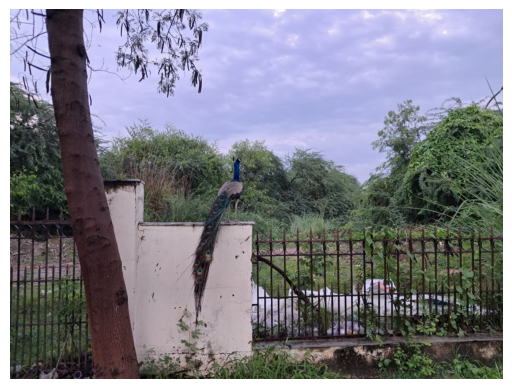

In [89]:
from PIL import Image
import io
import base64
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Paste your base64 string here
base64_image = """
/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAgICAgJCAkKCgkNDgwODRMREBARExwUFhQWFBwrGx8bGx8bKyYuJSMlLiZENS8vNUROQj5CTl9VVV93cXecnNEBCAgICAkICQoKCQ0ODA4NExEQEBETHBQWFBYUHCsbHxsbHxsrJi4lIyUuJkQ1Ly81RE5CPkJOX1VVX3dxd5yc0f/CABEIA8AFAAMBIgACEQEDEQH/xAAvAAADAQEBAQAAAAAAAAAAAAAAAQIDBAUGAQEBAQEAAAAAAAAAAAAAAAAAAQID/9oADAMBAAIQAxAAAAL1HL7ZWK3lOHu4Du4u3yD2Txrr0eWLk8ES56EUS7cSxgMp749leyrOmcyg87p4+lem8NkYgIfLHZhydC10cvSXz6508Nrjx/T8b6CBrCzonDa12uaOjPTgjDh9Py47t9StnlNdV81nQ87AkGSVRLBNIhqgAYgYiKELTkiqz0jS5zxdsJnUQGwMEAAIYkjchQgaTBMpADByptw27zcFtGpA2DHEq0IqjNbSTcopxcFS5RFEq1WasshWqgpVKoJKSJoAEAAACGgANsc+iXDq5uoji9DnNcd+dOjLUPO5PX81fFdrnSpIoTUTAuWX28foanqNHSMBOPj7Euu3J1oTTIz08+Wevo8s9JxkdGdJFrzdS+N7Hnd5NNmJMRhmTHo4Z9Vcvn+7xnprXKubkrOO7PfapodiGCAAAaAEykDEMEAAAOSKvNrqoIaYIRVqSGhUhFgADTBgDHKlSEwHUuGhF6YuNZzRSSpoVNwy3DjSsrzSSbKcMtzUtPJxoQi1BSQagmgEU0wkpJKpCGgAAQAA6qo4tFuqWqM+fswNhlmPB6GMeAqXPUFKEwUBgML9Hz+7U9iWdM5XIteP7fjx6OtKkMThXa5cOHq5iPW8T2iJ6M08/t4/QXHo51Z1S8Txu/yvcza6Mr1PL1fbLxatHVXj+ueOtoj0N8FWsc6j0DHeoVzSGkAYhggAGgBqKkSqETbVDmLmSmkDSLGIAAAYKgQyV1Nwk5GSUxIYgpyxoYkwSaATG0x1JDQACKcg2golQ03UukCaEAA0JNUIEAQAgBDQjUlS6KwCVZfN08q9QRJBml8Ja489IZE0gAoACurl69PcI03mKmh8PdgbgAwJbRwl9Z8763P0xYiubOemF1Y51vNcBy+p5PvRpx9vn6d06BxVrcc3YKuHXq5IxMuKPa4ujpo1h1RIMQjEiiQokWiWOpIoTBNxIypQqJpWIYIYIaAAYENy1dTrCKmJm5qU1TBgAAA0kUkDQgYDaYAACGDEVMAKm04ppwLRy5KlqS2hiBTSpAkE0IYJNAgNSVKVloQ9ZFjtyG+GvWZaoPD4e/gxRp5qbZJQQ6RXbw9OntapbyrmqBA3IUS4Yg5ukDzu7nxLfPEdma3LdWcBh2Hl+tz4HT0+ezt6c8q25XmdzyzOnNann+Z7fkR6fVhvoAICBoATBAAAMQUSFEi2QGimhKkIApjhLSDNUrEwGDVAwaCkiGkqaQNyFJMAYkwB2Z1dRmWiU5oEinDLJUXKVMQVUsokiyApSDJKokRpA3LAENAEsEAapaSxUyl8q1Va6ZotctKYmeP5nreTjTQsV1nRTkKJKvXm1PpM1XTNXFAJ0DBDBDAl8UaQERxmcd3d5vq02FcPTrlHBGNR25+h5tdWuXRXFntxxXo8/ZXI8eKOzg9PmPTpVqIYSNCGgaBiAAGAJNANklAqQMkVtMoVxM1IkFAIbljBDJCkgaQjQDBgxqimRTIKlRqZNaSEUXOkjSAIaAAAaBuQpIGIGJDEDEDEDEDEDQDABAVcZRrkbrXPvlZwekeWelrxdsrcUnneL9F89nRLWKBQlaJmpFWelnu9Xle10gMpJgxAwB8XZxxurojz/W82M2+s4e7j1O45+ilnqV5efr8GXocHfnXL2+Z0x1cm6HpzSXya8xtsdpFNUIKEAxMFQQWGZaRDCRoGgpJiGhAUxA6gi1IMkpiBuWUhQJqgABkAwAFbQUIGJwk1Q5CiQaEAhAAQwTGIYIABoQwQACBoAAAYAAAAIAAmtiWaUpp5/ZyL353KcmXqFcnRhgvd8163kZJSc9VUUUmETojC7zs6fpfmPd26geohggAaZhw9nlZdXVxB6WPNidvTl5Z7MvgO/XLcRSpYdARz9Kjhjp4o9bgrorj5DDLvn0TSd+XpoQqAEBoGUqaRTgihACVOWIgAE6AcJUyDRmRoiBhIykCBoGAAMGiKEDQ1FSEMC4ZalwlSpKglsENElhBaSRgmMQ0JsBVIlSEqCC0SMAAAAQAAAAAzWkQlSONDXsjz/TKmkgJh8z9P85LxUqxSipQEURZU2612W256YzUQBFxYAGOW/HD6fI9GHxbdx5XN1eZl3+t5Hr1PX5/XWkc+B6fNXADLjpvk7qnHWa8Hqz7MntjpV67FJMExUJgOQcWiQEZIMQMRQDBihuaVuAoSGkDQIhhJaIKVAAADERRIVUC2pZSTGkAIRiBiAAG5asSKSBiBiEYgblrcgAhBCGIAEAAACAAAGgADcRDAOXbDpXyNq9I87ujz69M8zqK8T1PJwzVzjQ5oaAlsNKzquvs4Pe3Jrh6rNFky2QaJlTjqRw7dQZ1OZxeX7F5acPTw16nVz70ZbBh5XbvHnTG0R6/k9dbxuHmdM9Ieb6WB3HF2UwAQUCBy0CEgAAFCohFMgpAAFIHLQACGgYxoBiQJoQykNCYABA0DEDEDBiKCSpENiGgGgAEACAGgYgoQMQMQMEAACAAAQAAAAAABsUoSHU3Djg9HGl0AQx1R83WXbjXnGhlnVNU0wBjGU/pfmfo9yWa2JMIVlSUQqhlCdGdOOLsGcvB6/hx6O+PXVNBx9D4InDpyg69uWu+sN6mooODv8s8z3/nfUzfWIvUE1SVBKpEgIAAAOpZTkWpQEuUbljEwKCSkAgGmAxU0DQAmyChJVIQMQwGwVDUEipAAEQIaEAIYgAAAAAAAaBtA0IAAABAAAAAAAAAHWcvTiqdMq8/p5+qtY0xTVY7hnrxni9eemNcILNaGNoG4odKqfueL72pTDUEykMEACbMm7iWykEnJnt1xFBQALyuzny6hqpji74OxFMRUeV6/gZadXPrHpac3TogVMljQkEAJgmMBgmIE0CAYA0wKmlc0EtAxoSpJI0AgbljQhiYNMKQrSRRIWSwARDQIBAgAAAAAAAABghgmwkoJGCAAABghhFIhjKQM8jbLfjdOjl69MOl8Wr6nJurOPu8/0B8XbzHnKYxeUHmyMGgJbRpeWlX7/ge/uW0WNIGgoAAAEwGgGAIAAAEcefVy5OOa4v0ebprVC0YBPm+pMcnJ63iR6vTjppSQCcoAgAAAABgAAAAAFJgmkUkFEhThraQMkKUiNDBphNBIwQAAhoAEwaCnINIAQAIYmAAAAMAAGIYgYgYgAAAAGIaAAM9M40E6A444dMtuNKz0rsvmWnZr5m9Y+nxdFb53FePz+74eXPU1jTTQJhLAdJ1p7vg+tqdgG4AAADTEAAAxAxAxAyQqQMObtceZHq8UL0OPrqhFjEhiB+D7uUuyCwAAQAMRQSNAAMTAAGMTYJNCBDABNACKEAAA0DAGgaQMQNAAAACAAAAAABNDAAAABiBgAAAADBDBDAGhDBMQxAAADMdc5isl2R5WMvk0fPsdHT59W6bct2+vHLrWz5OrUfm+lyHg1Fc9NCKTQhooZVehwerqbdHB36gBQACYIaAAAQ0AAkYgYgYgfPuCYAmgBDEDEDEDQA0A0FCCkgAABgmgAGIGgEADQAAgKABiIYgYgBAxMAAEUxAxAxOAGIYAwQwQwQ0BOcbEaUigkYJgNohigvNIs58Y9AjSkqKkLiXORdaYS4Z6ax1JlfOvK+TLpxs0rESrjauT0/L6l6zjs7tvOVeY0TVDCRAKgWmZXR6fmdlnT3Re4AAIpiBiAAAASoJG0liAAEwQAxME0CaAAAAAAAAAYxFITQMAEwSaAAYgBA0FAAJoAAAAAABoAABoGIAYIYAOEwAAABgAAE1MBzkaY7xGunPpWhhtTEUxAxETeeg1KHy9cy5dHP0hE4ZO+TXM6OjCt2+B9hfH04nNrp2R8wumcOaugrF1EVTzqktCbWpfRwbHFh0YtUORKmRQyVSNenlvT6RD3lJoBFAACCqgLUg0AIEAAABgJMEAMTENADEDENCGhuWMQMQCaBoGJDEABQ0ACAAAAAAAECDTABQAAAYDEQxANBQgaAAAAAAanjy71y9hzq+LNt5TlrvndmPozWyCKFozB0iHecZrPPm6cs8cuoxUKGpNdebFfWfLpo9MEvorhz1OnThdcug83pz7Yt8YuU20j0rZ4fW8uSc7ArNmGPVyK2qWkAxoQweuG9e246t5ysmqaBpggKEwkBAJKJYyWMAAATQAA0DExDBAhiBoATBDBMAAARQAAAAAmgAAABghghggAAAGCZCGCGAAAwQwQwTaBMEDBOIfB1GLkZ7RD1zOfo5ew2hZ6nU8Mjrz5ewlazSnTIq+bDKsNufjKVWYdOcVU7VLlcZF3WBtXEHoLn6BZ6quPeufdbnEW76126MeWuzy74zrxjWRuWaed6nmK2qaBgJoExFrF16nf43sbzUsqNIYxoE0AFCYieWkZO4KedlCdAICHFCdAwQwTQAAhoAAAGIGJiGCAEMpKgQyEUElBJQIaAAEwQwQ2SUgaBiYCBgCGCGgYAIAdEFkTzdeMcuXTvi8Wl5U+c2jQ3vTM0zrF9kRGueRvOeZ04RlmPk1fJlu8TSoyOiM0aTrmcy36Dm3mSdc7LieeuyeVx6PFzz0vRWFQlpNVWXQpHXyEJyitULK81bmmgQANEmDuars9PxPU1nSlpowLAAYiV5bBniyJ1hkERlq+dx3mJubAqmNueNHk43MjTVTVAAAgAAEAFAAxENoGIGJgwAAQwTAQ0IYIYAMQwRQSWokaoABpgIhgA0AAAANAxQac0bZQyV1wMTJDw36fP2rpwyzOvnN7MNK1OduMEZmJcELnhutIjr5az2y1i9Fxx6U+ez1J59ovJqrwe8Z6SJwqNemsnUms3maReRrpjZUa4FOJOvkbIJGqE1bTABGhG30Hznr6noZ566jFQ086aJjRwg598YyJvIvENMeqTPfmR0TgpOowda55uXZ821lb4quhJbaLGjQm6QwQwkpAxiKCXTlkoJbBDQJsgoEqCSkA2IaAYIQMAQMQ0AAmMlgIaQYKxA0AcfZEnmdO3Fi9mWuNjasnk3yiHphm6Xl0WY93J6O3Ed3mRlNri0jMq8axNstCuJ6TW1KpEWjA6c1y2wZ141pAtCSKmThbvprHadCYoI2KM7zZtFwRNsnaEYlKabQrAoGCZST18u1dfVw9Vz1VgVtOuJONVlBOcanMo0rBRu+cOycoq8qyjZwo6IxqrWNxooitNeRp2zi7equPbU6Xx6nYxdCDSVFFJgCOeNzLONq5N46FGVbVy0a6Z60gBJlAAxOEUELRVIgYgbkGgEAMQMQNAgADljFiaTg8i80XzwZaZTlltioN0ktdnLSdevHnWuOrxOPLsyL59ULRQI2xGqom42lFz0m+PRzxy6zrq6swk6EVUzeduFC0eGtrydE6CvG5JrNr0KMibz2onXIU3M0wagFJpjctK0z0rX0uQufQni2rp5erjinjtljpzRBGsZCrMsnA2rHWleVlLPSFOmSURVVU2SNCVUsaNJG+WtvTvw6103hvtYyhPM58erDmcrGNd+PoN+dFO4g7L5tdN0LYaAEI3LUeeUdFY0WsaqwSMQMQMQMAEAxA0FAARcRia3lzPLpMeb0868zm6ebmJ0Ur6uPWuzLTHM0rIkjSGYa0zKdFEOsDqwXUuWuBZqY6FGc271mszUxm3S8LOrGVDx1y0fNpWryavM1vms0c5jqsTsx0gyCDpeW6Z5bYzbZK2ZzWxnY3NDuLs9LOBnSFnGunLMdVZzFZmcJ07VjtgaPHVI1jcwrTAKMjoioiZ1VRXRMiQGjyk0Iuq3yS6xKj0K8/o27q8/euniAzw2xyzJqLkmLedGjgh643V9vl67nqPn16WkZVai0z5dJwJzuOx8F1vXNVdF8+tW06AKGgAAQAANAMQOWzDSyMG4ieXu4MsaOPLXr5dlYZYnRymwuvJSTj2cNXUSPXOl1rn0TCunnrHoxJe5cqNUJCi5efSXpSqSNY0jzyb3Zm5HcM6FcI+fTRVUUmUWSoQXCpoGlSopUmMGACdG3FulJOZFQrWVRrz6Y26XjpVQYxXVnrGD1qzm2hgqUNzZOO+dC2USaojLWbJuHGxnUZXUmzwZvpldaTGZz3p523TtydWbS0zyiryNHhZ0xJGnOo3N+zzOqvSiDoTzzjWeUw3xqYomK2rmZv0+frXovi126Dk6aoCgAAAAGJgAAyAeRPF1YYZSZcyx1irOXc2VVzTVZ2aBITFmGPThb1pXATpZjpjqPm6mvLtrFXzbTmc+t89u+qZlpFCbhPPoN6FUlG/PG7x0TK+njXoXOWdWa3jnbkcg0wGhBRcsGqFU0k9OVJosbmamhZpKDKla9Mg1rMNiQnTIBqzn2jQl3ITlrZo+XrjGsQNsHXROFwVlCdFzOU1jtVdXL0VvkaHBydfH1z10aZ1ntyXzvRjFGd41W+mRJ0Z50Z1OunT08XZs+bflMAXNF5htWSNGIq8YOqqz03355rrMHXS89NEUAAoACYIjlk6eXWMtePqDlwcZQs9oy68tMt+StMi5VFrCk8qNOaqN88qKcCaCa1Uod6QIi4mbyS1i9XXnmq7M+faOOl02xOXZGU1kNrSnztCtbGd3km5lcYPTO6oltSqKKhluA0EykxI1zTO7zcOLFnDqgztNWnRO2bFSguWktzQY2jPRUZSZ2aRSG2hOA0rHaKM3JeTk20x2LUWYc3Xxdp078u2KZxtLnn2c4W5jcypHM7VnKk16OTY6886FlryxptjRKcrpUUKjNL6uTVbmaTXp4brt187p06TOtWhFNAErKTWZmNNOLQvO+M54VcityLpnTKZjI3z5OzSeH0uOs+rn74yx3zNH0rLHPn20e/DpGms4HTjc1UaTGhGhly9/PV82nQcnZiEWVC1yzNs5Zsspi8aNCsZronMFtEmkaJZBtqaVDVEqmDGPTLRMacM24DauaZe2cWK6qpWtGGgpcrmiLclJ2ZMg0x2zMZ0pHnUK1FXNPK4G6SNcmaSlFaRoGuQZ8fRHZptza4NDzXXPqXc5WKGKOKBEj3wpO154RoPY5V04l53ZiGK66YdKTdZmijSBOgJovbkWnqacPd0DM7a8nWecU9GGXTXG60wispDM0J1NufXlg5NI0fp+f3VzvHrjE3UYnQwrNy4Z9uNcm2rTOsumIx6eOuuYoV6ZGxydMLn7MqFWI8LUr3hJpLnLDXeaMN8KnDo005TpRBWUaQxWx3cqpCpdAwGgdIMcerJnNaIh1ucx1bS8D9NHn7nq2YLt4FwtRm3JSDEukaSGJFjh0kq81We3PZeuW0lCUhO4Zisz68uy1ZuNaqosePXzyZZO8wc6xis61EyyEinnbXISNnlZpeIaocVFwWZ2ZXGR3GSToziDdZ6Gji4rOwrq49dOzknQymscqjIh68wtUopDpHrnqZzeUYZXGrp3ed6CZ5dPOU6gHlZZQF565Vi5J05majY5m6nd5E46UPXLWLE7OSdplRWkZxrkQVlppeFmuDRPXy7mee4c3QlanmN6Sgbl1QIedgaZ0Xnvcmb6Nzg7TpOY6lWNtnF24dA+Lu4U4wvNmjIvXDWKrJiVZVbcWHPrCkajK0xg6Jy2iqUpqZax05rj6a6b59JdLmTo4qwTTTG8ZuaDnXWW4lYhKrRTtBnOtGduiGWRUVCHiaPDWkCLvDaJppE6oq4oixxaSNRojHWY5zZW5xqGTrJK0naqhKM6zIyjbHVNlRs8xNM7zLRxr1zjoldXNnHbWZE6ZZHVOW1TnfHXbtx6Ro1ibaZBtGdycjnO6d5ldEpyGd5U7ytdcS0irzNb5dosijE1yvRgxMdOWAwJoCvX8j0DoMaTVpjcsbTIrOTXg6ORMk5yIVK7izRjkS0kkas5zaLXltmme9KIapEVZnawogW2rjOVIFvpxeZpRjmdMIKvndXGgc1bqsazq2Wg0mYN9IIrDaCXUmVVnVmtRjrpIqmEKGa1nYrkhmdRbzqMufWNWs8bOmcarbI6TG9MZI0IM2wzV5W6Z0zSOhyc1N1njvit53BUpV25xvJOVxDnowrqfN0REd3KRssh6YI7IVHJHbzW4lonXKjSNZM1cg5Cnkyqz0KyGLSLaY0pQAmUCYIRfXy7HTvnsjaY3LG0zOdJH5/pecmOVrLK3C6qdLEzJOuURTBFnSWaTRk2TNWQhVnncWuKVlk6mfTxejnXNnPQiT0JFSStGQakYu1UVGhidMmF0hZ1Fuyi0FlS63jrAptKzvAsmwWVjbg00wZrFVEOsiDSFxKilTkjr5O00yrCQw0VaXJEZ6RaopD6OfoTV8bjbn0swjfG2RsV50L1p50jS6iMdYMu12Tzd6OTPrRga5Ryw1qvRamNkCrK6lwi5pDjbAt5o7Maoy1qJpiFVxRSaoYBFwLTPVPWrn6RtMGAxMgcmnn+h5qY56RmZrfJaYrWrzZ2rOoqUi5LSFLDXHStIlxeFY2y29M9Xok1Zm8nbz9JzXcVgXUZbS0ZcRV5UpTSEJVdZQa5ItolmpFEy7MLijqWGskqRdocJI87dBaxnWusmOtKIlhOkZVrGVGxizXG2Q7msnMmpCLWAuz5+1FmmYLoF5q25zfq4OlOjPnqHvjtTnm64Wpzxs8dpM6grofM66DO82eX0OavN0ha1rWYaZZJNay1txTQ2qNMN8hKmm2O+co4DRptAwYTVCYAwAOzs4PQRtA2mDTJTSV53oeeZRrGZFZNR0gVRZWkVCSY28E1M6Cs6qQQ4TtpqLNdVUWic3RywciVloAmyY6YMYdLEt0qhVd4kj0oMY7mcPUtDC9AzWjOfURxWK3WLgl6bSYWtSaZFkxDlTWmGkiRnQyF02x0SsrsWW+a8874VNJHRPOo3hOiWxdvBqdWKiM1t0j5OoNNsdMzNPClrxM9LPm64TSHjqierDM5la3pOKWVszn1aM3bIdIRaJLlGhiGhw00m0ltXKlpNDllCZXq+L6pu0I2mDTIT5zfz1snNHokeaehNcT7LTza7WcU+jBxT3JeJd+snmL08Dlrrq3ijt40kg1J0jfN0dUTWWyp1KmfRSc9bWmGPbjGOnO5NktSKmSubZDy6MSdcumjWbiCpBMGrmBKjle7rJCFl0Z0k9YldOMEtVNyglUc6vRchwHRzWGllgRscuPVC459MGS3kRUmd6WNpk5bbJxegYxoiI0xNDG1dTPVzRW0Fa528oLzJBHn6qel1x0i1J1F5lVIKKqHUqpg6efUiamp0zcaOWoxLpWZGkAMz0qmgXdx9J6ICMTG0yefoxGtCMq2dYHQzmOkOJ9jOF9jPPrtI5K6g5eD2cl5TtpPP8v2/Bs1mUXtm06tddWsL3ox00cYroRno2cHF6Hms04JLqLDTLeIx6cqzevOtdfN0oNYrvFEiKyNo0zWLjM6ZhWaZKC0rlemJJpnFrJRqSRuqy05S3eCXtIs57aycmt3bnGlGcbRbI9JY1mQVDLTiKx36TiOrNFCq3G6SJotm5zTWo1jArZYKmRQ9lyTacZ3Y61zU3ULXEctDz6szM0keWtmG81GJe1cpSGxqhkrZQnIUpqqFQtc2ewTaAMblimoLSg6BMYgYAxAxMBAxA0wAg87ztMk1iKH2cvpG2saK2mOpYxMGoOfze7DOeWrqs9s2Lo5emHnUySnVppeUa8umdvU8qkOeoXozaIMtauK3jBaRWe+LVNuZz1z3XMuJmdM0oLA7Z0yKUyj34dy7jM3zza9OdYW76c+uRnrgheWlaZalmV4aYrm8k0fLtuvHZBmbnNrcyR08XXbhpnsCTSNefotuEjBdS1rjW6JfVkYY+pwJmdeRjO4K9LlxrVrybY9iZjkxx6MFEwJqSiSxpsVlK3DPT6OHuBpowBTUHLvWhQA0IoQUIGIGmAJgAHN0cB5kVokAGvocXoLtU0NzQAxNInPTSOTn6PNmTTm0t3fPqRfP0m8ZVCeNG989R0cuedveYzJ18Zjq9xlMU88Tq24NU68s5HvxbVq+ZSGvHuuqzqRnPodnF3SnJUbNTjvyVrrz7hWXPXbE9BOPVxLrWdQLTmsp3cc76eSt88/Sjjnp82ujXLrjmnt5iKnoMF18qLbPQ5tcelc3rUnJvy9urktRLJTUOVWt5svDbON6qafN0c8b1z6jqUvH6Xm9NlTrlEZ2jBNK5sJKBDQ5VBpLN/V8b2KbQlCYoqSqmgaY0ANAwAAAAGgYBPi9/nBiCNSz0+vHoVsYqTBpiYik2cPn+hyTPJ08noRE6kef2c/bqi0cnEb429hRll5vsePXc+nmyjn6ufU2oofN0QT1ef3rL1nLyfV8r19pz1mXyvR4e6tHnEnJWikvn05j0dcpNfM9XzrVrm5N4u7cdN84ri6uXVvp4+yJ5uvBM+zi6w5+mDk9Py+6tPK9DhXo08/sTKfQwjn7uD0MzPn6+eSejHfWvN9Hk3s3lLLg7ObbTa+e5m1Ou+nNcybCYYdPOd+WijDJRWnZy6xUXJydvF3VLc5mDm7eUaVAxMYhgmA2mX6fl91dgCFTRKclAimmMEDATAYmAAADRznFxa8xVT0RC0qz1aYoANoG0Dx2g0Gjl5byjj9His6ss2YdvF2nS+Et25ryPUfnJe7y9+WT1c+Fp18ZCdueIbzgG/V5m8d+PJa5dnBqds8bM+/g2rd8oVpy6M3h1ceHS8+gjl9HzNNcxreV5261nqazn1pwdMkbYrOq6eHRelOJMNM+oXLrz1Oqg7chrjrHZJyHWo5PS83sk4dcezTnrZHJc9K46PaRY6TrWOuHTToZXF18knUmoMNsqtu1ZFHH2cfUFSpYeXRc8cb4NKhgJggGAOpZW/NR7RLsbQLLXI1pMYAADEwABoAABMU6c55XNpI9sdI7cp0X0wLATGJj870QVpjEzx+bfPLj0J07tvI6I06eXrksqJHza429Ok3Fef2cJ3xxbmfL63EnTyxoazl1HL28nSZ7xrL5vXy+hq5aEHJ18vQUKJM01W2VzI42mS+HpwtewoyjpjVemO7SnTFno51KdefRzS5E9FusGUyt+XoHDcc2kdA8dszPXDaqKWZh1+frqx08m9W4cnP0c/QqHmnTC13vi6MOsStxHP1cZ1N527cvTyJvrkl3nLZOLs4esvbg2XN59EmXH6fmWq4qGJiEDaAaoKlnq782tmjAWdooTG5oU3kXaYAgaBkUMQLl6vNXjm80hzZp6/n+uMAABgDaBtMADz/M9fik5+nn3kXJ30eX6GHNb65y9GY+bp546xTGnB28dtT1NOKOrlq9ufqquVqC8egjrhRyel53dbUTZx659ZjXTmcuOi0WPp8Edi055K5dcY01wdaZ7xGumGtXhULhrnulReRGmdWwdKk59s9RSxMerj3XWUGOuO8BFnN0cnTWPVydNaKbjj6ZRMsJ7uH0N68/s5u0yi8jTHo55O3j7eG3s5e7hOmdYMenn6Dg7uHvOPq5Os5erk6yfL9Lz5ZAKEwTRRNCqWFTR6W3J30xCITGIG0xxQRoAAAAAgcqyfP9Hyl5ae8zzxrlb3enx9gAhgDaBiYNMYByce2Gc83Th2Qm4zMdMOm3z77vO1e/n59Y9F4aZzXH1cVvWs1WnJ0YRN3NdMy0y2z61yW2ccffw9to05OTpw6LYz3mTnNMrdOffA6bhyThvzAG1sUoStufU6Mzntvo5tpKy0JJGLU1RydGHbbmb5nH183TdStJio5+tzhapfPvQMOnm7FhPNI1x6DF1il9/n+hvfn9fH2GZlrJpjpkd/ndXFb63BrzJ355TF78jI7ODaHeOiZdfnb27efvksNNW0wmkFJDBg0L1en4/r2MTRJgABUsaGKkwAATCVQxBPJ286+RWmSCWh6200AAwBgAxiYihM8vn1jOcezi64uRpzb5aWoazONd/ma13dPHpM68xkvWows6scbX0MNLl510NOTq5eiXSUScffw9mqmUcu/N0Cx6OeTXl1NMF6XIFdbOHPu4w1neMufbIrTJm2ci108mllZ3nktcu6uap0k59c9VL59Dn159LdYQmfdx9iXXHibRO681Z1buTZhpNpSUSZdOPo615W2XYcet6GcdOK6cvo8RWHo8iaZ9fMSUSZ657HN1ZaRzdOdVfNtBzjm7sATaAAGmMBT1/I9GzqaEQAxMGmMTAAAABAwAAeO3OebkQHVy+kd4ABJTTGJjE1ABtM5uLrtnxuvCsx7cmsTpjrGstGnB2c1vJv0cldnPeMnRilTnoiDu4OuLvlsw6OXrWFKsz7vP6ilhcRth2W5xWVZ+lydunf5Hs/O6fQ8dcDXreD7Pjy479LzjPk9byUBVLSnM1tXmLMLV18e8mekamO2O1TOfUcmkbGVRa49PN1peO8Jz6Y7NYaqyNcrMdM9Kh56C6ebc5uvk7q57nWJjbFN+Xs4l7OP1/MTp5+7nJvGo598qrPfK5MtMPQXKNMTHPXO7YFAmMAKTVyQld3ndNeuAkuaBoG0waYACGCBk0AmAZaZHiEah63neyAwQwBgDABqAhtMhmms+X6Pn+qfP12c3NhrlUWAXz9HMdfP6fNp5Wudmi16rOJ+xjHn6dGkvn9b69PO6Ob3q+budubj6uXoM6VmPpeZ623Bn1c8dlVyadnndnEehx9/nx38nTxtdnB6Hjtd/NPROfM5uITopdQnMoax08+5lphYuvkpM9+boK6vM1We7y+5JrXgk6Hz9N1z9XF2pybYta056HrzUT0c1mmmOqY93FuTphrF5aYnVxdXIdvLWWr3c+mWY9M1E6ZaVHVx9Ryb49MQs2LDow1ttOmgAGJqlyLSRvjVe68dkljEDBjObpw3AGIAAAAAGTltB4+fTkdPp8nYJME0weG4AGHRFgApSBaxprPk+v4W5W/l9ccOkrLXKc47uZ4nucC5tPR8f0+Qw6+Ko+g5fO306PV+f6C+/xNxet4foHJ6PmekeX18/rnhLv6zyd+mzj5fa8scWGvL38cXz+15oY+pxVnl6XME93IcNen1R8/T1g7b7tT5ronsl5N9PSr5zoy9WPFfZ6h891r0JPH6s/Sjxt8umMVj1i6fN9BObTfE5tDO0Jsy6M2aTz2a782xh0YdJhrhpFZNlRridXNvzV1YtQVk6YkR0YaQqx2FWcG3PrndDTukxIFIKlrM6ZIBrZ6nRzdAAA0xphNjAAE0NAAMQ0MA8qd8F9PWaRAACG0DAGCGhibA25MtTH1/D9s8r1PL9OuTTOo1830fPj0/J9LzD0fK9Xyz0fI9LzMnhvZzel5up6Hd5XTXn+x5XrHl+x5PqV5fseL7J5Ps+N7Fed18vSZhBfBrlG3B6fin0vmRgfQeX6nmV6HD38J1cXZgcWKxw6px9CzDqfTb5XTesebvh1xxurTjtXbHpeUWdfo+FR1d/j9cc/pef6h572jE4enDst5o3SZEbLkAs6ZUiZVXplpGWuWhnUXSbRUaZxrlcDYFRUlxWZTzuRVFLLnSjLWGpc1aipGIHSa1NwANO/q4+umAg0xtMGmAAABNSONAJiI6QK83l6Mj1ygE0AkNzYxMYmCAZKMDZWeV7Pkeic3o+T6BjrybHT53b5528PfxS9XD7HlWdnl+n5uLC1hlXFGXZyrV09Tx+jKvS8fv05PZ8T0jj9Xx/Trn35XF5aIrDp807vI7OaTd5h6vD1c1vp8fXx12ZY2Z8HocUVT6Dzb6OyTi9Tyu7V870PO7ZOffn7MvK9PzurTl7eH1K8zr5erLh6ebdeffn7ZObpl1x+hyelp53ped2Ryxvsvmrr54hsFG2aataxi53Xk1WtRF0hGucVG2RvnvzlJwZlMJnUx0jQz2GLPbBpNVdIaAYDAYAmg6+7zfRsoBBpjaYwABiGgAEEGQpy6XlvXBtz+hVCYTSIGFDAaYNMACVojGorU830vK9SOHbn3OfYZfL6Pn138Hf5sep5vXwr6nD08SHJtz5bbc9onjSrbDaM9M9Cevj6qw9Hz+mrvnmunlVwuXr4ZOnKJl6ubbJOowVe55unLb3nNgb81xl1dHmVXR3+R0h6HjxW3oeRqbdPnaZyicmn345oq587derm7Y4ejXlTWuDsky2yWr17+T1xtt5rtvKZNXgFONS6hyRvhuY649JhSsWeuVa53nG+WmRtDgbxsmoVLTJldHJqXM1NZ0ndNNAANoAoEmFer5HrWWJoNMbTBgMTENDQC4urhj0Zz2J0mDm7/E6jvfH1FEVSBjGCGDABpipM4Xy9Ncnd5+6c/d5/pmLc10+d3edHo+V2c51cnbwHfxa8kdnF0ZRG2aklp2xrjsRrnrGPVzdenL059JzT1C8r6OVOjl1wKm5zNufr5S1IduF5WuNZjKNJSdM2rrpxTk0Wdu1z1Rx7x2VzLV5lcPRyVac230c/fJy4dfAVrltaGvPItcS2xUQ6QRUk7ZajqhM9I6Dl2z6V5bdCz6cUrLq55dMenFKz6MxTaMWVWfTh1RxdmG9ZyyWBptq4oYhjBqlCE6PS83uTpuKsGgppjABoGgGgObl9HlzFtxWdtRdvFrdmXJ6clRrnVUqAAEwYAMBgHBxel5ycu2HRJp0efvb05RjXZ53fyZmyzhfQ5N+bTfl7eeDG1ET1RWV11HntKK1z6DHs5e/Tj6uHoKqXRkI7/J9niOE7uLDWqMzDHqVTnvhWs6ZLeVQiLIe/D3nJXVzmr3jLn0LOfv5tzzMuit3PojKSejla9nH14JnVF0pYi01mTmbLab1TAoMdLlauKkWs62c3Rzbyxpz6l4aZm2W2MbY641vCQOaIV0uHVz6pGmViCiI0l0EwAdKpYA5UnNldfJuekCuRplNMGAMBDkGmZLaY561CM75YrfDROpZ3qtlCYDEwBgAAwYg5PJ9Py5I6OWTWsqOhJV08evKaxncd/Npz10uc62xkNTm1i+jl6q88cxp7fg9gu/yOzTm9jx+k6sefLN7+bMl6eecbn0OSVHdz9PIl7cbru4XEbdXmarWVZG2/nd6c2q0gL54nr41Xdr5+0bGOIG+4c9ynLW1a3ybPpTTm6+OTGN5ust51TB6ted7SmsNSYz0O6WdzMKs3bNyxa49CLO4NIpKRrmb5bYQJyXrGpyU9DLXPUzazt1ipmwTBp0mqE2SwDQqXXsJO5VJjqaGAMAE5JtMA546Fw9IcfYHL1VYmiqI0AQUAMTE0xgik8zj8r0vLkrPWCblLpKdXlpJGldEZZdEpnOytwewYm8GbqzBdIcp0Uc1dVHC+kOae0ON9VHIumDK6lL0w0i+jl6cTljqw3YNi1LSo510BhbuRWrMTSjE3LcdNGYx0uzkrok4zrZxV1yZR0TGF0VDhFiCkgtClCHYZy8ynFmekWS40EikqNM12598zWEjWs6M9I1l4+jGqeuNos3K6wxsTFTRY2nKACVIYnZ6WnL03LJzOlxZRFFCQ2mAYmubI5+b0OaRXkzfqw3tUEnP0cvUW0VTy0G5oBMAB8/Q48nl9Dnky1qtMovYyZlGmfRRymlpkstrc31ByblGJcrJQFSGjxDaiiW8TWccDtnjo6FO8ZrPE6157T0Z4A9LDCY1rCq2WNDmsDsjHWTZZ1Cuuc7dvI0jtjCrqxxasdJsHNERTSFSHSFFuRzUOp2ekctbwRGmQzTNmm2RplQtIZWbRpNSaZ9PPF5dHObS5tnXnoWdFO4Q9skusTc0gayDGDEMCWkYFbeh5npI0ixxLi9sNC3BVvENZyINcoWpwDTOspN9J6a8/wBPn3MpyyXvU6IVz0bXhNdB5usdzyo0MqOLl9HijHXHoQz25YjQ6QNCprNQ9NdLcc+il86+sOTHXaTmvtVvmr0oMtd1LPNv5NlZRNlVl0Jj0czPefmehNc2Pq8FeaezwIdHZ5R08+lqkc0E22a5+vKTlC9WdsXJ083bhEO1qzpmL0E1LLQKHmjbhmUy2puTeFUvRpx2vXJuZcfdgck0rLzcTO83AVNmVTsYUynIo3xUmsZb1WbzVw5NHnBvjpjW+dIvTO5oBzSExXNiGCiasVSkv1PK9A0RNheJHVXJ1EPn2IvhJPXXD1W6LzvQJ5OryDsWPok9HPY6oPPw9Dhl9Dfz+yqjHUcy01nPI6defA6L4rkrB4SMnSCHpV83Risb8PeilM16sRdZz2WufTFaePQiWXXbcTznTfnB3ec8jOCbG00mhGkknZrx6r6GGvFL1ct4WdTnGQx35zTXDeSUsTo53VHZhtmLPXMcdErzaXhrW05lNqSppJW6xzJU1okCukxdfEL37edUa4KbNVmypITU1RjoKM9M+lect1hemJcSyN+fopQtJcnM1rlokrPXFdcdYHtnctvLWaSaGhlKpJbCFase2OadG/J1JNPOTPt5tB0YrGusJpp52q7a8/VV+b6HPLzmkMzGcr63Rza28m+2Rl0cGmZ2Q+eqy1YpMZNd+RHTjElOKkE84Ojl20w1Si659CjPSr05pXqWKKg2Tn7OZrvpySt4aWZRvz0xFZrSSoclSwqakLkOvGZFWXSk6a8Uz38VYB3cNr3ctEk78PcSunmhxrjXRfHrHVxN2w9FTWbM9KzO6MejM5zXE05urSuDaua3TK2sjSPTLpMS6jTl0x3e/PPJHmXA8XawzNp3wWavoSOfq5Fi7ZkVBULUzW+CVIx2tVkVzSYxVmitOfYuZcoObGhJ15zmztnJJspo1lZLs85KZCdL5Ia6s+ezoqaOXuQd3LpNtcz6ZOVkQ6xhnVra6zy0mR5vKZ6sNYtROkkF4HQ8aMNaio2MihBmRpattcIy33xJa0kmodVya5r14bxWS2lcXZU50CHRBQsNtJVUQtWEtyYVbrIqjZTWY8I0qpVGXRHRGkaRmLHrztyajS8dqXn22EjoyiM870M+vlR0mqjmrRRDz0MnZVSBx5a571vjrmK6RLpLDelnZj152zUZwp25TCoBGoE1dkGmBK6rjk6M+lcJu5qKGLLaDPS7IbUohWOLlM1Es71jRd83VFY3CbZKVlyVvrzXGfZx6nqR5dW92nNlmejHma6tdHFvJpjSkmXJ0EYj1wabYUwFK3tiRaeZqoaMvMrn2zt0pQVOmhLWcmkVBoFGVTpXLpsKy8JNpy1qubRXUVWi85qHObxULXMluzJ2IF5yUqB56wOdM0qLIjp52XGmRdYwdXOaKKymTvGOXQWpjznnnpmlBUKo1rnvVwi8YsNJHGmZ/8QAAv/aAAwDAQACAAMAAAAhVmmeojAcnPRVB90rP7UOccm/kW25OoAAq8ov15R3Um7+LsYw0HnzbRNO+Gx+f3VRNTKyQDEgYBtFjD3DIYijTOEvS2iHcpMv7oEs7iE8+gBDEhA9/LTTRpBNZvghCIOAt5lxgUsRRRB1woRyjbSe+4xCMAFRFBN57OWO5z93+a2jd8aUN6SMTKFp0BEkCR6SZ0H7rf1KUbAy4CdphZRCKSom+QYYQYQECGEx3x1E+m8dlllFm2lEreiiKeO46ehMg0CeGGMcFwwME0IksMDHPMsuRbN8V9xBdbupFieac4cQ0kQ4wE+k2f0VkIwFFpdZm+6G663qmTnYiAQk+yyIhSqlNL4JOCdYDfbzLTTDScYw2pl73S6Q6MeuaKYIwZAkM2EE8aQ64h9plRRNS/ujtZUWqvIaROA08wSL11RD7zi/RGRB/vvvjzDfn7Duy5y+GOKOaffb04u3IrQjHbzjtZzH98AxxVBZHCFhSnweazy5FQMMwQcf5IC03qPvfx/iYSYAs3PPTbn5BjDNpJHVlXf8kUqQowgvj3rDPHyqOe+yMws4yHWLB4VK27+kU840ovEtNDbxpLLrfj4cnH4gGqkTLJTXx7rpFtB5PfccwoK0Qgk0xBplFBVGy+OCe624P/asT3G5qL32o480QUNaDzD1VTu0/dwekoQQzLzBxvqMsaD/AI/XeUz5mGCOcYcSJGAEQbEKXfZPivnrvD8ysqPN0ki/trogpkInhN5anof2S89ddmGEH+xV++5//wCPeMcOPkWF+9P/AP5n7H1hjfvdRBFl4MyO++8g3VXW/bg76f8A2GMyuBjgCpp77mwwfXsTNRPIqw147HH6z/8AMv2gzhCtuvcfgxCH1fc/PPP+6Ib4J777TyzNdkt/P7IrG/JZ5wAzjpDwFzDLz24yJmOwhFNON+fd9dOzgzQG8/8AfLH8McINhLv/ADihnstoMODDAADgCDvyFNAAqiDdyMIngAEMLIGJGMi9nJOp6HB54w10wxz052w7kOH0yUQ05027xS69ihjln5TXbbDGNPKiEyqU/wAcT9I03WBrzzyjjQgAAwiwTAmfe5/s/tPfP++8MOcdfcP/AHnLfzTzD6yyiWCGeOCR9x19EwkM84VHJF/6AdiGlFzwxigAQkIkY1pTHth3HP8A726/9zzy383y+44+NHrivigjDDCilgjihCxcfdby0Ty0MkZCCil9TbJsnMTQvD1gjDCPDEOZ40/2916xywz/APucdt/MOtCBTDDDRzywzDAqpL9XlN1/Xc0181VAxDUKvRoqX5DyHthVG/YRpKjjyABD3neNtsvMNsfcvONe8e7iCTzDAB2kAAAQ4KJJLLLB9uLBeutPl1LLD+yXjX9ZOWnvRFnlVO54dC5owCkUkXHFfOMvPfNNLKKIygBBTzyByAxzhb745IL6ZLp4zqYAX3Gc1WNWWiL1Ek0lHLniN8txQStRv6DbbBEt0ckc9XOO+uY458uoqBA4YJIY545ra0k0HESAzn9/qCYpCI77MZzbbaoKqCY+ZQbZ2BCCz3ukegHErAChKD/eV+lWobobzw6LL6W32GWlEkUUPX2k/OPOOd3P64xLYU+L+g9EddKpRo3SHjoerDMUyBPodN8TZpwRjrwk3C3813z6ra/WoKIYr57Z5XHk1jxCi4cYwiVIPn2bl9VYzbL0lUj7AW/jzwj3yx/M6wzthyrYo7DjjASghQBnR38kIAVjBsslk/1U+NFwwwD465/usnEF9WOq/KvFVWEXz3fKclYtbTfZJjhN8Cg/BZhgb5q0KmkpPU0ch1yIEskFPd+TLCh/oZKhfv8AnLfLRx9vCMBKskJ/1/LaR7MvI+CAAg8IsAE5e208+pqmsWDMgJZhaGynTLd4CQHZmiaWegHGEN/L752nZhxd4QQokg3Tm0cxNx4jJ+kpmU4mBAklYBSa62wEU/YFQqowkGhlZ5wmCRbD9drNBnIse2fPW8n39LNY8sAA8IEXhUa1/SLDv2WF3iIXqcmddliDgFXDfyQk4vxtpPIPLaLwcABi68OlPnBvnQuQzj5NgIDzFxjhNDJzcQQtnfstMG+MuyON22g6rGgIliqwg+jPMLYAICKwPg8+s+izPLHFFNkolP7vK6NRyBN1x5NdycV697/6kcZXDhNJqyD5PhbSrwUWo4aC1FIu/lNnNTcYoSPhxGxtlp98ZwUju5GRtLFVgbQsRg8cFxVRBOl9/wAzRXYEVYduADPaYYSQmIMrOAPkCKpVvj3eQwy4xYaNrzrVhqWCg4HkI9tBBw642PJGNu0+aPmHNgojtTXYW2p3W2tP6lqo7/YdU6Pwij16mQcfs42xxxe00VVFC6Y1bdoZVLrt9TkyAiByy4+ozyLiPBPABniIOt+5c26YcvnUQlxDOQTtc/JNFyjwDzEOUZnyX/5i8XRfKEVfeKvRanGpjdChuzb+QRAO7zfR/DEBulgf0pTwMK78HgEBCs3KK8TgkPUw3wlosCN+3Miusur54+XWaGTTAMtLzqbPeRP4T+anrT22vYQfS2ayPTCKfYz6RZXdt66HtZ9EuT+7H0xacx+dbn5yJTeY1RYL41ZQPWdcXIqAw0IcsmzyWyps186QmaxoaS7LAOPFRjxPjfAoE7k2027jXJgnQ+bRJxxXpYth1Nptk0vj09SWfURYev2PFgrJmp87cX8hZ+kIY9uuAB1e59aVSPFwbyUF2SNeUBFLpGfc61JKD6MPGJaEJBlrh7xzEb8YSVJebovctKTfXO72IyH5WWBIW4QDOz5arME30yDb73pbXnmtScPl9s6sZfupMvL5ooTAoHrLgkLnbMy0GcUXaLV/WVeabwwnxXj1LZx77dyC1Mj5m98HIUyjdsBstaJDjJBCPQmNxm5PSWN3vNzQTdAGumnOQs/1GdcWTdRWLBTSRXaTUjkuTbeeZ8VCz2QsFbyhGvemzIDJBqhnR93kSaYvgBHhypURQHMNg+facILxs8gaXJaKVYWUGnTRcSeaWoOAQfQQ/wDlmmbfZ7LnMJ+v1HjtZqYTCTkxqUcU6CbJCGmY8ClOyWuVvs6xadeNoKqdi0knmE00FX20EkklTEklVHXtDDnVD94F3/bqEDAGtLUDeSJ1vJ4M+RC6gcL2I3khBHnNSb+CPa/sOtNsHmkXVUVHFmFEFV6xFWWm1VHcq+EyS43kkxfvOP8AOlHygMu5cjtcBCBvEdBu99k+2sgfBZ6fq+Vqi7XfLXt11pR9Jdl9tBg3oFddhpJ7EIYnB8D+TbwPigVrbCbyii9GdRUgRCe3UJvJR735ZBbn0R4VdQaoTvr3fbR1dJJ1BltFZwVQxRVVFBR8HoF/feiwRQSbHLdv+sLFTkQ7Q9VRFLfNArA7JKfUPn1zQP3bSpBaGLzLrb8VtNRNRhRVZoiotFVFJ9Fj3j6a2tn0jbnB5gU/1w81l+Bvg5bPIMBqyJMj+MBvIMuy0BvnnxNkqrTnDugJRxk5pBJtVE0B95VVx1NzeDEnLp6FY85EOIwyrB7K1+0/+Ny4j7+Gd5k7sY1CFeDmSbQFJykltvjLP8pl9ZsJB1FxFllVpF5Zc4UyGg/xxc3ETjNOVBTepzugcWdwOfSH3qWXmi1EHPEeagmjkzUOAyala773iXsddpEAF5JhtJ8xtFVRYE8dE6Sggze9nyAOC+KYFbvzHAOAo5uoM7pEoHQNvnHiL3X2PY9nvIvzeHP7q2kR55gt5pNBR5dJRtBVtAkFmW0mGfbbsrr3+ol7x1cv9JG6gtDEaWHZce/PNtzXvxXbj1X9uquOhYnzk6xF9lFhBVdxxtkBdFlNNZt9ikWSrBa32jPhmpwRchOocUuJ23YoCPT5gM8/x+/xSLxtj7tpIPi3WJX/AAkAxKTRbfaSee1ZYQQUWSVbc/8A8dM5O60ygYGcEdIi/wDgWqqkn85+tpzqUk9JACuL7a4NH0+ECmz+wgsgAFkEpt1F5199WXZ5x9xppFBt15z53Q18J84oIZFGJGdJSkeSGPihu9SOubxeuW2CKuOOZubjQl/p+wEclxcU1p51J1dK/vsuNFxRBpJ2LrFj1lcuZIVBkxk+qnEb0G7SHnSAJ1sxGgr88gGihd4oZy3VKNjlHX1sxrZXlN1VpdVLO3O2UBBVVhVAomRTeUMWoS64n7fthK0fjiJX6Sqn0s2OecpHclNUcBKOyyIO9ynXbvTZN61odxBxhllfNCTUp15JFxNDf3tcTGk8u1N79B7kTWrpfwPdZzTO5irAQWg3erTJfkQJVgkSnBzO42LB9y78pBhVRlZP0MA5hVhF9VRlXKwAyisQF1M8YMkM8BgT5E7CaIPUeNF9ZiNltxitaWqabGSaBSOFaQSlqCSNV9ZRBRlzbTDP7hhJ59rTo4YenmPnAwAsoA48qSTDqr5Ihm6LuypJlL8SMHz/AMkpECpAogFFMOBDmkstwdgai3cUwoGsM3v15dqzwkJ7CS0gqGJecvVrz4gNfaAuKOJ0lbepvv8A8HcwRpiwZhqys9W8OREpTo6JsSEax4ug6EmU3eN5TJBygVfDE1zFI/qoxV1rZe+P17Rwd/Irt9obGS0607nAlUDSr3LnlL0bCGDTqpZr+oSuLfObU717W9Th4PjuJ5C6Ct72rLM65tLDI5b7qAzEMNkcDFXBmO4jqBj48+oKte+cBcYSAqfveKC6DaWnV8d81n97PABGK3wrMslNOk1V37q+ENnf19tqvMK/H2N1vYNW0T3C6zJAJHpzeOatRqFzjU+u2CUZAYkHNgI1KkQd2uUXWyW1U/5ovqIIraOaSitFGT+tKz0cKA1+Qi3YTajpJojowFP/xAAC/9oADAMBAAIAAwAAABAkBegCet3IsnXt8SUy9pIx7+3gBOOXpKPc7hXnU3tK3gARSA66O8tsn1Qc5h/HdfuVFYbQxcDYcuPEGWjAHq+NKfFynrGj8T2gJE4cRlLVPo2kAJUnPfHlnH2WvyB10FKkSm3r46rflVJWkah2ODpRaicwAk/LO+MHVxqVMEsyBIN1wPbOxXwcSUHGn6azIoJjT10F2cyD3bYhp3VHV1a0UUQz2lKqryN0dOD37AM7rAkt9J51YmRNqaGN985vGr+9nEXhwQm4Ti6S80CAKU31Lr3iZixmF2UUdjJnGTTZYJKa4rSBCtb8V5Ddtw03+I5joYa4biPvKoaehzks18u60eIqS8IIaSD21PvOM88Jbnp7zDOOhj9NbjDjhYiXAQY48p7DV8qQ1mGGlsJi9I+U1049YUZK/BzDoPIL6S4Kpe6zm5vHX8I5MfdfuPzTBNq6qp5JtcEL2Hc7lQXFUGXNYiT4PtY5pDB3KmMQ01UXir42AJ7RsFDK8KAa2gBRlJvCAbDCEGufu/lE+u3WXfF2dE5JGPqZbbm+uFDyCFWhARXMt+/ylh3lJ85VCs8LiJargkLLx6AxDN75BuY0GILfOJuMmtldH9ASDU0eV5JrFPJLYLKu9suf/I2RjClkUmMEWldPsRwhC5jnGyi7+ZUdDSJSpM1mZ/8AtGcSZPLh934m10J/z0U1PVE6ae/DT3qWWyh1cctWinBgogs6/XU1dIR2JBzYYTLfdNdZyVpfOwkeNW2xsiWljhX/AF3zSXZ20ZV9YLAs7wwR6VVQ0/WIDosthp66bcAAnihR9g2T8xIKlmBMzb5zErjBH/m1rCcNmicuDw09UNN/94XVYxvshtdel4asDk5zbMKDDABQVYYXfKAhksyDj/8AX3zWcHQMsGh2n/ghbjxXWBfYHuproevMdmFH8PPpAbYP0k22nmZ7aTsNkSLPfu002fOe8/PdPKqi/Zk94MHcozomMNkHH2WFRiTkg8bbpyUIHP8A/wC44x/wbUVWGgmQb0+bVSKNbyAB+wx8QFuvPHy4wwZ4SDcpYwIgZFu2uL+MNCLPDDGABBh0d1acmw6x7yln36bXX82thjgtYeSXKohy0z1524TcZhomth+579eUly4UCecp3U00CEG3MFVNkltx4cc7yd8x31p5yWQ0xzxc5jspWY3776wiBTSwzxbQU4EGojBqZmIge/Z9yjRMUXVQ408tdA8cwcZZAKi7WUffXX1qhvtpefYQd3iplTEOMBGHNLLMNAw5XAprp2RwLDIi22pBjooJ7qCzqGODCr7yFtKdzAHNAMkxycYZnZ2qrgu0cdwpg9bfMPLOHaQPPIEz/wAEFGF8CA683yIhwbfq72G2JEgjwrAsUaqouCO0qeechh/s5Zc/2wwTg46Zvf8AbBU4gww8UgQIk4aG+Pj9FlZZ/K8y8TDrhFIBbBHtyqqez7k1AxE8ARKIJoAO0agZlvMOIKmgQA0zX/KmHP4UGHPvXzPzp1OqemqHDvsWtO/JME8oIhUay2mPdX55T6/QkkREMxvZQvuNd2GY04bR5TbC+VHnnhBXz1J6Q5o2e2CDBHUsof3td/rrZc8IooJh/FuAGyk3f6AR3ojR0VfsBEaxvS8SBl1BDDLkpD8rvgwRhR3EJyUttZ0IQJmcOmrPvCIlozWZo6q/IbjYaUkzA9ZKwAhnXr/vqPf0D3AyRsWplBwEZPxqOsK0ba54LTfqTlsW6lrEM7zkPjzb8ccBzLRH/Jzl4TjPt37JhsbLG9xk9y/Vr8jTvWF+dpIHTfcgQvMSUfRrpK1afxHXGUYwVbdupkkqUp/DfzTGYMqafRvMsrQMHT78n96HAhCKHjXtAoe1Pj8y4+VY21tWQhECZrZbLGPmuh3wnlepuOgmw4mg6iz6ksoYHfPRP7ANy5QmsBa1J+eX6ofwyRlFY5yimnIgafgLhNoYcKx8yeRKm+XYq2E+WaajEGtGtlSyFpqpZT7zTLN2Y1vRPyphuq25lOmx/HuvKgVrG5yPSHlv+9YXMXaWapLjiytAW1CfoAaiAQJow17991tNBY3ZSsh9CICxYyJd72PZ4YEzMW0Eb5fviZgIrWRyXKAkWEQE8Bd8j8ETZsopmtBAzVZfKPiuXjfTf0fjsAZA7w1CZC4iMyem4TSzPp3bi891iNh8oySekPgpKKNFpgrVjBSGJSsnMHrP6B+/PZtLs9DyvTmiBEK7HEblx0U/Rs+GUZNIXXR1FIcu7d5y+AbvOw/bueWiyTKIw/wIV5WbjzwX6IRJAlnnGVhSVJGo/vZ21HIY8MO9IY+WRYKTvoxGIif1pkgURbPneQO1+EDgESASK1iUkpeRfJNxiKWfbkcd8lg+VjAMw5KtCUoyHXtbv5TnRks6mrdGTvsh6CSEZczk8TXEzgdliwfHo9HK2MygNsj2imODu23YK1m++RoI6TSSl60vzZdWrTmGj/GAHQdXbdEycEBD622G0w7XEPZ4XTXRd20eX962sM/3RdW766/z+LUHlbC3WgG7VXr2SycZRxOtDTflYmdnnjHdrQXZQK3pasVpJvXC2RsR0YWNNYzT6L3uVCrLNRPbCa+DOD1uEjJgxH1rtkY+NwvnYkZ9DMnGc1n8twqRjkt0xg9RbWnp8jNG50FL5NegiWLT0SSReZTPJJiSj6etD6XmiR6yAHP/AIWvWpY1LAUp0T+7dcsCdYB87NtyH9ObWoRcQELgLGFqSJTrwW/sr6PqHbTSGQkOD8ipuSCgrEBjVEz1OLRawrlNZmpZhEFwuoLK2O3khNzhqilmP13bubuKZu8hJ/Rp5+/SGuYElmDNSClkKVo2k+C9ZDCRV37O/wDV2VHtctZ0+pHr6ALmQRdk+CYWTSZpnrW35bOmHdRzSywJSyD8/feAr0YmYA6IJWnNvsrwHd/64I6zSD96ERwV224fyVr3YftiGv1RPCLCbpmEha5DZKpD6f1wu4CqptR9ox0e3JvtTrgdX0FTY47y083aJ5p7a93ajoKoDOEK4ajfJ7xpS1REz3Spqko8d0lsRmZT2WxGv2H9tdmLUwtksPoyWfRZddKKtZbYap4bKIu6Jjj68KbQRo2YP1M06bSUgEgPtOCGck5EnXjU/wBllBr22HZShOO5dA48jEW3exaYim6ml0H6u6m2OmubnuIG16GGWcVoe0Tl5cbsvhTKaOmadNmvnm3vo+q3tishZlKRA8YNYa1v+wsKT6CyjGeCp3Pau6GCCjDzbvr/ACQXWnBDdsDhlbsT9UHyUyvBZ+I8wmqELFrBCTO8INnUzMwZ04WPXPNSW56djckIspL09mvihsx3x76KAxP/AN8VnxOs8GRe0jK4bxXQNLvDjEggLsenyVycXV37plBHrT6zEBUtInHdhzzvZ6ry2A7p6ZJd/PtuR9wEec23lXw5yxQZOUA6BDNau/QEo6oZB8lWjE8/tRNKAhMbxo1k7OtqPgFrk4i9iDzHw1KZ6t6IMtM/xcjGVe3k336TSm9Q+PQkGga+frcFXpfY9I2e8mt5/Vv7+b6S/Tdesq6qAH5ZNDcYHkUUZgrI5MLJOu/fmkBXGl2iQC1lozsqmmVYMGLxUcoKCcbTCGd+N94pTT0CpieKbhjA5iGTu0MAtq9PDRHT3SKLa+trboLJ6k4lm1WARRjZKor5Av8APU5Rn8TpJWc/gczzneRqcohGAxo1osPSMp2lRpu6ARGC4ZR1cTo2ySDW6eC/p1x7RZBl5goyh38uR99OLcQsHZcw6oJ7kQpLcgd39k5iDZ6ihzgAQwW7/WZI9XZ79G9FmhhO6CeaufLBFtgTLXJ9Z5RoS4pni0PMpWgG1AtcKQtxHKilAuo6Ko8dV20ZfHf4J7sFMs92WvjwNHZNAK503z76SLhNOJfTbHZNBZZNpa55ihZ/poYeCGahOprilzzqfgnsB4YmPysX3pUkbWstEn/CotlZmIeyhwLN2TLaahBFrIgMYs2htIWNzPHuoilxNlFFj60kJ8XdZJacOqsjO6h88rnaC9Od9IIHsr4or0lj4NtFYgFhOXHmOmMNEanf0+slFA+0lTuPErHDGHUi/wBxtqu0VQ1Dwh85yC6KKa2h2j88qpFrFhaLdoYQnVAnNREzCqhyw82SWge0e57jOCZDLrUsEwp5dFfb9YJR7yOny75JNdFFXvWEUgEhxQ3Xf8rU5kB++d8lPeTIhaelKrvt58eWd7n70eujuNZfKRsuDB8UxbSLZjvfWeZpARF4Weil7Im5IA8X7TUU1D8p6bZG7Er5LXA/8cRtu14s9zSZZj+ZDEBLBOJZa7MhacKTKztvfYW8SOBFKEJRhBIlmAiCPaNwQX9SufO62y6UIEOFyNwuFcsRhGQAPZbVc8NbKkwDADOfFwSRC1YsBZs00w05xvd+z3D/AMXMUe2NHGQonLK6/MrAA6MHEfb9yWXDbk5K39B6CtbnU876sFmgfqC1JKruabAfbzSLVn7/AAbR9VWX4Bl/yD2rCXrWLASBG1Q6DiEBdHfL4SPUVHtKCwVLHJW+QNKGt57JOOchosWV4R9ZUfQGVC2f/WXPv3XNBTEI4E++ET+S87sDRg1YRZKeF3uMgIFWW9I2CwsRw4rCuqMF452OQ/Mn7uske4qb44I90By+TsssQUDvhJQTQOTt3r15OO9vabqCgdpUUSZUjKwT50yX82awL6CcRmjShkig7uS0NTvz9EapdqfrupWtbJd3q3/pmrJ23BDZwJ+lGw2SXnWRXN/ygyAGC0PErQuGsSycX/1DTwWnj59Qbp/zXZ4UUa7olh9m/RXoDUT48ZLh9V6yG6RLrhugH1mpCGXV/8QAMBEAAgIBAwMDAwQCAgMBAAAAAAECESEDEjEQIEETIlEwMmEEQHGBQlIjUAUUM0P/2gAIAQIBAT8AFl3/AEhL3IikvJtfwOsN4H26f3rrdNdZSa4NzYn0ZF3dm83WNok8E+ERVRRZuKbNptNouykOI4k40hR35RpaO13fS+lFFFFLq2hzRLUaZHUTXI5DbvAnIlNoWrY1GRJJIaTrB7Im6NimhTXwJ9L78PN4E8KuBPKPPRt08+B9ul96L6M46SdUilFFosqyMascR34H6gsmxWujYo2kItda631olG0LSin0oUaYl2tiZZJNiiT07YtFCgUUiUEShnBCCpDgNIemjYLTnihJ1kX0kf0eV05Hz26P3rq/HVpXZLMWaXBQqtlj4NK2n/JWBQMIi1JG3KGxtoViZfSx9LQmWOQlYtNIrvkxJMUerXaxpPq4ocTYXRubF0v6HHTz0zyaiqcl+e3SxJCZXS30sb5RFOKpCsabk80KkORpVtGNlISSJKsoc2qsSclYkV1rpQ0NMuSN1sS72TbSE5Mg31z30UN0Jp9GOz1KkkJlsp/Qz2NJn6j/AOn9Lt0vuQhFFFG0oZudossuy6Ynk5MFnKNSPtdkMRX0aNqNqQhjlnkjKW6vHa1YoldzaRLUS4FNsXWuzabEJL6Oe79Qvev47YOmui630bRuJP8ABDKNjHGulUhcEmReByoqxcfRvo8lIZLHgisJ/T3Ichxvk9IURfsrrorTtGJcYZks/UW9r7oO4rtb6NFWRdMUrHlG3KJJURbqi0htWhvIhX1ZZuRaLXfSZX02kUl+4vopYppNFRfEq/DP1MWoq157cGhK1Xx2y5oW43G6hyEyyx5M2sGCTW5UKGLI9mCrHE2iXbaQ5qhSv6jVm36F/sPgvPXW/wDmx9iRpLC7ZYFK27GkzUdYNO6yJNj5HSQkyNDaojBXaE3dNiRfVoXSu7aiv+mfAri3+T2vjBtlya8ltS89qZpfb1vo8s2oaHp7tRfCJVdEaSMElbOU+bsg6VFER3d2J9F3WX/1N90/c5yfajRft/sTffRP7kLo7TJJ8CSQnZRPCIS5E7QvoIX077L/AHClfkUy7fV0lZ/+Un+exCNFYf0UrdvrJpzSG0JuUqojGums2kyCqJDhf9j6ig1kjJS4ZFVtE0Ilwx//AB7Ymjw+lfSl8+RSsgpc9ZR3Jk1tgRXtX1aK+lX7Z9Jy2qxQi/AmoPkhqSFNMT6akNul2o0Hyvp0OB6dUaaatdKKJw3V9Ky/+lc0hXJ2zPkpEZYRF4FqSI6qdWSqUJdqNHl/Vor9zX0bLLLJasI8sjNSVrgvsbo3PwiWo4rgTTSaLLQ5ocnQlLcpNl9H+BX0umb34Iakku1Glz/X/ZSunQ9Vp00SSw6tI09SFUiM1LjqxFkqYrSNT9TpQw9RWaf6yMp0ngjKDVp2JqTvwid1gUXh2JlDiuuBS8d2m6ku6iv2Ffutb9RDSaTy2aetHUTNSbi6WWOcs22aSlVOOHwzSgoJ5Gz+xqLRtpe01f1DjKovKeSevquV3RKWrL/Nj07FpK7WGQ/UOMHFumL9VqxVKjS/VyldxyLWyK76JiTb4skjCKfdEQm+lvttCd/vbL632zbStGrGOs4yvPkSttJ0LSqKk8s04+53lGEqqh6zjghqqbzyYHdGp+p9NWyTlKTl8sU35E7XIvc8M9K/GT081IehG09zTK1IO3K7FrNumZRuYoo4XBdjf4LH2o03aKPPapJ2UvHkTfFV13Cd/SsvrZZZfWyyy/o2bjXU5abUeSGi2vhkoKKbrJmVRsjFKKH81kenHkW2N0lY5u8UfqP1EoLFZHKcncmRtvLPTisJEfhmVmKRLWmoqo2Q1HLlUODcrFFNUx6VMvHRFj6UU+1GlL2i6tjyhv8ANMi+HdjlOLkkLXnFrfEjrRaTRvjRKSv8ClK1g9TKTE7V/s7LL+lJqKtktRailGEjhVeSUsfk1N8c1k0dZyWUams1ihKc1bdC0zW1o5jC78sl822RTeLIRaWejUX4Nlzb20j0V8s9NRZjwO1lIuXI3+O1iG77UaUsMUi5DdG9Pyb0aj5lF5XI9rhnH4IaicUnmsUThGhakYQa5aF+oeckNZtpVkWpOUmpTpI09SF8VQtZQlW5baFO3F3hnrxbaXjkjK+lljZZuLL6WWWWX231svt1tP1IONi0vSryyTSrcmJxcnuwam2TWVRqKK+14ITjvinEhFq0fqn6UG4vLwblm8srBCKWfJupG61gbHIUnXBhopRsSbf+QlKs/QvuTa4IN/62J6hJy8smpNN0lXDHNxipLMievKS5psWpNNOxTWX5YtedJLhEm3dmE7sU52PmyLlTryZFqTpLczT1nskpPJD9TLdzQtRUb23ybmWT1IxonrNcENXdJS+SWptQtXBFvll9M9LL6130Skoq2eq3wxYRPfJW2SlLg5Ssfx8kdmm1KQ/1qtKEbNaUtV3JkVtG3WBOQpSfBJz8IU58SQ1+RNprddDkqpNituyyk0Iro21wXaKlfIh9yIe1cnqM1p1FVKmJ3Btu6FqOP2xJVbx0jBMpJlIaIuyhfdVj9uEzdH5FUhRSp4dENZ4TXPFEZJ5QmSkjVhNz3bqHurnLRp6ji6bpEpudZE5xv3eDT1MxUpLK60UNpPImmJ9KKK7p8OlkWn/kyFS/gnpQaJ4Ys+De4o1tWOpGK8pkMFq7HnKKi/5IxlaHOUZNNJozLxQoJMr4Q8sUE3dktO1iVCht82Qlimu2zPSy0+O1E50sIlO0lwbnd2PUXCsSk3dm1sS8Ci0OTQnFlReBYfPT1F/qVaFBm2KFq1ihNeFwR18ZRHWb5was0x1X3jtIyO08Ccq5FNrFGjrSTW5uiLUlaZdHKJucq8HubP8A2KpURnJ8ZIyT+RfQatChGPCHKpUauy1uFOk4rgSSt14LtsbSeWS1MrDFkSaeBt3kpCeMscTY8+4VjTI5Gbs/n6FFJdtkuUNMZQkJscW2NWiMW8uI6Lizbk2tCrNojS4Em/I4EoP4G5cJEZSjy2epLLrL8nqTnamrfg0tB6itRxFZNXb/AA/wKTI3KWR6by0NU0RSccOzTk4PApYXySm02qJa02qsepN0jfL5N81hOiGs4vJHXi0Q1YyvusslNRWWa2YvbhfJNynWeCCaZOb2tfgcoxfJj+x15KSFlYM4wN0VJ5FJIatYE9ryJqXDQnTwj3dkZN3gZCTleKMjbQnffJWU15Kfz0RmyxRYm0NMcSKMEqwqFFXhdGPK5HlihYoKLzke2drh0f8AjJVGUPyfqoxerqLb5JQxgjGSZRJRZDTaeHgSNF+ymzVftvq0zIniqKcVgjPblcs9XVTqkKbNxb66mtGDSfLJ75uDqo3bJw35lwh+m8KOfkljg1ZNqibhGNijjc1z4FCUndDiK19pTp8lfgtoxX5FJ+EOO7LsjFWVWS0q+GNVIlNJkrjT3EYrc5Zscq5aRCMVdeRySLT4Y7RFtrPe0Oh4QmutifRsQ+UYfWkSibc2K02WzTkos/8AHUozb8yP1dvX1UniyOnjkaSGmOKZ7ax03USnu5Ys9M9VOuRyt2R16eVZD9RpPl0Jrw+stRRkosfpN7sMhqxk2kjVmowbHub56ailJraQ0PkaUVxZEm1dLkxTFqNuqFHySiRsTaLk3wNfBCfhlRv8DRvm2r2tfJJN1chWuJWem5/cjThsjVjVm13f0c+TaODFpnp35R6T8SHFx5LLL6JZ646MZWUNuxQcqP096cFF8mu36s2W2eOSMn2MUbHS460h9K6f0QnJVRpz3Is/Ur1cXhGzbTcx/qZxj7YpD1dSf3UO/AlKjh8ZIKlfSbo3HI4/gjOiWpazwOklJcMSu6FZJDtVaIyTweaTItW/CJpNYZG0z1W06iacr5eRNm75RabFadd9m4cjcbn8Ctkm1Fl9bF0XSQqLQ38EIJu2i6NzNSLkrvKFFRXJL+2LurpXSiihrom0aWrTyauprznUY1H5JtvCYosa5I5SYsjwXnkjwM5QkiqG21TeCVoSHCLiqbv4I2uUJ/guzHDHSZaaHqWOaRDPgST8UOKWUR3E43Ql0yLtlZToS+TaukTU+19XfSKMfIujimzao21ye6xRuVWyMG0PpLEWSzhkccMWpK6oW5vkXWy+iRXRro+t/glrasVXCZHHJa6UcFWSjVOyDbjlU+qFkcRxtPA1k5p5FKuRUySXjpJWLAtFUenE214I8DRlF2NMtCd99diNR+19KGqRa+Dd+ekXgwSdtUxqvNiz4NJK7YnjA43crLSNVylIcd+GyOjszlslB0JzRGVrsaEW+llmejGe75JJ/BCEazyKFFDx5LbETWL+CLtJlv4N1Fp8CYmYJKsojjjnyhSixx25jL+iM1Ilh2U5IaojqRk2kWutmShrFCSRj6aNT7WIvpgaXRMtleWJJeRZIJCTbSNWoukyhRirHUfBuLNyTN0S/hilIt/no10ZYjJkwSWBDVvIurp89KJJtNEbpWujSZs+BWsMUk+GIZNr+xS+UrN6MS/k4xJG6uGNoSV2YEJWUV0odpcWJp/TRqfb0XV9G6EimUyERQtLKJNR4djk3zRvQnkbG0xWxpJZE4sSpdFfS+rWeivo6SHqquHYtX4RvIjUi2KQkuldG0nVmfgv8M5HHJtd4sz8kppYvJhmRNryOUqPU8SicrDHGyhQSF1ZY2xR+mjU+0sruTL6RRVInLx0S8tj6UJ5GKujSLYpMbNyNxdsswNtcIb+UNK20si0234RsrkikslmGJrwZEn19ON356Wi0WSm1yi/lWOOSO3zglBNYHFx56Wv5FUm0o0V30UvqyW9ci0vyj0vyj0nfKPTfyj0n8o9P8oek/8AZC0vmSPT/KFBLyhSSi9sf5Y22bE/JsXybY/J6cf9j04f7EoJLDGjKLbIuS8icejY30sUjcJK2xNE5qORaz/1N/4G2zI6EikWLHJvT4NxZeWYZm/wSk1whylISLd0NM3NfyZazyZQ4pZTLfgUh7XlFjaa/PRPFMYpUOvqPsz3pFvOSsX2V0kMccDdVZdMVNdWxW3VDlFOryJOyNJ5JZk6Hv8ABLT1JO7YoNVhsTd8EpJJWQ1ISuo1RVu7H8JkNWV1NDafDyRcrak7ESdYEN+CMI3abi/wT1npz22mhaibVpjTMMqKKTJ1uUWS8Kyhqq6baENNdKkhdGLKM/tsIsb7ptbssqLfI1aolGo/wNl+20JtilzZvi5OhXvVcVyR0Y7tzdsapjuNtKyD9ty6T1Nry8GpN0mmR1JvJOTlBX8kd22Tg+B6jcKyiFVWbNyToUW9W1PHwTzL4ocpboNcPDNSWo5yUWjSeo5q5XknCTm2maUZKVvJ+oi5TZperBrlok6k80R1Wmk42n5Jaii3kWvbjUHzk1ZI1J0kmRtryxo2SrgbkzKLbMm43DnTocmW1Rufc33V9KsXffTsnFuZt91jf5Q/GRQavI4rZnBtiv8ANCjHaxacU+VRFKsDXncKMW7uxqNv3FKUWrNjfEmT0otpts1NPTaSlZHT0mva3RKEYxIjjprmyEIXhEtOLqyEEjZC7Eo8UPTgm245EovhDUFlkdssIcIqVtENjeCbgs7URmpNKkTlCL90UQnFukkiST1PBOkuEyOo08xSJOsinktifRPpWRxjutGEOWMKy7XFHjpZf7G/oylT5J2ngt3wO9qpFTKk4ZWR6LeWacWk0zWclNRRo38jjbIRSZOCljyOGpCacXh+CTaHIkrirVkfYtqVI1J+xVnJpNSTQ2rNL721K1RKctzIttKSE5bhZpvkm6eSD92ETVvgg8kuSLt4GiNXwfq1LdGXg/TwnuUvBKt5qW0qZFTs1b24IObaVDp8FdLG+inteBv8ZGSl8sTtY719ZuhuDrY775QUmVZtKK6UP8I2bstUxRrgqT8ii0NT3fg2PmyUZPyLSV3Y0n5NkfLJpNGlbnNcYJaObcsmmqxEikruQqo9hjwWnzYmvFjlFXlm/S3JW7JOF5sjqwaaSotOxyVXROcVJpoetBUtprzSmblUW43g3r/UnKlHAtR/AqENl2h7iKd5EsvoyUU8NDuMYqMe9fWatEYtPvblZZLf/iyU5qKvk9ST8ik9ryPUd4NPUlbuuDfNmnqOU0qJJpvKRvScVlk27dq0W5J0mv5JvC+RJqiTSRvleIl+zKKaTY7+SL91Dx88mnqbsDYuRyVuPkjO5LNZJci01aZKOXYopPlmpNqbISZNZZGKbNTRUp22kONJDTQ3hHJdDZb+BGGUWV0uvBltDVP9mnKqf0ZS2skxTSHtnFMcVHkTWydGDSat/wADnWGack5fklNJ5iXHcTdM3NkknXPBVeWYqNicd/3/ANG5KNkZ3dsnNKPizSnJzJPJFf8AJEum2RmtywNvexcofkU1aSJN7mmnXSaV2yMVSZqrOCKmmiaudj4Rj8kmqQmulWOkJoiONeelrpT6W7/ZYHqQg8ptfR1Ls1JUSd2j3rSht5TIT3KpLJPTUYSryODXyaCtvA4abzabIJKaobk7pCg74NRZFz9tE4zcYuPwKM6GnsRW5umJf8bV+SDrH4JU3bVmnGp4H+SEnupEouTeBSqlROr4I1ZOTyrI1aySe6e2xtRlQ0msqzaq5JRaI2i2yTpIq82SWEKI5FjbaItCnb4N1ukjdNvMVQ226Jz2sjKTfDokpbcEdyTvvX1Em/H0Z85NRK0KK+GSaUVeC4tkWtSLixJabakrIc84fg2ad4RtqSocZwbd4ZGbTWTWfu5YmyUnUa+De6pmNi9z/oXJFYaXkWnqeYM/9fUX+AtKcXbhQ4Tk2kraIPKG6ZGLdMaWcEVUk7J8ukRjb4JtKQopu3ZK/BckTuyI1IwkrE1RJ3RTJSleIplukOVLNCnGrN8XdEdVN0hTTdWPVqW2yT+Rz4pG9tClh5E+5fUVrz9Fw3wxzZNbXlE3JIlb04/yKNrJFbIyaMasPyaenJEYyVilmidydDi06NS93BtJ8RNqpYFF7UooXGTQi3JWjVdJY8j1Xts1JylGiOjPLqqyamko6kWuHkUfc/gwsOyerLe4pG2LZNPeS+4km5VSJ3aobyTltaJMXJLdu5wO6R4VlYQ06NTduSTKdIkltEkoMh5Fp7aaIaM01JtUOMN+Yvkkk5PBIaShubIuLg2uCGUu1L9tpr2ojFNSTXk1tPa68DS2rJ/ixLDyaelCOmp3llZ5FC4tpof6af3Wq5H+n1W7UcC0E4b5How1NOmTVVhEqSWC/ajR4Nkk3fyaeNn8Go7fLPA78Mk9RJZL1Zp3whyadUPc5cYKd5R5Gs8Di74HC2TjK8cUOMk8Jk4W7oUW/BKC/glHJtwqZtdLJWCUW0qZNLddkm1RN+xCt6TNBP3WKLV+6yMm5q7GpPVu8WTvNE7VKvBqZhBfgqtNpOsml9q/d6X2Cklf8ktstyfkelKmhQpNWhafOUJJQiq4Go1hCTTtMc5NVEhOaVUb2tNqiEmoYRFcraj0oSbTisC0Y3VI2U6XwSi7Q3PhEVqK9zHZ4KwNwUFb5FpyauxzdtEdKMkmKKIQjKNmy+Gz02/JLSm+JEtGepxOqNVSUlzwNJUSN1l4RbpDtlNInyTfBP7EJNabIbqkQcneSEakbfdfSdNoZsTRDHav22lJKOWQaz/IvvkSdT/odbldEmnRIlKmlQmRklIU8UkR+WRwiL5E/cxP3MbqX9G9Smq8Mk1usbTJK4saW3+hpbPzRJywnwJ7vum1XBGK23uGtXatjJeonfghrSTwiE6dOJFvjhCpp5FUYteWbN0GrQ0uHyiXj+BX/qSFwhluiSuVjV0NYQ1cSKpMiuSLTkhcmbGZR4yKu9fRtXX041ssi6FKpM5kSTTSop2OqNdz9eCintq2ZvJndl4FLJPVcJP4ZGVog+RcscmnhWU39w6XBvZGT4bEn4ky3tFNNUScXSHs2pN5HpSeVIhJpNMbkk8GmlbSwKahbYpJobVip8k7tZoS05ZbRFKvwRnBTabWSenuk6NlFdG1Y2kSl7UbqhZbcWQvNi2UlWfk89OCV2sDeMojlX3r6LtMTv6Wn9hHlnMiNqZOTlJNkqtDG8E3clgUksbUNu8OiaTeS2mhTaSFd5E4pje91ElCcLTsTaQm2+CDaG1QpKqF9zN0apo9SKv5IyVG7DEqbPuVWLUW7asjpkpbSLhNOyWnTTXAnaRKW1VXPk9RK2vIpM3PpsuVmom2TxGJ/wDmhL2siuSMXZtp2OObNrbvaNOhxbiiml3r6DdGGcDnQpJ/Q02qyy0rI/cz/P8Aondou5EsI32lQ5JrNDi2xRJrAzShaJxknSIQ3YfNC03CapJ+TUcpNb8D8iZFsZTvjpXAlkVEnXOF8jV5UqG0sJ0zTjPO4RNogk1wO/CE3ZSOPBd1QihTjf2kppeCU6rCN72J4N72tkZyalZCUryRnPekW7M3yTu1Q1cVY6UBdL7I/QmnV2Rl0pNijX0NkWm2yUZNpxbIzcackS1cpok5ytSaohtjnySbccoUGrY0vgUcEYu18ExJykkkQ0k5PNUJy9Rqiv8Akz8CneoqNVJ1bJwpYG2qsisXZtlyN2+CnY5ZHz09Vt1bY9SfOKNSWnJp3kTVKh5z4Gk1RB1ao3LpKUkJ4WBv4ReBEbscWyQ43FFeySIKlI0+SqZ5LSeSeWZpUP7RPuT+jSG2hN3wL6ErYm6GxUOyhuVfgW2MZZyySUqaFaE3WEOzTpGnNbpMUlvkzXlJv2s090Xf5NSTkkkyDleR6sZJxlGjfpKOxci3IcfgXBKPkk3tum2Qy06yT0Yyrx/A4LgWhG3gcqxQnK8GeiSEho2jRTMiLG0SlhCdxEsMiqFbYlk1JV4JPI3SRHjtvovoPApJko2RhXn6O7OBNmGcFkppI37UlLAnZkvtoplMoqndko3JPya8JqcZRRpyUo4XHShknRH2tyUbbHPNPAq+UJGxCikUVao2JFdmOiu0ZvkdDWDiJF+10RkQ5MuXJKUd1MasldKhYijPchDfc8kotO0Jy8i+g1fJdS46WqbHrRSqKbZBTauVIajuRUJK0JRRaMfJguJuh8nqQPUib0zeh6iN6LHnwaUZRu0rZuRKVIi3KNkotC9SK+1UXLUVOKJfp2+JUaalCNNm5/Im+tsbZufRssogXklySeEL7ci+2RFcmmnuyxN3x5J6alJS6VY42ba710ti7cjTEhdb6blfSyTcWb5PyTlIjfyOUl5LZF0mrwNWVXLLbZUj3dI5EkMatFZ6Wc9W4tP5NOcliqz5G0S45o05PdwqZaKTKMlCfVpp9MC6QFyTzIfg5jwJUiMRRSZRQ42JUhrGCV+eljfWhdLRZ/ZuYmhNMbFnz0oYqotD5scsm5CnJXfA5buRycZpD5RKajRN04ilYvbkTvIxUIuyhLtYsls3O2Kmaqgpe5tMjGDT8iqK+CcraIymLUSXwryRmpq0xX1bUnSYnS5LQ2mUOLsSGRjZ6bWRq2UzKSM0RTLFZkrrJWiu2xFssQ0iixNEumRNjN8YvLHJJWi7WT4N2SauNCwZ3FE0pKjbwrKryUJNMk6XBuXkUk+DdRF33pUO6ZUmmQXLaNWG+NEbittGrvWU7QrfgSrDwS0lzuwacVC6N4mN+GjbTPc/JGTjhi2vhF0Jp8EnSs3m5Dkmi6dNFIdH9Cf46YLFbHFrno6S6MSGl1S60MvpRS+UUjdXJZZ7U8o3LwiLdEunglyJJm1ikmkmsjyxRTavgapF07+BS9SOFgl9yS/squCKYmbi3ZfbZT5vo2bV5FFLyJI1JDZpzaw29pUbLSLTHVlxSRyNy8Ml6r5yjEGpcC1k1TY5R22yPBH8jXRFob62RT2jvbRTGbuiY5dlDJYQiKzkpDSHGOMDTItue1oquSSj8o4k2cqkQ4pkrbFa6SStMtC+b6RKwOSS5MsUpcFm9G/AlZlCb+CUnFEZOsllsyOzPZkab8iV8npRYoKKoXI+RNUNDqjayskmqdDW5Ky6fBd8o//EAC8RAAICAQMDBAEEAgIDAQAAAAABAhEhEBIxAyBBIjAyUXFCUGGBE0AjUgQzkWL/2gAIAQMBAT8A0Wm1mda7vCHokUPli1orVeTyVpZZZftN+4kUNFaUUV3UV7XAzjVN4Ql2vh6ofL0SOWvZWj91F+4iyyyyyy9Gy+y0X/qvh6x8/jVHkfbLR/6V+7ftWXpXurSmLgrseq86Vo+R89suRdzwX7NFeylo/wDQRXt40RdFsh8V2vussZXYytFrHkfL9myy9aGu6/Yor2LLL9vjsh8VpeqPv2r0Qh8iXA9F76H7dFCwWP2r1svu40senT47HpLntWiH2IXt0V7F/sq7IYbLE9GjNk1jtRetd9l99l99Fe7f+wuBqtYc6JFavu8aLuf7x+n+xvj8GGUQWifZIrtbLFgQ9fOvlfu/harFLSuyS9mPDH3of7lhlDWFqss8x0z2S9m6wu3xqjyh/uOBFnkl4/Aj9a/HdPhe6u2OWPn9wStmC0tGh8LRO5C7Z8e6mPsTr9wSbY2lhaU0KRcbPSxxEmpIXbLhj5/Y7L9+vcSFFD+lxomPTOlsTeMC7Xwx/vmC0WhMeFWiQsm1laWWtE8L27L/ANO/9lew2bi9FZGhu2Wy2Ru1gaw6FZGK5ZKJWke5rOtftq1ftp63plcrRJFjdlieSAkV2TxJ/wC5RXbRRXbXZRRRZh6VrRgsbemdLL7XK9EJ2NLWDpifb1OfZaWlf7FFe9el63qiy0WhaofYtMPRcmexk+PZv3aKKKKKKKKKKKK1orSiu9li7HrZZeqY1233J901gXb9DQiih9lFDQjabTaV7laWWX7dIrRljfZb1aEWjnsWjvVsTI5S7Xon2UMSEhofbZyUJ9ldtl6WWWbi/dvS9Gx9la5K7GJd169PMFpfZLD0yIooawJa0ZH2JpG4TNyLQ3pXZRdG5Da7b95aN5GihGS3rX8arRDXs9L46VqzqJ2ZWrEiRFlfwcrViobXjSn3b4xw+WYXksvSyiu7BXtUMTEPTOu4vVaJCWllruoytOk+V3dW6RkWqJLBAa50SGsUUUUJFGdKK0/8hUrOn8I6ySr2K7qKKKK0ei0bFnRjFZn6KfdRWTbTZjXOjevR5fdP4soXOjXAh8EFkkhqhLgfkStDK1ZRQxcnXuTOn/646tfz3Z0QyytLLL71Ren40XJIQyitFqmYsdlmSqMmezpP1pdzRtK0sstYIVklyNCWSUOTbUSk6GsD1sWrV+CPxWjrtYlZYta0vueisZWlCG+xSZixlC1Ymj8GNbLLLPJ0/mtH2tZZQoNmxmwdCq9JNIs8k02JWxkh6ojG8lFE0q0fHfXZRXsJCw0SWWPjS2IYqKK0bZ/RS0oo/I+2kUJMYiL9SLXY1pjS64L0losEqdDosdDfJZN9iVtIclEWUmWdSWK0svVexXfaE0N9lC4HojkqitL0V6X2Y7q0g7in3PteluhDqrNy+xyf/YbN2EMb1jayhp3ZHqVUKLsldnIlWt9q1ZfdRtVCjRVDGy2eBFap4FplM44E7Gq860/orTBWtFDEkdL49z7WN4IloawNKzH0WXqhK2PCG0k2dFNxcpf/AAhSt6NRMlvs3F6VpnRaU+xu2KXgVMfIytVoyjgVaUNpswWN3pdGNK0S1ZQ1SR0XafbKxX2slwJsUkWh86tlaWyC5Jy2+CKbVzVfwcQX5Iy9MjcqLHpVDZTKFej7K7WyxW+DKLetFFDdFiY0bfOraLelGUIrSsFEdFyS+T0ldRo6WHpgbXZLtnwJ6OSRd6VpT0Rwi7lYyXxF8JPViP7MI3D0UiyyxaYG9WUJtPSu7aikYKPw9L+1pg2p8DVaVpSElVWbV9iikbYm2I1F+TbEwKrHbQlRyNay7ZRtCgxxZsZsYoM2M2MUGODZsa8DhJtbp/0hRRtt22bU0KKpqj/Ef4mPp0rspDeix51eqXnTPZZet6MyLtxo2XrgTMll6XoxaV2rSxsUr08diXbgxqqGSeUh0XlJCWO3qr1E4Sg6ejjST+9NuL0UbTZRGFstVQllDTtig2PpSTNrJw27RIcaimRzekVcqN1OmRzWCMbbTYofwbF9lPwSWcMV2rJ0mxZZ1FUhLKJqpCoklZ1MOP4EThVfjRQiV9Ixo7Exn9ax+JWdLRa7l7eW2xohGs93V+RKPq5HEn8IaJ/8b/JtIWk7Xg9MpYIwSnjiuTZFPkUakqGqcnRBryye1Zsckjqu4w/BZdxQrpno24uypJqmSR073JWT5IuScc4ZOb3MjKTksnUj62JtSR1PkyHJ1H6mRatHV+YnlE63UdXx+BKXNHUyo/g2v6MHLNoymUxREqEzH0RejZZQlQh86r2kNjI9tnUVyQ4XK7RsX/aJKCaS3I/xfUkOCUacjZFfrRimnO7R/ij4mRcUktxvT/Wv/glDmySg3mTEo7du7H4JODeWyum/LJKLS5F0lLhkoKKISd0+BRi/DNsU+GOMX4NsVXJtiylFFLnaVFeB7bzEajXBUP8AqKMVlIbjztTFJXVIcl5SFNXhIauWaG68IXVf0hyaF1nZR5FY86N4IydUy2UJCVPSitUS91p1pQuO6fzRK08IW76HdKkf8jukJSqvJ/h6jF05RWScXF1ZDkcaIO+EOm9qWSpxfBV/psUd2ODanhkWouuDqSUiEU7o6cnF1I+UrLdk97hGSOnGcnjLKxk3RUf5OXY+eaFWciaS4LTixdOUnhmx7uGTTsjdobipcE8paT+KKd4LaE8l6tj4IK7t1SEbmhSzffLj3WZzg6S6lS3/AHjvcFI3bVSG5SIxXlj2IdWjdGuScuKHLcsxpi3eaJ7ppKXCEnG6WGJXLJ+GK07TLk3bYsO6JW3wTimdPFk4tZZ06bFH/wDRWKZDdDMTqSmpJ+BTUyo3yYq6G4lxvyRlE3JMc4tWWm6pEtqom1u4G0lG0KS/6jcaXpHL6iZ8l5LS5Ru+j1iTEhkT/Dcb3IpxYnaK7LG1XuvkRa71OKlTG0nyO3wxuSNz+2RdptCmxSvkc9ya8CTT5JNsXJKr4Ib1dFvApUkOcVlkpPwhPFk21HxyW2RSTLohO/I5UsktskdONNouV8Caimn5HyT+bEifyFjgnzxo1kklSMob9MbMsSvwKLcmqNglmqHFopCimj0/TIJDS8CbUmtF2JaP20hwSdr2Zypksv8AoU3E9M1klHbyR+EtI+fxon6kmNULlE2rIzq8nppWUv8AsxKNZG6Z6mvSVUVfJKUa+Ksg7kiabkQjJSJTe4jKN8ErU20JtsfkcraOp8mKzqLIk8M6luiMZPhE074JLET1Emmo6RlyKWWSkf5Eb9w5WW6FYngj5M7my28Uu98+3mnR1el1JqKUqXmnTIbtsd9bqV/n2Op8hsZdQiRnaqQ0oxlQmQq3+DcRdyQ+SpbllE6Uik1dDS9PPBlUfpQ1fLOI8kW+B5IL1olyRbslyKXConiTE6ZKW4SQ4uUqP+KD2uLY49LYnJkun0HClP1fZKM4q2sWQ6soqrwOadMlJKMS7HVLSNI+xiM/RZchP+S6EpXeaLZB575e2h9SKlt80LPsdT5Mlyvxp+hFEVcWmShtZ0+f6MkG9yJtS/opE6UiyXETdih/FVQ2ym4Mhy7+jHggm5IkQb3Iby7IqJODbtEVRN+pnA51K0xt3cuSbp/0O/s6rbdG02Pbxg5ihJKLJeBqRk5FXk3Iu/JcS1pbHM3EZd8vccYt3Xs9RZJ5Y40PEF+RJbboWIuhRU1RBVISTdEcSX5H8n+SXplRP5Di1RN0o/ga9KZXoQo+mx4R04pyqyXS6UZbVKzqdCEIRlG034Yqb/sUfUbG5DilIbe9oaipUyaW4mluGjqUpL8HU5X4J4a/B1fkvwQ+SvglXG4kqSrJlxVksJDeCfIkxoqkLyJPyK2zySeShRY6SI5iu1vBfucNoXsS5GiSW2A0tiF/63+SHErOm8t/wJW7Ir1IXyv+Sluf5Op8mS5JvEfwTpqI3UI0hNuJFPa0O6ojhUJ00Q69QlCUU74flHV6/QlGKh0knVN0Ntz4P1ZJS9QuqryiWZE73cE03LgnGTlhEo34EmvB1N12RuS4uhQzgl023d0NYSTKdK5IrFWiUG1SlRLkbaqh3tRmiHkqhcnkaKGUdPMF21kTS9x+zPkoabSRte2rXJt9LVijh5QlXkSS8m1XaZSvkxfI0nY6HQ0qXJiqMFjFfnSy2OTTHMcnY4puy3jI5O+STdrI2/sk3fJLlZJDW2qJJrKFOVF2kzwhsp0mO7HeB/FC+IuGJsQ7vW9Oj8K7ESdFX/qy5GtEsFFaLki8j27nXJ5ofcnaYuy3ZTchrI+RtcUNjSk1k6nMaJXZPFElwTs3u8k3iP4FL+EZa4KdDWDxVjTbGUeBcMQudHpWnR8rtoofPs37b50o4FrHbXGRXvX5G3vf5HJ7qok8j8dng4TIytNkbti518jSsazY+SX4LT4J1gkraJpYZLiJNpbR7HTHSJNRovBfpMUeBtFobReDwxeSOWNFaWNs6HL75c+y7v23z2JJLGq5P1Dauq8jpSJLJK8fg3JJF2kzwN3ESuLP0sh8iPJ5PJneP5EuRpof0ODtjTpEpXJUS4R1MKLLUxwrKKumSjWBqooVUOqPBiyTpjfB4PAkQTTKZWTOlHRxLvl7DdF3o5JCafsS5EPTFaJ2RllCeR25D5GSJK0iCXpUuCcaeLrwbbi1YlUXkTe2R03kjyKT3F+ov1MeGb02XVjdOyQ2vBT8j8HVeIpkUqwiV0qRFtqyQpekeVdH6RcG5XwSdPg4rCLwJumR6kqZGcm+Tc2+RWeSV2qHSSsi8xa0orslx7E4urTIyejimJJex1L3Jkm8Uy3tVFY9WBfqIp5IpbrE1uVIxfAqGsjJeC3So/SjwUcI8MWBckfkZ3DT3jauicadlts3MbsbWCTVIfq2snG4oi8U0Rg5IcVEk74F8eBt/TFwNPaLlEmtxLwN1FEXgXDIiWS86MaTjE4VCyl2slx7NIk6M+zJKxxToulgzQlyLFidvgSybclUx8lEjwirRBLyTSfDJJ0JNJ2RdvI0uCCalkkpcpm1UrJ/Y8oSHFMcGhQXklNcbSN2i19E2qITlHhm60rKE2kSti6ck07ZgTf0UMlwhcC4YmRedJDHwhJbUQ+Eeyno/YbpCknwSipCjXn2XlivyUVpao3RQmnwf0ZMlsyZ+9Gf3q1mySI01hmNGkSxwItFrRpfQlpSFGK0tFllm4iq0Y+CsCVxZESSkRVyG1ZJFYQqSR0sw7mPl99EotNOJFyrPtTtNUbmb2f5BOR5FkWCyyzJTNrKZWm1laNEYtFMbou0bX4LmlwKUpco2HThjJtQ0tHIopFIoSRQyNnkYzwLhiQuSOBrJZRX2dJLb2sZJZ09Qr7pJ8pij3XrKiNPlkvwRh5bOBS4tCUUxNElHloUrfGBbTGksIcpCtidMTTRQ4uykikx4ROS+hOuFoyLyRFJoswTelliqjGki6FelZGU6EsUUKOSslacEraOg3VaUJaW23jhlkhibLHJXyb5WJ2rE7b0tdzwxvI2kKUv6G75enlHUwkSbF6vyKLi7sjTyTuhO+cCX2LHktUN9qkN0SdIXX8ND6kWTqyruhKllknYnIjIi0WhsbTMNlCE19ikbxyZbEhcj5ErElY9IoSTMFJsdJoZ0sM3J6Z12k1gyNtEWvsqPlGxRblYpoRQ407TL1fUjdDkjlZPqjfTJXVUXpeeRyvTgjJ/ZuqTZLqOsMXV+yPUTJTSFK+9yG8DtohHySVotkrSyxMVFITo3ljkWWKdCafHY5FG0WHnWv5Nv8mEhRNv2ytYK2YIrNkpNWQk2yxkuBtjbZGNjpG5iTxkckjcfyy0no6bqx7Ub2pWiLk7Vk+OdGpJLSin2UKT+jMuEPDE/oyRflPTP13NDTLGx0bY1yVQ2J0KWMiUWxYN0R14PoaTE+Dc/strhm9mGVfBTRRR5KKHSL+jbjsgreDY2JE1eSECqGMdl0NiditFEoiil+SxSzwKVLkbi3bLV2N2RnhxHenJWlliKVCY+ROSVG4/lG/Tc0QbSyOkJWitKHq2WWOxRFBMUYoxd0XktUOrLNrNpVaUZR//xABGEAABAwMCAwYCBwUHBAMAAgMBAAIRAxIhMUEEIlEQEzJhcYEgQhQjMDNSkaEFQGJysSQ0Q1BgwdFTguHwNUTxFZIlY7L/2gAIAQEAAT8CHYSqTASXoLwcX6qq5gHMuHgVMHXPZsqJ5Y6L9on6r45+Hh2zWZ6q0dFauYeauV7fp1Mg6thcYJ4d6YbmNPl8PeM6qfyTHth7uq4Izw7PdOHTUIGQqzZfR/mRYwNEjRUaQGXjxZ9lwtQX1KB0d4fVFj2yWoCB2ufbAiSdk1mbnZd/RSNJTBi46lVCAS46NauGaTTLuhlOP9pdjcrhKd1+eZuibVNKo4PGNesImS0xsnPgDz6pskSs/vI7JCf+8wrfihR2wo7ArlKClXFXK7959ex5LjYEMCEN1xGK9MpwD2wdFW4V9OoO6K77i6fiQ49+7FR4yn3jtgVxjmPoEhwUqfhCx8HBffDtdotlxw7qpTqjWV3ra3CvI6Lh/uKf8vbITts4Rol06q97eUk6xjRcS36mpaY5VSllFkfhCukDZeF3kVXdaaJ/jVdneCJTmfVx/DCaRe/rZj1GVSM0qZ/hCIuRa5hLm/kmVx3ZIzCpN5Q4+IjJV3TKrWOA1B69JVI/KV+0HmW0x8wyqLbaNQXTGv5KkL6pPqVwTAzh74yU+nh50eQqdR9guievVd4C7XCBMmZCy49Wprv4f3dqPxR+5wo7AgiFb2R2Sp+GFHaPgtUKFCjsx+5hwKqH8OvRURzmTnsjK4vxUvVDRVfEz17DRpHVgVXgqZdAwqvDMZTnvPZGUO0/HwU97jogZ+Dim3GiP41WaeGLrfA8QuH+4p+nbBUKu/kgIU3Of47ensuJkcM/+VMpANZ6I0xqNVBthyqmaL+o/wBldNuMoOlMb/bCAPlKoYo0/wCVPLtXR5IXGNYRoU3OfjETCL+6Y9s6aeidWa4fV00+qxloJuIP5Kk6tUY1zWhoPXVUWNqV3PuuzifJWv747Fzsjy1VLHeHyP6qm22mxvQJxa0/xFPcC6pTaOYtlVLmx5J3MwSHAhH6s/wnSE0k6j93CuRPwz+7BSiVPZPxSgew/DKlXKZ7YR/dC4OfDdeqY1oVn1pIQMjsrUry3y7K2rPXtd42Lj2wfJEKPsWrgfvfZFs+qB2Ovbxc91cPlMoFtfvWdWgj3XCvMGk7VnwPdYxzuio3Pfe/VBjQ4+a4t5bc0nVCsAwE56Qi+q/aAqV+rin8pk6b+ipPHdNnwRqmaaz5pjbeN02cqR+qp4+VFp3Eo1LRkFGq50Q3CrsqVYm1ob+qNHBcJsQ4Z7xy7a+67xzGWbkQB5lcNik1p8bcJjQa763suIYO/gCBLWj+vZUBOi70fS4//wBdvuuKgt/jvx6Kl90CMg7K1pEQmtDRA/zGfgn7SUfhj4ZV37qym2Mhd2xWW1RBOVTFSXQ5fW+SuqbsXe9WlVntcWN8+2p8nquNa88x06fZhcD94fTsIlXum0j3UdU9tzHN6hfs4nv3t/hVRkuY8aj+nwcYHOaGj1VGmXFjtg2E55ve1via2VxTmVeHNQarhIdDZ1b+RQ8MFPcbw0N9T0Th3lLO8fqrHvD6Q8TVRDmgB2qJsqEnwu36FNAaAOg7KhtY53QSqFWo+uwyqj3P5Jiw6qnDmBrh5oRsv/skfKwE/mqbnBz3jGBMqm802ZnzPqnxfTqP0bomuB37G2u413Li1N+t4xg2aqGA9vRx7HVWtEptXd2PLdDI/eJ/0RPZxGCx3mmgCSN/grxyfzdtTVnquN+5+zauC++9u12C0+cIYMbdlAR+0Hj1+F0QSeia2AuG5qvEP/ij8lXHdvqs+SoJ91wsOaM5Bwhv137D8vmVVBp1+/JxdCJkaIuMWlsiFTfUa1oeNdD2cV/d6nouFk1mhCHnmHl7ojHLsrobcdIlUaVzDWnmeZPpKDGwfNCqYtjQxJTqs43XD1iHWkyQVqE3l46o52Ghn6Lg7+8fXIw5Dlq1PQFOdddadlzU87K6XRoZVIOHimf9QQmkg2lPYHthMBDYPwVvHTHn2x9broFxDbqLlH2TVQdZVYe13y+va1g+nuj8E/C4SI7OA+5J6vK46nfRndq4CO9ynl55mTP6KnULhkQ5W8zB0yv2jFjBPzL6Q+1rG5TG1HaVUdLEy5p5jK4s/wBnqL9ngGs70/3QaW8U7WHDsrZLaH4nfooAXkqjIrtJ00T6UMEa9U3hhc/GD2cXQdWcwNHq7yRAoUQxonZMrfWBjyPDkqq1tM308Y1VQgtBOnVVLeQAkCTlUsMH7lCj91hR/m8QnxbIOiBkdk5Qnsq/e0ux749V3tOlqZceiv4ioOVlo81UFriPsguHbdVaE07dh8Te2nTIrVah3wPiPhPouA/u49SiAQQuEpR37WnIfCew6Z9VSoWSZyg8d46RG35Jze/qy5wjZd5TYLIDCE15c0kk+kJk3TvP/hVnNsImCd0KTu6qS4EWrgjbX9ivwuIytUXO+kd9/ht5OwiQi25pbumEFo+DjATSxqm0md1pkHdO0cuB5+GF2YK7tnRARp/k7VP+SBO/cw8IwREKmOXVEH8SLg35kKpd4WqavQI398wuiFW4hrBjLuip0az+ao6JTKdKnoEHLjRFV32EIdnCffNT+Ug9nzj0+xOi4MFtBoPn2Mjh6jHEmKjcp7iByiV3mL3PwOiL5pxuW3HyGqqnwgD0OhRHd4IBny3QAfDs+iZSFxd1GVWqAuhuyBa5r25Oyo20zw7z+ItcoutdT02CdU7pk1GbYVBobRa2QcSfdAmk6w+DY9niHRB76dYM+V+R8Dmy9rjoFTN7neey4oWVA0dMrghHDN9/3aVPxwiP3yFH7lKlT+5Co0a6rvCdGpramcwu7G+UGgbJ3KQfzT6zGbpt/Em7wgLumNhsZnX4OO+9M/Z8OSKzPVPEtKYZHmvmP2lNl4qNd8vIPZS9wuGGAwR1Kw8Dlkakq+BVgED/AGXe3uY12MYPROGkoEg2uT8AkJz7XOubzH9Fw9oc50QJhVqLC2oZj6zVcOX6d4GuncLibrWh5mXZMplU3Ooj5W3N9kIq0geoQp4MOI2jZcTWdRpXW50XFPDW0XHZyBJ0IOE65s6ZVKpe2extANeHArj/AO9H0C4URw9P0/fAOwJxn96tUKPsZUqf3wMb0UEaIO7CQE66vIBhvVDhw3RUhDAv8QenwftAc/wb/Gw5BRdLcdFT1cAmTL/X7NzgxpcVQkPOfELj6qpTkVeaMZGyO1ESN3BVNd9cosa605iJVlzGeitlrZTsA4lN4Y876hyfl2TWCQ4aQq9XlsGpqHKr8nd1LdTEIG9nN8ufyVRscXw5O4LVwn3AHmU7Bu/NcXzVOGZsXz+S/aLmGiAHCblSrOZVY0yQBaVy/hP5J1SjSyXeynvotqlk7J3eUnN+YLiTfXqnoAqYimweQ/dx/kUqf8oY7Y9nknCB4oUPren9VSe3waEdjPmb5pvjf8H7QHhPwT5dsqUSrk1yYbqLPZSAHO80zTsJhAg6fGSGiSVV+sPMCA3SVe77xonK4moGtD93cuOi5i4fiPTCq3h+QZ0yuGe+n6IEEY+Cp8oBhAAue6fmI/NcVmpRpjqFHNK4mWN4dwHgqLhDdSu6uKcJaR5LuQOIpG3ltMeq4x5dxDGxinBKrse+q0NwCZn+VA7HVVQJN0id0T3kuOJ8MeSo1WEMkZ0K4djaruKec5wm+Bvp+5x9kEf3ePin/J90Cqjg0Sg11XLvCtFxFDvW48Sp8TVoGyuMdVh4D2FMLuYkb7IQe39ot5G/YlDs4J13D2zvCsBIbsPgDQNPiq1Gtq81yptY6KgG2FWp32hNZ3dPlTw76ZSZPykqlz0msfqDlcSznpvzCa76x7fxKky34Kl0aY3TafzYy7lTQX/tAfw9nGtJpu9WlcJNMMpzhF0IOFs6hUeHPd1e88VTVPBimZyCoBJO+i4o/Vu/lKpNb9EpkiSAYVIYrY/AfzXBUTTocwySmeEen2EKFH7nKn93n/LT4WlVXFokFUmXczzK0UhCsO8LOifTbUbDgjT4nhCTTyxcHxTajYOHSiAVzDzQcCuNE0fhhQo7Ch2fs887m3RKAA0+xlPZ95U8Q0VM4AKHiP5djxPHaHwYVIf2ol28/mn07sSc7LiaT21GVG+iDnmCSROqF12pI+C0SCuF5uI4mptNo7HDnAO7SnUbX8r4jRU6l8XP5v6JrS0nIglVqvdx59UawdTdP5rhuJY4QNVxD76lg/CZVJ39lj9VRnuZOpIx+n2sdkKFH+XT/ktzzhrYCp0w3XJREZUqEzHHPH8PZVm3CqcDTOWcpQq8VQ+8bcFT4unU3APmonMogOY4Jw5iPjjsKBVB9j2u81rn7FzWRAIlOqPbALm+OU/iSHA6DZM4gCmC7UlMrsebcyqL5r1z5gfkq1LvC4h3mqbgeWchOMsdCBZVE7pjYJadNlHwM4drMNc6PXVCmBOXfmqlAyDedd//AApdT5qlLyBlcO8d6STYH5AThIhVqP4fQLu6vdu0bcuEtBcHIOewOc/rHpC4enyvacRUT2tgR1H+fQoUf5JuiEHeS9PyVw2JTGk8XUJ6IRsnZcB79tThKNTaD5L6PxFH7qpI6FfS6jcVaXuE9wLiVPZKDh8Jag3s4OpfQb5Y+xql1s4b6qm5x8LRN2SqtDDnubomA9wzca+itaYHy/qqNW2G2nJXUH8P9Fw1Q/SiHOxog5r3EB2ya99IsJEBMMi6dY+HRNe10wqny/zBcXSNYMZdGVa0PaSMbt6BW8TTLRSgs808uczkGd1V4gXPu1Kpgkt9Uyi1oM5kyZVXwpve9B7oTv8ABH7tChD91j/IYUfuA17CJV3VVnllemfldgqiba1Y7TCkJhmT1+EgHULimhtZ0dgUIBQs/BC4WnfVg9CuAfbVfT6/CPE74Kt1r87aQqbHUxBtXG1QKDxOdFRZ9VT18IVbhqbhM2oD6yGEuPVMqHvn3nPkqju74okZymVrHjqE0tsax5jH5poDXBm3RaIOadCo5wpTjLZujdMqOG4b5lPdVvp3OBGtyZUuufmPCF3bSZ8kw6ribQ3OE6lFNz+hhNaKbqE+F4IK+kPouhwBE6plS5wjToqja04eY8tUwOxzyPP7E/uM/u8/5ruuPH1QPQqs130c2NGcqlxgdTDD49E2IEfFxw+vco+ElSh28Fiu1N4f617meJlX9Phbq74KoljvRd9V7yLZE4XF859XKlWiRlVWvJZ3hPMdtghRaG2tEeaqOtHEZgynGXKg0PMP8XRMcByPGgCYw96YwLtlzzrPqq1tNt9mf4SmcU8ie6yrwcf0VarTFS3y8SZTY/xakXQeiqsZTdTdmzOpVGpEA76+6AgJo/qpp1J3LV4wxkjxf0XEUm38LrBMfmuOp8jSuDqS3u3CHt/1Txv93cqX3LP5Vw/DU6lSqHbI0OJofdOub0TOPGlVtpTXtcJaZWei5/JOqvBiAPNcQ5zqpu1+HfsjsHZwoa6s0OU/Rq77pIdumuDtO0mBKaMZ+AruQXudOqqcP9fQaxvK3JXcnvDGkKpJLeia7MQv2gOcGPlTGy9n8wVVraThVA8iuMltZj8xoqLXAmf69hAIgp9Gm/UJrWjmkyNU2n3pdVIwD+ZTQa3FVBAw3HkuIqVWBtI4zr6rgwb6tJzohCptmYVSm8mf90HY/DGIVCl9ezyuP+y4+Qyi/wDDUC4p4ZSPXZfSZcx3dm9up8t0CCJH7xH+kON+4Kp4Y30TOTj3j8Q7KlGnV8TU7gajDNF6Ffi6X3lO4JnGUX68p81xdVgp2TLk6XGTr2yFj4R2cK/69nqjHRN+qqVfwT4uiFRtoJI/Nd/SmLpQIJkuHopC1Pa/T3WrZHaWy+YQm73X7QP/APx/uuD4cU6Qccl0Fce/6tzU5zq3DgHOJ/JUH3UaZ8kCD28TM06DTl2v8qp0A2nb+qpPNDial0nZcdz1eHPylVqlnGCrT6ZTpd9ZTy0/7qk65qqMuiBlUmv+lvkYAiVxbL+HqDylMArUqbnfhQ/s7s8zXYJVCu1hdRcfCcHZEgIaZH+pNFKc0PEHs4jl4ug7r8BT6THRLQqsd++3SVUaW9sKPjo8tRjvPsp61MfMu5pfgb+XZaOi7tn4QrI8J/PKl/4fyV480eYCD8MZx6rjx9Q474CYLWNb0C4in9RWO5C4Q0pf/E1rAPMrgfuS06tcQtOI9Wf07aHNXr1T1sHsm1Wmq9m4hRT+nVw/ouJqd9Wo0mfL0Xd93UphzbvEFwrO6c9k/wAvomtDdOw7evbV+t4nu3eBrbvVMqmm50bqkS4ROn+TR9vCj/LY7HadkgzByEDIVag2rbOxTHat3HbqqmKbvRNzU91xoipHkFCjtj4SgqTrqTD5KjNmd/sI/CgZXTsJj1QEBEB2COyoLqbx5LgGh3Ej+FUuTjK7PxC5QLwfLtDA2Y6yqEHi+II2AhPYfpzOj259lQpj6cIHhbP5qsA0MdGj/wCqbcWNNsvdn3TTu3rkDsdtjftqvaDXdjwgdFTbdVYOpVWrUFdxGDoYTCSwZk9f3Kf9JESFsqfLxlUdQqROnTBU9U05d6qQp6dlf7l/oqAmuz1XH/fnslXKT9hFnDQNbf6pogfYkT6oOB9tVJd4fzQbHwcXXtHdM8blwtCpRJDh80z6osbeH7gR8BzuqNwrV3M0mFUaw0y45cAYVJjadWq6ZLv6Liq9jXgD5VTpgdyQ441VRkVWwSLtPb4KnhjquJLWtqt6ub/RcC3+1t/lQxV4rORzD2VF19Jjuo/05o71+JnFsKub1UhNdOiqizjKTtLsJosrObsRPY2GPLfcIVA6u5kaDt419tEgbrgGXcQPJftD774pU/A3VOy5o6Z+zcAYMaKfgfdabPFsqHC924vebnnf4uIr2Q1uv9FwTwKbzq4uVV31ZkIA/WOGuyqh4Frt3fnK4UYyTI2PwkTHqq1z3l5b8y4cW8cz0/2XHGyuCPmYZXB/3Wn7/wBf8jhQo/zdwkJpkA/DY7KY1xMF6bTq3WkiF9Yx+my41002P+ZrlUI+oqj/ANnsr4dTf0P9VQ/vdft40fUOX7M++d6L9off/Fso+BqYMSdT9pH2danr5iGjzVP6ulGOk9SqpDx7IVHXO/gyjVF1N5p4Eqm9j9Dn9fhJtEriqdvDtMZu/quGpAtpVdXZX7S++Z/KuE/u1L0/do+KVP8AoAYeR1z8IqvDlccHRCsMSEIxa9VmXU3NOcKjJ4RwnwoOMDCqAOpuVAj6VU82g9vGtJoOX7N+/PouMqB1d3wQh8A7af3bPQfuxMAlNBm4nP8AROLalNzcDOBKol5lkqm0ni3tnFmZVCjQPeDB5kKdp+JzWuEFNaGgALjzPEegCoi2jTH8I/07U0kajKGRPbxVayG9U0uBgL6zwlZbqr7XToOipcUdCnBlr7WwXJuIaDpqoMofU8Swnwuwm9OnZW+6f6L9mD655XFiziHhA/APgHYFQM0Wen7s6Izor/rdNlVmm2QLRKp0pddBzKo3mtXI1DYVIkG7FxQdIB+wq/WVnR81SB/p+nguZ009OypUawZTKXeHvKg9Ai3BwhUL6bRfkdVLzq5AkNiEKL3cw3Tn1aEzlU6oqXGYym1azcTKdDnNL2aFX5QVTwO9FRpMpt5RC4t99YnZD7Ph3htEE6XR+72C+7eITmtdqFTp2Erg81OKf/EixrgHj8X6Jun2Hc0rmutyPso/0rUFpbU6a+irV20x5qlQc895V9h2Y3CcbSOi81JVGsWbKrWpuY4RmNVwdAVKJ9VwtzatSm7XUBFgqAyExmoTdO39os5Gu8037ILh23cLXauFffQad9P3nhaRpUodqTJVoghAQAP9NXoPCvb9hCkzywoMSuJr2gs3XCUw43O1HbcE/NMou5Wr0WQV3ozyrg6opA+q4yvz0qrdRqqPEzk5CNamHcqbXhxwu8YVK49s8OfLsn4rkOwLgdKi4DSq3o7/AFM44RrADqqb7xp9mXGUBUXdXNbKcxzBjTdF3N9Wd8qm69vZChSFCLw0K95yRhADC4isKTcarhqB++frsFBp1Q4nD8fAJyjmEB0KnPY3D3DqnNlpCouIMbhCqZbLU6o0vmxXyZkJvEQ7mVdzH0H52+G7KJ7IQkdgXAHmePJcF4+I/m/1GTClGCEA5symM5yThU2Wj7KbkAB2uPku7bm10KjLRsro2U6SE5wgochmZCNdxw1qDe8EnUdj3WtJVJnf1L3eEIriHSC1vVB9Z7ZBKpOq7lSVKcT3Yb5qcKT1VxTckFXKpyvD2oP6OU3FNyco028xmIVuSGvRwT2SYjs3R+AEpq4J0V46qnSbTm3cz/qN+Qj4TKYanKsvRBDsJtTATXYyhVl0Y+wGYM9hE6rHWELY1RIIghUwI8G6xCNdrXZOF3rJMCVcM9FSqQJ6JtaUSesqsX1D3Y3TR3bQNkbinUNwqPJUczY5RATmv6dhUlAdkwNFOF4plGmMAK23dd49aczuYqWVYyuJbbVd8G6PaewKifrGHz/1IVkmNoUtAIJyr37FF70w80JwA01TGOJxt2yi47BG6PNBhBJ3TmFWH2V1mE4l0xoE2uw/4ae5mtqu6grvXnVF0TJRcXaAqDKZrr7KAyCmRKM3ZQua6+V3smUKzU2s23VVqolrm/KjXx6q4dVAO+F3MGXZG6NKcyENCvmCexzfEE3Cdy6BMMogyrh0TTOqgBcThw9EFIWyHwHsGqughTj/AFA91rZVzig/mCwnm3IQYHZOB2PJdtom0boymawh24OSVjs7xnVGpkYUvOIhdySZcVzsJh+ITSzrlOaHHxeyDy0xM9E7c9EQ87iPNd7aeYLvJkhmShh1xdGEXPqZPVMJtjdOqGMp+VBCzoVaAYlRATSRhEKk0SRKPCVG76qs1oAYR6FcwWhRqOqQNFR4ZzjLm4VVjGD6s+qItTzjzQXor8iVX2IQ7R8B7Gnsp05psIOwXP0TX3dsdkf6Y0TgHtUEvt80/EDdXOa0+qy8YVvXSFKaybEAWSYwoAM76oOCvAlS10FeIOx4UWGZKsI8HVNBF3RF0Ww3CbULz0XeNmCnxJx6BQ64coCyHZkre6MQrNyZCNpwSNEaYJ6KNpF3RNbEDQqPzRvBkrvbdShWadUKiJu3ynMwIOVY7HVOZGUACsAKm/kab8EZVbhbpeDEI4kJokwqbc/dz6plRzPERHSEatCpNx/3VVwvf+iEGFai5ojPsrS4iVWHJ6du3xjs4V/1bewgIHb7Q4QIMI4U9P8ARrgqb8mVyyY3T/FkoNa4eSYG6DJVeA+U7rOUwl7QJQaQfEYXec8J/K7XZXHmHVXEaJtQug4RqjoVc4nopdoeqe1/snXTDdUXOYNlTN0mE4uPhz7Jl827xkIUiBFoyoqgQACtZD6ZB/NAVDBPQJz8aeqLx+FNqhrQ7aU58tnBH+yc0dUOYmNdl3b2gklMdDcOymFxGUfJN6FNrGDhcOGPBBdnoU+m5jjCPEujJKA5sHCFOo3XUqMXE/KqdXvGmW6fmibW/VyqmuMymOFPBbMj3VSXaYCFOIOMpptdpMpzWFrs5jQodmy3+HVRCaVwjuR2dCgZHY4SEDGD9o5pGnVHPKgANPiP+h6z4MBNBOqLyxzoQYHg/iVtrId1TH2aDmKqXEk77qlSa9jfMLuDSdDZjVQXjKtYySjTd3gwYXc2vYu4EqxnRF7RuE2rTPkjWphP4mDgJ04Nyqm7fKptczSZKbdk2gR1VN5zIQlw8W6FQN9ei7x5JOic6pLLVc91SYxGiqUs3Dw/0QbyWkb4KoyBrlWidITWWOJAXMdchG1oyICFRoy04QddkK+Y6ocC4AFhuT2WRKa97XHmTxUe8ujAVKo2YewLiqmB3eQP0VHiW2C8EH81Wrxmm7Mpta9rriZTpTKhbhTd8uUHoG1wOyNOk6ncKn/ahqfs+FJFUeiBEdrk04+xmKhEI4QMr8UKwxEwhHwuJA9lhDX97hR8MfvMKOyO2FHwVad6tzaPzRpNcFzDRuVWJynnwD9VSaO7qekKmWN5QUMueN0wQ4iURNQB3VNMo2/iCDs5cj1Lk8jlyPOE7upm5SPlHusCY13T3nEhBrbA46ld4IwFVqTaCU1zRqFVqWuEHfKEEwPEUBBjVNnKD9n4hd4NgU3Iwn36D81Uux03hNPVPe8ARnyTnufi0xurrdsJnLULdiMJziYgLheIbY8HCr1RdjKDpGiu6KebOq71wPr+qp8Q5p8uirupVHS0Qu4hs3D+qyzM5GyJYR4YKa/Fs4W6uFu60E7FEZULb7HhD9e1FkErLTEq4z9hU5ZcOiabh5q4sJlXF+RqCqehHmjglwOEauGxvlB8tATWmfHyofAeWTqEG8k7/wBFPmvD/oSrUjCG3mi4sQgtuRsDXEqQ4Ln9EwaE4johDOYlfSQdvdF/Nmp+SqcR+CfVZ6qDPVSRbjVRPqvAJOqv2RadVTbOE5rqpLnS0DRPaG8wTbnPUOqGP/QntjV2VLhou/cKdrW+6o1KuAAjWIqgRvlOcwCcQhWpnLcFXyNJVzbDzLk91kE5QPknDoN01oGq5I0/JZjVRJzqhomuaVjVOM/L2UC3qhXvuaXYGmyc7n0/RAgTI1CLRsFbygzqrSxs7FOp1APCeqc7DUFhe32DTa4FHvRbrlB+JLFgwR9iJa94J85TnNqA+Sp1JmAt9eUqpqM+IQoNtoCLMSpMeSbUEZOVLrZQKLohXTI8kHQLPMqDZDTlNkrZ2cprrhg5TTP+fvdaqlfLQhadE+RCPMY3X3eE43utnEyjTflN18SzKpvNkXJ+kly21K4doc/OyqGmQbQrXtIddI8l3cif1Tq/dctuUW3NMuIVIHc+FPOty5xBVeobI0G6pczYMwgGuJjT8le1g8lLXuj8lbqmSrwwGQiZnKhqh0qi52nRWtAkJpIE4KDp9VUqNm27KDbMlTlFmfZXYTlchC0V2Uc5V56IOnRZJwnQAOqnyRwEx0ROifUEHCepUwrvjvyhlU3tLG+iwu7EyFIUjtOFvjtqsub5oVLWtAiVzU6jojzWrQ4EIERkjyXMWyUWRmELjP5hUS3S1Z+Y7q/mzgEbK7lgfmr+XJ59gotM6Ohd4LY16K85RbESZTBbUcITMTKDsI6JrpH20KFCj9/j7TiJnyXikqA1wOJTLSTKtLakp4vJnZNa2BAkp82ZMbQmgzDVWBpwLspokDIQYZglNaLhuqbh3rxOF3YIxhPp1SN0atrdU8PJuxC5i610kJ3hgb6q5gGud1dGIT3G7m/JO06IvLJgCd050uJ7KcPwfEnj9EKrNIT6NOLh+SNs8ih2owmkhU6pM3aICD5K0ivqobqQjW8K88rmjX0Xum1Ldk6w5/RM1x2wEcIBvumSHaogOCiN1iFotVHKeyPsITcFUKnIG2ShPSFD8cy7sIdkmdF3gmCpGy83FNfc6AF3kKsxo5uqYfCXp5YTcvCIVz3nGg3Qp9NtU8zlrcz+aDyCcJzifdA/mnPPKFvge6u/EnYxOikc3SEHmQrmzkTiPRPcCE1wa3GsJhnVN6lPeenopgDKGv8AnL2B4gq1g5QrXlzfVWkCPNNc+D5JwOoQr2hVKgchaN8qo5pp/wASYzmGVEbql06pzKbKogeWFTENCcAQZT7RGETc08yptAyXJpqOeZPKeq+eWtx/VOqXeqy7CvDCGq1rk+jboruaEWgIskXDVOH/APZMBDubKdaE52ocMJ8YtU4hU6l0hZkynRiFfSBHKqlc7DCa517VGUT5R2Naei27NCokLRD1Qd55TolGM4Xog4gycod24GRnbP2cwqVUhkDqrnFM7t2Q+EHmNZXeBCqw7p7oA3KPdubJPN1VzmSWpuXGTgplRrSnvBg3jGyfVLsDHknPjE+yY63b1VQiZaVOmcwm1CxvVNqNLsj8k881yBypBzKjfor8/wDlOdB9TlXIu8kYGie/om1BOVP9F3+PZMqz5IPJdpKLh3bfVF3TCvwD2QpgoKFHwyruqqbQUx07dhwmunY9l2R8cfBH7y57Wq8zEINdv1Utpahd/r0Uu9ir8+LCv1TTcCCgIOXIOJiFJhNzumMdEiU2m/u+doz+aZW+rLjqNQnV6jtl3bjknKLoPV3RfWyT5pzRTYSSvk8SHefiUxjdOzgxKDHNnQtRNS7DeVWMJ8K7oxBQY8NjCAn1TQAqlIVAPJVbGNbLd04sDuXRUgw6lMpta7C0K9T2WtRCbqnNJyEI3RMboOKhQB4giGzqrSjEqJjonrEK3GE1hzKIjBR+yhUwqdzzDV3FTGF9GP4l3GeYq1saJrrYDvyVhqFxH5JwpljVTwTv0Ti52WhdVJxJTipUmPJNDrhlB6nZHKlRhT569jiMZz2SYRIQO6I+bqgRoQpAHVXYxC7xOdtsg7Ka4S3+iCuEhHLm4WfhJAGVfnROdAhHOo2lMzOdEyeitwnvGhQLgIV5wITG50+Ofij92e47K6GAIuk+iImpgwF3ji4g7JsBxNROJLyToI0Re12gV2quCkIS5twU51TfLVcxGHK6pbEoO2OUxuZKM5jRQ1o03T6kNwE6o2owdeiFogErNruqb3p1CLWwXXDC71muVTeOuU94jAk+iY/LQ7EqtMAA5KZ3jPErDdLDqg90HrCdDxluUWdWlNpU8QeZAFmSnO7x0N0TZGHBFEgbKZymcuqHUKwZTzlApkhNqG+CU6mi/RABBsuCq2wgrneyuKL59Ufs2qiHB4ITeJ6tXfDoV37BqmvnbGwT3ljkyqASRuFbESdVBzHVNq04Aj1TrgdVdcYKcYBW+T6q4DRSg7KHWVKcCIxqi5zThROyg+Sdyj1WFJiUOZonCtzgJ2AMFDICLttkXwUBlExynKBTcZ2TagFv65RIs/oUGm3X1KbGs6fAdNYVR3mg8hyJkzKnBlAhS4s8O6fUlqc7XGqa89EHkQSdV3jdQEx1wn7Gc9lyntn9zNrRKPpsms5ZTy1sjdFvL5p3DF0Z2TqFRofJ0VYQxkbq4o7whrqmOjAUstZy6IHGGgBYaBcVFwgmFFjOUcy76pe4FuiuO674Eo8wly8IkBCp0ZnqiCG5O6rOiCFTBLOdAsuthd2xyLW/IVAcqmPMqfxKWjQKY9OqIBVk+IgINAMgoi86iFTa1uidaRC8uzvM+FYI0TsaaJjpcnU2vTaRBlPKaD1TahaqhbfIQgjKfi0jZOnfsD86YVqtTh9mFNLUGHLvQ5/OAPNX2eAmBqUwtGcIunXCMHZYnoFWdyDKucM7KJzKMbfqg1swhiSUdeuUW6wEJzKbAElECI2R6D80PHg6KXTorruXKDTOqf8AeIyseWE0XQt8zHknOutGhUiYgrutcq3k81AYJKtiI11lAs6ZWN0yJKYS6Gk4jdd4XWtGmijMAY7I7O8xMIsuI/NPtBAOCvkRcCOiBnIQeW+SDoLjEiUPvIC1GMHonZDdVi3l9wqb2enYDPxvXeFsXJrwgRBXeHRrShefFhR2z+4PEhManaIc59P902IzkhXIv1Ve4kYwEclBFvkrd5TXTqpayAFMOkifJAG646J9eJAQtYMn3TQKkkjyVNlMO8uqLqVR5DcLu+jzCc0MjOSiWx5JxmA1MfVNxndObuQEKrWzKh0kt0PVUqriThOf/wBRvuEKYGWGU6sQILDd5qkcc2vRF4a63ZPLtWq50LeUCJVx37MPCLYCaQZCcHD07LjEIPRcw7ZRB2CEe+6qMMzGFTO6skaosIlSpxhMTxBlVNvtKFK6lMjdVe6GLMhNupsDmZB6pz52hd84q8WnqUWvszoSrrgUU7lEymz+iY3myUdLfJb65QePCuWNEGl8BRzgIOg2/mhADnKbif0TbwRosTJwnsmMx1Q+YjKdaGxugXgZTboOFILvZNwZELEoq45CmcQrg11wFyZb3DvVSSBhDSCrhaWBNBjXCvYPmCaQd1PKdl6dUSR5eiqOJOUSVzFA7KTlSg/KiMoHXs5dl3r8C5UnGI7Mdu6P5rvWbq/JcrhPkg4n0VNwhCo06LvDlXv6D1lcx1x+5vyEKWB1Qpj3T8YXKSfJOaXiIXcTmVRNtQO6KvWvEYCbLtkGs7otIz1TfCHu9kTbmAnVTVbdIbCOhcqdOabHPyhlPAc6QrL8hzQg5zXgajdPY1x8efNNpuZ8ysbDox5oA251VoLSCnUGRNyshmstV+RGAvE213sUxrbWm0Tur2vPKn02OMld1c20+xTcGCsieaGpoIOVMlPEtQm2YV1p8inNuCHqpbGZlOaOva0KNUWwUciROEwwUx0okhydlBTCa9pwVVGnwyUCewduyoEweaFbnK52HlWLSgg+Cu8c7EouCBzlykq3PqFcYtABJQGT1R3kJzzGiB5FdL+U6IyIuVjM+aqNtHLnKYwhsogtklMuIjGiIkDy3Q5IAElWsc4FyNogbIxmFmSUIIEIlEnsDeqEThTqgToQnVBET7JjjIRqOc7zQMPAcu9gj9UXkmJTn3Y6LvYcAYTtdNljdMKMQVjKaJU5KjCkfogiVrJBVOqWuym1mHftuITHAkpxgINLsxCOsuC+byQEjxIkzgoOMQNFOoElNpu81eQMSuffH7q8iQqTZmd0/lEdEL3AjRVR1dKjIyhhkJlPAqE4VRxIAlEFUQ19wcUaeeTqnXuB5cIF4GgC5HNiVVo5ho9E17Q3I0xCNQB3Jor78EQFb1nyVPvGk5XiMzlfLzIUS3IMrvYkFuUwO7u8OA8kDeFpIBhO7xwGI6oSBE6Jjw8EELljXCcIdotU3WEeWSN0LHgCdUOVxagVPa4DEJg81vhVPCIQnuioO6GGe68QlHEjsC0RqFwjb7O6EwzopKc9w2QMo43U+SJ6I6LFsqUHumEC2ZTo28kfNE3QG5lRyxug0MM+SydSnXCA1FRpGi+WTlSBos75CI95Rn5dFDgMuXM3KwWy4QVN3y/qgyfFhQ5C7dGclNUgI33GwplM6uKAsmEKjpCvuKnmGMK9PbuCnOPft9FUqhrDOuyMhlN7neNARCAwSjhMY5HBTXYQ1RII80ctQDXAhTbI1Q6qnU2QyptPMrmFxjHmnkxlCtIhOfiEHBuQE50ptTlx+avOiZUDTpJ6p1ZybVdpKY7qvT9yjs7rcuT6h20VxccnCJ6K7Cc3BgaJtWGOZ1cu8zb8qGLig3zydk2k1uQco1COVuqbgZOd0KzQwm0x1REjKD3ARGqqMLW6aofKPNWtD/NeCTMoNElyzdMIl8ndqa4hW036CHI0LdVD5BaMrUXNGVDrRlVCHHAU4uyIU94yWeKchUqvyuRYJ5U+iZmU09d8H1TW2SI918wW3mi4HaFPaCmEJ+E18It6JoJ9lGicCsIDKch+n2cJpg4RcNSi7RSCJAWeilwVxu81LiYKccQtzCGYCLbQFqFtomN6aJ8DZTfDDpKfTAGBgJsk/qhDnaJ0MndAm2ceia64uAjC2hOtiIRAA5BlAYTaSgdFyynRiFnqpcgX6L3QxuoYCnVXY/3QefZA9eycdlyeKd1/sqxuM7LhTV5gIs3lCGi35QjEEQtIlTCcJXpsmOOVM9jw8eizGqaSE20ppLdBIVxdGE4YwFzxeHoGVeFd07M2gIt5ZJRaAtlug+E2o8arvesoPh2Ag7y/cHVQ1PFSp5NVW1nhMrP6J7jgKMRKLox2UmSfDK8RTKZHqnUqjNHBMpvPMiyx5zN0KbgQABG6jH+ysxzQU4lo1JCuEmQphwcQtRLEwEOk5TuYEK4h9o2RNwwIKAdHmhc3XKwRLIlMcfmwhqSCjTl3KU5jmqmys10hi842QmIPsUarmYdlMtM+eyz4dxoseHplSShjtgtjzW6HiTubRBhXeFN5vVd4RykINkKzp2bIY+0tW3Z6IghuStYWQpTnLf1WZCecMnzUjCcWwG7gxohAE/mnO5UddFUc4ty/MKm7DvJWQ0la/miHbBMHmrcydNgrwP8AhAy7mRIBVxLCVdpGqc25pOhQds4StpDtUBOyfg7IBBtp6oB9xlF0g4lNiZRcZwmuKa2cuajkaIttMqv4MILh2AztleEOQd11TRui2XBVZbEIRupV0Ba7qRGUWtgQihIz+qpVHCBqnNuEgGVo0yUZa3yKJC9V7qdpUxqtRqoPUIN814dlyO0VrtJV9u68XNP5oOgZRe0LvGfiQg/aajWAmuuqnyVSpaP+F3RtNRzsLunWXEqoGjeYU7IMETuogqizGd0abWiTiFNR05wqXfaPyI1QIpDH6otc7IOu6fd3ZyR/EgXFoxndWv66IsvZqIX0fPjGF4hb+qxTJwSCm3OB6SnyCAw+qMOx8ybuN1faQCm3GSYtRkZGiDg8Q4Fd2GN5USg6R5IuhBzrvJVMZRMiNwnHog66ndrGqqQbajNtUfRSoUK6KcDKMyp6KQ2QuWyN04QVJGhV2ibVMJlTrlPdLk7AQPwz8A+C6FJTbvZEwmnJEI+vY4YKGiMyjdDfdCbRkFPHPPQq4EdE1nLkojMqoDDQm4HqU+cLF2BlG67VWxceqc6Nk5MIDA53sibnQFcIY0K615gK9Xg6hFvKOblTamdUW7nI2KIcPRMOYMoCXbjCcfxT5FF34VTdkT7rDXTsr5CMgBFzSz/dPILHJqo+DGtypiQX4R1V5DV3hBC7xOOkJqbhFqiDHVHBwU/HqmOBVI85EYV5aOqEuEnRVSNFBBXKjgyhMShKnC5tleFLSIQuCZZGpRFjtJTXA+265XGCnUwND+abQjSCg0dFjr9i58Bd4/JKDS5rpO6juzG6FEfOqmMk6I1OY6onHOFrnTs5RKPMGwU4PcMmfVUWWtIcUahMjMNTNcgGd06o7Rui7wEcxyn1C0uC74OACiJtM4Vzu6m3CbUCLm1Heanli7dNxh2BqjUJGMKHRkLBEOVKmabjz8q7xls2yVnYwV3pYYcFaHZaUOiqz/ypgSmPB5XaFPbUZU/on5bcPdcLUtfB0Kd9TW/hctVaQ6CoZu6FZLLmqk8Myqj7zMQm0y/RGk9pl2iFfkII9O23CthAo6ThOAIjdFsfEFPxOhXJpwrli4IgtXojIFyJBKjK6KkdM5lVOvmmuimJ6omdEdR5Ilsx5IjGOiOsbQhMysFOdbBRPLPzJvNlwwFVMnTlTsCG6phczJTgJQlWyU58Ojoj6K/ljZUjPmplqp7SnGAJaI/VMYx3yoO5+UYW4uCbIHkpmUKopgtInonTYZHZRdZzboukNT7TlSPzRxqpQaFECVAMLXBKJBiHGQFLgcom/dW/hKY+DITXSRnXVPMYa7CcJEqE4AIyIKuuAUGZwi1p0TREZ1VvmrBOqwBqu9c3bCBJHMAUf07O82KaxpyHqM5+x1TxjCbSAblGMAINCd0O5VcWNua27Kc8yeqglEKQBjCHihqcCND6I3WbH0TOTQ4Vwhd5yq50SqniTKmzshWkuBZp5p5AxEJsxAMzsmsz4cwrME2JtjQn6zqEHM1wmvv0fBXhOMoeuOitiXNlPY6oQZTbtKkH+qaws5mvFquY7RydG+6dTbZqceShv4k0FzbXexUljv6pzI5hovvqMbhZB813WJc5EyVa1jRqjTLgMQoQu2XdvOxhWuzjTshRidlZdBBXzI5K+ePJOOPjjtntfoicIHohG6GZThdGcoNyngea7sRcQiMaFNHKmjxT1lE3AhHQInCcRkqZKJhzc9FJN2E1YuR1PRGdlMGCnOySfCF1KJlDLQN0BsU2Lkc5KZqo6JrrXeagaj3RCxamIka7pmdViI3TDlPF7lxAABjsp6KMDqQoLZCtbnrCdDvdBsuQ9EbvZTgwqb2uIuTm5uad09zYFvTsuyt5TcrTVA+4/onIOnP5K/EqYjCMjRX+SBa6FpgqAQtNMpuW6IeWEJUIKU1zmnqm1uqvb1Uj4XzGEHW+Jy75st1T6zh8sK8g9UH1Yk6LHiccKu8kCMIhQTorGjG67v3TGhg80dCHK6PlwqlWEajjoqY5com050VRsuPVUqd7s6JzmMAhOcHidQFTbZVDmn23Ra4OBacqpUkFuAd1LmuLJRa6JlXsOHj3XMMgNI66rRl1yY9xciXA3NUMrZaYeqbrXG4Q7qnVG03aaoU6bjc3CBzaU5p2KdSu8nfoVSFh1IcradXO6LXUzzeFMPdVANinUc4T+8gaYXd03QdPREtAQeBpon8xEQpXeQcquQ71VpATd1OypYqRsqglymE10uBUSFEfYjsC8QhZygOXCE8pRPmmmQpzJRJCfJWeuybNoTfNZzPVH5V+EJ3RFuU9svRwMIblM1JTtZWkJkf/AKq+I/8Acpu6ALk60XDy1T3Q1NIg+imEWjVqkFGUCWheqYQc6Ll1VUDlgFQXHlXRaIOBXE2hoA17KTuX3TbXDIRDpypgq/cIeiF+rUKnLbhPxBkSsOR1whv0WoVuVOUzqg73Wsp1VrsIk6WuRa9RgIEHRHVHRX366rIC1VluiAMISd5Qgr9FIV2in8k0gdZTamdU18/A4gCSib3ErvTsgST1TbQu+Y3qu/aTkJ2JJK8W6PLG6MDK5zEfktB5p7nGBujDW9SjlMabtVIaAnVcxC5TrKI05gF3b/IqHt0ClrzpzKk5x1G6tZddqVVpzUkD8k6qWSITi6oNFSwOWZV1Nx5hBVha4kDCuAmBlWtPMNtk2KzYd7FWkctTI2Kse0yDhSH4OCmOPhdqiBochPwIf4dn/wDKIdRzqNiu85bhlu4RY0t5dP6LmZvKc4GAn6K0lWEI4K71pQycLRG5HG6LpUq4qN1KZunZ+0Ce/acLvQr2HVd4xGsBou/cu9Zuu+YhXpHWF31DyQ4jhv8A0LvOHfuFY17n2HRHzR1EIahOxlYJhRAWGslawTonDQk7Jg1wneZTQ7PRRmE479VUElfKT5qNkCWlEk6rzlOaDlNamR0UIppEInlUaJwDdSnc2yLD+FM8KkXR1T7npx5dFa4YKzHkrhESjUOgT5Qao80JCOO1uE1wwqjiX2gpgpjACnZTyq9NADp2WH43TmkSiCNkBhMEDKjopzur1nqpKaQUdQvZehhEEx1VJ2lyBB7DUA81Xe9xj+ijEaKymCEXmcKYUTMLB/4UCmOZoJPunFjfVd6ekp0vMjRUrZkbJzt4Tn77pxMqVSd9YMKXc2Am0i58wp8QCLG4ETjKFJg0MK3XK01KLgcFXDRXtKexzjtCtDWnCay+cwqlNlIt5pKbd3Ieg5lQRoU65j+bCa8HT3TKsmIlq8Ix4UWfMxNrfK9ByBEeSgs8PNTPyptG2Sw8p2VQGnzBSHMm5HEzlTcMJhRwAU7RaprHDTVEbHVEXE7KzChCQtE3LVIGqdcOZuiH2gVYc3ZHbChQFCAQblVGNc4HQQFToljGlhVRzSx0jmHZiQnfKPNb+6d4/JVDzBqPhWpJ1RMQNUeYwiTGEwklO1YIT4iAukjqUEUwFx8lhsxqhqiJQQ6ItM4QVNhcSToj0GigLohK7ppjlVVrZ0yiQNPLRAQ4lYgXK630TTmfNGJ8KjZAQi0LDVh09hQUwU3UnqgpkoklROi8kKha6VcCcpzJ3UFoTKmxRc21A9EYU2gxkI5QMGCF4l5FFvmiCmGNVTcU98BOdhcuM5R6ouDt07CnVU4/FCM3IPM6581Uk5ecqnESvVNgCT+ieXuwEacCZT8dlEkPWDGVUBDDCouJKc4jdNcbZXeGUaqbdsAPVW4tdn/ZFuMK0tyMqWuCa83ZwqjqUlpHuhaWhrT6Lu3AyhV+Wo3CsZ4mD8lDX+DXdU3Oaf8AlfxM16IsbVy3D+iZUsw5XFhu+QqC0y3QrI5mpzWVKabjRaxt5otLYiCjKY8xaroXLjzTTz9U4y5PFpTSZRA1XRPZ5JoAT8GCFTKxOB9lI7ao0UKEQoQph2idRtIQ4dkhdwAYX0bmxoqlMsqgDdd02IhBcT96B5IbrKK/5XznookzK8ydEDyiBATvF+UI7j8+w6Qn4jyCzcnHHsgtcKe7xumiSiEE+IAiCmjqnO2CpMud6ImFP5LGyg9gXE4tXTyTWbjXdOZUnZOLCFKlDsOCjmJTcZRtKBQkFb9hjsGEcZuVw/CvmJCLDOCi7A6olxBlRCm4Y/JTCuTjnSEDhA+SClTotewPhNueZC7udU5zZMI5CnGApcrupQPNhVTmAUH4go66J0R5pouARhO5fDqUc7QVU1t7GmDKpmclTMoUntOE4Y8k2AMp5GVTGJKLc+StdJEhMuu8v6rLMgIZ+VOxthOpXZYfZMtYYdIPXoiHcogeoXP1lGoxpVzHmZg9VA6It3GFN3k8J1tXlfh6otc2WP8AZM5Tbt/ROwo3RECI90OxsulDXonbwg54wmmDkq7MqbwgG6Jwc0wUHZhTcxPgqSQAcrRAAM81Kn4yrU3CCIkKOZMpXFVaYaqdLOU2luEWScjRRns0VvO2pGpjsC4vDmu8lMLZO0d6obKf1TcBTOIwsfkpEyJT7iOiDfDIyqRGU/SfNRg9U5upmIXK0IRr3aMFB9ugWpAjVNDgU5nNkqQoafOUAGtgKcwjzHC8LVnoghMquXOqYUEbq4BOgxJRZOiNN24RYcJrBoV3YkwVOocreid59jmwoQDhEIGRnVQg49ETmUPCphBy8wVkyp6o4+ZN/EmukHGE0tRWx7AUfJAnwu7PNQD/AMIVe780Kpd6J3Y92gIwmnqg0OXhJhZKxCa6VbftotsIyU4WlslO5vCnAtOnZCpVbZV51tQ807CceVCm3U66qo9tsSqbsCdYRJLU1/d7K6RKILo2haz6qwNdMLkdBjKJtCknQ4UHoi2N00wtf+Fcxjgn02VRLVTu0fmNEYGV4hH5Il+rTpsi/ROjVNtcEA0YK8LoOQUZYUXSFCCZCeVrylYBTXYwVGPNWqAfD2T5qfsZTSqcXCVVp21W9E3Vd0CM6ptIhDstCLPNWnqnstNP+fsC4zxs9EObX1QOVphXYHVdIQK9AvKEcJxgjWFPgygMqp92D5lM0anOJXd9dkXkY0RkrKYBurwP/wBRqOesbqiBdds1VHJz5ymnAgwhCCfVbThO4ltvKm7Sp2R0EBR5oIeaNuq7wF0FOJBMHC80EBdsniNRhNcOigaBXYWo1TZKjqtHKQiQAUT5dg6pwg5RAjVDSEI3VixoQrAdHKPRQmzunAIAN7IUC1Wyi2RlekJzZ6LyIlAEDROp9VZvKxOU20rAENTnkaIaSUU28C4YCquDwDOUBlBhfnZBgYUSdgvdThMyVUPTsZhCCOZXNshUXFrkHZuXfN0nVVYa0CdSu8boCmvIdGoQIjkhEunl13Ce8nCpghtzlfaRlPLHtJOiayzIMhBwqeqaC3ljkP6KLRbt/RXddUXYV2IUkFd51WpQknKfhTjswFgjCnsZ4wi6ChOFgnGqiTlOEOP2Y7GmWg9k/G8aeqlSuM+X0XhZ6lDxT0ErJyt0NNU0iVcNFqrJCFnhIRAFo6Jn+6qCKLPVUxgShi1OdfPTzVrcHVPY0gR+agfLlEwg2cppDYTgSPVNeKYc09EXuRdOqZqqtUtFrU3GVKp8zoVmi7sHMxleh0VwAuT3ExCmTCboV3ZOg913Ti2eyVe/ZTJgq6NlO6a4QZAWCtmgKOWEY3OUWuKPRd2BrooQEgiV4SjCaIyhJnKsxLSr+TIV+yDgU3C6FqnyV3koC07LtU9/VNcZKke638SuXeQg8Oxonu20VJuCTCGkSnNzK2aIT/CsGmA0FFtuqidCrns1CLi45XiEBNaWyjhMKe8+yAlaIlXYxrKBygSCIRpB55NdwnVGh3dkSzROpRDm5am6SdVm7lwg5roD9eqdTGrvzTXOvIcqmCmvc3MI8sObosP5mYcmVDHNqjnP5qNE5Hsa2UHZgKUUVuiZVPCFpfonMzKEtKJkyg/Fq7v5gUD5qpBgjp8R+Ph3SyOidVaHWTmE0efx1CQWRuU/MISuL8bP5UQdhsnA2gI+FB0whbE6JgAJn81icJoGMobq3z0R2QAwFUbIPsm6+gRJ/VAEwTnpKsPVENA802ZCbqj5BGIiAtNdl4nTsrD6qDGVoFEoNc7Zd2XOhBvdEA67rvJK2TgQgNpw5DAtjKqG12sprjag+JV3M0p0AnkVuE9tukoaSuU+JDCN57GRE7K4HARH/ld3DsFXW66qQ8ZVuDugDKLEynG6g9LlBJIiJTWFh1wr9BMqfIL/ALVB6oOkeaOvRb5Wqz6oFrtNlMAhOBL3ZR5WnGeq3W6Kbou9dKZkAkekotBOuYTpbvqhGJKLwE+CqUt9VVm7OUAryJyrqZ1bHooxyIzglOYbZjCaBan+FBFHtY5B5EnouWv5VP6qm57HW/mE6nc25v5Luqx0avo/En5VTbxLdpCsBGnsqjCMpsAS72QdYSPlVTkyNDoUHip4sO6pt3zIcvp2QtF1QQMlR2nsaIWivu1RTMHKutcfPsafs5WVw+491Zz/AHYjqgB8dT5fVdEQuJm5rQdk/Punaypk67rBCjlyEIU7hNfKpxIzunHGFbq1eLPY3ywoytebsEHdbFAAz+qaIGiO2E90qVLgsly0BQwJRqyqDRlxRrB0yJTac6HRXgt6OCLpbkwV7IyjSu1MLu+YBaLDp6q84CnTKucYGCFYDiYXcunVWLk8wUWNO6IFkAIAabr+ce65R8yw4ZwgzzkIBoODCtaMkKHXYhGJTdU6dnITEFyskYQ6FoRYdir9pUYTXOt8UhASNZKyqv3bsKmy1uTrlTlHUfzFPgpzOiOMLUdm4TCIWvhCdZgalEharGvkqV1x81Uw74CqdV26D2zqR/RNpznUeSeGHEQtOw9oKc7k9UxrnOACFjLboL+qqPqB2dV9bUbLbgURVFINv5jrlGlX2uR71mrnqnWnB6ap7XRsVdT0NP8AJMZSILLzB2KHCidbvIIut/4WsQU1jHtkBHXoiFHZ5oeESFjtwEXKe2JRCdmOqa3Q/aBUjbUCFPmJLiZ+wdoh2cSYcPRXEadE1wzOiIE6BQIMFNqYBRIQzIQj3TcqNVqU4wsnswVOqLsbSm7ZQaMkq0ZKJ6Jx2TY3RtnC10KaMrxO9E5ujU8QncnDOQjUpvLuo1hNAcz6xB4zGgOE0Eq6UDusXAxqnNadF3WEGHJTmOMZhC0Qjz7o2iJ1WN0YLIJzKMtIzIT25kJro1EhENIwi1y9kLztoniQBvshtjKcLoxleETGq8Sl7fRc6ffqmEwhDtU9tuQU14cCCFScpn1RFzLTjsBhys5p907qE65sSEWuJmMICGjTsaJMIcg0TfXXVGc490AgxBg3KkjZOJcPLounbEhAWs1TnJtS0IVi4w5sq2lsY9U6kdQiFBXdPInsLSTHRUqYo05+ZEyZd+QTXdRjadVYXGXE488Fd2XeJuRoV3bmnxwhXJ+aYTDTqfIg2PCfZGmPw5XPsUR1KsdsSt9cprnA8qdM9h2QjosdEXlMErdboop45W9oOU0SmjmIUmR2T2T8coFcyYZY0+X2DwZZHXPbxI5/ZWmfJGddVkifPsDtZar5jAQTvEh/Qp6nCOinsmFMe6tysBFDquU+RTjr2GVamt1npKpsLRlVBu0I8zm4TzNMeqlrgLRuiJDox6q7mbyp2XLIhM8JOixumBXH2V2Ag90o+Ion37ANwpbuqreTGiZ4cqZlTZAXoQoIzop5shOYdQg57VdlA3A3LbGU6pDhOwXLstNchOYRkZar7TphEiQQMIzyld4ctc2YUNZuh5JpyViERjxIMLSUwOKc3bA81DdNV6AwrWkQWogaBnug0N6+ql8mEA7cpz3Bm07q/wAh+Slv4Qrm/gXeU92lO7rSSraf/U/Rd10e380KD/L81Y9o8JR8Fu/YUDapuVN1qY4z4AiwAkkgpwg6+yNOnO4VJjS+/onkl03sDehQ7ryKBBMNARcByrP4lEIjeJTSRoVyuGZnqg+3xGQr2HVd3uCnAwiAXZ2W6JlMjSMoCVba6JTvVFU18xQQK3VX4GEkFCqNCFDreyVP2BBQagqGWa/YPmE3bs4rxgytp3V3ktQUKfUe6gCM+kL0CxHY3dOXy9vnK3Qj8KymwBqFOinYojVE5RY8aBaO81HXT+pQBI9coTunjVZOn9E6QxuFa0aBO8MtVNjtUW5gBFpxA1RFrVEslBpJ0wFULsIMDtUQAYThZqtlgq3oVoroyDlOdO35JrTBg5Q05ohNaHHCghrx5ps28wRbB5Qoc3VFpI/VUXGS06KDgeiIvcTOVT1gkKoOUhMLwE540jKa4eEohwwEwmTLRKNjnQ1gOVyMC5OicT0UOlHCuwnvIIV0oEpzj1QLldOmqcbdQja4CHHK+qZjXqnugwGqdkSsFFbIAuOEGCm0eeqc9w0Ta79zKL6XzU/yVlE6VI/mTqD4wJ9MrwnRNl5wFUeGmwe5RfC77l6jomOZUw3kKr3tphgk9Sm0VbaBa2ZQt12Ti6SmOO7VG2y5mlajGqkprgZyuSBOia5sxtsjMdU5jXacpQJGilh2yt1Nq71vi1KNSXyU6JTNEd+1uoVTshQmCGohCq4CFr9rw+p+wdshp2VfvCqgwE0Y6ovAiFqBcvCce6g5R0U4z7Ia6pw0PZrhHVHohhTEIv8AKUM3dE7xIOOQnFZGVe5NETPuVT+sdGg2QPP06KTIGqgyYgrAyYlOzb07IZGGqQBiEDJJIXKcRCdT06KwtPknbR4Vg+q5honOz/upBiVrGVcVBumY8lrqrAMpkPBwnUntBjOU5kJrXAXdFMh86Sf6JtOLQHeagD3RAamt+YLu4L/TC0z5LXKaLVJAOUKjDtlE3P8A6KLtW5QvIwMozboqTsaISWnqmggcxXL0T6my91OE8ZasCVdGi80HalThXYHTzTbMkKy064QtIzq3+ieADMLJJRPYEyq1jSITq1+qlSnOkKcJs63Qi6Gi9wPk7KD6TflsnRd2ZwQU8EOIKg6Kizu2F/Rd/UDplNfeGyCgMcpTi4m1rdEa4YIm4/ou/u8SpuHVOzogeyBC9vZGY1VOs8D0Utf5OQ7KcyqvaDATPCjr2tm4Kp2+amRKOIJ7B247bgpHxUDzj7B2y27Khyeq2TiAnumEMDcLxCd01E7Juuqb/wAp50CzCHqpjVSrkFhfK5ObMpzcoXE4WStJKuk+SZy053OEGoTci6NVdhOyG+aBgInCEKQQgYCLk0tRb0UScr0Ra6cqzKcMxotFgqHajKabx5hMdnPmmFOZeIjVOY6cL5dNtFDowMqIGQmtifNWkN9UByZ1BVW4NPoFqZQFxQ1hWWmCu6LTI/VZ6IzcrpZlG1uIQbGpwjMnKE7qIMIQSUTO6HVYnKcdUcYWys5DBE9EA4sCyf8AlXtAgEEpp6sCNNuefCMNGqPZplT2BFWlGREhbqmDVqZ9SnNueSU/bqhVdo4XBU6dM5br5qq54qNjQfqvEby0Sg/YnMpzgNSi4VJbBXc/hMhWpri1d+QcdVaDlZ9UD0VsnBTukLT/AGWbsZUOVpQwnZQaVafJWlN81YUKZVkLdHKt81b5q1DAhOFyiNz2k9g7IUKPhBggrX43nLQvVSFW5aqOCnaifZZzITzpBQJgByOIdKwXI+Sjz2VTxInAQ1WrlCthei9V+icTqnzEIYROPJGT6JrSdFg6bYCh2yJjVFk6ZVhkLldiUab1DmkCEbsq0nQFQ7ojrvKGslXBHyC2JtUbwj5BGm10YTxAIlN0gsboh0CY61wP5qIfhMw1e2yImFGFuB0CmSQtezVuiqNDmZ6JoHoJhFlpx7JgZM/ki/Zc2covMLxNkqAbZRbLYXM0eGV06pwdOE4Zn81AjTKa1Pu1RKaJKiSnADVXeQQqFzebCcHDdMY0AoeWqcxzrTCey31W6jHY4ZhWlQBK09UZTXuGNfIruqUjMO6aqpdTEBNq3NdcskaKwpjbGacxWRiJQcDy2pxHT3RIA1V0mD7FTcY0f1Xiw9vujRMoMobkymR/1AUQjHp2Ekx1WF4Vci5EqUCpHYYUq5SCgQrmq8K4K5XBXBXBXBH1+M9k9rlQddTHxuHO33XE1LbWjV2EHVYjlMKPxMaopn5Au7Z+FFlL8KNOnuxd3SPyru6f4VZS2aFZT1tUUBsj9H/Cp4f8CPcf9NAUT8gVlP8AA39Ue7/6ad3AMWgIdx+D+qto/gH6p/ddAnzKu6ZQzrqghyt/QKnVa0QQnPp9Ee581Tcw/iwjUps1CD2HRiva3RoX0mG5wvpXohxI6hfSWfjCqVGPGD6wi2NCpKaYyruVdU/YIuyfVGMWtElOZsW4TmmORRGsJoHXQf8AleEILKuyjurQoTipTvCUGaT1R0/otjupcDn8oQLiE5+YReTomMIy4StQiVf5KfJF/RE/wiVdBWCNUaL5JjCaA0J5IHqneEJo3TkKb307hGE55YMnKa7JIypfpIgp1IN16IBw1VgcMoMBIAcNVabiSCE8OEFM3J9kBMz+asjMoMaIcSZQtAu3/wB01wjldnocq1pwRaf0VljIiSmN66J7nv0CDrRzJ3NkeFAuBhWtPl5ousMEmPNEMfE+xQDo1z1XMx3MULTqm0mjOJQnRyugwQhAPmuU+qIV2x7KbmjxNkKrTjLdFHZohZVGMO/qo7PVNdadJCe0eJunaEIdh3sVbB7WuhHsPYFKns2+ALhTlzfjIEhOzXb6J/Dscvo4/EV9GEzcZX0ca3uX0YfiK+j/AMbl9G/jcvo38RR4MdSvoberl9Eb1KHCfxFfQx+Ir6I3qV9HI0cu5qf9Qo0X/wDUKfQf3o50OGP/AFF9H2vTuF6uKeTlMYDqrWt0TMuQ53+WyZSa/VDhqa+jU40Q4Wl+FDhqX4Qu4pfgCNClPhC+j0ribV3FPW1WN6LiqVNoBaAMrbC9wonOqgBN8KMqJLVbkS3q5H6v+Zc0aT/sg8zqhBIOSg0AR5QnZXl0Wq37BqBsvmULyUoZWOsoSfREZTl3W5TKTW80ysndE7KbpG6/Radjmuxr0X0Y9WhVR3RGR/VMAOSVdruEKknwhQwiU5uIC7t5zCJse3/3VNHiHiEaKzpgbK6ZGylwzKuNyLgXKmxgdr+YTW1PlXLEPz6I6C1zWe3+6tqjN5/qg78Vh/ROZQIw6PJGkXhpbHmu7eD4VDoyu8cNigRbrCIdraD6L60um5c8SGq28awf6q0jGNFph8QgGbRC/wC6HbFHIipHqi10Q3VC5jgN05wEB2CiC4ZQySCgHg6hDKPmjoFCuMW9mVEBDBwpn7C2GDs37IQ0WVPZJ+DJQ07J7OG+89vjKINwcNl3jfNB12ik/buyR28Q+Gk/kn5OEJR1WGj1TJTW856FBqhD4I7eOjux6oGERhpQfapuTfVOdkKN50UANmUQDndHlacQndVEwf8A0rENQEvTTL3+qlfNhROieYqMTkESi6G+6aeQJzyAbRK70/MmE3HXKHMTsrnXkatOiksEFE77bJr5IcrhGIVwnqokSnk6QqdQ6eSMmQUObxFOBCd8xXDsbbcTCe7KZJlUnAkhwT2NbENlVLhTbsmN5Qi5vsVYW6wU5sZDVZdlNxtPqnEdU6oYTLajTIOFFvhdCzPhDuie5p6g9FRaS65OdbE5CeKepkeYRjuyWunCbMLLUKrTq2D1CqN3klNUu3GOqcXeyOmFSIy12hT2tESJGyBDSp66dUZidUHRqmnm90WgjqEWKMKD2OTWyJU9oRaohDsjk7RNnkENkcOPZKHaEPgj4aZh7T8ZQUJoy79wjy7CuMfkNG39VaixuOZYU9VTby+qbt9lxv3YzvosKn83RObrAKZrCtjVP8SiVdHoo1MIzYdE0GJ2WYJjRBy3JTWkvcFYWauWgVyqGXhF2Ai4q4I6Jh5YTpBbaU5oxDQheRGia24wiA0LmeVUkCF0RaG7K1oOQiydCqng1yqZikF3mZOips57gcKpTLjqoDM6pnOcqrT/AAqnUEiU4A6JtwkSnPinzZlfIB5JuPNOFzQQ7RP8EgqmC5s+aIa72Vu1qc0WOVHAchUcZTAG5DVVqC0ttz1VKcmcJzrjqpePMKo0RKputY8/orqTxg2p9EjOvopjRQwjKLXt00XeOaU7wzamgEhXg41UTITA6IcvCrZ2TcOPqoMyD7qQ7VW+aIFNvVcoy4D0TmGC4+wVHedN06mW5GW9QtV5KFAeMeJBvUK1QmktMru2nLfyTW8wTWnCLOaEWgjxCeqtKsKtjsjsCKlSrj2DtCYZYD8RUgJzwxpcVTqsMAT9nr8bnRJVQlzyfNEoAlbICYTRMeqjPv8AYmoAY+bYLjPknoqbcaSqOrxbKL4ZHQrBb5pnXKechTG6kOWhicJ+GkKjEHKkZMabJj9iA2ZVrkzxOUjQIZRJa+AMJ+qaTYU5jizOAh4rZHsi6cgY6IFts/0TSS0az6J0zEKXz4fzVMw5VHglMmMe69V0wmy2cBSondOZhAjuwPJd24gnoqD7aluxTqsOtjZEk7K/GMJ9WW27oJjoMI+Sf8pO2yuJa0yg5Nuh4PRPPJ5qm42zOE2TphBxnZVfm8tVRtIMr0QqD5yqzA6nLVTPKYClcy7yAcabJrnxhd34T+abxDWOVTdya/ylBzQMMgru2HUKoWwYQJKBH4doCB5/fsiDP6IwBjKa65yBjDt06o0bIGYhd3U/Eu4qJ4c0eJMa5wmV3TrZnddwR8y7p3ULIdCyrip6o6pjHPbOF3cLuygxu8qLnx0QpNXdsPyLu6Y+VVRjDYz8OvZK17I6KT2BcOZZHT4j2cRfygARcqfLq239yr5B6BP1MK1acv5rZUtUwZ/P4hO6lSqlYMafxLh2HxlcZksQxhUPG8Jwgtgq47/mmi75k4RGZUOD2+aawOb1QFzVUFrdVRILfNNUDpou8Ab5SmEd84eq0GiAJQLW6a7lVLAQRoUadpFuivf0z1TaRDpTtHpkkCFpsuQnIysd4ZCZNytb1ROkFXg/Mr+bQQu9HVBzZPME7lIyjX6KgLtUZ2906lY6dlci4bFBzd1DicbKLjJIlTpjZc03XQqsVQ0tBlNhoz+aNQDwj81ScSTJ0aUXktgpr4bHmjWT3ipqMrxGJOkIGFdHqi4lNrOZou9ky1vqqp5sptb+EKrUa7aPdMqbBCs7SEZ3pomzbVU5ceUJz3twVe/0Ti5qpS44TiR6IHnRqVFdUOyLn9UHEmEWvHzKHqY9UbUJ9lXENEFUDyoaJp5pgq4Hwvz5qD3vunUF3XVd047I0rW+ao+EBOEFadgxV90D/RSJ6rHsqrpCj4ApQ+CJn0QM9nCu5iOvxHsIBcoH7lxL4bCh2oC8I/iQwnKi3xeipa+3x6Jpuld22646x2cXq30VWpNNMdnlGVL2/Krju39EHP1EJz2zlfWlXVhhon0U1dzHqqj4Ocqle9stwFFYnBld3X/9KcXD84hMc5z4Ctd+Mq2rOEZA1TnuEIscN0WO/wD1WmM/oiTbd5pgubOV3XSV3TgmscWE+UqmS5waVYJwrD+Jevos3weqc0AxCbRvK+j2v6iFWAaeVUpABCDrgqjQ+GTnVNpXOPNy9V3DOpTqVo2R1IL0yCYTWf8AuU6btdE4y7dMeAyyB6ru6RgptKymepVYEOyITYFOPmlCm3dd23/yqoIIVN3K7HMd13Mj/crumgbKsyN0x1uio8KKtOZ5lDIgvanaqzkYeqpN+r5QE1tRvUhcQBPhhUj8o+ZGk0HCBjXKrhu26oMLrgHQYT6dVrIOnsmmMpjeW7cpvkqgDmHyTcZVOXNu3QDwcqo0ObciB1UhcR4QqA5NlJ2Qcd9EXTiAmj6z3RB3cms8ynbYVW6J2VARRDt03UXadFEqw93cm/eIWtpzuf0XJdE7ICOiqiAE8crD5fDHbCJhSh2UjD2+vxFdEP3Iqu8OqGNFdaFqVOPzTchcOMejkztPwEA/BxkzTz1VRhIhUTaXINOqnCgkjmVSL03OswuUeGYU4gqqxjWnXyVDIs85KbjbHZUAOfmCYeZWuH5aouKwTlVRD4PRMk822ylReuIp920eq4fmAZ5yU+WbYRLpkFO5qcadE082PRd0GiQi0Qoz6+Sfy1HKixrm3u1KHKfJGo0yFXi4QmeEIPtaqJmpJ3UW6JuFU0BTvEVRxlAqmASS5P4Y3gjRGiGuwg0UzJ/Jd6XNhV5JEmVw4Bc5W46o6quNFQBvnyQyhGVX2VBt1UeS4Z1hcVVthxhPAXDP+R3sqlIWyEG5yXAKoZxmJVH7xqhWquCAFRnMJz3WEeS6po5Weigbo6EBQmu+rZ6JlTWU4AtPmt5nsrTYJVP7uFOBjszuMJp+sChX2o1ZGVV8IhUXua3yUuOyzE2GOq9U371C5xwjaDplF3MAVVhHNL0+1CaZaD8JQ1/c+JfDYVrQnHsygqLfq/5vswuNHgQnoqP3oUeahk65RkbYVe3vMdFSHIzTRfNCax5kbrimuFHPVcIJL/ZWlWld2mffN/mVSA1EQrXNVfxD0VJj7GqBkGZWAFxM9yDO64Y8zvRM5paVayPDBWxlMjvG/wAygHEqPNGScKt965UzNJmuiLrR4dU4TAVamXQmjEIhDlcPVPeAm1NAjVbZaqoF5Q8CnQLbVMrCbDqieiABz2VpnKoGHFSfdR5Kv4VSmfLRWG71QB181XAtVAlrrldnlRkscnCU3ZMeSfIoKpkaJmoeNk0hwwnYVZ1wtGmpXDTn0WJkjKcAapHmmOsFjvZDm3WmqI54Qbby/krYVsIgFtzdEBjC4hUWfVglEeSGicQYjJ6qlmqnaIjzTrGwCnxamHCZWPNjZU+Z7gNCvmQzWON1fmIXScu2Uwq9mybDhrt9tQM0x8JQR+IE5x9mTC4l+UXIZKDZKxCaNFTENH2L64pxcChlBcVFzJ6K5MEVTryokQCGzKmk4xGUXGYOirtw13VU22ta3cf0WMLcnqq5vDh+FpXCcoL/ADg+inse46N8RTWtbxJadMprrxqJCdgy8q+cbKvBIcmPiTOD/VFznk2t1Xd1LdlWeHMg9Fw8WbXApkeIH1ClPJPLvug1v0gtjElXWgNf7FZ1T3kGIVYQ4K2yXAa7dEM5GfNeqry1l28pnPTDl5KfrRAQmIiQrJEoWinJyZVQyQjgymnJU4xqj4J3uReXAO3Cp17cEJhBdrrsq7OUuCY24qY3RqY1VXLJuVIgYOhRrgW8wMLvWKo+mWO5swqRDQ4HdNe0HyXfUmjlyrpMuUBNIjVCpIRewg6phA1XeNBkSEahV4iAqRAMK3GU8xVPqjUadl3p2K74fMJTnC6UXk7JrjplHvInxeaYLTrAQq0g6GgkriK17QLYyqZq2cuiHewgzMOUH2VL7xY6ouT4c5ythMgNGNUDExCnnTnMDYGSqIuqoDm1wES3QINVcaJkRCOCfgj7ALhT4m/Cf3Nzi4YGFWHMuqbuqTZQ4ctM3Kkzn+wnsfTbUidjPb+0fkaqHECIdqqbmiu9x0yr4xdIQfTjOq7xjgbnKsWuthGvRcBkyvpIHmvpLTE49E7iKVjmtxhcPWbTaQZ12X0lg8Mr6Ydgm8UwTylXDvb13vqvpL4gptZo1aqj2u0ELvPJd8QIbgLvHIv5SITHROJRrvgci7yrOiFSqNKavPezHNOi72oflV9XoU11bJDVXqveReP0QfxEQF3dcnRWVx0VXvbJdouGus8tlCM96QNURXVIm2HahQITzBIQk7oMJbMoseE6bVTbd80I0o+ZMpvY4OlEXtPmjSjRNotImSjRCewNnqmtljiqbQ4aIUGRon0WhriBsqIBmWyu6p8vLqnMHRBuvoqLC5NllWHBVGkcwbA3TSH0zjK4dsl3orcJrYlO8J9Fw/iKlw3Ts1T6qew3HKqfeKAVv0TXkYKIyjYB5qvo1UvAxG7QGFNrRJysHKp+NbYKgK3WVU2VPLAsCMbpoF7ZJ8k5nPqqH3qex7hphRgIQFxEQ0q2G4GyqC13ZH2QVB0VR8JR8bfQqPtyVE+JOyVxL+YtCap6KmTKk9FS+8n7CyoeKPNiSmsDBA+DizdWPQYKDAd0ZaUxzPmBTW8M5dxR/B+q4pjWhlohdzT2agyl/wBMSraYPgb+Se2mGvFjZhcIGWOmJlANmLB+SsZ+EIMp/hRa0cbpj/wpZcPCPJVh0CLXDUaqo3TCa8d2yTsm6ZRLA3l1Ty003ei4cGD0lFtzcqHMKFyay/io/iT6cOiNFBMBBoGZXFWy2FaIFqyNsLBXEeD3VJt1Jq5dIKs57j7I+S0OE14cqhFxkb6p4tamDAHROa+ZyE77v3VKbB0RyphXlrbuikQCuGeTcz3Vmcqu1lhwqBgQd0BZUgqVUdyPHkuG+ZSZyFgqwQVQ/wBk6neZ3Qz0Qp2l8aQuG8R9Fe/dE4UmwrhfE70ToAynfffkod0Uq7qqn3nZsgpNuiiP/Cr7ZVExTbhMfz5xKIbJAbjqhbsqQl6DfNQnyPlVUaKmPq2lWAkK5kaqGjKojnXeP0nCkRmUT0VYyGph5RnZVxoZB7B9iSg5B0FAyAfgKBBP7k92E/xKEDglMMLvcKg1ziT9hA1+F11N7wc5TmEZarHPcQNUaNUfKpymVntjK4h4eGR5oEcpGqBuREJ02vlcMJafVAW6LmKBfOQqpP0kqI1X0l+wWplcU9pgDYoAxquaBhGm4+FFsUn4HhXDvDWkea7xqBuGFEapv9590VZoblyExK4pobZCEANjcIid1DVXHJJOVRcbPdO3VOct6ItRagJg/mq9sjotWhrvZQR2cQ0WXA7pt/diE0dQqlgItVT7pwxKoE2Qi3unNe1TIHmq092ZQ+6PkU4BzQ4lNIjDk9whyo7qV5rNpVAZVqkxCudlUPEua6EG9URg5hUbrjb0X13VOuvzqsjWor5NiIT/ABps+yu3hd4EYO6/QLiIEQqP3Y1URoPzVpOseiProqPjW8AIOfEwiSR/yq2yps5WnCLSoGIKt81w4moVZ+LBUN5ZMICmPNcWBi3RNm0WgaKtcWeH4p+A/Bw33I+ApvwhPeGNkphuaD9k47briXWMRpviZRwA1dFMApgl1JvoqLLQfX7Xj6eGvbrurKh3VGbz1T+aMZTmB4TqT2Z27KT2n1U50RKPgcfJcKYDlK2X9F/9kT1CqXF2U1pl0aBMJL1VaIGcqYa1DyKFS4o1SLwd5VCz5grQ6R+SYXB2U7Rf/Y9whEHXCklWMBnQrivk90AIaTPotfQZV2rrMeSrwaZVKl3jZvhfRT+JMllYCU7wypajb0XEGbUHGQ07DVarMwqwIYPVcPJpASgyMnKtH/6q7YplUhylReIKHKwCZhVfu3eiZPdPVPwBeB+cgpw1VITJ6K8ddFMjw6oDWVR1RcezrHRcOQHH0V2VM7p3hVDxeyL3Dz9U772Ue6JyUKe4jKc07hP8eqcLQEDasF6L/rW5xCwNlxUS1UoFNvoicEqnDgDKqgaqn4k3u/OUYa+mJTi3T9JVR7TEAIOcGM5cQu+OeVUqnL6K/wA3fkqM3mOi5+sD81UcbmiVknl0VUlpBKBOwTs0yC6cfEfjOq4ee4x1VN5dMjI7Shp8T6d5bOgRIA+LxTI37SYQC4mXPnYIuKAlRlOGgXCsniB5Shp9rxvgb6oNVL753ug4Tr2D9FXpNZBCa6Cqdfqsao+F3ouEjmTomNU4udiCo6p/95b7KJTY0/RGgC4nZVRaYTDg4Uzrqs95KqU+Y+ipCQ7yUc4RAJmNEXYhH+8+4RLRjZXMndANOi4sRZ7ps2N9EKpt5uiNYvZZ4fJVxDFw4lvlKkIj+0+6cSnuuKyqpm3CDiXg/wAKa7zyoJ3B9FxDSKQnquHdFNTdOVPmVVJ7twKpHkI81pkZUk6BVPu3Kn91UVObQUWyNQnu5HS3ZcNJkeSNMeSaIUw041VJ1pld7LdMlNjBc6EfF4lSYQTOMI4VwnohzThMV3lKdlyFNqucNFdcYhVKPPqnHsEZTvvT6qMBcT4m+iY7kZA2VV3JoqXhTrTuuHEvKDW9FUM1wPRd038C4j5cQqY5G+irD6ty4WIMtJynHowQuF+8PojCqRfEZQXE+JoQLQ0JzsFaH4B9jwh5CPNNaQ4ntPxsdcJT2XlvQfYjqUVxGi1AUtaYRbM/l+abzPn/ANwuBbzOPl9txd1reiaZxCYIrO8pVMcvrlW9EMLi5tYu5bUptn8OqfTqUj5dVTrOb/whUa4FcO4CZ8kCrShmQqojiG+y5Gwg6HghXhqqGTKGiZlwkpzU4crvRcP8y9+x0zCc0jiI8wmgnCxqtVxWjE3wMjoEXHRqcxwthVbrHXTP6KgJpf8AcsSIOZU/Xg+YRk74RDYlRKriC1GZH8vbWqE0w0pv3YhASswMgqq8Gk5sQqAaWn1WGt90LiqrCGlcIwPuuOE0QEJRPI6VQWF3czARpeey4dtziIHuu4Fs3IUzUaCNk2laZOvYBEqxp1CLuU2wCmMnCbTc30T8PXMjCu2CcfrPZHCKAX+P7q0TK4zxN9FT+7b6LiPD7qk4WaIubaYbsqB5irk/Nf8A7lz+X5LiZ5ZVKQ1nouInunLhfC71Rc+D6LhfG70UCVVg8SOkhAG7VcV4h6IEWp8Wkp2vaPsuEOXD4Dv9sN1K17Doq3O4zomxfCNKmclP3TMNcfZcG2GfahcVUd3kEYCHRUvvn+6HZoFxOjfVM8LPQJ2hnRVKVp5chAxqVRGuYTeUROFMouIBATxbUbKDsYCcCObBQIcCFVBESmjlHSNVyh3khUAPkn59Fwsc0josOVo81PP7L/7I9Qi8CVDsLULi/CxU/u2fyhEGfIaBc3iOGjZVHX0XEDCoD6sm+MoOG0Jx+vn0V8HRQJ1RzhVR4UTyjqjSaGN6oDqqpxCYcRhfWDPeM9Ean5p3hKomGFTvoV3q74DVEjNsZ6IXkIeafFhVDf0TG6p2iz1XCEB5noqtUYEo1oaLQu/mFQrPL7Xdoa0aBVeV7SNSg7ZVPGgJGNUWub2O8YlODSg1XEFH77/uWYXFeMeiaQGtnoq5loVHwJ3gJ8lw3iK/RH+8DPzKVxeo9EwgMbJ2Vd47shcNPdn1Rm05xC4XD3+iNzhhG6/TKBLnLiMOHojiM4TiLXei1z9g0St+zr2cOfrR8BQ0+IoCPj17XZ5VWaP1Thzn1Uv0lEr5WjqVQEMHp9txj5qwOiCpffO91OYW6yuIBDWpp5Gfyp3MuWNFWpWGR4UHQg12OiEJ50hV81W5WG6yg6lBz7LvKWdFVy24nMqgR3AnVGiCfJVqRdbaE5lgXDfMigSCDCklxd1Tvvx6hRqrYgZTYAXF6DpKpOHdt9FUqHRGps4YVRzHUDYqZgZBjyWjjGiJ5wU10pwc3AMlXZOFW+VO+5hZgLVVGuGv/hUwLZKgu3ViqMhjlw9xBAC7qDl3soVRnIVw+6JIKuRPKVw+pV2fGQr53mF3vQKkYciG3AzKvnCJVIS+AotGSmnsqm6oANkWmdNVUm/2VxHzQplQj4wifJA417B99/3KVxUd57IYZsqpGFRi1VCIK4cwXIuRnvPOVkDL5VfxLBAyqttmFTtDMmDKLmweZUiWnVB5hd5Gqa9guKrPa98hGuwjwoVGljsQgRbA+1YYcD5/uRyY/P4OpVVptlEAOceiux6qcSmCajR0hN0+2cCXVS45BQTJ758eaA3U64W64psNafNN8DcbItKiMKzltKdsuHr4sd7J7yE7nGvsjhwRiY3R1RCe6QMLhm30un9EWOEcybKLRBH/AJXDfP2TCBT/AO8D2W2qyo6riDLR6qkfqm52UN8WqdDjnqqtsEg6rhg52AvolTyKfRd9JFLcwvoDx0R4Kp1CPC1IGMdVxLDTcGkyiPqm52TWOdwxqCMbdlQ8qY6GKT1UxkNlOeSwgtIVGIKkBAkwnnxLhzBKLLt1b4grOVU8OLd+xx8kOQZ1QWyBtyhJ2VB9r3YXesTwTuo2VF3PKe4jCOqs0W6lFwD5IxCJItjQq7REzog4348S/tPVVLg7n1UVeqdcNUwPLcFOpPDC4lUWmpMGF3B/GubvLPNdw9VWljgF3IjdPZaJ800CJlFgW5wmlmluVA+kHpK7voqrBPmgWQBCfb3b46Ki1vdvz9qCqRmm0+X7iPhrGKRKw5rpKtBC/C3zXDturfb2N74j8TSSqjbHuEJmKpU4WyC4nwj1TPAz0WSpd0C1CpNDw8FPYaboKpEuQpjcqrF+ECN+iaZmU7ojoqTy3RY2QMwVOufyXD/N6KYTnahTlOP1o9kE50QsHUqtFoHmqU923pCLQJLUHDplVMaL9mj6t/qoGsKof/8AJM9Wp1Rg3XE8RbYAPm/ou8/i/RcWZrO9VLgFzMG4lVacWvGjgqg5ZTILC1W251RF26eRaRJVLQqMFAwxFwsKpIFwQe7JUuGiHeOdnULf/ZU35RHNJVPxKyJTeYBOEGMeypjnTmptjmgFOZDv4VSY90uAwFmMp4hwWdgiMheJVPEE7wIaoDQqmPrQrFXEVEyg2MlV2xCpeAJ4hjuaVw0c8ovAU/XT5oOJ2hcRl4Q0Vccs+aozaqjNTKYLpEItOFbzZ6q/zT8lQMFOAscuHbId9twh5CPP92rcwj3Kf4yh4UPFPRcG3xH4M/ZvvHEjpbCdTufnONUWkcTUb0UmF0Xuq+yZFgnopwUw8qa4FvkuH1Kq0w9p6hNxTncFd9MJ+qkpghWNiQnN5JQGAiYb7KmdkdVRMFAFfOQvVHxhHKdgrJBVbwASqDJpMMqroVEtlBpLak/hmV+zGg0n43ToDSSYTmObxVMO1MH80C1vquMdcaaEFrPQLi2OZUJI1KPAv7i4EeGVVYBwVFyNI1eCpxtlVAIVIN5pTnDQBORCojBRjKIuRY60qmdVPqqS0a6CVRfODqmszJKZl8KGu9UyWvgoUyTJKZOgKtMJvjQUBPdHqqbnTAWp6KuZePRZtR2QyquoQ8IB0T8OU8shM8YQPSFW8ZQugZVYyAqXhCc7kK4f5lpo1N+991P5Kt4ldhV5sHqqAPdKoz6tx8lSdBKvdqh4jKbbbKcFnGE+bHKhyh3qqniPr8Eqfh3R3TVwh53DtE5kb/bb+XwSnfdvKPzFN8CZ4T5rhgQz37MrKz9mR9Y3GxQbzz5Kn/8AI1PQqpSa9lseiqNLXQVAT9AqcWI6GOiZlqEKhq5U/rHWt1XEUzTLmkQmiVU1UdgZ8yf4CqYmmFq0qkJkRK+jkGnfgOML9nwatUEYtVei+kZ1aiTeuaPCn+PReqegHSI6KsDbPmuHxwzD5Kq+Q71QdGyot/sdY9QV+yz9VU9VxD6jmRiC7ZVnF/FsPouboFxWrFTqcoHkuOktYqTqndNE/KjUPctpzodFS4p1JrBOFxDmOcbPCmYCJFnh90JcnaFMY6w4TsN9UwwETg+iYgYI3CplSqHjTsCAqf3iyHyg5ryC7Vd4yFS+9QCqthwcmOa4xom1SX2Qg24uMqj94iFU8QQyq3yhCIanxdlfKPRP8SDMAymeNdYT/Emz0C4jZU/A1VfAVQMXdjc1R6pgbbC4kRVgJjW/MuLaA1sHfRUnxTATnGw9EzeMIkyp5gjKqEteE2HC5V/AqJAGVV8WPspR1UkKg761p7QZu8j+5FcR91ATpUcg9FRbNg803w/bzzkeXZT/APk6nZ+0f8L3T22EgqqAG46pohid4fZUdEY6KiJcVwTRe4rinMdxWctxKcLHPG2yNV1RrA75cKg6l3v1h5VxtCmyi17OqoUKL6FMkfKFxfD02cO9wK4Thu8oB1ydwVTPMIhfs7/E9lxQNgPRy/Z/39T0Woyjmtjr2VfG30U6yqgHKhJGFXuGCuF/u1NcUyA824VKC1c/0V3ICLDmVwNUNY4OZIlVn9+9oZ4WhVBHF0/+1EhcY7NP3TQSxvouMbDW53VJ7Rw7bp8OIRnPqqbHOIXF0O7Y3qmaJ3hOFTKe3lJ/JAhzZGicJBHkqfmnbqn5oEDNyZrlSqRDXH0V+vMm4dKDm5M6IGHyjUbhXQZVKu12N0+LSrlTBulqpXEVSNhKa6HSg6Y6AKu8ucCUC46J5PzJtx0TndUC6ESpdATPH7L5vJP8XugWhV9lTiwKp4CuH+bsaYqBMfHzqqZqynPndVdAqXgVTwJp5HeqYLihl9qDQuI+9QJEQqjg5jpVG0sJVXJnsHx9E5bICewGQD2AAT8J0K14keQ+03VbwOKjm0+VH7sLh/H6BbfYiuzvjS+b4o52+h7Gf/KP9P8Abs/aeBS91xNG9oeNQFVHL5Sqfhan+E+ionlKyqX3j1wngd6qoAzjabRpLVW4J9Uzfqi11NzmuGQgn1p4buzs5cI4dxT9FxfEhzKlIs9CuA4i1vdnSdU6o213MNF+zKgBqyY0XE1qfdEXtz5r9nvays68xhVeKod2+HiYV9NnFUSDyi2U5/AE+NcT3JqN7syIyv7KP8cH2VUjFrwVe6PEFVfRNKBN2NVw/FU2UmsOyr8XTfSc0brh6rKczKHGRRfTzlcLXDA5h0OUKoLjjVcR/eMa4hB3F7U/0XEOq8vej0TPpdrY0hcR39o73RBvEd1dPLEqu2pTMv3VDha1SmHNdgriaVemyX1JHqmSUboOU246JwduVwdOq6S3w7p1Opa4gaBUwXyvo5lzZyBK4bh3V5yn8C9onVU6bnvgL6PDocmNc4q3OQmNl0JtNg1TAO9QYzomR3uQrc+ELvCRbvKiVw74JYrYJI3Rp2VQdiuaIVbVqw0DzGVV+VCYRyU1uxMItpg5RHIE3xJmHGVU+89+yoZhU/Dqqh5CqJifVTCbN4hQ7otwgVVTLrBhVL4zomeBypuDW7ymP+tB9USSdU5p7xSNAjJaR5qnAwRmVVzHYPg27dkQhhXBThcOZos+wpt+sqOPWPtAqg5HJ2DPkntzTCpM5Z3cfiDHd+9+1sfBY266M/ENR2VajqXHvc0Sf/C+ncT/AND+q4utVq2d4y2NEOK42B9R+hXEd8ed9K0eiHfNY02cvVF1SDhMLvlCvrJpfcbdUxvHRiYVQVu/aHnnxC7njf8Aq/quIZUYQXuulXKcKky/WpancK4UXVL9FQ4WpWYXhw1hU+Ac5pufBHkuEotrF9zotEp/CM5ixxIAXB0W1axa7SE/gaIsAuy5VqDG8YykPCSP1R4Hh8C0rj6LKVRgZuF9D4X/AKa/aNClTpMLGxzLh+HoGhTJpibVx1Ck3hyWsAMhcFRpHhmEsEriaFIUKpDB4VwDA91RtoPKnMDK1Vjh8pXAMY68HVMpgAGNVW/vrPVqhcf/AIfuqY+rZ/KFxwNjc7qhmiwEfKuJI7mx3iaf0XAuig33XGVXuYQW4mV+z6DHUy9wnKr0qXcVYaPCVT0lOdUquLzmAv2cOWr/ADKr90/+Urhmk3OGyqZo3N1Z/RcAQCc7JxEEAiVRIFXPnoqIh0kjRcD9+70RYqLf7WR5lGkPwfkmM+uP8xVlP8CH35jqU7lWblsj4/dU6odjdEBya8XRsq9ODcNE2DqU6MQpCBDXJ5DijKbomaqE7x+6iFU1Q8LU84TN0FT+8Cwn+P3RcBsqmmm5TT4E92ybFpwhEaIeNXYCeZeT6LzhE4wgcCVU+IfFhAYXDfcM+NpmfVO1b6/alDxEdApmp/2poxTH2Uj4Z8k3xdg/+VPp/t2ftXwUvUpvgb6L9o/3U+oXCx9GpfyqtaaNSR8pX7NZTLHlw3WOghcKB9Lr46/1Ueyr44xhPkoa7MyuIdcQI0VKkKjeY6E6JzDTdGo6oHEKf7C70X7O+4d/OnVA0Lg7r3Bu4TWAX0+rVwH96d6FHNVvkP6rif8A5Gn6tXzE+y/af3lL0Wy/an3Df51w393pfyrj/wC6v9lwTgOFZKrTUo13E4AOPRfswxVd/Kv2i3ma/qIXCuIqQPm5fzRtHL0XEf8AyFL/ALVC/aX+D7qkPq2fyhftEfVM/mXDtHcU/wCVcc6l3cDWdVQr2U7YVao5+pVLiKgpOpDQqrTfSwVwwkG4Es3ARcWU6wbRgEKhxL6LXRuV9KqVKbui4UwXZ2TieqbcMAJ863IImFSe9j5acpvGkePKoVG/Si84BJRdecHATXE8THmnv5NvRUo+kAn8SeZJOyNLmBai0tIBGU4RVjzW8tELmY64e6JqAIPI5Too6p+yhFNiE4JmEzVDVfN7rZOKB5ESIhU90HYVPx9jvF7rRVFER2fKgJlZKedlv2TaMDKy52StUUPj+X3RGeyOzhj9V7/ue/YVq53ohmqf5oQ1+zjos/BVrsowXr/+S4b+L8lRrCr+0e8Awf8AhSF+1fBS9Sm+Fvov2j/dXeoXCf3al6Kt91U/lK/Zngqeqc5cM6OL4g+v9eziP75T/wC1VG2y5uFVgWwqbzTLsKu9hY0DVBo3KvtY4N0cNFwbnCmQPxJ7m0vOoVwGKjvRE87PcLh8cfU9XJvjefQLiT/bmnzahov2n46XohoF+0/uG/zrhf7tS/lXHf3V/t/VcDjh2klcRVDe+h3jGi/Z2tQxsuJd39NwGwlNdamv4twkDVO71nE0+91BCDgdwv2n/g+6pfdU/wCUL9p/dM/mVFt/DUh5BccxgoTbuixzadN/ylalAZVXiR3AaxuYhxX7Me0Ne2c4XEcRSFOoze0/qv2c0Op1J8k+g21y4VgcXIsjzQZzeEp7OVN1VQOPyhCZRknTsY504lMeb7kaxIzgqkQziAToHIPpVpF0LEkA6HsOa/8A3KwrchVabmxITpMIDGqesLdBaIPhU+w6qU/sKbPY3xKU7VTlOMoaBEytVBlCB2uyjO6BECEThFD4Z7BusWzvKeOYodnC+A+v25e0ODZyUcCVTqCppPY3f17SYrN9VzCHbXShp+4VaLa9RrXzEFOocMzAphBrWcdDdP8AwqOQV+1PBT9U08jfRcf/AHd3suEj6NS9FV+6qfylfs77up6px5lw/wDeq3v/AFVry6ZgLiJ+l0/ZOMBV2xGUWnDx7pwwmU7061jC1g91TqPYYadVw4beX1DzLhzFRyLwQCDoVSP9vd6uTH5K4j++N9lK/aPipe6aeUei/aP3A/nXCujhqXouMqg0HgeS4Ns0R6ri6IdRkatX7PMU6uY0VR7XHl1hDAONVRq1GxhV6gqcSwxGiBPhaMNXHPc4sDh1VJ31VOPwhftH7ln864Y/UU/5Vx/92d6hUmd5wFu+oQou7nvNguDDHl7Xqtw7mNcdQqTXGSFUu3XAOfc5o0OqqRaVwTg1zp6IuEGFQJecqpCbh5QphUGzWj1Ronoms+uLfNdwArYeR5oUpC+ePNM5XXJhqd/jUprXOvJPhTT9aDG6qVC6tRinGfzTnuHEOIEGdExnfMBdUPoFxTAwsFvv1QBI9k4aI9gTxp2MUr5grTlOUhxwn6JuiPh1TfF2bownoaIjotBkIns1KnOFiU4mcFDwjCt6do1W/wALdfdf4R9fg4U+IfbljS4OjI7ajjHKVw5NvMe3iG6E+acD3bRacIaD4ZW/2ErKZmo0+qqGXmF/9/8A96IL9oA2U5O6a6KbfRcW+6i72XCO/s9Oeiqv5H4+VcB4Xqm3WVw399r+/wDXs4n++UvZVWEglV2OaGE7phkBVhHom+FE8pVNuLtk57Wu8OFT39ENVSP18+ZTXKv/AHlvsg9ceZNP3TDyt9Fx5HcgfxLh2l1FknC4oAcO9cCfqPdVn/Vv9CuFGH/0Qc8jXCpiZTSWuVdxdUa7yCZUuNwftlcfH1UeapYo0/5Qv2ifqm/zLh6kUmR0XGGeFM9QuFqhnDNld5Y3iKeztFwVrTc7oVUr3MqDTBXA6P5oiFW7p1N3zGFwN3ORCdNVsaLgxLz6KN2fkm8jgQm2SSU371/qVUcb/RUSRVTX7K6K7neaNQ26x0RJvcd13kAs281iSmAAKxxrXOO+SpoN+QnKpub9KadBcqoAqUyNoT2/2h8fiVJ5Y2LdSuNv+quEaqnSmkCemFxFMNptIO6t8Hmn03s8QXdvi+MK5lmU8QmaFHyWhBRdOgWd00wFU1QbuotTf9kNF8wVOmXuIOkaqoLCunY6ZlGCcIBbpv3gUFEEgeaaIEIxbKPYR0Q7R27Fant4Y859P3J5zsmoORLumFxZ5moM+qaD0+Aooa9g+MiUJ6qLi0XEeYXdv/6gPmRlOB//AJCD/wC4UN2X7R8DPVE/Vs9FW+4euHE8O3OoVnIWydFwGlT2UENzjK4f++1vdXLif73S9v6q9srj/DT9UWxwrDuiZHmmibQdE9rLCNwqTuWE4tcmYKBQ+8Ka8sFyqn61p9EaoauIN1hVMyGrjRFD/uXCn6hi4ojuHqgfqfdTh4PRUiRKfVFsRCoutdMwqrwfNTJVGycuXGOusyqZ+pZ/KFxpENxuuHLG0WrjfuD0wqP3QVbJJiFwZa0EkhV2s7snTlXBMuvzBVSO5J3tX7PEl6rVKdNsuXBOte4+SqvZYOoUtcJCBBHkiOcmeqvkzEJuHqlDpnVWjvyPNE3iSQI2QPMu7a+HOfkpzIqWDqra1KDGEyuC4iEWy5ERW9078QyGkJtrqzebTVVHtuDWbari7bKc7yg4NpUx1aq5dYPwyp5QqtZ1QNB2TXQAqkXSNFjdM0QQ8XY/VCE/ZU/CnbpmvspXziVf0CqOlRonymZxsotlMDjoqY1cU0jvAUcgBOcGgQmeEdVVixN0+Edu57D28OfrB2D7d7gxpcUyagvc2OgXhO4WsILjWk1GR0Q8Ht8JTfs5+sjoMouTz/bf/eiGGrj/AAM9U0eAk7LihNBxAhcI36mmrW5yv2f/AIieeRUHf2uofVE8+ir44in7IeFcZFrI6ovPdhm6KZCLtZQK1QwV5hD7w+qgOgKr4wrWwJ5lxM8kptTu2jGy4h19Cb8ToqD4pKoXOpuK4S004PVVRyuLNE0wjlBWdU7xKWkaKoSbZBCZxT2tA7o6LiKvekclqp13NYGwqle9ttvumVAynpuqlUP6SmOjEJ5wqL7HTKfXLgRKpGpTm2EX1g+XCT5qm9zCY3CPF1KstMQqNQAQUys+9rZVS1r33aovcw8pVOni52Scp7yw41RJMk6qVRbc9o80QA5zdUWXLv60wXLdU6mzk+LrmlF7jugTeSmGGkqq97iLjK7x1oEp5MDopOm3wAS30TOxuXKE/wASKfoFTJAWsphyV5r5h2PQw0KomFoanE9FSOqdOnVRD/JUwXKrhMEtGFVGE0YW/wAY7enZTw9vYNPtuqNUVKjWkcvYQt0FVI+lN/l7CJ+Apv2IECJ7JLa7x+JCXE4Tmj6e0f8Auie5ca6bQmMmm2ei4r7h8LhHRw7MdVLSNVwH+InkAZVEH6Q73TpXE5rM9EH6LinTaEx1LlxmAquKhCZ1KltqG6mNOxui+coZj0T/ABq6AFWMwmSdNQMyq8hqZbaMlVHchVAw1PdF3oqQBmVYNlTEpxgiUfEiIhVXF1qZlrebZV3CAPNN8KqCBovkRC+ZPs2ULUQipFolERnULu7W39Qgu7mnzYOyqvIBbAQFMgS13rsn0C5vKVBkzr2EYVJxBBGqNQ3lzt0+u84GETnsExhWjcoi3MoK7ACcZITijoE67HROhGQgVGEw9lM8ykJ8XKFV2VMcoRabTKaJJQC+cLKfJQjGU8ronPHumOayZXecwOq/iTX2qoSTlCo+MNRc8jOiHhBR1U/D07N1sVt2jICaZH2z23CEadrwm1DMHs3CfUtxuqrz3xMmUSSJklU3W5j8kHA6K/XB7I+0q3X3uOQU/iGDlGuoR/vrZ/8AcKpUa7w5j8lxAb3TXfNcmOljPRcVP0Z/suFYH8KwSRqu5c1vK5cIJFYExomSW66HCoY4p/una4Kr4qtVF01T5qomtkBVWklTaEc6ICWp3hHl2MXzpnhT4DlDXDH5LiYDWYUWUw4dFxLA2h5mFwzA6iJVemzujjIVFksJXdxJnbRMe5mhTqlxJVLVQX6q0kujZO0VxgBAttGdlUhwmU2LR6Kr4E0YTu2llokKtT+YKCdEQqb7fRW94OQxGoTGw+1wXIJEjRBt5twfZPpvpjlQrlg5fyRe4vLtyhlWPnQpuCgAuIZyh3YNF3osgap3huCcBlN0WqOoQyUWjAar4xqERB8ijqj2B2FMhN8lzHQKeZc6JKAfAMotdGqbJlWFCS6F3fmqgtKDAqjdITafInNb0TGzKLWgBaua0J7GuBhPDhDTsmHACruwmT3ad2b9g+A7Lb4KJmmEwQ37ZzXjNxV5ukoOGI2Qq6R1TgLmnfscy6tUMfKmUv8A+pCYxzXRqEwvbxIl3Y31+IfHxVPedUacNMrPejMq7ZcTZ9Gp29VSOB0XE/cvVB4HCj+GUK73Yb+qYTnCZNS3bzVHk4pwnqnOucAq7LKzZMp/LpAR+6xu9N8I6J6AMdjUNcpviyt9V86Zsqwh4VNhukaLi/kTHS1k9FxP3J9Vwx+pCrH6t/ouEAsPqntAY70VJl4cg3ME5lU/Ei58hWw45yRlFogwuibphPWO7anNhiZdZhO69h0VGtAtKJkIAh0J7ML6OBEIUw04JucqTSXeac3+F3rCpuew+fRCqxwmU/JfHVBM8QVV9pbjCMGYVBxiJVRnKUDG3YWzkFB7rCxAEoA6brunwt1HRU7dzC7r5pWSI81BRCblMiFBDSqPiKxOqPi9+yogTY0AI+A+ip6nsb41CqHmQBVXQIeAL8U9E0HPVOhwwqP3iJaDqq5ughBvLqqrY9EzwoqVt8W6G/Zr2cMeQjzVPwD7Gfirx+FQ6Lk03YQ17BF70HN0ns7thddGeyEPtOKIDG5+ZVaojlyhzVBKNNqrMtGu6F4gM6BVn/Vubr1VIS0ScLAwBAhUYBdKDwIGymKpI6og6g5Vf7xqa1kHquIHKM7qZa3yGVqNFTZynqFZId1VBl58lUo25Q8RWq/xFSZcMzEKu21zMzhNql20LiTzQmMqEM9FxE9w7HRcP9wE8cj/AEXCEAEq7CpctR8bqsxjs6FUfEnY2Ra0sW8KoyYtCPKAnjdD7sJ+miaXAGEdE3ROGCgqQFgKcwTKeAmUyGQ45RsjOVz4fqm1Kr/lgL6O/wAVyFOQU9hp1LUKVxyVUp2jCiRBdmEFJaU2s12CmePSfJVKdjz0U4hHxFZ1VOndzzmdFfUlP8crKY1hMuTXM2CexyGRCPRNgOHRRonExCp6lEr5wsDKrGYTcNCfFuFT3QTPGtMp+qEqpsgcBP0VMlVHQfdUxLyrcqtE4WrU8mEzwrqOyfg6dnRHXtK4Y8xHkhgfbVZi4bIw4Luhom0mhTF3ku9Om6133VNvwx9px0dxnqoESpioCjXxonuJATS44LtNER9S9UNNd054uymRzStokSgMpriBoqpueE4XEAHK4iO6YB1RaO5Z6ZVQi1NqOjlU4Ocrh3lsp9dxXVBNzUE9V4YAiFxmKjES0DCrjN3VcKPq2+gXH/clcO4jhwI3T7TSqXeIBcLTLqbjO6dgKjJJdKc7GBK4YEvPona+Se+HxsQmzfOyqEXsA3RAIhVMANVE5bKLQqjrTFsKJ0TZb6J1MOTmWqi45aEKkbqrnbCFSpFt+EKtFrVTcCFPRMquIdjRfSOowjJl2ULouGifDh5J9MHQ5UQEGudoEMSqQDqjZ6J1O4QV3Oce6c7JU+apPc1+E95uwnPJ2C5d2/kjb5pg5wpT6c53VjhuFaeqBU41VGOZO0wvmQeCqhTYgL5XJm62TDD0XImdlnqnQmuKOhVPdPb9UVSw5FyqIGN1VTPAnDVHsPxdFuo7KH3o/cIjtPz+q0lBodEH80KMHVFru7hE2M9Am/bcd9231QgktlGA5A5jzRKvhoO6LpYQqZtEIleqOqE4hXPs11TsFNJJhup1KraBoV+AFiwpq/4VHdES3CGplTCBMym13geJVHF7pRdjVVcgJlexrYKr1zVESmVLREp1YGVSr92xzeqdxEiE2oW6LvzAVEk1BCkbp7ZOCqeXRJ9lUp1AdU2u4eLKc+44WV37miNVN/OU4wYUqjUBZB1CqlU7GeIc2xTpcORvqnjp7hWK0prTaPIrvcaKjUIDwdwix6pOhonVBzFVcGkDqn4bG5TZGAQhjIMeSfDjJKoikWDqFeqhtqXDdcjzMKGzooA+Va7I/wAoUg6hY6BDXROEr3UtRMJzTCgBM3V1oUqRhHIQbjBynOluiZuspo5luUZnKwnYTYwnHUIYbG5Qy0xohv6KCnwo3T9EyICd9hOVsuna0w5vqtvszlElvaO3dydSdPVFjsEJhJaJWUB2T9rx4JpCCmnXqm0nRMFd26cq1QnaaofzKUR5oDzTQCdVULWuDc8oRIJQqWiArwpCkL2VxMrmTi4KVcVcpKMqOWZUFQixWv6IMf0Qa7ou7cu7cu5Kb9U6ZTKrr7iVV5mh3mmc1Rp6Ii5PFxyFa0ILuwmshFjZ8K7pBqhQU1zm7K5vRTKhRhWShTQaF3Q6LufNd31RpyjTXdO6o0lTp2nVG7oi2UKWZViLZUdtqsUGFDlafwqD0UkbJ3hlBDr2HMIrWE7QqnugXJvi9kLeiPi91brlEq3RRzKMym6FNgOPooAKqNgrROTbsR9hsjp2bfAzLG+n2YXVDsrPLdHQvpL8aaoVA5Df1UIQoV0BA6ZT3gY+wgfDUe1gly4mq2rTDRjdXWnlV7zOVc61Qd2qCoKscSu6fnonNMBCiVw1LmJOwRo3kl26+jt6ruWo0mKyn1XdsVrIVtNWhNDNCFyT4Vy/hRH8KbHRESoW+iNyg9Fa5R2Fp2UGVa5WFWlCbbYQlqa7BKLZFzVBKbTHVWILPYAnNKph26AIOV1Q10Rag1QFAUKAsKAuXqoBUBciFnUK6n+IIupfiC72kN139JO4luzU3ivxMX0ln4SvpLfwr6T/AAocR/Cu9fpZ+qNUj5V9IP4V33ku8JCdoE1oLVaI7NkVsnKnvhXYOE2buwmYPmgfzVVNm1QBJTTIdhB2CjqjzOaqmqwnocrfVYxhOWy6fB1CGiC8vgoGaQ7ZHxn4Xsa9VKLGsJAymvLThNr9QjU6KmOaeyMrGym04/NNE5QGqH2T6JqPknlGy4oQ9p8oQpy7yRowgwWhW+aFNd2u7jddcqE+W6BMda0nrhSI8Sg9VBVhXdZVgtVqDVadkWIMnZCj1Xdq1W9VarQrQoHVYXKiGJwEaprFYeqs81aOqsHVCAi6n1U2LvmDZfSB+Bd9OwCFQe6ub+FVOU4V5GQ8oPJb5q4k51V1QtixS8A8iLq2tqY+oRJHsmVZda4LCq96BI0V0gS5O3F5ROOUkou5dSrnKZRRwPNe6LVarIKc3mhBgTmQoQjdFNZLcojmRUToEUMJyEwpEIaqEUGohM8J9Vsm+LsO3qp/4VRTgJ5in6qkARqogFbpjs82ydE9h3UGAU261HX491uj1+DhXS1w7ObqnalDTslgx2bIdpVKr3km0gJ77fRB0hOEiCnUBscoCBkdlMiOyo4AeIBNcwtNuiM5VM/0Ux2Tp9lXE1E1nUItdsVFzdcoNsy5Oy3CLyIRfJ800AI2nBWysYWiQqtO3TRUYtWFIRfDuoXeMG4XfMXfs/8AQu/YvpHqvpHkV356Fd9/AhUd+BBlSNF3T/JGkQnyETiZ1RqxvK78+6YalTeF3RLrXP2ldyNL8bFcQOZga/VPYWiZWil3VDOpQ1T6jnAI5dI3QZmNVUpPpxK2TC/ZVWuQKnQK5stK+kEHTCp1SdU55bqPdOqfmjlAluQr3v1KgQowvCjKtUJu6nmTW6u6KT2TCmVjMlOt6KFBQbHiCp6OBCcxwXhyvFPY1OXTsGvY7sfomnCxBTNSgnbeqLICqbKmARkKo4ZTHJ+WobqeZOU4UzKYMboxEIofYfKh28Lyvj4LoRdOdQmOZpv2SpWnZKlB7ry1zU4wi/OiJ1KfluEH9Qu7PynCPf2wDCNMXcxLlYA2Anw0JrhOOiBWY0Teye3X4eIzUbCdUf8AhTajym3R5qx5RHOwTIElS4pgbrKCtzlCkzJXdsKdSnlTOHaBldy2dE+mOitI2RomNEGw0YT2gkqnRDkaTB8ye0NPVNyU2jKFNrVJT69uN0eKq7p1d+WuQILfPZRIV5XDvhwxKw5hkbIczdfKVXoRYGqq1oby+6sdFyYLoahwxDoITKDS14jGxR4drM+KU+nBgDKYHAx+nRVjJbJRdy6Jj3yAn1HgEOCNJ8XRhTtstlKY2BrqmF8QRKLS3UIdoIhAox2e6IErYo+JOwA3t1KKpbolUmtMqxtMJytV2xan9EDaU6JMDCPRFDRO0QnsKCcdk1FM1TeXRO8Yn8SumVUQ8B9EYDAEEXYW6jZHAhCDusQi5N7B8R7Buhv2sdD2+vwW+ZVjYwrBGU3QZnsD2HAcF3rA+0p1akMKpWawTaU2oXx9WU4mmbiNU+sCDaD+SY6uTFso1KuR3a7yLb2wE7iKeYBlUb7fDhU3SJIhEsOdPVOe1oiVWqDIJTagkZTHsOLldrZkrvxMBjruiFVxw6mQryM925fSqWdZ6Qg+tUfcSQNoVOnL3B1ysyMnCjVQDp+atCIH6J0Tj3XgqNxiEKodF7IT6RbLmvOmiEWF3lCZrBRqBmyEOZMeaJnCt/CUx0CdpyuXlQcNkXiVgqNE+oGhST5lBt8eStRptKNBhQotbosrUJ4hhKqSXKCrSVEIWgZ1WhUEZVKu8xTJ1OqpvY2KadZuFXskDRMpU8gbKlw574T1TgZiE2u5kj9VSq1X42VVpaGtGqAjJOYV0hQ22J5kwd3zFPq07eqcH2cpwUWu3C5YWZhAOJQeB4gqsnbCDeQoNuHui0g9jNE5TjsnK3X+IPRQ5xmOwheERuUAmI5QKg4lAbyoCqBOOJTlbjsK21RVPfsK8k5pCZp5p3khqpgpxyD5qU8ynYa0e5RPYChugYTtFdCmWJguKa0hyOn2JMOW6JQKhDwj0UQsJwCbbCACDGtHKFAIIj9ITRZgR6o1XNdkJlYPcsJrmumNk6LUDIwnutBQqgudJ6Kq66Am8PJa6FT7zvCLOXqg2Au6YS7ATaQaOud1xLeYAapjOYSVRDbSIQgaBYuT/rBjYqs8tby6lUqbbepOpUtaOiEEzdKc1oIOhREo1jeG6LvgbrBMI1pb5wmwf91DS/qqhgOgJwqFocSh8nScrdVdh1TqxwAYAxCdMtQJcjytaBuhdboqdSQEdTOUMK7CfEqwDLVFTNv/AOptYVGmS6R0TSzFlyPeA4yFqMmOqv66JjtU91zLZ1UFziI2R11QcWmQpJMoz2SUxzmmRsiXE3E7p1WpgFRe1oVopjGpQrOpnOfNGt3lMw6Cn0YIk6pjQ1zS3ZVZ7zJ9E9+NUVTc1rpQex+FIBLOiZUy4K6eV/snW6zlM8UnbZcr8I0A8+JFhp6O5U8FsRoVAA5tV7oKCJI0U4Q7Sm6tVE2t8k805JCFpPhRcwnIK9FnKnHYxzbUP0Uy1PqOLYUoHWU5wtG6lbqGo6JjkIRy4djymRYvdDVOnVP0Cacpokp75cSg6V1TdUTBUzK/w1sm/dpsgJrtkNOzb4N11X/KIPeSoyUFvKmVSM0gtk6dkMu5hmE1sCSMyu8tf5lMc6MqpUsfyld6x7c4Kqa4MoNOCFQvuQ5A4jVOqFzhv5JvhCe0OGURzEKnSu0dlNLhqRhNrszqi+WyxwnzRi2ZWdU9l35p/I7zXD1HlxmVOFb3cuLpJTScyE3mrT8rdEeQyNN1WNO05ymVZH3c+YXe7OEJ5NV1rNAmtk2nBCwwwUXZMxoshqZ+K1YmE8uAtO6cIaIRcBqjBygHF0omUDBKYy606EIPBZPT/ZOIDrmqYdzJoEQiUXOLeUg+RTJPhMEbdVSqTLXCHLw1DjdMa0SqlWNCu+Zruu+x7rvzpqEHTvlTDke1ziYQwZ7BG6lXS2FROy2T3luNQhUp9IT3iSJ2wmQKTT5KXVHY0Ro+ac0tTS1zubATuHZsVZbdI5V4XGE9+Qu6JyDhOyADrCEAXRlXGZC74PdaRhEODSBnohc6nzNRpua0b9VJVx7boK10/JdQmUSN1UwLStkPCrVKgnTKgjbslBxRqGApvTxCbmUEPRGJQT00YQhfMFrKfgplK/qrC1yGpRTkBDgmcrHuRZcOVBhBQGVZk+StlRCI+rCAXyrKYmnl7Cj2z2dFC3UeJDsoOi5vun1yCIhU3ksk6p1R2IwnmpZjPmmNN3mnOMY1QufMhd0yFUtaSqWMoOLAScovwIVQQxxYqF3dc6cMJ9I3raQmuIQcQCEX7DVUKjnTJGFqzGE99Qnumfmm8Mxo801wY93oqZuC1JBG6c+3kCdW1azVd3XdNxTBggtEoPa15hPqNI0gqm6mGYTRzB0p5LnE7aICQsDHkuq80QDkHRHwj0TpOiZ0WBC2KjGiY+JlTZd5ptVuic4Fya4yQdAn1DsVR3KZUczP5IuD4dOUXNIPWE6rDRHRN5pyoMo417Cpwe3xAAbII57Np2UwDjVSgSu85YhVCgUBe6E5hA3KokAIuT6k4GnZRLbWrivAIQabZKZTa4+SawtwDIWVcrnNacIHUplTCLwi8d2SCjuSrcDzUW6odzuXIsYfA+fJaJuouV/LcjUa4ZYoYZgIAHl3UFzCEQ5ivPVNqXYnPVHm8ijO4QRlaAprZpyPdDZW9g1hd1plVKcR1QpwMmEXNCHiTWMaLnKq5rtBCZWtaAnkHIQPMicqpoFsFU5WNarymuJ8SqAgoHKJOyaRuE6LUJOi+WOxu6YeVDxLp2wtlv7IarddFut+w4dKpsMgqyDhcu6giSCmnBO6bVEZ1UjmTSAdSZTmstJhVH20xCY+DOyLidNEHPbk7bdVTcS3KLxonZcVgEhOHmr85TDzdVSpNZnVxRcQ0z1TRGqqhxMgpsxCDnfiQe0joi4vPL+aY0N01RLxzIuLtMKAKrTKdfdMIYPqqzY8J9Qh1GiB0T/LVCVnITAS8bJ5be4ZwNF9W7AwVDmySidHWqqSAG9UXGIGsqT/AOVytByELCvJuqcOZ3OrWEzem4Qbytu/JWzEPRYCTkqSdMAJmvKdkXBogfmrRbLWT6qZ8lKCI7BPbCGcdh5TCCuRd5dnDxfHUKrDd011pTqmO1rnTCbU+VwXPaYXOxUXyRO4TrRhEckoVGubkhROih7ULrLkL/m0Qh70b3TCdTAamCddEe7GxTHCMpwl2U2UaOMFFrWJ7oMxlMfd/uiBC7thlu+qILTBTuZt2+61gGU5tuVOdUcnRUIm3YiFEG1FsShCH3nujoqj9EZ1lXDcJnmqnkVCa0oyMIaFQjsvo8Wkn1T5cSVkIFDodEG57Mp06LK2HY0F2itgIDCBRTVMI6KdMrosAyit+05hNgIvhyNrtVO2yBRjKaZABToaQV37uiJAbkJoG6aToiQNclHz18k57mLvHE+qkE2yrDbrCNPOsrhaeJhQFUfk0hqi6PZA94TfoOigAYynOAcxtuSqzxho91TqYiNE2rBzoVV52wJiUSO7iUA6TK1QOyujBC0cRsnYOEU5zp0wuf5VcQJP5LBnqnBzXqPEZ1VKe8/qnvgTsdEOaNgqlSBATtZQygfrB6p7S4YCIIx+apyGprvGnNN+NEX6dFY0+icQ1mB6KSVRNrCjqUQh2FpGqB+whFObBhZDsKwwXVCrGnN2yhQo7KTQZ6qo7uzajafRMwjzFOc9jbdigmAghPAgyoIYLCni8eYVto11TXOB80ahnITywg4ymh0KYOFdc3IyqZ+rPVNfLZVarzDyUufqqIOcj81GMuC7kTddlVKV2qFK12uFAboEx4Lyn0Q/TCsjdU8GRqq2bag6Jzm2yrk3xSV3qc+5NcR6KARKmXKY2XylMKsxMK4fhQKY2BJTuctARdabYWOkIEIwVICMSmtGqDQ7AdlZmOzVDCmQslAgKZ7CnGewFXdpRQ1RcVr8DU4wB1UndbKAUA0Jz2t0X0kNGGlGpV91FZ2qpscXZTKAD5RDW1GYwVWa2QWwrXtESfZBjTnOVaGC72UNZg+H+qYWHwossL3Hqg+dBzKPFKBgqqBaD1wroaJ6LvA1w8050zHVERqicqAWggZRiFKgRlHmZpun+RRcQR+q6nTzRI0cnAiAmiGzun8yMhqqAXafMUcwmYJVNwc3TKaajnxKdYyJyUajTo2E0GTIT23jVBsDqFLi6T4U516kTAVhDE0eStJ2URKb+JEu37I7PVN9Pig45oQE66yql5wSm8jchOGU4cqt8KLdT0XyzK7uWyrVDgNVDtVzHXRBlwlU4bqnODwmmCAnuDM7J1Nr2yNU24YGUWo+HIysYM+yLGn+HzQY8aEOCjm/SEwwCOirt5gV8gVmSrrCECCi8K5R0Tov6FNJhHJlT0TpNI9QZVBocLnBEwpUcqmEAXaqVvKhO0wqTLig3Cdw4dkHKpsZT8yqvgVEZJKriOaMrJynPxCEnCLYQbkSnOkqmJcIVXxEjr2lWkNBROfgPYAmhRHwlXK9XHZB673yV4WSpNxQgiE+ts3Rd45YOSppyAAtpXeOuwqdZognVNc1O1gLltymOhmFSqh2OiPE0WiLk+q98T7JtN0i0+6q3DBdKY7u38zSuIcML/hOiGeqqvFo9UOZGBhON4HkjiFMqSvRPJEIh36KNJarQZndESwtW0LQxKcS1nmStB7rHLIRd4sBWNI8P5KIjdMFs+ei0OE9mbgmNafVWuB1U4k/kg8XbhPbIws6KnSg3OwrjhElS7qApnGqiGKCrVZJhGmWiSgMadsK09hWUM4VsRjmRBAyj4QtkG4Vvmg3CztorW4VQSswMrltwmcsyiSPNMqxhVHDB2VSow0+qY4s00TJBKfkoczUebyRmIlNvzaYQMf7pzRzeYUOfgOlw2Qy3zlEoicJj7cJ5JiN9013ynRMuOAU9nhOyDpQbJQkFNdMhCptCqbBRCMwrFECEGrCiUTCoZmE1YkoHK4hx5QpAGqqvDllWpsDZPduVSy4zuEaLuiDe7B6/wBFBOi7gRqjw7RTlUzzJ0QrVaEe0wMlCD8B7NOx3iPYweIoBEQUzAgxKu+sAThFT3QJuPROa0K0Rqj6psWqYpJvJlX8rXWK9p+X9U1ztlTqNMycquSwxsU2qbpT/rNIU1cttTX8QGoSQbjnyTRMB+vVGTAA0KqOF68TGp7YTPEqh50zJITrXcvRRHN6K2TrhN5ni5qqFxMqp4Wgaqxw0Uluui8wV4lgqo5sZWYI9FU1joqZEZ/JPIiFTp9dAnvzIRfp5pj8wqvKQjUItIT4c26F7IcgknCdlNsGD7J9N0cqIcPFK+WE3woufsubVd7/AAppB+VVXA+yuESGpzbsxCm2RqmxGiuCuai9hGmVNqLjiFqB1RA33QEBHQQmTGUBKjELIA9VqSvJemiBMjCJUP6o+QUGVphWtj1QUTKbynCxAwnBQFheXRGnHMFUHzBc8hN1ELRXRkp4viFTaWppDparMoeuVfnIRZBBanRcV//EACoQAQACAgIBAwQCAwEBAQAAAAEAESExQVFhEHGBIJGhscHRMOHwQPFQ/9oACAEBAAE/IfQQZlAKtxBhyzT0CWOtdsuKkPocomZ3JFAdsJcZXoXdwpDJ6kr1T4Upwp8x8Q+0s8U+Y523KewKT4nnEP05ErOCQH3qWL/mY6D2CECQkqmRZ5JQpR05z8weg8WwUO63WngQZF9XyMED0M5JcBaQ/nxEyf0eyN2C6mNkyW8DxLLcuVRAteb4mdo3ifMU0yLW7j6BfIe67jbcX+8ShnThmVGFviAFtK9bly5cv0fruXLl+ly5cIu4J3HviLx/iuXLly5cv/AQhwifQEfQqVLfUClr9C0Uy4v0X/jv/BaY+70rJlhB6EenmfgcpnajQ2dQ0ynkgmSbuTnuNiVNNegGEolEAzDFypUIb9t9Q2qUUGCH7PM8mtx37L14LllpRSpX/wB94dDnYGOBTs14gULwZ8TypdT/AJeYCGqj8iTB/D5YIg6p9pVa5KcbE80fomNivd/iNluiKGNmPZ5fac0CU/7UTTYpsGN7gnB0Z8RadgsP+3lDEE5GWosLr7RcyIbWA5l1jeWO0RatoeIn92X30HvB0B46Jmt1dYzMIWPzFly/W/8ALfpfptDRFYvrX+Bfpf8Ahr1A9GnpqPQ+gWQhUo9DT0r0cxgMzIVj6pCVCSvWv8wVjcpxI3W8yphaDNOj2mzKCZPQQH2hYjauFb0Hq4jgD0F9CHU0oPu5PpyVPyUdMFez9WzFeVlQDbKLSLutyuqIqH7H8xttOn3gVbgTOsF53LfzOvMfW/nylxbuz3GsXvHmYCaKPapg/GCphyDfzAWjY1GJOlpmOi1+WMe3ty/mXMEKceExyMvKniMtLF5Nc/mYuynHpGejg/SYs0ksRXDcw8Ka7IxNt4eMR36CNfkiSbv5SHaf/Lfo6l5b9FzSPo+l/wCCpXrUCEZceZSDKxoYxcuXLgw9SpcuXLhFJ7fQaJZGBn/DX+O2Fco5G3uAvMhcqmVFWcpWJivj64r5ZWt5ZCZ411649N/RpNnuhZa7Ez11+3r5md4bbYkfCB6OPJ9Bu8Lj3VJQ4x3EGs9oDiMKrzuI/RMuUMsNDLT2AMoxZFQqPiLuAzwJFLwrP3KCs2IgAj9v/sOwfGo4c55xkyzEOozc3MUN3VQKAutO4xfNj8YJ342P+4ZjClVr2yzAHAna29AjhmzlmWarA+WoxYVVXfsmGMh7O4kIVBGiVKif4q9K9KlfRcuX6B6PpcuXH6j6D0qV9C5cH0XLl/4T6AfQFRly5cZXL/wv+PKDbmeKJMKncoGl5Jjy5Vy+zKcP4hacp8SqD039mHCnEiomJUqVO/Q9XH6Uj54eoEhWfCZbXAQ5CCU9D4Yu0+fK+jzur4iMRDlqJF0PzxDgbGTpJlXQ/RDYAx14iLm7UxGE4x90WPhDqzuYzKZ8yhZfR4FfZgm4D7eg0277IhbtU+00gsnYcErYrga8/mA3QzKTPcp7kU9A2wOmErbYDFRXaUKPLAbPhFw3CNTRnxzNfzq/EHicezn0StXNUbXxLDmGP5o6Gq8Pon+E+g9a9KhKhUrUWX6X/gr6CHpcv6LlwfSv8BD0v6bg+gy4sfSpX/jp6eyI98CXLlyzI4Tj00fGFXXcI/RWvQPTmbfEdD3euVG7PmKvNenrxAldTUqVKhJWlDKjgl3/AA+0Wegk+BNgV8N3O49JgDp/uF1FVOyXOWrPeBX5WhIqGB/DBEsYqnobvcp8ml423K92dlc9xLaGTxAQdBOshAAl0pXkmLC7uHWpVoZn28yxhAHh+8K0bNMVZu09kKrrftjLbQ/wpZFmGtlxAVnW3j/cwcRsJz/9lxa7vXo/XXrXpUr1fWoy5cuX/hPWpUD0T1uX/nqV/huXL9D66lSvpv6wNDv3lhfZ7jB8wtmrn6MvWBIGxZ95UfEwsjOCM4nHpWSVKz6PeTPzNg+htP8AzEA3W/Q6+R8ypUqVLdczi4PfGWhLyTuMPVkpk8GLH9xGZqqYLPNl30R9s0iQSgCxg1Ubsdn3go+HyHcKh7OHuA5+P5hE9K+yEjsSveBUxbV3xywBQUTJ+rOU3DjJqeYGT1uWZFRSd+lYC8dQj9cKf8QG1sU05x8xIAzkL+0cze6F8bIG+wc2wNhtrLu5cuX/AIz1r0MV61/4AhLCMfpr6bly5cfouX63/hD1qVKlSpXox/x23H3I0MjKUD49Gm3Es8em/wCX0DEytE+draKRecy7jdczNTk9HfobhuYqHmay+rM/qcz/ALs9P3PXoE+wfV+agqW6NJTCwNyf1MM6Fo5gsXfh17Q61cWdXlv5lvv9b+JhOgci+EjRblxTPw3N8GmZhMTC77xC3gbfNkazuQi0VP3BLU6ai1TLf+X0wkejKZHtOYunWuvoyg5UBORZnTM08g9+JgMCFRqoIdEM1p9dy5cuXL9CXLly5c3HEfWpUqV/huXESkWLGP03Lly5f1VK+sIh6XLhCHoRZQPpuX9dfUgwP2lt+maIisegpaL95tF/E6fvyvlTUp2RoTJjqNzSN9u4V1zCidQZc2SsyriVFRMGOpvpVPv6P2F6XLl/Ts9oBFN/tLn4XAt3f5h9C3N4i1VegkuacQdmUuRb3qK94AKo2/gmvSYFi4TRaBuUqxg3D9RSDbrcTRox6f8A7EhQ2tuajtg2fd5jxa+42gocvj8MUC7xLefD5iPrMgcyjl+/rw4XHmfLOTl4nagvunvFX8S/81y5cuXLl+htK+gCVMpRH1r1qV6DLly/ouXLl/XUPSr1uX6B6rH1Iel+i8YuXLly5cv1f8AwYdJbpvnEv3Nm8TvPumiE8FcQZmz0bgulvHnMwfNu59Uv3loOp3OJ4nHpuMr0yNisofibPwfeB9sPqv6mrI0Q+Yy/IyfxyMoRs5XE65CX9hK2DjOSc3AzXCJxhqHRL4YFECHOn3mSCzZihujzKwLUnI+8zdV/pMJAo8kNqvFWPsEPgPvnD5IuNA+zGSYMnn4Tkiwpulh/NleK4gyYQ58xiFwNF8yiRTp9/RbVF4ZWFQff98/4q/xXL+h9CWSog9A/4r9Ll/XUqV6BLQfUISMY/Rf0C/QhLly5cuXLly5cuX63L/wBKrHJy8MBrhe/QTLPfs9oVlTy7hCPMc+JetTd8Q69Oai4S4Q6jzK8wlHUSWrltfEKOYsy5zWYLC3f+v8Aj4zD7+JSKc923DFdnkqyPvG3khyaA7OGZVT3mWUUt6jz56gLVNZYrjqAEcgR2iwNdy7aaBkRwgI3XLPLq8KY9JRMdbi0m2v3sxq0l0GxJe1wH5mPx17e5kPIe0P4cQ3KTArnfGPEEK0vdogtK87/ADMSWNlKfzEE1ZhO/O4V7X5Gqngkvx/nr/ApfqS5uLH/AA3639dfRUqFHpJuLGMf8dy5cuXLly5f03/jRvYS4VajEzQh95xmjzArpoUvpi9H7S6z4PorfBBMy8TmXgZcwY5TBBTvl9NVaBJ3f4lq3vb7vpXtMQG1Z9dcQS19ZI8nfv4hT7J+IH03DK1DqBE8h37QUrkhdGMsnXvLQh9pcuKQKJoTnFQwUUVZi3XQe6xqOLHVOIMv6K7zL+lDQ+Z5aRN0iWF5dwLZ3yWDkEWZc+CM3gH/AFwO8LOeIxEIZYZx0TVycpzULkyZ/MP2H0MqVK/yH1rgwZSby4v0n03L/wABK+pfouLGP/pv/FWdb2SwlquogYuB3ABQYhvoNMJueE4B3W+EhMiXz4eIgsfQJcnv69sr069VE3CckOjrzECyo+3iVm/RB2DErFfVREwNDQr7TAT2bmyN3MCM1HKGmcWk7qYq46mMCOzmXNSsqNX8zEzeKeK9/oYFW/TLm4DeLepZ5pb8HoGjQe14liWQ17zUNxaHgP4l0O/2HEMvBC++J0cq35iVJv3XHEuRQ4eWPsGB9xmU6tynvB9tKlfTX0Cv8B/hv1H/AMNeh6X6Ll+ly5cH0X/8QX0ZvQ8biguOupTqY6gnMTSzT8xteI4Xilwy1iKXp7J8D8zUQG7Ga9H04TSbEbzLM2mszeyPHiCUP8FgWwM6pNH7cTFQIUHgmT9V/L0uslVRwvMYrS9PZslFJIL/ALQEM0INRah2FG5YLA4x9/oDIaKIf/np6E6Ij8VMU+DfVwcM9AcucErhMw3mYfH4JhnVODZrcs5k235hF58cKajms2U3z5huOvLgEHpcuXLl/UHor6An0XL/APDcv6K/xVKlR9bl+i/pqV9FfRUqV/5KZxa2I0vKy1SHaUeIuiYvNTLFV4+8zu8NTHedlBXVKLwZeOY6SlMyvzp1GEOPT+IwkFSwqMfwIIAaf8FDuOVAtqy18wDYiPZ/UrjQUB/UELI17w6KdU6lfEAUgyUH8yzqr4/cbeY47lDYAWckXJgD4XCgF3KlSoaAWVOR7nYLttR9+UHCseyc2GWCh/3BH9HAPzAuRzQva/yxz5kWCZ+8FOPvr/iDNYm2S3hFMyDecMbyrCji/S5cuX9dy/S5cuP+GpUqVK9K+u/qqV9YwT1SVKlfQK9KlfRUqV6VAlf+fcY2ajO8uY40s7ELqA9JOMYmJwx4eZeuY99hDKhG6iHYJmcth6Rhht9Kl5EuoYEnmmb6RH6Lq3xG5j2OyluZWyp3vcFiWcTD/wA7gfgOR+Ut8gY8wGsXCsdlhsmD21/8hBsCu7zMFUr3Jiowyu/VaT39FBmIBXX8xYmENDljg3NQdSi+C5mTzm4jUBRXCvibISrVfbcFtXAH7sMwcQ3GFCp2YJMGl+PWvRXrUZcuXL/x1Kh6YOYgRP8AxHoqV9Fy5cv6Ll+lSpiVKlfXXpUqV6lf51l6Dlp7gi6a6nvMaWnx5SrxNRyvQXTv1BoE8wx7QUx6lvEGaYlqnE4YQrA7L9cvT2fH0j7R9At1ck8ExsXXHiZq3WGoJoNT5xMc67eIYcboChr3gn6XQja037v2mr8S7lKqoZ17JQFu37v6jQbdFzUrL2cg0vmL4LltjuWuiY4fdiW17dQ9TcBzjWOYdkAwPjb8zScKK8MDDz9yNqsimmlI2BohNdlm9xIcUAxfmNfXbHI8wxbFzQgQx+JmVK9X0Jf0rly5cuX6hKh6XLS5cuX9NSv8gxi5f0XLly5cv0v1uXLly5cv6T0qVH0v/wAlNGDT4WNR1bPNxqa+CJcSseiXBdO/o8U165uboE5YrhwSsRlpDf6lgf7i+m9Dwh/P0Ka3YxPiQOGX3GgfZqA6ahgu8fMPrH9alFCrNJyACmt4qJm3R+oqZsgU37MKA6A83FoqVnV61KNgjw/qFt5/w3MoHW9ffOZURqvJvzHyo17X3Di9Z5zR8xf4qBcDwgw+cWRywdRqIlmEbHQgG/D7xcGVrVjBa2zydQYAKqvNkJsN32nD/gr0uXH/ABHosH1uX9dSpUr/AMF/+G5cuX9Fy5f/AKMvhhsnpCnbWKidzAW/2cSnM+GN+H3mED0B1sRFNWzOJXpzNwA36QzU0L69BKsbgsB40zruD2/D49SZcRDscvzLzXPrifJLqeFFcXBajX96ZrECvLKV7mguL+Z4lYMIxQ2H3YUi2s1bh3rRXLeC39nx6OgsZwi9mI1pL7veNWmF96ZyplnwzClpYc2AFXrfNMzXFm1uAsGjBgX9mEd2Vc33GMWV594MXLExafs8z2sRzxJACWJZ9Vy/ov66let+oj6X9IfS/wCa5f01/wCO5cuX/wChYO0IafjH0Kf36GUT55l8vtdTHJ2QSkpxhKaNglZiRuRqY79Ie0N+vc/lLh1wUN2xUq2nD2VWnxKR486TEAXj+5pw6DdTBd4mb6rFHs+rADyCD90h2mfQyWAQ6Hj7TBji34SujhOoXtBPvHpWMV5VmVycbl5XDT6VAsy1ZxaPCpehsviVmbypl+aw/MMJdhFVjmZSOXW69kW7G6+0zoIab6gVwhnl3KmMlHxmcu2ZW7JXBKVCqdZ8RMGunAdCw0XlojUND19dy/pr0qBKiSpXpcuX6V9FfTfrUqVK/wAh6VK9KlSv/wAhQWwTkJRnTfoPOq+hUTLNnOIsRQoEDL5z94rONQXUsQafTiG9YgbiYm3aN+gsXBXzx/Ef9ElUUaiux9o/6eWtaPwSirD5X9xPYPco+8HkA3ua+gBXg292DjZfsnhIPtCt5/EHUPlz2AOZ/wBZmYajV/yv9+tKD+rBZcKfmFW4SmM8aqEZOBGLWSeaNwVLdu/Z4gCCj0vZPJlwAACjqWbnwjiJT8PMoc8Tun+YFHonpX+E9A9MTEY/5qlSvpV6VK+uoQRXrX/5SofS1wQzk2aZhJYo9/8Afrt7R2elAl5nDuIcvRW4jdejjHqfiCKs1PbXNzbL759Lly/W41bw7OGDhzyRfy9MYMrRPeuXzDqSXefHp5RZLLKovuzxgD/Mew2PS5xSKXzA03kCMvaSefSFxYv8X7gb52PunIE35tnnqFkLBFDD+PReTD1OefmFeSNzImfeA3V3hT9/MvnCzSj7Q+l/w3Bi+i4v0kJUr6rly5cuXL+uvQJXrcfS5cuX/wDgj9VRJeEDCPZ7CPGmfuCYdIBb8oNpuNsQYKi+7lU8Y8HiMw9Dd5h33KyyuZxDUeJV48wZalT3/wAQt400xfdb+PE4jHf+IHk8rt+h97jxxcuC0AOQUxFfMt4fS5cNOnJ3GLQb1bN0pXEUF2NVocTLo2vxc2hYKsN6maInwsYhdF79WWvnp1BcVQr2t/MBv4t+JgztXlKRKox59bly5f8AgqV/juHonpRK9GXLly/W5f1BK9b+p/8AwnB1h8/VsSoYsfvMd3idnX/dx3MIVlpH+ZUad3Liz1feVXo4zOHxGVxlBT9j1QlFwfxNIPxBmpiaPebP2/x/jtArAE+jh2G2oX4Hz2+rLGblq6TbhlmeDBdXGbmz5yRLVguv2MHxA7uxiCjWTX0XseF+xNTC/wCoxO/3nk8P7GNy9fs9Kj9F/US/S5cv66gQ9H6a/wAAr6iXFly5cuX/AOSpUqVKlSv8d6G+PeD9OGcKV8waQ/UcslhX2OjBnJ3AWoYUvpfaMl8HqQ/KkWCP1EqUzcvJHJONxkeIMxMGNlWQv9f5NrP8eSzau5agvBQQfcL4iHI3t0+I+s0Dm7FvcctahnLeseIEI4Zv6V5RfbMDuhbxtxFxsV33iP7+Gv8Apv6H/Fcv6j0V63L+gPS/pfpfpuXL+o+i5f8A+B4/g/n6bYVEqRXiFR7uNkadJqOZu4NczNi3r2jGdi7IKeIbL6YEpbwz85KH0NQYwM/Mcq8+g5ltZ9ZthxHbyuXL/wAV/Rf0+KC5bPUa49ksSJkZ+8QvFOCoOMQr0KwTaGKnkhYP93/Uv0v1dnYwm6CXfjTwH+qXLly//Fcv67ly5cuXLl+t/wDguX/+IWu5hADSeuOZRqGaldVzLTofMpjF7JosxpmvvNavrti7C58s3DRCncrsuJ5cLzR7K9Mvdx/DJ5yb9DicM5JymxlaJW5v6OWH2fb/AD3L+r2Bl+JjTVNviDIghrF/biNTRP8AIgw/7hs1M0Uqp09fMxYlmnj6Lly4MC7L8TNFf+SpUr/yXLly/wDJf/4uc8r9yVLUpul+qBkpWolMzBt95ijYKlrCl2mYDha5x1D6XC/+JtceWMRAwNdx2Y4eMyt01cVwWflLPlFsI8eGSoLJV3UrE5hMYjv0NxhVEYrkPv8A+fC4vsQ2iYKxu6/E/wCD1cAKtm/hN2Hbv1v6aiktqvP+GvQn+G5f/iPS/W5f13/6qlf+DzEr3JgjcEv+vv0DhI/iCw3ddeYuWDnajAPue45xl0vMdhbtMeKZHJ4mKhOGYmbrvruXqOzH2leh1gvaYXDRFxO4TkmfTmcwDE+YJbTYy+P/ABX6XL9bmI1z5JpFCVRCMdFf+K5iIf4Lly//ABXLly//AA1KlSv8p9SM4/jcQN48Szn6OfWoSrXAQezfFSlNsMoauIHj0qVHM8hKk1dXDGVcvSxMWFIgl39sFEreIK2OWW5LfVjNrtvO4VKvMotEVHYZdXDSZxM2zgmvQF1KuZRfpIn7RJ/2X/xVK/8ABcv/AMF/5L/w39df+VQLZTaXELSgYqVKlSvqwJVVLlNVUaGtjmJeTKeJzABfbBs55lS0YGQsv0NluVLJbiMEFVqUngjMNrMgKLLeGVO4UjYzBXqXHQSUZgScmyoOnyhY2MNUjHJTitwgCbmCfmhFfBAcObzn0695zKTinWZtiXIN5g3PvTNnx9b/APRX/gr6alf4L/8AygjDz3BtQC3FbgCNA/Pmewf4lDA1dPc0h6cTDQ29RBs2zkxrvzLLhwX3HyPaDMi3QRrXVRpeYor7zwSfxKZUae+YLPEd9792W4lzM0YUqOfeCUDOc6gTDHAXOki0ODiZhhpiNHUaHxHxi8znwJ3K4Vu4VCxMoPuRGbnvj7w0ObhOYx1OYGUxKhqEbhGIYgUwGBnsPqv6alSpX/tPR9L9L/zV/wCivpr6xadx3SRHDzBqTFbh4Qjapgti4vtLVyImmO5n6bO4uGtzL9jF63E6Kd3uFMI+UWKvvzOez4EhKWq1eZ3JX2jwspxMzSYbVlOYQbcvacECAwhLgIDXOntCPMCV8GO9TFszv4mepTX35i9hD50nGfvC05mhl1RESYFszsgl+3PUEIGOoAVVdxWixDECHmskKyQM2yugHIJKGdwgczE5Th6Gpw94THUp16P7jK/wXBlkv/y1KlSv8F/VcuX/APm3LmmYqq5WjqkcRJD59QI6zhgjtTx1LyzYxUzc3Rz6oNs0nVmCbpMdVYvqM0p5gaYr+U5K6m7nR3KnDipbbM6HEzssGkdS8iSNZgDiL12BYq1xbiWGUqsQUBw7g32jBmNHBLzE3XxMjLjctUddxqs44lt9r1xEcbnHmcUDZzBk4BdXRCyE9c1DXVq5eDDf2hyVXEPNV1PADmuYOPFQdC6vUx3T2IbQ5vXEM5sbu5mru4Y8T7kYyvEqVKxP5QyyhAGHcLB7Jcf8Ny5cuX/6rly5cv8AyX/57/8AADKLr7+I/JfJMjsmU+Ul2zpe1ZkKrF4uIiryJaRvAieUNy/RXoobYUgMyxVpqWVdzd03xKgLDqWgeR3U2gZtjRhlqgZZIWsYP/qX4bunU0PDsrBDUzw3E6SjHn7StvdzxGDYWpdVyTDTWBWviV2QO4mmL4iK8HASgbRlF0WSx79zAtth+etTNmPxw49pUZ1/zUpa2WEC0VqCgzWRNZxL0M8J/Ux5sMKyRVWmYiY4S1l6O4glgthQKUbZVSUceZqy84gYlkY3guW49BKmbMoago+ZCLGiPHMLgypXor0VKlf/AI1y/wD85SKhXJ6efpMAKcrha5A4mG1DAnIqEdMMacvjMVzkoUYqDxKgNlyqQKtTW2Vuh2e0bpyyIFr/AAjXYfz+Z0XhrmDWrv7QCjnC283jiZo6vGH5jvUbki2qZw8RYo2z1LVRQo7zGtCoVFIGjrn3lNCJepYRKPCzXheqgpisOrCGn+yCMlt3DY46NShtT+IRkpKPmUhvvN9TkjEGX7SndMt6Iu1TOKfmUZWf88RgCIKSKri5qzj2Y8kdQr2c4JRTp/ERb7S+2XpEts5TglyEbX4heoQi8HmYqbmIy6mTiGjuJVlK/XorjUqy49Rl/wCBOXEERzqIFribm3/mr/0VK/yVKlSpUqVKlSpUqV9QL8XKR7wEoz0Yw8jn9wWXq586lkG0c/3Am90VUpv2/ErFMShnGb7m0v2zLJx+c96yths276hGJ4uC00MVhgsLc+8LqhWmvnMPYJpriCpRRTGoluWV2zJhjZeNoFo7DUMLsZvM18sNte0GleNwADVX/wAh9TcjHHXLHhnFXJEMZG+fdFHI4rqIAfY4mIev+5ho6ucQS7y9FcjnMQrzmPmVutvJiHM5Ub9ozFxmveLQaykmf7CPGQ8KlXR7+ZfwbVmsJdDNWo8fEQ3QhFsvgxgy1xO3P4lPGB7zpThzqZHgwDcyXEJiHSo79Oo2F+gsiJncY5n7JQPpYhviOtNcvP8AiEfTKadOJu1KM93C6pLzX02llhzLL/8ANX+WpUr/AA1KlSpX+C/8NSokBe1hMTSlmVsmjqKdqKVUvBr8sANWy9CNDhq+0AbQq3Mb5YXEL4ZajGsQuYp13cWuGGBNAuFNYNkW2abnLX7EuDfzOsd8bgqx06l1lHJslACBjhE3L3ivFA6cdR9y+D9TFdjl2XLhn7xU4gVKGmWzmE4rIIEWrvOo2rCSsGH2mxbX36gVoOiNea5KxLCx9kEfJ3C7ambYMC3JLFFWxecE5iuFGeowt5M1omNpo8sWLSnFFgCryAU0So+QyzVXOpqRfcKOBzZzLLLwcziooxxYo90r6GIelZJzGHoEAMZRmKGSXLhsN46lxvf2+q/QzB2XNajpbqGVO5ihlnHRMIU1nuGhX7nNerGKaixhwsSj2/8ADcv/AAV6leteivqqVKlSv8lSvUqWlehBFeoDYQdMEMLzWaMZh5Q4mOqw2dMtV3WnSahFRvRcoD/jHtGCuGpZvkfMcBRliU296SCxQJq/4mbpfOoChTf8Sjg6ttXWJYuaZqvzjpKoK9/CYH5eAgqP7Fs1skBYCs1BKxeeoRC0pE+ldb6lnmCeQHcWnRXXLM91ObmBxgI4MmWo7qw9x+4zqKfkinz1Be1MNVDda0vurHlM6SjiKo37url+KpgWZZte4uqsECpvTTLoCzYeEP4kJfrZ/Mvqz90FQCzYj/R6iXX8n3huQLke+I4g5NSi9bz6K4M3M7mYx9AhiFk5uWg0uveXknGvMMJ9/c9bl+tQIJd1+YFPD7y6r48zEBKFnXMCdBb3U4RXiDnF5s6ljNPNwhTs1UBWCvotidpOVKGtxXZa+jZUKwAC6jL/APNX/kzM/wDjuXL9HofeXaNnFjBcRTnzEWW59sxxneIcC7Fe1wt/B8oFC5XPLcLGP8I5davJ0g6GRTC1z7mD+9A98OEHUE6U9RNSdDPzcagOdEtXagBStNz4ZhYlIupnsLfcsfz7EdXdyhmqrKsgHN2lsPj3j7oGTxLKPNKmzoeYjMw9SgNjHvARjQlLC1BpvjMJT4nmGCRqw7Jtuj90xoVqOQ75TDbU2EKdpV1xpGF8kEoZe2vvAYHOD+jOBZrmE9DklAucc4jXeLuaUIVvuagFYeIrRhqDeZa0/Es9kS6zNbm7lQhBjhNUkdK1g+JiICrszN4s3616jb8ejSJDRIrZlILny9pg8oQrL/4fmHMe5cxs0Gy+K9puHOoBRa4+Umu3hMzPOEdZ6gVpwXmVFinqAsYrKXby8HBCqdebcfaHDdd+OMREMVNZnQg9/vGFvP8A+JUr/FX/AIKBKBOOYAcFMM3KbKlK+nE1183PlAdy1TQXTj7Q8cJkq1cBsf7ib4lmopn9yOsqioJrDwEuoaGlRWVsqzbnghGw43uoTQ9XplV15Xz94qaGjWcMrOAfln/3M8QMkE2UsqKwKNKIpW/5xKCOsSnDWoeyAX8ztl98TIF3Gp0EzqUD7ywZG9d3Fyte8V9iK2wBnEUUjhjGZgD8xWNbZskFtJpd6leZc6Z2IVhtxQ+NQDhLlUuPAFbg0zy4mbmp5x+pRK/sl0Ub5Igw51lsnDEMIcj9o9NQoSic+gvMKzCNIxlM7BD7+8pVHMKbvxDnQYO0J6bipaYiNKcblB6XdaGGLXmiPPmC4l+kqwF8Xf6hbYGB5f6mk447rWZn3VWAzL5FDQwVZkbvtjleTLLjxFmLYYZiS/kw/wApkGziQvVAsG40EbUvaNjBVEu9RC2yBCVmrfxLXrnnAMFD5qbEma49OanMqVKlSpXpUqV9KVKlelSpXrUqVKlSpXpUr6alEr0qVK9FSpXqExMTHpUq/JAqGCFlWBz94lzk7ySjre8+8bT6Y8TMC72guot+SZ6w6qcoHG4Fq40XBoWt3czBt1Wod1ql43mFo8tS95VluVnDj4xC+BeI0qXn394HimVD9QUGyyubl861pluoccMEoihG/PdTCdbbzEYdsQDAxB/9EyCNPlVxrdSmCuXkkGxfgi7i4JGc98TU0CeZbLRuo2IV4viXILc5snFMOWoVQ2TaF3mKBgkzS0vSDC2ZVHcQXEtAv2qBUQaqKEcY5tU87ilWRXMyrz4iKF5iZZ9pZt4qV6KgTmX6FxeDcBMN4dw6XjY1q1lmm+alu7WYFVr0sJb3uUVqbma6ch5g1yOa0RdANsLQShcS4Jf6MBdoceIuBireKxC2yHWCWtE/2OYG7YZd+CHTEYtQrVEGq5iFrVLi2ZWyvcI4B2niBtR/zUXujxdy+AXoHT5l1aeAlES+amE8I9k3Or4+IApYy94mSjC0och1NM2jKZNl/Mvax3uX9F+tSpUqVKmvrqVKlfRUqVL9V9CVKlf+LiBKiOuYIVs3mJXTFSreI5L8694GTN6OZSXevaEgwLYjEvKcu8nMoox/OeorPJYRtFgg8qJa2BdM25+YGDiOkWo/Uqby44lRaDQsxy/Ye0UKSv3XcrtDSFlS+8anCKbvmbmxlwzSVaMZrMr0xTuURZZrvzMV6GRgyhbmJsY5htDfkxKLWfeXDTN5xMl1xCiZPELFyMw5HNvMfxZiMyRaqvapdFTZycQuYaL3mbQtl8kKCtzDzUBZ3l2GttMxBIzQ2ddRFcGYADpjLy9nSMNQ7lFXOPTiaIW+jgxDpl5XzC+ltb5m4/B2Qln7FTPSPxmXNVlxTNitMGHUZ6eIoQZOOo1iUF/7gXHn4+Y+aA935lg2g8IhAs+75mFe6ZdfERpLhgQ+5FTm2B6lsALz09pbdy3URya5he0YqZ4NI588TtK6OkEcX/y1GmU5hGXDxHcPFxGrXWo7IeMx89WWGQpbwlkLd2pfEAH3i0HBp3KTDDjmUe5r+oZ49CKHq/aDw+sHrzUYoNYPvLpY3eIuLTHc5iBcwWgfStRz9VeivSmP0KPouP8Akv6BFXUE5tShQ2ryRoP2CIW/2dwKuyWEFP2j2F5xAY0qZjLQRinJnE+3UIoM1FP4gEKot8L5gWJl/wBEcxQTBAKjwJgn9QgpS504Zd0UMXiZB35DL94BgTf4i8SsYKMOGhmcCPAfiVJ7nr3i5yfvLaCeblWWTWYe9EIY3eermwCKQTen8xnkP9zCXLF7vUWp+IobKdE7sl+UO/mUNb5+SXTC90JqnxGDyloF3LLqDCh8kQi14i2Th+YhzxzLJYMGVyVpzC60Nbg1WsniKVuXanUEHOvS9RfXiEqN6l+LDzAgVLghYZcvMcHH2mHE4SatP9y1apxbuKisFDvU40LrBnUuN1CjiOtTusyn9G+InseZkzm/4nO3uWEOEyhUf9U2hdQDtz9o7qceIZUfK4qODfx3GlmXTiCF3v2l1AoXUuseYADDnb1K9iUeZwsReFdiXjM/uFt7GGAHb/rhkl7+8yUboXePtKBaMFivOLS/Ve+47N3TFZ6fNMMs4Pz9Lp6TTlDpIvvcNjAlxcf/AAP/AMjN0HJfEbXtzl4ia1RgceOY1s6rOOIArpTj6Llkx6Pn6KI/+Zl6AP3mcN83AF5Rn3jEf2pGgTvrF6ibK5SYwbGHfib8K27uNQZgpe2Ii7riUCB4mdGnctig21FMsfgnA8Fe8yCNtURcOg1e2alnp/uNDay2sy5z5pNM3NyR4lG8xjHcb0Acc4mE4bpo/c2Ji8N6nAW/iYWHa9MdvEK2C0xiVFgvvUS0t95l1sfylCTxWZZXYRfUWwQSyqg/9iWH/Vxqho5fMJHspvcEawqYODsgHe1Sjnw4pmXHFfmVA1HsziAeReYwUSo2zfcuoMUtnzEBYY5hzDaYmxbiUd2Zgx9pfzAlHpUfpNQzF3Ozi528F2X5lpLfaVENWTcG51+CZNNxz8RJWbT+pkY1bOvaMEwdF58wrbpqDQD3ntFxLQAImW6hshnNW9u8al/Coq0JsxNS3G8QGvA17ykeG5lx7qg1tC5YDle8GoUfMS1V/wBxDkEVdEpbIVTK9694FhV3DFth13KlOIze7LvcVqNNVAyuTRDscDuoaL8J/KKwy24Mb4uGNVU/+cbvLSrZeMyz0/uImk/vMONfDBq7Gv4jnLNVuUX81ATxZvqDV2f9cZsYfgkHr3TScuIbk4yQYrjfpXrcucVy6lKuGHrQ5+m/8xsjBKNcTCMW7dyqFpk+ZeSsvvFlTgy5GqHuQK2v2lCHbNuCZdnUS6VxD3UHzLaQjrHorcsF/cvv9C5uXjriX0hsOcAMv9+PMCGFPOY21jzbdS47nkEpiOLG1d6qWSw/e/iCVNPxNakB4Lgy1xxAWhzyZjxaeLNTDgj8/mZlu85/iAWd/sheKvhgAtAccwcBXEvLqYq4+Cc8QpX38wWssxoG5idCs5ub+p3uA2RiBy7mkwnJpmHtMVuZS6RjdkpcHc8w5qdje3HvG9rmnMV0cKiW6rGcTN/7cQq+SVuB6MqVOPQ9HkmqkcTC2DbTuZPAiE3EhdSq4joyx7Mnlha+la9upqNECvvMhZT+Ycx5GX0Jb8MMqA3emJGKFcTdeWlcRFFdl5wYl/Gz/wCoRlWEGLuM0ZMu2JkDdzfjMQDhb/MEsKJsILGl6zMXdDxwQB5zqdVit3BmUtyhjKK9AZvxKNwtYlW1MuktjuKo6nOgmfePKAKeEKXZ7eZg0AvNbmQaHpzcwT/EYUyHJDJaO/fm5Xe5SUE9gurvUHPFdDqAychmJkjXeOIyv2V1K2iAZwa1xDyEwz33LWTNYv2lU3PyIhWLfx8Qb0BZSNykn5elC6+vMSsmZXtu+v5ilLNwVLgguS8uoWbHslQlV6U7/wDBhpRsmDepQPl/b4lgHoWSt1DQ8OIONOCWyEHBvqUaylm93B3GG3mXBW1My9fsmatpjnPcaMV7XLCnddqr4j8ceL8RYk9v+5awrIk8Fr3l7d+UGyuuH+I98A/qHVtRbiVgpbx1wTjbcLM0eOGEWVji/wDiDe3+JdK7CdNdx2IRSmFS5dSbIUb259rmVN+OJgUrqcPZq5WN54l/gsHRLiG2W5FJKjSiL3qZWHwaMKaGOjA0w7ObnzE36/aU5JRBGR55YiDmLbxLWazL9LMZnt6VDdel1UEtgw5uMNGC73FlzZMjEuqcB4gAt+faFRRwShT3IJzx+oBAdDFYj594ldpi0fJsCkq1At88y9dDKOGCUHV7IpbrP3lylirl6ikb+Go2FZriDqWVjgWxAbH3masVdZ+8utwbVctvEd3i5RDD35g+tDpcTS29+JhMDs5gK1Zy91KC99dSgWPvxK9WtQCFsfaUmIHCYR/mNDWXnLF5bcQvgYe2JGPGXgqJFV8cygcB3OGN9TK1Fn4mDCacoFdqNMNLZ4rNTFv/AOwBxl2+0zezcyC83iZ55lxArDubA4IoZfE8N53FpWzqI526iEqUlnoQ9LzI8NFjqYsGzxLYRlyRAY0LntFxfiIua8xlya5JUsMD8S4EUYe0eIAaJX/hCsoy+TA2tq2xFTyP2hdLgX/uYOUOO2BOENv+pYg5Q6xSwnRZJ7dXrUvWK1FQzHtgwXPx7RjcvkCDfwuDgPMOBoDBELWH2+amSwPAyoByCYXg10sl7eN++pUxbmjUrcHlU7AHsxKaK3cViZHDiKTuXPM2JZBtUBw6lhfHMVWDLW1hkOPeJ5ExcrBteLRuZNKGDstD23HxbMyyjIS4k2oWNbCW2VYsB2YxA3V5dOJfESvEAozfEQr1CXnBWpwcWtvLFf2mDJnuCWZAaMRwXF4fQTEtcRWol6K2ou4IsxCMToDPzHHYoYWVJZTXmWGTK+8CYr2nF03HZUO8whXOmBwuqyxXC4hxdl/xLbgLxuVWeFfMJdK5mMW4+Z2ECCN8q4iNIub1+UMcg7S4mt51MhuE5ze5bMWTYfBHAG2fCYNsK3U1JaMe8S4OZyEzNXq//kt5b3mse8LGg/MtNawcRHEBVx3qVqJv/sQ7BzLFa1x7zrHgMzal1WGq8y08rOgUvv5ibIZL/E4S+VKqZVCalw0p94K9LNMw5r2WcC2DMXTrxEqPzLpYzMx6dHMyQxxBLz5n/LEK7K6leo+/JcnuKxfooVydcwX5gOsOdxwMDrg2zPh7MzPJFcdQiESJCV7Y0H+5LBrXm5e5q8YIeCBef/IYOdbrcGxZ0gaWhllTYVeI9WrxnqAzYXuJanMF8x9kzmY3VStlvDNvwYIobUge/wARZh+zXUAfAH9SyYB4MMoQPLn5mG10UZIyzVS3ydN3I+WKhEp7bl4iOi4+Ilo6zGAddxr0PCalqIXas/eDzH9TuTiu5YAYecQqatnufk+V9oUwt5bilsObl8isZIi45LzNbf4z/dES9iOMRa8TKN+lDk5jLfCYqZRjEcJ+01Uh+KLNAU/MOQQKiHDHrLIOH4hOvRleITiV6Ebg3D2ZiDirosgJccav6iNs+IgS79xKoGJbd/8Asopm2XoPMvg4f1Eml5fvxGR2S1/MrSsgbUivEpcWafP4hEaLPOY7QpcezHRV4W5e6UbKpNxxFRJhnFMnqo2ODzUMCxTzjEBy0PuKgVNKcalWgK4pmfvzMvmiW6g8RBxFDm8xuH8//JkEH/eIqhj3mAN0vPcqVmu5mcHvOWR88ypZspnkes7qOXz/AARO0j7/ADLcarJUSixLF043eGNaGlce8wBjC+8s2KdzAl4csAFl2Ukyr1xf8zQeGbPfqFDthnIeYVONdxaTRrOYraJUZLn3l+TDwXGIiFg6SvBdNjGuBvLMhPiHFJm4VVxhVKemY34U8zgk5Yi82yxREM3t97glDpLljz/mqV6EaamDlajMGr7jTV8S22VjFljzEuu3+JkoolxxAhxLW1q5kyNFywFwMDgizpNstKcMO5qZ+Ws2gngPtCTEvSbhXN5MPgkWb4lhC7pbGwSlkL6nMY6d3C3FXG9QC0fEMNXODkm4yRu+xPMd4c4qOFIMlmZTWDRHhnjbusTHPHHc0gFX7y97QCHMuaS5iED0/wARNFKcSzOnwYNLvkEc6DGPcgFWooaNDiVdysxiSgGDthaGct+GZ9PMVFvq06hScCiKDDH9y5d2XG2hupRaBvxGkGJi5XUr0JuGH0KlalJbJLNDfiIaNVEejXUHmJwAVjgctw/BEoHl9p2sYYFcjOAQ0b/1bC73Tp7jtFRZjByYVADDNBeXWv5hy+vwiu8D7saZCr94maU55MSohRrJQXqYGCt1KwnlcWlJfOP6mW7unMw9Lu9xpi3cZLPiO6Lv2mLKX5jsjDtuVVWozipgxh78XCYYxcMv7kzOgjeWUNIVerYG/wAVDVur3KB3bCW7Cx7yyBhqZS5gbIaJRPyxVVs6upWhrEXZe/1OZv8AuCA7dIgx4Jk8zJOTy3KS6+ZoJf8A7xLKyi44vlpj3Qu+MajYh9oq3zqUsA7U8RxmsvxLwmefOJZsDiVqN3z5lYbXmGMl3Arlu8HErKtdyg2MtVL6xV+8RLt/nuo9q55A/EsVYfmvvDJo90NQRdqHmyJa5bUd1EHQFsvtqqI63VtEEycWxgVW4Khnzoa1DB3NLa+IDRvGPKFx7BMMS7LUEBNlBuNm7qvNRRk+5qIzR4893OUHnmFBU9m4jAcL3DC8U2Rgjo8MB+k1BWG10kBiold15hXkW7Ys5Eowae4AcF/DEMkF0cZzKvEycMwB7JfqtbrhhbLu8pS8qCWPEplRMZidRJbheIXSK0LcqbyP1F6hibyVn2jzD5HMsFjz48QFq9xTSV+I5am0QIqO5XPo+hDXq1UI2YaHFEoq1x1ErKDzLfs6mbL1Gjxe5bh2M6mocFWAArvmPfR8fExV+czGhY4LqVCK6TXLpa3GcBQNEDCP2cvPmIgum4MnD7/mWVe+T1KBZrW3EUQ33/8AZknvaCKxr9owaErzuNKe0sZMHDLhcHvcQ+4MsDwFY6iIHbbG0XhEatX24lzWFbYUMR6zAoFGorB3v3g3TFbqAR3eowuF6vBAUmVbHcexdde8VJXhmUBFmHMvEc3jzM7yZr3gOTkiZHNLNxxFi7OmUH34P3KM8pBD2llchYBBjom6fN9QVbEZ1C5M6gIZ9ktq6pEbj7GZrH4mHAzLbizykCbD95iw25gfX3MhjXiIG9LC/eVRzrNdy+hkHe4qpf3iYCzdVHUTviUdu4LeGItDcr0qVKPSiJ6rUVuaTzzUCxaLHGSLlSnAKZSFB8sruK+78xHHwMypRbuBSL4eIe85l6cdKMRPUP8AvmWVg2Udvr2Sk73zqr8RZ7r3TD2aaGLdxZAPZ5nMnwi4QW+4WWC2W5gGKG27ll+F7mebWIlZjtBQsdggab+k6bTcyyuAQZkw+ZQw86YVml/9cvBrRqAFbRV3wx1cRqDQ4eo7paNHM73G4JktwRbU6PDEX7IBK9FtXKjfd0nUylKYko+fmGQNJM6sU3Eog8chLbF1MRxEBB4dzBh8waWXcx363+5Rhv6RxAzF2LqFzPBCafieUO4LuoCytTEV1EByVFs7l3QP5S58Rnhi3EMKcvvGcMy1Z3Gp4H4IK5WMyy0dEFMmtzQLoX7zfOWWPev4yjgXEm9/3GAr2fmIauY4ObM/BHCidOZupXgjQP8ARKXFsveYnWGiffEdzPDcLuCVdQVLTbBuod+7qDjYvTqXgFOr3F5abdHn9RXPTi9XFQGslpZ7TWvRXCnuTSzw+eoqHFJPAZntpuZ3ZuHdl/6luWpgH/sReFpis2zXxLUJdTTZAyKn5lyE+G4VQ4HL+41Yl+4Ux5vEyXZF258QLC/mbU3GrA7w8/EBg/iLwjySzLZW/DLTOVbyQv4RfMYLop3mhhpbXRiCBU6rmV94awiKwMK7jAWoqV9YMmf1OIYdS263TqXpVY3UPlew+ZSmDpPFMp5h55OK5jfUIpxAbO3Fy9iCuPES2A50mUXNHhjQAarZo+8EJrpwypKbYgwDJt/ZLFsXb1F3CNoBQLNLzB8JWKi+muELVquJu5mfyyYfxdsMZpSchfyRgtjggAv7ZdDJ6OH2gKz3id3OobyM9/3KQRxr/aO8zeIQ/wBNAQN9oWsp4fzMldsCBKrYeazLrgiudHGNx2BDeIfbPU0rF9TUMBUFn7FtqzmBbSp3mXb4mO0dVPBDiI87nB603KmBcp3B6YePQhGqYUGtx+Gi5tnmIOjUIU2zDVq8RGzl5MStHxKaBjDiA+Ysh23swVC7inYrv3mje0duqKlbXaX8Q371L7NbhZsJ8AhqpSrG5+YEM6QitczJbSviP4Lqi4y2c8xUzwxGJi0HGFSuWrFY8bRwlYcXmJTd0xqYNV/1w7ieP7QEcQ5viZaFNVMNJcVUbDkKmEUvNvMUy0LPDNWc5hLzSw4mZUVWv5jwq2yg1bpDf2Te+GUNOMx8RAQFvmBlQuN1maPffzHkFc8QdqJzKCtBzEuPmBcdQybV+MzQSOe8dRj3gWx1dSiE4i1Wn3mwvtANlth4mAXs7jkYlysgo9xp/BLagnd6lrw1b+I4pGBS5Hhm6D+IAAT7wSXL+r34iq1aohEreYheaXcEFlvbFaZMPtBC8pay4AW3NPn8zNSVWpRaO+VlEFdsBUsHDiZxdxd4YjC7XHmVq9t3NIXZBMW3XiCkdSjF/D7TEN6QZe93zANkYHcdBYOlUwzgwo41Hwave4jFqz4ihRwplIp0t4mwwd9wt2WplQHSNdRgser/AFGjHmm8Im+5Mw1a+Scas8IU6l5IS1wfkSU81rz+o1aZ/KBTa/EKb2Uwaf6MXzfcx5AZaXNXi4kUGXGpa5Qg0Y1vkS+1q2ZTxAuM3Lj4qKiNC8x0nG6qPw0r3huXmNUVLfTmUZWViWqGJzOHoQYvTALJ8zP0Zp2xLCykoKlvGoase8GUNK/MyRuNkLXdqNoN9QwoyUfMBY0wDfSHiUGsQCXbKadH8RSYWQWL2r5ja+7ClEtN+8yVd6ripeWLZQAssNcvM0Ja15YA5Xt8xdmB8ySNfJ1KcOMvxKYLPJxHa2Oo2jpG1fenvAEz5mWll6/qULxdczQYXFRFCH9VUIRz5gBZnnipk1TqXLWKv/USHwpULPf3nGrF9wtmPrKw6rc2Bi2BprDxKG6wMz3zc6B8X3D6j9Il7DTR+5rwyx+xByHcaOrcsttBHJph0MzeXhG3cYruUAdhX2jW1ce2dbJnmGN2bmNBEq5jqLBaYiPyJ7nzDDJED1N9/wAS/X8porM1QNzL+hjuWiDhw8xyWHFG2DOj3zMwN/7lT5AcxytgPzMk7cXuo2HxA2dLzKF1aX4jhWRxLo+F+GYVNVvxOUsNRqGfaV1Nw7pVWoPA4VqIlrljqANK5dTyUnHsyVnMFJ5LfpBMIy9/mLnRw4l1WjBjbuzEOWen8kSnokfyuPcFY4/UvZftAC45JgULjuUq1K8pScXJ6Zfl8Ood9PC8w/A8MN6P+2omfoL4mKtMXHAcuSVs3rZQe2ZkVoo3UtAIxR3FsqUqgeTKFUH2hh8pRhprzOIbmHlO4xLhyXiaorLB2JbsaZyS2xKx6Mz9FZ9BFK9xqYUXF09SxfhNAPtK6r4xuG8xsdvMyK+JR3R0SskxYpWK7Bs/MDYXgRYA6H8RpG8eNy3ycwjwupmeP6jrBjmfofibHf7gaXo8xeLjESc1ZmvCZBXxFEHQq+YlX5lgCkP3RQEtQzyQjO3/AEmO4guvsggDDX7hpk195xhX9S7tUsHpl9pYsl+OZRWRV3C4X/M8sJ4lWu/aoOcXFan9Jco1OX4l5ZZqK9/EESCXdwqOJ1LKtPeENGGyWGyxzx9ojLudaKnJdVC5I8wVU4WR2EFkZgzOU5cTmSDEm0+0RDed1v2JhUusVEPjmsy12yUD9t1OTO8zE1dERSlAq41M4l1gLCXyQGV+8ROmtS44mL3FNXxKNCX+UYG/wQNvug9D6HfBmVg8wwlLIBbUdESKuKyvcaYXoxZPBSpnmIpGdQQcmo6nEDKM7tlLsxZ2jYYhRPBlj8OdSyLihVC9yoJcMKDxuc4yK7h6blcQSrQNUy5kPIXCgoBwOLhmajls6jdG7MxeqjSpya4uZ5yu6zKBbBmFLxPiGnFRUvbKFu4ckdxo2DX9ssVHymY+1iyjqablCv8AtECFv/WQGxWjZD+VrfAxscvu4mbuxAML0zqm8zWarUVGc194KLL+Yn2p0JlnugKV3Ei6anIQ/jC9dkX5mYVuAL95u74iOHPoTcZUqPUIehibxy0eVTJl1MRWpS3ee5iNSXVqiWBeVO2p/LECNx2CDese8Q2cqVe7IAKNImPabnLfiId+7zLG3n8ywXTE6nUoHyruF7sUn2hXTdKubRobZe6tePeXrmle00Gjj4gZRwa9pQPO2feCplOD2MrjCmDaaOe4ih+Ii01Zn4lnLfeYXuqMxKHjEvB7iNlwOb3C5hvdQk+/Mt5SvlD7R5e8Ny0jPU2umvtLcc7quoUcFwdphjEM5txMMtPJUVzO9yyyyX6feamyDc5jYuYMSrJa4H5mCIrLKjI7hTwqYr2mtVTPGzJxcEqmEoksm1S7DDAHnFVaIrbKGlFzLQYNWNbiUbQa54g5xR88xwdiVkalxA1qaD0xQK4hJtFlxmS35/5goXNcRGzf6hVnlzBoC9xMleDlEG0MG0qMvL2v3jtStSiwDYzFZhqpnmWtoRa4iPyi43q4qyXTQW6IAK1GIsoB3P6jDgXCitepVnMcYizRWMmmFnHnP9w6FVsipbxYL30R879jmUYrcjHoxeL3NZBNMy08MAa52D9ky3AzfD4lZqv/ADcMv5DkmajHfUo8kyG3KLTnbV7QnablsiYuJ3RydQDW7glSHqXD41cDSX3WYhxlXwZmqZfEFDD9k6EJdQMVqswhm8ykVHp2S1hhgor/AI+8V2zfpzH0PTn6Np+BKnsiQ9oCU4hB8Z3y2ocXCBoZn4JaPMxjhggLZtxAwyqmb2H+pya4F+0VZ9P1PZBmApjr5gYQ/TxGWazeDErSQ+D85gslnH9wQoc8RWIVn4LjVjPDKwdD9ibXAYiBaptheKKx7RhwzxKmqRhpzPNtj8UAPzEha/mOqPyTEVac/wBy7aarQ1Lt48S2keZWgTg1KnRWAIpnVYhkURv4uGhMmAqmlUsRSmNeFblZizi5pDPvLPQZVOYMFTC3qEmCXMM23A7qxLDGpmoZ6jumz0iW60yih8JeDAt+CCTWRyQaEPtBYaxKWIn4mlu2FgM406nNEF/gzDxctAC+5aqtYYa0wqXd1UvuciKuN+Zg37Zrpx1DFPf7j2Uh73Mit3uWdXpGSDwIbLca6lZpb0cTQg7YFOHcpVSI4fM3DdV8zTcqxXiXCbCyNVVY0PDEEVnMqLxyS6uSgIRWYKwv9zFjm2n8JSTPgriFNaGyZgw1A1rhuWg5y8ojc9GKIb9og5PmTWj5Z+3MyPhVSwrvyRhvBC4wm+05AZ11AEZDJ/MLDvNUv8kRBRV7InF1EtRsQpYicEx0suKFROHAyswEVoug4viC4x/FPYZk4R2LK8y4FrUbBwumBSg8Qcjy5PaNr1HMCVH1Poo5nEMVBbyt4ivTKVcxEANMMU2iokLJuFb5IjR1epgqxUNe1Qe8tPxfuXXF2YnbgqUYq84yrB8pZVsxorGXUxFxoiXhw7TcLO/8Qb2Ga/MGkzy9QXrb+VI2ywEwe2qfNxQ4IYLX9uJk63KXWuYAxYvTLz/9eYregEw1FVHza5Srso0RbWaRH/4ZZlpX/wCQsxyZhxfPUpbk2YniW8OZiNnAZhsK+0x0MFPdw4Tn7R6XLF9pS4x4jP0IAcIQcNzhi2tzZXmU31KIaxG5MAsB47g7t7w1uBqou3N9oxUUeZdm/wCJZDqHnIcOzG4LDuuRhtqrxFyCK4ygasKiHOI5RtxC3DdddQqC65l2D18y6t0fqoRq258S7X7wqORiy0mDONQvJ075j1pFZ94ZQmhLBGbuziXmuaLh0vN59p0P6pjDzFzEnilenkzxsMdTFcIxdV+faLbWH2mwWXWo1I+TxKanMRAIKIcI4czCXNG43WBNdR7mBzqZbWPh17+JcbC7W/iUtgMiMfAPm95Rap2vVTBse0BrB4YfmFd5eOJnvwf+pmalNJ/uDMB6e4OYreUD3P5Sy8/zDkuF5j7JUJRWIMjiB6e6AsC24gcZ7qcRxeUQx1zE7U16SGUn2mIhDYckUBhqBZiLHaG0veAi5lkIRhsuLYRsxVbyRWYlD7xwQa0mODmBSlwfJdSlMfKIX+ol1MC60RtqDHfvEsm7D8Ji6Bb3MtLTcGEf+Etn1kh/ND9iJzGntAtcOEL3xB4brVfMO3wM8PvAnVG/ssVWYpkck2g1hqGt2Tcq+JkRgRkCFfmOMNeQYOoQkxZ7Sof0Q5dci9+0KNOSqZpZW/eOVpf6hsrYc1RCqrFreobPLxVTaudwALDtsGPmbzkO+oUqLxFbs4jZEvrTMXELVncMg/MwoPAJzuveY0tMo5tAmmpVrdF8pMN48S7uWXjLAaQU9ohKqdsxtpRe5YWOJguoucC5dRc9yl734lheXhJUHy1LU27dQi43MSv3CjYXLcNx3nMDdwdoavcw6WVQqaj/ALSyZ0qpfHbE90V268zIEv7zLWxZcCa1e5hGGcTNV5i7OIljBiFHK2prir8R21tNwkXU8QhCzTdsOjt+YZW403NoriiLgC9MdGTbj3gQG+o+IYckvck/CW3IfmGbuuABwmnmVm92FEN6qv5mYbIWAkUW7ccrWDyFnazZKMVtmbNnzHe8e8rjjtEceqjSSxOT7k0FyLmVOjzMflIHJvbtMQwkKgUVqmogI37xfahcyuEuM1lZhggSnMyVeMwuCCnh4XiUCo1QC3MRSz7JULDcDqs89xNZ4l4uy/U9HqoRJQnhlh0q6YRC1Fw0A2x3e0TxVQUV6K8QbxTxKNRY7u8pnqaToYsx5qwZVLyuCvjqYvh0rFCLca8hKKT7RrL83c0Cyl86vfJmFgYLzzLBbCrzEPfv5ajMbafqDa8s4Oy2UAPcO1i3VwRJBkBh3TMS/blEKG7lNrKijM5xwPvGLrJFoLq5bWA3mLha/qO8ar74/wCxO8PjEu3fp7mVs8cwtwpfxG0WH3gT/SonzFkKJdy9TVjj5gmOJzEv1Kt7dS15uZJb33LP3dyiA/aCrgeSU4all5nMpw1G4RpPxF88swh8TS4e0ww2lt6mjYdJMwZeY/vR0oJZqB4cxS2pvZoMwxc0U/iDXTiopN395yjLOZZM/wC5r6p5gtP6mwUXEzdKeZZtD28zAFFXtrzDGQX74YWGwcYlEo99VPjnEDuAxXVBzBpHzDtO5ZaBZxDz1MnUQZtOKSIC2CXQtUtS3yQgIpX4gZFwrGbjce2YKTqMZtqObgVfiVdkC3EvOorXL7xQ3YtPmLY1VV7StMVImCDg6jm+RBzey4j8aIs65v8AEtKI3zHSt8QsOkAi+XZHd9HCce8Hpx9rFL2Cl7Rzi9XlQSmmj58xIqJTUMEgLNwXvYF8JxmovlzLxNDTUq85dUmtp95dO8XcrRcXTPxsQW6WnFp1UpHmHrUzNHoXKiTCDmF3ZKDR6B+jrEJYeIiTcSRW+e8OPOD7S9Hr/UiWU2VOB4gxfkdSiKV6Jbgc4nT/AOxsDxRmZi9Wr3KgTDVdTBFOmM6iieFcYTt/9gFTQZxmKgDV3gStsr9pTfmvZAaPwRzw26gO359pdTHvxzcsOrP/ADOj9j3gm7x1PZpVTWZoX55lt2Y2bX5hMzAWsxtysbXxGZvCNPzDOMGGJrfx1LhwqBGxZEC5NkN6/MCqVwQ5VD2EMo3MtIGupdRV9o5LXD3AZVoPxG+Ieplkz3HgAA3NJrxKNU+DmKRgjPUqTlEQFEqGtmPEHYlvtKFgg5GPgvG4hD45cUFTZ7lhY2RNqYplmZBcNlswnV+YOIOqRQwXqpmHdwzZ8blrZp7Qrr78sy25IA5tIXHDF1GeCYYFvCH5ilFpcVwQvEb4FxtYavPE0bSgweziVA0anvBEyGATceyj/GZsa7hNGWEZczLrXmJ3i4mtKH4QKPmWA+O44cP+NRVTA+zmX0Wu/wC5XAyjjXaprbxGJeAF6fzAD7zfiYgViYg65O5jRR2fxKOjwf1GU0xlMeo5upUUDAx4l2RHuodPlWXNR4g9FT3iLWzHQGDN8eYmNJOq3HQslU3KnHPxM+dM3G7b5e/0FwlpUIRhcqJwtLllcqczyuPEPQvn04giLMr1R6BZX3LuHQ/c10wDXLmBoPb7GCKqZG5U0XJnxCByd9ytGeIpJXvnmAEiDNucCQVNq+TG0AOkhzoFI1jR91bl8GjZXFyi0ahsdICf1mJo9NRKisZYii5f1EZreG+ZQwlYJYmuNGPgJjwvsiQpT1C90U/PE1VDtggXUJr28IusgK704iW9RqtYs+GXudlPU7KqGANOYxbdEBZXLMw9nvM+MxbbZuNC26ZdoPZ6iUliH5lm6PiNhTMFtCICu7xLEMOcGL4vcoMdLHuUF0ziX8LriIobiuMJW70zlidwFQaH2MXLpRjQpA7jbAT5gK5N1sgWT+x7y5yfyiMr+UeyqJe1vzMXICXxqswPwOIONMCZ3cRaw/tLastdLmG4g0zG3VeI6yuuyLdvsS4Dh0mJU7x3HitsApbbxGzlEVNdW8QOYDpjetkwfnf1hTMMoyNZ/qFybcz2E1K2MYZxZmb3BXpSRrt4glIBuYOPxf7xOjwkpDo7Y/cufyks2r7k2PhxK08phpKVGyqH8y7MrZL1G5GKXR/eHTht8TLW1xEK3FPoF5QZs4lJHkajS6lU3GzZliq7mcrzCyuu/MqalOp+pcBkEttY+pzA160VOPo1BehjeXw+IjkL36ggA9D6Rv1/FjB1C8YDf3YVDmmfGI7o1+g4l8irDuU/NP2lrmTD/EqxxWu/MuUth3CaGImD8kSmtRWzrPuXKArDdXFu/BmADD2EAB6xK0GXXiNgxVq1vmNCFr/24JTHHSHcWxwyxrz/ABNbi9RExmpe1N5+DuVbkGI2VE6yrcYrZYviNkFjU5j2W4AVB84mKu1pGuiENjuCLq5C65iPP8xwqCkoOjljY5P3NIR2XA57Q3HA38welGAkLiKcq18wASpw7ISr0JeDTBY2kmZYpzCOHNxM5PJlFyHDNxUiOv5mBypzCjzw3ZHctoJCpZdVmAMntLJej5i67K5MwFGxzDiMcVfmLygmasWezEQprjEGXdl9mJHzwcwsQgZZlsFxZ1MQ0tlP7iB4PfUqoPYJ3snCTa1hp1hCnHFiuRvZcpr3lVmcxazEWMStSm2dm1BtejMIORd3AsaVGXg6MMzzAuO9yiYJyvwQG21xKNuncmf3+UNJfGafaXNX5Oh0TC+6XNwPuQCOjwamdAfIRdtnmbjHAafFQdnA+SLilfpAQv8A4QdkVqIVfwl5ZPDMMHzNeXUzbIEqjBIlzggcTKLMwgnzBX/hlZ+GHrU69H1ckCKyWnjmVdNl4gevMPX9k4TMJUNrpncB4GGgtgleziGwG8EQpc0kKp+uYKWHV+0Id7YiV1LDp035i0GrxAQcH7l2UXzB3Z/cqvGD+YLhfU0H7EzMP9wG6usTDRVZzUwXZtqL8JlWKaGiKCLAzBfwiBo4tfeWCVQG6Ag2H4hAofcNk0Yp395fA3u9TkfyWYIt4O43pgSVUFT9wGg1FpTL+cyhy6pzGBOtY9HFMVdcwgxWtJBcOZl/+RrVMcrDjg4dMd5Y8wHI3E2PJNLFzmaglwNOHZjBOt5RtNXb4hBlBG3s2jlwPNckaGWFemumaFvlg7GeKmAUXcA52cnUMHdbj2mL9ploXl0S92DMrN1omY23Mk7q7Tnpu18QPYBXcrZvasTkxt03EainTmDCX68stWt/YuAhWOm0tHOfMtd+8PmyNltXJLxVcIdw3qVUF8kMe38S5aihWxuPhF+5LEzuv7wNhjxkYmMToMQRJg+88QoTSWpsZ/oh2ntkmOhAZaPvCkGRbsxMGmUSl8UzEZthJZmGM0RcASLKgPIzKtTfeolItvcoLpVGjP8AslyVM5OVnHiYGGIrTaM0mQTMXmUYeZgFaqDuCs9ylJxBGaEIZ6qMU9X8VDwly6ZaKy0H6B9HpmLScyxTHZ2hh9bUWD9E2Qlx1kfzma6Vmtm7hALLxol3d30l+DcpuC1utzYk6MHPUFeEdgmNkRfywxKamvqX0XXPzKDFt9RvCZMu0z2xnfiXm6ibWuMZIky/MAK5udRjI5r7Qv28TSfiWLXjc3dBQsRw/mGmQ0XmXQ9PjiVMO1IOveKioMuYiroK9jBOZZzFY8cENB4ibS/DDEZiD4lRV4vcM7W2M6gVHUxa4jrPV89RrpKbwSsq492Bts95ZtiIvFGWK8OnExi/gix+Zg4yPDHAUh+ItFOpS6Oo9huV3x1A0iaY7AOnmUG2Ef3Ebe1cQxzF7jyVmU5JcD3hziHyBBcc8Yl7YMLMMQdXiKy9uZRopOYCJ4mUYXxHjdG5U+ftMGhUYFD0br9RuqRbXH2hwI63PMNYbhS1Z6T2Ze/Mv+DBNKWAqjer+yhQvg5l3avLMoB+Yr4/xcE199ImA1wL4TzRuj+ZZwUImbqFxMitw2dTj/mPF5OzEsQDgAIYLg+9/Eyq+BKlqUmWCsy9qDy/iVI7dY/uYaXmJWx/cqmSmq/uIB1wkodzuPXR8xQUHRiouK8TV/eWqFeTUySxD0a3iM3gzDA6lrVSn8iZZFouBqWXaaM1Yv3YmC4lY5xcWKhfEyMv0js4CCX3HIAqsG4RHEpUqEPp4VRdspzO4w1UPQ9evRUa3LJF1MtQGSYulFviDMFnEzkZ7DEZLqr2R7zm2Uus2Xu8XEyas7g3Zmv5nyX+4n9scAPaKodSgRjvZjEscviBrSvjmPFxzifyJG37QpYtP2lNrrHfUZBzPOvNwvHmmPeU3kHP6P7ha6/gNQZg3EDAoxqF1Wfa01Xq2+40GnOveUbWHcoWqtB1KOnzF291cZ8hnReYA0/gJqwTMwJdXg7jRTC4qAb6mRRcYzLUJriJsvM4t0cC9rmLooH2lBoXFmAw5gRDVNckYValGXimYbuwBiC0HM2NnMQY1g/ubRI/1LgCLiPPVXHfti4tDJ1/MOl+PaIvGStzU8OPaX6tXLpgt465gow244lWwx5yzcc11xU1u2ptNexFs4ZbSXT+4PFVLltoxFG19TlvjPMpS1cIFKGMaos9kBaDjyM/EOqhseZuDu5TjEUMwFlTSLhylzteG2JTwzLPmS1SHlSr9sP6ls0+5C5PcQ1W3iWAt+4zEKNZuc+NFswZe3WLIhuKlG/atfeNhoC+PmPNaNFlZ8TJi+iUaRtyGYOu3XiNs4mxoWuVW17nfmGQvQWYCly5aiVgD07lgvsHv3gFrMago79sG1X3Iu+aiDTLjJFob6nRvEOfvN15nGNwoPMC+9Km5me71KNr5hfCqlmhKlY9Kh5+niVicz5tQ9D6a17v4mI9owl2z+ouHTXvGsftHamu3iUaxe7q4Dhjmhf4ZUKq8bxBjhYDRdbcziK4sPaWLcH7jYUm2ZUYAO+9S7vXm51Une6gNAsJV9yZOjVeOZgg0OMykC1FxkWiZrEsr8EoNV+A6PeELQwOjlhUdOHU9qMsWXYfeHKqc9QvspSG9rMAP29uphINgi6mR4G5lGO94lU/duFacnEpsq1xqZDam7IRRyxdEWfozgslmDhp3MY4vvHSY6gKKpYk6RFHiZG6Gm57zB/cMk/sKI28WvMs0t31BNleYI5qq6gv+R1Fyp2fkZTZupsXnhjiq8pFBscjhhQYHID5l4VfwjLRNvHmVNaY1yxb3+ECgZ5nHh25ZRjdTGbpOUP9y62NIDyzBhMsJSQTg079oGoB0drg2B4r8YlVTJr2lD9x2hIkutzIVqMNRWZYgOvjc9oxUShTMUqUES0rMAS3zNxn3hrsyrVIOGfmo3W92G/sy2LDzBMOWW2LTHlgrzNpxLgBesS7JCEFdr0e8+bFwi9Q1qv9Yleyh0w7LP7mS57leIPgUnJNgICs/wAoSkuF5IQPgwo3q+8wxNEGS4sBCZlh26lg+WPL3g1LPdgVmrnH1MJ0hdpXiV7GVeiYzjM4usEulwRl+kNUv0PWvzY+gh6/s9F4IaetvtFfZ0TK8fuGHXhvzEsndFFC662wLS498R7Qt/eFvhUAY6Io+CLRnmLOxMdrj3jkpD356lHT8RtRVeKhYRatZiqvOotXWBc8hAp4Qzc1uGF19s0uHEI/iv5l5fPUxr1X5iKgfGIp0MavmUs8KiDrqZb3iVWWYNeZ3GpUB8k4ByytyvccuhUHl/McOV+0Y1gXA6J7zIpYlK2fEeW64iZZ/KPRxaqK1HA/EBLpKffULDbtzZMcETJ2p/CNjYwe0r4Kl6lJcYVBI5oWfuVnQA/DLcdLAoBReaimO1gzN1r3jjlvZDlutBmIf8FlKy2bvqFTlw6mFkamIbVpcFy9Vi5TjnG6NmpmQ0ZgFdCKFNsrf1KH3XKj8pVPzN3KU8vibIEhSga3pKRM+3zMalHGIoDg4qGsWzHbVRIOUKfS9a5hosJ4i/LUxFEuh4ZbHdZPEqG7+08CRUBeTf3jNqU1wgUa13qPssrX5h1YVk4qIGgMfMLQPxcybD8n2ixSK3VpAUzG/wDqJ6WLmyYGcAz4nIrJfKF7zHQN9Y4ljt9qdst4VXma9VPOfeFSrMGJS4+8M38o+P7ywReuovknA1Aq0IbuviZ8fsyv/wAs6DO4iMt0VqW0+xKM7vzKnESmsx1AtlbnsjRuHqk8UMEA/X7iX8ENQ1nmoyjjF/uJSnUZZv8A8zC5qcLHMIut5hwMvJDla8E9qXjuOlyrtlcJa1ME349AvS2iz4hqdVdxrsrMQIZLULQ16YtYAB8zIBdETEGmWcnHhzHTihomIGVD7y06n7X9wtu1rmFnhHQij95vys88wooMa/1LpQV7kEH8IQVFtzzAA/ZRqch9pTK6eGU/IzEzCtY7iEKnOtQvUDxDRfLxP2DOmADpd3kikHeC+IsCL2aPzNlby5NfeVCeITrU9ecS4cl4ftCgoVZHiWHWs/MyroKPtGgCrZ4gFs0zIMRF41mOQ2Y9MKt+o7QDUPNwF0vHgcwXO/hBE/OKjJY6g8BxtqC1/G+41F8XXhZaUfmNHVfGYWiDDiOb8C49LFxvOTdM4wxdwq1qFrqEK3jPvLWVzAry8H9w74Pn9xW1Ti5gderl8ZdXUFjahCgzdxQW30rUL4cxolZuVVELg1MJcX5PxFaqhGgvVZN/a70jKNVzEFlRzAq6QdyZvUrgttlds0b/ADLR0fJZB0V9oVcoDe225YdnxMrdanHb3lqV2YpuYYbPsy5qOjH+4FdF1XMTuvMOVadELr25jNqwq5ej943hkvplZfwSxMwMKuJZ1Gr3KOZW5WdqWdzyEY38z3Q5n0vLLPSoWMC2G4SprOIQPpkgTzsx9di3owic+UhVbVWFA+fmYnIROECQkuyvEPZ484feAOE/ML7C4B1j3b/Eow/vHXT8yi3+VljlPmCQE18xX7n3h6/vFn8sVUj/AAxWV8xJdLdsIm1ws18x5OW/5H+IXD7zdfsUiV25c3cDwKnP+o1VDXm4FRJeq6lS/wAeXDBPENbimTS2PyQsm52ROg9xIP1cqiftHtM8ymtkd2wW819yvKkZAKrZog9BnEELNXyRVh2u+eI3NMv5wlInn4uZmedSxn7HcLeFcQ5wzEKTObhYsg6MR1laO5m4i/vMm1/zEMYFfe5d2Pglvqo4Q55jxTN4gKz/AF94VhoOpV4lqyX8Sp7tcx3lMIe4hm7+ai1LmNJv5gE4A3MADW9n9wpXDfiW8YTH4sz37hAyW2vxLClpTYYblNfOsjMslXQ0PmXqL98xxCl8/q46pfsfzHbIeIYphnDfLuai2scS3mDZNsohrdOWFOw5YDLuQ8mXDmjkQwRVxAbii4B9oqtq/cKRb5d/MNHk+K8y+u2ukySr3X7QKyoOeKMA38ymPzzdo/iWI+xiOzu7gE+aywr3Dj8xVeOk45hNNzEEn3INGt6fQzKgoCv7RXqN3KI4hyDMPZ46lBGJIjOU9nwxSCZI495bODrkYoB6NQ4tleImLZqFQcTiXiBu2L0Kv67HyDBncT2o+IEY7YfcNM2xVbgKJ9+JSsHvKaxe8Q/3xnf7zs+9M388EvHZq5Wt+HMq/sg7Kfadk1n9cNkX5AmmL7Ee6vxKKudEBR7hTfiWM1s2wIl1ZvrzK9AoEAx/4lCqua1YTjA/1QBv8EQHF7QOozXEL8Ma6pE/blQZgZWv5mn/AEQWbLniILHJhIky/wDkHbfUW+jgX5zOBXk97jBnY/cC20PDBErvkGLdf9Qn5IpVz395ZbbpHl1Ay7qXhvjEVVMrj5Rsv4nLy3MS3q6lFY75jnT0YiDFGgVKaWX5LmTvX5hjaf3GsnR0fEyXpMVUuaYs89yq+W2PTfLNbCVnVFoxry7rMZG4h2gW1qtxogwvMxzs0QERvGCZFD+InFUrmfvGbEhlQpsDXvLBZ5cIDESmXljQFe/MGWpyMQ9vtFjdXPll6sheESNa4uhiNb4D3ftBlLHbafxDor58r9R82ujcFmhdPMSsR7lmLnW4YGA5SU4+R4zMbC6RiNpA8XqVricmpVQK74iq3v7pSMm2s/1Mt8k1XtNhXuiKjO8iZwW3EdRbZTgPmIUOB4lE2mYM1Qxdg7vkiyNvi4DhcLQa/mC6gT4MYWuckMyllop27juosKgtVHU3MRsry5P1BXMS16soEcTyPTBvULdsCLUzTVCKOPRVTv8A2+vY9pt27HZHFj7I6aVXcOWoPmXLly5fpcuUPrfoKHmBCgidFj5TR4RLBzLEDRN/pMV1GsNAn8yjmEWqHpU23C+/RC+aZbjxCOxMgri8wJWs+JdQKXvEHCtQF0lkm34j35IvDs/MOBinEBjW8+HmGg4sgYK4/EpX/MzWoC6I2crZWncx+0QWruZMfPEsSNpT1K46/wDahQIqtl/xEoWODHQsF88Zl1JJXhWo1j3fgmF3JlLEweZYk0vdVNa8Of7joDB3/csWqyoVscnpmdnGdwOtu/LOJo4gfAn8xFera7mH0l/eUEhZDIfJE988lxYyi+2KiCJhL94ALxixlhxrKTRv7kKGh7yhq9OcIcHL5x+JahbjmHKDyj4imEjvSF2MsHcCzY3czEgFRHgXuCsA+CaUby6hmDlN9ajzRICsN3smCNh7xs38BxKBbfapbbjnuJ6BHgehP8y8OAYu8qgL9HwwNFe0sfTCkF/ISizAd8zzu6IZe4/mWxEXHEpojKEv0Xu6jZNJ1MknD6FQJ52fNk3t3Ck8y86itTHEtI6jsmkCVKxGkIehPez6T04xwDd5GDYd+hj/AA4BfpTeko6mBM4a212nSBsL2myvcbF8pSToJ+oKX7kohCHrz6XLfC+U4tGN4hbyXpAVeUsoWHz1KYq2Aq9xaavX7jdTpzGm1jB7zfFMTcdoYqnCYAlBax3CQ1a/uJKBl2JybgHSPtxGRL/HhmA5D++5c0aYbp7NwigXMpb44DL3mZQnxKgXT7faDYvmYcUnmaJ/9ip6M4g6+C5khPiPaOcS+d+mEMTRpPeMy8VmN6t099wMK6QyBmZ9isQjA4jVfSGLC93Nq+SO4WNZh0DgjiunJIMMgueFG+Y32S+5VFe6W1ZtXUBqM/MLxvUSgitink7mjkFs3bBHQMG5tl+oWT4Iw4lGAgqU4MuYViPzkg7SneUCaCXu4ZPXUq2r2GIDseIGuKz5IOaWqYibAvVVAvysw0p5zMnDi5bMBNkah+eDkSpVB74YbjTxAmVavdy95cCVCpX4JjbwCKrdEMvcVYwo8xItQ47nCkSZiiUAWckcwo7bJwmLz7S7kVecz2O9ynNAx28RGaF+0FkzcYD0II+MEkooZZ2amRD1eaj6D1lC3bUaHBKBq+a+f8aApMfXQXg5hgzbZVE6nLo1MBKheBXtv9wpp2+87+rn05/Rg5jetyrzFvhzLjFQ6Dx5hBq6O/cjoPsNS2ctfrz4ljeIPP2PiNYaP3+ZeJfw2S20sMmpsuUagWELo1G8zxUHPiXbvN/eIFOpYZdzJY6HFJK1StcRuWmi6pgvRLyP6JTAj3/tCFA4qFCEi0AWjAyfMCoVrkP8TKpe9RUZxKBTDwj8a0aCN3eo4hYfmX9xS06jY0KusQh24jg7pc8KKY1r/ZAsW38RUWmPaNUW+yJWdcdsNpe4wLTG4driaVdFOVy9Ev8AcuxdQ9ssd4gGThxD1Oi4jDI5Jzcqn+kbpfklhSZjha/JM8+SKstHHMWm857jd6YXOElMU3cvQNqvzwrGZVrrOS8Q/JmHVU8GNfvakMka8YlJzqMYqVtOIcStBuLZZAqO1olq5JaK1bKV3gzGU6xBsWvioVUD7wXNkU2HOopFSYduaUEVln5jdeLiPETBz6AFBoeJhg3KQR3LcrZkPxNWryQsXu3HUyOUO45vTtlQW3yyrOPlcCdy4OGI0fQpNszeAxLXcHNMej3U+rWAVLc2BrlmytBRDUGXFqcf5cZwX8xY1fAy9mMscaZXb+IgKcrxT9pxuv7DOfn6UApmuILE4SoOGD3mBms+b8zA45hBeph3WKBV33TFM0urVuB0GsMvjuigu069pZXKtzaLeslwX5pZ7XEYU2uJMLnr/wCy54NogZyBOmF/aZwxT2Y/EFdvwIkHBp4lwHDHB7Qu4fJD26qqxXdeE4gRPe5hHI5lfcDZKSGNVZrEAXzuK5rfuVK1BfhiAUF/eX5nnjUsc0+bibBMc7jzMXNExYX7wrOTUFq0YqW2rjdtZWvJ7TOtvxKJOeR+4ughm73F1bOMLUfJ+iUijtDEuFnBRx/qMcvf9Iq4Ev2qXaH9zBPKdJBjF2JZvbR8aJmUwN8Xbd+ib/TeuJ5u1O4ng48wjF5XdSrL1gDRr9TJN/Gf4nUF+5NRpTu8TlJJbUX8MNTt3Ac0WfclxrW4TkpczjcuIJy5nNT9pnrkccw2OWYqrM9VcWM46QUvBXFRdqpDVYYiFrrMuLCrzqJk9juU0A6/3I3Rq/sm9EV+IMtdShet0Qle1VLVS1WDZl6lYLnGI8TJThQf+ZmI5txFs58PMozg8SxXmXXpc5XqZRW59CBcHQcW+0sWcS2UdF+vr3o8wRjRDo+hymMSoH+NaLh1ds7jC63b8Tki0ncstnZPirhd8IT7Yga+g9NPEypw1ByVhbhDly5VMjpud25Rzkbi9MBeieJhxm4WlVjWpYsZccXDH9kr8x0GOuKYEqA6e5YHko8/MO6C9q9gbmsTnNz3DrOY3sqDlzDfvdXU03Ze5XOvlnFf0haV/wA94PF0IqvK9ELA/e1HnX8V/cSJnCVxEQoRcRxGr5cEbwLfEwNXoctZJYuYKM2/feHQqe04ghZHF3DNnJrqLHjzCBh+DakUhgfl7SpRaoiYVuLxUtcmnjUq6L8xBRa5wwHTU2l0e0fHQ6XUvS55SgVPZcfuvV4vEEZHtVxgJacs83viU4BCvh7+JwknWPtAAzSzpL56t2mftCivfe2WjYinPLio1RpjuX6QQZXK0hsNzK0CnNRzfQcwRvJ1qKXuoX1GQlJbFEWh0gP8HH3i8LramHxLvi3LbM9n8Ta/lc7UCnZHl8oMpScRQrzrmKNWv1L1ELr3VZlMXctdcvmLPScMQlhRLCXGXySob/REiRPzMA1l+ZSGUuPaZvnw0ucpq43L4upa9buWrbegvSFqDizfEUcialXieJ4Sj0I5hhqViViWGUMbmnmX7hL34fX597MPU9EnEP8AGt9E4yGf1Yr80dPcUrdyu3/KTk9h+MQ0elqQ6YTnWPQ0Hhv7S/SpVTSDZ5qYVutbuBNL53Paw1qNwonNQ218+8DYqDVEbGviZRFtV8SquB8+ppr5HiYaMn49NBwWSu/OYKbLu0MPNcYgVsrwxt5WD4lDq0g1gVjFzEdOXvMcDZPHUan4OIE3xjWZYNOI9dVfscStaFVpfiL0zpWUFDdMErXTKHWaZlA8m4ZFiqGqVcWzu6W+YHViqqbXMN5DTgYQqlc1xSn7XOTLuWqycwhk3OYNY7+8vKl/qN+BheqI/Elyj+Ix48RCF4jy4u1mevGuswoabYfgFlMZLSK7It1ENjXvBBoqG5OOO4GofuxwB4F5mg9MtO3Mwji5n5qmC7VDEQDuGsVpWI7l8EeEDDqWLGVYGsJZRws6Qvk9S7ZoDuWag2+8sA1h1WZpkpzC9plG2sTkqEVgPvMmpuLQS3bU2G4H2i0INfKWo8P6jLdWxUFjhdfETLDFs8HI3a8zBPdOPQlHrZG4GYBCGGvT5CB+g9Fvtj6n+Zj0uX7soW5fSwD7QsHiDdd4mI9rTqBQfWwPTaZuWGH3O2Z/NAV0hn0BGwtrfecTisuoez5nRhnQx4jhwKYrmef1HHiG+ZIsBSmK394dHMcF7YZmM/aVUjIhzZ8wGwbfacB1zGnWEfESm+EdCeReIWaweFq4PUSxm6aKCxB9nc1DLM3VrmGopTFqh2Yihnwal3VjTweKiGZglJUE+SBeZrM9o0BkS7mW6UFTeyD2F/aE23qC/dBRaXGn5Hcz8GAvlMXZV1xKgZVm5QuyXVXult2upStuSEF5beYDpgYe6gL4RnTOLlRa0/MKMRrOOpeky37RQPiWGjmZ4vHfZLVl+IxDh7S4R3TxLRC6TKNg6MnvCsauKOBGIhbpP5iI1Bs8kBpDg0zLLtYiXbi8v4n2pttxBSX+vhh+CCgoTMvaxeJXq0wsp7EGOBylAHuUoKEMD9oyRV8hErFudxQ5xfVxBhdscfEWpO+ArqGKYa84ZXgrYIVoJjErFn4FSm1Xi4AGN9kNdAhq/wCJ3K1Kg1FzU7lZnHoTj0MT23j1uHp5V6BjD1ZlQvHpcM/4CCzGLzX2nB1NjzLD2gWGJc+/Mpj0R/wN4Z5MkQBOvRWi5QyqsLwQ8fI0c4YL4+RGS8AmJWhglHlfsRQT+aKV6yZwUzVjy+IRmRL71glOp/spp7wurhiq8IfzH5xQr7QKFk+/mEaW6OHipWju8eIobSbG67e02WLMuQ+6mZkFflxC32IPJWpQ+wTZMsEpThfZL6005QT5JWNmoMFnuZSN1mCoLW8M+URqUxaKWUN/f2lMcU14JSr3Er+0roAX594KsBrsigBFSuJUZD1MwaeJY9YiRBtEFZtEv8gViNwESO1tiW9BkjU5PMLKQ+Rv8QB8vav3MqhXi7YZSO6+JVAGJ3VQ5qPn+oRl3DkFUuYW8/iXGx7mU2ace5CreTUAx52YmarRsh1tW2P8oVD7GmKvOIiwRSrnO14mtVpLUtwZyPMr2ezmXbV7xlGJhI6x07mQAHSJnuGeqlCo8f3GvpIMSAVrzeolwcOYjZjpOvzLEBwzOLKYsjWGZqG3cB0C+fDBU3goqLqr8VMd3bBU+U9yzaVWYHOZQYVLyHNVDS8ziWdzcFXowc+hd+mc+j98fVEpqLKcZ/zqBa0dx871F4uNZ2y4t8onugbOHiI0Pn7y7p8eh6c+tDkmyEE6fsgTUV0bpmOqPPc3EGalAtwOyBKsL1U0xxgz/ENvyXcWEDrxHpeeSG2Hkvn5Y0xsgPeZsTb7IgxJ0gn+o00J52yxZXnFy5q8t1EL4aDE4AntLAtHgaJQaXmBDrVOZgDM43OL9YiuhqVKLLiBJ9i3cutdvwzrH2ZREHEr7VG1weM0Qlg1tS4qkIUVSPNFb4nlnhD9RH4ezLwpl4gCtLuz943XzKOYYmhf2ivdUcCsRnFaYIiFRfErcspCq5wTzyH5UikgBXVJraen0OqVbh+eHmPzBM9yHOYnPL3moym7jF/HFGogJpaqtg7qXcnSj6BbXMeVM0jHzpA/cSQ0G4ZIwB/EPLWe4PuofsR7yBRzWUMIfxC7s3MD8HEN5eJwmUFXT7TAHs7gKpE4jtUZZKlrntmpa7WsVK/yRE2FvKPP8y2j3EbfJiHLmINDeajNCj8RABLNmo0BsOBxDslIO2SvN1MHVc7hLI5g7hSw8OJWsHziYVzeOpgVIi73n2g4OpuAnM+fS8zmOyG/oe5cfVtWVySxuH+YDy9ENtHo4h2cETAVv/U2biNQQVGn+0sJcQ19ascgAl4IV1Q9AzCWFjV3Nje9NRIzzLxePDUdwt9LU5P2zfnu8rDHT93+4PD/AMvMxn3YagW8HUrJWiwZzfriB6a/gnTfEA9hiKwBHeE0p3mLGR0lF7B5idiGzuZq2LcBMsWN3KNC+kMwdkwuf8M17ZFVxWJYPFqU24WVOLDQsb5PtEy4jKnQ4tzEQutJe5xD50GUKuW4JwuIJVW7jNvbuDkWYKwpYG1Nz5wo+ZfQumPiWKQ8x4Xd95ylHfE1ZPmPRaeYiMwKr5jUdOpQW7pBJyHmGrzCEg4xHzD4L/qi7xVSipuPe0TLw1dZuVc3KfOR0uYO3+USPPxUtjyVnUpkajgHu+nsZOGVlcStq7hDZ+Mz2V4SFnT7amdvaOBDftHvVr+JiZiRC3i/3MNjxtSlbWWcs5liu9lxcmEgfNI1OedQQQye4Yh37wFveriZMBU4Ll4y/glbKWaJkC7/AO6lz8ZmRwjmswbKvMuCmK1qIvHOoHCoTJmnWJo9BNejuGmdTkhWINYmjGYlx3ZK95LmZmUsLe4yp00/59yqJomVWDlmbe5gX4glTmb3MbjBLw6RuGvQv6SzAub9eHNQ4QG0AuQ/mY6UtbmRcKvGYI6RClvEQlCsahnzDo68RMD4g60NX+YGDbTEVbFZxBpDEc8Ac3cIhvH6iqPJnBwcwKllf1Mx8i9StxbPtAFmH3iq5+JXcllrGaj4i4yf7h80z8QpwxGhRzI45eYZpSvzAUsuri1G7uURsAGTWojpC8DeLlOb4wNO1qNG7dh8RWba/DB+ZgWofApw8wcmHBM1cWaYI7JklVSmXf8ANlKaKg/YKxFTHJfNxWUS8Ru9amU6WURY5tIVetLEXWl/eIv7mI4KFpMy90c1OPKeGLdlqykl7WKwS5niNNQLFzLqHUzZm0rELIPiuJW6NajNNAM84tKaD+Uoq+OZoftYmkbeupTzAmXUsMmlscKDHDxFnXPURVSWOMROq1xCbFjUoa+wlO6HpOtimYwt4mLCvbmbRJomKyw7Hi3psjtS1RJWKu/tMS2E55SgG6ixQc1V/cyh76n8oaltiMNZ7TY0ptnvBphTEnERWLl7m/S2KgYlamJu9r6npBaht+kURt8Udcqz/FhrtAq7wE1h5uPMbMy8DzFeVPPjaVE0Rr/GRFGrV5RFyPdjJHCorCmVygpZWPEA595dpCzw1MrFMe014+0rlZtd7Z87J7YWJdTzdQ2zGZFXr2j7nl7rqW3lb3CUWtmcxmov56mMwpjpm6cEVLfPULzhP0lW5cxN0YYEEk3hBQ/E4V2G4rUNxTpYOh8xF6rkfqFlRXBSsy40lJVwbGytR7T7EBVbp8z7Cv8A5CpfxOn/AG95d9moE7OHsQNGILI5PWIJhmClXxmWqovh/c8VmeN3PCSBuFDV8S9ludJ7VOYOmviWgyFq3mVm0J1v3QSX/ZPyUtaniI40feWKUYrMty22nMUWHUtCi72H3myMS/8AHvGODqMQS+ajYPke2IrtldLY3KsZshpxh3ABnAdVLqP9iZNsdESQvU5H7CMZ0uVazmGKY9uYgslyqy/BXcCG5a+0sti62wlSEm6Kgu+ZHEuRqCFYXE39rh+4uyivvnb8xaHjxW41AYdzJLjXzAo7TcvlguJ4nNy8MFmb9BCL9picM6i07jAw23K1U2fo6n6jvPB3LEtH1BU4v4etCUVe9svLdERa8R0sXUlnc7+dTxV/gY/zW26nluxlD/huMPScv7lHHKV9S7EiVOGcL+ZkYZ7I9QptLKNGoh4G5SVvBmFajYhK47IsEWb+EJGOBFuub/EcKlrVrO8141UC4FTIeTL3Gyf1AJB6MRR4ljinI8xcY/hOQ+/opY9a/qaVetBKioeBbApzdEvbvszUvwU1jExQ6znZDuJYGI1ljQhFJdkVmfsQwX3SFivjAD3YnBnBWKD95jR4xKQPaqhzsnJA1gZ55iwspRm63cotVnDG4AZh9mCECFWcrhMUiuIZq9dsTYs6e0FlwQVnuJh2TFxZVhXsSqz3MAau3nECokXK6YiBmeKjxHbijEr33+YWDAN4mFsYGwCu8y/TisRpMk2TmYmYJs6JjkgaKMbj3MLYxq4zu5WbuhjNwbnUHFwaER6SQh4U3ZeEMQDj9z7GviPT7pAZf+XKCabebYE5Y2hWuZgDNExRVoxyXH3nEKm0YEJgl1L/AFKyZlWjLOt+0aQA+v8AGBgPqvqUXjyTOXNad/UelgXBbBbjBOsxxDlikzJtl7TZbWYyRotPhGJBgr/FdelMwxVnMSyoc51KiuF+02kzilOXtCBxvM2eranDLSuWp+IBqOGb7jVmn3lP1YyYLHnjPtG0zTXDOwf4mSV2rMW4F8+JaDWo+9vUa5yzs1Nke8w7+SA0M3oh1DO/5MDJnL7wU5X04gHnBhrqAtJQOT2xMfCst/ysRl5sx7AVz5jVjRDpuvKJToN2WXFNkW7DpYPNU5OLq5tncoV7VCr+LhvEPgqzMuYm285lgNY4mNSLPeCLZcckzF2PsqC2sFyoFRiQq5+ZxtZaxHbeT8fEuo5pJs+03DPtsYgisdwmg96GohXlDMAK64gwHReYtjY14lZ3FSc3HkkBr2XHiYS5LiFp74fsk86lmLvxMOCupiLzRgMGEc3iUHzEyJUH8vTcBvjHiXAaN1WKxMIZtkOAZ8S1tcJktfdBLYLXtFgjTJEqNXnMsMXNXLq15nJLIwGnDqipgBBY3bwSk3AcQKhouUsxhLZlVHn0q/b1rBLzc5nvwv1PSHH1FBRj6bl4wZibKacfaO2PmBbPpslM/XRGDoBGUy+dzB9mPmf8ZuWCmX/CVMSg49VRXyj7xLm/JDj8D8wUV4lNOZfsYln3Ephxuv2mohW41vwM1HzD23LB6An4SZUPibK2HnHTKLha0HUAE+x/MBpnfUwoEwaO5Ga95f4hJaC7+Y+2mKhd7qVUDJneog0mEquzpce3zykI75xdwupVQsUeNdTL32WQq/6InJrScy0WUOUZU8moqJV+EK2kLhqdxuCjayRpPyHJ+Y22QSrlzuDnvJz4Spji6C95jmAnvPuEen5iDhbP+YIdU/zjXJiYju4XcX9EQatnGJ56lltULYoXXFe0Bg5ZlovA6htglaS1Qw83zKrF1KgTpfuagV9p7Ltf4JYqzvqfb4gS9wXD2MGWhaWc+iChWn2hH8y0uc1xAMb8z2JbgfeJW8wWF1DQQ4iylSlXzKuq0szqnSePOE2/UWy2GZ2rMSxcEgjzdk1rzmVaJbmQYeZo/MzOB3UrhiCstsCiMBqb/eWoWH0ELnE0+huWKv5nSBdQ1hNMq8uPo9k1e31WrDUD6V+jl49dQ537S2eQSodw4La5jW3tle4X7SpvWXv/AAVK9TEpAsKr+YM1Uqf8Nw95DbeZsle0sFzcUI3T9QFMUEKUzzkncrXiYvTAZHaI5pvmpzVW5v8AmLSODPzLHFGr/wBQFVyAlAhxVVKHoAHREk9MTCWaBTx8RCBdVmFWu6JbAGeZh7SWRdrjxiYXxA6We8CgofiHJu5bWQ8jDANAlQZXfDKxABmGom3umLBU4vcoJxUsKsAyR548QNGg5Y9MULqdDdP2mF6XjMpSXdfMLM96Co8ZX5gqrHOMy6gt4lkTiBBbmQv8I5sa04LiaIdS+8eYO5hXdMtg6gHDxtSysfYxGDZAa/MYJ4ZOCWDTETlxH5yGu79pZLlMbTmHs02xOY5i5Ql7ywpeZfiG7sYiKPKX6COAuvePbyhQzrxHRTGI8A3mPUMIvnMod8QUVeo9gXLt65eoIG10kditVBu60dyymaJMRuEPS1T4iZaCTGXYSiLTfOOILBMU3MEWsMKHIVLHNncYRdRq53CG/n0NkNnvOPZnU8ZRz6v0Hpn/AAJ6dZfx6kNyR3LX3irwaR+DtxGx7EX/AIhzDWnE7/y2waHvAAOWuIam39ogU33BBbDqpeNDM4eye/V3EYmJygGpYnMwI4NXKW4RUAytqGlXUSrPc8Te1iZzNTXB/MVMtMDGBXDdO5Y5K92ZxKSP1E085o3HkWCAO6zDfQsUnJUpb+0KHA75m2ajkUGa1twgom0VdPTqX9e8vWJgsauZaFXflCOEU+5H41i6az3BGozY3uE1F8eIiCaY7CWYeITg8zA+dwXTPLLX2lMc9d//AGYqpbovxURtLzzIZnmpvNvibDsYLCwfvC4uhxzLvZEvDh8j+JvM48RuDVTgW83U5ZUgxkfmDYYdQY5TLpeGogDrc/XANqhp1uYNxTYVKhqfYMEtjzMWleJ7kSl/uTG5ffKAs67jp2ILaCBgoNRfUT/5cyrB4ZlnM2UwQrZTUzbGlblJZ5Kgnz0zDiYrF1GBYLHvGipgilx+JRrjoETUFlWQhwZlluWyczn11D059K3OL8yojM9dPt6s6/wDevoWiCvp96SFBLkMGoloc0md4u4f431r/wB6Ey8ocezFy+ZcV+80K57lqLqdmadmEcFfeVgrEu3Zc6yiJPie5gHLxKF/alAtdEYPKEWyHXSKq+Ynk52dxXV0lbyMe5rwl7PcJWDMtdGI4nWJc0abiLIpY1GSuO5UWAFq9h/UJdWMzE35LDTDEB+5id2X4h23iSgOf3g3kstukgDoB1aXO70ji3ZMYugWdjK4KvHvyTGGrmLs3ZF8B8upfLAHiDEnziJhe4wB95nK3iK7YN5zDGM8mWFpVY3F7vYxLy5fKWNebiN+AVfmAs7qBIF5jnQ9sWTgxE0lnDMnBO4PERR1jZAw0zYa4ldKAhoprF6jrN4gwd7ljUrxzLQu/wAxt/tDBBzzlgxiGI9h2OZX8MoWsMLMHNltl7omx0S+QcTEtF3OrmDIxNcYqY9Sr+0qWtZ900xFMFPdwMghg4hHe4lLLyYlQI1K9HHoH6gWJzOCGMS/rft6s6/wa+hz9QQvgGGiaAKjW1xvtce8qKua/E49SnF2/wCE9Eli1DV8zGHL4GW4vJY0KDWbl6W1BbAXm2DFNLK06CYoaCWA6lqOWPj09bXxS9Dkko8DWSJc+paVeIiy4iu69XA28lTNdznm7a0MvGMPhLX2jLC7Y3iZH9S3Y3xcO/GoDRuGiD2SblTPIkfkBFR5uy4JQ6w1upaqwfwRIRcmpINy1wdoVWrjIinMCEnIhge4wsf13Brls/MIzb+hhMIhTrEC2CzmWA3KLzL/AH4QUccyhj4lqWsWkIbNYxKwC0epjhCXaMDDLMtLjessAo1SBIZzFaDipuoPcHy7ufumxOWpXMZTNGLuuIWRwRYKyDkeJbN1mUJxMs3ceAjs8TEBk9FZWD2mfxTMuE++ZQ76jV1nmU4vEWhdvMRVrlFPwjswpkSxEx5SseLeY9Cmv2l24iuFY1uclle9zIp7TQeYWT2h06IzIMwPTfMuOMNMQZuH8TmGPdMMInmUdg/XqlqcPJDX0Eou6z9V+lvXD6PAmPYH+o67GUNvLK3vIP5ilTaZb1PhMp7iZmZT3MzMr6CXvp/MRDrwhE+/0TAbH2RqSPmKVTxK33ealA8lxnUjNLdt+YuDzxFWLid8mxSq6jO7ANwIfBKAxTEwUwzodfuBZ8y9LhqIwudSnYBhsgIzfd+8oL3eT3lim7l5n4FxtbWjfvMAiD22S1mb3UsOnluGCrNIxHhfuJhVf8poDWUKM/hEMveMFKlDZUOYsbu63PP7k5RWGZbS0947HuZS1Q/Ee117KWBvXxHnG2Bjz7uWuOI4EGbqEtRf6mlVIzNJ1LFagDYxvzHZLX4i6Tq40VF2RsC7TnMUiGHwV3nceR7R1V8ym4NTjmWQ56WPGcLn2jJ5XqfyQ3W4e26zNBd4Ik6i4g3jLKjnrCRzE3N5l28rUOeLwwyKnmFEMGOioT7WVrxqJ3GZiO0iwovLxLCtCZh3l6ijHPXpxh8kXUTl01L060TeZylw6G8szNGJkHgYrNq9eDqbaaF58RCq87lFuj6HFxlVKz68Yh/HoSWMxQSlWM19/W/7GGvU9LLDl/yflA35oKB5mXhjT8P8oa+5+/8AmIZXqn8wn4j+vQf8+0oHTzB1E/tKFc3xXcoOjFoy/dzQP9JQb1/cAPgr7w901fzDDG5k9XKRmtHmvMw9xv2Y3+al9iTIZUcxdAlUPvBOqq4qZBYLW4LcYAc1M/N/uUU0SsyiVw4kesSpR0/cT/ohMJU34+0qea4Ru6f3PEJTL1ytuuogp9hgcyz7DNErQmTfmVDpgG2ZgH3S9UqnE3dXeYd3dkamYu4NKal8eea1Bs9wmLhEBzWYUIMmRKU8JsmDMcGULtxDbZSorViI7josDG4bYi0xWxtCsPcb4E0Up2158xBXVSnUeQWtxn4Zn9TFsuYLXge8AoMcQUpqWiEBTEy9okU4lSWZZyuHUN63F+yHbi4rEdvsYRbyQk7ZeY+WAhaLZSUPzNsFs1E218xyqablBVepU70hiMtWwWlviGw5e4OHRCcpguLNsAV8wYzh1NK4qM1J3N19B+yF0pesQthlbL08wzNJfphHLf0EVJWiXU4/f/k2PE+OKPmOYyyjoLlEGcX3hp7fTi6+hSxBrpxfq+uSeD71An5r0IT5lwt5B2Ry9Qom8Zjar5TlOYZh4gwe5Bm7pB8ysvO4xRu2XriUhEpjuOYaE9sygiU4/G5ziPsMcjOHpc82HMLDw2aihp7HGY/iHd94Cz2gD3GxcrDvmLmgvQkaL8hxmVd9woTFzoT9wqYvGYgVPbwl7N21LlrEtN16qbbFw8DCttD7JSWFDXUuEa/IuEMBDNDcfZtrUoXkxqU4fmcQZnc73cLuXFXUKOurZzEbXENt1NR3WSUkS6ixr8k5yCLHkLhhm57qiGIoiwJ4EbZnOIOprF1cUgL4JYpRFm3scVRNwWW4iOH2gG4W4iGwHWIt0vFM1c9QEym1GGnKU+YXOz8McNMEo1dTMmSjwYB2mAcQ04goexQs2yUX+4ItjTj4m5rRN0lHDUc3iK7dR0bygbNyke4rgfiMILcy5WhP3EGrcFxCFHzEBBnUyKaGo7GsZghcnBE8SFBS+9VG0XBuZOwj6bl94SyQkiYNzhD0ur95yibIce0zGyIDMEq3uWDx+vQzfvH6CUchR/k7dxqotIF/nEKvV/zKvfPpXqS7XMA9ScLxq6z9X7UJx0eveLP9ICwltE37xlVityyFM9guVqrmKYZnGNZxKi2ZnhmNPOINwvITbJbL+05Gvzh+lyu9e8HFZXcIYut3Fzo1CZqwMUWdVRasdAubAOWIm0TjxHs0RvjbLfMz3AUrF7ge0WvPMCrH7sCG2j9om2grN3sBFX1dqeYFGiRqOtDYviHo4HzVkqYIpz1BHvtehnBhaHMv+I4mRWJVq0gjrGPXntKqPshYx1v4nFZMwr2zV7QojeOZYlQz+Mwz2kH/ACcTnZVqKsqavdRjg6xJi2iI7p2jlVNX5nVvKMmiupaMMY3Mwyh5jhrKklImLW3UACiiqWoI3UMlbuU4vREhOYyL4zFYSBVcOZUQA60QhushWDAj7wghHaJ9sov2lFywaEHNc8XE3N0SyWiq5mSvEI2eZYsMXNLXCMfpLYYQ0TgzCq+oL+lsVghzAi4hUa95k4gaXZxEzAF77giYK0RHDnmMDEqMrEtUrJB/TLsZezMPM5SrLmfufv609mkvSeTC/wDE69NPvBnaWr9onDVnLtYwzdK+gNZb+jj1s8TyTfotS570yGNXCH1234iCNcSXhDVD+yoSlQ1caH60qaMTei+yXa3S/wAwvWF84hmELmOZwWYmwPMvtOAcwIX0YuPxHXuP0R9e6wR5zdMFtvPfnUxH/m4LXewo5nof7M/OwcPafgv0x/bz8z9oxqjP7lgdGdXtPfdJSHlXxOfIgKQYrBXvekAbGJD/ALNQiSzoaR1G6qh1V903WWOZvbgiPA2+ZfCil/EQNrHAbNR2DibxxK5DUwerVElKKXBM2yVmVPyptp+83i8tzClpB8D2S7Fpz5l2ck1p+YbDRhjxAWumW0QBxtDob0tgJGbydx4sKqZoDoalWexcIgEofEE2rEKLANIihiumWZ4j3jMRkwW5RR1HWHO0zTQevRSo90I1mB9ohvOfiOwwNip1uAC5SZzeu4XZNQrGBmfaaQYJVWYm7avARP5zCi3SoGJqzqf3PaGppJzApPJH4EumoNicdS4HSPo1XqFRh9TbASxblTiD9h6CyGA+B8TMGLHsqZX6K9D1dYa+gPTBuPjAr39bPNLWC57yLYAED7PWl+MiICNhKH/jxFXt5RSnkO/STuL/ALdyghXITEUrPvL6DnJ2Pmcza/io6n4INRyf5Tlf295SB1LivPT91K37/s/iYYil/wCBV/zKpHEXvn3n5aL7RPwn8z8V6UJhbNXxmIaX60sCTjk4lI6b4lNkuXWY+w87r4i9ya8DKIyJeH0v/C6n/L4gqXJ+BYMy3OVPkjbPEbK8QocTQW6rcQQs0HmKVy4ukrubhNF4HEuTgmcaeZcrA46msNfEOrM6SYwMxoL7wxsHuECgc1Cd9v5hvFFuvMXosZJTuDQ4lMQ4MRM+gV7JY80g64sMWTCrcAsp5l0rmPCBYpi37zsX1iYKupgWuYFNbuYY5m8NV4gpuGj7zV9y1JqjMvlLA8RuUrlOJczq5cKYOGZJdxyy7auC2NcR0wxA2Lu78TAOPHqbxNTLiDKXKwzKk3vINe0EMlLMR3H/AIFz9aQPER2LggynDs9Mr/8AKx603i4wEOin7pzxuzr0fS4pZ6n1CR5KVoxnEML+ucx2dcPmLWuHEP385vjMnvmLJRX/AA4j+1jtdhKZ5berwdwDt/vFezPEB7ty5kCAOpVa5g8VcNsMZU+MBMs4cXBbfD+4b5pZkO5Aj5X81Fm8/vKx37UfZUd+0/mBYZJre3zFuLVsRyOx+JYaK82XNtqCfqMC6PtHKWApOIhWCqOeZzWliNblcioTAv4OI7/6cz7G9IeHF+CKfhY495b1VCB7y3FH3+0EC46hYrVrnxDUGLKE1mU7qWuwy7lPWaiP5V1KLKtj+QxBAaVjAlnmZQRNnEwXRGqXdfMREowOmYxG7kfMfqaa1mMZjeovOszRStQDlnsRWc+wENlN7YhR1pKC3csIYzMDnMwtubl2TBE5htfodrcxagYDQXBgxurzK57eZq9ol5jr7wDbCDh4mrHETGlZg0EHcDDYrc5HqokqPeas+8v2upkyL5lKciJYfaGGIREynUTUrMDfvKeEYy7+hi9p9DX0kOfrUHQfQ0YqWpQzfi3z6air0H88TIyLKY8QUXiV6MuZw1xx9SwjV8TdoKmw01AX2TH4m88YlVgcwiW2oCHGMrfn9pRwLfuU1JyiT3yUNlz/AIfCcz/n8whb4nslplfX3JaxCosu9uK6qNOMympaZozK2/JPjMyTfNkrK3s+JmK8x5P+Z9D4DH2ZMoZpOO00Skzg/cCvviU3Ru+IC66r3MSXyUEXU4OpkohWv5ilOTHiOlINpASh7LzCICJI/wDcSqWahV0vg95ZirWpmLeT3XLWikP1Gr3VvkYbdYS+0zmrdJv8SjjAu4ngrVt/xFrF1A87OeUIrxbZ7y5B+ZRsMQwwoYEII1lzH2b8wrhedS+VqsK3D9hNL0v+80rvOGEEC694aotwwwuWm2/5ikhTx1K6cq54zGa9lo0F3siQvlLldMlkcy6/dI3wq5qFDNQwULVWm+OZZrZw+gypgYiFbq6jhcaA3MhRiB7pQPOILcwNKzP2QCGDCucbltKtk0ZiY4SqpUECnPUVaPDA0VzHMsrLlqVPhNxdTIsnMOxWOpisdtTvubQ0ww+zOHzcx8ELlVMRFw19J/h4xFgWFt70x2Uj8ypBgMgfylJjjcuueb+5oPVVMieCV6j6ca+4AQtBNroltlDeCPtNC64kwU1Pycxnh+o8FbT9wzO4e2YG42QNy1fmC4eg9rljl/3lO/RyFF8TfO0K3/6zfQYQjG2EA4JUshdfaGNFYzeYzL7TOBAhXyy1Tmn7y6xxFHdlzn1Z3KGZwT7ag5vP7iqHglVBzeXc5kzG+ajwRlnz6QlcX5xGOMF1wby2X9EQqL4viIzs2nYCa7jaMZftBzXS4TEBSkbCWiHmAvCtrnEM56CqlCTd+p8IJayuu5/wXcH2Bo13K0eb9pcc+VVKTb/bKc61G2HbHtCsQ1yRTRoMfMKyU5idfkxLGzQLK3KlxXERL8TOdzatFcnEuWr/AECecBTjMriZwsD0U6SEgHIxI0AEUPutei4uyqGi9Qd6nDOpkiCra1MjKxibj2nB1AA7zBZvVwlZbnWK+FxSYht7RrijH7iV8FQtbxCHGuZyNoGrmoi20XK6F1PdCKg6lQJWxLih12S08koldTzNNemcwai7OuZhb5jsi4g3nPpp9BD/AAsUHBBxIf7Ziyiv3Juz0Fhz/CC/dC1Xv6pfopmV/hTxL0NVer70TDQym8JJd1Fc9hiK4+IQACvnMtYb3j5iov1jb9pHLLpH7NwK/P8AOaWn9y611/Ka1L5TzuCwELYmZsB/Mrg5l4izFkcVcqQjQVj5JQ/ci+8lFHDD9idiGiXXpzRLypK6lwU05EpDq5xkqBdW8Gxwu2fIlKZzEEFbGEuKo3OyZuYBQS73RFsPKUE0G7l5+cs0xcELVrwVL+y5aqsxHIUlLGTqo+th3KzeLaoydBh2sPERyJRF4zBYGj95d/Y0wcUwlPfcuzDqZltssyy5ZmGrBe5dHBrOJUus7GNxLWOJe5OaxwxgZQ595ZD7/wBzOubg9jL1ekbhiFEUN/7RrT7o7M46ipcTUyl0r8SlRW04gwEKOWV+6CgT0ACZKrQzMXolnP3m/ehhL1CC1KfZz3/6lbdxY+O5mw4jFjX4XCg42qIriiLBOVhI2qVfKfP4lwbmiP8AENyqzKlFTsgdzWH4i7RIhvSf+AvlxFoVfuypbUoAfPopTx+2JVFQzT9CxND/AA1Vj5dyo6o8vErBYGrntcLGgg5fKzjEpXcPiFfuB9yfLNVl7RU59SkLcRQ6jKJxNDyP3A+UxzhlbFzHuqhWjC2ShaUSxIC11coi1PIp0yr5hpnMuk8sb8piHDiPE07lj5wCNKN+kOTi3jUqSpeKxLcizMBm5QZWddweq8d1NGXzLGNxqGrJRwmS5JmHbDTalIwXG0qjuZGmZVj3lVThmC+2ty5qphQ5dTWAb/XZKdMvMLIcYvmG4DMOR1Hytgru1Nw6EtSJFVGDiFBiGmdwtJqeIky5bRTW/Mou87hnJLLZSnO2VMLfUpa8TSeiRAKi+FYKLhEqSpc94l5lnCEFyxGB9kFZwe4ivEww1BUrMzBg4I1ENTQ0efaFtXceV56i3dTBC/B3A7ZJQT7pjC4hqMdrvBFCBDAKqHBgqKK1tE0ZW1e5MGWVjNStwftCGIP0xKoyhsda9ZuO12EK87T7Y9T/AAnpcNoZY7DP2iMTJhO4TH3IbDtKFoHPvDlM9rvqUuFgm1DIJU/eFNxtc5r/ABq/RwVxHbDDwM2lxH5SRTuVk/1Csdf1DZx7PeMTwHvFjM1i4FoOUojkEdlFctkzN8D+ZkrgNTj71CWvBLo8YIUC8nFRAUJjI8y4B59EvEec8kDP3ZkDWagDUFnFMv8ASChBuXKip/MsO0ylMxMwb46oHI3VResyjMVQm3PMvruo4hujDA0PON5ZjZ6TjxO+iGA9cShb5QVi2RG8rw8R3EriBMVcPcQfukpe3JKK6mggrYlyogXPTbOUBxLTaaOf1DHFzbg41LmVLtlo05eQ9oqdk2VzOYREYOGYS7gUdjUtu5a00igVU1U076lenc3QFFNdziSlCa3O5Fglb2Jr+wh2m1jM4qU0CNzErfaEh6MztNxzH4gZaLoS6LqFZmPEQ2WVoGyci9SjK3cLK7Y4UkGFpmKOZVZxcxkEcM6CsSz2xAagHiCl61P+fMrMo+UrUtNTdR7ItoGxD9zB6J7GoWB5X7t+lZ36H1mvRiSErz/EVCLKf5BLurBiBmNl+Jx5hqXqh9owbsFkQIthTzUmiZjw3o08ZheeYfQKAv61uuzUuGHiIiyNS4W04jo0xnWeIJa1QZZcSqP3LYXb+YbuKtm9UQUwB2cQGQVtDAxi8bjB437lLYBkhAKwj+ItjVD3+0tXO4jJajeRnWKmDfzAXB3DB8peT5mKvmB0EuYSrlDVMc5IBhgHyxtWMCN9+FuhAMu4W3yz2dWZTQGCn9xUYKpL8ai1CLsMJZjeLBQVxFde8TB27mYeeZn0vMAjWBzMrTBOOGG1MuTDNhC12MVJPiLrQV4llpo5uM3XkVPzGTu1dmYoat8SnDKqDsj++ShN01uNKqItv2XLnVUIh0pg5WIPsIJB/qHIZWXn2oX6ILUSqim/LMo5nDFKAJMpbMZmcaihDymEPUanqGoBYiLgu3MDTVZqVQ9DjkOY/HgtM1ezLG+eGdTgiuooNOuNOSqVe8VgKOPERX7PMYZeblsaN6IKJipeB48RVeLsHX0EMXk94TmcmZw+8qNB1OPaNKvmOKl3ShX8n7+g+kFpyfSwEwLeYYAArc57Ka1NHVQnMFrF0DKO5QvDzOyOtus4mQf4j0VGmEBZbVYwto2wDWYJonRGWrFOz2iHKVbdSsbepbYhh2xs3aNHM3qWpmecWz7zDaExxcV9qZtuOs0ajHGnIVgLRRnTiJRfIRDE7xtOFXGsdmvNR2z5Zvcw+5lp7gRjYtIBWKph9czBDWlQgHlBzm7YTcUwy93RKrgL6gH3gtqAq/8A5Lal9yo/CXK6a5jl1r+ZdkFVJS15YBTedQOKhvEJEnccG1jMAkI6BHbVS3vMG2QS6o9xGjYG7DqXdcRmaoE0SnXSlOBjld49pqCHdfMyOSXvXFzGyA6TvOoDBA1CE5aYWHCK/YI0rIziYpvugsDin7RXZt9CDUGmZZVmA0KdxmAX3DbXOM+faBJYwFdwGDDKwa7qX9yLsXB0cTk+Im8oqYf7n6GGyzN0zc6lChqKA8TJVE6ozEEK5NStVe4imAmJ4QUCvaKIsWEddjZHRjmCqYnfpm6QvJCy13K58JEz8S6r39FXatCUVXqQ+rUYelHNz9yVCZGYXIHNROwz2zEq6e/M22NIN2qF7rmAPHsanGY3ijEtuIytFmvofXn0OfQmX4ahRCXyQxHUFw+ctbVwuxgUlNrd/wBwXnhw9pmBGPNMFDrdtRKiZviZJxmk1U97JK2LrP7RtLsRYA+0q3aqh31LVhNb4iXiqzHD7mW49LL4wNQlLVXUxNUP31QG5v8Aoh1dk71kZ4BqJzBSMaS+Z0S4cFwRuYhDUDZiqFbhLrCxi/EOoVaXcSlhza8ssLQ1LbZiEooc1LhinlLcXALrcZ1eJRR5lq6+0tTEBhikl4QvkqtbYMyU6ljEPWvaFFf6MspfO9w4hqzawNqHHcMisQBWYC6uJfilse8sFuU30GnJKCPaKcQCfYkCm1PDmvvEAX+K/UUfyK/uWvD8z7xDvV+8DFjh5mx+QmTjADMykrWCMsbTQXuP017zMTTOamVnuiZwbY1ABepgRLlzY95WmJ4gwrU4hg/cfwBDl8Dctc3ubHiZQ283BmFS9NyjScwNcSh7EF5lVmcPB6cR3Lpv4haP3jpcamgTBff0deSycep/gWi2F0eoRRqJUPafqfqOV7LaJ1X2QyVTpMMY3nu2ZBzCyZ+0cEuE6+jx6noy/PPPCsMFE0TJ4aeIiBxGkYGIYXM86t9Fw+6ZWjDkHxBhfg9iGuyfwQAjDJF3cseJqKnrOIG9yrseLMrv4jUAgDzGNmCMHlCZRhdNsti6t6Y4akKZeYqOWghA7Khkl2uI6CAosTHAYnORn2sHaNYOzxMSwOOxD+bWZjzT8x1TR5jflhffbfE8rjXmIgi5YTBLMcLuc5bYI+eHS5eis0QVWo1ai7LMw+JYvtBG2J7xJzAE8JxsQDun2iSFH4CUrC3UN8rzFnweosUPJzEdyufTMFhy5I+Ygi4KFxWxhxd8xDckUYDJq5w5faGpJwIk44lBzEXlU6mY2cxAQYlbJ4gLCMygeanjmdmmpYI4oq+JdkzGxqHSVGEb2Jqdv4g/EZUcLg2fiXOIsMN1REovhYkSvxAXhwzTU2VKunxCYIwrUxrXG4F7xcKeZzPYXoXAq/8ACKVKii5YxxxApma9OPyfqEx+UIWr/JGQU8zjRASoFDOcMHrn1Eb8fS+JiAz+Zhua4gqr+qlCpLDvEolIRdEt0PeLC8RLY7SSiq06l0MAqXrNw6Bj0S7iVacczN+EGZZgcCUrgxxBORnklu4W+gF5N5LgnDUv0xJdpTspoxa6i/EOVCJoi6lxaviClS+UzGrtCOTWoFlM6jAViCZZxpaae0ScQTRmecFACGUnHUVB2mZrM0tJfXuUGYF+gXzHuEovOLlHuFnTiLbmLYZTJ194SLIABEXZA0u4Otxs8+IF5Yh3KcXDEIZdsYMdRzkzR2Y8SrauYvWINRioaKnK6qY3R8pabSjmpmoPLnlhqkUqDK3xCwvEU4HMcA4xUvxVHYF2pRlYhUnib7z5mp1ArRi8zMzTnU/Uy+jqcHqA+E1nFM3R9536XUVrsfQfSel1cyky6Z4Ri5Thqrl+vYnJC7HWybPv0LmrlKic2Jm/DF+TeQzUwniDgLILi5v0z6UXRvcPQcyycfv3M3BvLxL2a9zOcCNLN26YUn4GDMs4YFYZcjNIBPiUdyqvpMRbcKvcp04RFzKoaCrjyGeBGGWriOxENISdmhANwHAmpgY2UIsrGJiIeCX3cxdXEvSDUzHiupaxzdxvMvMLbz1PDpnLDsjFQiw4zAjLq5LhfNwXBuaTKtoT8xhdhXAqVoaSsviDzzA+Zwcyso5lw77iw4TKpRdl+8Syh8zbf34OCjBlPP4YG5B/R6R1OB7feLgPzjdyRxb7zLpL4sEwDUIZtzK2ZJc0/EK6EpbLusxK9pTDKA+wIdHUbBljRAYotS4AsxzioG6cxvIXMhQS4GOx8xX9s5Wkp+I6m4bCNplcC6+IEC+gb9JYTKyVtbIa9K+89p2S8+lSCwg519IsqBRKuUxhlMTBTm4/aLXMw1kvjzNIMse9KPTKzxqKj5GOGZosrlcygrnjjMwaSvqsPqO4diMTgOLzTCIUIDlMF8xAQoXO0AbwnhaNEsohPZBtqsZRYQkWXitFy+YeEMCJqWzcDEU4x4lALHoK8T2wkA0T2Z2JHhEvWyWTM2pp6PtFOSNXGb5l5przPa/MNv3ymXEVNP5ZVofeDyID5+6Odv8AeE4AlmYGLHzLmtfZuYxYSysxzMqpWoCtL8x5yNsQa0dWzepk0RvGYBNItMdHJbli0GdzAcx+Y2Xmr7mZgxioCiu0vjSKQ8p0LzKG0P1LzfERl8xghctcQD4hK4HEyMM1xZKY1Ym1dQFs2zUgyDC136Lg4nKJzzFpeLgpIQvGnwi2OICu7K7svDSolq2B3YqVR2nYCsd2auALvqI1WlRrDVy1m3siZB1HZeuJgIcyte0axOZ3OVhp5jj0hogTtnvCMCuZSu/sJyngqWRbA8v3lwuW8TRiCtqqJS0rw+qouJ4gXzAFr5NQmpgbbEBlekz93IzFm8zXcYg3MjLyss/YeCFNEviYAeMpkmoK9pfpUuKCZ39BDO3A6gjTe8HqqNbICy4pdytOdytHBEG2+BMk7gNhZW1w1mIjzV7xHat6gRG8MAx8MbQP1xHYKYTP4iD4jwP2mXHoeT+aW5/KaZ+UUFpDvgS7g5+eogfZYgWpL2mAoTy1ErAAy9QESOTxE8zo7F7uAIkEAJ5MRu5eyLc9TudTsFg88MZnDlHuD3REGrjZrU1VR0+YHZiUME5Dwv8AcrLkN+5L27qX4MHPVzEpToS+w5ZYl27jQlPcan9EMRZWbViBVcWRyl3wmVKhUuoutYsHSlINVApkPRAjac8wbzLbdVRmYXjMpPdjyH2ZTYdS24DbqB5hUIVL2ohY5lFfeGhh2lHO7gWnaT8abYy9TBDiEDNQhg8QJhe4i/F0fEArHcQU3fick0uKLEal4qc+kwOVwGII69oSoQ/crB4Y5thSr6mr7Tc8RKvmz0sjxKWviNsaNES/YGXFU11Cwdwi41v8wpio6k5KgHzBoG0S6uJYzsRsmDnsliNipqAIYPGfiHKg8s4LmA/jmYnltEUutbltdNTM1TAqGVTU0zFP3LO/oFpO8/EAXpLLBhqDMlJiRySigAldhLCsO2YwFrsoqFNldxIjfeZzfaVAJvEvGbKdWoAt7VM7YvRGveyVVp4iEkpLa6ltgYlQMIeCPVSiPjzLMHxNVxmh1qpUAP8AEY5aJ8INjFhcV3mEat+PaI2A29yWsaNFHcsXPL7S2Zs3YMSxzXX3hVKacamnB70x8EsDjEDkqqnWubG4Sg1TTMwr1GBzCKBq2AkaiY0D3ZavHtLpwpVTUpWI9eyHEb+JonKZlxmENsQpzK0g9pYMxvycEH4fxHS8FsL9OsqI0RCHs/UyH5gSw2VTxKm3bDYAa/7MXWa7iG8Lhjc2dwr9nJ4meTpcpoajthaWYgCM2IFLCH3isgpTMLQTlKXJmaZZbuQt2IZvdR3TzMazi3ESMqhg9mFDpOQyKnURA3HmrjzNhnjuXL16c31NvmPMthKXSa9LP4S48RcxuuL9RTJT3FT4bn8ojQKpXmJWFdMbmb1piGavgWZjHjFS6FPbiXjoshx5jFb4uf6Eom+mPMFuPTdx1bzmLID5ZuKycsHiU7C2MPNQYjetzDi4h6nDKHJWI44arK1KrGNg1M42sA3cyFVXhftKjCr3JmJtjhUBgqBMp+JRdQ0zzAWFe77mDSATNvvmUkcYwvkNCWqbHS8rLitmj+4OrRPSFAu2z3ZYAtdwUWwj9iUprZGFfiJEoH9y3LkqdS7K8TjLlMOPeWeeoALcTHS3iK2u1gApASuKiOT5nbRlU3MC5o7nETsg82b14jUw2wTpIV28COSADI6Zdx2onZVNFxXsLIk1qxu29vM/EaIA2uONu/KL53Z+0LDsN5uNdhZoz3mJoSncVptwjI089x6v4QobT1uDSwvuLjssiYBuUjnzLj4I1EwytKzsYmzOEQHURlXTMxgKYhRhKi7BBA4h8EWVjLqEVTFpHk9psY81cohzENNRZCqpZ2X95XWSYqr/ALqbtvyQWnfMwVxfEGcysIvTKe6NKYmKHn0I+IgryjbKYm/4l9noRnm4ax1FHLgIOvFsZD3jLgcK5i28ykFhiVqhHV64fU795WX3hqJ1xUDfpuumBReahhsy+g4PtFb9j0KoXf3lV9xtYUKRuZ45jAAixlOagQqwjGCx40kCUVfEy6lMe1JKUrQQAdEhq6Ia5XDrGYAUvOIVg8kQw1fulCc1UyyhMfMpQwUF5VMBULszUMjZvMFoROlNZlFtTs6pgFXAQZXF+5EYxTRM8PgOCCVfB/MoZfaDqAxdzBJVl0S64sP9w6GjaldZYlQuLH2mGHV7japv/olJTip3YaXoAOfMqQvbME4urJXlqM9A/uAKvciCplqBzHHTHRt5uXi7gk1Mct0hBYUMkWTke3UzXsHEQstmg0y1rbKiBWdVL32ESb/4Soqjn5FunPEd8xIU1xOVHYuZAL/KUmaK941RN+8svfvmcKL+Ezft9oSPeS3PhT55l9L6LjA3plFuKkYrD1E1tdXzLuDowuN0OaiA4eVBSibQNCOy6iVUE3fJGKr2m3bbIOPeRzpHqWpdtxlFkM08IhyqWuolzjEGGo7s8wDXHKWKW2+ohcDLmYEfZuO+RCkEB7ibrmM2OTh1KsnWPcl6PP2hgNwV/IzkCYZRzlBjDCadzAyiL5UxdQMZmBgvuLdxRXiM0PRYg/ecVZ4hASxqCfrKAIwTBlHWGY2S8Bo7gaKwXlPHod+mYfpDMcEfNI2LipVGjTLRxiSqnaaK+0uAy9iHs3wiMeuEDovhiMIRcz5OIqGpEYrTmU+aR33rm5QddIVKjpEGCqIgzqEAaLxFogF0wmlU3Pnm0h7VwkOriCqVBxFeOBv2jO48RZKxiiWz54lnYDNzrvf3iqpglt6Z4dXF3HDHcEi9IA3FxfM1J2SouTnO45JYZqoVWDh+IOQuCbZDzcLNNXLKXw8QtcUEM5cQnzohoFJn3lW/Merm5RBt4+J5RXXulKM6qCR2qUCqNaVQTKRNwLtu9w9kd0J+YOHn+jNqfJ7winFv2ll2qnPcyAvBlAss3HF6OZdqbJtMXiZ33F7N0VmLQh7zyNMFZeTqWDroiLYYtg5JdbG4xcAhmtQSLBljskDdoqMibfUKi9qcv/cw5K+8wjINXCcODiVAlsxZNTB7iCKA13LtA5mFF8XHJ/BUu8tWeZWGXQj0Thv0xt3NgPiAZ7wZwZ7gw12NQJWFRqlQU7Nsw3uA6YfnE7yNksR3tAlG4HfcsVeDqYB1FRnqp7EtXExdylFTscyjc/dM0H3hweIoE/rMInMO2M0SuL1KBu2X7loiGrgsYy8y2l1mHO9BdI79AKOJbF8Qpb6F0MH2nBmIJe5m1DK+0M0jk+J/CFPdLalMO++EzJeJwISolaoolVWf6QpWAEX9YgB1q9Q0M/MIQ3BmjE58eKgL1pwj1BLZxScQvKq3uK4MBfvMTPhgTTU8dtwnDlzKA4IPdzOEdF4hVFurrX/E2u+SwgLD+1Rgzk3C8Cf8uEs6pviXgn2cy6hNY7htRH7y9HGjsmEMdnZNQ6t7gCTbhJe0rgwchlN/Ny0popcDJTiFZgG021ELw0LY4nJERhe8Qs5DRBDSc+K/3Kim8k/uMuxKBfEtnWrzKiUNX8Q2NzElZyfdFwoDD/ERFk/YQk6N1DiWrCIse0V3NCr95+BHs3K7mSWkYOS5ivAQ1EfMhR00z1C2OeGWYA7HMJs83MgS9AEzxANTGGFTmLdPQbFzN3e/xEFMwkrCrgPPETnqKSuJSh+JcVBeyXW6lKyK4th6YGuWy1nOhCy2ezMexNarthlNhIk0EyP9zCAhRElHCfMCvf7xQptivM60EYWpx7e8oko63TKLMk8JZsqH6lzs0X7uYQ0prMbN8VM15gXsuaQI0btM36Sk0iR271K2uH4iOHJEsEE9Ku+0Yyx1ljtMTE/Fn6GxqxmFqMd0Yw1NARsC3EzTMIDbuO8s3MnhHqFSq3K4dw6RhhMK7jR7Jym4vEaAaxHOLgLHX6iXKE1cLlHcYmGe9VK6Bk38x06g+8vAvOIBKWzJFY8kUkG1mcBFy64gvLqJtYxUKgS/t7S9zSJVDbEEuue1xPEZg/UbOmvzzANABH5lGbN7hEyrni4ipsH2le47UB5dpnFY2XLMwbbgbPX56xFbVKYZBXmhRtNwnBXE24QiW4FlJHS2Q9zlmWQriQc8+ScoS2oeG9VAZeWzzE74GZYVdvhBAbEzlYtRn3j2NK95Yqat+CGAblSticVMs8n/AC4q2rOmX0AbYr9iiyCeVmplwXtmX2J+TuX6jZSRaqZR3qV8waElBR6G6iLnYgauBXBrki5lDz4my9pdMzl/8JTV4TdaQmSdkqvQAD4l5Y3vxGgASWg5MwSf7E2FaluOiYjk4ZhXdZ3KOYXQmrIkuJ9lwgFwddSy8A40xguwuVEdQQwvnUsBWd9e8W+TWs0JARcVqbAzEM4NQjhrpEZFzHsavEeBTPZGP7S6ETwmwjg+FkBDIgtrlJa2NjUcdoyUARGsJZAe3cC5ZY9MIo4EZdXkxN3GNmZtKiMe1lt1CtQyspnnPogqS22S2i/0lCeJq8mSPUiBaZGCib7ItbYxlUbHMo8oy29y7TuaETSOvhGtukEbxfyEpmvUbSCwreIgqaFl3JIMJKFSy1SjEpTRwRoRwdS4ArGrbRiI8X8SoMLmXS1WgQiZ4z1PBWluDa5hjUq3cqxFuu4Jg72xqQ55m8VbfCSuV7rdxn2yVFNa1tnMs5KvMIjybEUWWk0uuaOhDRbUwSyY8st06VfNSlgmjG7agB8Irpe4zOkNDTeCDALR7riPwpX3lu8wwxAYgqziMhxZTmYqbLfMvg5qYX4EE+ZRnFsZTNsaFLs7htDP/KhWWXf2g81rNwCtVsviKOFycirZmutuDz5ljKrMqxWYczzK2oZVtEdqBpNRJUfRxGczYp3A6m1X7QrLpiFo6uNHBwN+im5S6vP7hhO7iV9NQrRfI+JX2YXHbGnUtn3EPzJT7Ef6sYPQxDUH7ws5WypigfK5QfueZYoX14ia0JVz2CWDWuYj/pe0W3gX9oQ6Y1Nc+UyuPDUG4I9wYMjxmCnl+0CvSVj4ErZNnF4My7dsyVFHVscQlAzRk3l7kdyNT3TwUcfEBYm4hwGWAuBCRmyUuVqGL88CUrGxrPEVevBLsq7iur01BqqooY/MZbgzdzWpgDh5Yv7dZti2LCSoFvEQ9YmT+peCYK9Q2cT2h14Y9CYsIX2iLxmGm5fctFMC3Mcr5JhOZlQNynUc0QBvqEg5Ylt83MMgYFaWrm6eGbZmbDXy8x1IV4cRoKblabW5YGS9QXzDNusxNIvN6hYjOFQY4HbLwWZ0L5ljkc1tLa5cwWXIYttz8EwttHBJQ+190reVVIqMIN9Et8D90oLijLI+SjBVbbMaqGQ6CGsttLm0cYhq6rbhcxTJliFH5YeGb5jMOFHuzULpomn5jMNA+0VU71DceD94iJQBpqefdRXKxwWRGUNaxiOJgEz7j15hcdA4lhNVr2gVDPcwvMzU6blt8txdz94UsGTUcxWYxUKdJyCzxKxHRiVXUTNw1XPEMxyQsnWQgoK8y2zGe3HMenXcsaxVNAWo08KuN+0odCcupR1SUAi2CV8GIFopviVcsX9oxKuE2JcpdOVxk5yHuCgPdf6mZ4fLBRfadz3YNvOYGoAPdB/ZDDy0ilxcFfl+HEP2FTftkwIOY2MqkpgLzMjhuKC1TFmezwwNuOJWxEYtkhq+E+Z9gfuAO2XufLE6RnKO1fEAySjni9x6aegV+EvBFsk/bMpaJ9inFrYltZmkJZh5uLgWxvFEP2lXnlG6momwh3TxKKB6WgEJrM2+ir7RFIVUbjKKiJcCmpYq0YVWtTtOJjRRgfLfUFBdBiDJxEhGpiMNPeFO5s3hqOZH8Q2WpnKxc0w8oikrxK4o4bXiC30uuYC7UYvBB1YoXLUy6qE1UXlxN6u+HxDflJm7nUuIvOYWVfRmw0Bj/NapmDFLXtKMMZ3y7mO0GAvRO7vEaxTPAygBneZVFb0+WDy1Rthnadl2VGm7ZQzzBHNdCCqpn+UX2U3qK+Vd9yoWt8xhN5N37TLuL4dwHA92XjIVkYGDeU1VjmF4GUtvOomFjaHPmIip8RhQo/Ny4ReZXqpo/nMS73/CIqD58xyX3LrnvMuPG6GVArolgiqvZKj1RhRcrMV14hhVbhbZZ1M+CASzecw2F6lYFXKrmGsTeqjKkKb99S2g63zcbOkEFNQBuROOwZBhNxSihKNjF3fUxlitDlAreW83LKDX4l7mVMziaIZowrXc5SIRstb2iacbCaw5LkiTHAePaZPLKeGY5Vbx7SgD2I4I/wBJkMjjbrDsGPDHx37Qqo0QmHI4lHFM6CBVrEicdQ6xwzuUlrMs1LPOuoBRgvBUUxcEwyp0y+O1iP05eZXBeJaujEO8oUZeWoDkt4CItdhB4tFWZe/CK6EKVsYg59wN2pqlsKcwIJhNE3qBMkIYgEcxxFmcbyxwGGY6CcTEjogOM63Epdyu6Myj0WUeMMFs2eZUVpzELBfBEo30/EoteaY0CK+W+pUSHKTucdQB2zxdyoU8r1On68cyreeKZclaaPHiYubvHUpNh9o3QbLlBGRx8JzkQz1CLb/EWsR6l3yQ0GWH2mJuUx7kaKc8u6j9kPxD7ngRgW59iWrZcs7hV/GJUHbkmoF7RmHb4mCvOZzL4j2gtOZxTH8SYhXcYSOepYqcW+6lzXijxM4uGE/iZYN6gHKiCLEoPKbiFxKGrS+SXMoatU2UvzMWoUAN3uOrMWYWXqPU17TFzYr2l0/9qXaEY2V1CFGrvMKqAcxYORKRMjCzmrlUGBx1UM+C6xHaB5ilBwqvmBwo2uXiLBrWoseMbLj9RbqzeoZwRoQCl7QAVaNxoW6nxAq1LltgmoEeWpS3k61MwDEopRXmoB7GrlcJ5lsmvMwNssbpwnLULPMwLsu4NZGz9puunfUto9mfeZkGOZbI9+Zh5c1Gs4AhCjemXIjLD05HyS9k2TGtfshjc2rhd4+8I7if/8QAKBABAAICAgICAgMBAQEBAQAAAQARITFBUWFxEIGRoSCxwdEw8OHx/9oACAEBAAE/EMxZiM3SotxwOJb2zBOMtFNDhojsx1LyWxY7DkSKM3NBZiKiLgVYNZXNQmiUNSmKAkasgyAbhI2EKeo//mSpv0ymK2hCti4EaYcbJ47jiY4Oj0w08n2lP/6txLg/DguGMSEBaBQ5OEivUbaugxmd0Wn7bBSLvb2fc0JJKuBygtj8xgYVeahuWvipmAiETELIxdV8mxSeIT7ADbAG6ZQCWORh2E3qcrjyhqLi6ui/t2wV4NIO6OZewn7GQA4CZjEfBe4AidnfPAaJfBsRzIwQYN7if3TTdmuIhgZwCYcKYpZyg0WgwMecnWOalwThWK+BqPwsEs4YI/Fy5cGH8AGHwEXWzcc0lS4AZEW6EX+Fy5cuX/MNtF+SDL+BL5sSmVKgS5+F+MfxKlVMGCCpXmCk4UKMmoywjBsaorEZVRhjEiSpUPhZfwv+ZVGuhpi0bgxHI8VCAVgmTog+auHgyZGA9Z7TEjuZCqKmQpgPAS2wzTMFBYzELKBqYAYZ1cBiAN6g4AGN9Nw2viVJ6YsT4Se6QYC6CChbPoihLwB2JLF8JCxQs3KYOA9rEaPYIlAedog4yjkgH5CBARVNA0RdJEScjYIYyxFW6NwyHNZ45/mYCix1EtKhli0HJ5oinldH8yJJfKGsFfpGV2thlYA4yNfhHMrYemzf1NLRLg0JwcpU87ripdeBwS6N5AXUyxaO9VDzRIv4xPE1YFjnLTb8/KABImQ0v7YNkEgbaUJUxhSlinNQfFQajgr0YVhVchQRwTbcCnaABhY0Cw8CNeFozh7+F+JZctB+Ej/4XCL+AxqSZccyluVRV+Bst1H5uLF+Fwi4ypUqVKlQgggYBgGrLWg+KB+AAlSBdxgy4nFyOcRRIQSpgFfBTqCsqZVwvg1LgTcENQYglEouMJ8P/kylgS+Mq4alEJzh/wAizcLp5Jgm4X4U12wSjAnmXAn6gerMp5IbQtI2nEAi5nuUCFYiBiKJaLaMM4h2Q2XUI0VwGXdWBpNjK+KhVg2NxZToHxsYT8RFYxd7b6CL7dw4N07xqMgjriEFmArDQGXxDhAhHnCyFRQ5fQR6wLLb8oXVnFFtRk0JgOkqfmEGNCAGLY44YfYyKJQXdejMMoopgYs5gmU/pguHMrXs4IRBoQNw8OdMJFaBdNVZVhMWymhztJWEdNZnlVFxIPO4LpE+kpmrpEJWW9R/TUatcJap0iV8qv2P9w8EtjyE6yYLYf4VLZGFAL1h9EYtLuFqFKFR3ZUzpHdEttPyVbITKDESL/Ily4/+Ny/gMtXLEtl6LcT4IE0/gLGL/gfB/ASHwqVFUIDaV0QBRMSMVidEYfgPmgKDHdw7iYCEChhTACNQCLrUIbgkFNwhQYsWEojUSVFxJUr+L8MqRKqtJ/sHUK7W42ugkYjCJcrCgJR9wSHEufRD8kcpZeDbuC4QaMWkybYZZmb3gi0qYGoARDurivPYwgkkwqWt332RFAEvGh2RGMaIqC9GVSZQCFkIhN1ivTK+WkAVLBz2bWPUZyhFVbjqK8c9aVYEP2c5dfUdHaKqtHkQlnQLQM0YtlMwzqt/xZmSqo7abJRAkUNpXZBu7Z8i/wBGMGjRxxAuVGhsVozgQ8MUFhy60x0RTF3tKKtCHJiVCPYhneoIstZTzxFVFrYbGLtNvOzpUJia6Glt2b2DLIVXWwY2lMCKGIslEbACxYUA8FxBu4poChX5hc4v1NXP2gQj5ftiHAgIHQy4qmrb+dJX8Lh8sIT4V8LSoy4QQL4VIlfC4UjLCi/xUuWQgiS8v8DUYYYqio/GxcWLLgwYMGYY7lsv4BuJssQO4BMSxi4uohqIKuN34SJ8ZlSoB8GVK/msGWM77i2melIHbfOUpdr85P8A+7Ilv2DYA15vM/UfvYaaVCivj4K0qcxDOA9iJtSBY6iagDDLWTRadVBnMplYF7nF4lvdaXAA2BsNrsmIwcWkOlOIOj6BghOCflCaWT9UqeSjw5BKlfB5um21UrURbaDghfEKPKsfcJTTAo3gSNneS6DdHcG3lRNLVkof4YAPl5nCzajrFCuAEfGq9UFkz9yQafZKLmEskHbwJNZYLzQ+FCGmvsQJCaV1WnEOUoKneg7VitkYA5Dh9Q4xNLQq6jp2WgTRv3BN7GgVmdEAW7JtxtR2w2pr/k7b2hBRkSzoQBNKbxcbr1AGgBFQ7KXbKaAOdJX+5YIWXC8BSN9CCcGo0qPPkyx2kHkInwVKgSpXzXwa+F+FRIwGfgJSvgcAPhYv4XLi/wAK+FJLYX8RFr41lkWXL/CmbjFfFxZcv4URLgKKix+T4O34iBiuJB/FqP8AFYx+Uj/BYwxl71CaPpH7iilxh+AjEhcMUD4p5knLgYmlWGsBuJv3KzB2zMC83AY3LLbhkEOXtKV2EZxKWCtQXgynEVd3ufhPXBhy/gRdU2+iswuoUn6I+Xj1xG6XjQpdMoWIIrdAsCOa0xwLNOtf1gfqX2/dLZoQ3WtcNRHTDJRphzGkwLVAl6sMNASWGLE0pAbIqSq4pZNaHCmYLUJV7K7Od3FuzEdULgcZmbooEMI1EL6GEulvqu9DepV5Ap0myqwP+oUddJQXhkDvhJbf0PwkvsqfW8iiWVfAr+op9UMvKsjA7xmu6sSyL1gBVA8UuosLiyas8b+VRPk+GKgR+BaE1EggVCmBuXIwwwqX8XL/AJKlfAlhhUaMuMW+alMFJb8pEY/BAgoRr4r+Nw+G3wK+FlkfgPgwwx+LjFy4sv4uGg0w4P1Uy/NX1pi/Bh6Y6IsTsRgjCfXrOIllRuLwsMOEUMcXx4lmhpjy+pwSjfif3lhSiJlqF/BEKQF556zKiFGlN1BQGkuBCIabp9KV6AcmEDfL91x+A+AdWoPqJTXBcZXuPXCh+jFViqRtBFYaLWRsa1FSa+qgb9UToU/3S06IPLBMuOQlxqxdR0h6fCuggxARpQPCKF/UT6OgF1KBo2ECDKv6EHcu5vCSeemJiCcoIAKCWJJa9a+GThwFEPDHHi/6RkzhoaAWl7cyhFtdDq7MzZESjTNwKAmlc2t66gY9Vlt33B+d6YUChqLp00XM5RbguqXMDwgByEHXgayBBcFCKBd3D4qRZfzcuXBJZKhgzEDEPwjJkjmIifN/zqEIECX8RIlRG4InwSoRUqVLj8ht8iDD5LjF3Afi/kgRIEqL+DF4IhDQRXBK+Ej8VKjH4BigvL3j0y8MoO4Q/IfgkXSDa1RV8sCoK8S+ATiQS4mzEW9Q9Qk5peNJsaXxFsYK9ExShzDeuAiIDfMN6QCF4Jl5QIdgg2GE4QsJwjDN2DaHSNB8Kw9v1UMagwqawnjl/Fy/j/6HU95b9wA7UHhiBpccm4UtuuCtsCuo24NOSu/pHWVVlZi6ZhzlgBqA0+lnJOEjxHNYRqGAAH1cFi1gd2ex9kEBWsUGgEMPVGpbZ0JXuE5KKNXPEYhNirhIfs12Wt+sYAgkNLI8JseyJYgH6yinUB0qvsMIxxBEs1CNM8UvtZhXAvJU2mpY58crFgUNxXdF3qjMtmm7ChuByoL+/wCJF/gH4CBi+BJJJAKh1Yoxlpf4rlRPklfAwUIpajmr5dRfB8X/AADLFy5fwEIID4uXLthLoMih8i+CqFQ0MNAIxSXL+DFxj8Mr4JGMfgusPCgWIw1cXhM1F2YguZ9Esr5YtCc2NN4H5luReFMOJ8xvZ5blyjG3llmE2x06hpQXmTFJ3TJYlkNAAW4oyVWiCrxuC3dsujqNDW2WS2Egd6hV1mfkROhCfGn7JcS9SvykuEAlIPzcyM2ojmbdE85iLLSN/GxwFXCwQUOGKwr5bS2DDWabivWEgohSjTxBEdAQUVlOFQN8dqum323EQB2zIGskHeO74b2xCYfG2I3W+ssbZtJRSjhkhwhIem2+IejrggR/3NMQO4wFeMtOMOG2ez7jvm29v/8APwxQgAu5VJbRHQUmIvaI3SOxk6+Q2RX8lF1mtcAYB+nsKymIbP8A+6wxf8FlxjLly5cH+LkkklYjzGH4IwlSVGCUy4JXwQEr+BVGX4Fiy/kRGLlvzUqEWZ+BLF+DF3AgAQalkdsuDB8L+IzTFNvwP8OYYYv4HxcYxJUqKdiC3NdRUce8EMOsQvfUGbe8sQKjfUQBhD7tMSaHGZTCV6GHAktI0Wgzd/FF3WZXM0MjMqKcRLacsVLS7K71KMfaYq1AMVVMovnbMrL1FKcEOHduIgOCBsHNPZkZToAYTgQlOv7zH+IpbLl/FWJC+5AxoftnXB2Q0IaJpIx2N2nS6lCV8PIOeorS4GOHFSvHqlWsptX4inlisab0kQodeIcUgaURByLLFK0058+huBIUs70jXmAwjEVcmxUPCwQ0IqZ1QJUmmUbpVQ8kUhVJ5gAUbKlOjkHhlI4V4jTuwio75ss5UsZUUk8d64SZ7INUBkrFzrZjeEuBqrZrMnE0YFQ/+GLPwqPxcuXLj8K/hbLly5fwHBgX/AIgjRgtssX8H4GDLJcH4uvhcYYuXLl/AQ+RUdhRr4TihEwPkuXBhWPxPw3FF/J7L/IS5cIZWXFl/wAF4S9qXcKcI/8AoZRkdQ5evixEEDLG0G4J2oJuPkXU4kn+0x/e/OPkikLkxUnCOgTbHA4RaGPC5S08SlnIIsWmA8GVaqERduPqBQ7JcGLlmk2ZiQDjUGHDVRWAIfipUqB/HXBcHK4HlYb+IgMjUBFlTnwi63pUItZCeYtVZYNxjpamuqfJEM3iDZlTlbFE9Cxq7R+rIyRcqgdxxDggqEscV9Eda+NAMOSEWaV/SowUaonkQDfLBOK45ShB4IjmLEsauIbT8TAT6obvr9ISotJeYAlwoC0zE1PA3qlgysQZILaZt80weisVFq6oygQGiQdU5P1HKz60E8XYTN1c7xUGdr8Z8CJGX8j8XGMPhh+H4qZmYhExb+DBEthNfBiXKlwh8XUIuXGLixZfwEID5Ewk0MGaJaalZZF8bR/hcX+Aw/8AFEXLly/hcuXLiy4fLCNrr2d/AAM7AwEGst4fuIkJ2aIxtrbEubivNsnrOAm0j6C/kWEq7ZPwFRRCoGN2rnDcsrucB5ZiwLYj0qOFdQLHXBHxCo+6QomU5K3df6CIHvsektIsK7dkzUOlTk+a/go7DefB2zI3DSCBSLy+ICXasdgawasVqMzo2/K/ZAq2k00LNuobs0js3DVKK0Wt9iGilF2uXlbzECOnZLeUSIFXZp1KNokKoO3VVeiEWwZ6OE3AvdSor9xmSjvX/VQQWimwYBssYPZUpcNzQmLPjTH6ukEA4l++eTIwQIbZwnA8Mxg0QXbRTdTBr174B7ICV3pmjlvyS67UMqaylQ9f1yvkfKxT/Iix+AgRIkuDFlw+CKxlzKCqPyH5UdRly4/Bcv4CEIHyUgBLJZL+JB8VfB/lcuX83Lly5cv4uXLly5fwuXL+D4uLGD4VCQXadJ0zDU8O5cwDf+qETA0Eu6Gno6WaoHoOegwe4v0DaGrRKiMXo2Ci8S7SHI8yuPcJblF0xbWPVR1B4ieGWytIde2EqaIeAYvzKaM1V/B9GeS4huHYalwZfwEq/mDcpLw0Eq1sLixe22HqBIDQAbY1kMLezecbZhkVeCiVpmGiy9HccS8aQbDUE8NYKVMJFqt5zEjgXk/he0u5s5wacKuQrgVp7xCbxV8S37FC21tiQzV+LkgpBTTSIJyD3CJsFDd8+8YsGd8vElZEU/fK0xhGyjD9wIYAKAoWLOiLWheZcmE4VvWKe6mYau2GAMTXoPx/AfglWIjG0YSV8P8ABzcSPzcuXCsMZRiJiXFly4TZGMuX8hAgQivgMPirGLYr+E38CxZcWXF+alf+Vy5f8Q+K+biy4sAlRAqbpmUJ8HL6nVL+EWLuexs9TWlg7VaXhIDqur2eSNK2OxKPv7N5mwRKEpi3NHix/wAsIz00mkfJK0gSyeagk0DzEyVzMLPcctcR/AlCIbIqMBAItQRrDMYEC77VeVdvxXyfKggBtZRHIPZUqyo5DdUAHyYgQQK8hXMJ0f8ARb+/hL6C6nJD7WjupSJzAUtrxxzSN3Vk3oEIbHRgBSwhumXt0C7YZBJUuVAGs4ItAYE8RU0eWd2/6gvk9pFamJOjBnNYYbkSYoXNrzCqKdMvpZLFFEUigmBjKQe5QSrPC3cXvR7SNBBji+18nDAYoYdXyoewv4aEYZYYuCQZfxZERPyIgRPi/kwkoifFy5ctlsuXLly5cH4MMfgioEP4DLgXLS81mEZfy2jaZ/hb4VKlfCvlh+Con/ifFy5f8GNuCdkPUPqAK6puUHdcf9JdRiuk0+o7wZWJQIBQckxBsHZdiqPpHnguDiT0d/khwSc4ZRDKYRgdO8SyetHL4YXWKJVLmATNqahhuYS+diWWjYx4iijbUtCLkU2wEex+a/igoWWP4m+Dkm02cyzNehlORqELX6hVYsZMy7wj52qltGGn+DklHbf1zTTEKwA1WBSO8MABCW8jinHkiJazrmcEj13DrYWYiRCQMK6dRlEgC3b/AAx+YDochGYwhFX+iCsJBaDpk1BYi1AJvFYIfWWDe6K8oqsL5NzlWTFNOVD8Zmc+nTbuMW+qgWJgqjX/ALDfD4CblKuIA7l1LGIgiagHQLXEC4NRYww/IQIDBgylwjEoRMfgY/wuXH4MXqWjFEYT+Fy/hfyECAZWJ8rLl/BUlkSJH4n5tYiJBsaSpUqHyE+F0YY/D8VKlSpUr5v/AMNjwRyVWZQBHA0NwrVl2ivqMpEh/wBzG4yxrCMAQc9+dNSogiJZL1dCa2jJrJ+MDBw4RiElodzM03KjOY2hafMGiszZJReNSqkv3khJPSCCS3L/AJUJj4ZpHl/XxcGADTssioWsWAqWAsjDo6tY30epVQc0VOUrnsglWPt4YsrfiFWgoVSj3jmo+yNqGqAemEjqKhVJX6itmCCnJax1LZaLNKPNANSsVAAoQ3mECCBHICVLwqLpeppZtvDSyoQF0tP02wtLSBLsUSbQYEneYpiHtCZ9dJE5qJbus5TjWq2R6F6SwFKR3lZdskxzcpqGnEpdGyqxGrM1kD5LiZqOis/KEYy0F8ghOPzHxqRZcv5fioEIvEIqaUKYgJK+Uj/AlfFHwQWW/AuPwshKh8D4GLly/iyNsqwBEh+YHxcYBAjD8GMpWMNZUr/0JY6JiXECyOhEQ+mchiDACjI8MJAFGrmWlRXOIlJtjrBgJmoZ/O7+VrlwLIY1A/iHJSClguMjS9QqVKckCximI4dmYVyhqGlDMHZgn7w3eCvtKQZc1KvMo+G/kgmFEwQBeWWwN0qpeGUS2Zz2xU2GUkgKwApCuQliFOYoya61LfCVPLURYRRy2mHRN8ricpLdlRZ8EUAhhUH9mFLFF3Y4VRNYETMCkmhzUSRm2zvaWEwDLcK3CagWgVmA7X2XSq6ho3Q1ZrAi4eZcBpDYvVpfEC0hWB4jAFwqVXgGZE7Xhag5gLB2Eq5YkXENGOdEpSiLh0m8YYsE1EEDkqBFXmLMD+mUma3Tb7KjFJUx8E+Bb4suXX8cfgv4s+AIFQBFtS8YfgYypUf4B83Lgy5cuEfATlD4X+bF/Ahj/wAMFy5cv4XiNvgPkMWP/nX8mquKpJWqmYRgMzQ2uFrCmrkRSYsYdfBGn6epe/8A7vg+SQNLgiFQaGLQDEAW5cswBIy07JY+rMKqjndTL0BL7YKkLaXUT84SJd5PeP8Ar+BGFSHKyYKWKMEeqiCjimdxNxjDK45NoGQYq65Nc7gSjSBtTuJVYYcgJV7Yeq4p5oH7her4zJuzTAJ8aWBPDpI5t9ouKwxsHmN+8AhD9JJQ4Eb0PoAERCyDg/BkYG/e1Vy3Q0RdgoljspvWAic1UC1xltQxBFnoMHSCL6rNBf3pmHIDEVPnKsN4r1GwZmTFThgrw5iqJV8iww2LDhlCFzgYajCU3wSlFfxX5YRIIlGAj8MuXL+SCGIkpl38EZRYsuX8B8MyMoifL83Lly4LL+Bl/BYsuWy5cuX8DLly5cuX/ELgwa/gFjH4uX/F/wDB/iS1xaFlQg/ZBXM+qY0XZd5xu9BcYEJuRGjxLkfqUBY+9kwS/W7HQ6h7MAGsSiMBzAMZ0Q08SwFYhZ5jRvuMoWIRqKtwvzcsqtJKUuFfSjDCm8LDhDW7TQiKOEdPxU0GDRt6CF7CzR2rr6lC9LZPJKlRUv8A9XEkt4YPIjDwD+zLZ1laWBdR6nRRAT3GgKnbVg1US+HrwUxzWC/iBLaIVU5YltARpML3OZMFyeLQBv4rbqkhg0FUtsSt+YGhn2IWXCHNLcSL8rfKo4K2womW2EVyppmTQQrSoYVCoKqH2aJdlFxCXhsiAtxkG/lNdMagXfOpRBAAIZW8tKKSrZBHFe8Wx4IIDwZDkcj/AAYw+BzGXGGX/CmDSEVDHw3BQlfwr/hZGqlwSNSkfl/ncuX8g/FSphH4CV/C5cuLLly5fwQf4hfw/CfNxf8A0uXBjT94XH9QtAl94+F1BxqJWw6Vkx6O6Zld8Ul/aAM0BIzoJlh7xrTSogUTO8IAULAYKMzkDcTRjUZB45jeRhKcgpCXY7Iayoc2otPMsELYA/nGyY1bGPKiGneFhdryyp1023iYFgvZvAq9ax86rccWtstlttHmnU0KFC5c7XDXbxR4h3lqq6VQjgjiNlT7KP5ld+kIN5nnMrAxTomAp0VqmlNhTKSs1HI/FEpi/jD6haP0w2qzb+kNsz5XMt3AfvIuPHYMrVoxYJi+qBauxLvsCCbdMxyBCxVtzk62QqpYeCb55eY96fcXFbiHeMuR3C8SBSuc3aMLEuRS2zZemMjoDlXglvzLbXTGMWMuXGGFl/JaVXwR+Yv4EDH4H4V8BCAmJiKS0ZSxcvFS0r/xCB8GuoJ4i6iS8P4D/F/jcuXLlwh/BZcX/wB3LUEJMF1eIcvA08kMUTiQBvvH8EVN6I0y9lYMjcFwENdwfTKItzM0BXEoQVWtSkaJVhXLqWWApWJEUIel5I2TZRACstxudlcNIQP1hKW9agAAAaDBNu/YYvf4srp03Vv2Zl0C8/4aRVPMv/glyEK4qwN49wAUFHxUqPzoT0lRIDfd4i/K/r1TzMJ4Agic0Ke6idRpGcgsDPOcN6d/j4E2eAHk3s+xV1WXVtXpsKuFY0yFF5T1XSjFKxOD6bKHzR2TLc43XwwBux4IwXYCgFBFUQ7tKxcG24lOmlrsJYxrzYyjUI6FVMNa+VWU/EkYr4Y/xsQb+AAhFQQ+FwZfyDElfNyoBUX84CISpVxlPi0/kEJSBKEwRYiVK+UjF/8AY+Fiy5f/AIP87RZDVerLgYIg+3A5PcIoDvSyaZkGoPIdfIpev7QdHaHyEIlVL9sIqgiqmNuNQFX5gC3PERi4lAe7i5FrMRBQdwsMwtrWDGQV1oli0Ey7s9mGNHOn1/8A2Yx+VcuELikt6f8Agy2yDt2Sp8v8suHRaf8As+CCBdpvsW2HwMUyLVnwwxad7SKR0/wYg4L+vYwjjf8ACjLPgH3dWryZQzYojFnwcc2SMXfnv+khDKsGjCHQ7LCWGjXCoBALJSLhurMIpNWxSa48xYuFsMbYkqo3N3GIjqnOhezMLWLbmYFYHEKYJu2e7UxUZbikfiiCoxlfwGDCsF3ChFX41ly4MRARllPi4XCEIP4+ZTcoikWMqEJFhSBBr4Jl/wAQX4uL/wC4y/8A0ckuPI0/NfIGBB7IjKBdhLpA1vmLoJ9APUURHtsmqVZoxo5mZMdmSJ2OXghCEERgxfML/EzRBylzDx5lKoJtcQyzlBiVUS4QpDEvnxGauOYVNrgtlAXLi/tj0aXg0YqvhlSpTKlQJXFDN/k+HmUtLuDi5ezxL1KPYY+vMu6VKtX8lQpYQrsYCpw9Jl9RWYQgco3qW+DhdDbUIOm4cnE1bTeglbDZEXFIrEYDIlEWiZJm3gXADSfWUilV3cEjUgdNaIXLoW+ZcuKvQNIFG4I9neF7fmLWjedMlx7azlEYJzfI0aJFl/wDDH+ILBy0B+E+H4qBKK+Bxqx+IuEAxCKoxb5Lgwli5fwQqWMKRl/AYvwwIE+V+Ll/+1SvmvmpUr4qVKi/+IGpUqVKlSlOPzFW26sTfjyhFDlaQ490INKCyNucQMc9oGIS2JiYD5yPGk+oI9lDlRAAJTF2J28RWGxXGV3JcniFNXBYIA1bgAYjm1WZbSqe4CVKbSkYDFUw2DuizCamD2GB+c/X8KlTEx8XLYso1lkAJpi/OORVFqe2c6VLV9/xBDvoeryn3DgJK0B5YDegDBkRKYItQENABY7bXdnKwOIm1S3ILsRKhssmS5fylIJY1zsiZ/RINND9Tj+/AYsLl+UZO7IjFWWAxgJLgxjCy5cv4RAxfg/Av8B+D4FCXMolMILG42ivgwj8ECWj8kCII/FfgJJIu44i/LH/AM6lfA+E/iSSpUr4qVKlRHtbvoZITeTJ08kr5CUktaWEkd0NNI4hQKO78yuZPagsaCuKY6nHT4Mok4R/8cxHPBxLhNyx4JyGXaDiRojxEFagLbYvbjmAStmYi9hrEQSIWJbZ6jdAZS287gSNImAxgeD4olkWLH+Fy5Q0L2cMqX/CpUogSoINvlayrZTFyMC1suhxLWolJx20s3DJ3eSxJ9GHTcIMy83EKGOgwodmGJ8pDUpcCzD8DK3G1Figu29Rx+gho9SQnm/lMuXGD4uX/C5cH5L/AIVNoWI1hUs/giLuUl/C5ZLj8CBKi/CpXxfyMXLly5cUYsX5Lly5f8qh8kuXBly4v/ornT9+h/AoyzL+uwRJaiwvkPhgzSnSC3BahelbvMvalzAS1SeL4XZGjII8hcJ7bd8iZJwOsD4RYJi0YNfHFpV0v1CEedQbb4JdoRRaUiJlvumIoVpxKBAZsm2Q4YTovNygJJ5A/q/gL/lcuX8gIxi5fyKgo1DbU1DsuZuBUN+lyaFUOZWhIO27KTxqPoEW5S6GonVhwx/eyHFFbaso83nwYwsIE+DOipslXRgSumnJdmwvv4SWHCP8alSoSvmpUAjAgiMrLl/Nwgk+N+NcvLhUBLlZlEqV81/G5cuEMrFj/KpUqBKlSpX8rl/zI/xplpPIbPsiq2BHw/NfNVp+lh5FokfhcQckoIohUypgzVcKRINpLVwsNpSOLW6ITCGGQo2yiRNiuq6IXjUApl+w2QYTg5fkJ9BxLqNFNnEWCU2fty4qqahWF8DEyXu2BgTcwweZSBeYwGQIML+4oc4lga2sP/7BV/G5cv8A9C4MuXt//tsVuWOdThrojugKsmXbXQQOLkABotPKy91ewuYEISowt00hTUFegF2LkfJFly/4PJOQs3Zj/pMANBXxcuXL/ncIMI/IMvCWsY/yuXLly5fyHyP8Qv8A8bl/C5fzUqV/K5cv/wAKlSv4V/OsRf76tP4+FeI8EqScE0dopGdXKAGugOGq5RrNKgAKX3tlqgCWRXm5kHIAdDzemX3jvdWcq44BeQsmgBZMAlQaB9pCiBURX5apGBkNc2uwxECtjek1GO5/rlCaOnKsL+oBtWRsnELAGqm+uiUZ3olLsyRQRoggN8yp+kANOZYzoleu3qfxVKlfC/Fy4sv5uLMy2ZiWI6ZjYmj1yqoDOjZfDEigkE02z7bjX3Dv4Sj+bFbDZtTb1YxGkam12mLPDFl/Bf4HQBeB3aI/zD5qInyQiQgkBKMWLFjLh8Mfm/ipUa+FLIiLL+S5ZLly5fwv+Vfyr/yPivkqVAlRP4Dcv+OIwhj3eH9MchPoIZPldHmEjxcGDthoHAVp8DqFhF7tdxZWWb3CSBm1081Fm2vOp+pSXcHGDUp+hPzxaFxXhQvPEfLKpzVRjKdky/aqPCBUaHBCCWeGJodzAzt/qXlOZwPEbqcxLahVtauBSWW7l4gyRj5KPqLjUUV/OMxKJX/lj4WXFJSXKSkUgywNVdYlGsP2y5aL0eAeIpxCC5Woxly/53Ll/JLhALfwaJXwSmNy5aD+Cy/4XLi/wuXLl/F/xC5fxcuXLly/5BKlv4epUqVKlSoEqVKh8AJRAIhMZzMMKwHNCvJjplOTmBBN+Kyez+FV7SvgtLIzZkqrlTgCMWLUi1BcpAIpGZivwHFTbEjA/mjga1FSaoY5g4dMUT7ZTEkrGoZVckhQNSgaeragvVve0Ys6mbIWu90BidPs0B4NYhhw1+umjUHb9hTN6veET2NQNNRB0eZZocyrPeWBSXiBChbtuWGCBalF29RU825FhUcaZeXf9xiD1f8Aj8VK/hUqVE+Vly/m0VKf4XLly4xPlZcv5L/8CyXL/gV8F+T4WPw/F/BZf8bl/C4v8K+T/wCBKgSv4vy6SiA1qQWvU9dwPBKQQJsRIQQ/MqBLl/A1Y939lwLptZtczFvax/RBGrSiWDFQaLki1AI3jutQcXDSX+BEZmjeBmJbCHw1jdxLLzjajuNlIoDxOdXAOCKW848eYlQyvXDFRQFwbm9TitQgMy6lcHMSaYASIPAsL/Yx6Drp4moo2UzdQacRPtkworM3bA4ZqQsqL7ZQcjG9803F5/FIKr33D/hg1LtxAPjMyK3N5gli8MRSk6rKwX4ittW4qAciO4boaUa8cMyaUiQ6h71ZH4Mz4KR9XGovwv4r+aESVMzMuXH+F/ASkQjH+FSv5VAg2V81GLSo/wALl/BZcuLLly5cuXLly5cv+VwZf86lQJX/AIuU3bX7aIocUXBrXibGrww5LdYvd3FhfkVshKrMNGt/Fy5f8bAVgwJSFV5eiCoZbmVGhLojZxOdCe63iGazG7GBalE1bSIGgJl9xaZu87ysXtAX9rE4rkpSmu6luCWXrN4tEbNiW5ggQN+E68RqiosC1OHhg7YHS4g6lkBUOI76tA1Qmq5uFFaWujlLQ89k43MsRTI8M5RxV8xBZf2IiDhuMWA8kv4oouKR4hYizaV8TBXuKCTnmTfZBhRxWxqrHVXcYLgERDUUFey8KJ6QlchlxCVLEknJwubL4hNhmDIJQz4gas9wAuOYDvP6Jj0C94uA0liLarF+ElS6jFy5fxaWl5SUSiURD+Nfwt+EiSv4X/ElQPggw1LgpcPgxj83Liy/ipXwqV/43/C/5gymEV/IQZfyKt5GvDcq7jqvjYvdwYd2nauHqC9cDSbPyQ8AKmzLF2bxhQ82biqxDjEGHzDDJ/EdoFxsewYIT7MHaRqQXFJqJMGnMR0QFosPlucnN2atDwLRZouTv1K4cIFMXVa71MSCGNlPxU4PwSLcQ5d1iPVoQYK1aQmbXMu0PMfI2G++WWhEpaDszAdQ1seVl2ubgbRslCK2adoF3dpOAg11jPqpqDQUK1KC9gawhUzFGu42gtJzzExOMb1DbuNdUo4otFiBDlA79Szljd8m/wDpBhRtdQDwktZdiYlWomyIhig4PMEQQ1IWlF3O+94bSID0iUrmqgBAXkXuBitNQIOqgqmoJb5Y05Ydwyj+h2glmJUz8J83CAhJMWJKlMuLL+RjSR+bh/Cv4gkqVCFfF/BiRlwfg/Bf8Kj8XLly5cv/ANggRqUfFQhLIy/m/i5cuONkoqckoOxULz3mlzXGZXrCpyvjpJoAYBVMRGAZc98NsyWZVLLenioeBLW1IUMFPFxH4DwntnMxApRjmJkHITVpxipf3bvHoOSIi5TYW14jxYcobtMx2vz5CGtvWc5G78JKo7qBuqiWPhif0WOABCzX0blMI00YOrD6hN8Ta0D3GQoFJS/iHpaimzyxXvWaUtbfUTGGoYyP/Jlqnw7xitRqJqUOMjcwCSwvJJgrGgdOYxEYuDT6tixRuBq62VE3JIFr7E8TlD07q1jj0qGfMvmU11mUfeVjp/MGGFKaCRZnUe/VeUQqATtyjNWmbrclNnmObqueS9R2Ck0T+EGEZWBlAwRZbPwxC+8bcBnqU+s1MDyy514Dx1BRf1kVbqzIl10iLPNxDUFKE5qItalAXvVTUXpCKEq8OZjUdPcDigfz8FLizPzmUzMtGLfBi5cv5CV8MT5PhI/yqPwP8gX8VK+L/hcv4LL/AIX/AONP8rl/C/i5ctly5f8AC/4cZ2D2y4bLW5oS042DRYu25SkQOSbuMAfGIyDKQyAu/qIO491jIwZIogAqc4IGbuTsIOOuFa8jmCwgo2ESUdBbRfLAYf4JTqOPHBeSC0WPGf6gqDdVhp+SK7tpYLr2kRD3t4I04vBUxXMoBaNdTz6bhcUWyOYumHaJjyIbB1IZtysRdlUTROQ6llWNBWrylOZAspfQhQTiC3SP8OoFtFO4WcAZMv7ReyYDqx7s2SgKOFC2kEsOpDX9ynahE5fuKzKot6e4GiAom6POsxr3Tg3mc/VQvuCAo8JyQ40ZarU5slFw6mHKcK5ZXiK4ovi+FgYRNNdw05b0yjk0A3D6YGddEi35FsYCzCCx5TiFFlt6ljuJaOy6phN3JrLMt1c1g2Q2CoVqFSrdnflEyuCme41qRuMAcRKjEjgIfUMkuoG7qCLqA1MSCs4ogeSp5LcrL6KKs/cG5ThZm8YxGAz2+ZkhhPm/5H/ifFSvi5cuXLjFly/43/4FEQ/hRKlSv/G/gCJK/wDCpX/gQJ5xq6NwDa01cwSVoG86LriJv1lnwASvfyOU3ENUW4ESErlEtvzRxW2DHQ1S7hLhdjVlAsVgL2NeZuM/IBxX3KSvdv8A3MalGjq4ixTp6WW8mFAiEeMrtV28QMjbv/LWounAgoac4rMGH5Stjg7XGyIYj1emPlDGw5mpd+3dpgSHaqhzUCwOwvmaEu0Gz15HRdBD1UXs+tYgQVUKAdiumFyesrb/AB0wxeujwtCsQJ56x5BuNRdCJylY6btf+sAHDqvX6hfgSEFDGlgSI6u9GH0Yi47UAA3m4ql3Xwu7jB1zWh7j/MEEcQUWANK9FKj1A+N56VWmYshhQPAS+jnGGxjOqHFlv0MvXiBCg+LYc5UHrRajB3ZRii3pHHmNsXoDMZyt/WUGlmLANifcqxFFKm/LNDpQyFY9rKgRs1VxiyxcJpZYyJgB7QABsq2XYeJYaGIXUoFYA7YHcVWaGfqMfm6aurVFlUuh1GyhdHTXkmYL8DFy/hqPyaIXnWyIRjmi2sOWJR23aZCu35uXLlx+a+B+UJUf4VLSpUr/AMbl/wDlUBH4YiHxUr+NfwF/5wU+DFSpUIS+uEybtMETSEVjmobM3ZkR6hjTaqWjq2o1mBKGLlt99SpkfRsA4gJ2prdUXXdxtwnwMGwtXA2qg6rJBt7LLAjjOvcWXctHZ1lZTqXtlFi+iL0A4zVSbCbFDMw1pqXmssRkpvErbXGjuN0FYIsWsKgxTkB0oWVfEFHC1W0bvDlZ4FVAr2sMtapK0BzFrC83yy9JuclNg6SDkE2fm1nMJ4pZACKp/VcbpiCxFJX6eSGMq+G97HZgL7CqEtYwsgxRL8rH2ywiE2Qjh4hRQgqeHowaqrNEVpNgJm/qMDddNrXa3FXXXn/JellEYIfbB34kWVABINOZ6YMC0GNXhQpMJzIcmMsbGpfEQfKymluLlO7wI5uHge3a11hpvxBVBKhPyJc70CljgQkL2VL5S/dxMWgral1LCq4yH6xooGS7ptl4g3khhbFm5Rqy0iAHEtpMwF0GagA8qwtOgQYHZDi4hYOGFGyGpSNQE7ASK1LzgHUxBYKw4z8OEMW7wxprCmx2pZxZ8suXH4dYlhTpplEQKQhKUhwn33Kmy2m40XBMPgYU8YzEh5/xoL2WYiaXLREKPxT83B+X+Bcb+AJiUSokr4VKifyplSpX8FXwkolSpUr5AykpKPm/m/hcuDLi/NQUFNNsZXWJn7Vflja0QayhkI2Zjsbyy2+pfZgG1nF+ZSdTQFv/AHMwA66NmT6GCsqJNDGwdxnZ4InAWLGcY2BKJlkWBcPawZtVsGNI5xy0KU0+oxIAWfqoxJ2rmZV34hxMzpbYZlZbY4zSmymFi24Rat+iuAlRwm9AnN4h6eWLQc5YmgwTQlf3GRwFAItDYAYU5MsgNXKr/qFR8EoS4TIgmWliuKWVCGVzf3VLFeFayWdQCtG5GnlJX2ZQ6oNQdLawUHYgUmaRd3y4VAd1Th9rBJ1gvTkAA3OzRUFp6gVKEpkVnDUPDGACY5JrMe2MNUhpNcy4APAvBFGjKcDg1G/igaHSEpWNMqDuh5IsG1RYnO4YQusCg9zQI3Tw/wDZWoXpS+YJQFtFrBsprZAkpIlEVthmJZK4s8EDUsmgQltDgYbuBTAMrlTbiIZTZEWRoScTQzxHBzeHUDiDSwhaOZoCj4EYqJVhS7iD0FOOEv4YkYB0/FNJYWqx6crBrmm6FqPDgR+JltuALwDtxuKHRRS7O3mXZqd2bl6C+/EqVNd08MYxbMhaPDA5e05tXxABarRFU7epZdD/AAolfN/xv4v4ED8URJUqVM5eCmMCARk+Gql/NfxSkomPi5cuX/Cpf42lviwtKiMElJQfFpuml19yoCLs2AHgiZm/YEfNsN9aRzLTLMuss0XCRhWuJ0FC1KMKqMynXpc0SVA5TY5wVbNhwgC1XAipVVhjGmV+tFgKNlIV1bsf8lQu2BoByNnJWYHE3swqsp/TLGXDAUzu3gwuEiMDihoC8rUTdltGOu5k3fkyDxcMrOcK+ZwxNlmCihwS5Cqd2epVyup5QXlcFiiDHwOlvEKCkFsIbgH2hb5cuSNAsgYJb4mPOCF5OYECOQOSEFhXRwQb86KMrvEt5koWyMiUoYqnEO+lhcYYheNwILAuKWwzVwq2LLvk5CXo2yapLGBUGbF4Aa2ZGJ3vo0eiVxORQA+Ah34DtOLBqUqdA1XLZLy0VcroYROK7piB82ldAG8mV1AroQW0UXliE3l7FS5DqK3N0hFKKetiY1F4HTrxc1eyXUweOxlKmoBUZehAKQ2xuXA0XyQKFtoQclQzk0zBvsILRweJTTMR7iaVzshw3B9NXB2vKLEVvHTLh0GTlToUyjDGR5NV5lwx8lyoSntJhs4MZpQ63QfvJNIDm9Y0fOeI5ICAqaWK1ESiWHYnCkQJthMKWGYFVIaOagWpYSoBxGoUsNBrVplmZynUsdJ87qQvYng8MxAhwoBGw83mXbJFbCF56vqCvJHQrKBcpZ5183Ll/wA7/kMslkQYCB8sr4zB+GV/C/mmUyoqKYH8KJRKP42VLly7+B+QhSoBvtJ5qJwZRQ7C/wAMttauC6fuHq2p8Ecyz4nBorbXup6Z1q9mTPcK8yi8BT9MS4Au4NCvxMOBqN/Q4iRcCbYgro8mov0CGLk8Epca07a6A1E1PiRwas5iDfZXT8mSVJQYVUcqauFjg0hlcLZIWoNrHijCnxMqoNcevEzglR0G5YxSttXemApaa1I+yFgXSoLqBQk7wye7me91YFGeFg/8xTSgXbo7tuO9r12iOLLmi5PplqR0aPQJgkGXJPQS8ldhgizamnvshzyARdk2tqWc1dQXMmwy1pFeLwaHUS8BFZVnyUxSusspaiu9Fbf3AJwgaw4vTUTg4dcwwCwGEqUZTpgdFio3Ac+UaasyCk6YKXTk2Y+sTPXkGSXyMsiDRWAVxTeYLJuFUcHLSxSQRhYXSPrQKZra/UyQCj5zLRP1lANWxzHACgatWDakqu3qNCm9RqWkVjAwERM1RAvNQpdS0GkHAlx5lLY2Bh7oIIEA0T8RJTLSmaIg1oyPgKNIjF6Ki7ckL5iWoqwDaKUUzM0kIwxEy09DKiJ68UFZbhTFjY4MeVxS6KYKF4w39MHMdfOBFUNLO+qjyI1zZHDUxjYC5U9kJ9QWWu3YHdxs6wU4qGPtAyrdarmAUB78uqb3Ueco56wwH1FocaQ2JihhnSoQBp4yc+IF1WRcMSP8Ll/zuXLly5cGF/NPxUqJKlfFRJUpg/iFfAT6mIl/FSpb+Fy4MuX/AOFos396g5DJbW2txW2wc2LCFLTWdJjEQUEHPd8tkLOizgcAOwrEuXRoZHpUcjLDWrl2lrbiKlNX7gGOvBZmZQq8XQNgq22YsK3JquKhltcD/kTSFFEujmDCDNAnGO4YVKlEd5WIc+Mi1Z2bllvSaVNy4ccJbKUqXAgOFQTsiN1bB8TFjshluKpOLiTmxfbxQQQsUSmZ0N0SCFciswg7hjre755/4xpp/oYMclpd8JClFwDQ4oDLAzKreQ7S+4EerWMkZSec21Lj6w3mGj1FCl1m2OtYBt+yS6hkCsZgV5vhe1QkC3oumXAGJCuHDHLSKArmtQs1xbVlMPohQiTiNtJRimpdRnHDmUaA+EuV+RnSB0QTSSgUrYgwtsiv31N0kUBWrvBAPg6HKnV0mACr2ZIC2gUFHw6mDbNcj2Ls8Q4VAE15hlNQhwv2ISUXyYkG1bGm2YXTSxFiLmASxcQMCXEPw3NtWNJelaSvgJslw7EGfbEqUY2LXiN3k3USFASWyKOU4O4hgy0WKuAbW3AvLAgOoI+wqofdJFL6Oo79oM8Ks45q4M0NhkDnpLexfmcK8wlcAwtu1UZilFwIUtHRXOoBOhdseGnuUcrYjCaxESJLVm9gRKImWRMyjenMWCWM0KGzwmOiFBtMxkrOQmuX3UE3pYAPR4lnJjBtmIdLOSh1VQCkuMYaY3xM1lEGicA73ELyOlvgY7sLDqaKCaJiDaEy0qXl5eXl/hUBAysr8D4j4iK+CpaUyvgr+Hp8K/gWShlEpCFSUVALH+AsqlMp+CpqK6SoRWtoS1XEYJSC3nTBoVGAc5RG/nug4UYFlC0phIP1XDwraGqCqRpCqvkRaHS3RENi2PNdkvzpEsdGJiQ7SlFlHC2rVx/3UeNw2hfZir6alstIURgTWQZfChgRqKb8cjvMeQPttvnipdyi6iNRn+gLgeaEX+jQt0UgwGdMinC3FnUFAbNXzC6XpVmwaMZeIOrQFkYcFUpExJPaFUVAA29f+kFvW0gGJB13Voy4uiIV8Ig1Zc1IF9xcwUM1bNf2DbRywGjhupleLA3Ayu4442EqnJaF2IREMugERAIOcCh6h2CmlrpJshVVEBhKYGTuYa/cpbwXqVBXqsAGl5lWu62V/cW3H2VW7xAiA8mmiJyBcqoTMZAZJDNWWuwVqJEV0RT6icFMh3TqKLGyOVuOcOZK4CUOjqeUyqKOsZn9kfOwbgmqzyxVi3FOvMZYQJgwwtB3rcjsabJRwgaDdRtNxtWClE0xFeIo4HNAX3XMyMwPEQxeQ1atPoupmkS0A2VHWBLl+qhh6RxAiTSWN/RNFvEr1zZWri824sG9C6IW5ZUKpDWxjJpECmWYIGqSvELomKigatXpiqHFuarX3LLxcd5NLVEQOcAui65l1csDS1xeCX06vFK908x5RYNmSiVdwWIVZSbLwPzEhuOz4s5Ny+4ZszkQdxvldMtgVlRFgleI1gG9QNAG2MckYKlTGBxo43Faz7VC0YG8Glnm4p2rRNe9bZi0bXMNGiNBZcuXEXXPxUIH8RQ+BoWwMDKlSpcBf4pianMITLnMRCKdxLlzIjhGBxxH4tlwYhuL/G/h+LqB9zfqUICkei5CXmyyoazQ/qLjGsnSy2G3JRWeSU7AyQywyeDFhenWZPriN4S5WGXF5gWyihkjaUE8BMQqL2i2UAbi4QtrRaHEpHq3lF4m8NrNneLcymWWCiuvEOK2x7qNX8s0JeBRDwq6CzDUaXFzwnMqBUKUKGKF7g9Cw17J6gtapw5mNYWll7YhWwKlut5IicrOb56a5jrLa8txGK9EjJAylR7Qam/YIFzIDCKa0TEY8NvJxKq3CyCV4YsUoFlKQmC8p29a3LvoLAH7gJJZp8kblWhbfnfDLQgxGpg/iKDJJQZUHwdu162yIEMs6jCUhacVHY8yjbkfAIiAWwsiRvA7grrsOoFWtailoxz+eY8qYIVsUhUaiLMTHG7HwxpMKLbp0zRxR51Ku2LQ2xM1BhhecQ01E08uINxyGVgN2F/qAYc3HI0ueJgNcxxmpaWVOSC9BC+BjEoKtMG1vBKI5sQ6cwyvvvlBdxRd4IOsTGcZfDLLwtRVUw4Yra2LpLJnJsCOViaiADS6sjNqVsGjBobeeCImolWlOtxhAAUsw9RIQYWLClKj1ZlMpjmkXdQDZedtBdtu4TbVr4WtfuJEpg7PIXxFq8EYI1lZuFa2vY/3LklDQpWuudQAqI2XSbi2kFXv2XuNTRQMpABjlFuP5xx7savogkO4U/DG9QcyVq4BH8CVPjeepXDDMNuMrDpleBZXYgUZXvLEuYehwQERAJt+wdS9Ybrsso5Exw0bUuMtAwUhbephjCpVv7QosQYqEZpbJ6HLGXjSzFUfdfAmj4qKAiuwG+9EzmeaNm1cucS3XUN0fzU6eJe2oIoGopjEaPSYYPo7fk2SpUqIwGF/mqKROI3XwVMFwxFYPxUZcP418XL+F/Oa3sG76gxASQuOWC61mMNw1RXFpQueZbLSlOawwW9lV8tdyw3MHaJYtItKNeoD7JLxFwK0+j1KXWtA67hlhsV5GxgsaFY8+Qia0qK2sWkAbKw5eJQgQF3e/CGswFy3cHjDhKRnZNVHX3CIDXa8FR3tIKquDUwN1Si37lQTSCWKB9owoRhQoO42+lkfWBixobGffYNwZ2m6t1NdGYuGjtDZUaRX7Ixt7qogLVBmy4Ea1RVsaVcGVoug/axlWo9OYEBVPinv4Di2pWBeCEpSDC6MyEX93EqlvYnMtuEAba88ynFNoUeTHuGoLxdVcUlV2RzEtoDasCxZXB2h0vcz4LeCWwzgsH/kuQUpjFRpBrRYfhuLxVTA7hYeU2blNSuoRk3kGE6sL6gCi3qj7IFaAEHgckAX3MloeDRHZjEpaTESj3K5iGXmGh5l7awjKrrUB2HJBFcjKaoC4MBUUMnuFl5FNF7mMBgXpmYQuKag2BZL7zF6uoTGM1bQ5/DcPgvjShK6S8y23JXcoGm4HZ/QRmLddB5XtjYq4Uyu9RjBhgOWpcENJWboUCXYyKMTBlVXiq6PMVSwRwAU4UJvLVAG+GoQhKMRcj3LBApQK2OFICcxelR5O2WmLB2s8DGOCFj6qT/olcVLAFvOTqUNFKjvQ5jVo3S0321AshXsfRmcoLrFLl6ZA56RmVeFgimuKIpUnSF3TNVFFMsKKWZMNkYooUABRy0MRgqBmrMpqq4VgPJm4hpHcotLwagGOxRWf70wuhYC6V5cbdQFFFgrVjWaeoZbByLpaaryWy3GcZdr3KlSpUQKgT5ZnYdgAg4XlYAtFUKaLeJeFQBhnSGIitQIip6CcxfdxqsXim463CoYQeNUkrstFt2pozHbQiiQAFZxuDqXYZoGrzxBkU6i8j/JXsMrq4DuC738YhAWJTLly/i5f87l/wAbhFt2WdolK6U4tXmIUQADVPtiMqspV3FLFLagKIl0h7TRjBGWrgkYGFgPA2uaKWcU47GAmNBduCGq3vFL20VHQbthRqlpMZo9V0xVbHx3MPlBbsWK0KZDjAqOELFE5lC0lUlEQQVMaK+LEXhMQBd9u2M0cghLysIMRSFUbU8kF3ZYOQrSk6hW277rUsGFidBtLgjL6qgQxPVAV6LAlrt0ZV1liS4IiWoHQyx7tujUt68FAi8uLhlNZNEXfCQ5UrsU6RhNnH6QlcTJTOZSN63pg7iKKLD7Ip1YhzjiGdQAclqoUIvU7ikZebczBi3laZhQPLNsBYEKXRjiFTAZFWTN3CymXiVN3B3UGDVDZzM3taLdTnoQRwKmtx2QBlGRvhOIStuFql+iVoLQ1ciZIEUaU0H2Q1TsxXYtLGVVcmrlfYs6oZ1K8KMQAHJyRqt5phRuBZdwFSiniX1om2aCYI0m7CVNDmXJY/4lhLACNpsOa5h2IbOP6RcWeKvlgNXgGBsWM3YmbdFfUZooAaPDCE7lBdm7p5gyZHQ3lRTl8QhLGRwsdXHUKiOgYDzKCpVs0USjZaFDVYraajZDxcAYdO4Jh6MccFTGixRMCIMRbFR5TiYaXHALd7hQsQbPLbmmCYiFWWhhnM+sKpYVE01UFBVr5W7IaFy1XAPMbum/hshgiql5GU4qqmBUbx0GyEzAACB4pljE6JKTl9wY4KG21HTKIgVOw9rqVhKVgF7LcYIqC7THnHuVQbgur3EeljYJywKXC0unzAZdtdDdXW8eIVkpnCN7GkOZh1DULYAjHg2FCqKz7DzKFRs4rTbBZCn4imDbmOH+zPcKvgK4ISQUUAOJisXVZdwS/aCMgSl02c15jmDC12NKhM3YqHD1AFAB53BxM7kzTu/ULAXtYWPcoXxtyGYCLQwtp+CmKq5cuEDlaPbVRaOlqNCzV1qWbRqLFAIFly5cv4XL+L/hcuX8k9ej3cYgKqt3zqoJdvwS0TUSr20KX9olYwXyheHuHPMrW1tiyx7i0ci8bWS84XbLSHAEqohoUhv6gMwMr7X3DdHt6iL68bTc2xMcB7ycK8wWDldpU8hWMwuWUIIKcRfcVTlUtL0indmUwV9aeEEXDjYMNjlDiWzBaT2Y7mqzyaz3LopaofaXuZVhKLnOblMa4kg2m1jN2XSgR7DD8zcLb83UrqHlqoeWX8KFvC+qrMp9QzKPBxAoUljQWZi0W0hVh6h1fpZT7LdQ1TIUG0MWUAbTB91sjGDEKVgQ8LL8xt+SdFY9rW1ZmIBtbbp5iLga/iG10BkZjFLS4D5hSbS3mDVwO69hghT2HUJVaBUxKK53dROjR4eSWKJ0OVi5sDaRpelo1aRnottlNRqqJE5A4hC7C7NQG3LsgrXKIszEcFQnbrEM6kzjzANQINSlCDggArZvUF0GoUJlAuemaeoNZlCRMWcPLWfu5W3MtBFWzEuAZJvDVytNpBYna98wr6jlKXRdRQBAqjaPMy68Yds2vcQei6YPCSggBygpy+bczkCFsNWBuV7Ll5H6sEPmJgap1/eZTGBZDlpxU2S1EYZNxKQGyLFoI6NgP1qsQrpbOXl+SYL0wWGLaGX7OxXTy4tmVOyyh2XLOn9C9GWQYgRheWHC7y6nmGvy1BS8Ysm4WFKqR4JdxsFqlqmHJLgss6l8Wy/dgEDe2qepWWiGucyggeGDZYtKS7ogFMxmIe7MzDRgzBoMa5riOdAgaBQynsSaTsgdUgONcKc6CCGhSxQ4vbzcLBrtW5Dx73GagVOAH96leCvovjeyKEbwGlU7HdQaZj4fBYO4jNU2MIuGOOZUOGm+5Y9AOzjBi9QTCAryUbSBbUcORGo44DXnJFRiKJFXcLJUugo+yUlL4rl7AHiJZo7uolmSKxp31BKsIRXfFxJc9osNykj0kF4isti/FwYqTAA8nqKchWjBp5tEgAqlYmBYucBcUum9K8kNRKEN7fcKA+/MFyslzLVLliWMv4P5WS/i5ZBJXMVvCcMQihszGXNAWMVBE4AN7e0MB9pL7jjLwW3xLYtLZNrxHSxkBwVHc0Jb1GsY2EeSxoiIQWloYgBAJHZlKomlWeBxiWKPQ1aHuOHZQ2R7IegainZUVWLaG4IN2FcFow+wS7imMVVaHluZJ/KsIdQXZi+misEF2hQq3kJQG2aln6lcLxLLPtuYHrCjWsHgRdRYOyB5ilOdVKBmAD4W7MeTYQ7L+VLB83OEKkOO7XLSHWDQ25pl733QHzNJB11BRkCXTOmtCuz1GKiwxX4Y3YCyjAspagUyA6I4NVq9pWY0A01HhxcXar7I2MXR2YYSEDaXlwQ7bUwJFTyVqCJSwwLltj8oGlP+QugMhSwfqLw6OVaIHUZuUPKRXlQcQRRcAB8wvIK1e1INYUdcIgvRL1ojbGuF41ZNM9PtiU+8PNkAN6dQteRGgVzFF6AlfoiiDtC9J6h5cy14z1DIIASMtQBhL6SVgsQkgOI3hhUJgwLM0hoVkqZEtCDekaZqH21+S4PJeqEtWImKylzm0BfQReHgWov0mZYIG8qEXRG2C0gi1XiBQpQTmsXG9wSioTh8sTxENWDjwlRGYkmcKLdIR1yXGVHAt3LFxbRxjtHVFR60aiKvSFKsQULgZGbc63YS1opycDrKMrujyKW8hcoEpLKHSwXzEtwFJJO68TM4tV1tBajWAhUtR9+Yo1rDons3E7G+bbnyg4g0MFgGa95SHhFBnHo0LKWF2ERRTijmMFe6UgftFYEwbVJw4zbKzLQ4aO+5ZmrFq5HmyN7CdmqB2aWB7nYWjDkH9sKtDvcWPHEUDwwC62zJEAWxVLO0rrdwJ3mWraOJmBSsteI0BSlqJCobiFT7Y4PWZd6MVKcEgXAptOJTeBViN4S+2w8DwuYbwHBlYMmo8lU7i68pSDbfmX85NaaiKgo4fd8QbMFEtVwaG2IaauY1wUmCrf2f2yy0LzhzL+IC4nFjQwbwqILZ8Jcy5UC0xQGkDbhiuWIKu5kM3DgIu4h9KruWJFVRZLqN3VPfNwTsjDAhn+wEcMy4Fwqqc7/jcv8Alj5uXDIzQtd0TDkJvlOpaUEs5Q3UVGYC9Y4jPZQclpn2IBLNUdOXMpCnRp31hxBICiLi6gq3OsS9ijr8EOK6zki/73G25wWVZi0jhX9uwDk3GAlLwg3lwwJXIwHxdrtA1B0AwhqjoJVGlIC4eSATdATVQJ4EVgvqY7mIZX6BlyuuvGQOs7l1BkURNeJvUXkX1SxuMgWFpWtRVssgBADluA5eTcpMQHdeGuJZaxkdLumVzoE0RwYKTQphhSY0/SmvwxwivIU4tmCywYc46fEKqlg1YQP6jJS2vLL9By8kaIDcDp2QGVcbbCmbzvKcMunCeyJUrgdQK4lOQ+5h0T6SC1nq8zVTGhou/cs0aJ0qplwJLYefAUGztmbcb5hQpSyzCvqJtW52iMAHYlTRzA8Pli7jkeXlIIAuqOvMqlFDEtLYEtYV1E0XIygo1rxHuY5gx6cLIAloaZqHMyUwG90l13SbsPFFjFkeQbv0eYIdnlaXAFBEwd3BC7+FvXMsGkcqKYcEAiUUS6GxrAkxxuK85IYmrlrTgsGyKgiip4VcLPVyLrSDbkC2lgjcYrNHTgqJwgt4tBuczyBC7Jmamho0PGJcvUau8461KXtXp1TKDM1ZsVgHxcae3kIsCNTMy2W2X4zKwFuVstYXAL+AagUop3KJOQQNmhiU7dHCJT85nZYAqhXA4gHAWCp0oDSMsqi64iYaKscI4DdcNRrpSKrL9S2E9XWOYx1m7BV61bEY4nKzR0uU9Qtp2c28al8tsWHBdo0K0D67YYxwTduMFZggyCcmIpZ6AZcViJFPmDbnxq4FcLGXjCZAzptNZoviNRcoIFGqu4KKDIu3xACgsSlyOoqpHQQkCLPqiV7eR0RTaDs4A8MtwZb1ujklbtpyeVxoM7PlEvRw1R43FTCf29eYGaACuGUMBKUI4lsr+XJwVLUUmweSpqMqHFJCLb3UTY5jcbzI5IM3AQEadK5OI4xe2/oiLaqaBvd1EHis4/1C4bXASVxUKKfFcU8xsq9z0Piao9J83Ll/ztmZmWzPySvgsbuCOVtTnFMxMuuIqraL7mK95uWRgVQxFgwg1pdWCUG7qb8Wy97nrkNWQ9PMrqLxQQ2MrLJfqKb9+TyRQW5d0NnCObVyjhOA4tmOJrMWvyWBYAgpV4a1LcRmpVHMKRgYI1yQQJXdncRitgG/z4ZkpF5Vw3qJeoyPCoFFvHWc9IJYzkpUDrzdMCU/IWEq+yGeh8Z0xWRc2XS9FNkstiJfQHcLidCn1I6EPZYHJns1UUzerLHypU2JijQD+4fGTvcY4qZLKjdkOilIFpOoTRB1i5lGBthnRhYlFXJq8aSWFUh3c411E1UplJd9wNi0YOxJaVDLOmFbBtFmCHOpinZLTy1WxLuDV2QjTaU91E+jqysIalTJXjwzbqGckz2qdTHRQHs1Da2FsCgLVMDEJazJNIC6hiDw2TTOEMk5LOc6eoOquAYTQzIgu83Z9Q8aj1GGS14OYINZ8KOQSJZ3IcQWqofa/wDBCgeym/sKhXOauyis1FLwKLQWl5WNRsto3yAGi9QOuoHi7GMaCphsF6zQYph9wSEpXIxEjIRYtBu0gkim1lFDna1ZoNd1qa5QNVtN08RUEgRLVU6mQEhBVB0EwoKbvSuBuGMlJfBWDNnMN83ZdA/uUKNNuqnLyQx5wrC/a1MCZTwayEWirBRdZ1oYUQCgZFznlmKONlmUo1CjYWLBeDIzrohIgPVN9A5YxyhYtjG5jpEDYqn9vbFMoVLSzd4dTGGzxv8A9ZgW3bXotszccl1VF4Pv1BXOIXpaQ5Tyog7o/BKyqNORzFDQ4AP0kroxsoTDG6n9zcpwXpw358RiJzU2dxXYlyhV7CwXser0yg8clNSpjpAvCrKqcMPnDU28TmygXiCWFNgmoDC2F6dIoFrYOCAoUKNjsI1Zj4jHJzAnAqcBXUrEOVVcHixiM66NJf8AsRFhXSwPmNARJFgZGbF14Jo4W6ISJbb52BGP2UiddXHulCUq6aj2+otkd7iLChy35olEQkrAiCSUqh4jKBW22hvDuA4dzavecTmX41KoI7hqB+bly/8AwqHwEOLBRB6gL1iFSqILWsonP6l6AVYlEDPKlXuXHaTZ6lEmBazao1zCZhcuh8QhuJcOEttsIrYBrbLhXf1h5InVtorDtqN0itTz5CBZyX9Y6CK1cC06BbMDWVHePEpCpQcqm6eGVjzoWve4wAIvBc3gkGdRYUEYa7HCeJWflrTS8hK3kAWHE3PID+Casfgfsj6BBeCDFytgq50MdkPJ9Go1ArtZWWAUVkOyy2U8HCyWN+BSOG0258CK5KgA17h34F8mIvkU8o9oXu2zUZk5Uo4DD9OyJHcojsorZBl23D3llW9S60yJqpzmKVFGCUVmWoDLDYSICVtruvDDrAciwOYR5FAdebhwuzTzbk8Sxx/cLljh503DkWLH8ysVqLlIsBc3aW1EgS6IPuXRiKsIMqKXELgzKRCpepip+SmW2BPE0wQhqU+eUuBQs9LCQLYINQmcnIIS8msC7CaAgWu/JLQPimzxUwy3pesLYmkwLvqbAEDaGdbYgRIi2Xkgctws5skxWYqj+GYwWkfnhM6ldoXrWANw1oJOTWbmC1XkHAfcY3oyZvHK42QzAmdENkoVSgaC5XraNDsUuy9sxZGFxcQVwpR3WtRqw2cnr1zL0xS1QJlbxy2ru0oqsys2/dlRrGeYqQ9V4iOEqNlF+7m9NTyPGMMWaMGhFrp23ozmGDhYZh7a8jh7WW2dM4NvJnDGDLlXmyOFOIKrDvyxtF2TVD27hGglDkrhigtChUoOypYFy4MfYwoSb0tgXolltUWNUkGXJ/BylsBgPQQwssD7nFg8zk3gUg22XgtrTY8wGQVbIfWIKBbvfgTaCYg4RY5pGmmASdR4b7lbbyxafUsltvw8Jlig61rhNLTFLla1UrBzuZJzOE1ZGbwhKEmApzj+7jjv55gs5jckK0/QRWSBTbLUvqAsPYiUfniomGVtLZ+o6qA2rA+YWWhBV3bCI2YUUzxmZigGgEUXGxkGIi4iU3dxirjBcmYLhqxLfYLM/wAhh1Hf/lSxy/cGwT/zBlMIgK6IoFaV5GC3ag2aaYCVfwFB24TSo7QAKJSGqHFsEpGzKRQVEFGD3e6ib8rbmHChPHQsDkPRRTiNaGO7H3FzYum2qNFy6thU6ihKBhb6GXAVJX1YDW4s5SkDMlCWqZmAAnS8vEz7lGH8o10gojh/RMoUUd3hKH9d8YHRAG049HGZagwVKwegh2o2mlzcYHflkIBFi1WSjRYD76GJWLYG4IHbFKmxQL4h1mNjjw0R4bWyqLaSYQyN0BKVhiaTgViIfNyFnEB0TXYgqcY4bxJLLjSz+n3LpdES9ck4lOhAxYOmWkcSqlYqNZEpuUdOsrMyQoa0eIgXjYHMMY3vaFVvcA2QgaYhWihTopwJEKNs+KUQsKzkJjOskSI9VtLI8ROphfHeIqUCPpOqZoxoDPEGFgwqFKm6m+IUHm4LIAJhFySupS49S9jeWmfUJoDkahRrsgW1eVlFYAUxXwUHEHDhjdWAF9xqAAAt9uOYQdENSqAjTIYoqEcWgmBpLCsao7ZRqpf4A9IVBY21AlWl0+eziGnDxC2E0blCFDcIY/tqXmAwYCnEzB1Fopm7dBEhsdPb9MXBgItVZK0+24R1iQoYAa3uPzKKKtQwMDVQvwdFjLk647piAAjntmHhvywJA0IaPLDEWwWWsKg0NZUFNFeE4g4hcZNYJj3EU2MiIsT3gKVoH1mJE1N4NvdDEpraCGHlgptWjB4FeocGVByPZitymIFBGC9h6ljJZkOuY2rVqGLhCnKLsxsYHLmBDYL08w81lOGtwZccNAHVxNx1E6TNnYVBMxwWeCUwaWjYnh2JC7N12lrXErEFpTVHMDq5GUzkgltHYStRcAt44UrxHU3Vcxa0wPfmU6iBUJRRFTUqGoDAFNITs9DzGUAYMuTOBVK6VgrZEE0T7ZiNsZxaVKmQ3BdhC/MFtx/X4iQ/UlQRQVhNJlULN057qWhZAlLQYyaYRYaBOPL1iFsDFlw8kuLKFK41ThjtdRhg+PwxDRgVdvONUQaLbC9r0sQIgLHiphlm2YFZDxESiEBjRqB4IQyYmfgBbD26ILIVZsi02Fxo0rYPyEU3JCyj3LNVuhaXOBrEO5Qqmgo36iFJvdaHFx9TH/wEvKFroZgqFvIQw2grXWDywDTtrxYPIxPSjQc8DzB72WiK6CETjlzu+LGqxqUNBqoCFH3Cr6A6fMQjbvloUt8LCNz4KFmNhogYxGVALV4SoCoIaWDHe6ePXARiNyIkOpdVptR7pZeWm2NX7wQc0RcNkzGT9ywfD44PiB8MwhL0selasc3e4EBLQnZXjmIrtEuDhugA8Ixm3p8TfQLB0NWxGizdrs+yE9yGmxmi6ubHJFS8e27IMlCqY58zANdWRuNWYgioBWYKVMGjtW2BhkbQxUoJTQdlyxynzJRq176txf3FFS7zTiPUNCQrW4p9xazo0POZriMgjDDFnmHMVaGCBRbomdqgVxL5dxxayRaDREWCUA8LAT/ZkV8Ht4h4OLv9RkKEG3/JtW0xLMlG17zzMFdVyDO+iCrRnW7j3BH/AOKUfPkzh9yjB1bXAxlaTgNy0OFhGr5jWPzGYF8FXNBUIWW8O1b91Eq9aCZHyuNqEWxa4FHVwYEREC87PG5iAAUeVxmu4HUHwivYS1pZYW2agVIpwhcn1LA4NBwh17hYl/IaGmIlzAB4WNOL5phyxCUuqCnWMI4gLrXKxNFsIyhAs/5gwCFBO2kLbgRFNDTvqyDUSeQy1N6h0HR3GVvREOXDKo4OMhT1L5ECY4NsprIBw4PdQDICyL4AxMYmqKIt9u4QL9oYhFKELbLvxqCRZjPnR1hRwegCGuUq7qRJLrm1gTmT5VLUW4jJB3ZwaxuWFiV5ELmDcUhBWfJMAVge1WDVyWw5ZWkqFtl8zgksz+D9y8GtxACXeGu4qGd5zQVAehtNobzfRBSI4HLfDKkjTbYku+pwVf8AkwkbILEpypVgTivK4OCrGaAvFbJX9ksQwRFVAdaDX+GGjVMU/TLjX6hBgNIa3skGBXSWrmFtFawZbhTDBoYeiZZZeBzXqBIVKqsfcv41iWBDIQUeMNxEwWdm9fiCj18g+plBUQrleI3QK2xrjzIlxAMxwP8ACuXLly5nocYbPVwahgWjDM9bUNJhVLTntGi6WtIL8obzDEDWaqC0loFtbu22X5FUnbHasaLMAxiKB1U/ZczusyYPIRC1BRtA5jdupfgM+4IDfSzuifjigGsXZxNrMmuV1tPUY2LwPjPExElrIVWMS3xBorLC3QACULvMTpkWaWdIQOwzCUaWZo4SGWIw1cPGNXwHUZhMYDZemHDjCbIpo3V0InM0AaCD+ThibRtAtWdBCR32EFDRNCdW5hAxm47o/Lb2PDEABQ44VOncv9LdW9MLZLiF77uMdePPJiKeXYEZY7fWwd60ji4PhgUTAi2GWGFNs8w9UAhLK7Qhsr1JyEjc1aBu2Eg+4qxite1oSgElrYmOMQ1tLxoC4KsqssLLuOE4dQGSyKPENVYf8TGFKgRUHP5YnodggowEHZDXw4I1BKkYG2YO5pCcYKgwEI4xv4d+V17iGe2yoZMVlN6nKFBYlk0xmucLKRUDa3MuEdB4eYNikIq4hIepTwIxQIPBiD3bGtLXjZDeDHb7IBoB5AU8R8iY/ZdFEyJpQbW/G4QssvbDKteZavRUs/MO3sIu7EJZbm0tdpzMLFILs2QA0xpt15iRSFQ+2NUVDl3tfqBptRlRpr7qEFcC3K1igMQaW4ldAKbLNs+5ecWHlh2xhdUOl82dkprGi02MQVXRiBaABoGisxpNVUtO/MLjhSoXI6LnKuNKLGyZoGMVeKrPMNkxuFNGsQhUMm0W7hC7Zw+zqUnFlQgS1b43f+Gsw5VBsG0LTwwdNgLNI+twP10tYwkyGJiY4IABs76lvonzI8r6loILKvIxQGorxRNkvr3WBtfuZGiBk5jSj0VjhxDJArTdagWwLLQDdFR0ixRXN8zHkA2hRR5IRmTAtaTmXSWCeHUSdAMrlENpgMU2Jmt2j0wDWDaSheZrs3jNNMLVUu7cpNKawDleobw5GTMuWxk7MY5gN6HeAfi4bj2tV6uYjQ8hqFo/FbmazahRmFkBYNHx7j5EUBWO9pUAYi1GEWLqA4owBuJIFGLEUfUuP5e2UtTABf6S0C4bg/U6QfAhSYjH4oo2A4R3L+UvpF0wkkcnjMzX2plQFeeaO0eOTDsvFEqOZNUw9ESU4EPfARZYFZLLEHMrg1OH7As+QsLoZDyN7fR3Dx22oquxuVvJUxFeFcxNLvGXkqxSgUorVcQVgTsveswkNxtkVhIBa0sHVyrnr9+alqEh1J7lc7wy5S848itaQiPykrCS+nLGNIxbGgKn3LytQV68zCJIDjqbu5Oq+rhn6V3sCWR1xCsuU1SJcjw8SjQQuKK5izXdqnvuAKXtAh/EbzGWDlrklGY2geHSkdhsUO1DkgvX6/yLJuSVvDji4dUS0N0iWKt+X1FxAbPZK29dGGyotirOIGrovGCOwNS8dOiE04oDaLsGN4jGInmA3za8xAfXFBMxteiDFFzKliRAoTS6hBfhWklmsAVxIm1wPAICHec3wwOyp3AK6IWPuM0bovEE4VUEJcCKd1Ko4aebhYFlhnmGrGeBsqL2/QlwSRedXPccZYsu5oUrgOY8BPnpj0vitdqDVUQMNZ2QO8Gt4RH1LqKDKAnruKbYNP8AkSAFuGQpzGOroGdxhK0uPrD73FJ5QI4paOdpKgkCCuYFi6NVegxCE2Di6B+iDK1Vy37k29qChgxGEuyNlKuFH7ULNHLEHKa3V2ZqouRRbRbZt11LV8EnM0RtLNDv/wDUQcGMFarQQpLcA8gpX6g3dhas5Goa2gW3fhC6gbs3M1xUttVGNtbysgZxF9EuUSJknCuNYhxTpeL5l2M3I91tQ0zP5LQawcEySc8qCnqJ3jZjG/MdoKpk8eSMEp0lLdQsA1BWLmJTVD4C6YZpLBWK14RmPmwXOhXKVG2zWjoTSKrS4F0Gr9rUAJvngLsGIFogTVAdQeFvk4F6lADZPtBBUMAJvwSjuLAltQrVtM6FuL0uww3zbxcsVlYt6Zdlm+QJYSDZqsE4GRQ4uW6UV4cTZMYDt3ivDM4y1duNQE5guCWFeaSzu/a4G2LDLfCmBABNmn3LFBRabKTxK2MqVQh31pJz1Z9wRWlZnJzmUiQvWWuMSzAj1QK1MLyJaQsO9WzDqWO7vxErsZ07Ra+gLIV1LKEeSacKkxwYB0/wFlvzilgAQSyrB4AjKjxTZboiVTHS87Wo40oBeaiodZIyoeWiA5TEcsUyltdObW1e46R33cNhROvp5jIqtw0lQMuYqmoNFZIASqcwOCE1zV/ctRwrDSJqA3BReNsLYXFeX/CCDOo2Zcsu3lKCr7TFRWpOEDFehXHMJqsQWHbsYugVZUBKy5nZOnVZrSGjgWbb/WJyuwByQicMcGIUhPOC9lUN4GOFenSVY4ZoGXVUgBW5LOGGBpVZryeIV/1w0ekEEcwU+Qx5Vip+WL0hSjEUNS9KypkeqZTxMsD83Vj7f7ND2IaRvH+0g4XDwJH2AJK9XodVLkAi1yncIv4FsBcxAFQZRwAD0XKE2ceLlZjcZAMp2Wl3ALBRhoMoVCm5ey/LxBg2m5JVl12+kJmx/Q1Ml8V6hI64YoO5Q8QBVGYU2lIlxgxsQmaiJasFFiJD+pYTLuDhbVxLApTM2Julob5Y6iAgsykMDvMJEcZciL6KHZ5c41mVg6HWeyOBLUzThHMWXUXJWu4m3ELOKubRu+T+pbXc2dlkqDa9gmcMK7OSjoyPzKwFJekArZCEvaH6RW/QeCIDuxvgNoqWZD4uv9nGox97MdAYBk5bqWViY8uoN1VGA0eUhPLYQ1XuW1W0A2eVuwI0d1MYomL2mCP7yGuD8wgQws0Ve/uKBWJ4GCglTR9SgYLYmvUAoKld0igI6Z0ip6kcp9NS1m0VG1DDR2as8ywvYcWnAA6LBzKALawJw4iYrWFrRDzAnSjhPfMznt5tVxzyzMEbdiPgBCtJXvhXqUMDKzGR0xjcBPmhePEZcVLd5gBcAnnDceNANorjbLCzMDvnPgmtKbcynVjWY9e2mgKCzBMAS8qDCM0XHe6rm2LQLQg2+ogrm9jMkFMpqJ1Ve61BZBRypz9xSqEsGoyk2BFpwgZLCt3LggqgmDTTW4CchdDT7jQ0DY9feoKbIOxXq7lhjJFOQlDKxiuHcGwZybolu2o4RS4UDNrbwSuhTOSok6tOCtsOjkuXsqJBJWHdstIUOBzCiNxnQEFFWvWIjdWNXdeDco303ejB5SmjnfmoaDf1v+CfAFF9kCxKTvfMrICAe2OZgIpu+IvA1BPT6lcBRRd45GCvGESdLGEhMmGlFKC6JRLdCrLQSdwq2wib8paRtPsa4hJgrT6jGu6q2w9RC2xLrKGDUbTmx88RIjhVkRQqzqALuPpWGQVmZkhcHPvuggw2dhM81GABQeR04ISrYovWJahC0oi9vLH7IQ5LOXETo87yNVxNaCxpC5VnVRvKATwru+WNX6Ea4iaeONBM25AFNI1CuEVanQVGw8sex6eotoKomFNXOPQxyCYCAf8AicJAiuMDfxAfMYMkyuJj5T2SLLbvaqLuJYc5GYUtwLdyQZ4SIyTIC6eJQHZxQZcEsokyaqncTyodtB7hoLwvUQChtgLWfDFwrDVRwxaKYAos7Y2QJlaOBhJbhi5U1wG2nDDDTLN2XKLX+ICCahQ+4nNIMmOJ4E4JdS2S4NS4Emzru4OESlFFbiwVBR4gbZwwmu1MLFBWQrbdcFhAwxaR8y92BsEO6eglnJebTDCTVnDQ0NgDaMsxp63kv+QtENyFaqvF+lxhqq9eXIlR3LubB4WKUwwWuzL/AGQrTbSt2Kf7hICP6AuiDXU0JBeIJfb3kW0P+yqiGkG0YyzmudgwHqNjxosoI8P27YhGPvWxUu5VC/OZt2x+gNxCXbWIGHwKcMAzNw0XjztliJoCOmobsaLB4x9sbYjy2oiaUEgAEYjE8teYcZtXrWHF1CoKYuOHaRtppG6LQl1mCAbkmzEvC3YL8EaCS0YVgaUazMIFObLEeETB2M0Qo33GYoZmnRsVh/MsaZWBolCLYXzEshTAbGvEcshUNAGEctXIbtjhDQ3Mud9JhCWNlgjeowUS9RiKcVfcs2C1iEUp55lGFK1RwUj9aP1MMaNm2YY1AKHpgAN0auLfuBumF0jt8xKwUKtFyTEg2Gtx9b/y5ZpBBXUS+yPOpTy28OjUwh+8V7gFYUg3VRQphxyxqstOA/cOBqTtveY2KFTiErihRLNu8EF0JcaU6vFygrpyN/UYuLzUtxXMNi93BRcqZ1FQHKTbBZb2ECOUuTy53D7zQDmt5xGwSaUBbhwFTbWwq93OTuIPWYqtWvCscMcqwgocqrDqLfcrkqoFQ8IwUfbE2AhxrQlhG4f9C+IN2KgrhlCNYWEMZK0mJeVC4UxhoRA6YCghXEXKU+xouU2sBbtYVCpwWx3AU1DG7qECv66izXgOLEVVnBsHC1Lp5BRVWPItx3OgbH3AqvFVej/WAilii1eMMJPKLVZ/yI4BOVisR1YyrbBqDK2NYptiflqzyHuMZIeSYFfBToexS9A4rBh8CWmwmdv/AKEovauDuMgc+bOfJ57gFgTJsl85/wCV+Zb4cpMXDZ1XCOaZgu0xsIzRLZ3MTINOajUwaIuDExSLdP2lyNlX5iU1cNQHM428g5q4ujfy5eLzDrOhQsSMerxTLNWCIADXUUMHK2Q6dhsnKcGcUDWW3EYYB4NECm4URq1RZYRxLuu4CQGamKAZpj0vEIL2YC5RtiniUKhJaRVUTlbinDUFoKHNFsUNBLkKIxwjHzWfxDgVBORDwr5ufTKBwP6y0YnHvR/cYVzd+KTC7cQ8+oalqB8NWlItGKP4yWrDbNYhVg4AwprKDhBEADjmMDtzha7tlNIV4beVFR3C0Ffc9soto2jR9XJtrYdRWZXnSA37qO71tcx3RM3H4tl2MQhAFORPIsbLsBtzKerkRRLU6RqowsqhtmN6pjIpXbN1rRphhaPOWddEa9ljRfbzExnOksp4xcXQlm3vyCEG9HQ48MciPYKGBJgUqb78kCfFSTCZaIbZnmoLxmZjwI5wO4W+EqYBMXUyiVsLuoBAJvRKIG1bO/EuNhktKwfdx0llhVpj7orb7IsgC71VRtVsZQJvMsLEtKxuv1TENr5+Osw+KnCQ03Bs8svQV/p5YIworBrfuOzwiq4gl5byTIht2aYn1n/sGdr8iR6am4AISi4UTZE+ZFmWBqvFQMLNN76xNFhylWQAQJh1KwCIavTEatHi/wDGAflsJYKUFPIhpmaS0HljrcaoeOYeCKbd16j6YVSYb1ftiABYKMTYdjfRMRbxiEVujg4OZv4qiOaIvl81FEBNqcmuTmAo0QOR+DUyBUDhJfSTZYtdbiwZKOYC1klHnaGheiGFitNTLs2t1TBu8KcoEnLaqo5myCwbDFMNw0EFBpC5QOa05NULBuhT5Ju4wb7bWdkzL53LaRSATXLNAOR2g2DchQ7hk7ZoGKHNQTmkOWN21pRxmotAm52ryblD1RTMvbxMH0Vi0uWB+po4+G49u2SxiS9xnKPUBTAi3IHi+ZZBWq5R5GXcEdt1KuFi/H16ZQMRRWFEQmuSzV8Jj92HJ9QDal57z1EUsj0vZAaodlYY2f5vJZRjhsB9tQX7RmnEKQDd4y3K7QAhFFEbIQ0UpbP6sCqjRzqCEbTMigpLiVG1bh3jhXvzBQG6xqvUdPNs7JRgG1wncMIEDyEVrlMOL8Q/1mXH6gozEmBijpqV1BSO+SYcHiX0TB/iNan0wzEoe4eArcYCFq4wkx28sBQsdvM58dLCw/O8R4iI08MUBByJll6q8SnOQ4aK2Yl8wldpC3gahbXgmp/RKR3YLYQMgeoVRYNPACTn0roq/EB1Fw7T9kFJwsDjZoTwd3UFmBj6cQ+GEBRq3mKoK8L0yH1zDbY4O1uuoBFkWutShxbPgWf9kK75uC9LbBJ4FNBm5vcZkLsHOZkslUjBDNcHYsGLQK1SqahixsH26qDgFdWW+x7xuUXAhYGlCqvAB73K+Fis0/Sb+iZjGkM0a+F0JF6R/wDGC0ppcCj5lgGbVQrxqYi7pgcJHpSnThYysLWvC1VeFgAESI6T3mXzWmvvIoGhanZcywRWlsHil1zR3F0Us/PuBjJvWWZGM0YsXpbH4rapsuAKBORHMWK6VvbFWpWcVKFOFwSs1kNt7fEzCDHDh+mEOGwqy0hAP4CqmX5uyCUxC0Oh7XMdMdgu3wRg2vEPPI+4PWhsebbJSNocMrV5GeF+PMU1UVhw+YUFOGvlOSW6hsNDMxL91UOsUbEpIoLysRWB2EmfURpow14JVl4nmLHl8qf04lkdBOFHnuCi2xjzbbGwtyY2hdsKvK5U4SHFaCArI4W9+niM9WgOUZDYpRjEG6Upj+iMvCXnFGtYLIBG0sMApfeVcqOw+RYoLgYEypnLdnReEpQ0bRk+Li5om0Yp0LQwpxfAxk0ECASpjnWplkMoYruNeKKGF8jshs4AasGds2Kvauoo16sX1LYhteTllv8AUcKPFkAUaamsMMxNjXz8iLVLbay9VzAMh+0HOFsYZNa7r32ni8QK4hkIlLLbyoW2plCx9ooRfdc/oxBimHeeO0RQPJn2DjzUpQTkF1jcLkvqES/GEw6uhf27IYES2juVla2M57DxMyYRRX4J7nCjGiwF8RQQmQnPh1AiwFfuNFSRAcX5nO9mkuAXLmKHGmQxDFyFntUIu4c4fnDs0g+VcLYgTHfCRviP4MVcehHZLVaKwG3MKIN3IQ9y36lEWVDlCJdBRoZUyh7j2tNRTXUNFLbcZ9TFohArVZcDImhY5A8PiASrGVCrowwZ0UEQKwbMewFNMXRAKA0EoyNVLFjlhTUOGgtAszQvByR3sWX7KrWpYfcAYOCGI03r9xK8Lwxe2BZgHLGVpzLxJa2dC5eMWD2NKscFN2RxlXbMg1sq39yocDJluIDxTGEimgUAeXF4loLGZsh5hamq6FUO4CKHJvNz9RUIodc1TAzVqfjcczA5Z5r9TOGdtTVrut6l9AAopX1D78gHZ8JjEyQApFF+gi1oJXNF3L0VmKtT4Ze9wKIiuKZUGihAvwyGBJVTKkOIcQqShy99wVFptcgzee9QTNaFrxXrXdwsZN6mA+te8DEgUtHCAHKeTZsuMQudnu81z1/txnFGjekKzUAKULOQgAXsiwUZwRA9W7m7mtFsU4JZ82rggVhoE0uGmUTHhVkjFLZhpE+6h8NhG08qGov+0GSLioc2VMuVDBtK7mUC0BAfrUxJFc5Zggo1X3AgNhvBpY19DBW4hytDgiKB73vouXAvGijAQ6gVdNWk0Dpiy9cS20bcMusnsXqJy1l/SL0SB5FRgI0cRR8wtaDI0lpzLa3QlhY2w5IBrngEFYgHDmVqIbNxIuq2Oo4bFymy+SPV/VphZTBdQOkhRsi2g2qHA46gICFQMPAGBu4gsBXIbuFqvMKW5RgEUAA8JBRoF1GtfmY+DF9Acy7QRlcCcr7m+sC2WAb3qPL06Ax48svbqKsq+0iJHSaweBDAlQLifGJSyjuLDmFyngikhV27i9Ix6uEqXhBnAMuMCZKcmmaSV00AlGCoqenhj7QQpo2TLiNA6adTeRtHkHDAgLJXi6CBiYc1aZ3/AFiXxEQKK+OkETsFU3Y8RvqsAdVEhqLFFFHm5asgMiiPsmSdubkoKXraJsYXKtj2dkM3Yo8K8ZlNDbINvbBZgT1SdkD62wDVPTslNqVgTCA3fgq5JQ2FrzgGaXXs8QsubO4pHpBHNkqxiKErKDmIVLAqmu85bHiKhvYDxcFLSsnBDLBW1gZVyog6Ai94xFoI3pIxodtinTMA/cIgmbEW1OIV0loVt9kwJGAYFeIptLV3zErMoADUFRc0QVl7l9zyLSCqnJcN6BWCXsisgyD5hr8ATRsB0sXWoZ5CUdKwXyEOtMOEgNJlCtb6QxgquTMzlQuHNMrILECZcsRShtvplRLwi/HtYRQZAUU6EbaFVAWLzQxNaatyY3MU6Bs1yxLR8rSazExgp0dnXqKjSgEuqha19gcgreFjxcqBD2tKMwNhYOlKj2YuHDiouFJf3O8mewEOjlvbRZ+4ag9BXkqObASzAC3/AJHOulU0x6rzxMQUqPFNULxSZuWwNGR7LghSVWYlgVHYAW3jq6j0FFlcOhHW8N0S49CM4IvIK7X/AJ4ZpgTnGQbaOezklS2GlabY+s9jEqt14CqAd+DqIASrh1woidhbL4EqhARaeHMKgsC70PUU0RRosOOGYg2u0xQc1Hb73YGqyOZfhkxddHxGsugDTMnwqHLbBfMRfFStMQgoT0ZhJiOG0Ppl+KWvJmJ2TlNjcVAY7IYLfMza+dQTpegUQZJVWeu25QNwbAx+YFraUpa4wAQqpyETR4NEQZaAE9paKrcOmAqTq+RjUC5MiLB7cYajIQthrklFyCFXU1XE4vomJSv4gMHSGKPFtJUS2/Rdxnj0sznjEF1sxhp7xMJoyFyvBtzhWF3QOQMi+oWhTp7I+ZrzzSmXq4yKErwjibjoVuzJMEEa/AlVAcGqcNIOUDShB/ZAgkNpX7Ikv0hr2XAWYMhyWPVhQS+QgwhpbuocMZ2WcDdHiLJEjgCyuqtrbAmmHN1YSh/GAqKmG46KjZ2+iPTq0ECwl+5MjWRa30TbBBNKPuHl2FBfBzEziACdJLXsaMkdR24lnvIqMBiAwcETcb9TRqFSqQxFj0bCuvP+M1mAW8MsLrtKI3TxM1FTlLsDg9jaSq6MussALPLO7SqzL5ZGWi0oPHlIgbbsPhfMoa+Kmfs8QZk0P2pxE60c/wBkCEzQb7MrLYAO3CjZVQQ6a+80msRuS2YZkHO/MVw5V2zltQW8Qhzxo9S/aQNCo5EE0WbNKZvEN9elhSuTHWY3Wx4LMKRmF78y1ACHwsoq1nNrG6YaIuGuT8TPHAXih1OoGAgvMxqaSqRAFcy22rmSWbGC4qCtEYLpgsprYOsCJNZfEtbqDmoJYuHiDMN3IeeIuILe1KOwTmJjWFAUpZVorOHx9sbQyUvLdftGgtUA5uI1C2m/8lRb17PKKZvrP+CxIXORRBIBVNj101AJmAKyCUikLVZbhokqGWttxOnNGZgKqUowK21K9raf3EkA8y/b8TQBarqvI+MsbGRkMfN4zMuKdCAo7cp9EZiEeSyuaozM3hd9rPPUCUIQCa2Ba7Y5YijC15FqoXoEUADQrDnmnIXCku6Du7SgajW0VaNNMJ1tNVhrhrhgzJaUOAa+zuNas3Ka/MdGLynLAtQhmrNS4ZKC5AE4nnwUNXIcS7FQbtS9EvEMtvCZDpvcxBMLFi2mClZYarPuIuyDff1MQHYq2cMCPktqwx0opoaWGj16lkDQYKJUFHNxaoFGyQNpooeRWJQuGqKhMg+BC0qYtFbrcURo9rJ6YEcKY3/UVtinejC90rdixfCMdtIxli7NDHFLog6ZvEMKNXuKCYbu2R4Iai2GxRDiy8JKKpowHl02odZIgHzsKGYjDubJVLDdS/a5KLMxN+3loa4sI0AmcO36hLvgDD9szgYqWLaLaYuEAKghYy5oIAh7m9EGIIrVkEyyZWRqoRpFDaqs8wsAuaW99XDRqDdDLOwOI2bzvMKQGG7BtSDlhlL8ngqWHBw3d8JAnAZBx5h2pqNbfEOZDiz7ke1bxqBwlvZb8uIJpXIYgO5jB8LMaMxBzzBGi1szURHnKW0sDemXiJJh3sjaSrFREIiqwlwLbCArkKeQHMYgq7Ylgmm9y2xgT15X+/HxBMeSB2DCrqq6eIyLyLmIrhyRoCDnLPOf5GAg4KrOCGw0kWsrmjxLE1QAjFzpQUIsLJp4e5DzA3u+4KYmRxV+EgSmRQ6erJTBZbHgePUwPIq9/cT3jfal8pTawerzymuo3wJ5qFY24uGJTLoF6l+q/pU0cbnJFDm6uPsnLyIu0PMRa2StQUFGCu15ldXgsdqAK6kLalhXLErwICdRq6mQYKTygQBCoXBUR18CFu2CouLEAVO15jiqjWIuRfRzxoiT7fAcpT7lGVcvUpEDlJYRU8wYVi6mEOlj8xKmCstBlAAzqLVka6WbVWUMB0f2xMlFcGUSv8hCaKnYHDGHYKBnXLMZ252CU0CeIHjWDNhc5loFgxbk3ziPWUoIVY69wx2JCF0Kh1MVgr9SjKURzmm8/cJxmo3kDCFhA0Rmb3wwurFO7ObvYseDmKGl6LwBK6xhcUxnSnEa2YEQYVmklYGZyOM6tiGd1AlBMxxcrARtgfQwUtA6OjPrZG/IXgGqQ9xtzIeUJfS/wCoeXT9PMOBm3k3RE+LDVNsSpR3gCW3uHFtQOYqoyB0MIC0tkbm73ZUzXACcXAA1Dcyxi7mflFSBnWmKC3FfgZflENGKrUaeoV7vbEqFNl14LMXAooNC4o9sBQGXmk5qAFTUIaYZYUn1DH0cj969RrjiuoaShVAoqbSosCyM6aeoRdQre+PzGVoAcBrYxwoKhyQTEAtlDxK9jl5jKFpu+xD7U31FRFMUy7IFljxeajSKPI6rkvUMAB+iZLxTwmyCpoFO5h8c0p+oSxgNLAMUFLcJ4QkWAHe0olZQIMMaC8o4LEJmSQth0ZQrRhVKF07l9KznaF0S6HKHBpKCDKoM0dC/TCi0WrU/9RIV8jcKAQZa1tSyNxyl0fcQSSDZqg53GfgdgWTk0FRrtTG8kcgbzHc4nGOYE2DgNg3NKbLHKJ3MBSsHNe+YrJMbLA8kYpFzcCXK9QmalL5DyMAhnfi+1CMoUaGmjxyxUllCui85MZ3Fwc14a1KSysK4XljalNg8kzoq/MORwRZxiUqlWUsEXE20NC+ZbVF4yuj9sTE/V/5RiYXRbjsy4dJ8MZtPUkPBaxVHHzm/4YzF+3HFFtGxNRI8tl+4MpdTevmWKrWbj0wkrxQc+IDiVGDStMSgt2U69SibKwClbjTRYYBtGzYvilGWNTRbM2iKNwFuCbMDqAXhfDHD4NQTeZdwGxiA6CBg5GTpizC6XzaOxIh2MXQoA3fcdbb5Lg3abE7qFtQazviUlI+e/jx4jYsinFTrQkVOVF3cnqGBVkpxKkAV+pSuZcO5uvgyy4K1F2fkpme9RjwVzEwGC9Sq+ixTNi0RjtGUVjCDwSoZjgAcD8xY0JQTbHIwO2DCeAWeL3FY0DyX2pcSIstNKOIkSnNY4PMWUgREZ7KhVyq19S4GNCpsAOYA+rQ3SY+5TehmBhaQXQt0TE7eiXfeLNzYaqqK007WUENl43RpyTPclA2nqHFAK4zqqHMFr52OOXMGitRcFQZmVYF8GJXvIIIQvFYlAXTKoU25lna1kFHaH25gQy2YL3yjDLCgXTARyOUgacEFWbAHNmaSFrd2dPXFwhTngSuE4gOnSF0+4Q2iaAslvrQCn6zUR+gW1IWVS6rBH8MC2CDdZ4iIN1CjVG5bk0o1fTMshswgog0HMFFxjGHXhHCow0ZvxEg5RXp1UWBDo1f4EWBFcw4uLgUb0i+ZiFmAdPsiU4CFL+4UzZxsMss6tDS+Ye8FmDw6xOwXGgtlVFwulKPUHZN2iLiVpOiBSlrmN3J30DM81QBaB9y3cDyWPmpXNUqTR/sIWV5Fe+8PJF5HAusTI3liCvJBBkNXxjhuEguDScdBG1rzoVQg717QsI9ZpHVERABtFnTEAllXSlATLtqrqEY3gUYu2+5a2QxUA73kSU6BSC2ObLjCZVxfS8u2GbBLfYYzHb9PdVdsM4QNFCmW8KlgrkAHxi/zEcOK7MseywOeYiBciAXSKpTUra6ZuFkIZbYbBBIJUUIaNrD2sAtx8XYHBF270HDL2TzLhmpkLtFx4u5t7lp+GILEAQH1Wtil0T0PV0OKlupRZR5ovxXM1xQcO0AKVfbdwUNTv/1jYcHN/bBAfSbJ7CBX7i6z9sGmWFh7lDrjhy3uMiS7z/vzAMtIN8ruAWLks0pB4lHlqLiMu1l7wp2RujcVRuWKA/3KnBQA67ZY7Q1cVYoQMVsjYcIEpuuYIZaDMAwzJFYlMg1FApQ5JiSYW1ukVByrfhCFKTmF1SQQRwQZxcKhCOIFZ/whYHSD7h2dpr0YqthF0JfASioGYTNJp8DCIusYTNDwTK84gox4+3BDQrSyb7tYOzkabB4DZGMlYvtvzGLsXI1KdqH400syoiwPSQXL6QONiX9oNmpiXZsCrgirAEVWjg5Y9W2A5oANQCBUrWxIsbPCXAyAzXxUeP04ixrtvY44e4twK8EEL1DX5SrtXXGMS+EOCqWzZscR0azK9arfnhiTGs9kOa4lQ4AVtJm0p53eIiZYiPpgckcu2NTgtHsgxg6liTFjxEYEkymhk9bYCNmJhC/NnUWVhgHYlfy3VpwlIkSPibBm3+3qbVAXUeWaY7N80FVNg5qg4yYYiDb3YNjLlRMD4c1FS2ORQd1fMy0xhbQDaDyFxBJsESjbIbqNIQTLx+qlbJA2Re3HLL/eqUbPHFzMBgg0/SIRY8xW/mY7IaYkp4Bq3iVwaiwOK2JMCw3NrO8hUE821hgcAoG8MVFbN8G0gYDEUujh/wAmH4sthWDHsEdVzTAoBsTqyoHKkMnlNNdkRqy0pCOZdFCMCv5mCZ+1bJxMJ0gGk+4dwnkQmgsAUL58xrgDDQJV8X8DlzM3sJGbiiy7QcBRriVhaQBV5czOAZzBl3q6jxaskc3Db7jkQwjZvDGhIpVRdVYmx9kSgN4Ag1VnRa/EFa6yBAZrsEtaNOwl035ICt4O4RwWN4TcrAtIWowUEmXDeyouNBW66IxwVUzuxeJhy2x9RoYNxIbXsowPacAS2LSwavuWoq8F4SInp9H0JZhbl/kEAm9f8ihbNqsIRZSkH+kS88MXEolGarceZa7q0lnDSnIHtYlbj1X7eBCRGjhJmmuJsQjLLYNQ3GOaxNB3stZLdQSxFzPL9xqb7A/BYljVGg75wwDRRkF+mXdXsi2H1qUoAhs1SXI0Sgbq1uGOydS+65UQzeJYkA01N6xqBf3SiVJtVGwKlnzHaRjxKaGxR+aqn7zC6WYJoGbNxVRyLl+UaCW4e20cyJivNMRbuOklfzC65aVOLrmNiyqlhKUYZZkNxuBaoMOqHiBoCivJE2+4MI/BBzKMr0digmQprJUysiDWgg5GwxTdbCUzqC5cocg/ZMqIUOi5x4am4UPlp+poRyUvtGvF65KfQnEKjI29vvuGDizWc3FyRSPCTmTaLwmJy2ufkGMc5oZy3e2YV2EfomLQwLmaMZYbQt0LvxGgEFEGZnYB1VcQJbGgDn2BD1VNwJrmBA2qN/8ATKUpcEWrwHhe5QmEVOTpLdnhDGK2qAbWD6l6Ljvfp7wflSIXFzRauL8XRr1DzATeGlIXnUE2xiS0YaQNmF2uKlwocNNHFcQLtYE6ThTUa4R+oOAqIGt7Ac2wPEK21kaYxS9l6IKYTTJx5p0QI/lVlwgzHA/0vJFWCG98axFQOzXKpjrgGIBNkb4DvB/TUSJOihrw1BgOWKcZl2eUKxKtsNkauAuguHs7g0acYNjL6WhkCxZaiAs2pfKBLnKeUi0+l1RvMPDJShyMKFFVaSz1XhlpAYj+mWFejljCmIDsO3sufSwqqKwqjLGmINWNLu4qN1C9G7haZbb8l5YuMou4BE0StDAELSS0loyurljY+SNQoihVNPcY1ikGTz+mKu8DXZ5gUybAht9pceLbDYrzUVFc1x/qLXLUAarolGRWz+lBlxQOgy7VTQEt1/q6lZYCpRpDbzgu1C5TSFbptUcVrdi2FnfCFOrNR6NgyB/UUlWzgz9MrZsWQkUP0rWi/ZLoNHdD+odga7oQq3xGEj4SNdlCrHXVIhh3EKSzaR/U+r+CcIKmUbYVaRmNRb2f6uOTjKwB5bmZTT9XRkiSqs0/CKZrjpX+YmDcMiBAhS5+0ZttBRIfcOCu+S/niWucOhy6iF23AAjyIxpQrKQfDGpC3Dyv3FyL7LJjxD1gUZEDmoMQfbMR7d01r80kQJVTDuvTGeI4nC0Q4HQDm9BLsBV1OxLqo0Um19AioNBMO+yxTGQARu4Ebrdyl3mZZeUFzi4wJjg7BUpKrZE8QMS7u4xXyS/AwVu18kfZCrEFPUXf3Ktw0Gs1CLM4jDcfU19xNlwYjBBWmYAUK5mEqNS2Dn/YahFCBwMO0vqCQRZw8xsJUoL8SxlR+5yREDHlet+cQXc3arvytsODJ5mHAeogAVkIG9JaDDWNwBLeLiN/VUCUGSl/f6UxmKNjOu0tRqjGjgeYir2/3RChATD1LH0b3VS/ByWN+eGBCheg2lHMd5AUV1k2u5cIAOWTMo1BRhgljgzoZZps8B7nkzF0OwbyS44wDi5gxCrn3EDMDLGLl6ExBu0Qpaw0d+avRym/ZmeFsAf3Myw5YbU7iIPSBVnkaIzIgXQ28RAW1QDeUQFpxUiA4iVTJMLacV5uWgYEFpbFvdSrYtLHCc1xCw294MFAbl7MoK0Zj1iJQRNVGs5ze9MBXWI+vtmBs66zAvn9TS7Hv5e+oR0VAtozjPYwwiNKFx0nvmXxs4tVwEcf2N+Y5J4ORqJXduAKPYxdocUGHkl/Ii0FBcNeBeuDcGiLG1R3LOxNrnOfELa0cfALi4raOhDylzDMlTpooipust0ylGgoOq0g6fk/KQPsNETDqkYyQWJkhhqE0rX4jVRCrZqnRiXrbliGbdwux+GWi2mTtcS3F+B+5jrHkHLhlBBynNQIM5JXbJCg3i2IMIxQUgDayUDQQzytcCHhi5AGKKK/E2hvCs4o1dtpX2mrgMwpF4VazTO9Klo01suMghORdV9ZjbvM2BQ76MxLEta4dFTKdMxKdMaz8gcHWVYFwjmlpBhCDhcrBRfNkC6G4OOslEAkHEr3HzOh2FxhTzRnA3ShrP4cRsr70P3BupDgYvv1SFQHcJKaLn5sLo49EsghlCzaCYSBKFE3eEhSBM2oFLAtoF+Cw1uLCtJ2CZ23g8OoryoMAFy1IoCsVH2i8jCupe68DHEtcgwNkaJZN/DpF1FFviiBgVrVZHQkRFtN07JjyN8b7I+smdH0EENA8SnJlu+Tm9EJwFcMBKZKt3piNAAsAAbImIqQmiV4ZQ/bM07ge+5gBZ5RC7Rn4DGGA6gu6Kt3GpbaFnEslbVuNVd3zCCI0BIOsAeOCFWiJpkgCuIUYThDc5mZxCqTRcGoeOtCS/JmB8Bh8tCm3XjKDyOUfiyqfuCaigHYgiVK2OPJKgb+41gl8WcftjN2WGl9aJSHn1QdVrq+zEQI2S4aojcRhTa3h9StmxZXOhKi2BYUNDgGEpve5ne4G5fQsUFGhvrEwCLbgIV0W0NGkbCAq1imJdK1jAW8SyKBsLLh9uKwwPF54gygbKZPBwmSEoJBiGJtEKfwTcIBZzUQTFS8cQ0StUW1YBK/d3eSKWJvyNvoVZsDT0jRAyCVeP3URELGyh9HUuGiB2s8u4VmC8Vyy0ctq6AlVtNFr3lavEO7jkFyaM+TUsfWgMab5gCHUgcUGiG3mNFR/EXFHdwBRozGiVm4pXNVLcIIwFQVcoxULsos3zcCUbKbzESVuxGmchUoLbI1u2+jDbAoB5dB8YiSG8/I45sjRQJNNbEWKmNUm1I4hNgxOK7394YZDSK26MGVwkUNUhQhwBUdnJf1DMXlrdvjijiX4NaMg1hP7ZSAhK9iVUKcUoXJbcWlqja9AD9kEUdud1L1xdLN1LPOoE53VsVlfdNtL0LZihBDTywg5jejI2lXSN4nEGNFQ+oachY5p5Vl3KTdwmoE9x6jqoFTN9owXeOFBcbixtHrxNFo1QYUM2ZbdTCkDU9R4o1nGriorIKh0sY6pf7c0RTRbTOncTylFt9QFDi2V3ZFkVJVsnPkzkiynP7MaYW+wJF6urSmC8JyqEcmiiWbiwb5ZetKVO3gfErJY8VqppRhgmS4dktNQiFldjj0wMgtpESdBKAIoG1yUWTb4cYDjNq+MxJHqqqrBGbVFKajQK0AHKwWdRAW/wDMgobkMULuqin5RIbiEyIIeq3cCwAqwB5TKSGtX6uWVdwW6R/ELyzNM0JifwJaML6ZWBRPPZ5I6o4AGpgaRaqA2CZbQdQxDjVTkYFSIGmg9pYKxiVYhbHJVDZ3EbECwsqQUooVGSbslwGrQxUBywScAGIcOGbIijG0ViGoJhKuHEAXSt1Fii7xEuqYhmtwq65EQFiPEc0s3iZKTmLeU2fcqCZyTVLAMuC/DMzAu5kD8361/wAsEqSgi8kK6aZXGEqsrpQOPMTtaLcF9rzB68XaqhqWFbjYBXliBGYLIYLuiV8LF41UfumorJja0MVMpXHFNj+I8hAoKwiGEbH1FIhrC2DbJdUbNEbOQbFDOdMzJlbu42LKYNqICuyueHMdkTeRQxDTAhTxZiDGCrtijqXvpWAvIfzAGHheCBgJRk6hfGS4qGYEbHZeWOID6QKXL3BAPamUHk81OHvUb2i5c29oQ2gcAPCNHJ5LvcPKStFNMK220Beb4IkRlSpww9RrtReKDORnMi9GTmIO7KKC47qObfdcOsVKvbFlWx64apH92hCvWXWSlY4g7pted89S8E4bT4itsMOxGO0hG1OjuogxeiKEhKkxUXlSkUsY2xEinExgV1C7saXwHNcRCgGgr/N3UdjB5KzwJzthDQq3S2iLFhio1g/oxKo1K4f8YYOYtVxzgoeibiVgYD2051FpFvvX9LxEIjbTpyq/ohU0WKsfAsH4AVWICmBYatFZcyiEurMTGOtLBF5AghjQytZ2GnMWNuUvoM5cS3OQQURyOqvzK1DcD/jmLEhJioXQWf7LZkDXjzUNJf0kYRyNyzZxBIlnmqiAMu2yzVahmioN6OHuIpbtK4CjblRdwco0Yje4X33BoCLswbzAYrzNp9rKBFsUsPXtMGwalcPF8StUAGRxoldbpiUnYxIVm70S5vSyjRKyUQtcVNjiDAIdAX7YAVqUYqzuBcZyEueFl9IVEClaAaIxuBYG7ENUwVG+tXqDbhhmqx/+ObWO1qKUGS0Kw7sDKv8AwUy80ROShQS78P8AWZYdgu3+FimHNjg+4OymWoBb1r0koL33YMFip7GE9auA4Aoo6fshoEfnwwvkEoaJfUQy0icE8NEK7ODAXscR5YqhxNRKvJHLdF6pPqwQpOL5YDJueEOdnZlgcg6DEAQl2xRDRe4pX7YJWFHe5TXKAwXxLouvVv8AIimIDH/8Zqw/+fEwsT9MQKF5CMblAp6IWUz4gEpZOxUEgr7lQs7gIo5zbLFbuCmWiG1nP4gaowuMZmVI4lENyjUrPCScazCLkQSEIQ+B5IgXbvqDS+B5iiXb9kJWVowXsYIM6q3QbE+mGylrWmuwTHw25Pb4PNwwh2AcsGSzEHnsvye94mvQ3BazlZNlCRDjEpFVLQtSzIwZdS0c5R0xo9Ay+nZL/FSGG3bEHILH2izyJdEPKhaKaXOzOHqEQW6bxrxDlKLEbqWR9ZtUsdRgAU+8RVI2XRuDhADUKy19GCPB/stnNDHQWaOrwIpIE1llmznlWwQxQYWUetwRMVlrtAg9cpCqCQYAbQKLFSutolPWU5zC13cblxVLotRneIFZYxoeJbTac3DxqGGztu3GAhG4wyY54qVLOreAPcWlFwyK4l3IcWHsd1HY2mDd242YSI3mqaFNOsPECCbcDoPqAeiiiynD4glCoO62pW9RwknYgPYNMtjACy1XWEsqKUevqXlpnOYf0OYk1LLwt0pgECh5XBXib7rKNml5ieOaPCOt6juIQiFu0IuIgvG14IW1Av8AH5gFCRAfIy7FAPqLNQghfO0XTeyVUFuG1s6GacJvthrFijwK2+YeLy0AotlxICuBWRIvDczJubBb9EylgAKNUDEAYnh0Woqi9R2Z8OZciUZo4gNWgDiqd3cVQ6mdVYavVxHNBSuPuGUDM+2oiUB5FI6gAbd1DNRbttG0K9DtuXXtnP8A3DrnUxY/jlFBxHIupeFGOdKfJbFjltWL5SXSo5NKdxjSB0bj06NptT3LLAU0qMRF8cxWo64INmxRXmswrDJ5gcEJ+4pAz+p/1guZcXpTQsV9dfUKarXoGNy3J0vFMPh4rtXwyl77DemUmoUBLmg3lkGdaZLv5sxwzjoCWeSmGBAZTRRk4OW5Qqt7EDguXbajUV48pRqbgfjzDDl5bR7GAbbjIljvbDVPlnjDqriEC67O0TcipbRnyUQIW26HiMTQFzsGJ24goHhcS9WsUqF+Y0cX1LTZL1FBgcyxTUtLI7EDUYqEEAERqbyId3GLEBpbE2RKg0BmcDKeY9SXK1eLgAs5FkVILDOpyMz9ZirApUoXEc7ilk9zTZuYVloELqA39y7um/18EGE3CpgP9w3UWILrNFm2Gi6sq1T45h0zewWX7mDx24G01iLl2/dRwhotG0/uAn0YVFflmBVSKypMWoNAX/ZQAXSKuBKoKNxJgsyA1/cEoU83f9mKHeMxyecFQ+/EYbxVu6Et7jkyxlriBllmhsSqX9xKVAVYJECMl7ABNC7jKh2jAQPoLq+pfexe7lz4iAnWXxO/6iHj1q1Q3ctNCz/+JUvlLbLE6UUg8cqtI05ygjtKFBd0cMuhI8FIAG4cUGxrBLDULUWQExcLYjr0yzJYF1LVrnNSfOYLIiUWkJpHHVG6gLqivRMJKDSg31WoCwtqKcleo0QhViY1VEBRcSmI8aiDSNQP3cFqdlkwYH9yklbA0KvpZbNeDlvn7PBOetBLduOo63FK1TR6uG5ZmTC92cPjNSwUql5OK7iBqt4Bz+UHJwHTMzglOzw41GKSOLrbHtKNLWrC1llwlv78sVReP1HyhjfgIKOwrppdv51GrEWywNdqgaFSl0r6cxSWtUBerZSvAjoTXPcNxosuvUqZKhDuLEr5MDwMIjZC3BG/AS3Q2BMYx5IuaDQtU+yDDnyWMRK3lqwc/cAYxy8C/EEyI8MK58kY5GuRZzgQaqJ0eCwYyvrbEA8KIg8Es00uBnGUAr3Ny0Fh5jMXja0KRA9UCqg+cDCVAaGhNwgDpK6O4NwhQgslkxXU4y3kswBwjqlQ/KS8LepBV7oU3fcEmgItVvpbAKxYHLPUVJxYZXD8g5eniCBmA5RJBUMk/u4cEgJUPm4usVTsXJ6hfa808upkW6y0PZyQkKJZHwMs9AoK37nBYAtPEDohpx+lQ2ZUk1TntCtES4HBCUBnTjqHVhcVANKibTQo59lwySGboQqBQacrHeWPbdvZGqfNNA3MpgO1Ga8XiGevjBf2Rpt0VuHQLKlbLZw19iwFtWee5lNFUPUrbOYubCOvMM5eP/iywUfmXbw9Sh6s2bqCa+0P/wDJlDmqNJKlVQfOU0rOlYykxVytvpjQZWtZmeOGUrHukYs5JnTSQmxdWzqF9xaNFdgZdXnMKcDDrEKUooVFyg0G3mCdX7jsAAjYF3ia2iIPMwOLiu0w2B8GoOPggRiTUPhq4NhhkK7czIL2MGVI2TCtnMUGegUGAYjc6wcdNPGLW63IQAdqJphf2pmy47HL0vAaWkSwM4IEqChEF62cGaSB3JtGrqBT9FCdc9WPP4louNv+IEYNDpOX8Q8o7ot+iCUA7kMxhRlVLhwaFRRLRLIOKsq0DP0JR1vh06ftyxoZbTyMFuYQy5gFEjiLzVy7j+iFHZWGykKONg4YgWBeGpmhjjRKr5XYHmIAWduVBCnLUMJwN3YLACpLt23Mxt2G4hEDytJ9qg8Ly0KTN3LGKqFWf/hKp0FgcUoBb4IdSdzrjjIsVRReK3Sw0e9rufFAyydxUS3KsqqzF5bDWaLTJMCdmw78jmYUFRb9wLoNav8ArET7sdpphgii30qC6KQXncNo0bH7m9OOBeXiW88YeL2TAKwXmAhUhqnatxAbGxgH3FibND+0vE6diM9sswYLO6oeCBQhofMmBktlBXSJYVLjNH12wRpDINfZmYlAWNqhsvsmTBhVp31LhxzvLWTglBM9bXvzRKRY3AV7gheUyV/REdwiVeuUY9I8tjg6hsgBrLEsqxy5192sF+ZgHjsZbUS8Aohg98dQECuNRsGokrbVnr0T7ixmVGH4xdkVJmq7O7JXuUCxhGuGBLfLZV/hiawdQYHO1y0RacRb3wwbbgCHuM2trQDy4I/VEVr9MkbMZBVo6DMp/mv5ZDThFohTgG54fcSdgjH2FIEqlOhlUeseAUKTW0LSlOBdwq6gNl/1G2GuA9AjRQi6k+zqKqZaUHhKCKqhVfGgiLipsP8AAxQu1nOkapW5hVQVgHdKYlksV4GeGCdyQdkmAfZb9qysvybZ5tstm3IcPJ5GBYgDqJDTJaQskLRFWgKjzLVUCZYGydwjyiU4sPZyQpZF/wDiikqcV3+IAOK0u7iR8nLK34EyywahUXDsgLKajpcASzeL1oG0QEqxs71AVal6v8zC8QcKJF0IBAdrBMEIxBcwBS4J7eiBUqg1AljxLokAEv4upa144h5lNX7FLgwgkINZYy6+WPcrBoLiyWhW63gyRWedzgT5LZpsK8EM4C6s+RUU2ytzKUvMoDXPU51KdxTlmeA2Cr0zG2KxgDUNpVLPOFxgMpivlyssLLw+oRZbH6uVEES3k3D7YADsmbyKy0Rg4rLYJcptxUTBdYuAjOJeZ6lWnmWLn1mTQha5ZhfT+9MelrcNGvKMDSt1+nJDp5gtsJMHtDJz+ILozXA0dLAtQbu7LwkBaWFDVYagxY30Jlf4suHKXggd/vHuA4CfJbirFMMAgHJwrAsRMFcmKGC2XlfTvxoH6mAAAN01jM1Ysv1FBU13xUGCWUhIYG8Wm5ZlyLx21FzTO3/IoWaCtB7hCs5agSa1gJumcQNIedRw0wvd8xkQik5JoEEDgheNiW/kh2vXyD0QAqUgu2FIYstIO4KZOkFus3BLKJjKpghy0su/BcTbDwDtOoJBRUZF5xByoboBz67gGM57LMCIi1sH8+IkHKlbyUbjmUBU5A+J2CyOSChYYR1jNHZTUdLoqWaIUURwNNa1c3lVC4ZGYoYdCSkhQPY8+KgWRGR2c+iY2x2KhfCLAW7i7tQcmMJAWsUtXZXQRDFIVpEs+PBT8Ay0wNF0PzcvmNs2fEXB0jHPSl7iTv0oW9YzF4NKp3W78GpWlwKQvw8wDaIDliFbZj39iYjqgkVVNFExXvUziZaYv5nEl6rr7SINwLA5PLGL0isq3BVyauF9CBAX3mwetMoSZXG8vcettCuumIB5k2k4pL0jg1ohkDVZej7lf0QVQiLsZT5DoS672EBblCmtwBImF3B816nlsESnPEtihUCAXaalTiWzQpscwLFjxEqu77lxSLXSywoJfwRqE0QBuX4iZBL5M5vU3Ld2ZnG5Y8D+wZjdaaMrTguReWEAFAlgqtXORmNbxA7lGK3MyfqG7EqtNw4qo6piZaIm5nrRtl4uHwfC4z2plQ1FhShRuiHKoa+6IUVggOBBjnZcAMEAvX7ZRKJRKjYGg2sxD4Imz+CFWkSlOXzUQM6fbimFBDlYTRyrGmIskGfFu6I1Ja6vq+YmxLhz/wDhIQS1X4cQ2UQVWDBCVqbYhBxOEzeoDiFuVKrtSUrrtLS7giA3De2A0t7CZ0DG7marXkhdyiMTVN7zWIjOrY6zGWgMHGXlcI1bC6GzGMQMFR9lDiondAizYLZG0MORe68RX0chwCqlR7IVZlhgXz4bUqXFNtQwdrhJjwm8/bA5o5F4IMvQuQjnEtEtBS+4D6btyZ2MYEUTGny+hFBxwWFFkRk9nA4lNCwDLFbbobsmZVW2xyaaq2EXQAC79gjrMBYayTQjCPIeYqhU72rUqgIgby/5UKq9D5RQtbVFf0RQkBLYgxhYMl7Q7ElaAkA4OiwAABw8ELJ2o1biIY1DG1MHrWy8w5UHKtUeHazFBKJgbasi0nBKYPlY4xqBgi41+5hypHL/AKSzAckI3hNHd9kLnUqGreRSOqi5Cdc5j3gpDVFxVS6pl7qs7qbyBF2blZLkdi6FglaNNq/FxkbOq7Z8wvcrh6SCCgJRg/8AYpRbzLy9jgyXiDMilaPzcCpTxd/hCQVNoGWYCrXLz9SvhFqs+3EA3PYHO+SDxLkSjFBrC7f0SsvrbZfmLi4eNBJgqmtxNCLG6yRGrSBrOMy3c0sFSwvZKgfGrgrm3iiPvFkGj3l5WLto1Fcs4JVIDSa8LwkFrgaf7aY1gItrb+mWAzQWQeB6j/8ATs4iq9hsqByrXwHmFzQ5BTw9MvMeNW6g1Nu2WBaBmKREpWK+JkRUxqNoGnxERQ9dQ7ZcLpI/nu8P2O5hF4y/MEJAoCSzklL00p44Z9azhOXTFKoU8k4y3wSIHNxKOEBPFQAGpQC+46dSjeTqXwIvHiLlhH7QVavxLYWJQHmWu7yTwkrCHxbqD4g0ywEFK+VlWy87voJW1J61bUK+BnEPi/EuDLjgTYw+G5cuHogxYJ3AeAXDpHMX1Nhgmde615YSL5XgDKyxymrDL59wWKCi15HUZ8Cymln9BCQoGLxW39wLg+Bg4liS8JeoSF3W1C7ijasOhFdDwEv1E81VotXl1EciaVpd2OqC6ZRXOnZEclPRYut2EpKmThZvfMrKcYVMnTjUz6htL/SkQVNAEFj7iWiMArBgBUXSs6d+IFnUu5mh1VkIBBS70sMaJkBQMbXsXG5k0/ZiztVbUxCALoCZ+lkkLa1zHaUaKl+LFLt9R1JWaWDlt/qACvhLAoLyAbjzVGxurfMdvDWHK9NzzN525xGD47toH2R8Ii7WkximSa0kKYb9ytKUlsFoqU1TTowaYAFYXo+jBTCoVE53ww1C5psTphlfAwbEzDA+4o2bAbi7g0zwSxMtHRkVSqlMKZE6HM3awVOHHti+6XpRJByMbsP0l8KcdUD1XJGCLqt1lDuOz/kxolAmxpgEq52LAeuYGURL5yuYVv8ASN2zU8cssrzCFsrbslezxCKgFXKtT7gzlzAFLPl5ls32voGXhwAqVrd3lpX9hSzMFMYYWQdMVkoC0vY2QysfPDi2MWYYolVnS2cxz0aIIVV00tkZWN8nDIUtC0USpV6rB/yotMm0ZPSzACs2lHqopigzTHdUAWJHrGlSq13Y+YeEXHphbniLlf8A5J4hUqMotsNwdm9RitjegOL9ymNwWaAylArraDYJWsJkPuj9WgQqzNR6SB2ca4YJAUsCj+C2cwDycwJdqasbIIkUkWaAjUi5RaQrhEd8Mp1hUckRdgCtRBAUS/KXlESxCh6Y6WVL2eDLDVsafIg1KclD7JdEQpwQScMC5Co0ztMhjEEFfqXWuop7Yh0fMoeAJWGrsggpZe5avOUuKnwz3qPpz8D8EuPCIWLS2pTb7XHpKZVKgjtztZkWCr/csJpJ+Q0fcbVW6g+Zd/BB+L/ivEdrhb8jUNC2wIW11MBmZj7BfoeuZQC3/tzAFlLRoyfvEMZnhL5GvuXMZGsiZuXVXDUVDEIQtlwuPcPZcFoD+oUK/K1wWPViZu3A0wEMyPcg1Xkeld6mRNOHzS4ifmL0/HEQGxYfaiUAnKnJWzWKIFQVm+qZy73QwxbMXM73qZRVm4JBuxxBZvqGEWphI2IcqDRqPWCyAf0wBuP2a9kZsOwlMcNxGFCoBVxWXNX/AHATSsqOFdzthoceD3EsAF3PklQ10LUDunMIM6gbCDknlLVc6i0oaBog5plNlstkEshka4LF35xBlQ0IHV8CRWrcogCqZAZ8tkrGbBq9Vzm6hlk2NCf2y80M4P6wwwjkC5WJkYLULtKTyqs4GAs5axDrOQJnGrhCrSY4DNFqtJgzB1KB5GtVGuksa0vEWtpRhLfpignTCAGU7Fimk15Iv5Vy2I2eEStQCNU4S5bbyMhT5QOIFQkMWWOjkuNteKuhWUjq5RQNukq1HZ5Ba9QpxSs8ocvLKRextGldR7rDwRl69OkiSxGV2zok1SsLhhku+GoiMRZaRctFOo0qoLWUQskADoMX66OOglGSdIL2zYy/VBCG5dTGbg4EtIy+7RhsXKyr+4uAFpSCussbMY/v3F6nRCwlu/BxrcuFbjRE6rZAqKVeOGW8cK3MYG9n24ZSlLPBcavB7FKySYLKB6SGJSJdBSu5WL1VYW6UFltP0bjwaH/2mOSoVZlfMVeZZ4cdfcvojYqqY6FA87iMN4N0PuEwscqihDrk3+oBNz9ZtG9ulolYDDQ3Ei4Qo585lwRZEOyKEcRlSl//ALJwKwts9SgAo7axHizQrhjkaQQPIbmQULPI7w7iazSqLseCEC5LzRWoWfAEiWROdeYbYlrFqMCFEQiYFEeaKlRCAPUKDa1TCm0Cmojolhdv38j4JoRwyU5VsJgK4xdnqYdnGoTMDEALQfhiMRC/fxcGE4+T4aNy4Xol7Ng+F/4YJqdNKlWO9f8ArBVRdWZ6GKVSs4xFp9oEPxG2Cnnm3+JkBO4lB0JDU0JhwwBFQFrwErIKUnVR5ggcins7jrQVFTFCgXiX5rDaLU1vglt9KpeY4F8OVfQ2xRcboyI4CMWsQ4qWNssccwtC6tOtwYsaVF+zUUi3xi29Upg9xkinsuP3CaP0GZog6E+1MyiV5IZysNfVgLsYzByDwQIpuaImChcJSn6BceMC03acCKXFbNT3YGGELg3RfgBcwaFIl3m/BcMjQL5NeqRqqCheQ5laIopuLdC7wB9l3ANVwW/aEjBYdjzC/wDbLGiM42qB9gS1AKXXeUUbFDwMjr3BtQ3HmtMT2cYY1BBl4GP3ctWPmjiYSHQiy++CMRmwy7lVaaydMVx9woOTqFXKXi8ILTC0VH9TQABIS/Qw5oqjPD8TLG5XCGENAob+5khdYsDWlZZXtWXG0HoraFu+fEFerh6UPXgj8UKFtU27EJqEqhDLeYFKuCDRRmXI26js8BABxZgqOQYVHRHOXA9MInKwmm2WbljRvBA1OOxQDgZgnKEX/Y3QxwfaBDUOXCo2VXuJdyblVXA+CzEsBFm1WFxYC3B62ytSnYq3+MLwPX3MoaoHVQswCt7PJNa00aHxFB4tJd+Egnw4sDsIpwCkB1iMTZTQyn9obO8wBRfUFaBwrIGpcEuko9ksfNOE0MhDTI6SVGqbnGeEQSBdmbElqOItldeqgwDSXDjUd2YStlKlmIVec2RwFY7xf9TJmuMhLrQuxiEbOXBCtxql2jgcNp47tlFFBRxbBV7oJCK4/N2YDi5cc544Ja1R9xFezDYi3TItUyNNzUtzQ3nzHWFtvKzOc7YMlRATS0GqZkL1HFZxKZgyCy4Q60lK1G0UELMIHnaxVlhO7zMgVVnpafkh8HAyzPwnrFXBenfLRl+VBg2IxEyWaF7+SXF/ily+y0G+r2wryonOoMRMunR2y2csXF55PuAOgUfUGs2D9lcAOe5IlnghAyLXkqmCiF4cG/MDMuVoaXheD2QFV9R14haoQLSjcKwGjwNwsY4RBYtUe5YNzeq9AFRXkoBR/a3HAt62vXklsFKCK1yjY0jwNm7lFq8CMr2zQA01T3FXBck0nKecajFoZCwlQD7i1tCvA6lro8/mUtxlOnGq8wDNmErtwS5zTIetAAw4ctbYwIohfLAO7YgLjdTaK5h9VcuMcStMq0GV8krTu+E0IEGdCUUEWmF4vnlKc45CuE4lq616IKrwOo0AUXxAI2lZztYdGSLT9BB3tQqsJrVm5lJs0u0iTwDQtVwQ0HIvWT1xGsg6FD1CVXVqkV2XePuW4M2kvJCufnmRqYAhhcKIHJDX7+qj3OSBQQQwoSZbh2p1z+pWyoCbEHMoBdw0OIw2l8yHh8nMQkWYG7foS8EQNglrjR1VWzfSnxLEAIChekjKimqdmOWaVd0XjdfXERW3Gl78x0EAirYkDqXUbMAFKOrUMFKVXxEt5sBq5ktoKzqZ2PBo+kiA4C+z1cTGN6uIEAEy7SIQBIcISRqge6j0E+q0dgFtVxiXIg2Q6USDyVAMocMQ9FgfDysU1xu0Qv2xExJU8uOV3KJKTZDdghOiEgQNXMYwUuU7LgYIHEC5UojdLXC4n31lmPSUwPBdVNUdyxtYOA0BhLaBNSyoUXSRdTkaqV4wtTA9hmMKUQtLuuRCcmegf3gDQbyO8WRNZDQbdqsEi00vAhXrosckrguSZwgLVNVnHMEhVt5GvBcrz5Bo6h9SLveEmPcjWL2QjV4gthuWBTLKoil1iPK4DmWVKWpWvuJUBVxUOZRH/cPi4fBqy9IFFL7V1G2U7hqMY8TiX8HyZgX8HyRQVjEzAQ32Ol7mSrdy+00IBjhBADIGKVmaJjDHxgCGoQ+CCIn5ji6ZlDLlrCXrUeDdG4Eu6pfglIGRyYJa1zbWwgO3FYojdAyAhccWmVIAUSOKjBI6fIq8kr/DOyIKk0IHWFPmYCKb3UolcNxPE22VFLMyBiqOiDQa8HMWA122+lnJHcyw4jGUtNWFb+4FbiOBB5LLZZjMLDuEt44WiI2CgPIS9RxtPRIqrZA0A8MC42vwLuVU9qMBnctJAYK4HiAEMAUtpqELa9lryMptUqxYpARqIqsAA7fuIiUL8VmYUILXR7uXS1cvDlAmG2SHncxBaD2xFgoNqxycTeZvCMotQKNWj+yGRSgoGODHi0JglUiYRiaFQC2IACKtO2H3Ygs3UzShbYYZtE2dtxOlE4yQeKGWEX0Are4bAuklpaO3C2QjcwcJpbVUcdXA64xOdo9xoqWUqt/RKLLIphlRLl0gVmKw4E/gixVwlcDZyBuBmS4jYyr6YxgZKUNeggILjeM8qg5hGDTJL2V/SkQi6CaC4hnOGibzKvkRbp4zBFBjTbUWn6psNNQpwGS/8mRehtxKkcqP3OYA6G4cVibqcTEvC8zxDdw83oiQrbYZh102vJKZBLtMO8+HbDgdSrckHBLTgIcug4q0rxLCTmspaKtrUPqGnNJfWCYNotVKfmec5AaXtwaiiLMgKhdiHIbViQZaxcvUu1OdNieOIZj3qmkWuIiySEuC4TlJbQr1QEYlCHNDMBdGvcRk1THCOrl7Gu5l2lsMQLR1A06xBvMKCeWBpd3uEWNQs61r+QFZ20fDBJers3KZXiPdVxFFUuhgxG+VbOzuaeY7NFcMQLuHzf8ABAcCywQXWujt9ssxcDLBnapf9zUnhM/veDZ/2CatE5WP/Gc5Co6xNvg8wl/BNWvErgPqopqL3Y2OMMupbEdwrr7Ig7EGUtvxBTMih0rH2Q6ZAnBIOANZEMbkX4y8vcG+bpB8dQaA463f8WmJsKqwXHdVBHVpdXPBYA7yrG8+jcwqInKiBPoxFHAWTGEIsAsu7h0ljrWZXgn3YVhkLVpWNY8CK0LaH+iNTIFUoUds2NI+Iqn7hpBlxGGRwo0WXHr0KwBmDzmjiATRnBlGA9Si8rhLgLemBqqClysW0Rc1nqYE4B6OMxlkVLxTC9LdcB/72QxTZNOCEFQwH+g8S5DbU8tyinthCdA4eSDIO6E45bYNWDQFa5YcwraI5cLh9zFApmuEwy9ZHDbBg8srlwRbQFjxpdvFckrg49RsPY5GMZeoxW1KmlMXS8bIewHHiDV9EFRkLuv4GNxCRhZyvZEg7wpqpQhY1I/pYiwsAhbQ7GEcALrxUqr0GN+W0GnNjCw/CNpnBUgRc+AspVbmQlEcWIp4Y7C2JYoXnaC/TPfiHtAPIIPKa0Hdn1mNRIs6kxYsIMBYUTckQYR8NTL5DvZDAvlyJFW2sCvcHNh4lm/yI9iMDCrbIlnCDsZihqp4ZTCNtNRL+BV7qVi3VT9QTgnCAIBUDzQPxKMNqxd6gFmnIxAqlpoQJ4bhFDGxU+tkdaavsuxmWRDFskXZAct3EVclYQCthyb6iwnLhmO0AjSmiC7UMwh27VlzDaYDFxiNKDExfWUDYP5WNhynghK+xAYXqxcFmyaVFOHdQfckM0fLEtINiM9BZCCE4ZL/ABljRSmqoywVFiuLvBHelhB+W3AQS3TitBuhsjgGhAoAQCuGrYbDGtsoPnEXKEGSuIbKeWCsuMy91cG0ei+SE2grWTZLA3b1DEceiVXqEuDLjsiOoHD/AAcPyvGBasBFECCZvP1DlVFV78wsDbUacKtr0QLyWPRK1itkxbwX5AIAd1ozwhCwahDEdsMXlqNeBJaeCPLwYGaIIiK0Uv3MC8OnaFXqiUKyy/IJr2vJxGA2oqM8cwcC8AMk1aGLd9feuKS4NqboIuuwjtFN5osEtDyiPMAU59ksVlYTthYDuKttH4wzcBzLvKCQIeWqM4wi5WlQg1ktHOGQE4encCIRbRphZmzldyiDVQME54mYVkBpb7gYpaeIAJjVq2HnUxTOS0yiojhD6pUHmMa0fZTA28WwqYaqsVXt4qJlu85UaltBdQeg4gb6xZRerZ0btLgZhJtd4LViw0Nl/bom1ZN20SWMAUG5REA0SqUij34cjUB0X3g5ZV5zRX/IT6Kzdwz7VnuXtkB8EK2CuVqCwei2y6ZUxs/DzCaZoi1NRXGAuZdONBxVy9DV8KJzAgjRrJGKQv8AMD7h4wjK6wrVwDrRiGkO0RACD0kIsMQo0WbbQ0eMt4JrCSEX8EgVStln2RMhH3gRBUtrajzAIiIwTOLLlHbK1EHAI8OJgHG8biAcuL03EUqvLR1FKXa149BcMwnZviUsXOTsIjWrEur6mUMvfT5isQQFC5Y1ETiphnTmoHKe4KZDs2qEZhShsHklam4ZlCA00b+u4nzNBjBR1GUCWBWV9xsMs3ynPJctTlsJohaiCDQKfLClQN5QCAtZZfjM3Mz1wxJCpleO1iS2CrTkvjcQMBFQVd5lYzJgLdjlgIisUfuKDnQpTrxLMOGsJ3JZLwqaIIVIs6W5oQNrZ6gvCtbZ0ljsChS9IqQ2GW+HggW4CDqYbXCoFjemBa8TdjXEyatzIlcMAUbzmazwlTGsZuBd01/eonwQYlY7CLz+sA17YWBF+PgfFyoa1LZuHwOM/D8UoCmtk0ih7R/1gU6ZPFls7AarL0J+pYOkYgYWYonvzMW7G8v8I2zP702yiE1UfgnMGFRSuGsqyEIFAVltYmgeIQKyknANo5HshlqNrIerJZdixCNyIg3S9PgfB11BHd6V2q7iaAWkVcfcOpOxfXqFFF5w/TUA860LapGLWr1Z5gQlOaERBJ1mgi6bHQxUrMoa8AFUUIs7CCXQ9O4b62MZXiGEUvCs+sEHkAhBpWITCUgh51Azesk2nJXEpT2WnxzqBccfYxuJZg2I44E6O411zvOKYEGpwhsYghWQh29Y76YmTDB4TdTMxzvhndzP7m5UFYUaJACmPGYsM3KxXe3U+vLp34l6CyhfHARqQBf53qOu6h1XoyrLWYEDZ49RNAV4YqV7a7YVCCYc4mfDhkH/AEjYzB8Nw/KBZijc7uCv5litO2WQBhTNwoxY5yFwoJ1iIuabVgLR1iWAL0c+UepZijzMKcvo5liA4Ddp4i+ges6VMtzPMvAppihEbWOXcNYhWzf+VKspaZzxKWH0EIJhACvaURDRmKGgvbU6iVqJBxbsWuTUtHgq1oblRbYQJc9Os2QXcdgJUNWerXL9VFxkqsFTHMsNN/6JaNFA5cwMzQ7r3RLiyDj/AOGoujB7qb8MxgaasXCGHXAJhILcjUdOi5XIK1jmLEHPWj6YEh5wwzi+EbxhsUEA3mNpa9vkjv1iUQD3ZGVfWxQhKXAICG0KtY7LSMAc+RcSA2JtR9VFEJbpxQifJinbQvIWzGTaIq7TEUkPpU4ZaoCg6dMtlnAksg1Ibmm/1Ca12yigixGiDjYnS2KNE2KiCVGA29pVk7h5xBwKExwqIkytMVb1Bs9WxcECCVozKu1zVDE8oKozLQY6MCloewhkcEL8yn0QB5lUFrI48Sq8IQ2Ll1U6ywSXLhLlwfjHwagly5bYNdwOKBs4JZbDyusyxVKlZVs85vi43a2qOh0EKydLZaBHCbqNLL2pSECGvh3bK+C4X8YNgbjVIQY0g2Ig3q4V7kHyssBlWphHqUCtB0w0y8QixRh9TKhXmOyDlZKib3NhrGoUVDU7oQYBHKN3/ktN26ar1uo/aWF3BpHG4YA6St6JbrioZN6rmyoAETwjePTCwiaZpyi6u9mV0RZybrmbjIDOywySABXIIfeHLbeGHOl4hsS1U40lD6cQ+1GUYSGmaFNqRZyXYqWao11b6RTegte/QYgiGSLbqVzMt1fEdLmHGIn0GYqjILKMjuLxdcD+iL2bK9VLoCC+vcsrByRPoITSyAYkc1CQFgdHPmG7NZCzuGmDDGMo1bDc8wZaDAnFfthoYJYGB3knDSMY66YilUHfGmAWBSxvCMpC4ssclDAB9qqxh1UKlAVHwGU2/dvmITV3qUxklQqtQaq0lsA7M1HAQxYcXVt7LDjmHDZAmhSrgVysuuIysBIl17JqOyFKNeajauI7DXEIUAFMhFXTOtNkFHqpcVMPe7szQEyVU21tcBJFYU2h4IU9bYqGpEkWpVSZpLULNDmC9rVgKuu7lklCHXopZhnVpTqOfO+RiB5G6qieMkpLPOhBfebnjD0ajdRh4JiLSrM2mgiJpGiV04TMzEjYxRllnWTiLdQaqhfQsUNmWYpohzPFysW2ZpSUGQYFA99ssAftR93Ei4UDyTiuCpONKU/WViHHLzEJkZ2XxFBAvQuObfdS1NC2kfygDFMW9JtalLs9Eo02VBywUOCiih5GSBEawqsulzFKo7/rAVAgQDdaGbIpckfZClxZLIF7XRKeAL83AvDhjd/EbfJpsoh4EnS8y8FmpZkoMkRI5pcwH+0hQb0S65V+jn4THwWSGElixgy9QuiBVlzdsymVgcr1LH+6ofDEIalhm6IwY2lSr/8ACjzMFfnlrbKAibCqGIl/HM1FodZJFDlRnNG9GAEoP9QAV8kPkqGE3n5Ef5ixitQAvsQJik/wSIuCsBeOHM3wYa5fhhmi2acHmXzLoZuEFEVWuLjSOSjRT8S/EKPLJCyC5WLgeiAFeeIsFkZVZ5CFUpUlv+2kAfLY6KgQujF4hSPbXNuEBy0lKvu1mS7SDRA1AU1fqVXkEMl7Io0HdP6t1LXVqw3VwA5UpLkxDBCoazDklpToocWTkbxW9w+Vd+QYMVVFgJl+pQCK5sL9ku3YKKS3NEGoV00hqULZU/yKHQIhCeC6eISAuteq6iL4MbIpHrGOmUzroabIq8Joso8M1Gxac1zUYgC97J7HTFY1Cudh4hvDRTRGN7NqzFS6fVnTCWya4P8ABlUQNCw5meGJxBWBpXElClvBFwKUBYBzGX0H1YNL1rEw3KsRroAYFhweBmFHVqpW5DZ4GzL2K8N2PUAwRq3cG2ZKnEGAqq7qhXU146UJ7ESnYqmcMYcDPbXMIqw5MUwVSMmNl+2NoLdFeCIauWgO0llKBguIcIepkCmVXBlzzoOEyQ8TKi0UV5tNCDPDcsBzBW/SiQJZllEoeyUdDZdV7lWWaaVDU0Fv2X+hgmh1qm27MUy6QlZswW6mnZHsUSnk2sRIEL03kbYVKULkCO1kxUC5ZVuK4QkWK1dQiAItdi/JYve2F0W1M4WpFz3zAjlaXvt5lyRFO/4hrAFi6yc2yi6eXbLgMhQBx3bFgrTLNXmCKiEwz+CGJBFKPxEbhuq/TbC2AgOClorvCYaGMmLAFipgtOZQZ4LAzkQozhiRSVzL3qliXRnlADzDRAASu8EdsQ6SmdguhADKoGnyfBNiIaWyOYbhv4HMbVyr2MrGGvhYtFrib1OJyLQHYsPyNzlrB3GszeWN8qQllGMA9SjK4Q9zyo1MCsW+Bw/SAyla+qoIaZVWPxmEN/I/BAxmF0TAJT/iOhlWqoYQF00fJAA2SEKKC7dv7KmUy8BWRuWKvUrOSJgYWh4kUbeMLs+txiuCrVelqV2Vq14YPBbgWojUEawGAgdGLuyyogRW7y0qqb22uK8x5Y+AMXyOo1ZZ35e5XQnCtKmAwFkJYxIvYmgre9kVhxyeYSFss+ElS6RBJ1aUfDvzF0ipDN9MxcLv+syhP/4SV6vhbzbi4OZnA6+kAFWTSrlel72+pStmNKvCHRRsQNYqNrw0wjVPaW4uMkgLLDCi1yoxfrmVZ3TCFDB00nMogOBEK4fc1wgLyzEJ5Xp4eoQClsLYM6fEvcV3kiL8NK0BKGocjed+ZVUxy3iVICs2BTxiO2IFCbROY7BbgB4l6FwROa3mKwBlkolNEqFKap4jdHaAgKOTmXMSLLneghIa4pdqvdQ6jnMd+49tKhDF1VgWn2Sgnd86L8cS5UC3cHaFHYrSDMoHK8KgpkYBOfxErFVC8j4i1VKgrNmr3AqRLhF5QCxq7itELVebJmanm6qFzgeVW/Y4YHCADxMTUMlq/wAG5Vm1nhd9MDbmyqIAYJso2/wiqmqAOcEz1MuoYQfgmKAgAaJdxV9OT3dQIG02AAGzeiZCUD6jxcHwRJCxZuIBHTZeIV3ojoPwUhxQIaojZHllK0BAS+IcQ0sY3AvWlVVAqAAoHJb15qIcbde4sxzeQv8AUZCPMAPEtCy62BUdfM7NZUFBiD/sG9QxxuBBuKStWUhgvmYMxAnk7iatbplVtkYuOpVVdSlgI6IFMKq6Sm8og8/f9CF4AwN2/BGFvVpVe0fFwYJUxKfdsfRzEM55MGovxwnz/pjFKG5zg4CYG9LHRk4Ha8zygZjp0ChyLwTW7Ir07PwRaO4nNFgTpPV8qwUdP4XCHwcuu4I9RAtYK9hMm4U00B7eJkNCk26EC0rJrektrj6AXUaErUKusRFXSFnIxgkXYbmlxcNIcLbatpEDBjiEgMllwGtPMo8t4QukvcYAAs5NNLYzahboOmVNChdjdrrPiFa8t2GY66uID0log5DUauy2FrqPyzGoOYM6zA0k4C10HEDAe9G1hhWCt7xmZttgc452RFyq9V/+kCsZi1n+tyhlYYLHMzQ6+8hKQ1sunJiVNOHgiwCFVaYuDOD+iFs6bdNdtRtqHYGh5pggwF1q+ypmF7AIRtF9Gox2grNNHExGl9JojfcIN7CAI+JZn7iF1mnY/iKCBzBaslMQqRe1ujPriXgsFFL7I6FkR2SiKN3WLmuq5PqVWq0CIvmPIsBN/bcx+nAU1siuqYI8VA4WtDJbZuJBr3bjeOZwSmKg8WMLagWTzZkgcloLRp7EO9FZnBRwRVqxC2gleH2JfA1mks9lQvEbrxLmS2ABMeQ3bAhKAUxOl1FXgRRGWiV/K43miEURG6Zi30qgPCapF+6AxBa0Q6XVxaXZAHv4o8fcqDQ5DUq7UC0WbYjjOw04YCYEMzBDhsl6CBwHDDcjJ3vccd9YoWdxW9UxUkC/09E5aoZrcTusCOyG2Ii6GsQeKUE2pA3kN/i4gqi4YBaPIMpcJrx0EPjQm7NSmFV2fIYnkPT0QgluBpRDYOHQaz5lTmKlWD8EojCp8YIPBqah/wDF7lc5NTBzNqr8OCJVNtyt03HakGCCSVYwWDkhoohZm0StSil+lJZsc5IGiOoNArlhnXfwZcYohw6lgb2RuHwa+AAABgIR+BiisLmKu2UwOLj8QE8ijcobIAvpKl0NEWhgN1az6zHjMbuqIagaHzHbt0o12CTwGNDRWj9Tb6aBxlf8IyaPdvJxNfwPnGLgvdGI5Fh4hoAizRtNwVMSDlpmHKxS9V12Q1NLncLFXWsLDx7lS5X/AMqKRboflLFxgo8TZqG7bwwBKqI9kqvNxdnWwVrRf2O1/wAmC+Se7uChWSU91DOKVUIUqBreYDG2/hS+IjkXjmkD1GVvjNUEhSBUAoL1BxkKK5CXLypFL70YJVbc0vumWisFinPZvEUqK7bd45uV8EhNDuIKTkEKLRAUXhhmGA5PvF5hqtoVI9Sn1VDQsoS4nkmAd3WVG4zL1+4gNINmOIcUaw3rmtHRLY2IJ/KgP0sM6YXmNIcQoGt5pYJXUPAE75YiUWPMtARnKwYmYtgNLBvlK0WOAaJZF6YReBSBw0ke6WAWtEbXl4gg53Rnem0qU/MYKTawfVwedRK0iCoKmnjPEVJE3B5mda6qQp5mIKQyS+Rk9iUX17tm8OsxljdQ2sWqWG0CxauxvGsw9YSxMrG4SqAjq/IocpYMHEpOCj9kKIMSlmhp6vwIniri27hSIunQwWu1n0nLBUS2drDBJSDnWY9Eu9VuXmknwAUpdGL3HkGJlMcZIhsqp9EELp1Ylj5wzd1klqCPPtpmDzfnhzCLgDRr9zrLyXmMzStnKEMrtrVYhcXXIBCKVcWJS5yoAds0AE2hbGYR+4zetk1V6fSy40aWvLGVHSXGorGUqNbgsh7g4IiFRO2a0VKklvGt7m/DTWMJQqkV8leZuyeIounCEKABVUkOgaDz43BwS6zP+TcuAN8QG0W1Hwp6gZxq4bRfEW6DCqdVllUtxJcPLf5JkTsCfUyPW5ZF1Y5lwZS+OPzAA9CLLg2bgy5ZQk8vEsK27Vy/FSoS10wmFeuQ7YYm4XQKWChoEMfE1RkLNMcvdLD0Zq4hNi0Ic4LPrSOQbBb7MQs+DXyfIQ8whtVcS4EqW2uV1REpezaG2HohScXcVnr/AEIac0NLvUdIhAFgdx8TXIT1LmB1a04lArZp5oSkmwRVgQwKdCO4RXr7tvgy/bRTGlSEtsZgy5Cw3zfiMF8W4j7hLFzGRNoWyEKEs7qGQc6Ip/FbgIUNhj3MijKOsaJR0G3kuUlyipzZwRU54NciMQgk9iXkQU1GrtTeGoyChoXaYitxnCAKbS1qYBRvVEsikqlFOK1LuYgBFKYRnN+bxFXo0VvUWDgVsSBlWhNpXFjLHFdODYQKIYKRPEzCAuoGoW3qKvMV0WqV4hH43hcFsT1cb08EG6lJu5bSqptdXUF16B9rZCmZT0kQQLUXIjVWaBgvERbB9IiKUoNwPCksgLgpVe5hgsI1G0MWzUUbOKWJSGK4qKSwqqZOAYVaDFIKX0ajKiDxYxEt/wCKMZnrF7meQIAFNEtYpUVUXGp0UIDXbZRCJmQ7rcaBaDB0Q8lIc1dRwEdkpmDjZLC0mC6l3yOBywiRNBpuUAJo03AyjeKblU1WzbKXlRaQAUpanmovGGVBVRDutwb+2c5g4wUgJwynRuKOINQrPFMy9tS1ZRRxbATZNBUJ3yMCK3M88SzlUCKJo7TiAtfcCF2Lu0NeqgmY060Sm+lirxEzTJESpmCrCXqoXK0C1yK0xxGcZaEaCWSvovNZQZf6kZOGtKdwxSANrGbyiiBZBjJC1dHiKUQFtj9SlgvcsIGqqZbXQhcVwckoxq84gBMwAeow36uosqaxBpeRcfyQ/MbpsQrgZdjpN/BN18QKjCa2p8eFSofxuGAc39H2gYlt/A0w6D0EAcOOKXRBUVNt44qEpr8hpnDMVVZODdCfkjHdEJUDPkx+D4IQg5+GDBo3NLsVZX+BM0HLge41AEW9e09uisq65qXlANqZ9lwNWV5x+4lGzR+kIlRwVOMSxY6szVMAGrX/ACrj0olotojUQzGty7GHH5SAmGWQX7ZpJRbHmZyKcQUzg6lQlVPyYJHEsKVMWMXGW+xuez6YkNUQNoC1pW2ig1uYXeIXr2uJW7eKIoDWwsBa5RYPiAeuVXy5hhcWbcr8KqGoWqu7wcS5saSxp4Uh7d6avDErRw5dS0VuxzcxECQEPqBwppBiAWvajwIv3KJe4OtAHBjCytdZlt+8MUcgmd0G6Q0XaJUHDJnVVPYkPMg2E2sbr04StWleblPgN2xcWO7WykVhYPBeYXo0lFPSwEhXe77K1Fk9d1fbMPlbtFArbHYCCG+NQCChBVCKwNperHPRf94g661ayiDSu67jcGPMYxmS0g3g/JF1HljUBPRLu9R0G6sl/puMDA5Vgd1U8US3SAx1TehLmzzUQIApChUttJRaWIS1GwosIJGp7hfKBtiQdLCyKRrriKCbYaY+YQKHJuDQUZDBbVI167SMAX/Ug0StnIEa0aDKwmqjc8JRHQ4rVy1KLgUSvUf4sZNsUENbt7ljQVrVpwRpX8JkGLMbwtcA4mHFBFNHxH/MTnC7BBjaYPhjbtT5RHGJfXxa1i0WIs6IEELhpamBOPIqu2ElQoDLB8LAEyGphSJRdXEVdhKaQMQW6WIq6d5mF801LVtOY3RM3KMnOJS6nIxDBd7RTXiMNaJs40XvD4JzvVTZF/GIQ+DBQwBaE+OPiwXglCnbl+OYA14hHI2Oe7iWyLnOahTKoYzZAB6jXBSg68EWF7WDFhCEIb+Ofj2guLYanJaA6wIQKAschiHWLY+VWLgNVSqtjWQyCoNZUNrhiUrIacaYyVFlexC4XSaKLCWbnkFNuuOJjMgyS3qlhNiT3UBodkJC22vdZiM4apVV9ytoBF3pdMW1SZkuyG4peXi3Mce209nEYa7CMGVjAmg3phCswTN3cIys/og5IJUwD7qoqZSiAB39CCQWQM5BZGsYhJvNoKwII7YYJBM8dsSQVKjGLuMlbL260w03LWZsdwsTeLoQ47GUirRwPUdSxq+rj6hoQlYU4Ld+CLLeIeNtBafojh0mNZBlVhmBogEADDrULtQQ11ExmYFAF5hBZlqAQGU9hpuWQKjMSmolLgUICJYX9xuogBdw8MAYNOLNkSfWnGVQrt24B0G37Zg7MSkqoSowUBFjKBiPW5dlS2hmkEDWRgcaYFRJ7OIKqjYrT81OajVcXca6WCrPzmFV6SnuOcIyeEKqOEWgEOZXlZfNrK4vuAV2laxFtTYVAQ5RR3fUHkGFK+mdw2gu9esZg1kFpcINEhlIgVFW+EGODb5qWx0p6YLfWFAxT5iOQow4OS7/AFOV0MPIKbaAzMXSlYxJYKcj9QG3Dh59Ri3CVq3dQsaVvI9BoitC+kpqiBYQldsgSyXTDD5sSvCOBmyJSTbLVuV443BCYk2FQqQIupL9wOkzjncTWt7bo88xohk8CxcFVYZvqMAqrN7sj+mnvcZzgfqMZq8kCBkcsN2+LCO8Qgburgm7mzVVA2fX7iab4LlqefhM+pNyihW3P64uDOZDXwNfBqCWHNfIAoK+LxLmg4u36+bh8Aen1kYJcSpdboImvowUS2N2rTjhLYyCH1AVT52aLJWKL8w1BlwZeL3Dv4ady7BgRqNaAZN5OYRMsqcIoaOJhHuobJfKWC6xsh0EUriMoBbVlQL0Iab6GK7mgZ5mc0a5zmZ+Sjn71GN2QVb7SucFAqGl2dv9Q3NPxKZ3k8AXDO8ihFe226Im2ePMsBQF7BhWjYB5cy1pWSPpqJY5Fg8oz5gWvkhUrf7suduQP5gDFuomD9qlJTVRShLjQRDml+hYfbkwNVcwe6pyxlUdw51K6TTJrFQbBF37hBYQpremCNGwbFz9SpEOXNIyQd0lzLVvVQY7THIqAoMiJ41a3FcADa5yQ073aVqMCuqYtLomaG6gvfJuzOyZrpLeQSY1dmbxXVQ0IqEU0RLw+wiohGkNQhlwXmE56QIEp9ZUOIAHVFRh7Mh3WoeKmmFxTFJCrdSjgjzlIoyow0Vgj1NQeJZcJRYGfxcWoKLMCWunMZjSlV/yHvKaNV98x1XNSGWyJIcswFdpnYzMCXABSw9Swyi8oiwK6XkN5j4Y6+5RlFDF1sjCelQe5nV+V7jBN2NhxSPXhlhDkgr5TRzZDfqYCCoxhTiHLNUz6lKEBgNVXJLH4hL5bkxGGTgb0RG9mmIDrDQPUK/DUQhcGwdVGVfBKGjWIOkCljUfWCyKDmEtK1puiHbXDXmsQ0wU6f21GItyDJQC1vSTDMhIAF7UjdpaNdkFbj6uEQiCXAuEqzjzmY0Mssqkx5CUAW03MAYoKvcr8iG7OYCkapEnN4S4I8kaCm4Grz/a+COjDRlfklKPEbGDLoumO4MWKCD/ACRUutsMa/2Vv4xcHwxWrJV3eS+SkctlEHyxDpllHdcRgW7T0ZReazXggM2o3aH8wKn9EDHJ+IHYhuJqKTv8QrQKEqoOnirhdSyF5l12JvQ2kQXyMqsEsD5EOAwHQp6h48OISWFKhxLMm7OKZyZLGLCoW0KySLAQVCkFGKgQTAoGkeqmzg9wIHcvOMQ8Dbw7Nxmq/ZdDCVHQry3B9oJeUS6NtnmHdRp2a07g1l/+4myAanoiohAAvL4hQChHkY/xGPAwveqHPwQQcVb8kVBgtQBdkOYFENq6Qbb2rQN9YWhAoY67KCnBVwLKY7Yrc0EpfpRGuLfqDLnFszjqKBFOeJswlSGDebKjaqqXFlN2/Sf/ACWbyErzC7wKJ574fO9ZVK9ogOsFpSwQc/ihbJDWUvsFxXqZbDLHnS0rkMQXhVW8V0zON4VtgZQR8sFGtV5NETRcMTHEqAJVWyjEzBzJo/6RlIdUa0HMIBSh4d3DG6staizWgIZGgBClFQAAGmULUaq2cnqGeK0xDRKuCfPgnfDDuKcgvzqXWo6tXVgI9GHCfogQhVjjNXrlcAC63VKrPEvVXAaMEqa7q3G9pGBxeCEJu2g5lKKZOjN1zOxMpz7hyONRsWLZiDa1ltpxiLTbYStSiMiMuo5RCMVbP9MzD6BnuWwFYL2nkhDFXCPR5lYYgLt+3mLKnxqX9TjhVMTsC74G6YsRU0YFViSm1ccuZVVVqllSuYuy/pURShaabSMK4my5ms55e7lbCSALpcQ2ukG+BHLMu11H3I/GV+kO5sNsdONwCkCarZKbO0RWssJo4TcHMhwyhkM/3M8Nq/p8EcWrO90DEfZYy/kjc2Id1KlfKfC6gTF6Pgl6aeh7Y2nv+pmYpuktRBlAU1WriB0Wl9iGFFW/kX8PyQ+T188zNfc9pRzHlaU/CyHMFB/91lZgWuUF+oYHF8llhpRFbsDCeoGNGlfcOM+EBSu4peDS9aI2oItlYtBwQovqBZx+dOXIU90MAiElotLUjGqsdNcT0giBNsNvF1kJapSSlMMQdfA8sOfFwUtYTQvbSmFFr1twjNL0SkwY+Q9n+TN4GgciR8nDdh1H2AkC/NPWUI1mUyUaliOUXdxA00RaVVQCuaNk2VhhZVP9cTGAUI68HFRQA2iOILnHKbE2Co963FKxrMcc5SgDObbARehvrb+IgRFaKvUoprHnx5jFHSxoYjphxSZ0NWMOaVKysBbgta2EetjBSCJQMJhcKYXZt3CgxDhT7qDalWIMj36l/bhYSHjSofZUDaUFZgKBqsc7ILtSWDtiG++DLrmX3YVMgq+bhpNj7jRmrc0wZyTgQFE41GhEVP3MasWwCXVFM08kCaq8COd3n2vEUqJcLoZs8MHJwiieSx73MjBjZ6Xma+IAVGm8ICEAg5uBQFLLQPyxW+eQTDAzupbbgsiTq0lZ7nNSigajWKvcFTmxGKBXeCDX3ZAOi2zUtBMXFSWcI+o9Xeczel4Wn7iW2M+RHQxYOGV9SzM7/ogALXI1e6shfybWypthT4YBK25CWgBaAXDRjtWlaqAaoyZlTYxEho3YWkg2AMC4ou4krGEarXUvmo29MkAVeGYCvibQLwzJZxFs3qpb6SDiYfcbSazUAarxCqeA/wBRrrGPuERZq9+0CBRUdZSBBTfOohtlEJe9beDuEf4ke+4a+Bs+G6ehb9x+x+wQTeFA7TEDIs6TT4goNCvBosND0Isfgg2WzV1B+Ajtu44dgxM/Lj4QPx+wf5M0xDv+hKIhuZVl0ChRwwAjcA44AY6uq293REKKSnUsojVjcqr4Rq9wjOD3qCPWWg7KpaNwQcbCYAik5Dm7lty/9UsMoQBcucBEFYBdzsSNJNNlKkAPnj1LeW5VDfUaEZo8+GlawqW8qhDOJeMCX28tZGMnywVeNwXNacaCM7gPNCVIEFQZ/LeAvYS1nuBRFuBkQApGQqKGNQwqdiVK23XA0yssLVkhpUJcwdrRQrHcI5utFTFVwZ59NzZJ4+31CkpIK4GdRRMtlydsC++R0ZgBLGj9omKja2pbNV2TmVj1KkBlEabzDxggUBN3VxWgouEjY9qyxyjHHFdoQZAk5i2w5FYTQAnTUY3RiWis+nBbG6CLsRIDqtri5fWryNXjcJSlOxeKal+3+EEp9CdyzmCxHIAzZE/ChjYoAC/+IHtO6eGXAcNNQJzQeQ1Lw2a6PMWCXcZbFUi4o0kwZpaV1EQ5HEpxZ1iXBlbYWXAtUsFzRxLp32QWqlgljJxGMxMtA5CriNyjkzGQUlYSNQr1MQuomPr/AMCVbQu7cIFC3aXgoLxTDOHxfcWsNRE5l0lDlYXEVQBS5S2IUlAUY32yj7qz4aoYuSKqOu1mJWrNd8yl1Sk3Q+O2OltTZsuCimkA6aj0cIcC21QOjwQgu1lhipQZ2TQalQRZY5lBpcao20zNZwQF6UKVy4GWL3moEmWYoDZuFehX3mfSSXFbw+BIah8H261R0Tn+DAlR9wr4Kg2TKuMICuT3uLSACuFYzHF+xGBKqJR1ivhFyvkbM5z1lZmp3A8wq8WODuOKjf7hXxpeIFMMeKDcQIa31k8O7VV8ouiAVEQLHaJwCrsXaGLx7QralfYoKl56LiuOGdEcfN/fO45ZkJiPExSorWRMCsm1kWI2inXdjKAqpdMZamyFwofshvKRN1prYpLeS2m1AYzjNtoTjXaJC0csMFWsQHstq2o/Ca2dRSUMTbN0VMbB2+IZYg2sFciCMjHM7u5YXVo9p9XlSF+9W7LDwNVVacEleCIhLoWIji1crH7QKL40rLo6XG0qBNlQ/EqBSjVNKGOyXuzqbIC13g06g28jjCJKJqnvVQIPKqftCyJy70iHQSyaYCDm58FiQFAsXFhAChoNoKq1E3/58oZqPoXDsLfLDzEWQDY6pZeVEuWPklO2Z5qQWAobSLRpUSGL/rjKh6f+sCqNE6YuWDy84CHUgEnpSKpRoonlm4rQCrxWYb35DFWMoC+epZS9gbIHMUa3hslctAzRyHMKbWNjdJD7VEs6ZRTo+IsQUOLh8/l3KUZqNgbpDb9VXcFFqOA2F6vEvC+gQ27/ANQ8NcBBHYGBEINHb5iKhSpCVBA1C2Lk3xCpgO3iC0GCgWAo4NWyEpWwKxhnpVDtiFxJRMfLW2l0ERQyS+WPwAAz0S7JbmWzmHtmyXiGxqr5ZmDQbBfUd4FgAu4Rgxu9KfFLCRQUcWuqI8TAbg5u8Tm8MSpjFQJg7yRpQ12RYBy4in0TLWz/AElj65iwamJpZikFZiqaqyYj0f3/AAcxbSGoQ3ELaQfQQPgfoBGsV8ViU/KN3eK1KleZqpegO2oFQjV1X9Jqy1WW8KlbozuXKJkDHsj4FS1a3E+L3Cn6fAhAXKI8wqYo75jfQxhFlYU9MEUPtqZVRTwu4JX/APfPxAzUWv3+oTNVCFSMJRBwTQWS5zKek1HjgNACXMLYoNQTiseWPw2R7e2DgjoEApHoicULhpzzE4IQgGH3PEUvGdCGWtQUQKKEaVuUiMlsbqdsEgMadLBawNnuklfE34jrL7ZAfoZ9JFt5g0PLC10Ll7Ey8cK+Ln4Jyfgn8yBpL6lDch3mlhuEHmW9DtODG4UIOW9VX+WQwSRG5G0Kx4/zT/7TphS0HVjEqPRDf4UrDsiS0Or4OglzAbob2DDRd0MiolSoggPKWcWS2mT6jPfBYrDJJA7Iy01pglzWYtytRrKsGWDIMowKoFKS3XMQg1tvDCIubcYIvYnALBxDPAekSoJIgN2SC/sRZea3BBJaAsl6LdGsYo2Rt98XOXVz20BEOtMyQCikyzgrtruZoJNu7meX7KC353D6o8N1DNaqMmkmb3uJ5ZljvNStRAGK0GVVWgqhomK1B13MRY7RndlU8tweDg1eUgedFQApv7RgFCJKxRlKsSCLqwjEveMGqPIBUsiywwLHkSUKoXKhxcOq8ODkFbW68RAELXFEUumOcwqXkgpdBh6gWLq2WjCjAwBnEs+Q0ounxM+g11FsTRKKO9RCDErDmabdwmRt5gPaF+1NWfX5g2j/AEIwBS2M3JMwvPLUe6mI/wDpozBhzHZFKAW2oQhFDlX8wWVXj+A+DEOAa8xp3kKU0wozQxLGcfsfhIgEYsXlEzuU9S6QbOBj7bYstWfggVFh0zRUsAgDAPhXIXkVpjQwweTnswIUQ8485l1KufVN09y3iQyF1ENbcFmXH+cp/M3LkrKZBf8ATPG40RaLsbGj93DS5/uPh+RgFPDosJNSWvJxuP8AzyM5NkZzQX4g3kVx3CDUazN+KQIqKfFARVBq1deYO2Afkw3H2PsBFMAKoptCH1AfTpLFRypq2WohaJsbP/68RlAN+/8Aqm7KqeGLUNWGijkqsGMIlCq7ICOg6HaQgIQ83slEkRMlhWzHEUtwZhkixNUFlnif3R/93rP/AJ/OJGCzEM0JOe5RI+dCaYxOkSTQNLBy7CS9EDOub20beki2yiQZVJDIy5B9R007jgOTAf7YAN7CtFrVQmm7nL7hoLA5jYAD6Zc7NEmOSKgdQLcIN05aTBlgrdp9wnnokQVUUmuMoniPpIiYhQgZvYjYuWXS1yLzbDDq684ufbORmGQ7DMSb0UGDUvwBQOYMrDpGnl3XQSoBSXs5lmDUeCu6hHgkymFTLCWQG0pJkgUFBXAgrK7oju040uMse1uIULCFrbbEKI3U9BaPMAIa0ghLAUTfFoeKYxTYaeYAKUUQ1fUzBpOZRCLbXxLJu65eCOpRDNX4xECuQ5iglbaOQjQuh9VDapctvhXETkcSC1rN39MRaTkoZGLzmaFobqGDbmqlhcmSAQDmZx5bPqBQQBZ4QLSkE8KQdFzPBLi6/uEGGplT4CEJsQ/jQwFy152oJZRnBbRC+h04oksl5QevgAbGUUgLnmiJvhRd3uDAc5hdXD4RDV/BlfCwDcPkR+MkcvjiUsKUpRF3FDhk239yopjTrLKTmUCUrEAMv+MvqBWfcN6UwVN2X3eEDyzwsmpvyyx9f9mGAZQcvlU2BjW5eCHYIajy34I8ANTaCiH5YKJWugFnxLYNVjQ7lrgYuw/TNtNl4xz7ihoNXuqR9A9n6/2Ecf8AYGckm9wgv8yz/wC+fEJMgcv/APCen/0wxEBD/kyehmJ9pgoYPt5QgTIDwuqenNq6wwhjQDWUI2R4YRtqJu3UlRDy7QKQ5Vm/xCU3o7zUc+Abvgivd/8AEExFf/35guC/ajgfpVRyCEWkVvBSmIRAK70PajNdRvg8SsfYu2FSxsKEBb2QpJQXEUSKUb0IIOBcXLibEB/tEd5AsqXBNQAmGyx7ik7/AEjqEJgkaB+oYG6mKj8gIqKgOxThK3LGP0ywSXcWXFNunyGDeXaSW65gBwny5iajnNAIzT5IA8QTQEQJLFELCwQmQEEc2RshZSJYI+6RC0pSFYp4Yx4KtV4ilXAumIirUoVivgMS0Xm4oII9oLUy4hlOCOIo67SGxRtBiJ8HLM2EKhUFFWkhu+KVTZUGN1yappSzLekkVjLMuDVHljRQSVbANxGvDEHAQ5VbpTG5CApcVFqFpTRKMStooKfUKS0lLeiYjoFPkiyJeKlwNEDDzNuw3TLDtL4Hd/qWCxgQUFtEL4ZmdEviW3ltIa+5ixlXkQv4vq6mIQ+Fl+DMV8IfAbn6qK1cVpaxp4gRQ4XaS3Gu8ksCxxqoDzVWHZQqgYa7h210SPyKLtlLVGIWwqenqDllwlDSgpk+MG4mi/1KBcf2Y0sTKtc9RWS0eioEEuL3lLDOL+oXKFtjLhCHjCOfUM3R+gR9McnVKA8BMTyMp3U1aFqQzq2rufrzUZO5/wDbvOXnJBBMRhanJREVgujoHTEVVoMHGglWXtx3mFyhaRNR0htZO+of1OAB8Mt6xfsRUTCjHmMxwuXORDN5TTO2552D+7ywLcyxHELP/jxHZq3X0xBxaj2wDI/44QbLii+qUc8AmICK9qwhDcigA9zG0bSrR8qiiN5pg344yM2itRdEeg8kW7iva0lCIsQ9DLb5D/eIvXQqB9EaW3CEqB69bJC6iRTQSwi9ornVgCY+Flw2kpgvDMELVZKXUuDcNuEekiqbjq1NrU5R1gY78yujVqwPrqV6Hct9MQqk7NoBHVq4L3DYXacVRELqn7RWEzH9MytzJt5i04CARaYlKzDXaQJwzUwbdUOcxRrVAwOY9os1OXVy9qmhceK1DGFyLhcHkRAuRGo7J+dIiaoSRqLX/wDFwubuoeCAxgUCsIewDodLFDaZo1SNZiQKsXpSKzIdpZAYNcTF8pRAGz2E2XAZWCrLf3L+rHcR7yIlgDN0whopZDxLIDDhjKzbarEMqt2l6C7jNOLJMlzqCIhY4DxHMgFjgxHvz6gt2SK37ivcHUWQw0vFRaDJHlDyAZDjEZSeMMKaXdYho3SU4DDEdqzIj9SNdvEwNJxAsjMkK30l0Bi4cu12yltjKJF3cL9P7GOygdpFxGnRfBHtC/vCmaG4XkL5ZuWWxyQ+R/Bh8NqtT3GKhLx7B0f7FM5APKWiKWghndG2ndSqkYryUQ7Mr89oTAO8TXwCgH1uBb6G4AVmRd3K+REJXiDjUmFO48DQDOaqAWoq9CqzcRtbgEg81gKl626JFxoPluZeON/NZqGWwXkoSufRUaWg3MIIxQuCq2oJ2ALGcCk1zxgijlzcdudf3S8Uy2TCmyZsbiXqhwemMNnAV9kZQuRpGiCpEhXIGBJlpBUGLLZgIDNSg/cLIdtjpwwikBK61xBSMZzWYseJQ8ODEQS3K73GgWsnJ+8kMEFFUUOtRB7vpjiH5nTM/aC+MoF7cX2SuYNiqwxMl8Z8jmCBJTIlLktywhXhQ3cGLYc6fiG0UYA1KGNxRqF42ONYgw3yrS8IagOUroEqLjZnZWjSXFCB9q4JZNnnYQfVw0WDcBpOYhKxTiWzFGHgvKFNOx5UajZKBGodAhNvBLSHF8F6EHm120FFWgeSOjGEtcKALA81BHwPsgbExKyigAOiqjsRRAYgOkWIh1i5iIbPBOD8kCLmkAFRfORlY+BYtUaojgEuQL6MV8r5QXFwvb5uoGIF70wADvXMDDZAT8l6M3aCwwytKZShxYo1bxcaimZ2FSYWIN6K8TFyRRTdNXKfUuJ45xKoqpnldLFAuw1Mo1WlaDwu4g1OFGZWkysBoDYjoypbCt0dwUinMYAUUdFZl9yiln/3DmVnJChUaM0AEKQMnISoBZmkr0PBzBKas4O90ofEqRaAqFrzyvUCTKWWdwEgtW3UdZS2xSwWLeoJWIABLaY1Y+W5WSAoyw24zAfZOyUBpvMBEX3UFQAyFDc0pq/7inopLmLUYBCFzVp8QWHBcvDLCYCfr4yMPM5h/AP4PxqW8yqgdypIINnDye2XecEKT6hQLClNcbZwZaqdk8O2OJeQ/qGfMEHKM1VTqQUNVqCtMt5hFWZ+BBhf8KgO84sX20C6olKYdyga6KhKc8vcX2kHGPE6Yccfvgiutn1U4yszDUEQ0RW3rH0EKRxcfYiXSUU6ppHbILHwOMzglku0w2veGta2DKUsEGKBPDm2I0e/iFS3WunhJmUgz2xRcfnXIwF7vZxUJE1vLiUBbbgLOLJUgJesYYDx2bX2ysmUbN35iKiwR4MRAuLlSX4iaG6hIGqCn8xVIEY+5sB2i8UQSpIhf2Q1gbF4viVlkkahBe1AxcPq0GohkNBMAAs3hzFhRNK7aLzGU57GLYYjxXBtcP6IDDwG1/EZCri8JTvIbhAWKRzbKGVlxw6l8gcq0/Uz3dmLCjCi7zE4woAoZ21SJP8ASJzkoaXgGY9BfXuZqG6skIedZUe/EPQjSuCAoc8NN6hsQ3So69xrcdlPeEx1goGYqosphfMsLreGFsWNLJGSQNAa5YmoRSWQkcRTe46cNlhWaojgZGBOol+WdoOxVk9w0bVkq3BW0bR/oky4MBvo7lB3D0ZgBmcRfy4SLpCBUuS+aTMyYdcxgEKOI44GWppxmCyukRTgOeWBvWy2UODfD1c2aZSaiBKI0xJRYUYUQXSogatVWsXLVUVZ5jYwuPy5lKyFxQcIdUupUsgUu8IRTsRgmKgZx2Q1MCPLERlApDFEe2zc9Ec+LvuBpbRmWoGldHlJYKZFhGKwVMgrWWIU8IiAl3sI0RBAS+v1CghvaB+hI6UFDCatWvjV8kIQRh8V8ZuFRateJhZ0Lbgqpx8Fa34XwRxxVQqksG6hrexB6wwQlpcKonQBLDNPI0meGVwdTPwDRagpjStfF1KszplDhMfwJYle+XJgI50FXDLTESTsAwD1mXhr7wtLHyQ47JCS082yxAqsB/VGszAvaSaJlBWKZMwMpCwuzVkMxtJow0wLafaF5YJ7vAjHOhBurtY1AncdoDg/UGBYXoW4Xph63HIFBdDXuFC27ruclBZXK61xUEk5Xl5hK1QQrzMGa5oddtLHkZlVSgX4ZaAFrQDN6shNVv8ACorLVoF1xh3VQBVRILL6hsWUfJ7hmWOC+rjsBtC2DhNhGCo2jwy8IGNbIopYcY3FrVAsjbc2Deo1XsQg1QsH8QK3FofRKFkROcEJ9aEW3EYAYCNyjAiLRzuIobYJ+mZWWxRshCX3uVY5SVUW/wCQwJuVXUCFq48ELhGJoNGCDXp6YJElteMv7xLFbcy+4Wu19swJgllgltD27bbDO+Jq4+/IJQZXF4SG5uUGMqGZZp+GGMbTUGSOcPzyjHeuV9sRcoKOk6IMtCzRZL1iVDlGjQvhAzGB0sR1lhJH/wCqpTo80yLU1ZGlOMoDkxXFTbfkqX6F0mfMsg4pli3WUEI2XUyDStDK4UUaOGChT0JkIMsigNYCag2NygzWdmj7blpGvpMYC0xSgjDa3C9R0nAMjKRRlY5g+Yz4mBRQhbQxZPbUVIBcati29wbNzeJcwWPh5uO+RQwsEKxtZWY4Ch/dQ2hQsANF7KiMQ0X9+IhVlxnFZ8ZGXAT/APBiAerIXstEFZXpIXLHmTyuvySsiGx2lfwEIFaPg+alqmLqGq5D5jrFDaZsS87Oio3KsTh3QJh00qYj6sw6IEedRgHJGIN2+n0ayMJkTnxEceQUs8yNguRr1Cp41BKBuj4fkhKh8ECvz7g2lkTlaB8xKZyVWVLSdiJ+Tv6iVVg40pxDFWi99CD5Uw4E2AZNuneA746bmPRqwtVuBUqZ7Ik4jBY6x1sVuXeeAPqKxZmOPML5U1m8kzlz+giJsEHaqxmFVrlvuNbRib22Ra4afqUCro5MWwoESVcDhPOyF7f2E5smzyXcdHZt80weXYm/PpyTbOTUYuvNDTE+No5oRwuOPJmEoBVDSxtU4eiw81z2TUvU3q65qLAxPJtiNHlBKFIBhuPRsY9VEJaIleayrmAcV2VthNkFemsS9MrEocma43CABEcSkSwdRusjS/DKP1IeamUVwHEg78MFDq4CAFWgcksoMtTKClUBj1q2aEW3CNwBIlCSsc1AQDhZEZU0kVAaGrshx0q7Y8pRy20NRZTasRoLl2jggF0BzGhjDfuBJuwfDF7C/eYKFUystzgY8sS36ugXR9wiYnB4WBBhe9F/CMpGnfLGYuWxsf8AYRsILObYuMWs5ViWh2OsQFNx1Brg8wCSxUlMZZQkXTMqouMtEAy26ZTwcVbKZYHUMr08wqlLoAmA1cA11WXuDLn1LSizmZbgNkCF60YwNpQGBbutc8cz7oyq2QIdJV6SGdhHb3Ku2yvcCjgCfVS6hkp1ca5RosXZD1wTbM8p39oNt3SJ6EMSmGm5V4DNTDTJY3BYEmLNZqIgab5lbfFcCl0OfolgbJmUPVI0DdSuTmOa3X6IRLBteyN1UtdtVahNIQ+DXyrDSQcSyJYPcuO7wfLbErUWHTYy7VVCmgjMm0CTNVuCVsB8ImDtTbK/Ak8loSs2Q34+yUdG27HykQ+U2ZCo03i8CaJyxaiWylArRuumHK6v4PgLw1y7+D4ICwjsoiW8EvMho5h5uGoUQjd48wtpcweJZ6+AsFW5cCpHjRiePBegRXuMAMqwLqWpyEEqAtDtw5CEUgaoK46CQKZGeANGlcovEadDpAidBUZK5uW2OQceURAiIF6b8IwwptZr2wf1F7vgIKYVaiM526ohlFhMhboSLwgaBwkKC1V/uASPKn6izmBsvAEFzIR9sQHV3hcfIQNUlLQ8xpKjUKOBkzCBxf8AeOFF20yhxuOGuJrGoNgSqNgvuX7SVoqrt4lztxZZwuLeyCxdHZN7CUrAvb2XxMasljyRkBVXmJv0fUvb45wK07nUZwuxQutwoKw26yQ6AXddwLtWI7LcQQxt/wD6Ta0mPMXYE9ktAwEsDCjndskD8eaC3f5xBptoTQEQKEtQq+IDRVVSwlZEYil+0xSDZ8XFHRRzAsCqGZQKWjcf2VwQfihbFoRLNpd7rxMDRJcqXIKmLVvqa1ZQu4Jd1jtZg5yKeYgMzlLpZaIsUe5XFY2pA1OCPFjv4qbRYEzoYSkigtOVy1N/iHhrU4/YaU2Ka6hKeoXmczcOlVsYtiosly9BWHBKAnGV2Stt3BKj0Wghs/1C2BuDssVyQ1tCgiQNcFeSBRvPBUeaFKATEBgGocVI0NPKWs0brpQHSkpaY8Swl3F8AraVcxFj4i05jECtjzghFHZaSZ2HSHszLwKomO1tjcQo62lwsfMLte24q2Ug2vCBjcBSttcR+Ypthm1k5ZohKHE/+TxjISs8r0pk2zFwfgQjB6ijui/Fy7jqCaqL0St01qVdv4sdZGjQqXrgovJ6UlwrstPF0BLMJXqvOggGyIVnTCgbblV/BBV2cysv2hUq077lVY8h3/BZiceYfBnTPb4KHcbYhEKYTcC3qW3nUGrV7SLdmgYKIyZNrRF5XxAKCGzgT8RNx4hyWywXmwikLJsHmaYbdyNVZYF5UAGmsI6kFRPos4YTEalkyuWdFCzEcSaV00zEEnWLUS+0EtKspyqV1HioHakqVhs1hshuTZpYO0MvWajhg9Olx6LiprBg/EEJCRRMQnl8DCpxOCCm2Fe2O6VC8sVEMCXL7I6S8n7jU4Nxq/TqFwUuL2QF3mmz/sp+bAaORDxUktX56QKoAGnZKwHql/ixUEGmnsmQcTV6Q7OVY3MKqkc0wFnFw+DaieL9zB64ETFwIBeFx7FQUZYTXAhcsCBDen6m+6XHFXFs4cF1Cs7A0TM2pZwp5HcQzRC2Hi4jWIbHIvOYqVVR3o5s5YTIugsQdMNudrTKwIDaG5XayqFSMwTQBgwNiMXSRmgFRHTK++F+GseZvSFyUEEcalgzQHLo8y/qbEwqSmnlsc3GOtzwwjPkyyhaGLsRqMQG17YrKFABdwehGSEqIF08TV9M1icr8vEZ01R7lbJgWEYBBD9QCaAhvDVSzYyKEQGgD0gF00Wtx/Vk0wl+qhYurEYiXAtKCG11VhdFzM/JCyaG0xByy5WMaABJbsSmFpUBa+IU+AQULcZCx08yw44CmMwIuOcMKKqAhILR1UZG6M/3yx6BYpyQICrhCbl4PnMEBajzUU4mGswsOhpWG3WykYoeVNLtMAqG6LBkMbmJ8B+EFijLXvMfhfAh81iACeMeUHXwa4r4/kJoATjYxyhAFsEVW3yWzM8q56VUf3C40pRDXdxjqqkJ7Xcypuaw09SgSgpu9VEkUU2R7F1ddXHKiuGdrDDyfcz3CczRJuDM7YqJqmGvG4TKu+pmdoB6VCYpefUWiWjTYxLs7YITXcopAgdgORJZlQMeaQx7JeRYwQDs5/EH4hjNcxp3MRse2iNpm4okymwkRKKl7ugYTzCBTChaqeowsqn5tAArbTA40+SDOCVT0xlct63TuUM9QitIhHVi3IYaoeuje/VHsjFMr3AGUoUEoUwGoaTi2Edx2YgGM/0iL+H+yK0W/wC0hgopiu29VCMQhR4SiwoV6grqmC8gS6y3FybAqtENCu2sckpQi6vOmOTpLdb37l22j5PaDoMX61M8eJT+iQWmQrwEJWIOXcVR6UUV+GYWFVtcWS0C7xlp+xiRlhpc90MPoCKU2xK7cGN78YgXGs2/uMMBaDY5yy0NFWYCVYscnmHJxPTjiN8gKucs20qybLhu9sNbXrklfhUiWhwXBtq0plKhrJXS9VF95WtI2jblhkcawLEktWQ9zKeVW0QLgXuo9oQtW1FNUmSFNnwRnK/IGPcMtYU7Ki1fOw/4y0E8Wf2IG4b4P9kqUbAPVkR2I7AgsYVFKogQkKSZKaW2SrvUObYgBG1YDqDLMTLFE4dkEqGMohPAoBUsLOLlxqEX5ii+oKUWGtwhqIzCDwomkY4MszDoUbVLKsPlUvjMA04Dm7uMqpIM8jc2Y0jLysNstyAJCm7MDkOnpgYbsSeZUdaidJAJNC8e4jp7MdWPbFvFVtGjmAnsXA6LNJAUM2FQ1Sb3HRmYxjEviFZi5aRpDwtl9wvIeHxKnvgkpUxctmgB+INmPxZhCErO5UDzGEiUAyxQ9xw1Eww4GHHUHIF9TIGxcAZ3WSvWLAI/BiKjA8bNO/zEIRjJiBIgyuf1FAKBrKgVDbFZuBLQtxzEBvnlipo5c1D4CKDRzA831fHwKImvcDo5Y7KgHZAUvQ08dRitoZl9nK1nEZVJXPEfBQBJdjeNPl1EsBRopwewlcBekdieY9ILi1MYmtrd3g/bGLSzH7M8EKbSuqlsamKqQTjiF9sKkRBIu5Y6DkwjIDI8wSdhkO44Wqc1wxL2OUVvgIWRD9WVhXhzslODNAsB5dlQ0VhKGLFA2XAc5dfZUNgDtGzhEuM0saYiTK34IdNHbeC4UtaTlj0ML3eTLx1LMZQFXsGGDRAb1EnMtmI6igAWYS2TC2nI3C08APXSWEoOuohbIao0E7DTBJThbVK2MWAonio4qSwQU6IaVa4xmuPErKccPCZaI9Bbhck8CXFzhmcL1q3d0xO1qMUhQeq3MGC0OOBEIyKpAnzQxsv0w0cLZ6vsucIgHDiAJdnQN2RgoDuW4tFBw1jMdx9SKSXjH/fcwAmNMJokK1hwicnvUxpMkpgo2hcsCFXhoRqp1UE5cYsmAaUg4FfS3Miqu7IsKu82rcYUbbZmSozHgqIFHNnNZxHiuuhmBgf+wSoUWvUY71MkehcW6YXUFQpWO3Jz5gXLaFv3HZbGSLXaMKOUZXeaJwdwk2EIkMVuUdQtHNBclQiXcBd9xRgVkbiLawfioQOBVCwgd0AY6By1Ks5ZlMLMKxLgi3Eugc11Gktsg8kjRUDwoZkYZWSnKMraMzVGYUBW9ZIeGJcVuW8sIQh8nwK+kspnN9hCxTbGjEIKg3oYlMRJdj3m8CY3ShbINiism9mP6/byQwsIjfdxBmj3fuXwXUolLsHEJWuoJ1iMSxUqaioG1U+IJ8EMxpStnEOQV18QgFemGceemBkK7UpYKwG3aEdK8BgNWnKyzBb2c33DS8TizBbUXhLrGzJMU/KDf4wuNKa+xWhlS+poUNQsV05Dj1EpNuW8seYr9y14eZQrIoFwTQhRWTedwmwJcAPay0AS6ENQwWKXmmUC2wVRzAMeIxdlIO1nZQKW+a1LmX6IoUlatduLA+mYAmx5hniL2QcpcNFjcChG8OUAEHBMBVrJjEc5HN9MGhdUhQyhd4+ZbAV5tilFDqbrsa8RmQuaXClAnkZVrC6iz11K26al2A00iFLTdQYg8gqLwG5Q+TlywIVBlvU0t+GNKFxrSQXPAULAMhwV6JZC1EIfcyxtgvxGbRYacJ0kKWD22hB62I+jDEneoAJA2cfUBlGGgA5TOHPFECwfqFFwCrPJTCWKHDiagvxHakHSalABq51AAKLMSlPtmPdPqc7cGoFSFSnBMMgpp0pjCYjpilpKg1ipw+PMQ9aawK8BNR3iC2tQN2JrUOpwI25lsoYa6CiXXZWP1GZsBcvNFqW15WPguAcMOyAqfzLrWNHdS/FiL8xQHyGzjEvTqi1LYpjcRUWnc2L3e5dk2b/TCxQqmfphYViI7myjNxLLvaIdGaN9ygtaX4ZowNUYBQ8iQXmdlbKh212ob+CLJDMPhmAC/CMTh4gB5p+D6iKCFoiSa2ULS2LQFV/AxzlLykN6f+AEpFUFeiVvGTUAgfYt/UtRCuDtqUIOdkhyoQWtGHuZbZRor7p1LNhRlplgpg26jdKqrzcNQQxFWgq/gxHwlFC7lzk1ALV0S84CO4TUCgDItxyxQFuGNqNlQsgmXOmiJEGr1zU1D8VwpMm2tShm2vuOoeVXjURYLjkqOzb3K4pqC4HfhIZaU7J3IPq/UCXepfLLhwWoBTLzPvqlnR4zHbP2saioHGEYHhfkhsreiNBX9SqojyBA4ahQ0al99GYbFFYMyoBwwshXYJS4gXLCrvmEkDD5ob1HLmDTES8wdAaameWn76ww4hrdspgYWC19R8zC1JiUw9RVir1HICHgCLxLBE0a2QY2hRpIbezhIBa0rUCYDZz+5eCwhWNrCbAhGuN9wKWp0zUrwyOLtmZWaXCniBLbQXCaly1AgDC+sww7K/JCuuDzG4Sp1luhtxSJIwvCUF/khr9dYmVS1xJRXNYxRKdfYSOs/VKLwc8zIQqMQpRbwebL8F5AGYNdxgvuA0x85gxlTwXghE7MbnHUuVGdalg9CDXiLxfsWK/4gcxE14htveIosovLBX6XyUxyHmUkaMocyhsEQ+QFq8ag4UNFaia8UJ03C1mv0ZfybIzBbU1QYlTmksiaA/oRGbvMUi2txHQ5y5xLys6BwRIAdrO5YEsas+oQ8YoG9VFeichAB9IvrUDNmLmA5Igcaa6ZjkQbTnEEtfMzFVaKX4nnb/AzZiHDeI1aKKfU1lyLFVl0wmL+LiIFLNmH6gEEeYjZioBG4LKgTJvHEp+ARZED9FU5G4PI8PJT91HEYG6feW4AgJEhm4PZLQLDILqwxJmWzm20qBc08hTw7mMtltUaoqAAo8l/cHJUNpwSwKlAjBL+bKzLBQPfKQYV0iJJCw5j7k3usMEmAPHmY4Eg4rR9BAvsEoKzdswARJRMmkc4h1K/nUyVkPyUlYA7cyvK3NXiNE3laqXNKG45DZ23NYvzzCops1CGcJmoJgbalGvqgLwcLCbswE6EAmDGVAeCpTYiONqwwWkcB/pJkU02qNoKMoLbAspuJXY9sSimV6hjbnuotwh4olJQa5sj4CVYsXhUuANyqBpIV2sIbRdlEVE0dH/ll3RdhZiRlLu7BBd0xCzTELA1WRGDwouyzpULO3YTljmRpSxqGYyilu/xCTvqD/iahZDRrnMOKUtglj/crhPIDkjWuCzhIzKrHdV4lI2AAFlXLkpZyCeZjXtMKYO2ZZRaQymCOioLwckurGq0XfqXzkRr3LgRHbcAw0cP0wY4VpjMcZR4zkXxEHVFMSLA44GaXdw8NFBCBQYfmXD2UjIMZIAdYrUdpuDnklrIFVurgsOjhiLPI2wDnzCDA6nLMKuBaVeJuMjUvwpsjUUFGePwtgUq3XEZaigxUHvFNwIyoAGoEiwAEMFuIY7UEpJtu+oDME8PBGEguzmdGDLZVyPBHaXBVxxMURriQvUcq2HZUUzc8mKxeEiAA8WRBtvKZCtWwRg0L2P/AGDROQjqnULKGHENuVGmXoQFD9wEL9TYHEAtwB+4ui+24YlBcbD83ApLZmHI7JVEFOJVtMVlS6DTFo5kW1glwNJp2MFM4sChW8QcXcs8qC2i3ECo5zGvcw7BKEx2dG6a1etxGmVHi4UACsjqVlBp014ho3c7eDbuLQUFklX5IQKm8ypVNePMf2yKhsrmX8G41cvbXmdspQq4eMxs6svVd8kxjBbGBxTiCMAkLYuACBwPM4hZDRAHeWMpCwW10TNsvF8VE7dbTsIa2oCYbxuGtLK7uIK2ZH6dUJBV2aDiY8tBviGQon2Sg3KLpWpbvC35QHTAZ8Lc7HMTsx9weVH3BeB7yVC8xXLUyTbyNuU4L/JDaTg0f6Iaf4EMgmVKR7hlLBcE3bCaZdbAu3cuEnbA1cClWlStBQZ+5fCKllB8x8xCowssmqxGWfo0GzGqYUK0DCN0vxer8xNZus5qFg1L+8w4oDDDWplAjYFdVk3xLBchin8RqUrfLFViK8r3KDhaUFH1LVo2Q23IDVb6YsT2l6M60wV1URrGtDEEap4dRTEDgBXcKZOg3AAgi0vMHLEMGqKpnLwaEbJ4fpix7TliRq8CO46CYwiDSREe4Cgqtkb7FSoiaAHBEBtpbplFa8kGRnpdRFCl3KgY79s7Nbb8sZpaGZZlcYgUbcL3zmOIKC8jADa0AuqOYWUIeI+Yw+2CLhiHemGyDE3SjjwkUQFIWmqhEntSsgVzB/DtOjEDiEAjCAKlt3CrhahALHUuXFJiZSq3CKXKw2c8hUr+qaOmWcXGO1+N/wCS4JRJSvK/DUz4Rtc1CJXBgIGAfitpcDlDfVtXKDqwdxVHoQYxBMWYgnEtYjMcQatLDdalZGFylzElZixa2zAu8u5m+ZQ54mhYZUxXW1Qo5BhQptMrzQgW3OK8jbCoQP8ApOZxXNsLzKDwIByiloDBYxaw0/XcAm4V0Ccu4FhpEogu3mKErb5lgXmMI4FqVVTI52RuXqy3EsItNKYxuZOtfWw2MDlSUP8AhC5bR6BKjvFZZWzoEwmqhCJCr558SgYLo/5MsC26ClLcPYwpbdhF0dSLqNUdqkO8gwOSpy5ieZ3AaDRBpF9DEtAINm1PiUVYLaJUNQaywTBRHsYbupp3bVyq40tm1IusQxwalmYBbTEI8hmlhZbJL6IOT9tf7LAWgTdQyGHpXll/ArlDdePBi1sLX6CcEncwWQ4eYAIA0VNhZNbK7mNI5IBPczUo+mZsrzVEuAB0TbFbdhYyxJQNnmCQ+eSHorM8HzMRsllhq4LmljVrrNp9wn2JRi2qqs2GSwgtlGDZlaoLGpQ1bKKsSOAdWLRJjyLdlMNfcwHBaiNuUPXGIFchzMa5S76gOH7TGXAk28qGIWltgnljxDqaFFKbcRLQNQyZdrDFwQUWnaPUv01rHJrMy/MA8BEmqIAg0RFAwDcN5qXjYPNRSiorXS7iit5fo4igGqFGEZNJehvUGq7TIvwQYoE07uWDWcR42+ELCzF4YBWykJh3fEGriEQteRvcxGS0vSu4VLhuqitCj0wcJVBeDJaEvlm4NRy6hg4xjejLAUmRyxItU0mmDSDF+jUE66DYnkxNmWjsbY9iW+wrtdxhABbV4ZQygtNXEW2YJpq9Msqxa0WowSs2ZzAAwP7/AAFs0MShm3LHbKBd2F+4Qg3WDES2HbFe+IkyBdrUaIHZlIzWcgQXSRpYiqGh+4YaDSzAUcLGIbKA9uIbnuMXwWVEU0Cp8XNwGpsyEY21EdUHjBOAAUvbHcvsy3Zls11FgYbScWrJmFYm/tAXk0kbehBL26pN0u3JACzJUVvoNRW1d4ha+rYQilXfbHlMlHcpB4j0GOXSrgpoqo7nT/JtV5hDLoY2v8Ripg5FEIK9AFzCwicrA9ssJrCTQwfKu7fbKF2KOCUgNKbcMeUX3JmlWsNpDzp9x6zWMUq8QFmVdKhVIG5qxgEKUmdy6U1IM4rUuoGRm+DKonqtwPPNUoNpBgMl07vcaIQclWONR4iKC8a5hNS9scOFLiuxHA28suzOwHoNTKABSWO9o2odqeUYIGx0UKYsUt8lELzK8RwX4Z+oYouwFIaB2kzUqunbKTimVv8AaHKoYw02sKuWdwY3Qs0Agg5ZbXdXpQCgBrwh6gGTNmf0S2lx4Q6KrHEMU0qagktrfRG7KcLik0rIefFJdT8r4So0yZ8SyOy0KZb45oEQSmUKlnpB2qYDgmF9tXcLJZ4VBjfkqDVQbiSPCuayxTWRuqDDG31szMDQr51MpGxd3liTmuGWLiwrB5OyWUFkWlUWF0+5e0GeqQgBLnBZLiVApaEZDsdxIYsYLQlhN0KeRZcAvr5GUCwBUb7iSqDW+UlHYnYWnGJT7YMgD5MEAvEwDaMSsepQk0ELtRUPbKkcjS69ZgaGdnpMN0jQyx91BkUE0LmGoOtEl6VYpRFNQAYtKA3eqgS+OhVqD4TY6BcSaWUmTPbGVGYB0VqpqUAApbfuJAUpk1mLdZqM1IO2I9ETPDBC+GIr1LlmJNRQaK0xDaZaeiVkl6LgrHeEmCKTgwWuuBFcprnmK5xbjomU/JCOhYvYxFO1rg8dyhVKBjApQtY8rgdkANOrFcPcM0iL1KJVXqXdcyi7iq27a9TSlGZ9ghYwah4TVQi7eWI3rIdRqG2NpRqssEnXEPCreeCXGjnXPuMEWqVAlCLM2Ws4XuzJmXMJVZVeFP8AhM2aYR9x9QuXdIAlbaIuulKaliwLackxXWdSqUjkmzNGHOcspKxhaiKrgKTQYFoc51GobG6WtOSyNqHMcOLH5i5ixxHka2JAzLc6I1CoKOJbYo/2IXfD8kQLF7u4Ei3sygCuqoy/3N9KbxFNbw3Qw+i58XGYXFin2wK0YYUpwpzXMT2ND2lcjBoS3Izg3cGkpVxHLp4lUQnFauow43CiWlC/0PAzXtz5CtCrZsd2wzEDcB2EtbDhCKaDDKyu3y82BXjJ28bjXvStbdSkAkKCXmX4TGFsOK90FE50Of2cRHvXlatmm1/4b43EzvFM3yIBgBWiWIFaKgeTmcACuqEUfFkcX5getR1xXgA5XoXbEzffzVkUBaByLlxuWF4BuXnZgOJBECx4X0EqhvKfpRKem3UrY1Rdcbl0GhNg2mHSAE8AsVU4B0RNtKA7zv8AcFWiobc8CE4WCebiPQg1bZXDL4SaLtX1EytGKKlDZDTwxnBDiLczDyLoJkBuwXW2wgMzy1aV7TTKGvNzfzLPaLlKtZlxxqHV2S8ZXdJWIVNEbNPepRCq6pqua9yzg7rlRmMNIjyLZBguCdUcbiXvi4qlbAIeIiobUoAsKO2kckCO0RebbZlZVS8hu2CzErB5PMBhuo1twg8sI7SgzsjIt5jZVQkseQrXqb2L/Ad0xFKWMaajJlXJGFXRRdoOxIW1UuVqvBnmDA1W3UXIMF0pYVDWyLAFTRTXP3B0czQTsDsJcjBTRDqDWgZwhdI3Qc40wPaYrlbw9S65ypmjyeZYlNPo1Cpdm15YAuxceWYSDqDzmIMgVi4lMGeGWIPb5hvHS65CIkUWliTW9AwvywyKAq8CLW15Cn0hBQFbpqoAGNZleNDUp4TFWCFQCJtofUVJbXtgUigeMsUwJchVRAoodKB1GvAstzWJa3e8wUrYBLu1JAGobq5g5wZxEzssXQPtlSgauMoU7VbhocuIbFKpuCpNRrbDbI3tFoTjF8G4BGCw9EGugm4ws5RiyHmVobTMuba9xgo8QDFZmALm2IiO2qMWgCqwAfaVm2nUcF4ahp+VZgqU7haAybI2Un1BHq0IzRUJaZG1jM4hZRReioNWyt9y6iLWhbly1CVNCg8xsobxn/VMCY1mBKASoOSsALTEyxeAix2b/wBEZAbBdnkYWhxluH0MWg5Bb0w2WkpQEiuhzSp/cPT94C0pj3c6L1AcJuYuKwJ6iQva2Nczmmglq71OVLsxFeqjI1XW3p2iNQAWGwrfkrcdQk45Pdwa05mQ6X9QaFOFDdJ2zHXQAora3BVUWWDi4KHcLDjRED0nxoaj4sswcria+Q70wZ4IsbtGc80gDN/CnmC8hzKiuZXAsInXm2+sYb0LO3IMGsi6GMIZfmPgBmNrl3XioxQvCXL9VBgao/cwOrvbPUGnf6AoS2IteUwHZkXxBYbN8omxSn6mEydWt0GICYldyJhTHdKUflAFkrXFvFx5ctOMy7iVaiyWTm7jBUKhZma10d2g2n8YpHEHAuL3DMBRwJ1CNcWNiLNxHZiY5qX1+29R52z5h+wFW2zQRFqliDsfcFMrUaW0lWxrwlibAO1EHqNEtVi5xHk4ODusTA1CKtKR0a1oN3LXHRaXGrDpu0Oo9joqeuoK3gTZQQBqFDe+IrwCFWHD1xbNNmuBpmuW9MBcgDpkNsRSEdZIo1mg8C+SJSeQd86lfpyqgfIAdlxD6cqFI3TMfA210N1MZolp6YiXxZsYwAwEQ6GWEmArBTmmUjbLGhOpUbAXcABOt1B13FYIs2+yLIkavru/xhyaJKWzxGdZdXhySsYvQZs4WXjCs4C/8iX91G5SKDzhliXwsUiQGjo5I00wzBhqLaNOiBXGXJ1xGpVfyDdy8BcA5GIxxtCjzrMuCvD4zdxnYjRKclhhPOMsaBlMxgBc9rUpUMwGHCVl/kFA52i8acBCTqbQUPCDTNqIBu2iWAAryMpJyn3zKGyKkTmXwWwNhpUpsvg/mLumioh6tElgWUGY53ggH05mcNWlb9S4L2hEdCAHkQjmKSobFTDFKIEQNZB8wgjFRWhncuO8jctToWVYNVT3M6ms1CoEORje6T+hhxsKoWmHAaKbKuAG2hIIKbWH4HLGatu7jYnPNYpshomywvxLN0VqBhA6bblZIVUOhYYNnCaa8yreuhSC6ZgmeDDylrPKMRFWbzGxbqoZ247a2+SJa3LUwszfxYh3BIPaKbcUotBArKU7h5MYgD/K9RiFoiBO0t84KhjXBrrxGYM1G2twhCiVyKKzGTmgktbXomOjsNtroage1RU7bhRcNGu3oixctWWwiwCMrQvauZmypSaTbfmHn2JxEbpIt0CBexEJdoCtOmFjmsIfiAuWjZUcB1r3/wAjTgU05Y0KrsfMA4HCuLgymQQ4eZeFeO2UcUr8qVMXZ1R2xoAKqFjd0PE5Ho+B19R69EfOn5iqXHRCCafTzhLr7nxy7IZERPSS01d+aUl5XtrVVxRLVFGbmRA4rljixtgTCX2g78OBbuLBZvcC5wI5o3tmKDLcDpjkZdiGaAKuAFu4cABO7+mZ3lZdgbxMbLSx1LwOM4l5IAudZPMVEquS7GA0LL1NWI6mspuFV0SgG5tj+UFw1C1OSmbuEjarK8MKWtcqhlyi8cYlfhDZtJev7Bgrwwi3KK6hANQDKW7QGHZV7Tn7iDTCpCFLKVdHMy6Sgb4BiWy7KOViCREaNoShJrzufBMMIi7or9XMRxTJer3G0ojSOxg+LQrxkIG9LrNELMx9QItdYqweoiLDY7HkhRChQpFgEfeFh6A7mCX+51FoAtOBD3pl2mDTZSS410EI0HA2moLKhn6Ja5gEnGkLpzJQ23UyNy9EmVC1cEsrGBucbwWH6JTUCieDtmM3UeY9sbmel1BkQH2+4E67RIq3RJ3FSOW1RWK4GQxSPJDTZHtWWwRaJiquvDE5xjoR5IuBVoDbXMeId1W5Vzvgi4hK0VbJAaGAjAeAxD0WmykNDXUwWLHEGlACG2URAAZ19EdJvW8AQEs1CorCxgsVSqvwxELzg8MUopzLg5b/ALwx46HZcyijbcBJ7F5QKMXlimscAg4bdgOvcpaCkL9gCu0QjWNJVDosxtumyxacIXdS0erseX7hFXcg4eS4kpwHU4yy5SwpwuOAL6ssfqVNBtzcYl02q0taiBoLkEcImmOKhUaFTyyzIAdVuozhKAyXgg84HNZVn6dRaWXQXrcYmENuHDj3C3DbBSF3Sk5YxXcBgsZQ36i1vaqEz+dEYKpiFsMu2XWbZNExFVzBTrB7KHVJglAtMDGswo+uRz7ZUVwl7bM/iU1Yr9QY2yH3TdSiJSB/cb9Bk8nfuXm2OGTj7iqqA4LN2XDuVisV1SmEbGpRqbdtlduoqAcmk2grHBHdNvogsBt0GOL/ANjrrsUI9yyuK6KP7l8Wg0eG54bSXAxKqzYHAQyXAYo74ZceEZoLREGj1MFqqlFdFxCpFSXYbu+WWKhsqi7m7iNAdAHe9ELW1qxSPIRtYMBmr+9ShIxIGA5mbQShs8xAARiRodkSFpwmIIUXWLq3BUsQsLLBXsUI3EETjqXebXdvxLWgunimD9keGuUelZINtlRDpL+OgUG1gZiMymrJRCs21FtxAm5CPhuuEGBsU2OmUZjo6iupkmmWRVin1ESqo4mLXUHEyldOR1E9JcE0EIu6wWS1blrQHbEOmGVEDjuJ1XMZzopgATZFw/UraXmD6Myyl6plqNAgCwFq5ZZscuM4YA7UtzsLujcKKLs5it1MnNw8GK5zKVJP8VROIRJdfymj/DCyz0r4HsjmyNrR3k4YFAhS6dWQAFAmEzqXbWQ15GX+gpw3BdQdRUsrdTI5VF0QG7jQF0fSChRM5yx57+n5i0XZO0lYXrqKdSqgKlVpoCJB97w2pBIgo34mNDXuX/NAJXAA0cYjtplx6gLVsuyWGWJ5atnfkR8Y8HUobbKKvuAUfjgk8lMaBWRvIw2Qlaa1KOATK9ExcU8sMG6puBrm617hDJ2zAObJe4OlctEFmvH3EpDOWYIKW2PmUJyAJ3zjbHNvGGOEfqNdO0piOXKhgqlYg1pUVnCcNXFWWa7nGd013AjjEInqje2o6hQzyZ5mJRU9EgqituMMT6yynLAC5pzy7IgBEJ08vBGDENK588xDrd9eGqqN9YLn6KCJwhoPBN9mAmNSWNh5Ee5L5SeJYWkUjcLSLgsAFyvUpAiuhTMz12KSyrIBBzzRhL6YbkFOxhWTJ2HiZwiLVDUYTlHklkJ0CWgomS6gYgWwKC/F8EWsUUCUeiallEDvzBdMtJ4FmWtmX3Ar1oXTSRYsGBdTcE08hE4g4F5OHqpXiW13hzBTKAN8MZKkwcDu4IHONDSBFYVCVbf8CEGVMcqh34g1EmTt3MljyQoLCWAskeSLA6Y9uUrYJHp59zqFLV2dH/sNUsG7Fxwpn1AyQyqtGcvuPiJRWLGqxsU5n9T7YTliksExeflXfuB3aJY0nDL8s4gMEIQnLf1UoUglAIHng3DHOyBpiCFAUuAQDhBOZQw8TV3AVnCnDqISdBasGYXwOnEEFJrfiIXXCYH1LaVnjqF5akuSFCOybLtDcidJDfKxtMkGy10LCUanSsrLeW2Ui57O3yxMUprO4BbnnUpkHlszvcHBtvY0k2HO0ZUaPEuQqmP0IB+XW6HdxqGKIgbOF6Y3ZbTtGtgTFbvv/iDeW32tcrRkV6QsVYsblgY0aqgkf6AaCVh5TBM7ItYR2Nak3DNTVXYTZM8qTujPKjBguohV4YVASrYGlRcAC5isq9IC3gyDc5NCVAlFsOWGXdeKjB0CWri9XyzFh6O3zM7r5j0K9y7HkoibZ3Uvbil0spKbeebWYYtaqBH3ROhG5S4o75WDKfiRZd4t3CXDVZYcK64epXChxklrBwWCjZZDhheF0XCWCKTyQwy15iEIebMbgjUusRSsUcShVOTCSBPKNEO38kEt2Q3trLYlEIru5SBWWYLPaDY3dyrHKA1LtOxNyiiG8JcLCi7hWVqN6hhpvr6qNl1LQ0RyG3dSpaYLBQQIUaEEiCgZvXiOBfSZMRAcNHVy/uVlwswxpNAsHWYPnoTOqj86jUw7qE77lA5jcv7oI2zB6AtEWXUwl+C5jURxTVemUDsVNR2/Uzo1FtKLbDWpZTSLCsGCjV7Kj7vvBc05AOyCZF7u1iBI3TEq4gDhWj7shW0Al7Cp+ZSCRN8Ck8AmZASZq5kDTkLuUIWDKPRhy3GwoROcvUtMANw06FOSgoJQANhDr0COz/mFwrWCvlfHvCSk1DriP+RrKJw0lQbhA8kEJBtsbW9rMCqvVeJu4fcqs/RM0V3+GSFVHX0uqMiv6krqmQ4Ctr6jQBGF2zLe3h59QFQy1LMQh4nqCt9NoX9OiKi+uB0eWKkUaq7DyhB1sHJYK0F5pg3dhdzaRGjESIqKfQGrlOmi3ff1LtS6lcWiaGAIybKA1NgHNpS7fuVaNIGqKcJNBgXUdtprxYQQy0wzBNDbW4QfVStMFipBrNx7Im39wKhlRC5URHI7pjtgfhnMLRpCWLXdPLFhLGQ4lrWcqE1EOa2xoecre4uNujDUIWWzoMQ8+QOYCLGDyLB7Axxcew2Bqglug1CNBRcGHqVbQ04HMO1igcUaZRdR3jLGGIVcM0oS/sEROPFw+nl1DTMaVT9lo22G/wA1CjGkvxAOlZEIxUXKGjph9ArZB2kAiyK4jACA+yYWEEJzbsLT6gDkMrv9kypmqZZdNHEJCgV1jBg0A2iNI5SVOgXbkJacqrmJChZIi4MHNAZeACKWWNDojL1INypgBycG1vQjUaALIhoaVE1RmQ8PbTUQTQlsyM6Mwq6GWWI6mm8y2gC7aiEGhYkj3UBp/ShEF44BoIs2aa4gkECBMqFKcGCHN724iGRatlZpyrmXSQrFbAtgAHD3HW1e7gda/tHKauWi7vEXlaMSrKO0oLE9nLlzUUDFbNkZSKqzMq4DJ8wxOZTniY1AqU7Ia4XA7jbtWA83AGNeYoYBS3pCKizIRBXoNwrNKNtB2Y8cGFf9ljl0Ev00aOzwkGNZb6W5iBC3UUO8MpO0ynYrZDN4rEyebldXHt4BYTkjzf5WAQr1QOK3PkQFlsA8xyOYUHh5iqrmTW8Ew97cjtLlz0gK6S2H6XLjOULZBrlMYi9FFU/tDe3X8BBIuIOLgmtXb0eImpTfCWoaIVH0smE/XK8u1KrS5P1kJgQL7pFcpSMzqChr0hpwMG/F4Ti4FY1PEl/MG77D/wAlZE97BcyxKhQTlhuZKqMjiJNVmjk0iISFeTkvqWLKtwsPyouZRUNr1dQvHe0aXGC+Al5lNN8FbqMYZ4AolhPfRJ4S8UbvDKwARiFCnRCnxN5hrFfCGJgt9n9BH9Mrdge4ww6xapeUDkLBhnEBV4ENFeOK6LhWkWk2ykIv9wCKpxKUBz3FA/IalmjAxoEjm4WKsmZmh4eShwwJUl3oOwY/xSLclgVUrsDnOR9xCZUuikMh1KNlEKFGEDKFWMAbZt7UKimYVSgU8SoCAzi6lweW0YgUGrqKz0mxgqhWG2Z+Gr4hNk7r5iualKTNMqIQroHzE67AANIBkReXLr7hJSAdI34qBcWrvaEC1lItPOaiCgwNkgKnNS2o1uYz5lg4QDbHIwBR5w0+KDZ2CZhssglfjMSomjgjYGNsDZ9QNxAsFY2a6VGlTUqndmyKwooVlvpuCZ89DH7wbN/h5iaORrs5hMUm6XKpXmmNXAoCsvlWDPpEGRTxTcVbCHmPVrOXwQQJKAWS6OZgcA4GiHwEZirJBuchBJ3kJ2x1tgMAZqAxUAOxQNiLKvMQ6SKguo3AewQoCEDQAmMMJXhckY2nWJio1Uyf9IKYqx7tDLsuE5Uij5qPqdXDU2jZvm4NtLI2Jm4RYyS9E5bBKeIjN5QtkAqzRFhK03bzCsiCqBbVMIqcK4gAGOLibAQMU0R0wWMNSviWxA9bSy8/cSZtsc6lIFkE0tQCgxdYjgeGl3x6IIcX2JBncCnYaEDLkYeh1E1bS0ytqUYoJUH60Wgx4+4OWt0w0fiVl11V1nsqXbtgVo+EAlHKULpbqCQE+A4rPcYiq0pVjLhz13Hjqn0uIaxNUtKAqpmqTAtp4iwUFarWrh2zTetiBpxDWqRMDp34irV/Z5uOQtMoN4wlsiN8dEEUYzQWDLCkByBPKVVjK+awuAuVNFaCpuSaPG3oviUDwIXWBX+pdum0zxF1IYFL4fVg1xBzttZ11Gg+V7U5iAKllEauW1diILt6DOI/uDs1dAcR7bRreEK1AXRTAqyinAiUHQseJoxeUWnUWOGUoIMkGVyXhJQvd+fUaJxwwsfEq6nVahs14oIPO+YrP/XA6xSng+mBPim16lBWr+5W1DPamZSmt8pfD3yl2YC1E0WIOh7jo9iqUFxyPUGRWCulbzwxMpWW7lg7oVaeR2QrV1KfvUbwCpK50hbq5j9pdBLNvmNZZRsJnzFqKF1woypFFIcwypAfWcwqKU0GVoZJobThZQZVt+RKqLOIrC8W8sGhS1lWXWYnAATdjyxTeEsXqAUtdlwY2y4YM6Z6iIaJi9dsJ0Bd5yXggNoVsOQqWNQ5JlbxAXpRvGGUb0LHC4ILHQKc8QJLpEFWCc1hDuA/RZFWhoNVUF6LIa9VT6iJ981ZBSyhZzm4IDKjjBaGY8rcTUNempfprNRMEtK12EOdRLIXw2EAIBerI3GPZFCUhKyL5jJKVim2av3v6iWUN9B4gGEWw19ww9BHgbh4iJ1s4uf/2Q==

"""

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
plt.show()


PART A

(960, 1280, 3)


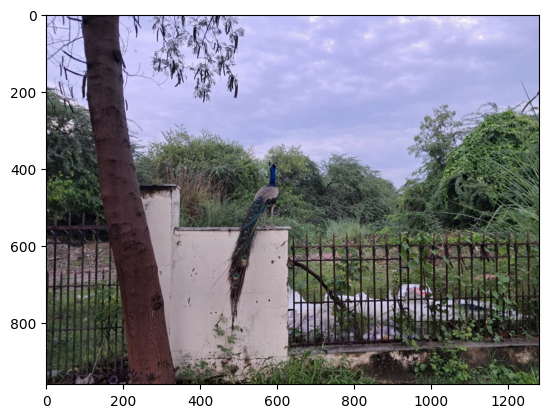

In [64]:
# 1. Display it in RGB
img_np = np.array(img)
print(img_np.shape) #to get the shape of the image

plt.imshow(img)  #dispaly the image

Grayscale shape: (960, 1280)


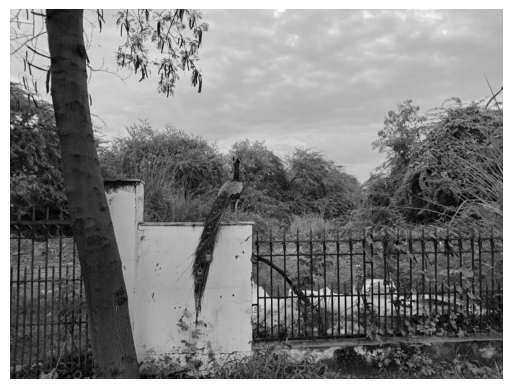

In [95]:
# 2. Convert to grayscale ( use NumPy to calculate aggregates using the weighted sum formula )

# Gray = 0.299R + 0.587G + 0.114B

def rgb_to_grayscale(img_np):
    # convert to float for calculation
    img_float = img_np.astype(np.float32)

    # apply weighted sum formula
    gray = (0.299 * img_float[:, :, 0] +
            0.587 * img_float[:, :, 1] +
            0.114 * img_float[:, :, 2])

    # convert back to uint8 (0-255 range)
    return gray.astype(np.uint8)

gray_img = rgb_to_grayscale(img_np)
print("Grayscale shape:", gray_img.shape)  #shape of grayscale image

plt.imshow(gray_img, cmap='gray')  #dispaly the image
plt.axis("off")
plt.show()

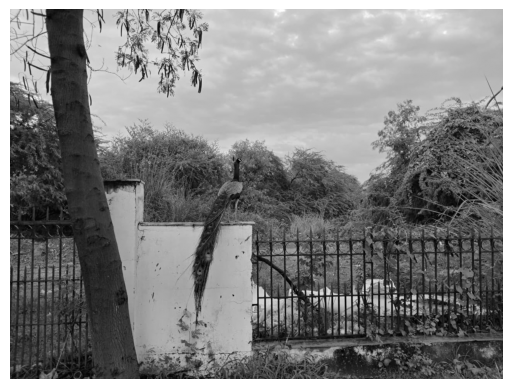

Max difference: 1


In [66]:
# 3. Use the cvtColor function to do the same and compare results

gray_img_cv = cv2.cvtColor(img_np, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_img_cv, cmap='gray')  #dispaly the image
plt.axis("off")
plt.show()

# calculate numerical differences
difference = gray_img.astype(int) - gray_img_cv.astype(int)
print("Max difference:", np.max(np.abs(difference)))

In [67]:
# 4. Print the array shapes of both the RGB and grayscale images

print("RGB image shape:", img_np.shape)
print("Grayscale image shape:", gray_img.shape)

RGB image shape: (960, 1280, 3)
Grayscale image shape: (960, 1280)


In [68]:
# 5. Print a few pixel values of both

# RGB
print("RGB pixel at (0,0):", img_np[0, 0])
print("RGB pixel at (100,100):", img_np[100, 100])
print("RGB pixel at (150,150):", img_np[150, 150])
print("RGB pixel at (200,200):", img_np[200, 200])
print("RGB pixel at (250,350):", img_np[250, 350])
print("RGB pixel at (500,750):", img_np[500, 750])
print("RGB pixel at (750,900):", img_np[750, 900])
print("RGB pixel at (800,1100):", img_np[800, 1100])
print("RGB pixel at (0,0):", img_np[950, 1270])

print("\n")

# grayscale
print("RGB pixel at (0,0):", gray_img[0, 0])
print("RGB pixel at (100,100):", gray_img[100, 100])
print("RGB pixel at (150,150):",gray_img[150, 150])
print("RGB pixel at (200,200):", gray_img[200, 200])
print("RGB pixel at (250,350):", gray_img[250, 350])
print("RGB pixel at (500,750):", gray_img[500, 750])
print("RGB pixel at (750,900):", gray_img[750, 900])
print("RGB pixel at (800,1100):", gray_img[800, 1100])
print("RGB pixel at (0,0):", gray_img[950, 1270])

RGB pixel at (0,0): [198 200 248]
RGB pixel at (100,100): [127 124 169]
RGB pixel at (150,150): [56 40 50]
RGB pixel at (200,200): [126 115 157]
RGB pixel at (250,350): [193 195 244]
RGB pixel at (500,750): [63 69 69]
RGB pixel at (750,900): [211 205 231]
RGB pixel at (800,1100): [24 25 17]
RGB pixel at (0,0): [114 142  91]


RGB pixel at (0,0): 204
RGB pixel at (100,100): 130
RGB pixel at (150,150): 45
RGB pixel at (200,200): 123
RGB pixel at (250,350): 199
RGB pixel at (500,750): 67
RGB pixel at (750,900): 209
RGB pixel at (800,1100): 23
RGB pixel at (0,0): 127


PART B

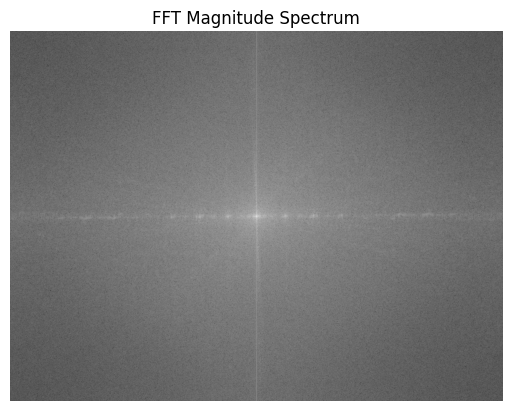

In [69]:
# B1. Compute the FFT of the grayscale image ( use NumPy )

# FFT on grayscale (gray_img)
f = np.fft.fft2(gray_img)

# Shift low frequencies to center
fshift = np.fft.fftshift(f)


# B2. Compute magnitude, phase and display Magnitude Spectrum

magnitude = np.abs(fshift)  # magnitude
phase = np.angle(fshift)  #phase
magnitude_spectrum = 20 * np.log(magnitude + 1)  # Magnitude spectrum

# Display the FFT magnitude spectrum
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("FFT Magnitude Spectrum")
plt.axis("off")
plt.show()

PART C

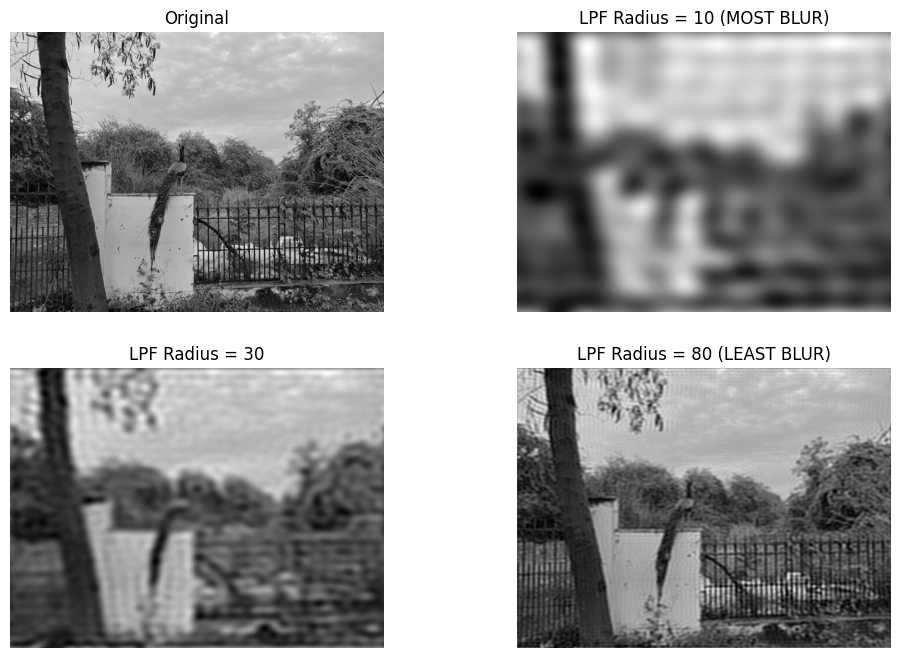

In [70]:
#  C1. Create 3 LPF masks

def create_lpf_mask(shape, radius):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2   # center point
    # FFT shifted (fftshift) moves low frequency to the center.
    # So the LPF must keep values around this center.

    mask = np.zeros((rows, cols), np.uint8)
    # Starts with all zeros, means block everything initially.

    for i in range(rows):
        for j in range(cols):
            if (i - crow)**2 + (j - ccol)**2 <= radius**2:
                mask[i, j] = 1
    # Pixels inside circle = 1 → keep these frequencies
    # Pixels outside circle = 0 → remove (block) them

    return mask


# Create masks
mask10 = create_lpf_mask(gray_img.shape, 10)
mask30 = create_lpf_mask(gray_img.shape, 30)
mask80 = create_lpf_mask(gray_img.shape, 80)
# mask10 (radius=10) keeps VERY FEW frequencies, image becomes very blurry
#  mask80 keeps MANY frequencies, image slightly blurry

# Apply masks
fshift_10 = fshift * mask10
fshift_30 = fshift * mask30
fshift_80 = fshift * mask80



# 3. Reconstruct

def reconstruct_from_fshift(fshift_filtered):
    f_ishift = np.fft.ifftshift(fshift_filtered)  # ifftshift places frequencies back to their original arrangement.
    img_back = np.fft.ifft2(f_ishift)  # This reconstructs the blurred image.
    img_back = np.abs(img_back)
    # IFFT produces complex numbers due to numerical noise.
    # The real image is the magnitude.
    return img_back

img_lpf_10 = reconstruct_from_fshift(fshift_10)
img_lpf_30 = reconstruct_from_fshift(fshift_30)
img_lpf_80 = reconstruct_from_fshift(fshift_80)



# Display
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.imshow(gray_img, cmap='gray')
plt.title("Original")
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(img_lpf_10, cmap='gray')
plt.title("LPF Radius = 10 (MOST BLUR)")
plt.axis("off")

plt.subplot(2,2,3)
plt.imshow(img_lpf_30, cmap='gray')
plt.title("LPF Radius = 30")
plt.axis("off")

plt.subplot(2,2,4)
plt.imshow(img_lpf_80, cmap='gray')
plt.title("LPF Radius = 80 (LEAST BLUR)")
plt.axis("off")

plt.show()

# Reason for blur:
# Smaller radius keeps fewer frequencies and removes more high-frequency details (edges),
# therefore blur increases as radius decreases.

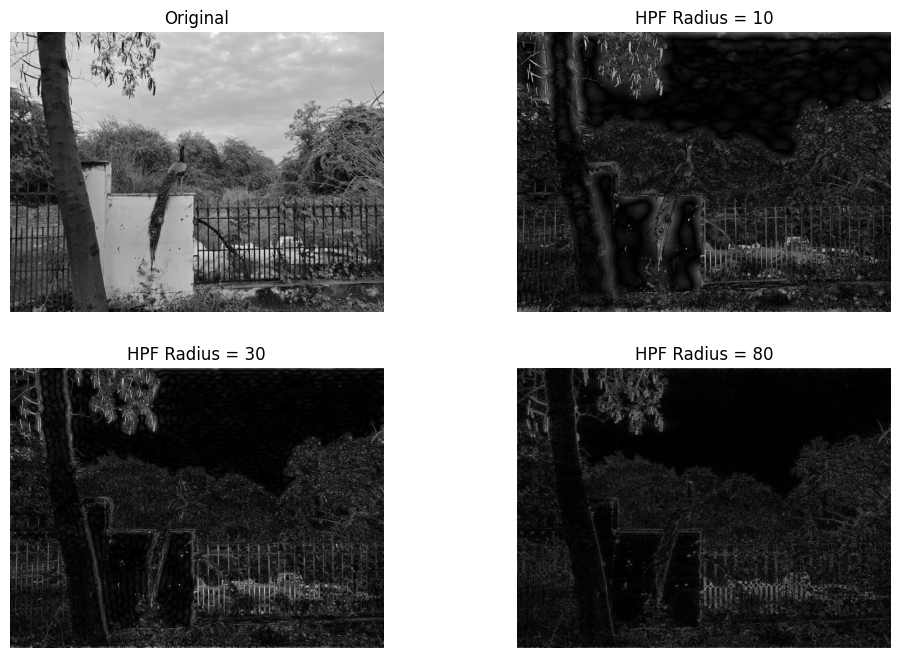

In [71]:
# C2. Create HPF mask

def create_hpf_mask(shape, radius):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2   # center point of frequency domain
    # FFT shifted places low-frequency components at center.
    # High-pass filter should remove values near the center and keep values away from center.

    mask = np.ones((rows, cols), np.uint8)
    # Start with all ones, i.e. keep everything initially.

    for i in range(rows):
        for j in range(cols):
            if (i - crow)**2 + (j - ccol)**2 <= radius**2:
                mask[i, j] = 0
    # Pixels inside circle = 0 => REMOVE low frequencies
    # Pixels outside circle = 1 => KEEP high frequencies

    return mask


# Create HPF mask
hpf_mask10 = create_hpf_mask(gray_img.shape, 10)
hpf_mask30 = create_hpf_mask(gray_img.shape, 30)
hpf_mask80 = create_hpf_mask(gray_img.shape, 80)
# radius = 30 removes low frequencies within this circle
# and passes high frequencies (edges, fine details).


# Apply HPF mask
fshift_hpf_10 = fshift * hpf_mask10
fshift_hpf_30 = fshift * hpf_mask30
fshift_hpf_80 = fshift * hpf_mask80
# Multiplying by mask:
# Central (low-frequency) values => multiplied by 0 => removed
# Outer (high-frequency) values => multiplied by 1 => preserved


# 3. Reconstruct

def reconstruct_from_fshift(fshift_filtered):
    f_ishift = np.fft.ifftshift(fshift_filtered)
    # Moves the frequency components back to original positions.

    img_back = np.fft.ifft2(f_ishift)
    # Inverse FFT converts frequency-domain representation back to spatial image.

    img_back = np.abs(img_back)
    # Convert complex output to magnitude; numerical noise creates imaginary components.

    return img_back

img_hpf_10 = reconstruct_from_fshift(fshift_hpf_10)
img_hpf_30 = reconstruct_from_fshift(fshift_hpf_30)
img_hpf_80 = reconstruct_from_fshift(fshift_hpf_80)


# Display
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.imshow(gray_img, cmap='gray')
plt.title("Original")
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(img_hpf_10, cmap='gray')
plt.title("HPF Radius = 10")
plt.axis("off")

plt.subplot(2,2,3)
plt.imshow(img_hpf_30, cmap='gray')
plt.title("HPF Radius = 30")
plt.axis("off")

plt.subplot(2,2,4)
plt.imshow(img_hpf_80, cmap='gray')
plt.title("HPF Radius = 80")
plt.axis("off")

plt.show()

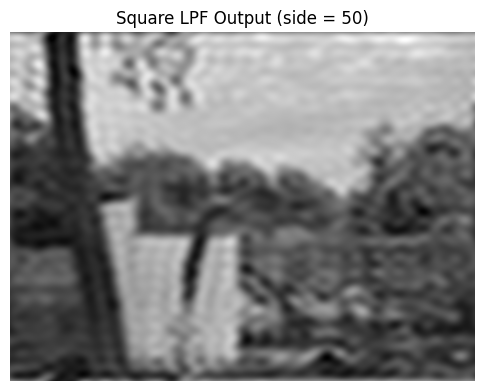

In [72]:
# C3. Create a square LPF mask

def create_square_lpf_mask(shape, side):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2   # center point of frequency domain

    half = side // 2

    mask = np.zeros((rows, cols), np.uint8)
    # Start with all zeros, block everything initially.

    # Create square centered at (crow, ccol)
    mask[crow-half : crow+half, ccol-half : ccol+half] = 1

    # Inside the square = 1 => keep these low frequencies
    # Outside = 0 => remove high frequencies

    return mask


# Create mask with side=50
square_lpf_mask = create_square_lpf_mask(gray_img.shape, 50)

# Apply masks
fshift_50 = fshift * square_lpf_mask



# 3. Reconstruct

def reconstruct_from_fshift(fshift_filtered):
    f_ishift = np.fft.ifftshift(fshift_filtered)  # ifftshift places frequencies back to their original arrangement.
    img_back = np.fft.ifft2(f_ishift)  # This reconstructs the blurred image.
    img_back = np.abs(img_back)
    # IFFT produces complex numbers due to numerical noise.
    # The real image is the magnitude.
    return img_back

img_lpf_50 = reconstruct_from_fshift(fshift_50)



# Display
plt.figure(figsize=(6,6))
plt.imshow(img_lpf_50, cmap='gray')
plt.title("Square LPF Output (side = 50)")
plt.axis("off")
plt.show()

PART D

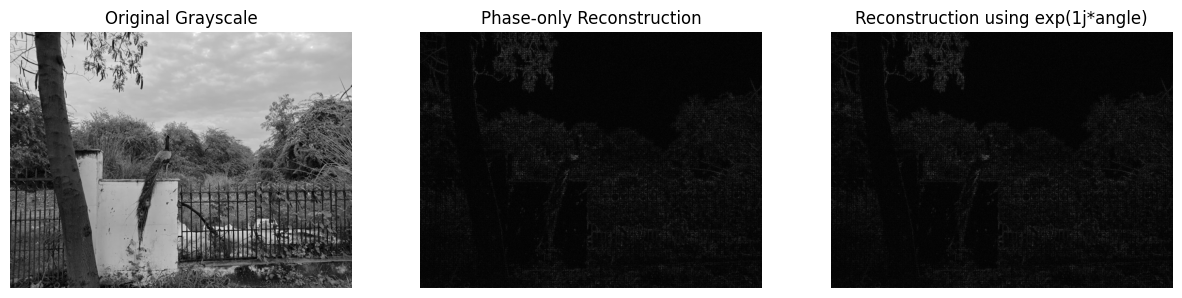

In [73]:
# D1. Phase-only reconstruction

phase_only = fshift / np.abs(fshift)
# Explanation:
# phase_only has complex values of unit magnitude.
# This means we keep only the phase information and discard
# the original magnitude (spectral amplitude) information.

# Reconstruct from phase-only
f_ishift_phaseonly = np.fft.ifftshift(phase_only)
recon_phaseonly_complex = np.fft.ifft2(f_ishift_phaseonly)
recon_phaseonly = np.abs(recon_phaseonly_complex)


angle = np.angle(fshift)
# np.angle(fshift) returns an array of real-valued angles (radians).
# You cannot feed angles directly to ifft2; you must convert them back to complex numbers.

phase_from_angle = np.exp(1j * angle)

# Reconstruct from exp(1j*angle)
f_ishift_angle = np.fft.ifftshift(phase_from_angle)
recon_angle_complex = np.fft.ifft2(f_ishift_angle)
recon_angle = np.abs(recon_angle_complex)


# Display phase-only and angle-based reconstructions
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(gray_img, cmap='gray')
plt.title("Original Grayscale")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(recon_phaseonly, cmap='gray')
plt.title("Phase-only Reconstruction")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(recon_angle, cmap='gray')
plt.title("Reconstruction using exp(1j*angle)")
plt.axis("off")

plt.show()

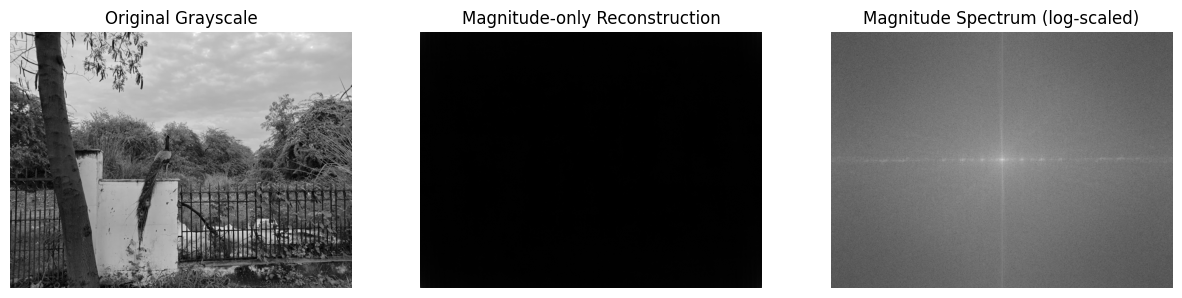

In [74]:
# D2. Magnitude-only reconstruction

mag_only = np.abs(fshift)
# mag_only contains ONLY magnitudes; phase is completely discarded.
# Without phase, the reconstruction will NOT form the original image.

f_ishift_mag = np.fft.ifftshift(mag_only)
recon_mag_complex = np.fft.ifft2(f_ishift_mag)
recon_mag = np.abs(recon_mag_complex)

# Display
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(gray_img, cmap='gray')
plt.title("Original Grayscale")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(recon_mag, cmap='gray')
plt.title("Magnitude-only Reconstruction")
plt.axis("off")

# For comparison: the Magnitude Spectrum
magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)
plt.subplot(1,3,3)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Magnitude Spectrum (log-scaled)")
plt.axis("off")

plt.show()

# The log compresses a HUGE dynamic range (ratio of up to millions).
# This lets weak frequencies become visible.

PART E

In [82]:
import base64
with open("/Photo2.jpeg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())

/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQECAgICAgQDAgICAgUEBAMEBgUGBgYFBgYGBwkIBgcJBwYGCAsICQoKCgoKBggLDAsKDAkKCgr/2wBDAQICAgICAgUDAwUKBwYHCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgr/wAARCAPABQADASIAAhEBAxEB/8QAHgAAAQUBAQEBAQAAAAAAAAAABQIDBAYHAAEICQr/xABYEAAABQMCAwUGBQEFBgUAABcBAgMEBQAGERITByExFCJBUWEIIzJxgZEVM0JSoWIWJEOxwQk0U3Lh8BclgpLRY6JEc7LxGFSDJjWTwtLiNkVVdISjs9P/xAAcAQACAwEBAQEAAAAAAAAAAAADBAABAgUGBwj/xAA7EQACAgIBAwMEAQMDAwMDBAMBAgADBBESBSExEyJBBhQyUWEjQnEVgZEzUqEHFsFisdEkJeHwNEPx/9oADAMBAAIRAxEAPwD9qkXIeX81OhpsWq3eoMgI5pamoDayV1IOXcjlNYu8AhjzpPaPQPvQGKkVDpbKg92pnaTf9hU9MSQki5Dyp5Hp9KElWOXpipjWQKId/FYdTMpDLP8AJJ868fpCrTce4KcoEH9PSnhVKPXH3pJto8NIOwr+2lopnqYk4KdTSIBinSkKUcgFae0yT2urq6gyTq6urqkk6m1uv1pyvDJlN1qQciV1cp3VdAdK6mJI3TbynKbc97rVpCSAt0+leUtcgVyRCn603E/74+h4fSnqZN7r4f5pPaVfT7UOMJJFdTKayhh54+1SmaZVlNKucelD8QkY7P6j9qKNk9rmNedmS9fvToiI9aXsbnJPK6urqHJOrq6uqSTq6urqkkbplZQOmK9UWOXpioayx8daJCRK3T6UKeVPXWP6faoDz8vX40xT+cG8bqOv4U9rHyCmV/CnIvI6PX61PYKbPWoC

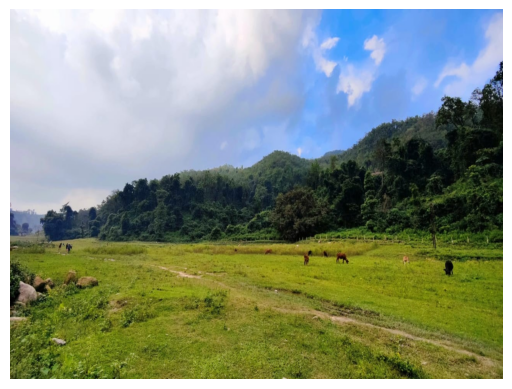

In [90]:
from PIL import Image
import io
import base64
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Paste your base64 string here
base64_image = """
/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQECAgICAgQDAgICAgUEBAMEBgUGBgYFBgYGBwkIBgcJBwYGCAsICQoKCgoKBggLDAsKDAkKCgr/2wBDAQICAgICAgUDAwUKBwYHCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgr/wAARCAPABQADASIAAhEBAxEB/8QAHgAAAQUBAQEBAQAAAAAAAAAABQIDBAYHAAEICQr/xABYEAAABQMCAwUGBQEFBgUAABcBAgMEBQAGERITByExFCJBUWEIIzJxgZEVM0JSoWIWJEOxwQk0U3Lh8BclgpLRY6JEc7LxGFSDJjWTwtLiNkVVdISjs9P/xAAcAQACAwEBAQEAAAAAAAAAAAADBAABAgUGBwj/xAA7EQACAgIBAwMEAQMDAwMDBAMBAgADBBESBSExEyJBBhQyUWEjQnEVgZEzUqEHFsFisdEkJeHwNEPx/9oADAMBAAIRAxEAPwD9qkXIeX81OhpsWq3eoMgI5pamoDayV1IOXcjlNYu8AhjzpPaPQPvQGKkVDpbKg92pnaTf9hU9MSQki5Dyp5Hp9KElWOXpipjWQKId/FYdTMpDLP8AJJ868fpCrTce4KcoEH9PSnhVKPXH3pJto8NIOwr+2lopnqYk4KdTSIBinSkKUcgFae0yT2urq6gyTq6urqkk6m1uv1pyvDJlN1qQciV1cp3VdAdK6mJI3TbynKbc97rVpCSAt0+leUtcgVyRCn603E/74+h4fSnqZN7r4f5pPaVfT7UOMJJFdTKayhh54+1SmaZVlNKucelD8QkY7P6j9qKNk9rmNedmS9fvToiI9aXsbnJPK6urqHJOrq6uqSTq6urqkkbplZQOmK9UWOXpioayx8daJCRK3T6UKeVPXWP6faoDz8vX40xT+cG8bqOv4U9rHyCmV/CnIvI6PX61PYKbPWoCP5mn1qekgA9c1JJM3fUaYX8K9yPmNeH7/WpJI63X60wt0+lPuklgT1kDn8qYMJR+Os8oSDFkx65qOv4/WiRm4mHmFRHTJUB7oU7XYIJ4tH8j605SyshKjyEelIU7nSilg8X4xW56Umm6cT7/AFqS5IZ9fpRJgqCo8qGp+6HJalRahk1dJR+9JvGISrqXoDzGvVE0y9M/el4RIMWSHNLr10OkOVNJqibrRJIvd9RpilqBpHkI/ekVJrlGllQxQZ9+cNFXQaR5UKffnDQ5mRaa/wAb61IVIUnSm00QMbWOc01X+EHJ0b0oqh4fShUaA+NEyiYvQQ+1BkjyygdMURhMKrdKCO1jlDuB/FFLOcnXXycOVCub2Rin85ZKcrxIhT9a9pCMRuurxQwk6U0ouYnTFSSduh6fek1G7WTzCpKYgZPUI8/SpJHKbX8KcplY41JJCW6fSobzp9anLkCoLzp9aHJBTyha3X60Uf8AdT1B1oWt+Zp9aIky8ZOqCQ86EyTkN/Af51LkXBg5Bigz5UTjqHrTCQMjPFAzSEVA6YpDg4G61GK8AoYAP5ovGEhDdD0+9DJhUB8KkpuSqfCWoEicFuv8VuDgx7UWpTwBGmNAeY00kC8b2vQahPGw9P8ASiVNOCFMHOtTMrT2oK3X60QkCFLzDNQFiDXRpaI3LIi/j9ai1MMQT9QGoihRL0/mneYgZGeUCeKgNGZRYUW+541XnCom612MJeY5RLJae11J1j5BXJqAfqFdKKRSHjSXivucU6UhSdKjPQ9xUrX+pBu3sgd7VeuRyA9eXzqwuQMdPUPWqfOOiKODJmHkWvbdFoLvPJdZvC40CvFfGhi3T6VPeB40OWMNe+pWfN8loxXu6H/Y14oIE6U3XTRZzHtE6oskp7nFPa1fMKhyR9RdAdPWjpOVk2DhI9JX8frSq8MUD9aconMimn5tE0ev1oWmIpm1F/miaJgClnjeG0drq6upV1ncTjOptbr9acpCwp4zzoqRbJ4yNQ951+lTHLgif5X81CcZOPOmam4PONe3KQF/CnEev1pK6RvKnGKZlB94H2pp+PCCRjzhJL86iFQWpAOfUPWiOgPMaQnfw5LZVKqO3KBOlSE+/wBa5DztcfYJ1dSto/lTnZD+Q1W1l8GjW16BRONal5iBqippFMPMP4qc0S2/hz9aBc3sjNdRWSKYWSHNS025z9R/ivTN0zdQGudOiixqupegPMaRUjkjvOv0ppFMalKIEV+LP0pJSFJ0rXKYNQazlGF/ChqySnlRJfwps2DchKFTlI6mRiJikiGaYW6/Wpi/eLoHpmoZu/1o1PmLXeJHrq6k6x8gokkTTC3T6U/TC3T6VJInd9Rpv/G+tL2i+Y/eu2y6tXjREirtFVGWTGpNNrUSKwfTdPKE0plMHUetNYHyGiReeU5SEyibr/FPpogbrUkjjNIelTEUvCm26ZS9KlIkCsvG6fMRtD6/ak7avl/FTU2hlOg08g0Mp8RftWCypGqqucG/hpx/V/FE2DEUuv8AlUz8LMPpTxSFL0pF7hHExjGdr0CkFbOFehaIM487wfdlo/GwAG/QNcvJy0pnXxMN3lIPHLrcgSH7U5+Fvf2DWooWUxKnqBPn86YeWimj+UX71yX6zTznaTobz9AEVChUxuQD8xGg6Lkev+tTmbkev+tfnCfV+RhZkkUPh/yqSIiBdYiOKYZU8/EEkuQ1ezNchJrZos7S3kgDHqOKZWJsG0CI59KisLhWRJtcqdO9KqtkQqHZ8ygQIUj3Ql+Ial9o9B+9CWag4p/Sf9380NkVjszfIyWm4MVXUI8qNInKukCxB7o9M1Ve0D60SjZI2hNH+KFbT7diUrEwzXV1dSmjCTq6urqqSdXV1dUlcRIqxBFek04r+dTdMQe+8bpCpDH6UuuqDtCweoO58P8ANcl3Oo045SBIcBTdM8jA8F5x9Qon6U3sn9K83PSu3PSqhQAI+iAYqS3DKmog8vWoSKo5qayobdpnkZOrq6upMAibnV1dXVJJ1dXV1SSdXV1dW+IkUEyIt0+lQ1un0qYt0+lQ1un0q+/xCN2kVc4VHcInUT0lxmnlun0rynKU0dmLuxg+m1O/0pym6YlcRI6IDvUYbpCYusA5UNRT99RtmmG1Q2YiTiJFUROl8WPpSKmvEwzUfa9Aq+RmO8mJsyqo5xQh+0KmXWAUeZ/k0iSjSijzCl1cFtGMen7dyqAocTaPGpBU9fhSnTYEVuQ02ir404DqCKgz04mTJpMHP0qKskbpUorkqvhSVkshyzRRYVg+IkBQQSLqN/FLbnKfoNTHcUIpf9KhNGxumaL6qwfCSiiB+lSmCZiqax6UwikGKns0g60qSTGOIk7IeYUhYw+dN7vqFR1nI+VY4iWO08fGAvKoyKan/Y0s6oqhzpSPX61qSJWOFJyHmFcv4Uxu+oVJXETx13x5UKekEVs0VW6/Whjv82q4iXI65Br1tpUNpL1pS3X61HIrtL8qYA0NQcKRqdEeXmP2qBG+FTqA3aSOJsyL9Ao9DxzZklhIMG86DsqNM1R60td+MNWSDuEEu51CuN3OtNbvqNerK+NKRlTuIXMFQHDshfizUlZQaHPatRuRjqedz1qY0OKqekvX1obuj6/epkapmtMoC7mVYmENYeQ0wsYKcplfx+tYhNGMLHAagvOn1qYt0+lQ3nT61XESKCfMGPkjKJ6C4zQhz3FsDRtfx+tBHv54VaTDwM+U3PhoO8Uosv4UHeU0gEDIK6oAbTzzUYwFJ1H+KdX/ADvpTK/hR9wkjvJg7U+lMKVugb4hCoDn3q2RGm99Xzoi1kwLNqTXAAr8P81Dr3tA+teUUAiZOjPNYeQ0hTv9K6urUHBUk0Jp145UKcIiTqFWCSTDZ5UDe0zSx5ag7K9yAYCk6hUNYoVNW6/Whyyg0/X7vM58D3EfKG0TrVfUMJh5ANHp7r9KFdnD0r0nTwFp1Ofkj3aim7FdyXUlpwPmNPpxhy9QCpUOl7nxqdhPyGj8zFvdAahTJfEFQ3pgFPR40Zetg6f6UFeda6GNWLDsxS9yo0JAVSEyRigXOnrWdTpBRk1G5x73pzrRpCSSj486pwrN5NUXix3gjzr3/QKiCTPC/UFy8AgkB4cMZocv4/Wp7zp9agL+P1r19faeIyZDWMPWlF73SlLph514j0+ldJCJyHUciJCFwcOoVEWMJviok/bAj0oat0+lFRZxckkHU8rq6uplTx8QM6pbZYFDaSjzqJSyKiityChvWeO5vHcL4hWuqJ+IhTu56fzQSoM6aZCx5T3XxD9qHLOg9aeeORxioa3T6VAoEWyMhT4noJgPxVx0xP8ADSqmR7YFeY1fzuL1J6zQcszPj4a8TIUvQB+1HVmqXTFQnLEEug4rZckajIxyDuR2pylHIjRBNUqvw5+tDUWx/wDsKJs0gHmFAscL4nQwt/MnIlGpKKJ8+HWkoJVMRS8K5DsZ6FByUCe4S/bXFWE3QP4rypCLYOtBYgRlVJnIoGxnlUtHAeFeIph1zUtFsH/YUs1hYaMZrTl5i0xMUOdN05TdBjgQCJ0D5hTNSKj1jkZudTZu51pykLdPpVSD2iRl/Cm6cX8KbqTZAMbU7/SoqqRkfjx9KlUwf3w4Gi12EQNlStIVN1O7L60js/y+1H9VIH03kfYP6feoyyZqJ7XoFNLNg61iu4N2MI1JWDzd3rXun+oPvXLdPpTe76hTqgCcp9RdNrFGnKSv4/Wi8RAbEjLAXbKXy601gPIKdW6fSvdv1q4BiB4jaLc2egVITQMXrilIpeFStoPT7VJI02QOf4cVIBIyJtJ+ufClES2eQDSkwFZfpQyd+Y6qkNoSXEJqLjyx9aMNWRSjzCm4piCXT/Ki6LYM1y8izTandwsbl5kXsCXXP8V4RiRQ2koc/lU3a9AqfFRgKrc/D0rm23cVJ3O1XiqW0J7BRAplAxQDA9KPMUCpcjF+1OsY0qKJMVKRa55f6V5XPyTZ8z0eNjCvWpMaNt1PSUefrToRCjguoC/cKmxsaIBmjbNmOzyJ/FeZychUO1ncooZvM+mUPGpKPT6VGJ3OlSC9zpXy2elkxF8fr/rTwruB6qVBKOnoFPbp/Oovu8TBJEVTnaD+f80zrHyCvd4/pR9CVzhVm+L/ANjU3txPSgCagpfCH81MTVKfrQeJh+QhDdD0+9To1QB50JTUKbrUti50c+VX7iuplTqWpByHSn0PD6UHReeNT2sikPM4/akmrKw2xJddUVORKdUChjA1KoBUjzJyE6urq8UMJOlZk5CML+FN0pc4jSNYeQ0cEGD13iK6uyHmFJ1j5BWgCYWJpulKH09KRrDyGjbmQCW3GK6urufmH2qbmj2jyHh9KeS/OplHIeIU4kcwm18s0NjuY1Jfag8x+9SU1E1eg0K1fP70pFZRH4Dfes+mZrYhWuptNwU/WliBx+EQpY9pc9rq81h5DXKHAnSrIIkntRVlA6YpxRcxemKhPnBEw7lbHfxCjS+YrtHoH3qHJOQ8ulRvxVHy/mmnywKYwNMVVEeYNnBjO76jXvbj+tR1D6eg/wA12on/AGNOaA8QLDckV52f1D7V43UKqHeqa3IVUMm/iqJAG5chIth8/wCKKo00i1UxjH8U+Ugk6UBmBl8Wni3X601tD6/anTEObqP8Uva9BrXJZeopsO0jzpx4omCJ6ZciYiPdqMGpZEd0R59cUGsKW3Ns5VdGCXjkN/H+tRd0PT703KKim60F6etMprAYOdOgEwPIR9sqdJbpR5mCYo88fWhLQibg2pQOfpUpM5ki6SDyrBDCYkw4Joo8zUHPsKr8jBU9XKxdJx5elAUExK70mMP3qcZviIWQ8ad3fUKQYCp/l/zTah9PStS4+s5TzjNJ3EvP+aFrLk3NORx86U3XMoPeH7VPjcrkJPQ8akVGIYCdB+9OguAjyqSchOqOsl4VIrwxCm6hUmuJjFC5Pwoi4VFHw+9CHzgx+uKtQWOhM8hGT+96U3SkD4r3bz8NMcSRuYhOL/Jp5RyCXMaZaAZIugn8145RFTkYKWbvL4mSGb4orcg/mrCzV9ziqdHlOLrQfp6VbmBAMhzpa7xqbST0VA6Yp6oZR0dKlpmA3X+KV4mMoRGVun0qE8SHpRIyJDdc1FcJAbkNRTqRjuC6msvyBqOo2MXmFSG/cJoDpWmYFdSl7SfkPKm3ioCjzAK5NUx+uKaeAGNHhWI4F3Iiw8+lRXtPrnGozhTXyGpI668SG8VDrQN7+ui8gIET1B19aCOFhMmJj4yPWokVeBnioUHklOVEnhhoRJCHhTi9oGQaaWVDFL1j5BUZ0YS9KJCSG8VDrQJ2+PvdR+9GFPe/FQJ4UNeqnEbtuJPuEGb0uP8ArUrfS/dQNscxc4GpGR8xogAMpW5+IYyn5jTKyqeOtQlHmkMgb+aQZYp+o/zWCCvmWSBErujeIZoS8VPv9KIrLh5BQ5wqJjahAM0Wg7fcp3MYedfpQ1bof5VNUWOr8WKHrKYA+qurQp3qc0jUGyCJVVutREUx65qSJQE2oRHNJQTMYe6FdzGJHaIZA28nxKSiwcg+VSDsjI9f8qI2vGCZvuLFwNSJFgIAYccg6DTKkM2hBlNDcrqyWeVVxdooKx902Ks75RNLVp8OnOqhcztRMwiibAj1rv8AT6WsOhOHm2isbaV69hQBtsgfnVIXo/cy6zrmob7UDMQp+tfSem0iigEz5z1fJ9TLGvEgL+FQ1k1PKiKLYy/5n8Up02AieoA/iuygnAvUsNiB1ki73Wk7XoFcuQdWrxp5IoH6hTlbbnIb3OYOkvGhNFpv3f5f1oUoUS9P5ro06fxOTkqOW55XV1dW+Jikj08h4fSmacRMNRg5XUUpY7jlSEev1qPUlEnw+tAKkR5FaMrJKYrkUxoms3IbmUKUjD45GzQy6iM/aM8Htmqqy3IKKsGwpU4igmgbUmHP1pwDCFVzEZpr9JYhfx+tMn96jThhMfqb+K9IgQhdJRHHrQy4EcUM0bQYl65qY0ZF60lqnr61MZoj60pc5nQpoUGeoeNPaj+X8U60illvywoxH26q5/NH7UhZcgnZxamYbglm1V6YqY3ail1/yqc4alZqaEgx86YEyhuohSRt5eI+KCvmdXV1dQ+RhvT14nV1dXVfITWjOqPUimVCATpWJnYiaZX8frTihxKHKmjCJuo1ejNAExqm6crzQFDd1TzCBSYysmPXFI2/WpJigfrXaC1hX0JtV795G2/Wmuz/AD+1TtAeY12gKzvUxoyGskI1HedfpU52UCdKHvDjTGON2b+JjJbtB1M7frT1ed/zCuxPPurRO2P7QpdeqDp6AH2pW16DRIvsiM7XoFLRS8Ke2ieVelIBelSGWkfM5FsXPWnezk8/4pCJQ86eSLr6iP3quQhPTEXt+tSmaCQKb2mkIACh9Jv4oi3TApNsChj5Unc+vEborJbcmM0h60XbNlFugUOZ6AEurx61Z4khTaMB161xMqwq2zPS9PUyMjEH8qP29EmWW5B/FIRL6BVstSHApN0wDmvMZ+Y1dRYz0uHjl7NRoLeU6Y/ipjCDKl1/yo1oN5fxTiTQo9QGvGW5rNPTVYaLrcYZsTYx/pUpFsP/AGFPJlMknqKHP1CnEc9P5rl22co+pCz6D2T+lO11dXiZ0ovWHkNOaw8hpinKunxBvFbxPWu3ietM11Hg5I5+Qfenkdefi/mom6Pr969Rcj0oc3zMIIrj1qUVbPwDQ1FXxqSiqOakLDSLscZ51JO6KToI0LQV8a9Wcj5VS6aEheLdpnW7xhqw76enVnlVGbPjJL8vvmjP4ufZ6+NLX1B/EksJVSG6DTajpI/w5+1CUZI486fYPiq8xD+aD6BEkkrc+nOmD6ifEb7DXLPyNPj51GJKtFR5jW0WSLMrp6iNd21HyN9qbWEOuaYoyJK5R1Rcph5ANdkfMaarzd9RrXCWjRwxgJ1pgzg5OofzXqyo5qMsr41OEjvJBHZy8xH7DXqb8S8hzioe76hUftHoP3rWlmOUMfiCP7TU6m9QV+ER+oVX+2j5B/7qdZvTY/61XGTlLCiubr/rUttIAn+YA/SgyLkfL+aX2j0H70N6BN8oaTXBX4TDXKKAboNCmb02f+tTO2B5B96XdIxzWLUVA492g0q5EvIw045lwSHkP80HmHo+H+dGSuCdog8oQnUlKK/Ip1EaFrKDSUXI+VGmIScuCkLrNmme0eg/emzqCqjzqJpP+7+aJJCzNxzo5HmBUO5VUZuR6f61ZYdUcdaw/wCEkKpmAvXH3r3AeQUxu+oUrcD9w1zttGAxkkqOroNdgPIKSioPTFKqbb9wgCxp4JNrTzzUR2smkmIc8l8gqS86fWgEk+N36Yo8wFzLA0sqBnndGoqJzB4/zSpJXub3jUFFyP8A2NdevjqLSwxjkom0BnNECiBug1WWz4UluX+dFUXwh/8AbpR5IUKYDl1h0oQvpB1qL0qUjIl2aHrKCK1SEhNucTl1D0pt0QyXxY+g16zcl2cgFRpJyI/X1qSSMoBTKawGktVyk65pVJRTDrmic14QcJpKiqXUX+a9aFV/WIfevWaQCjSjhtDyChyR7WHkNdrDyGkV1SMSBMGEPhCgz04h50SmHweIfzQs7kqo8y/zW6fzi8aRWL60RZlAxQMbobpQ5FMKJMvyU6LY3FJJPTMQnWpSiAGDlUOiu16BS8JByLQxXQGKAYHpViYkFNLQbrQ9BsG8nj/KiSHjS93mFRY4budadROPSmluv1pKKg9MUvNpCGgfMKaWTp+m1uv1ocNxg5wmoUeYB96Sj0+lPvOv0phHp9KkDJSZRJ1pDzrSdz0/mkPFBxUjySGucKhrFP51KW6fSoSytSR5Bkj4T0+NAZMTFT0F6jReSUxQiT8KiRN4FfKlLnOaDyAib4aKSXjQZ4qNOQMjZ72jxph4QdOrwr3d990pDxX3NElczIFA3waByIhRygsk2Nkcj/FNV/hAPI5VCpDg38Uo0m1KOB1faoq6g9MVDXVplKzBr7JNUeaumabM608xEag9o+f3pCzkfD/OjLVygneE1HGvpmoqxufWo3bR8g/91JWcj1/1o60hIB7TFGWIXrmhkgqA6tHj0zUlZXxoa8VHpT9Ce+AdjEaw8hqbENRV6Y+tD6sUC2Dz/iuwq8BFD73h2OwRvtJhz+VJmlito86qo9emKfjkg6UqSYN3bbZEeVVS39YQjqOEzl84MoUxym5CPLNVaaXKqYS56da0OetlBqlyH7Vn0nHm31Of8V9A6O1XKeJ6qr8ZWZZgs5/Kx9RqvGSVKptGTHPyq3LdfrQxYgds/L/ivY0v24zw+VVyPKDmTIRDw+tMSBASRwYo/ajZIzZ6DUeYbJiiI460zXeYo+PYUlKVEoj0r0vuvj/ipsgw2un+VQl67NLKRPM21Mjwa+970/moCwBnpU9YQ58/OoiyYdabqbiZybfduQjKlIOBAftXbpf2j9q9WSDFdteg05OZ/VjOg3lSk8lHnT+36/xXbfrUkWgpPSoHN0xU5NLRpyPSkIph1zT1Ju86Na6kpExRHIhTh3ZlPywplDxpxFLwpd50a44I45jXoEEQzTrZgKvMR5UpykCXIKFzjPpCMcvMftXugfMKc2i+nPpype16BWXeMpVFs0vUKIMkym6B/FQ2bY3nR+FiBV6/5Ulc+p0cTHZnnrMxymEiJedWOMbGQLqOP2qK0iSs1veVLOoZJHlXHutM9Hj0sqSG+QBRTUUOVDFE9r4ihRdcB5cqjPGwedCRoZ0gyuqV2X+qm9oPT7UT1RB+m0Y1h5DS9A+YU72f1D7Ura9AofriT02jBEjH+EQ+9MrFGnzpHS8aaX8frRZnjIqxgpOgfMK5fx+tKoFlhXxDIsj11O7XoFdtegUo1heGRY1XV1dTH9sH/dOrjBp611Nrq0KtucvjGna6Z+mftUB13ulSVun0qMv4V1cZJzclvZIOgfMKXtegV5TldKcx5HN734f5qXoDzGmUUwp+iQFS8vMToHzCvTInJ1xXtOL+FSMxpMok606h403TiHjQ5JJafm0YRAMUHafm0URVHNJ3eY7jSSRQTadH6euasEC8Ojt7v8VXUKNxv6PnXHyFDTu4Dd5cI5ud4ptoFyPrV/g2yiSWnSGar1hskgT3lC/erk20IhyCvm/Wcks/pifQOmUBF5Ge4J5D/wC2nk0ylDmFLwn5DTu0Hp9q8y7Gdqe9n93p5ZpLdmoYuoMU/U1m2DZ6/wAUs7QvATb682h9ftT+yT1pPPzD7V5KdONbQ+v2pWT9OdPJplN1p9RIAT1EDnUkg2up1Rvp6ZpOgPMakWdYiurq6iTE6pO76hUanKkkntnO11/zqSm5BXmFCBOYetSWShgDlWuMKjydUli6BLmP+dRNY+QV4BhDpVd5uFe1f01zWRFPqH80P3zfuCuVXABxyonGSSn8kZX/AE51A/FDf9jSFXBgHlj61FoqJBvLQzcg7Z5D75qRQ62C6kxJr5USyXb1Y50taunhJ5TCygV6o50jgMUwdQD9c1aLJEPFQ60zueleODCbmNRVFjF6YqcZI6sr40ws5Dr/AK02s5H0qGZwY3Wq9MyR/tAelLRcgH/26FqOlCKaAMGKcRcfKieiJJZGckXr/rU87lNVHkNVVu5Eochqcg8OBdOrlQ/TMkMIqB0xUqhzFdFUO8P2Gp6oiVPUQQzVSSC8VDrQp4qFE3iYZ6jQh4URU0h086HCSIt1+tOU2t1+tcoqJelEX84Oe7vqFdu+oUxrHyCu1j5BTkHFoqBR233R0+oDVcQEdzT4VYogNVBvhEljphu6Kj1rlHpU0tQ9aGi8KPU1c1KjDcofRUJShUAP8QPvQAkuBA5nCoLi4jJn0lV5eo1paDL9QSzrKoDzE1VW4XIJJZGvDXAJup/4obPvQdF0Z+1HqoKwFrB4OWch0H/OmUXIeX80ysb1pBdJR5AP3puLwr2r+mlfiSf7qgbo7erlmoyqpi9MVJrlLE2VTWDkPSlUKiHI/qH+an9o1fCIVrgsPyktFQKbW/0pBVSE6D969MoB+oVn0xKi9z0rtz0pmuqekJJOayIpc/8AWpSL4uaCisI9RCnkVhoLrJCiyqYfqpntv/eagrLm65qMDkwB3jUNVLy+Ubm1N3pUJDw+lOyKwfpqIZwdL4MfWm19kHzEntve8goigqf9tQLcArhTQp09KNlaFL0z9qxdNJHkUx60VRTGoTRuc3xj/FE0ChSd0KkXS+56UyooYvSmN0/nQR7/ADGJIWch5fzTSKgVGdKiUeQ16iuFa4zPISwIqhskH/WuWUCktSlMiTP+dMP1gSU0FGgw0jPFQqJ249LeLh1qEmcTq6B6Vjj7JEhlmmIo869eNigjnNex6pTI98ftXkgcgI90fuNB5HnHINX8frUFbr9amOjCUcBUJYwZq4O7zBD/AFrDyChMl41YXRCkHBQoBJEDHzqJAf3wLJeNBHnVSjckA+NBZANCZzh1roU+Ys8CLK+NedoD0ppcw03p/qH70xJxWO1DmPyamp6Tcz1BmTCBdHhW0/OW6rwlfkk8LdaFyPWjT4CmNrH/ADoTJJF6866aeBOc8GdoP5fzSdz0/mkqqmL0xTOsfIKaice7ceu7UHmP3qGosJOgV5u+o0VOUp2EkrPi5/61CWch5UhYxc4z/NRCmOspoEeXpXVxqjFLrRCkb+bVyh2JvD/KqlEtVDLFAQ69a0W32YKpajAOfSnb9KkFR74gieysSvHiqeOtSpNLshQVUDmX1qrzk2Rn8A5+dYxF5vC5DcEkqZAgs+Y5qgTzE2chVm/GgkW+gwhn0oXNJ7jcymOYdK9X03+k88x1L+qkz16kILYpkjEVVsh/lRFw3KKpwPnu9MU4ybCdb3Ja9ut/FJ5BqCzcZF/DDf8AYVClGAqttlIREflV3Z22dbSCqZsj1AKtUBwxQlC7pWmfmFc/I6vj4rcmMdp6Pk5f4ifOsgdFFHsgqDuZ6YoWJUithRVSKYVPjwHSvoRx7NIOLk7Y5VKCXkXkFXhv7PnDli2MoMUU5zhz1CA0S36y6ZihdHcRb6L6lk3HR0J8VSCZW6xwbiUPmFNbXoFfSfFDg3w4gCGUUalKcfI1YNcMRHsHuyxAwk/qNka9V0vrNPVaw1Y1PE9c+nMjpd5VjK92EvmP2pXZiedTOxG8v4phRuJegV3OTzzfoGM9iDzH/wBte9nJ/wBhTuCeY0nQHmNT1TM+lHa82vQa5M4H6hT+360OMUrFopDmpBNa3QK8RKUoaThkfSrJYtmSVyqYK0OQufjHpSmTfVjjkxnUxMZ8hxWg7CQYyE3m2+45BUm2IEJyUIigiY3Pnyq5I8Onz8xmCACYoft61pHB/gslb6wykoAGEgcgry/UvqDEw6Gct7p7fpX0xkZl6rrSynyvs8AaKScMS4MmlzCqPJWcLR2dmsQQH5V9Syx0mpRKQuCCXAhWRXzDdqnRWbNhwPXAcq8x0T6mysu0rYe09T1r6Yw8asNWO8z1nbQ46UYaskkQ+H61erc4VLOmXb3y2gnzxQKWjyMHp0QxpDpmuyOq1ZjmsNOV/pVuKg2sE7frSqdwPkNMqGBPrWuYmhWFnuAHqFD6kqvkgU0EHlUJRUwfB/NblWJySR1/Cm69MZY/UA+1K2vQakWiK6lqkKTpTff9KkJEPOv0qJtegVLcd8edNaQ0asUxT+ETb85Arza9BqT2ZL1+9J2/WiS+YkfWPkFerKhinNAeY1HWDn1ofpLN+oZ5uh6fema6urXGB5TqbW6/WnK8MmU3WoFAMnKRKiLdPpUvSp5BTS7YvTnXSr4zmvykSk7p/OnFEzF6UnJvMPtTWli3GOV1eplE3X+Kf7Ml6/esy5H3j/sqRStknrSaHJE7frSqVrHyCk1JI6j0+lEEVaHte+HOpzVPV1zQb4zjMecKxqYjyo5CtiKrYCg7EdIYCjEEYEDagHn61yL07TvYTf1Jp9pK7LPnRxaRRBb4w+9UqInFEW5SkEvPrkKKNXBXS3fEfvXzjOwi1pYz3+Hkj0wsuTZXdRqYj1+tC4xUCl0gHKiqJQryd35mdyuSY1LxolUFj3BLn9VTqTeOJNsr3l5j9q8rq8vHpyfc61MbGIonozzqHSSOBR5BUkktRvq6CH3qAdI5Oofap+76hSFhJ5VJRUGDjEEnWvdA+YUpfwrqIpBirAiI0G8qXXU7tegVviJURoHzCnmpgKGBpulIeH0os2ABJusPIa7WHkNR90fX7126Pr963oTXIx/WPkFMqKCYMAP815uj6/emd31CpoScjHVAMbpXFSOboFRu0D60+i+LnOP5ow0IMsTCrNBVoOERGiZnJSo86HsJNJXqAU8skfZxmlLO7w694hRYThgK7d9RpFJ0D5hWgVEkUsYKHLG59f5qev4/WoKzY2etVyEkgOXAl65qGo42gyYB+9THiYZoe86fWtcjMcjOUMJ1NQDypKbjT1AftTW56fzTPbw/aH3rPumtiFE1xL1qSm+TL1NQLtx/Wl9sT8hoszzlkYyRUviPRto/FZPRq5+tUFGRT+LVReNmz8xz/NL8JrYlmcqlOPdqC6REymoACktpIqvIQ/mlLKDQuBhOQg1ymZP4g+1RllMUSOmCoc6FrgIZyHnW6uJOzMT3WHkNdrDyGkV1NQcUkYCKah6UWi3aiXxD9hoFuj6/eprNyPT/AFodgDQg7Q2+e609KZufrUAyypOpqSTWt1GmllB6UuimX2jL58qTof8Amhjh6Kqmsoj9aXJa/PrUSjgAQDMRHgcHD9dd2lQ/5hvsNRt31Cu3fUK0STK2Z6sJqa3w/aNOr+P1qLVSpNKYTE0B1ptYwUhFQemKUt1+tSVxEcbrij1qY1dlD480PpxFXxqtTXIwsZU5fH7U7u+o1DbKit1H+ak0XUJyMe3SedJO5SJ1z9qY3fUKZWUGsbM3He0B6VIbn19BoZu+oVMZqjVHvJH3JtHUagOlTD8I/wA0t45Hp/rUFYD+dZRQniBYkTwxzrcwptQhzdP86cR6fSpPZf6q2TymY5bawILe85VckiprFAxBDA9MhVJ/3VblVmhH4rIkAR/msXQ6QruGD4QCpaahSdah0vd9RpWwbjCAR9YwVHMsQvXNKWVqGsrS4Bs8TXKeOlQN0ppNUxOtIWUGm931GmPEFLW0dplTKUeodahSbjCmvI1ERej/ANjTblyK3If86U0Y0rAiJdqmHpXrcNS2QphNXd60+0/NqMdDU2mpOTVFNPSA869WUEUtJh503SFlRzQdDe413jbxUuc86HuDCTqNSHio0LeOR6ViBsbccdLEMOQzQV8kdQO7ipSzkfKoqyg1pAIFSSdwW+bmU+HFVyWAUkzEP1HpVpW6fSq5PJh0zTNLnlMWqBKquoUOtI30/OvJb3P/AEoTun866KqCoMWZ+LahZZwTOSnqLJuUl/yxH60PWXLn4h6+dR1no/8AY0QJo7gzYxGo26WA3TNQpDvByqSv4/Worz4frTqQTgL+UCue4YSD1qOZUpeuakPvzhqGv4/WnFBMRjCimrpXnaC/uGk03XQqQGBciNqGOcOX+dPxpAFbvUxUmMbGFbmNdbGQjzOdYdy0QpEDKEMA/wAVf7aSL2UqnQDdM1l7B8ZKQTS8K0JKXBMiCKQ4CsZlTMNCFw3RfMl3IQDtBWNyAOtUaRYJPfiz9qP3bcAJNzoAPX1oA1fFRHKnPPSmen02KAxmcqxGOoNJGKMR3hxo+fOuVT7S1OUvX1o08TTds/d4oGdQUkVMV6LGIZticO9e2hKZJJiC5wKHMelWKxLfUkVAMCIiHqFRoGEGWltkwdRrb7JsSPt4A3kyjTPWOtV9PxwPLRXpnSzk3c28QHB2U6McrpyzEEw6gIc6vUFCsIuN1BgB9a6RkQEuy2MBQ9AoXcU4cxQjGpsG8wr59kZuT1JtHxPaVUUYq9vMdl3LMVNCKRMeYDVHvC9TwZxSRcibHUB8KLTT0sS1FdwpkfUazXibMRAtdYK+/cfDz6V3+i9N+6sUMuxOT1bPGPisyNoyicXeIRpt1snE1Zg4UM4U3DiOan3K9VdyXeN8qHV9v6bhU4mOBWNT4N1nqVubklnO57pP+0PvTR0E1A5VIppyOz0Gunszj6EhGakL1AKjaR8qcWcj5V7uk86JFeRimySZ/hH+KkiUA6j/ABUIimyPKprdyVb9PWpCUntCluxwy0sk0KXIqmwXIVv8LaCjCCCPiCBveYBWLcNUFUbjTfKEyVNXlmvp/hcQr0O2FTAxfIa+d/WPULMZBrsJ9U+hMCq9WZh3j3D/AIckimgqvQIZY/TnkKt7eNQbJGRIkAlHpTyLYNkm1ypdfFMzOvy7SWM+zY2LVjUgDtqALojUuzbZA73rVXSiGai+88RAflzq2XIpQTaD0+1OYV70r2MSyK0d+4gyQlV5IfwyNQAiXryqg3PCuUJE5nRB59NPOtQbNm6Rt4CgFV67RSWPvCkFej6Tniu/QE5HUMT1KNk9xM2ECgXUJcfMKFPHBFvys/WiswGXW0kFRewEDrXuqWFnmeNsr/cDptVwU1H6fOnU2qoD3wD6UR20vL+K81E/b/FMcjM6GtQaZrpNpEAzXbI+tSFvzvrXu16BReInPc6bQkFZA/mFJBPIZwFTFkwqK5HZ5ANY0dzXIyIsUa82T7enlmlr+P1pVNKAo0Ise7yNsn9KTy8x+1P1HrUpl4yMY4F61GWMHkNPrdPpUZZyXy/mtKimYaziu40Y5Sm0iPOuKcpulR1lR3q5FQa0veLczJBjgXrmkdpS9ftXizkvlTFFVAV2ZGs/UklKmbpTaieroAUlFUR51L2/WhgkTY03mQlGom6YqNsD+4KLbfrSOxB5/wAUX1DAtRrxIKKI5xj+KcwPkNSEWTgOWmnOyl8v4oq3MYsUIb+JCN3OtI0DUlVLwD/Kmuyn8wrfNZnty/iM6v6R+1L0D5hXu16DXta2JU5r3Q50XZkDFDUUwooz6fWg3EHxHcbzuT2vd60UYpqD8H+dC0KMRnjXMyG4rOxhp32IcjOaZSgPMOtWm325lFdQ1XbeYmV6Dn6VoNtxJA6BmvF9YuWpDPZdNpe1xC8a0DSU+OQ9OVEUEzD4U7GsSginT5tCXQK+dWtyJM9aqanmkQ06f09amFUKbpUSpCPX60m5MaSbZXV1dXmY7yE6m6crzQXyqSchFbvqFeLK+NN1xu91CpJyEbrq6urKtqDYAxypFM6Sfu/mnqZBBgSpE6m6c+tN0Ud5rkI5XU1vH9KXrHyCiS4murq6pJIq/j9a83fUK9X8frXNmoLKaRzir2YOE4jXuEWxyo72kNnOKhs2Ww3ApA6dM0/skAukwj96WdgW3GF7Rqurq8UOBOlB5GSIqMsqGKcUWOXpioqx61ykkZ4qHWhK/j9anPVDBQ1dU3pTEHIrxUOtQFlAp94qPWoi2KJoTGzF9oD0rztg+Q/eomv+r+a9UWAg4CpM95LRkh6Y/mpTN8AfP50FKvp6BTzdYxeg1WhNbMtzKXIPj/NESSQK9B/mqem5Ml8P80QjpBYeuPtV6Wa5SzouQ6VHlEiK9BqKi5P05Us5zH+IazwUeITkI1XLfkfWk6x8grxZTu6PCr5CYkapjPr9Kh1ITcES+H+RrK9vM3yEJdtL5fzURZUMUxvj+0KQZwJutWvEStNGniodahrK+NS10im6jUBYQ86zAt3jddSdY+QU4mUhutXxMkc3Q9PvTaKgdMVyhSl6DUYyopcij961waSP05UVNcxuuKe3/Ss8TJHKcplM+rrS0jmP1q+JkhFlUqobdTR0qTu+oVfIQg7xCygdMUzXGHX1rqxCTqXu+o0ivNP9Q/epK5CJWUCmd31GvVqQkQDdRH71IBu8Vteg1OJ70cgNRkzEOPP/ADqSyHAVJQIMVtD6/aiVvJiksQBGougPMamRhxKZMw4zWb/G4wkN7npS0VAqNnId0QpZjClnT69aVbvNqdR5ZQKHdeo0+ZY5uuKjuDgnzLWVHDxL7xCyvjURZXnmvFnR/T7VGM4A3Ua1LhIH5Q6DSFnof9jQrtalemW1dR/mscJSlhCyMkPTH80QZqh1qtovDZxyo0zc5T18s0CxSIZLBC+76hUdZyUOeaa7WfzLUF9IAmGU/wCaDuM+q0ceuQ6/60LWUDpivXLtU3XH2qKssHShQTMTHV/H61DX8frUgy2rrj71DWWH0oyqRNKNRhZUMUAmKMOlClHkP80HlDFN1otQIbcq+VGeTHpmgaygbNWCWHdAQN/FVt2GgugOldWkclAnNtJVtmR1lA6YpmkmUMYMDXm5j4qfKBfMH6qzllAqE8ch0/1r1d0P7gqA4UE/Ua0lbQTWB/MQ8VChqygVIcODG5jUFY4U9VpoCeL+P1qOsoHTFemcKH64+1NmIButdOnW9RSzYjrOisb0oQ3Pp6UTjXAAHertVBW8TmWNqOB+f9KOJTiLVngT/URoNpT1aueaHOlFFU9vUOPSnEpV/MTNjKe0IP5teQWwQBGnWy7hLxqBEHEVu+AfaprkgpqFKUw4NT1dQ4gLF3tfl3hNs5OoGedM9hVH9FOQmo/xYok4NtfCAfUKGCa20IyumXcjW9Epx75NY3KrYNzuGqvNYPvVZdGOQgKJjzDpQpR07dOdKyogH9PKgXYq5rgv3ha8n7VeKS6mvtiKB1XKoB8xqG0u6GdqFWUkC+79ay285MSFFii4EBHriq6pPukW6hWph73XVzrpYn01TZXyBnOyPqJqHI1Lnxb4pkfSKrBmfKSfwCFZbcV3nkeRxHl60mSeq6dJjah8x5jVZdrHV+LH0r3vS+lU4dQ0O8+c9Z6xkZVrHfmIcqbw8qbpQJFDpmk16RBrWp45/dvc6ospyR5VKqG6U3i6TjyoqqW8TLsK/Mh11eqFAnSvOfmH2rUVnVNZpDTCbbWGRzRBNIqXw/zUPaHrQr5lt4fuCpgmkPMd2vqqyXMHCRiYomKJ8dM18fQUoLE4KJiGSmyGauNv8T5hMwGO9Ny6ANeB+qeh29XAVT2n0v6S+oKOm16ceZ9YM7jj3Y5DSPLzpDmabLcgWL96+boji1MNgKHasiPXIVa7Xve4Lkclbtm4iI9e7XzbK+i7cXbltAT6RifVONl6RRszVJp8kqj7kc0K1Jj+iikZbBhaanrjJvQakfhrTc0aR+9cANUo1O9xJ90AvhOilzLVRuBRdUeQVoMtHgofbEO76VVLjZoNkjmKUdQdMjXW6ZZX6uvmI5lTekT8SgLMSitlUfvUF58P1ojNrlOsOkftQh45HpkK9/i8iJ4XI0T2kdfx+tJpRjFN1zSNRfOuloxfUiV1dXUec1yC2xOqKv4/WpVQ1jDVjRlg7kba9BpzaH1+1e6RFTSXpUpNAp+oDRiQIMowbZkDa9BpKyY9anuGySXw5+9RHY6Q5VY7zdwBGxBS/hQ7a9BomdPX1GoahNPSiJOdkBinaQ1kx65ponuR51KWGmjpEU+LNaVSIlzEZr1Hp9KT3/SlFAxOgUzYyqmpScjPKIJfk1C2vQaltTicmkelKRqsknUeriJiqtyClJlE3UPtT7JLBtRutY5GMoSfMeAhQqAt+d9akqnMTpUcxBOty86IpImLqyy9olskdYfhrnLYUuQ/5UXaMiIp6iBz9aYl0ACqD7gWxiq9/MCUva9BpWwXzH709th50TZivBo2ikO9RJmkNRmKAqG1KdfSiDcmlTQTp61RbXYxyhCo7yUwaqK+FWCJiFlR6DUm1rbFwICp8PpVviIBJDoQfqNec6l1Ous8D5nq+mdPYpy+Iu0rfFIOYVf7eiQR60FtyNUEciX7VcmjVNH4M/Ua+Y9Yz2tfW59A6ZjCtO06oDxIRXokomBelMKtwVNqN19BrhK+vM62ljCLYfOpdcXudK6hN3lKNTZ9YeQ12sPIaRXV5uMxyurq6pJE6B8wrtA+YUquqSRnQPmFJpym6HJPdQ+dSinKbpUSloq0RHg3kjWHkNN6w8hpvdH1+9e06kHOpym6crcJOrq6uqSSIsYKnwopnWoet1+tSoFI29nNSDlwalSUR5AP1CojrI/AFSSuSpI8gppZUnlScYkMxgJ1qOooBulPr+P1qLQ5J4soX1qGtqz4VJW6/WoKyg9MVB5kkV6qX1oe5DT1qY8oe8VHrTg8QcFPFOVRVVQEeWakPOn1oe/U2ulEg54ZwUnUQqOo8KcOWaYW1+Y15UkkntZPM1PoreOKH1IRV8akkJlVMfp/nRGOUADAUR5j0oOirRaEbGVWJzqSQ21MKvItShEQ6lGpUbCD1x/Fev0Fkh5FxQ+UJBp+51phQ4n6U+v4VHqSTq7AeQV1Nbo+v3qST0y5S9SjXm76jTSzovXFRu0eg/epK5mPrOzh4/zUNRYDdKbWcj0prd9RovATEf3SedKTXKXqNRN31Cu3fUKqSTFDifpUNY41LqGt1+tEknJrAXrTvayeZqg7vqNdu+o0OSEG7ohumaloKF8hoQzUHFE0XReuKkkIolP5h96f1j5BUFFyPX/WplDhEnV1dXVISeaw8hr2m6cqQcjqd/pSEzATrS6Vt+tSDkVucxuQUWakEoc6hM2wf9hU9DxqTSLJFSE1Sk09eVR6crN/4QqQwwWKpTqhgP0oY2cijyD/ADqb20PIf/dSsuemECdahPFKUs5Gh7xyPlUhI25VAvMahdrDzGueORz/ANaj1JI7vh+0aQdbR1H+ab7YHkH3qOsB/OpJJrdUTByo01cAVPSbOaBs+n1oiioPTFCHvmUk/tatNKpiPxCH3pjtxKZWem/7Gl+MLyMddKET+IaFHfEUNoLnNImpIyXj/NCGD4yy3MP5rXpCFh7dH1+9MLLeOKY7R6D968WV8aqEkV45DGOdB5JyAcs1NeKDig8kpimEWALcoNkjBpE1Vt+YC9aPSSo7NVuSUxXVxl8RLKkRQQSNpMP2qK6dpj8AjTL1VTeoas9H/sa6arznO5x5ZUc9f5plZQvnUNZ6P/Y00sqpnrRkoMxzillQ6c6hqKAbpS1lB6YpmmlqCzPKdXhlCl617Ta3X607Svvi1zRKZ9I86cTeaC6gHlTNMbvuetdvGWc66HE5FJX4RN9aaRWIPxDihDN8YB5h/NeHcqrfljXXpq3OO9hh+PORRTUmcMeo4rx1JCZYoB4dc0KYLAl0PTSz4wLf9afpxos+SJf4HA4wHXpU9ykdT4QoTaT8qoEyGfrR5uqVUelcbKbhcZ2MT31SMYxCt8qAIVVZCWSZyApq6gEOuAq5Ktiu1NlPz8qrN2Wm8WcnWTDH0o2FZUz95nOrsNfJZVbictnSm8REom9RoBKimxTEgkDJ+lHXUGugGVRHrQKcbGV0AI17TEapQFni89G0WlYkDCbpQNZE/TlVheJUOWbBXp6COCzxmRUXaCzHAptI9aSBREMgNSlm2Vsh/lXjmPMlzCm0ecx6GMjgkoOMEEc9MULWA+dIhgfWtCiIdqNkKySif95J0yFB5CxXUZEfjEgGA8AxQ6c6oWFT+9TWT0zI9MN/G5U1UjG6Yp4rJQ/QQqd2BPrn+a5FHwzT3qrEOMQmiBByNLrqe2/Whu0NEJFAORR+9EG7ogm0JhzqCi0P6/aiTKMPvZ/0pWwov5TpUU+OIhq2G5n8ok2EoZHpX0twts9lCoJOxKQTm8vCsJsmIIzlEF1ADlW72BcbV/HG0n/L6ZGvl/1nfkNjcafA8z6r9HUU1MXtHuPiXcwEEcCly9KFnTOmprN0x5082nEVg8PvSSDvda+UEMPM+mh1KdpEklR2BNp5l61mF8XK7TeqNhDAl61pdxOiR0UdQ/jWLX3JkdzC4EH+a9Z9NUfcZGyJwev3+hj9oIdOhUU1iPL50OcrCr8NJWVU868r6ZXUqJPnd15MXu+o0nUPnXldReMB6jROgfMKRq/pH7U7Xm16DVzEQbudahrhgetTFuv1qKRsdUetWk0kU1REFNR8YqWmQCchGkIpeFOVTtKdjIz8wJ/EP2qA6MBgwFSXSgqjzqIv4/WjpMO3skYwAXqP8VDcABQ51MW6fSobzp9aMkUt/EyEqkY3TFJ0D5hT1N1ucyM7Bv2hS9r0Cl11ZLFoRIjJP6vtTjMo46Una9BqczbAPL/SswtKtzjiSQgXVyxT46f0hU9hAHVR7w1K/s0bHQKF6qzqpTZAKrc5+gh96VHs1FFNeAxRcLfP5/xUxtElRDkH8Vn1hN102N5kZBABS04qDLIGP0owdLZ8KhSSYDyrKNJckD9gJXdmJ51I7Kp5fxStn0/imOUU0Y0iUgB3amxbNQ6wZLnPSvEow3Qc/arTY1ruX6xBMHKlcvJGPUWMZxMY5FoUS2WjFCRiBjchHpVhbJGMfbSLka9jIsNBEUgwHyqw25CEAu6qGa+X9TzVewtufS8HEZFVdQlAR6aXM5QommAE5CA/ammyQI+NTdRP2/xXjrma1+89GnGpO0jrAWmcB5BTy/j9aZq+Am43XmsPIaa3PSm94f8Asav0JJtO76jXbvqNM5HzGlaf6h+9eVheYkmnKj7/AKU5vj+0Kk3HKcpjUf8AcH2pzd9QqSTymtofX7U7kPMKRu+oVJI1XV1dQ5J1dXV1OUtBxW56Uqo9PJnEwc6Ykiq6urqkkbqbG9KhVLYqbfWpJC6LkPL+akboen3oMV0co8gCpqbnUOBxSrLxhIqm6VrHyCu0k/d/NZkkFfwqGv4UQWbH29Q9aHrANYeSQlkxoasmPWii5x8goe6HSHKjp+Ep4HW6fShjxMetFVyBUB4AdaKkxBa/hTdPLECma3BxyuQ8aTrHyClIeNSSEm2tbwq3WkxKkBMj96BQjQFPiCrPCIHSFP8A+Kzc3shEliJ7rrUGVVBXwqWc5j9f4ocucB60jGJHwA9QqCv4/WpihwIGRqGsJad/sg5GW6fSoyzkOlSVun0oQ+OZM+ko1UHEbvqNJ3fUKbyPmNI1j5BRIOP7vqFNUnc9KTv+lSSK3PSu3PSo2o/7g+1dqP8AuD7VJIRRch5fzSHIb3MAqMVQhB5DToLCAYxUkiFkvCupRlNfUKb1j5BUkikUvCp6KY1Ea97rU0pxL0okkkI9PpUxHp9Kho4xUxHGKXkj9dXJ9/rXVISN05TdK1j5BUkjyIAIcwrlkvCklUMXpThlDG61ISJpW56U3rHyCk1JJOQ8PpSqbRMO3r8aVrHyCh3eZI5uelOboen3qLTlLyRSygdMVDeKh0qQsFQHhw6ZqSRimlnIeVNqPFCdMfaoKzk/nRa14+ZI7uh6felIq+NQO1j5hT6K3jij6EpIR7cT0qezUAUc0Ebt1HCukmdPzoumAJhpL/NJw20jiyvjUXtX9NNv3iiY+7x9ajbvqFSXxWMTyvuelDWagb2aduOQIVDCYc/Whke9OK/fxVpWSkzLGioFIeKh0ptqoB09YjSHChThgRoHGEkR4qHWhK/j9anPFR60NMsIp6z4+lM0rMPBMyoFViYVxRyYc48Qquyh9XWurjL74jc0AyD4yS3T+aDrK551PlVda3e/ihS5hr0GNSvGch7ROWVCvd31GoplTm6126fzp70op6rSTveGRpe56UwmGoeYj969qvRrm0nU3TlM6x8goyJ74N4hZUMVEqQYNQ5GmtAeY128ZZzMlp6h40hHp9K4pzE6U4VscqeoB548q6+NUZynaduh/wBjTO76jXmsAU0GrtovmP3rsVLwnNdpYbIkxFxs/wCtXxn1+lZrbCnYHhV1B5j1rQ4eQSdCUwByHriuH1er3cp2OlXgjjDUVrW6BU5KPSeclCfcK8gEiJp61C86OtW4HT1JlDPyrxeZkuhnsaKls8zPLyswyPJIvWqVPWI/Ytt8zcxvkFblMxabxTT1qYS22qzPZWagcv8AUFdHF+pnwUHPvOXmdAryt7E+ZVuHjpRtvJiJQx4hVekLTUSW5qDX1JN2ZHnb9nBppL/TyGqdJ8MI9yRVRJESqF+AojXq+nfWdNv5djPK530eSvJJgv8AZZyA52x+oUpxbW38X8hV7fDGx0oaHVREywHwGkagScUY45IHIa9WvU3s1ueXs6TWh7QdFIpqt28YpgCpq8xpHFME3xWzJo5ASp9cVIJHKJG1kMIDqzXqUGq97xUtQ+ZudUCqXizcIcdnx2rX5mffgICPwjXqsAfxD+K0ItlKiPvE6gvYQ6CmgxBxjxroV9SR38zjWdGZRy1KQvCL/tp5GJP5fxVtNFE29ahOfpTRYcSdC0f74RdellYJZQ5hDmX+KNR0QH/YVMaRQ9f9KJtooqXwAb71zcnLE7uFgIutzmDYUetFImSeR2vQ65U2k2EwZEKkoxwHyCROvXNefyLA+56XHVq9S32Cq7kXG8ocfvWiNFW7VHCx8fOs6sEx2IaVAEKsdxyoAj7tYA8eQ1896tim3qGlHae36faFxPcYK4uXK3QISMSUDTWKz8mZ08yXNWa/JxWQeAChs46CFU8xNSm6I8/lXuvp/pq4GKBPH9e6h91fxHiKpyk6B8wqRsk9a9BOFGacpWyT1r3QHmNSSIrqXoDzGmlDiUOVSSJpCKQ5pxMom6/xTpUiF6VJjjGNr0GvVkvCpWyT1qOsccdA6VJuD3tQ1/H61MkO7nFRDFA/WmEi7yKt0+lNil6BThwMbqFLwHkFaSDgxZIc033/AFoisyzypPZy+QVqIegecgZP60/2A/nUrsxP2DTyYCfqFa5Qgx0EHosTdM/xRGNIQFydwftTzVmY3UKOxNvicwHAoZKPLlStt6qnuj+PQ7PHWaSmzyCpvYh8w/8AbRSPhkxLpOUcelSvwgvrXn3yxznoq8U8JXexf94rxYT+Q0adsAa9RD61DO3KfoP8UdMkQT0ag5Zqo6Duh/FMqwCg88fxVttW2lpEcqpjj0otL2I4ZNtwoc8UD/Vaar+O4z/p1ttHICZku19P4pHZBDoUPtRV8wVSUMTQIAHTNNt2Z1VNBicvSu2t9bry3OC2M3qeI5BxCr9YgFLkPlWmWTayrRLvF/ihVj26ZMqagpjkK0qJZ7RdAF5V4f6j6uAnppPadD6aiL6jDvPI+IKl1APtRFBiXrn+K9ACAOQGlFcEJ0/zrwNrs89ZrUcrxdQMdabUcaR5CFMLPU6wlBM36gi1nIdBqKs9L/2NMLujeYVCWVU6Zp1MYzL2iSHT4qRd4aDXVe9v2hbrm6bjkE2jNoTdcLKKAJSp+WrlQfiVxDiLJthxOTkk2ZM2pDKLvHSukqZA86/Cb2pP9o3xnv72r7y4eyl2O7lsaRkVWkdbTJYTIuiB8BSeWfOjZGJ9phrdaPJAg67DbvQ8T+nWl6w8hpFdXz6O+6e5HzGvdz0pNdUhfUEc7Qfy/ml7vqNMU5UmucdyPmNJ7/pTW56V256VJrYj1dXV1VxEudXV1dWqyRBt2iNBvKnEen0ryvUen0ptWJmORi66urqJNxOgfMKVkQ6V1dUknu+H7RqUisPSoFPIqD0xWXUP5l8jCm8T1pG76jUPtHoH3pe6P/Y0rppuS1FwMnpAKHrCXpzpXaPQPvSFuv1rDySA4IJetDnXeDlRR51+lQFkwolRJGpTwMuA1BeFHpRpZsHWhbxIOlHHaYgZUcm01HMYCdamPktpblUJfx+tEg528T1p1AwVEp1FUc1JJa4B2A9KtjM+NGBD71QopyKXMAo+zklsE5jQ7l2NCWGIl2TEFQyUaiPSpN+ag/YKgM5Y/TP814/emV8f5pb02jHIxl+fcD3f81DWUp5ZUc1HW6fSmfjUHyMSsoXyGhMgOo+oOlE1uv1oY86fWpB8jIxu51psw6Otcsr40ysoPTFElT0wiXqH802ZUCjgRGuWUGoyyg9MVJIrtB/L+a7tB/L+abrqkkd7QNSufl/NQKf7R6B96kkf3PSl6f6g+9Rd31Gmt0/nUkhZr3etSd8nkNBkXxsf9al9o9A+9XyMkJIqhUxFYtC0VRpxFyPlWdCSHUlSgGrwr3WHkNRWCoqo86frEJOpWgfMKTTlSb4idS9YeQ0iuqS51eav6R+1e0va9BqSSSn3U9A9a81h5DXtN0vczSRynKbpO56UOVpopdQtC3xxLyGpiyvjQ2SV8K2q7lt2g9ZcvmNRF1MdQGnVuv1pBFSK+FMamORkEoKG6FqciBqUiknjpTiKQYq5ASJMarbSWlLrXGkDF6jTZ/chyqKsqOaU9sY2JKMcVulR1ldj8wR+leoq+NRpJTFTRg9mB5Z6oouICHIOuaglUMipqHp86fkvzj0MWcj5U4gOtSM+pamDkFENRRpKy46dXOg9vyZlT7JunzowsqQEcCFKshE2tgMgPlyl+IaFvniZEcgI/anJJyP/AGNB5NyOzmma01Bu8Hyy+rmFA5JYPOpclIgHIfH1quSckYfp613sHELHZnLyLlHiQJFYBU1ANQVDAfpTp1BVHnTNenrqWsaAnHL7kevSkMfpXlOIeNE4LMcjHU0zF615TlN0NlHxChtT0xBL1qMbudaeWUHpimlun0raVnnBu4kcyxC9c0nWHkNJW6fSvK7OMs5GSZ1Syrak9IdfKolLRUGu/jVHjucm068SG8UEFe7T5ViG6ZqM7/NrxFXxrprWWXvOU9nu1CqZh3i5Hp1xV9shYTMSGVL0Gs8j1BVWxV8gpJJrGplAAD61y+q0869LOl0xlS3vLSacWaJAAk69MVcLTcC7RAeufOszRm03TkiIhyq+WlcDGPRJrH+a8D1nEZa9qO89x07KVm1uWxrDJLKajjyoymyQKnoEvP5UOjJFo7+AetG9sPWvC3NYpKv8T0qcdePMB3EaPZG0LgPw5HAVifG3jOlBohBQLcd8fiXEuK1Li9MEg7dcyJhDURLlzr4/uidkpx32xc2Rr3P0d0pcpzfYCVnk/qTqX2tfp1+Y/HyL17JmmF3ImWE+Q1eVXNmoq6ZCOnI1niDkc+65VoljmWVZYVDNfULyoUFZ89rR7PmeniSpn0G61Ybbg0RECaAyPTNMkYlWW5/5UbhEwRWJXKyMhxXoGdTAxlD94ta2UwLqIBcVWLpgQBUdsocuoVoSyQbNV6aSTWWOGK5+Fm2l+5nUzMSr09ATPnjMAT0lL/FNFbHPyAtWt5Bk8qaRhCeX1xXfGanHc82+AxbWoIZxhc5/0okm3TL1AftRNnEE64p0Iwg9B/ilLcpG8mdCjEYKDqD02wEHIhTpEzt/hAKn9iAOv/2NMrJhSps5bjwrI1uLLMqtzAVEuKizdynKnpUOYR9KQ/8Actt7POq9KqqK9axTSlr7Yd5Mi50pKqe0GST1Ry43tPL1qFt+tTFkw65pra9Ar0tSqoAE83YrFu8b2vQKVrDyGvabosxF6w8hr2m683R9fvUkjphAvUajGOVUO7/NR1npvMfvTSLkarkJn3Qq3JqHkWu1eg/auZySX7edSO4PlQvUPLUPWgbzGwMAjgKjLEGprlLa6DURfwrSvuDsAXxBz8oq50+NRKIrJB0pgWvrTaAxdxIOA8gpGB8hqTt+v8Urs4elbAIg9GRVDGN0KNcVAx+hQqV2cPSnkWwf9hVcpNHe5DKgY/Qofap7dimboFOIppgPSpzNr40OyxUXcJWqvPIuMFz+Un96ukBAFSLrV/ioltxqIeH8VcWzVNJHkX+K8l1bPPLis9X03ADJyaCQakb9S/alFLq6E/iiZGAKjz5+mKmowheXd/iuJ92oO3nXTEOtSnvmgLjg+ftS2ttkAfeAI1dSWkit1LU5C1kg/QFZfrNSeJsdLLHvIlrw5UGvukg1etFpBoVw32lg51MZtk2qPdAK8eJB0ry92bbZfz33ndqprrq9MDtKBO2WiYTrJpF0j0586EsbUEy3JMvXxGtHctUlVNnFC1mKTRbkFeixeq3NVomcW3p9Ibeo5bbEiCZSiHTrR4i2joFCWHuun8VN3ceI1x8tXst5GdXF4KNSXvl/cNNmVKXrmmN31GkrKD0pdaCYZrAI6s45eNRFlAEfjptZyOf+tDVnSnWnasQmBawCSlnpPWoLyVBD48/SvFlfGhEw5EegV1MfFV21ErclgvbzM49odhF3zZErB3VFlfMVo9QFWAFyoqX5V+C1+TvCvg17TE+onwiUPspuWrFrLO9sY9yoON0R0j8HgNfu/wAcwcf+HEu1hL8Z2y5dIKETlVRA2x/IYr8cPZ0sKwuJntoSUNxqjJC54Mlw77aZbgA9qdHU91rz1TPWvqm2telJUB4YTHTTcxdjviZ/UHXUvQHmNdoDzGvj89UF3GF/Cur04CfqA15UlemJ1dSNZvOu1m86kzweLrqTrHyClVJNmOU5TOsfIK93j+lSEDgx2urq6tIDMswMWimNO16gUKVoDzGjqdTERXV1dRgQYSN03TlNqdzpVyTq6upOsfIKkkVXUnWPkFeaxqaWa5CSd0PT70qo6ff60veP6UhYNHU1GHnX6VFX8frT7k4mHI1HMYT9aJSDI3eR1un0qE8SHpUw3f600oUFPio8HK28SUx0ocdIUuv+VWJ4kHlQiRbAHSt8hMcTBVdTiiAlHlSdv1q5UksHIJdfvRtm5qtgQQ6GouzUrWwfMkszBwCvT/OptAolxt/9aNJrAcedA90LzWLW6/Wo9OmU1dRCo6ihi9KuVGFlA6YoSvU90qmUOX+dQFynFPUUOdXxMHI9RllQxUlTudKgGMJ+tbknldXUnWPkFSSKrqTrHyCu1j5BUkiq6k6x8grtY+QVJIqurq6pJOrq6uqSSaioFTEVAoe1KJutTESGqSQ3GeNEKHxPNPUfr41O1j5BQ4SKr0ie90pGsfIKfZGAvWpN8hEbR/KndofX7VIwPkWm1DlL0/mpLiK6vN1P1+9N7x/SpJF7npSabr3c/qCsWJy8SuQi691JUxvm/cFMKKgXoYfvQvSaVzaOrOQ6UOWVDFcZdQ3UQqKssp1z50dVAkYgxp51+lQyqAjT7lwBhyOKHLuc8uVa4mY5CEEXof8AY0sj0qXX/OhJVdHTNKcOSm/+3U4mXJ60kQf/ALdNLOQHwoWZwUymkR5U8ZdM/U1D9ITe4RbOQSHn98005VBboP8ANQBemHxCnF3hEU9RByPrU4ybEGSSlDFnIdKek3nvNJRDFDTazfHTldZbxF7XCyewcgi7JmjCz5HZ5jVZBwQFAV1cw6c6fWciCPxVGoJma3JnPJMu6pgf5oeu+LUGRenKYTAId7rUI8mX9YhT9WLyGxBPaN6iJJInn9KqrzrRySlEx+EaAOFNXWvSYNRUd5yr7FbxGF/H60mvTGE/WvE+/wBa6ehEQSY3XU5setdsetD5AHUIAWkeupegKQp3OlaqXkdTBbQ3Fa/SkLKhio+8f0rwypz9aarq224s9kephbp9KXvj+0KaWOFdGhOPmczJfc9pW56VH3zfuCkbx/Su9jvpJzLtxLv82lIpjXKFBQ2o1SCkKXoFdJX0upz2rBbcUT3I8x+tEG0uVJDAm/mhrg4j/NRVREC6QEay1YsXRleoVHtlsjrgbtAyY/8ANK/t52OTIVM/c881TVlTApo1jj500q4OUoFAenQR60Ful49y+8Q1XUMmtfae8+mOGl5ozccV6QwCZNTpmrrI3Q2jWgvXY52+tfNnBq/FYFfsLogAkobJs9a1C9rybJwYokVIO78QCNfKutdANfUdKvYz6T03rCXdO5se4lH48cRHV1JESA+yln4QGsWOqCW5zq0XlMpFkhS3N3R8ICPKqk595q1ePWvofRcRMHEFSCeD6rmNl5PIxRPevEwDlWucOIhb8LIqqXljnyrL7SiFZmdbsiAOTnwOK+hregU2EeDIeQAHXxqdVy68aoJ8mb6ThPc5b4EDHaJIrcy06j1+tFX0eYxtQEqOxhHKo94o+mK4j5KGvZM7S4tiWdhCxPfIYChMkxN0EflyqwNo06RdI9PWo8szKXkQBH51zaMhUedG2liniVVZOlJNVQR6VMNGrG6iH2qYRAqZdOK6hyNLqcyuti3cSJHRJ9jIhU4rAifUAqUgoKBdJAD6hSFzpG8RD61y/ubGM6wpq46kFy13eYB/FDFGxUvzhxVjSQIPIc1XLwUFEco8qZx7nZtbi19HBdwBcCqaBthIaDvFQ2MDS3arhZ1uKjz+VDp2TSZk0AHOvR4660J521vYdxpJRP8AxRAKjduR3uvhQl9NKmV0FEAD0Co6bgxjaxNXZCsvmcY2cm2JYN31CmNz0pj8QT29WedRlJRInQv80XkJmTd31GmnLkEeX+tMdvR/cP3qO7cb3xj9qrmsviY2sqFciqGKjGVObrTqIc+tB5zWhCcRrE+9ijyPX60Nh0RFvpx/FEkev1oZDBtmNUgEbja/hSAbfOpRkUT9QH704miJwyNRX4jZltWoOjBCySgeFMLpKAPSjxo8TdS/xSTRRThgCjRUy1EVOJzPaANo/lSuyj5B9qKvGZkPgL9wqNgodQo6Xl/EE9RTzIfZR8g+1d2UfIPtUvT6h9q9wHkFVymCuowzbD50fgYhYf0/xUCHQBdwRJToPXFaBbMWgo33TlHPzrm9QyRUvedPp2Ibj2j9vQJEkeZMfSjbSGca95Qf4okzTYtEPehj60HuC+WTT3LQQx614h3vzLdKJ7VFoxaPcYUZsS73UPtRBZJHOQGqSnxLSRNrIhzpk3E8x+rf+KC/Ss6z4m16lhqPMvpHJEsZUD71LIomqjgBrMmt7OHLoia5gAo+QYq1x8+Il07hcVz8npF9fmNUdTot/GWTuelIoY3mCLcqm9oEfhEK5voMj+6OLYjDYkdz7rrQt4qFEH6pj9cfSh6jVRUMGAa6uJsLqKWkmIRVCp6L4P8AsaHFTEvQaUUujoI021YZtwCsRJ/bsVFXch/2NNaf6h+9NLafMfvW0rWYewzxZQKarxc4VF7asHxAX7U/TXobgXsIj63X61j3tl8R744TcD5W/OHLVNeUZ6drdHrqPWrnkSHKIGMBDZyIG/SAdc18Ve3V7Y9m3C/ur2aLYarLycLAmlXcgkAGSIRIc6MZ7w5ozX4+GhsuPED9zdfO2wADc+NrA9pziVxIheKkFx9k017ZkSPZJZCRcCWQa7aWkqaAj1+VYLxW9svhNA+zrCWZwm4QqQF5EMYju4NkSAokXoumPiest4i8ZZjibPSsxcaccxAr9RwTSTBhUP8AEQOfwf00v2nOKHEviZZtpwF82GhEIRDTahAaxwJrL6uplBz3h8hr5Nm9Yd7bFD9tkiegrpA0NT+wWurq6uVHknmgPMab2T+lO11SXI/ZlfT70nQPmFSqRtegVJJGpesPIaXtB6famakxwEXrDyGvabpypJYnCPbxPWlVHqRREgpLRCvaZRUHpiu3PSiST3WHkNdrDyGkV1FSEnU2p3+lOU3W5J1N05TdSSdXmsPIa9pupJJKIcuteUhFUc0uk7qzyhJHX8Kjm7nWpC/hUdbr9aJT5kkUyhS9c0mlrJBio+6Pr96JBxl0kJulQHzYVPh/mi6yYVDWTCpJASzeohi6eoj9qNrNg61AWbB0/wBKJByLs/1hT7Mw4zSezn8/4p5mkHjUkktA5w5hRlFyGPGgyPT6VORUGhyQiVbX0CvVEzG6U0h41IqQkFv0DE6gNciCYp6TDRJykmsHMOlMox7fzokHAj1iu3LrUAMeg0LOUSBk1XB+xBVHn/lVdlY0yXT/ACqSQeY4F60ivVv9K8qSTq6urqkk6laB8wpNOVJJ1dXV1SSdXDyNpGupxsmCq1SSTGKQn6BRNFAKixqeaJIpBipJHm5DIp6fH0qVrDyGmKcocJHKcyYPhpunKkke7WfzGmVDHP0/zrq6pCTsB5BXV1dUknhjgXrUcyunqI16sr41GWUGpBx0zgCdahqLiYeVNrOR6V1SSKMqQvWozg5S9RrllRzQ149Nj/rUkjbhfSOBGhi7kPP+a8ePTY/61CWA/nRIOTe3E/qppZ541E3fUaYWcj0q9GVzkkzzSpqERxSu0n/eFDFnI9c/zSd0/nTHpCD9Uwr2k37v5pD2RynozQ3eN+7+ajPHps/9av7UyeqYtZc4qazjypp08ER7g1GWcj5fzTayg9MU2KgkAzc4sVjB1Gn1JBMyPIRoW/cijzD/ADqP242z/wBaMKpRfhEyToPOgbp4oPwDT0k+Hr/rQlVzXewqFRO4nOvvLv2jii251N/NRlDibpXAr6hXldKtVSJu0SdQpPizSka4qYLVLRbB50O9uM0iRGj+n+K9Mlp6gFPbXoNIW6/Wkq7S7wrVFRIJkjF64ppbp9Kkr+P1qKt0+ldGn/qRZvwkOvDmAnWvaSv4/WunSs5b8o2Y+jqFMqOiH6CP2rxdUetQ931Gn0WKt7pJ3/SnKhbvqNTcgPQa6NH4RC7zHC9/pT26XyH7UlFLwpe16DTvOKTw47g6S/zURyqmTkYwUQcp7TXeCq47MV2PuziFN0e6I3txkkxjKqai9KYUPqHlT6PT6U3tegUWxiiS0jKkq7bKlM3WEBDyp6QuacfoFSXkFO71pojbdV5hj6V4/wBCXQKRtFbEM69xGa7GqHFW7GRFXKh1DOBMJzj01UkxBVDu/wA0mnEKD/iCPJ3lgsA54+cbvSJiOk+TYCt0ixcPDgcpsFHzrHuHzc3a0xVJn6Vs9tqk2U+7XlfqCxeSz2PQV0n+YcRiwcfCAfWpbGLKkOk5A+lPRqfKpLlUke23j9Rrw75V3LjuesFY48tSEu1ULzAA+9QHTYThzCjhUwWplZkHl/FYTObnCCvmniV38MS9ftUWQZKpfpq2CxQHwqK5ZJK8xLTy9SZPMWOIi/ErYgIdQpsiXajaUv5qfLtgaj3QpDbbSbb1PG8P4gfQM8SbqFyIiHLrzqv3IRu4UEgdQ65oxMPuysFFgHn86zy5rlVSIoqA8/nTnT6ne6J5tq0095CvBRuyX0oGAMedUWdmDu3GsfhqXOy7mSJvOziFATqir1r6Lg4wpqDPPB52WLm4pO0ZU1CNepqAXrTe76jXtbdoBFkjtBNvTqphRyJ+hab3fUK8rHMzfARRVTn6DSlFhN0/mm0ev1rquVHC9/p/NSEQHrSEUwqSimHXNDkhiJXEhdoevzoi37w8qDRyR97r9KNM+v0ojxmj8JMK3IbkA/xUghCJjkefyCoqKg9MVKbe9pK9uKRpV5PHClOYusC8vnU5owAORwpxBkG1/wBKkopBjNc2y8rHUqWCZOJOAfCA0HdxQ/oAA+dW8SKh+aWhcqmml0CmMa94tk4wlbM3MQMiYKZFMweIUQWTDrTjWHOrz/0rq/cAeZznq2dCdbjJZVwmqUmA9a0i22woM/ehQ23bfQR0d3HnyorMyaUU0wUAzXlup5Jy7eKT0vTcT7arkYPu+4zNS7aKg59Kpb98osprNkfrSpaSWkFu8NIImCvWuri4qY6dx3nMzMhr39x7RJVDG6HH7V6KaoctQVMRYgAdaJNYkioYGi2WqnzAVVM/xICSZwAglJzCizF+umHeMP0qYjCp+X8U4jCen0rlXZNNs6lNFtXiToOQWU6gH3qwNXIfrGgcTGiiOM0RRUGuDlVVu/adzF9RF90mOjAbmFMb/pXqyo1F3fUaHVVx8Qr3iOdz0pFI3fUKXTHCC5zjdzrUJZUMdRpSzrw/1qKsoIUdKoF2jb58i2QFwqIgUPTnVNneI7KIbKPZB6RBFJMTrKKDgEygGREfLlTl4XAoKqjRIcBWEe1Xc76N4RSjCOErp/MNVGLZIocznUT5DXcxsSqmv1LZyLr7b71qq+TD3FL2uLAasY+2o26Ulv7QxTlw0eNhzqTKUwgcB5chAo486/EbjBfE1wivO4ZKHv52/kp4pyiYHonOgioODJm5dQHkIeFfQl8OOJF0tmMRHQEhcELaMc3RmJZQopOSNdSpQImAZ6/Os3neDHAbizJN4CxrpkHssd0KLlJyvpTatypbulM2O8c6vKvn/WbOo9Uximgq77T0OM9GGeIBJ+Z8fPhkHD0oCO8OoMGTT1FMoPQojnrV4c25xjWasuI1z288lQbGIcF5Im8UE+feMXIaA7o+dfoCl/svOAlocLUJM088evGs+IC8IAaG5C/4h+fSsV4gRUDwi4OpTll2qdAs7crlm8vJ451ops01VCgQCY/1rzB+lbcZRfc40Z0aOqJkv/SE/qTrqXoDzGu0B5jXn52o7Sdv1rtY+QU5rHyCiSRvb9aRtD6/an9Y+QV7oDzGpJIe16DTSyY9c1MUJpHlTKwB1qSSHXUtRMC9KRUhI5St0PT702ocShypNNJF0knd9Qp3c9KgpKmN1xUijSRylbnpTesfIKTUkjldXV1SSdTdOU3UknU3TlN1JJ1OU3TlSSNr+FR6lmIU/WolDhI2v4UxtegVKMQp+tIwHkFSDjG16BUZ4kPSiGA8gqK4Jq5DUkg2oi3T6VKU1E5BUVYo4qSRqurk8m60vQHmNEg57Uhn1+lR6W3WOXmGOlSSGWdP7vqNRm6xCjgBpPaf6qHCSXu+o032j0D700otpT1APP51GUWAg4CpJJCzkOv+tRF1AFHmFNmWE3UwUkxgMXQIhiiQcDSP5/0qPu+o1MkkB16y9aH6R/eNSSO11dS00ROGRqST2vNofX7UtNIx+tPKJAXpUkkeursCHWuqSTqkM0h6UymQDDzqamUE/hqSSazVDrU3d9QoY3Pp5hUrf9KHJJ256UtFQKiboen3pZTmL0qQkI7pPOu3PSoGn+ofvUhMwG6/xUkkvdD0+9duh6femNYeQ00o50jgMVJI6sqFedq/pqKZ1q6jTfaCeX81JJIWch0qCsoHTFcZYp+o0wsoXGKkk9rw7kEuQ02o5Ao4Cobl2RUeQ/zUkinj0uf+tDHjkOv+tevFQx1/mhjhyc3XFEg465AitRqSBwDoI00o5OXpipJOWUCoaygV6s5HPhUFZyr6fanUXcXjyzkPL+ajLOQ6/wCtNmU1dTBUVZUQDvUfjByT2ofMPvSFDmVDKhwDFD1HQl6YqO8fGxgD/ajiotAtZwk1aTLTZ3wK9AoIaQMbrilkemJ8IhToxID1hJ8mqQEeY0N7Wr/xKZdO1VS6TCH0qDuj6/enqcYQLvH3jkOv+tQa9UMZX4h+1eV1q04TnvOrq6vUygfrWnkSPIpjUmkIkGl1xr35zo0rOptbr9aWoYSdKZXONYxl98u7zGqbpWsfIKTXWr8xB4LWS8K9W6fSn10y0wsUcV1EsnPdZCXS8KgLJDmiqxQoe6AxegU/VaHiLxmn41MfOmKmxhQ+9O0/nFrvwhJmmOKlZT8xpLYhCIbvj86gKOyl5FN/NdRV5zkO0mSWwLPkNV9FLwqU6WUVT2xNyptElOVKUSK2e94mlbfrTibcpg55p9RApR5CNadhNVrIr/CAk2y+PUKFPefWiLo5yKAXwDoAhQ5z3+vrXNyXGgs6PprqRamxTUVVsBTGyT1onAFE7opG4ch65oPKDroPOaNZUGcGifd/itCttr2U2wIUCsxsmkmm2VDvaM1Zk1UW6u6ce/6V4fqt/qv2E9502gVIstUOmTZJ3qYnxaf4p8fWvYxUoNgMmAiIdOdRbphyLsd0XBgU8gNgK8cSHyuO56XiPT5SbZUoylm20b4/KjbxiUP/ALVVGwWqDJyV2CnMeoCPKromsg+T3yHyX0GlM1eGQf1CY3HhAp0lEeQhTKyY0acpEOGBChaukFNJqxVeWm3WAJJqPnQ5bR4DRuSIYE9YiFV50iYBwTP1rv47O6Tm3cYEnFTq7mArLrxWU2cYrWplumzZCu4WLketZFdroFlDJpCAlCva/Tyjly1PLdddfT4ytPFfCoDxUOlOPFlMdaiqGFX4v4r2TtPG8J5TgK+tN11LO0NVSG8x3c/qCvKRgfIa9TOJuoVr2xj01jiHh9KVXFIJOgDStpT0+1T2yuBkhDw+lOIqB0xTRTCTpSgT0/BmokA9RhqH8flRNHr9aFQ6pQ+KiTU4m61t4SteCiTO/wCtHIONVVR+GmI+KO50mVLyHrirTFNOyo+7KH1CuLm5VaDiJ2cPG9WzkY2iyN/2FcmxFLw/iiJQAvQK8d8k9Q9a5HqsZ1xUqJBDxUOtA5h0A9AqfKSKSGrI5x0qvSLo6w88V18Cp98mnFyreU92w86sNpxjdJbJjZqsJHMfrRqIeHbm1AbnTWUpavQitHFbwxl9PsIJdcVS7qkjOneC9KnKzqiyPfUD6BQV2BlVN0evyrmYGMVsLNOhn5YNXFZAI2FXmFEo2DXddC/xTkUyRUU0GAceg1bYGPBuQhgJzHrkKeycsVJFMLGOSe8htrSBJDnS4+NMkvg3+VWByUCBpL0qKCYgbWABmvNtl2uZ6EYdNPiIQSp3a9BrkRpesfIKXjOhE11dSNZqtFMw7RpdyHSofaD+X80tYoedNKHEocqeRJzLbS09ReOOmaUs7V17urlUJQ6jcgL6B0Y1DgciIVRJ/iU9mJppafD+UYi+WbmcHQdGATCQpiAYgB594aI6JWvuPeWruw5KZfFHxUVedQZ26oqFjlZeUkEU026GtRwqPSglvXQS54tN0m8bqOCiZFwVI/8Ail+LAeVZN7dHFiE4Q+ztcU3KINXTldttNmR3AAcfI2Ka3ipWbHbssFU173hdTIPaJ9si6Wb+6VuH9wxce1imUes0UkU/zwcDqFTrXzBLf7Ta8b54W3Cjck7Gxz+3QEyDliXAyJTeAVkbq0uK/tIP07jdcT2jC3pBRsxdPlDbZEm7bulKYue4OnxyPOqTw+9l+NW4kwDK8r1SjEJRdR60LLp7SINSfAcwZ7xRr5B1H6m6tdmMarPZPRVdOxEO+M+8vZwhprjVwlZcTuDcMrbTeViTNlU3yPcBwXV3y+ZO/WQ2n7HdzpcW4+XGPhW7a0nYN5FBspsGO6L77X45A5q1f2WGvEzhe0JDBxBJL2hCYFksaSDs5QUKU5scu8TSUOX811hXtws4o8TR4l8C2Ly4H0o9Xa3BDSqu0kbSUogcnXQfmbA8+Ve16dn493SUpyPz/wAxG2l67HYsO/6E0zgnaHDO9+H79OVgk2UaUh4NxJug90qBFO8Ji+Y/OvgL20eBxJ72q4f2WOH14qpwSggs+BVEU2rAihtw6pRyIczV9Qw7zj84vKb4G8E27WHaQM43kXcfJPdt4+J3AMQvIdes5hHPLl4VYOD3FLglxEvGQuzinbRbakZZidvDGdobiBW7Q5DEE58B8QmHI+IU1lsDhPjHuSRHMOt6bmfXt1sf5M/b7IeYV1MbvqFK3fUa+S8RPVcRHaXrDyGkV1XMResPIadqPStz0qSR9TBulRVETm6YqTTdSSRlCAfpUUxDE61LqOv4VJezEqEEwcqTTlN1sWMIAkr4nJpmJ1CpJQE3QKap5H/4plX3K5GdoHzCu0D5hSq6iTc81h5DXaw8hpFdUki9YeQ0iurqkk81h5DSK6urHIzfETqcpuvN0fX71ORk4iOaw8hqJS931GkVUudSdA+YUquqSuIidA+YU2sSnqbX8KkxBThAxeuKhrEDrRZ4mGagLJh1zUkkRNAxeohTesvnUmmdv1q+RlcRE1xRBLkauplZQemK3MSYi4NjrTm6fzqEiqOae3R9fvVcRL5GSFFxOnpAKjqLCcOWa7dH1+9IqcRJyM9yPmNNmckIbSJhzS6gLK4Wq5UcWUOI94QGom3604soPTFJqSROgfMKnopBmo+16BUtHr9akk5NEChzrlk8U5SV/H61JJDeABfhpjWHkNPvai1JI8mcCjzqT21HyN9qiV1SSTEXBPOpe76jQpFI/nRKq4iSOlBQw8v86nl7/SoaPX61MR6/WsQkcr1Iwh1GvKiOXApcgqSSYZ0QvUTVDWc8sc68WV5ZqMsoNb4iY5Ge9oP5j96aM6MXr/nULto+Qf8AuphZ6b/sanEScjCfbSeQ/ao6j4h+gjQ/to+Qf+6vd31GtcFk5GSVDqm5B/nTJS7f5g/au3R9fvUVZyPSs8RNsQJGeusD41BUWKbpTjxUagbnp/NXo/EW5tJHaC+Y1Eduk0eZ8/SvN0f+xqI5VFbwpiqoN5mPVaerKDjr/NMrKk868WUHpUJZyPX/AFp4KBIxAjoZH9X81CkHaZvhzSHL0yPShTx8br4/Oj01+o2jFbLePiSFnGBqA6cmMGAppZ8bH/WoizkfKupRjRBnZ/Ml60vMaTun86Y3R9fvXbo+v3pv02g+Ii1D6h5VG0H8g+9K3fUa9o6jj4mjoxoxyl612sPIa9XSpumls35iRDGelWIbpmn0EzUwimFS0PGg32FfELVXuSkVE+vP7UmlIph1zSa4hfbanSUcfEQsYKZVOU/SnVuv1qPTWN2OzB2d21E6B8wpNOU3TRyFXxFTWTIyhRP0ptYoZp2m1uv1o9GQX8wD0rIa3X61DeJ8/Cpi3X61BeKj0rr41gE5ltIEjFIY5tAdanMCiljVUVH8/wClOyL0rbmUPsNdbHs28593HWpKeSIoNdInDPpQsyyyvwmD6jTTkxVkfirkUj9c13scqV3OFarBtQg27/IakIom9KYZ9fpUxHr9aOWJGoFO53OImJC6zByqQqgYS6gEKZfuSpI9A+9NtnxlUedAdjHkqB8SG8Em5q8KGrpmog8qGvSd6gtuM6jJUxN0xRq1WahXyIEAO/0oOj0otGyZWhyrB/h9OdLFTCqQp3NXUeniGBZVQ+AKl4dRoIbjWXtO4skGn0qqXXxJPIx6TNubAJpd/wBapCzw+fzB+9JU9HrvO7Y/b1V6wPSM+seE96x9wRZ3QrhpT66uQ1HvS5TLCorGLGUSTHBhLXzlad8TlutBZxzg2FOoANXaxOJEkmmMS6aioRRXmI8687l/TTY17Xp3UTu4fX0yKVrb8jNJg5d0RqmG7pMbpqHFXex1pLY0OzlFMS5AQNnlVActJKXRQGPZ6fkFaJb7U8fFt25+Z00+/XkeqhDV7fJnosQtvRHaGlTlEurPIaAzL1NsrqMI9fCpj98KSPL/ADqqTcmZZ/tD0+dc3puK1z6+I3faKvMi3Zc6Mc3KZdXGroAdarv9um+rSKoCNVnihPis8MKKggRPoADVD/FnYrY3zfevp3S+hLZQCx7zxPUOsCmwqJo1934wdRGwh8dZos91pGBY3eHpTbpwuqfZWVEQChiyh8da9PhYVeCulnms3Nsy2kdwuRUMFzTNdXUye8XQbbRnV6Ugn6V5TiPX60radeIwoBi9AeY06mkiQeeftTdebvqNL+oYb0lj26n5fxSiic3QApipCPX61fNpfAT0pRP0qS2EqY+8/wAqjoeH0p6jpa0C4EItQTJyyP2ogzXT1ac86EoqDUhnr3uv3po95j9S/Qz4gtipiPeL1qysVwMlpL1rPYdyqHjVmhJsEfzOf1rzuXjn1NidrBuAOm8SwmMBS6hobNShSp6C5zTL+b3Ufdjiq8/lzq+NAx8R7D7o1kZdYGhGHyph1doN16YqCACPxGD7025fGW61276hXpVrZV0JwGJbzHkjlJ1qSk9AmQDPzxUOnKtq1Y7MwFAkztK23p1c6cRcGN8VQdz0qUhQGUKNCZs9o2PMPQOhZTUQeXrVwj1yHSAqYhqIUREo9eQZx9qokYJ2gZA2KncOeJ1uX2yXlbWlk3zZu9O2MsQMe+SHSYK8/wBSVToAzvdOcIuyJdnBgV5lH70zup+X8VF7cfwGu3h/7GuXXVo6nV5L8mOpqFIbSOc07j1CoW4O941J3fUKuxCGHEdpfI/uOafUPvTKpgR+P+KVu48QqMdTeHnR6kGhvzFr7AqnUQomY48qjuNBNW6qQmkBEwmHGkA86l1TOORZ9fhVMs7WfEbPHjM6bdycOYGpokJuK1qXcCYX7bntF8VIZ5EcI/Z1izLSM07Ej+f/AMBoQP6g8a+cLw413nwZv+JbXnbrNR0nPi3Su8kjg5jHUJqIJNPw90eeaOS3DL2kba4qR9xWxdxYUrSPZKqMAPuETTH41j5EKS69itlxb4JTbwnFdWSlkpNzJNV3rzdKkAhqLjkHjXlc71b7m8+e36newqEqChgNETe4K5bN4XcdWtoNEVm7JxCC8dODqAKSTlQ4kEpjeAiJREPTnX5c/wC0w43THG72rpVZ9OOkI5qxRQZRiDgdlTuatX28a3e4fZc9p2UvaSmkbjfnh3aDc6gvETKiKxU1UFihzDAEU518n+3t7NfE/ghfkPMXK71s5yPQFg71ZMJEy6TCNeb6zmdSqwrK3/Ex6nBqW7mDMzUuaRhJFtZj2UWbRRFwUepJqicpdRcCB8fEOflU6+eOxeJltw0XLR6zyVtpIrHWgro1MSfCAj5+flVuszibwv4KwV8WHIWqhPLXDbjdBCVelAws3RfiUAfCs0j+FlyH4esL+ZOGLRo7F6jHEEfeKiXZ1ifzxrGvD1EsdRzjPojgkF+e2pFQ3BVrfowTaChHbx0ZoAmUUEuEUkipgIbg4MHLIVsHsW+yZeXs2Xk5f8R+JDiHJETDRzNxu93XiZgMUAIbxNkS6gxyrMvZu4W3P7MnBW5va4Rv2PYzNpgwK0aJGA3a1VzJmEuM8wqW6453H7UXFy0bNsGZImaSmSPHE5Ora1EkTKd4FA5cg+ddnAyKsVgbe+oK1Cw/U0XiXxRsBh7Q73h5whkXcMe9CoKx0q4ETu28oudJJJQVeW0gQvMS4HA19N+0tYVtcOeAh4S2bxBW2ZO3TsEXLRINJVO5hQVQzoAdI5HFfH/+0rQjRmG07a8GvJIwUM2SfTsYjobkWOuO2OoM9NAV9qwt8uLX9kN/dbC3bajUI+2Ensi1OqCyCImS1bYAIBmvf4WcH6jWzHs05zLYQCh8f/E/WhFyHSlboen3oeVYpOg04muY3XFfO+QnpZORV8ae3PSoBVwL0Gn90PT71fITHEyRuelduelR90PT715u+oVcnEyTuelJpvIeYV5vH9KknEx2m693fUKZ3j+lSVEU5TdOVJl9Tq6urq2ragY+iqGK9pooaOlO04CDCTqbpWsfIKTVyTqbpWsfIKTUkidz0pmurqHCTq6urqkk6urq6pJOrq6uqSuQnV1dSdY+QVJiR1/H61BW6/Wpy/j9aiLJl9akkiVHX8KfU1E5BTSxAqSRmobxIQ5VL7/pTLjJuoVvkIORkVfGve3j+0fvXFaKE6UjaAPiCrkkr8R9P5r3txPSoiZAMPOkaBDqI1JJKWch1/1qNXhg1dRGvakk6urqTrHyCpJHu0n8v5qR2gPSoO6byD7V26fzqSSf24npTfag8x+9RcB+8fvXYD94/epJHVlfGm68MJT9Rr3IeYVJJ1J3PSk7/pTaff61JJOZVOqCyqamYT9akklsqlVFbnITpS1HYlDliscTN8hHd0PT71FWV8aR2o/7QppZcOtTiZOQitz0qKs5DpSHDk5Py8fUKjLG9a3MRC3T6VE3PSn3SolT1Bihu8f0qSSXuelcioHTFRN4/pXFXOXpitBgZJOWUCoSzkOlcs854yFDVnRvMKrRmHM545Dr/rQ5ZXxr1wuY3UaYWOFO1168wUWsoHTFMLOQ8q8WWDOMhUJZQa2NHxManLK/95qMsr40oypTfHUB07MVTQGKYUEmCd5zxyHlQhdXxqU8Uz8NQ1iBnqPWujjqFec65yDqRt31CvKTt+tdpW/7CusjBPMxFI9frTlci3NS1SFJ0rYsBkiK6kazUpPUbkNWe0xpp7TfZR8g+1SdkvnToJEDwpZ7wPEsKpkTa9BqTXmgtOaA8xpa65n8RqtAvmdu+o1yKoYpjX/V/NJMqZLmX+a5/qDluEPaLWUCmq8OoB+uaQoqJelHFjoINu7bnu4P7gphdQOlJUWEvSmzGA/UQoBs5eJv0xF7vqNMLOQ6UhRwYgchqEZcTdafxy4i9qcYpZQOmKir16sqNIOpr6hXZx7GE59yCJqGuqcR5lp/tHy+9NGU1dS12sWzdmhORfWApaJqT2QPOoaahjdalJrHN1EPtXs6KSqaM8pdeOckoeNStz0qGifFPVoqRBo41uOuR3eQDTVKBQwDkACvdAUs8fx2ceY2s2KHjQuSU5UWXKAJnN4l6UFkij96VtIMckUFfIQp/Ur0A381BUOJQ5V6oucvMDDWAAZmzbeIrdAf/t1H3fUKTvH9KRRVJEV0BH0VQDkA/WtS4PxiTt2njnWTlMJelanwHe5mCIAYNPrSXV1ZunuynRnS6OR9+pM+l4+Oj0WCCXZ8DtU4+cpFJuth0h60OTktxJI5DGwBcBQm7547WJMZPBTB0r4otN2RkAE9p9Ye2uqrcalbubpJqIpqAPnkap8xcANUu2mV73lmhH4kZw4MJlMiPXnVZuSTdLGMidTuh4BXvumdIqrAHzPIZ/VWIgS6rhUdu1Mf50FRcgPP/WuknJtwVRxkfSoAKnL0Gvf1IlKAIJ4m92tsLNCp3AK8wGmkWJXn5g4plgOtXQbpUpZQyCWpMedRmZvMzUqq24MfJERWPtjTFLWyBxNkciPOkVnkJdbAvOQ8acptDxpyufbs+I4gnV1dS9AeY0ABjDkgRSPT6UtDxpsvc6U4QQJ0EKLoybEkU4h41F3zfuCnkVDedGUagG7yQj1+tT2f++B8qGoHGpbdwoVyAlxn5U6vu8QZ7S4Q7Yfw3n98Us3ug50iKkSkQ2RENNNunhD8xH7UhwYv3EbV1VO3merSRg5/60PWV55pS6pcYLUUxxP1p6qkJ8RcsHi6cR6/Wm6dRINEOxLnbXoFLpzAeQV5oDzGhchJFopj1ooxbpE0mU3BE3wJp9Cl86HojzzUW+DyjmyJZpDTn4W7Vj1E2j8U9eycOmS5DP3pa1gEJlVobLwv7lSn/bJ4IRF9ueEScy7NLEAqSkm2bbjVqop8ImUyAcq+Opr/AGl/EXhVY15WZZNuNlztp94ZncCKgpARYXeFg5APPRzoRePAv2xPaGZkta3JtO2046e7I7YPh7IMkgJubpQOeoBD4Qzy86rPtSS9ney2qPDqzbzQuF6E86k5WMPFAqCa5hwJzG195IQ56fPxr5D9QdW6hv0+XACe7wcGj09k7n0FYf8Ats7f/tfD25cnDJQYp60ZmI+jJHtJzaw0mz3S4519XXN7XPBO0btGxFrmK9ngTTWNGMtJzpl8jmz/AKV/O1C8SLijo9y6ZxJyJuCCmzXIkKhkipgc4kL00GyUOdWRpOXjaV+QPErjtKSqMHc4ldPnbJ0KjlZAnxFAeWDD4F/mvL4X1N1XCrZC3Lfjcbs6XS3gz97uJntatuG7qKVC3u3Nn670i4ILABk9tP3OjAD+ZQNH/aK8JHXESf4fxyxFTwsc0WaODLY7S5W16UT8uoaK/OFC6eIEdFx3tFcF7nfHbqxzeZiouUT1EbN0E1dYGTE3MR0kx9a+UHntc3gvdD+/pC5nQyD2WK9clY+5TOcuvSGnnyDcNy+VdW/6rya1HaBGAGHaf0TW5xKtW70yuLclk3oKIpH3Eh933qN9q/pr48/2YPtscOvaxspzBWNw9/B3kKwblfpirggiHkGK+tSrCQhRVTPkdOo2nAFAfP19K+hdGzMfqOALUbZnmMgW12lWEnKSJ0iCqscAIn1Gs14x8UjWjJsUBudFqsoYx2TYyoETfav8Pxo/xWvCNsCwJG45lq6cNmpBMqg0JlXnzD7B1r57t/jP7MXHiATvG1WRpg6onaQlvnEE3naEhwc5OY6efzq+oZVOMnGxgCfEbwULOGIOpSr94Y8MuI0bIcS5K+LgROzjTwj0qUrkmvQmOgnIM97lRj2fFrVmVHfD5iLJCRt5CObQj9RxoFQCgU23661iCnVvf+zTwf8AaBiHAqTjpeIcqnOwJGSgpJg6KInMJg08x1JlD5ZCgFz+xpcllWtFWnwzSj4Nwog3dNroWSycNsDGFM/PvHA5hMA55DXEem62sCtvmdvnXz5H9y6wvtG2FCQN4I3DOlKWGSduiIC6LuKtlTnMGoP3kXFdPH9QV+O/+0D9olPjtxD7QeFeRCsY1SS2FVMgmsY2rlWhf7Rj2VOL/svKNJ95eb2WSupLscvIoZSEXhTEVzoyPdHRqEM8zGMPjWdL+x5xAb8DHHtWcSbljJCFTFAN0XetVV0JcEIYuOeA6868j9R5eSAcR/mdXHWtfeniYOMyrMlUiYyHWMZ+CYuNR/zDFrbLIVtKd9lKc/tFxCI3nGJGxbTaOsCodJY/vtAfpxVH48cOrDsKOtaesi9EZGQuSETlpAGvdJHqGXVIZHTkcDpKTl55p/hbHcM7h4SvZC7kDNnUA4Kgq+Kvg0j2lb4ChjqUOnlXj8f+m22jXGa9bfsMcSr99lhz7Rsjd6i8e1ckcGjTnH+8pbfeDGeeK+dYq4rmsh9IqQzqQa6kjpFK2PpUUJ5elfR9nf7RW/eFdkl4HWpbse+t9FBVIn4u15qCZP4gHPT0qg3nwqSvayIi54Zm7jplUDKTaDtPv7g6MKJdMJjqHu8/nRHsDHtAtsy82f7dlyy/soXdwelIwJR3ORiRFVkjABmxUilJk/IdXdII+FaZYEBcHto2DH+z9Z3tQpST+MiW6rqMKnghCnKimoiTBu9gpBrDeCns8WrZlz2tMTlysJJO4XR4tdqYwIEbFURMUx+o/uHA+A1W/ZS4g3x7OPtTwjjh4uk1kIy41IuQ7RyTWKc23q+hOYD5866VWbdUASe48S1oCrqf1X7w/uD71ORXChG76hT6Lkelb9MRyEynOboYPvSiuNXTP3oYi9H/ALGpKL4o+H80P0jJJm6Pr96d3/SovbA8g+9e7vqNXJJe+X9w05vE9agbvqNObo+v3qSSVkfMa8pnc9K7c9KkrkI7rCnNZaYpypBua4vWHkNdrDyGkV1SAj+sPIaXvE9aibvqNdu+o06kJJGsPIa7WHkNR931Gna3JOrwxwL1r2kLdPpUkjVdXV1DhJ1dXV1SSdXmsPIa9pupJF6w8hrtYeQ0imt31GpBx/eJ60jWHkNIrqkkQoYD9KYWINPU2v4VJJEWTqMsA9amLdfrTKyYdc1JJH2DftCmlGxj8gxUum6kHIZj6OpQ+1Mu08/BUlZIMUwv4USSMppHL1CkuDkP+Xn6052gnl/NR6kk7IeYV5rDyGmd31CkbnpUkj3aUvX7UneJ60zXVJI9vE9a7eJ60zXVJI5v+ldv+lN11SSOb/pXb/pTddUknuR8xr1M4FHnSa6pJCLYwJfH/FS0lky9Robuj/2Neb6X7qkkJJugL1zXq7jHPNCe2j5B/wC6niORVHnUkk7dD0+9RVFxMPKmN9L91J3fUakkc3M9c02sBvMKa3PSmlnI+VSSeutRk9ICGahaf6g+9LWcj0pjd9QqSRWsPIaQDlIfEftUbtHoH3qK5cil0oiUGB5RxZyPTNRFlh8/5ppZyPlUZZyPT/WnK0VPMw7R1ZXNRlnRPX7U2s5Hr/rUdZXxokHzi1lhx/1plZTxzUdZyPlUVZ6b/sa0izHOOu3IGHuD/NQHRjmNuAPL51y2vxGmllR2aZRYu7xOvPxBSVqa3R9fvXLK+NOp+cUb3PPCJ6+g1I2ieVMoeNSK27NKj6aSZeQ/5VBcEEvWpW6Pr96YedfpURmkkXQPmFPop01UhHr9aM95kj2kP3hTZlik6gP2rzd9QppZyXypZ2jKViOGDR1pW6TzqGs5HypOT/uqS/WEc0K+QUlZYnrTXaB9aaWV8aW9EynaLMqBRwIjSVDCbp/NMLKD0xTXaPQfvUdGgeZi1BE/SmTLAXqI0z2gweI02s+LnOP5oiVTXqGKWXL5jUTd9RrllBpFdGlZhnLRChxP0pJj6eofzTe6Pr96YWcj1/1rsU1Cc65ogoKGHl/nSjCJeofzXqPX61y3X612enVcrpxc63jSREoqBnpUlI5SdaYRS8Kcr2yTw93LnH0RGpmsPIaiIgOelSKw8JjsWSOUoqhTm0hSaaRSOK2dVLuk6tLSQqUTpnIHU3ShUkl6hRfsp/MKgyTEw/q6elc950JXnBBKHOmVs1IeVCWUGokk9rq6uokX4z1MhlfhD71feFTk8dMlVIA4DrVIZKk64q7cPlSAfexSud78V1/iN9P9mYJ9BwdxNwj0yrGwaq1xCutqBTM0zCIm6YDlVIuDiIWPMRJBUQ+Q1XXV3OZFTeXMI143E6Fq4WfE9hk9Vr9H0/mHmThRM4rKHDHoNBJZwVyoYyecD0zXIvlRR5DTK488j516bHqCPPOXtzSViVOJFRSN1DrUYpyn6Up+oKrw+aaQ8a7IbtOM8IMCiVXWIcqfeHDa0+NeM1SeX1rx50+tXIlog5br9aa1h5DTq3X61HocxT+ccQ8ae0D5hTKHjTvbA8qTedJJ4bujzpestIW6/Wuq0WU7GL1h5DXmsfIKTXVvjB+6KKcx+gBU1Mok61GRTDrmpVSbjifc61KRIO7r8Ki1MQp2mDeTk3iqY8hpSj0xuYDUeupjhXziXqNJSShi/HSqbpytcZpLDHCd/pUxMAJ1qGgIdM0/u+o0B48I7kPMK8KcDdKZ3g8wpxHp9KHwlyUmUSda9IoCZdSBCmFQuVDHDUBzfKu9aqrri9ZTeXWhkXYuHqDvszpBMMAh7rVmk7HqRC9viapRrNBfImR+3X7UPDnhjwCumXippo/n2CC0e0ZNgAHKbwxcEUMYB5EKPjivyW4LQHE/2grilrwuS/X7SIi7eXfyEml7xYqCRe4TAiGowj1DNbfxgtK3b+9sK4C2xezW62M7OZRio1x+Yn58+VDeMn+zv428MYu4VuEXFJ464Zs5Psb5RkiO6BVFdIomwPMK+FfUvVrOq5pB0FQ6H8z6D07HTGp8zMbotGBYRV1cOV+2N3Ue5KaOWI9BJq6SW1pioZPA6RAxgzzHAVFi+GJb8Abb4pRLeJdoW2VaFWhT950I/lgYn+KY37sl+VZ/7QfC+7+BvE6TsV88cuXUdtIvDmWEwmHRuHTH5DTHswSvGp5xki4jg4UrybnyAzZIuUN0NJfPI9zRXlHWdWSuPxuLlhv2trX66k4tZKDbt2jUiwkEzNRMRKYSB0AciA+tZ+8iXDkoJGfFcAo0FURUDRowOMG64HNfavFz2euEd7cCYzjfxh4nBb92goZhCkFXtLcGzQmRIUR0ib3nKvjpnCvZ6XkGL6/CN41NsdVN0CfNU2NWOtKuzfM3Txmj+zlx34z+y6Z3dliXOVklMFRB6kZcSnOUPEoB1Cvr9f8A2s3Hvi1IRdgOjrMHbuVaEtZyiqLRFFQRwKqh+9uDn9PL51+fFu3LKzKzuJjU0jpbIlTXddGiZfGt39kC8VuF9nzV68YeF6t3WjKtkm7RlICBDIrFP+cgbAiX7U7gZz4vsViAfOotdjU8ixE/RPjP/tGb7u32ReKLK+o5hCXAjGMm8THMXgHMVu4KKZ1TqAHdOByjywPLxr5Q/wBnnaFosXsFxkgOJh0LrjZwSw9rGk9ntoHPrVVMcQHSTT0Ngc18wcTuOrm5VJdKwYxOAYTpARXi2JBKCgEXU094RHp8qRCyN03K/bwJ2Kh1lG6TRqgCmDEIQdJgIYOg+uKPm9UtyHXkxPE9tyJj11p2E/cO0+P7yYiYtEsXEwrdUVnUezauwULJLAdUDi25Buk9eValwwuiHvZo8hrrhG7N1EsSqyLMiWBQUOY2TAGeYBpEB8hr8buGV48VU+KcNCBc51oq2HaqEV2yR0t41IxVDaCmxW7cIOOMu6u0/DyV46IIycIiZVNsi4y2eMz6VDb6meeFD46V38Hrjog5GLWYwY9pVf8AaU8dLiu+Wk+E1yJuDJ2XdJpSDIBdYSkeJjE3dzl+goj06Vlfts+1FG3eg+9n7hkxiYaz2Mc3fFatUu6dYyPeNrz1AegYqz+3B7Vs/OXZetsXRwXjlCToJLxUuxMCwskCIFSMiQQAME0nE1fA7melVYUG7p0Cia6QEVXMOR0FNpxXF61m/dZjWjwY9UoUBZwgd+ZqZJ2YSHJpUDPXBxMHy6jR2KkoiKhCkEvaVmyhzAnr7gKdSHx4iA1VI98LdFPso526kRjtqweiYEtRFFOYDXB90ZlztR5bkmmm+uh8q0IDgTKJNi5MQTFwBADxD1qw31xhf8XuIP45OzT+PaN2CTSNIRXc2ipaNOQDGc6RzWcIyjuYdndgimQO0j3QDl3amfhK84d8ixPpM3Q1gIVfKY4CTL2vdZdNlFRy67UrNEye0dUTiB9OAPnlgajWlOyT27lpBu4M5UQWF4UVz8zHDmJhN55qvsnbdw5UbHEQOZT3y63PFEbfkFLPuNyzXagYzhkXSIf1U2u2m5/Yb2gPSlboen3oWm4WOPMwfank3JzdcV35OUIUtFUMVDTdqG64pwqwk6BUg5N7QHpSt4PP+ah5DzNTusPIaxxkk7tQeY/end0PT70OyPmNO75v3BWfSEkn7vqFK3fUaibw0vdH1+9Z9MwckbvqNP7oen3qHkPM1ObhP3VbrK4yRuh6fel7vqFR8p+Y15v+lT0RL4yRXUjd9QpzuetGjE8rq6uqSTq6urqkk6urq6pJOrq6k6x8gqSRVN0rWPkFN6x8gqQcTXV4oYSdKaUXMXpipJO3Q9PvTe56UyoqJeleaw8hqSRzd9Rr2o+v+r+a7tKvp9qkkcpuvN4/pXmsfIKkkTXV1J1j5BUkjK/hTK/j9akmIU/WmFk81JINWTHrmk1JWIPWo1SDkOur3SPlXlEknU3StY+QUmiSTq6urqkk6urq6pJOrq6uqSRyupOsfIKTv+lSSOV1J1j5BTajgxR5YqSRfag8x+9edqDzH71E1fP70lRYChyMP3qSSV24npXnbyeVDdwnnSFHBS9KpFaY5QgtJF6/61B/FDf9jURZcvTP81GUeaRwAhRkqg3aEe1/00jtCv7qgdtD9wfamVHwF5AP80T0q5UWtJCHP/Woq74w8sfzTKy4YxyqOs6H0oiLBx5ZyHlUXd9QpkyxzdcUwo8MUeWKMiyuclrOQ8qhrOQ8qZM7E3UQqKssat8YHmI+s5DyqMs5Dr/rSDHA4880wtjzoyLBvYI65VBUchTdeAJQDGr+aRv+lNokSnUlH/4pVeFKBOlMf2SR2n931GmKTun86BCVsEj1IWUCu3fUKbWxURjzg41T256U13PWvMh5hTNi85ItZUMUxXGPq6mpO56Vj0JfOycmqCQ867c9KaOIqfF/FN7nqFFTGMF66xayvjTazkOlJWPUUxgP1MFMfbr+pj11i+0egfekLOQ6U1pS8x+9NrFDzGs/a7hPUWerdfrUenTHE3Wo6ihi9Kv0JfNZ6v4/WotPmOofqH8UkESB50xjV/xAXWrGz+65iNRdsd6pDk4n615tl1avGu1jVTmXXieIpDmpibEVVeX+VMIgbyoyyTADagCvQYKBDOFnPyaQVo4vX/SkdiHz/ii5mOrqI0jsh/Ia7Xrzi2YwaQUWw9akVKKxWJ0LTQN8D3s1TW8oStNCML+P1paPT6V4sUKbKocqmgBDHyobl+EKnLnJ7dQEuQhTEn4UsmFB7w1GfOwPqzju9KSedJJWZL849Dlkxok+0qLCIePWoqyZaHCSJTlI0j5U7t+tEgblHCOMqsNuPgaI5EaBN0QJ8OalpnMkXSQeVVZUGWYobg3KOv35lnO9zEKUyfG64qOIAJdIhSm+oqmkADHrUFSgTfr95Y0lENnInoU/nBVLsgP81EXdqol0kN96giqIqbghz+dYTG+ZHvHCKWVzXIqBTR+/1ri9zp/NH4RWFWaodaXUWPE5vjEKeUWAocqzxg+MjvEh6VDqWoudT4sfao6qen4K3IPM9rqTrHyClUtwMeVuUcrqTqP+3+K7Uf8Ab/FTgZqKrq7n5h9qXoDzGjpJJKPX61IphqQTdalaA8xpXj/UkntPJqgmPOktkgUDKmfpTp26Z/iz966dMFc0XTlN06UomS1kEDB+/OAorcViGjF05TRDAYwEEByHxBXpFTaQES6sahMIcuQVXdfPiRCd8dSRStz0oMpeUUk7TYifJhOYhj4+LyEA8qW8u+3YzJnrwmSAYTpgfnypO3qGElZYtOpTjZRPEJCTh/HRiH4hJPQboF06TGH4dRtPOnoOTjZxqVxGvQcJDp0LIJ6tzV9QrBZ3jix4w2lJRdtSbZBkYqgu1Fx/vDYUz6iYJ48+vPnVxt29ZCz7PjFLwkwTfTJkDGZpjkEEx5lEoB8PKvNWfUdDZfpg+ydhei5C4vrfM1J69aoIH1PwJqJoR1D0L51+evtMe13Lxl4Xhwm9nCTdTt1SxjthXOHJuCKHvRJ51t3tZe0beloW9LK2ZBkVenht2MQXDSCZv6h8a/KSweMcaw45I33dF+vGChG7twouzDQYFDpYHn5Yrwv1v9TcEXGxj3Pmd7onSuFRsu8mGLpnuAcNelnMYYlzLt0ViBcLl0t2ZQFxInqTJjVmvsf2cv8Aas8YYXhUpbd5w0ee2WL0kSjISQAm8SSxqBdcuB1HOnyr891JGAcWc3eWu5W/GGEg6drO3Y6imRMAAQSh4GwUOdEbcJd5WTm51HiD1i6dguAuDahMuA5Afp0D0r5Ql7Vz0oT2S6cb+MFw+0zxlui4Yyzk1m1xPyqSj8WvaFGaRzaU1CAGPgrM7ZuaZ9nDiaS7eEZ3zl4xMZJOQfx+nUBldW8Qurun+tHOG3HC+OHV2NrqglTEWK6TBRNIulMxQPqEpi+IZ8K1w1sWHxFB9fLtR2qYzg7iRcJK4MChOnLHMPSp9wTCj2z5rmOINz8UJLdv+4HblAgqdnOpkQKPy6BQZW2ZVoQ8i9MkZmoKpE1Cj10m00Y4hRkTa/ER3E27LKfhTpkKjNQo4Aqg+fpQ1pNtxK2QMQRboKHORNQcgInPqHPnzq7fdIkHWy/hYxyRGbUXBs5PrOVEOYBW3t7ytJnAdhtpoZdFuQpEXCw6jLCf4uVY5HyJZGcUdM2KaRSG2kDKFyQfpVgC4yxbREkXG4K1OodVVuOnPexy60F+0t1WPIW4W85ciqkmDTvpJnQTT6FP8Q1Ok4Na251w3a3GjISia52qeyXSnoAndHOadgk5tSLfTn4qRuQiAKiqmTWO2JTiIeHPuhVBc3c9B8K/bDqic5AKoJcAGkMAIh54qD3vBJLzH31MGuAkbL3C7UIsVIj0iADjJa3+xrT4KxNmSl5wsQ5fzThYzSPQcLaiIpk29xQR9a+fOGaL+/rujeHUSkhFOJCSTbuJZ0OopTKci+WOdbZw14ZcWOFkxP8ADC6LbQRj4gTEO8MfChgMcoCbH7R0hyphHYTFzQbd9rE4nTUvOxbhaBaNiZRYAIiKyflzr55uG1D8PbgNb080I5avR3W4B0AvlX1/OWkiyUWjGT8F1lR92AKYMHpnyrFPaZiUIWzlGTyLTRO0dlOzcnNqUEo+GfEKy8HTaeUwx81Zx0WCzfmZT4gDwpiDXKAa3pRWS8qXu/3cx1zlOU3UApwEuzIprJgUBOQoiGOWRoMfhhJdwxYnSdR/XypsSSKbRy8au9IKUx+IC4IJVVDiYT4HvUzNT23H/hxG4h8qkJIBCrpE7QIhq8sUosmZOQIuYPDxqMuouLsqZQAc9cjilybQzZMi5h7vhRIOf2FouFfMPvUtFYtBkXI9KkouR8q9XxEDyhZNcpeo0+VUDdA/mhPah8w+9SEXI9KnESuRk/dH1+9SN31Gh+76jT+56Vnc3CBViG6ZrtY+QVFRV8aXuj6/es6EkmbgfuGl7oen3qHuelL3fUK1yMriJJ3vX+aX2gfWoe76hSt31GqPeXJnaS/9hS98v7hqBu+o05uj6/epJCJVtXQKfKqBhwAjUBFXxp5FQemKkvkZM3SedKqJu+oU9uj6/epJyMc1h5DXtN05Uk5GdXmsPIa9pupJyMXrDyGm9YeQ17TdSTkYvWHkNIrqZ3PSpKnqy6fr9qjqaj8wpS3T6V5UkkNZTFIwr5fzXq3/AM0qtaExyMb3/SnCgJulR6dRVHNZk5GLrq6uqTc81h5DSK6uqSTzWHkNeLCXrik02sr41JI0sUKhmQOXripq3X60wt0+lSVxEgnTAnXNMmKJOtTFkwplZIMUSYkbQPmFdoHzCldnP5D9q6t7EkRoN5V2g3lS66s8jJEaDeVdoN5UuuqcjJE6B8wrtA+YUqurckbqNu+o1JqHUkitxX0/91NrOCh515u+oVGXVHrmoveYZwI9uh6feoqy4+tI7/rXi/hRlr3Ms5EbVXBH4/4qMs4NmvDqCqPOo6yg9MUyiiYnizkenOoii5jBgDB9RrllB6YqNu+oUQKBBnvF9oP5fzTCzw/TNJ3R9fvUZZQemKvjJzj60in/AFfao6z4mfH7VHWVHNMrKDWggEX9VpK3z+YfeoqiwnDAVG3T+dduelFCgTPJortYeY0lQ+oeVM15u+o1PdMchHdf9X80wocTdK7d9QrymUUQDzt/0pGR8xryupoLqDkiupnc9K7c9K1xOtSSTrDyGm9YD4iFNbn9P80jdH1+9Z9OZLfuO7/pSFFim6Zpnd9Rr2jJSN7g2uUGL3fUaTkfMaY3PSu3P6aYFUy2QojmsfIKTz8g+9Ru0egfeu7R6B96aWgnzFPVaPGXIXkOftUbepKyg0mmkqSA9QxSh9XSovaA8v4qRSMJ+Q1viP1M+oZ2E/IabULq6GD70umdo/lVsiibV9zzT/UH3plVucR5CHXzpzbP5jUluyMrWPSE36rSFtZNpABpJiCXrU902Ki23QDnQ1ZQemKbqrVV3ErLG5aMYWKNel7/AEr1bp9K5Hp9Kcq4q2hErHJkhuiJ+YYo2xRE3TFCGfT60XjVcV2aQQu5zrm28KFbkP0H+K82k/X7V4ioPTFKomzAggTsB5BUGQKmj1/ip1B5hyIf/bqKzLLRZEcOEyBzz9qg7qu5q1Bj50p4qNQu1D5h96ISSNTaWKDuECOVyBzEPvQ91IAbVjPPpSd0/nUdb/5rJUGaF+ozkRU1GpKhBP0p/a9Artr0Cl9iMcyV2JD2/QKfTbmVDJR+9K2g9PtUhmkHWj6EFdsjQiEyATr/ABS9o/lTnYh8w/8AbTu16DVhQBqBGwuowZqqXrj716U6aSms3T0p9bp9KgLKD0qlG4HuF3G3SwG+HNRNz0p9bp9Kb2vQKZCgTJbY1Fawr2m6cqcRCc46m6Mn0r1RUx+lM05WNCEjlLRJqDvCFIr1FI/nQ5XESOYhidQpzQbyqYsmlnwpG3jqP8VlRvue0LRs9tRvQHrXGIBSgYc8/KldelJXclaIrPVAHSnzxir0gQtuH9za1FmKBPiNjr/FKK3VNpwGNXQRquRHGjh3PMfxGGfulgycBAxP+H8VWq2H8RccQhPQLrfbL8gHPSkq8/GdiqNsiHOLkV/mI83KCXMwhjGc+FOFAT5wHTrS2JjPF3LfZKVFNfRqMbFSm4IH3SpnKbT8QFMA4+dVTk1WONnW5HpsTfaIXVQbNzOlFiFIUpjCIj4B1qOM1FFKQxn6YbiwJEATdTCGQ/iqb7R/FYnCuw3ksJUVkFEwQIJfAxq+a+KvtUvTcDWMe3ud43myyJF0XBUuYlTNpHxrjdT+rMTpWR6e96Hf/Mfo6LblVBj2M+xkJuGcyf4MhKoHd6TGFuVQNQAUSgOf/cFUrjx7RFv8AYePkJeDcP1pRc6LNo1T16hL1MPkHrXwnaHtd3YRopakY4VRkjnMRaVXN7wNSifjUbiJ7Ql4XMdjBXVNu3yjEpitEyl76RTeOc15LL/9ShZWy116b43H6fpnVg9Ru0+5/Z69pOP4j8MnV3XyqlHuIt0RCQNnugYwZAQHxDHUaul03mnE8N5C6ZYDNUm8cZYFSBkDAP7fOvz2sniFclpWU+YmlEG8dcLU4HRKOrCop90ajyftZX7EWUe1GUs/UI7bqomUkHmU0gP8PLFc/D+vsiuk129zr/zHl+mE9Xkpn0zw54+TV2WXKS7iNSRZwbVJMZRybS4Pq/UVPx+9YVK8W+JMzPOZhOZM4M6TUOiigpq0B/V+2qS94pXE+ts0Iye7CR0ku1gQcatNU9zxIXjmzlCEdDqUKcjlwn+j5V5q7rd1ilOXYz0mPiV0tsCWRhckqweqLkdCR2rpIDoVhKfP6sh41ufD3ja/tq3S3lc8h+IuCodk0rmyKCZU9JDY8BzXyZE3GL2bTdvFhVNo14zWjWxxsCzLOloFuybLt1SaHRXZdShDeg0iuZdS/YwxrQpoyN7WvHfiFxogZFaJkUm7NQ22UzxXUfa/p6Zr5bY2C3fS0o6uR2kyaFR7MkYyfPWJcCOPLPjWj8S5hlcT3dkXDZueM5njUFMAb51m83I3JxTmTRUCok3QDkcUOeTKdBrzudktfaWY95QAChR8Sj341gbZuEnYyKuGCaZwTAq2AUAPhAeVNRnEiZKmlHt3KSLdmICk30d0TD4j6etEQttszm3TK5jiZVq4ORA5vgEPlUZ7bMu2m14u1o5R+Z6AlSAE+iZfGh1EHzCqykagV3NXBMKEapPEgVUcCJAKfGM/DnyrW4Tifd9tcPk4py3E5XkYsHb0iadlYfAQ55+9Zy/4McS7NYfi60MzQI4IJEmqinvAEvjVit+6Hjng4ECyiUG6Dchx7YJ9QqqeXSjemJLSPiZvMOp9yAu5AQcNkltsygB3Sh86jOmDwXqLVVyCaZiAcyme6QojjJh8AoxHvFXwkhZAgIxxja3RPGrGke37RvNjZjkyMqyF8Q7VV0GNbdQNQJnoiASDt4guyLKYzSazyVmBTK3L/c0EeYrKYzy8wrZEeBcdYEKZzfSG05KkYhmqxsAUwmz3vIKze8Y9lw74sRsjbUim4bmVymz8E+9prQ+LfEW/ploxuu/F0nilxEA66RA+Cl71ddagnJlffSVvsos6iCey1WExVE0wwX4TgAfLJgqjjDt1RM5epHFJcu6JBS0lKX50cbQMrcjNUkmgLZuoTWmh5VdIq14q3rTkCXvFqPCqMdhAyYYwatoAh2JoaEA8JIW2W8Ye7Z1qfs7Rw3XUPrxhVNTVgo+PdrULWu5pf8G+m3F+vAO+TDtCbbmtrFXAEE2fhz41h0fdX4jayFiR5tbIFu0LKZ5ifyq/2RIwMQALtH6BFQUJ7pIPze9qpkKQu4pZszUX9vTbqTTB1GrgYioH3CmwcCj5hWH+0k1/tLKyQoSChCsHGEWjgcaiE61tTW75b8QGdaSRyi5SJulWHkWvnbi1ej5/KLsVlElTKKm3X5Q66qERuSkNvcykEHTI5gOQ+0XHIwcxzRV4VNxGEct1NQJpJ6ih1D6VKm21vFMvEslFViGdiRs4/wCWobEjpVq4ZRTXOyYTuVh/aXwoXGP8jJCC5RiCOgSNqOvpDl41HmUlF8FIU+4J9OdPIBp+1FjP00Yc5eYG1jmi8nAyZ1FXTIpdhQmsgiNZPZtQnIyC1Rt1m2TF6yM5XHz5Up/EpPgTa6TAUfMKhPIgWmp6d7kqfhmkSMm7Mmgsk5xV8jKn9caLkOv+tSUXIeX80LKBy9Bp8qmnoYK9n6TRDmIWRch5U+i9D/saFFVAnT/Oloqhjr/NYI1DchDyL0P+xpXaA9KElX0dB/mpSaxDBkRH71ng02GBhJFyHl/NPdoD0oWisFSE1AMOBH+azxMvkJPRch5UvtX9NDiq6eghTusfIKqTkIS7QHpStJP3fzQ/dP50rtB/L+akuEd31Cl1BTcibripCbnUOBxUkju76jTyKgVFwH7x+9KKcxelSSTt31Gn90PT71B1/wBX807u+oVJJO3fUa7d9RqL2gfWlbo+v3qSSXuelJpvIeYUrdJ51JIqupnfN+4K7fN+4Kkk7dD0+9M11eaw8hqST2m6XrDyGmtY+QVJImmFkhzTms3nXhhE3Wq90xxMZ2/WlV7rN515VycTOrq6uqTc6m6VrHyCmVVTF6YqSTzd9RplZQK9UwUeRh+9Mn7/AFqSRW56Umm6cqSRum6dTIJ+tOdkJ5GrfITHEyNTCyQ5qb2cPWmlki+tZ2ZOJkfa9Arzso+Qfancj5B9qXkf+wonEypDrqkdmS9fvTKhNI8qqSJrq6uokkhr+FN0467vSm6rkJI3TSyY+VSBIWuMQp+tUpAmGQGQ9r0Goq3T6VPqEuQKYrsJ8QTyBUd5UlTu9AqE9VMHlTaSuQkFfx+tMr+FPmKB+tML+FbmI3UVZQOmKdcLmS+HH1oeZc5uuKKNGLc54soHTFRacWEelM7npRBozETXq3T6V3LyH70yZc5uuKvgZI5u+o0xXuR8xryiemYDZnVIpOyT1rtY+QUZFMyzAxmurq6n+BggwI3OpunFBAnSm6Lwk5rOrq6uqKnLxFbLQ3iN0ndD0+9O6A8xqLgfKm0qMXbvF03SkzGMHMK9UREgZCmQimYd4imVkx3qfwPkNLK33Tah60dVKxfmDIu3612361M7Gqb8sPvSk49UfjCmFrQQfukTa9ApG360Q7F/3iu7CHrRAtUH7oP2/WvEWw9andk9Bp1GNV8qjVofE0pYSKjGiPh/FPpMhaZyFFEWwftpuW0l+GhaBhxsjcr0xQFb/wCaMSrgynTFCjJCfrTCrpdRC9ttsTynkUx65r1u1BXkbP0qYVqQqesM5prFqBbZibNyjFOMzud7Ga82vQacZkEDazDzrvVV6XUQtfbbhHtxtnGBrxF8brimFDlKXQA8vnSSrELyCiehAFwIaI5BVHlQGV9ytU9s4TIXQU3L1oZLrCsfUP8AFCaplGzNVWljoSA5V3egVEp85AJzL5UxyH4QoPIQjKPidTdP7Q+v2ruxG86uD0IxT6LYen+le9kDyGp7FAqvxh9qH6YnTqGl0YO7GHmH2p5FLwqS4aET+EB+o16VAC8gAaJIWXejFM2Jvr8q8WbDvf8ASpzI+Esm+KkOgAptROtQd/EHaP1A72htE3pT5xgPtUBRAS9Aoy1kRKw8l0I3XV7y8h+9eppGP1q9iLjZMRtD6/am+zqVP2C/tGpG0TyqBgY3wgrs/qP2p+pKiBS9KaTRIsYSkPgRNgmf5rA0Qf4m9jep6i2HzqQimPWnAKCKRTmUDUYuNJgwOrxoZct2Rtos27mUEpFHvJg3OcAMuOjIY+tLZF9OJV6lrACFqqsufig3JgJNAcN01F0EzPHG01TXNjWbSc2j/wCkqG+u20GFxDa8jOtSO9jdI2FQNYp+XKvmr2k/amRf2JGv4SJMlIuGn94SMvhRgtoOTUAY64UN/FYBC8YpC3L4a30vNCgdONRHSyMILiJviATZHl9K+e9a+vaMW7jjJyE9LidAayv3nRn6IXLetl2ezVeXFPtGfZ+pQDn/AJ1Df37FrcNJDiNaUqm+boxrhds4TKAiBifD41+cclx+lp1V04mrkVXcOurd051B9qr4e0bxHs+Cc2kxuqQQZKkFFYqDnCQkHrpL4Vyx/wCoOTZcVCe2Pf6FWmtHxNWsv2jo217uO/viFO7Md6cQSF9tp6zKmMqr8I8u/WicNvbwcsZl8ja8K2i4d7MomSYlL3ECV8fIyA3Q4K6ZRrsCoprGOKC2SYAhTmDGP2lCrBxJZ3Dw0uUzWXWTTbHi2jgU0VNIKaiZ5B868oc/qgZrKjqdm2um06In2pdPtjcI7nh5eNYInVfg4Fo3jDu8C7EFtxQwGx5VkfDP2ybv4PcQX8lKAZZCWlCKPG2oR3ENrTXy+84lyZCdojGy4JIohoBQeQHESkAQ9RATZ9afsWVmLhOtJ3AYxVhAgJEU6gX0pe7q/U+Snme0sYdLb5CbD7T3thRz8ZmBjZZcWKkkdZuyHnkPSsoacQ2VyNUnBEzAY6XIBGq/ecyndKiUcFt6ezrARRwBMnEDdcjTBEH8cBUWrRFJZsbTgxshp+VIu73t6jnZPmHZgFCqNQk2uORFwnNro7yhtWyAB00BpLUeXvGYn5dRu9buCLJtNYpFL+qiHDuKum4k1VCxyGgi5SprfCUCkNqNyq3204tyHWXUdnSO9UAwGOuAG5h4Ui7V70w3qErUDQjtpMnUTbDGPfHERR/3ZAR/JpL4sLILHYFRFZbzxyqDMXO7aJN1mCZTGDVrE4ZEcVNtGXYSy4uQRIkoLUpzD/UPWlXco/ITpKQF0o7wWvJmICcS65nEug4h4VEkSSLd/wBkZJADUfzB8qkPIxyDpUWqInKsfUVQRzgarR5mXeuXRE0FTgb4ilHTppitgfMjsZIRYM25SIplE5dvqNSmlwAyipeNY9DR+k4j+ofSnXCjOXRO2Or2cdr3IgTTj5+dA7NbBJOioybkpEk0Na2kMCYvqNaawFe0XtbtoTNXtxJmlZeSBqZqguxWMoosGoXyfkFBbAmZiMljRSkIuUxTKKH7IAjqMKfKrNxckBtSbapNE2xhZk0RyO3gmkx8GAwfq5VCsyP4oMgZ3zbLYggiJVlTmRymcohgQ+1chqyzEzUrNx321cvXEs4jTLvXpjKAcx8CUxvpVYt69rnt56nczGVdtlm5ynMUhvA1a3d/B2yrzvIl0NHKbZN06E6zNuXSBSF6aQ8KHcSeC0RFid5DnMRJwKAGTFHOyQC558+tM1VgECaUoIqZvcvEpiRWB0sXKzIqCJ5AcAAGV1ZqrSKrKzppxbDWTK8bKK6TpIhhIFPPNXGymdtyECdhKxfaNn3ZFVuYkKX4efnROXt22Voo9rEiGuXJCiB1U9SgCPUQNTfpNFxerGYpOw0owcAmyYaTIG0CYo5qBIorKMiODJLFURNoRXS56a0j+zaHD281rQuqTUVYvld5vJKBkCl9RoyPsyXbINHMzCzJUWLkxhTQULkRUDxD0pYutY2YwGUjczB/JzMwRC4VpNVdy0DaVKAfkm86v9iSziUl2iNwu+0NG5U0+Y5woXxqrvIqR4YXQ8bXSmibtjMybhFI/VTwHpyGiloNZFmwK9WOVMHB8tktrmv3sagHwqmcMoO5TOpmnRCbR0ciztAD+78aJXwWRviKCKSegiR3nUUPWs5c3o5btNb9udIhwKCJ0c8gHzqycPbtbuHwyzldFUGaAKA1IrkT6fLl4eNZ2PiD0Zk7Ji2ti+nkfILCZNJybQVXl8KlWGzr/iGyhXLJipIyKzjbQQx0LRG6rXZXdxFjp4iiZCSvaltBuYJExqAR+Q9aq77h7Iws6MvacqXsCJ0yfiKauAKJi8/Dzo3qeyUyblx4wX6kc54m3ZXsQ9lIjIJZ6j6VkMk+P2zJBEfmNXWesaWeRy6i5AUFFEFjvzl/OOBscvTFV2FtRu+dEBeWTKJ0DGDWGO8HSs7ELUFEHNRfuHO8iYCh6hXiqigAZQF/fqfHin0GK6U0dhILaUUyahMny/mnniMcmUXfMpF/hES5EK1qb0YxBRyJHawtnOPnRBa5IXspIxWLMAfOvR/s0i77ix0dYd7I0lS3SSyAOk19OkmQ73jSz/lub5CDFEAekOgwIOjzqIMfJh+a1EO7rooWTJCtztyIAYSHwc2PCkHuBV4BUwHWdRPQTQTHKpNAEz+sLtg+Q/enyrlN0MNCO0egfepKLkev+tfQOE5UKaj/APY0tE5v3fzUDtA04i5Hr/rQnrE3zMI9o5+P3qQk4MTkI0M3R/7Gl9oH1oE2jQqi+J61OROOM6g+9A0VfGpKLpXOc1OSw0MCrg2kRCpO8T1oK3VOotzNU7cAegfzWOAkhDdJ503uelRe1D5h96Xu+o0KEj6apidakprCQMDQ/d9Rp/c9KkkI7wfuH70+VQpulCcn/dUhFyPSpJCRTifpil5HzGoCLkfL+akbnp/NSSStf9X80rc9KjbvqFK3fUakkmbvqNebp/OmN0fX7126Pr96kkd3/Su3/So276jXbvqNSSS94nrTWR8xpnd9Rrt31GpJHsj5jSdYeQ03u+o17UknV5rDyGvabqSTq6urqkk6urq6pJG6ZX8frT1Mr+P1qSSM4MJA50nWHkNKedPrTVSScUNfSn9k/pXiKYdc09UkiU0DF64pfc9aXTdSSJMJC9Q/ioahwMPKnllfGo9SSJ0D5hSq6upiDnUlQmrpSq6hySIYok614budafWTDGaiLK+NEkkZwcqvw/zSK6uock6vNYeQ17TdSSNGOBetRFO/0qSt0+lRqNTF3kFYg0Pe0SX8KGvafSDkQxgJ1phf4dXhTy/j9airKjs1uSQHR9XSo1LWUGo256U0ixOerGCoW56U8sr41HphKoHlFbnpSa6uo3pQXqTqVoHzCk05WPRaVzi9YeQ0iurqYRJI3XhjgXrXtIW6fSm4K32JEqazdAr2urqJE/VM81h5DXm6XyH7U5t+v8U7tpeX8UWlZiMplMqGShXhWSp+hQoizSTz0qai2S8qObAkkHJxQFHmWmnbMyI5OAfSrCCKPkFRnLIqoc/8qiXiZdZWlBKl8RfsFeRqptWk4c6lPGwZ/wClQye6WrqVqHidnsMsUMzSMAbgdelSnEein0Cm4fonUt46L4BSvJtxoBdQf2UnkFd2UnkFO11E90ztZF/Cz/00+mlp6gFP0rb9ark0ntjJUwS+IPtQacEUzaBEM0bX8frVclQUWWyNGo90xb7EgFRsup1AK7snoFFOyh5fxSOy/wBVO1rznJdjIrNv4YqT2FXZ6B96ls2Jfp8ql9mAEeePtXTq4p4i9ntlfUTBI+g4DmvTiUnSpL3QK3Soi/j9a6dc5rxhZUcc815rHyCvFufTyryneM5rs0UmsqXqNNqHE486VTdBuUFIxjNt40oic3TFOMmRD/EIV7TpPdDgApD0TH4gzQxepg+9elbpm6GpCzkev+teoqjmsyuMV2cNWnlmpEYTUXVjlTG0be+KibZqCSPdqRmjk0iukhN0xXhSgboAVJWSwOBpCCYdakK6JyjJhEi+AHlXuc/EI14t+d9a6mkrETeyMOGoqh3cVCWbYopTazYOtagoG7Bz6hTqaIF+IKndl/qruy/1VjjLTjImgte4NnGkftT20Hp9qa3Gor9iBz3qEnbzN8jFHSE4FxyE3Qo9apfFDizbXDVmZGXdERcLxix2ph+HczgBEfAPWrBdHEqxeH7pBve9xJR/aPhVU8K+Ev8AaD8f2PEm+RtpqDtmlDbzFM6fLtBNfWvNdf8AqGnpWK3puOc7PTOl3ZdwNi+3W59NXB7aFgktWUax0k2a3C3jzHbpqjrSVUP8IFN4j9K+POI3tU31LzTW6Hs4qk7atkzR7dQdabdQC4HA8vGsTiL7euk3h3r9Yh24FVaOEy6tJi+HWg0vOunWBBXG4fQXdGvj3W+vZ/WSFsbSiezwOn0Yadh3hviZxSfyUtrci5dyGkBVeJiOghh8g/VQN4/noVbsU0Y7ZwLc+HJe+AAHTNNmVkmrHfQWSVdp51IiXOdNKl2Ms+i28mnIARyqc5F0HPPFcRa9ry1udEcf7YqwzGWXdyF3hoApAMkodLvaR8cZp6BNB3Sio4yr+HNlgABVDAnEfD1oRLTCss2QhzOAFzoIkpp8U/OhkbdDq1nqkZHPEytkTkVIir+pTypmqgceUy8vcLxCPaTFa346PKqiqYRFVIcCCQl0H+umrl7S/E6C4zceYZWPbtm0Y1imLchDd0pwTJg+f9POsgM3eHZgVsDVM7kwEIIn/dRS02dwGl25HKggmmYhNxVPnitnNeteCHsZniOcuLnhVBv/AMSCMvpZ5Gt3y/ZjglgxilVMBBEM9MiWh/48ozRbNyJgZQqBSqqAHPUFS2Fwp2Q/WCD0KtBTMKiBg6kMbVmh0XHCruzSvNNTmQPKkWtDeYeSmrp20FWIZlKVdZyXA4znHlVotfhJxPlJ8zl/byRCKJ4P2ounnQvhxZrmduJO51XXuWrn3RR/VWjXPxZdN5HsTFcmrzOeubk5NiHjXGK6A8lK2POW3DA2L2QE9rcMQvL4virFLyt242F19olDoIkOcyoEBbIgQfMMch9KvFz3VMuVQaOnqwA5LoJg1Z3fc/K28/WbolMqYpdCy4gJsUCrlz90IauMJJz0YlLdmevxFIdWkShnrVrtKyFFjrOnLoU0zokEmgeeKqkFw2SSl2c3Lyqe2ozTOLcf6quy1ykQLsxY8gbE6Vu5hCJGWqzJgmZiV8IFSHBTq8qCuHDdnDuWTHS4XcmEFFwDAlx5UxMmPOFXdOERTQ2NeS1EjJxohEnFk1E6eyBwcGDnk1YQtBu0cnZ0Qje1SwJqnULoU2wxgfSmoyMZqqqvDpGQbKttIKGDACWgEutISrEEXrYTBuf4QU8MZdE21TinCSyaZT6EUg8a3ygnlDVg2l7cWSsbme7hG5jATA8g72QzVrv69ZIwJW8IESiyEKRONbhtmMUBwOetHbbt17bjuQBwlhRwr7l0qlzCoStkIzM47czZgA59vsSn/MpWOa/qFlRgroUO8BUSJlApTgUP16flUOZvWUnHpmbw5iicwAcBN3VCacBitLg+ELGXuJtcah026aiR/d4pXFjhlZa1vYaB2Z81aEImJQ6m86Kl6cxA8TM0j5RFlbrps2Q0CuJU1ROGBAwdcelTIRdo3cklpV0B3JBOmmUw8hMHSgM3uWrAlcSUukssc2sS0BvjifaJoZuwYR6xZFMxzqYHxpv1BAokvd2Jlv6HFGVdMEjpI7ZUTq4MHyp+zuL9yx8SSy5GSRN2F4JEnQG7pkzYwIj594K+eo+bk5KcLmTUTMoPNVQ3KtQa2rBNrYbmbCsu6cOREU9XPupJmrl5H4Q1iMqSxcRGLeKhQn7iiWrxw9Epm6oDqMAh1yHhTfDfjixuCXawN5WO3cp/kMnONoECas5DkORqu8QJl8EXHL3Q+dGSUDuAmXpTdnR4X68ioSAKCZWZNaqgchEaT4f0fM0JvUq2hkbGRm28M2A5G5e0Ii3AQyHiUfGqjL8FAJFqu7OfvTP5ADgiREdIJJqfGA/LwpTlpMxzYh5p89Xi0WG2mVMQDJvvQIfaFZWK5dvgdqrril7gpOgUpRZefxhI3NcGr9t+2ouNZtDg7QUFbdSPqMZJQNKqY+gD0plSzpS2rBkY9zIRx2SqaRkGqyulQVAN5fKqjNceJ+5GSbgz1RNZMugFlVceGqgjm4UYtEju4Jw6jpJciiaSZtQGLXZqFrJJNV4j2pPhYdvLuJxJJUhipLtWxtRTiJshkflVGT4dXNLSh1W1sKuSAJtgS8slE+jPyzVdkeKLiSdKpgqQyOoTolMr8IlovF8WJSynichJKnUOVHSi2TU5Cnq1ZqcWmFVhPbk4WXRasmRBzHqGTMTCwrDg30pt/bMoyU2UVknDdEcFz1zUdnxzmlnaTl21Koqn8QO1M5qxL+0a0eaGasAyMY6nMUihVbyJrdszxZjJBIgiqJziVTQbWTGBqS1F+moZqsuCZCkwPe6/KrPMTVvXg9UWbKFbC5NrVwHwjQ+2YhiZ4UZIwrgn8VU9gl8jIZGK4ICiqkmIKjrMJh54oOs2cJ5UaPwTOgbAYLRm6FXRnLtdqGC6tCYB4BVZKsCGQUMPvFedSGRp/WLuh6feloKh1qLrL50opxL0r6EfdOZxkpFUKkdo9A+9Qy6S8wN/NK7nrWpcnIqhT+6Hp96HFcCXpUrWFAsXl4kkxFUMYp/dD0+9QCrCToFPpqFN1pd1MJCCKgVJRV5Y50MRXNjw+VSCudA8jVUIjQsi5DxD+ac3SedDCuNPMMfeuTUA3UR+g1ISFkVApzd9Qoei5U9KfTXAwc6kknIqB0xTm6Hp96hFVEoYAQr3fN+4KXhJP3fUKfRch0ofv+lOlOUvT/OpJCnag8x+9L7QHpQ3eH9wfel9oH1qSSf2gPSlboen3qDr/q/mnN/0qSSVuh6fevdxLz/mom/6UnIeZqkkm7iXn/Neboen3qHkPM1K3/SpJJu76hXlR01hN1pzfH9oVJI5XU3vj+0K7fH9oVJI5XV2Q8wpOsfIKkkVTdeqKCXpSNz0qSTtz0pmurqkkYW6fSmqWsYaRUki0VQxS9z0pgoaOle1JIvd9Rr2mtP9Q/elbvqFSSeU3Xu76hXmQ8wqSTq6k6x8gpO/6VJJ1ebvqNdup+v3pnI+Y0SDnlR3iodaeUPp6VDcH1cxokkTTde7vqFI1j5BQ5Iqm6VrHyCmtZqkp2ESsqGKYr1cw0jcx8VMp4EUkV5+cf5UNX8frRBwcxjCYeohzoev4/Wm5JDX8frUF51+lTFjjk3p0qE8MGc0RJmz8IKX8frUNfx+tSljDUVfx+tP0+ZznaMr+FN04fv9aRgfIa6lKQU8qRSdknrSqNxknU3TlK2SetTjJGa6lbfrTmwX9o1uSM03UjY9a7syXr96kDevKR6eRTHrmvVEkC9M/enUQDrUifBo9t+v8Uxteg1LTPkO/SNAeY0alTDR1mkPSiFRGYGFPUAVLyHmFadoJ45Ta/hTmQ8wpgxzH61mlZcgSTYdnHT6UBefnVaHQiqXQbp6BVaeInBbvV18NojkrDMC+Lo2c/zRCgkK0XTcFMPQetG6xYqo/aRGPCebXoNObQ+v2rzWPkFPVmGidv1pVOV5oDzGpJI6yY0NXYjnn/lRoyZTp6x64ptZBPypinzBv+Erp2IpLcw/io3YTb1G3qYCbWIUwqmQptYBzrqUzju0jopDTMkqfZxj61KRKoX4sVHk1S7HdDn5U9Ss591ogTv+tctr8QqWmXX1L/FSixoK/EFPmwJEz74CIUqQ94n8UhZIeuasx4VsfqH2Gh0lCKJDlIfvREvWC+2MAnTUW6BXvYh8w/8AbRBBI5PiKH2rtA+YVfKXWnCQSpijXOUhWqSdATjkwfauBAwDnFZhJD2vQKQiyHNSlCgXoUPtT6JTZ6B9qE/4Q1dh5z2OZGH5/KiqKQ7PKmI0TeIB9qmlKBC6QDlSDzpJ+EiPKhr+FTnBNXWoLoBL0o1P9sjfhI9dS9AeY0inpy51dXV2Q8wqSTq6upDlyizADPTAgQ6m2moc3IxvP5VGZB86EoKbX9onh8JI86y+/J9eAuH+y9sS2zIGV31Ul3WrUB+mg2KuF+39H2la6l2PW6gsm+lRXkAGMl44DNfC/Gv2tn0nxElJG23yoRoM0Sw5Uu6COkuQ/mvDfVf1Di4Va0o22M9V0Xplh3Y4gT2kuM1w3Bdj1WZljPDNUQSXDtWnaIJdaYdPA1YjdMtG3fCNwUt0xJAhjEUcEWzjV/iUauy7iX1KryFyPjEWWegd+ID3VAE2oQAPIOgelZ3NSMY3euGsMmZRVVwBttMNIYDoAenpXxLKyLMvJaw/M9koCV8VnW2RlG227k5BUVlGp0zqAP6jF8KacM4e4ZdB2goKSY/GimnpxT7YVnjNNkuVFMrkdw+kmAEf/ijLeMlXsM6UUcJkIbuorn7w6qzGR4gqMXdwq6bQHpRcKNSk0j+WkU/xDUF5LRrRIGBZZQVTPNblfHUKlBGxR5lxbcgm4K7ZR5ilMCuCGEfMMc6CSaFvJqEMSRMdTZMZcoByEwelC9VZniZ1xR4Pbibu7dbokTU+MRGgDeOaGQMmPfUIXQUA6jRUY2ZmGBlYdkYEyq6QWIbkUKl8LrLfKyAOXRdWl0nyV5ch601XkoqGDdTLEygIqNSYScgoKwtDaCgIeuqmlpF4u5BeLKbWno5Yo1dtw2q0k2lqKKJ9sE5VFipDkqY7fMBGkyd52pw1VNMXNJsxRVwYjdukBz6Q6eNcJ8kc5rRkWFj5K8zim9fbCDJL+8cupvKrLHQRotYI85vcKG0YHzpqDmIVOHVk41qocj4ya+pVHSBwHqHpXsdKOpx8MjIJmQTTNuIpYwOr186WfJEcRY+3uROPKpEq6inbl0ImDlmnYSOUeuO1SKgqJGT96A+NTHKLa4pFqohGk7OmrlcxQwYR+dHphFm+doqs1kWrRIuCl0cz/Wg/cGOoplbUZHSdFMrHCs3S/wD8NCLhuti2cdpZJuFVdWjs6ohUziVxItyCeBBMt9VwofCopHwBqzRCZRPcAHXTFVdZQp0RMOQKOnI5o6RWz85dZ9eRko/+5opg5TEgLm0fCXGmpUDG9sbJJuwVRMmUTidLn8VRIG6l1rcfRs5LIJPJRASAYgYwmUchjyH1pHD+6olOMNDJTRlXYqA32hNzwHjmr7zEOyABEsDIIuM7idR0IYd1Iiggompr11Ofotk0mgSGjJm5hE2vlkKBOLpRkWyjWJMIG2xEoh5jV8ZIZjUm0ACrVs3BcyavcNioUhxCbtnYRDEwKnUX1hypiMlCpufw10ocQAc6i8hEfnQ93CvpC6STDNs2STRT5pApz/yraKZfGOyVyyAsweO48dSZ9ZASDNDYttIpPmtyPXaxx2z9xQKKsrgEUTb8bgjcmkCgPMwaf/mloOnsisR4dIupMogUhw7vP0ofeDdocaunMigEwwbuVFG6h9BVj4rMeLXGhC3k5OCdvkjSyaGghkhzVrVl7ieTpYNy2KzTyIqqFHlzrBuJ8MVreMg+cNSAsC3dUOXICFBqrKvCJxmbTdxTcouYjuSFdUxdxyP9XlQl66eGN2xQVQDc6iFH7gaxcC7O3bqgsYTahOBcZ9PlQiQmzum3ZVAAC6s90MDXVHiHQCRkVT9n2ug+YVoVn3QuDXYEBP2dt3VnXKqbARiEiAmVXABFTRnwIPr51bbIiDXDJuWb5EVCJNMB3+6JqXu8SWSTc09CSYNmciGSpmKTr+ktP8Pbhte3rgLOKKKg4KtrRQj+WAqs3Kz7GmJzqkOYxREiZQ5lIbxH1pq1zrpGcN4pks4erGKmgomGQARNj/Kl/SHCDhG4bsn7xvpFy0FRUrt6XsrfUOD6qKhFPrujjRAoIx/YTkTVRMPMxfOjMFBWZHpxjl08VYvlDKA8XMGStlifAJQ/SHmHjT39j7Fl2qzlxxWboOQbhuEFHmcQ/wDVQxoSFixmcteHz9d6qk1kQVbpfAAj1qPI2lKqOTrvRybyo7IFjYWWcEY3EY7ZD4VgR0Ab+RqNG3HIS8kJnYJiUeuC4po+6HlbVgnKDjeejth4bdPNH4S5yozLtU22HlT9xSjl0uq1HSQxfg2wxUNgJo9qZ8ZETKH66hyFMpMSc8t1HuD28PvUQyUSiVNZMM+tClJBwooBVFRwHTA16i6UAAbHABKHTlzq4SFY56q4FTspsfWrDbV+dg0MjtO75jVTiYx6cgnSVKXNTUlU1FEypjSzpJoSyfigKIqPiJ4Uz0GiNmWjF33ejOPeOytW6hdw5h/dVfLJDMKqrIlIQS8gAAwFG7ObFOgDpZ2BBKfUBi8hClHgB7Vn9S/ZCeQU0CRx8KIbQen2pja9Br6AtoWLMCJFNqL1N/NK3fUadWYn6c6V2UfMaJ6iy+CxrJvP+albvqNM7XoFLqB9ScFj256UpNcSjzpuuoR0Zj3SYm5IUeeae3T+dQaX2j0D70FlKrszQ7Qhuj6/enEzmL1EPvQ3tHoP3p/tQ+Yfes8hNc2hVFcvrTiKw560LRcjinkXA9c/zVzauDDBXRTdKWU4n6YoUi5HyqSi5Hy/mhMoELyhHd9Rrwywk65+9Qu0eg/enVlB6YqcRL2IQKuU3Qw07u+o0MRcj1/1p3tHoP3qcRJsQl2oPL+K7dH1+9De0eg/enO0D61nRk7yduj6/eu3R9fvUHtA+td2gfWs+6a4mT9Y/uD715uj6/eonah8w+9L3fUauVCCagF60vdD0+9Q9z0/ml7vqFSSSd0PT7126Hp96jbvqFdu+oVJJO3fUaXvE9aibo+v3rt0fX71JI8ocT9K85+Qfemt0fX7126Pr96kkdrwxwL1pvdH1+9IWV8akkQoYD9K8rq6pJOrq6uqSRO8T1pkxhJ1Ea6mVlB6YqTfET3tJf8AsK7tJf8AsKYrqkriJK3ietMbvqNN7vqNe1viJjYjpgAvUf4pJjlL1pCyvjURZyPlVr3lcY4suXPjURQ+oeVcsoNMbgfuGtbMxzWKyPmNK1l86jbnpXbnpVcHgPVaSsh5hTRjlJ1pO76hTKyg1OLzJcmeLql9aYdH1fBS1/H61FWV8aZqBPmZniyhfWoS/j9alLdfrUVfx+tNSSAuGkT5oY/U0G0G60TedVKFSn51EpBMDaxA1IK3X61FW8frUlbr9ajL+P1rp1qA2pzgC3mN6B8wpWA8grq6upSdeZU6urq6jbkitA+YV6U4G6V7SkUw65qbknGTEptI9flUhJAy3wE+9PRrbtavMKsJIlBEM48KXa9U8wq177yqrNjoKbahQAaa0D5hRabbFWJupjQujKyldwRAMbUQA3SuRpyvUUwq5jsB3nOQMnyGlpgKnwhSzp73Wls0g60auwDxE+RkhqXSjzAftThUVj9ACpiKSez0p1FsHnVEEyFSYnsYadWeXyqIdiuQ2kQDPzovtBs0yskAK86ul/dqaZNLuCliUHlW5DuRInjIdc0aX8KFnbGVOdYetdHHYL4iFpLeZIahoSKABzDrUioaKvjT256UT023uUGAGo+UNfQafL3h5VERVHNS0ev1rOjy0ZavuOV1dXVUvkZ5uF29PjiuUKJ+lL2/Wk03WFEy/wCEhPCBioa5B58w8anPOn1oeskfngRrpUa+ZxLQRI7h1thyGhiyxtzUb4akvEj+dMFTBauogVV3OS4Z21qKb6TG0hRVEDdcBQ5mxMC2c/xRhFMA50G6wDzN46B4jsgfvH7U2u1It4/epNN0mLGB7Tp+kuoIUiziHuwL96YOxMT4gD70b2vQKHSobXT+K6VdvLW5zLUA8Qd2cPKvezhp1Y5U5UgGJxRzmmeSwCh2gdVETG0FDNTU2ol5DipbeNKit7wP4qX2IPMf/bQLXIGhGq1G9yFHNTh1AKk7J/SnCJbPIBr2knadJF2NSKuTFQHhAxRFfwqA86fWjUk6Ezb2GpCpOgfMKkbQen2pmuhozlbEaMcpOtM5MACIjzAurHjilr0EujiBZ1jM0l7tuVKORUNo31RDOKxZZXVXzsOhLRLXfgo2YVeTkRHLpNZCQTRVX17SSg4MbSGR5fL/ACGsL4z8W7dZTa0Wpe+opVgMdMo91FMeglHPMfSjN48VLSlJ9FW1r0Y6U2RlO2txAwpNSJjqW5iHXtBPtXwtxIup8W6JW4bZduHUeqchCCuGf9a+b/WP1GMOr0qm2f4nrvp/posTlYujLd7TnHW4uIM8rEKTxnDFI5kDOGaQkTOn4Y586wC5ruWbq/gLVEi6axQMQ5hwIFKbn/FE5KcnXblRYyiYNkXPcaJh8VUycduC3yEU1Z52znJnHIK+Q2XWZl3O07M9n6SV18FHaePLicx5VG6aRA0iYA1myYw+FVQZWfWcCLpXSZJHKqwFwajEu3eS2Hbdvh0kr3y+FLt+z3D4BYTThoDl2dMgd/pmiDiElVqAYaYwh5FIsgquVKPITCCpjYE4+gVGJd0ad0tFsymTQQW0ikBshuf/ABVgeOoKAbJoMVAVWJ+SkoOU06y1V2mR89WZIj/eV9ZaUut4fjGVQGEbikniqLm6XL45NY7Z1Ch3jfLzoFDTjhW8Dx6ZE1gOmY58c9JR86fvJGXTjmzEof3cpNZMfqrPppzIWZc/4wk9FINOgQEfza5umh1AK7M+mbZi4uNtNVC3Si6M6yspoHKZSh1wPnQhoxlJefUZEXEpEygbIDpAR8MedU60/ass+AhWcenb6mhFE5HiRKvPA+/7Qvty5btWajZVsmTaMqPWhPY6J7ouaiX1KhxH4cztkzBbjvQiqjBZFVRECDpOdYqfQ3kFVAblPfEuMi6t3W7TyUjIo4DSBNf+VbJx2um1JS1xhJWVRMq2XIoAqHz3QHSYKxJ3drFqxRlFzAaSPr960DAfDppBG5nbQnCbrwZ412/dTpvArW92ZYxhQUaLGyCGPLlVyuc8RHdofpaDqES92mHQaxXhC+g07jVm1mva1F0jrHWU7uB9K0lWP/tWdVwiuKJWaXvQz1oTrttCFB1HLVuJeHg1Cu9wpl3QnIYS8tHnVX4oe01DQcYVVBjqM2U20wAvxD61VuKXFaZUA9oxyYKqrIpNWZkeWDl+Iawviy5etX541dwIhq1iGafxcf1fyhhYfiF5LjRckhdhpBOU92c+SGMXnTo8XLgaOjRTVEFBMcxSuw6gIlwGPrVLYScQiYiKrbJqKvbyiTpN2jFgCW2XWc4h1GuiMetYsQSdmaHETN5qxP8AaB/AgYEiDtGMrgNBumeVQWl3zrVcZqJbkIcFP92Kf9PnnzoDDcVrjuB4EJOOQK1cHImRBEMVc+JELbFjxzIkSD873setQoFobELZqTiIZtXiEyuSLK0uCXVKZmUTKiQ2REpumnzq3QN124LUi9pnUcnBbBg0fxWL8PXCUtdLWDRiBBZyYhEw8w9a0u64FThRbv8AaJCQVcJa9Iht4Deq2KDxB7MtDu/E5aWBqlGKJuh/QkTNNyEjPCv2ZvHmIUxBKquYmMCHh1qHCXzYMzBM7hZwBTPztNYqpqeP2oZLXFHuWSkws50gZ2c6yG50LW0QQ0lvLzkoxw3K+YEA+Mk0n7pg1eI48qrb3iPdApnBIx09PXlilXtNoSYtWz2VTbkQS7xih1qpvCmOJGTNZVYynURGmK6EbzAOgmpwV4qSUImg4UBJdQMmUVPzMHpQu4oeHkZpWMlAMuZYmkpylzk1Q7fZxsPGC4BwKiyqfcKkOrZr2FfjDqi7lTa1ElfcCPjQbKAp2IMdpkXES0nMU/I1MsKwLkE5DCXGADz8qpa6agfoCtB4l3ulIisUqXfUUOCI46I1SE418uAmAgiAdRAB5VFYFdmPVw5ZlrSc+AAg0BFo3LlwuqbSB1P/AIq1smittoIPINgcyCzn36om6F9aoUe6doJ9mUExI8yuHCRFBzVijbkQjmf4e6a6klVO+iKnMP4pOx2aU7R66YV21alWjo1RXtoEbpKGLzMJfixTtkRjB8s5cygmijt1QFJJFbCm4U2RDGKvNtuZeRtmLiXjAsTFEWA6q6IaVT6v2VWLj/DUpN7FxLcRTA4K7igd/cN4ZoCvs8ZhTuCXLeOWeqPmbpUwKGLoRcK41/uEeXIaq9yRybKVWSGQ1Fbmxr0czB96PSxUUzImk5BNVXyRCgr9gAohMSanJwpzCiqgMPWoEFyM0VwgLdkkcqCf6FD6hNTDN+ugrqbOT59QqY/RYlMdwxABJ5UPZpgC1MqoWahaVSE5kpADAG4XPMaaOBlkNkVx+1eulEXBG0a5Ng231CoznUj0GiggSuIjDpoUy3cEKQo3OLjBBD6jXq2ve5DXu0fRvZ8K12lx5qqogj7lQaSisomsUUvDrmuQ/JCvUFC7vSgWtr5mORk+IOscFjaRKAmwAl8Rq727Yl+vym7BbTgGwJbgKnIIFMHoPjVXs4h3Uk0YGIGzu98fOvojiFxKkLZQYQ0dLqoNiMe4mRMOdcy92RtRe9yhCz+j+l6A8xpFdX0HSxhkBjdebQ+v2pzQHmNObZP6vvVcDBem0j7Q+v2r2n9AeY01oD1qtPM8GjNdXuB8hr3STz/mq5GZIAia6urqjMWXRmeDRe4fyGva83R/aFebnpV+lK4mSu1G8hrkXxuuKjb5/IPtXhVDF5Biq0ZFKCEUXIeVP9t/7zQopzF6V28b9380NgTNd4bRfFz/ANae7b/3mgqLgKc7V61NTXIwyi9L/wBjXduJ6UKRXH91L3g/cP3qcTK5wr28n7a7t5P20N3Sedduk863xEr1jCvbQ8h/91OouQ6UJ1j5BTiLo2OtZ9MwvqGGN0nnXu76jQztXrTybsxuo1jg0vmsIbnp/NSO1f00KF0by/ipKahTdazxM2O8nouQ6/617uelQim09AH70reP6VnYl8TCKKvjXu76hUUrgC9Br3f9KuVJFe7vqFNb4/tCu1E/7GpK3HKTuh6fek9oD0pjd9QqS5J3Q9PvTe56VH3zfuCkbx/SpL4mS9z0rxZyHX/Wo+76hTZjCbrVchJxMd3Q9PvTNeKHAnSvN0nnVzXIRVN9oP5fzXdoJ5fzTHaP6Q+1WATM81nqygdMU72j0D71FMZM3UaRuh6fei8TF2YrJPaQ2ahbnpSO0m06chTO76hVKpEr1Gjm76hTe6H/AGNI3PSk5om1gtrOrq81h5DTW+b9wVORmI7u+o17TKeDDzMP3pSiol6VobMkbX8KaWVDFKMcx+tRTLCfqFH8eJJ4soHTFRV/CnFhHpTKx6KDuWBuRXlC1uv1qc8cG8w+1DDLHMPPFOVLqK2EN4jFct1+tOKNzk6D/FNrdaeT8txewBV3I9dXuU/Ma8pzeoCdXUvQHmNJwPkNHWxWknI9PpT9NFIBelL1j5BRD2klhtlqRNLIjUmYcpg12c86Ex00RAukBCo7iRByOVB+1ItUHs2fEKtmq9fM8WVqFTpjmN1pqnVVQuoKOI9frSkPD6Ukvc6UpES1oKSNxaxuXiSNv1p0iRER5jXiZwN1qM7dCUMAPOj107gG9vmEkXIeVTGaqeOtV9F+HTPOpTeRQL0N/NF9IyvVEsW4l5/zQ+SkO/s6w9edQDzglT1gYM0EWeuFld46nP0q6ccltwbX7XQhlZ8j51AcuQVWwFQjKHN1GnEiCJtQ9fOujXUF8xV3EnI6OuacQ8ailTAvQR+9PNFDCPfEKOCSYts/uSUUxzUtHr9ajoKFxgS10nOW3a0eSUuubRYpKK7RTODacG1Y/wAqWyGVTyPiHrDMdCTKe3Q9PvVKl/aC4LQybZc9+MV0ni6aSKiawABTD1zVpUnrRbAkDq6WBRV+D+8hXPGfhk69Qf8AMZ9Gz9SdTa/hUZtccM+nXdtsniZnjBJE7whj4KnudOdSztXChwKUQwOnSJgxqz/lTVNqWH2sJixGC6IkVbr9abxmnwQFVQ4qqgmBD6QJjImHzpXZkDCUUz5AfWuuGHxOZbU29QW8jTCjimWUWZ0baRbiI+gVYkmhHJdCucelXexrPjzB2oiYHN880vndYXp2NswmJ0Zs7J1uZoETsm2lk8D8qePGFSS64q8Xla6LN9qTMAVVZFPu6CdKFh9SHUEDL4MPk9NGCxUjxA6yQ5pg6u0POpxm6y+vaxgOlDZEiiamhQeXpXTHeI8CIlH87616oxFX18+VNtTGObWNFGgl/XRfU1rUD6SHzAaUO6A+9oH7VJ2/WjJnApJ7ZSlx6hQxTu8woqWs/iLX1rT4jdct1+tJFQRLqSLq/pzgaUTQqAAcTZN8PcxRC3H8oCsEnQEj11KeGaxxNySXI3IUO+oY/LNVa6eNXDO1ECrPJwFNfwFJ1rm25VKNotO3j1PrZEOPOn1qGt0+lVBb2j+EikZ+Iq3ICQftMXn/AJ0mH422PLwysyvJkRIVfSRMxuemj15+IqjbiBsx7WOgJbFuv1phQdIH3AKYNOs5xHABQiL4l2JOt1XaF0N0UkvzTOBAop/TPOsZ9p32jQt1BO27MuBudJ2xw6UAnfKbd08hzy7tVlfUPTsPH5O/f+IKnpeRe/FVmzzUyWIjAfpNgXVMBUkSmH8wxvGvi/26eL9tSshGjGxf4iuDbZVO4Njs4+tMXN7ZXE21Tj+BKtXhVCFSTF2juAgBeg9Q5+tYRxJcvr6furqdywruXxd14kmOEwP/AEl/SFfMfqH6ybqdHp19p6/p3Qq8R+bHZj48SH14S6lwPYFAATbJtuylUx/dwLp26pE+o9cXZHQ8wicqZz7hDM+QIG8hovDW6EYdUGS4KODIYW19B55yAeA5qWa5LWh1/wCz7ldORlyrm3VADlkPTyr5pkZVt1vJzv8AzO6FWvsBqDo1roeLAUvZSN1O6LznvVGuNxCxCDSAaIoLqvFfeuc9KEzl6S84ZwydM0yiYxhTMgGNGKAMbOn5d8L9wKqSSeo6YeWC5rdZKnkZt4tRnFRYSL40oBEnP+7gCfSqzGPnZ3xmD2OWSOcu4B9z9VHnTRVKS/C2kkLpub4jbmsSfxUwtvw262dJLlIRRUwkKqGtQwAbHT5Uc2qK5SCQl4eP2XGXYjvIbiHPobyoEWDXfLlKiRIpGaWUh8zVZ3LSPBkdBuQ67omnUQAxkfHAVWJ+SWaujJRDQexkd5SES94fQR8Qrl2W78zoUoX8SPcIOJBqswB6oks2T7g4qvcSuGLlzAtZBdYBWXKY7YVRxnb+LX5Zq7QgRbxXsstuEfOW6wkIJ8hkvw86CcQhmrtshq5i0hWSST0OFtWNYEL/AKj186rvLdCF1MtgLOiDLKBLpqqtlkNBDbnvEBrVuDcJZVuS34g1evS/3TX2bc56qz+OimAGdSVx4SSOomQBRNpOJh+Kp3DKPPOTD6bXeLkIggYUSpn558M0vepevczptzU7w4crXRdyLGHD3KyBzuXC3iFO33wbtRe0XMPbwAV1tfmDV34eNj3EoDyTUDS2RFFVQvcKBh/Rj9Q1Fv5BqS2njSNXTVXI40iYim2Ip+nXnXO93xIdCZs2VtbhXZjdvOugXmmS+2qVH8tMqm3mpavGRxaV3urQFEDDKJczBWS8S7plFp5RkdqmZsmcoC3L3TKgOnmI+I90KDXXfL098oTbFochUECiRNY+o3PzGnEpb8jBAMRuW67lV5iSO+gm6jcwHAnPyL41mci1VkZ4dw45OmfXnwrQU2c1PQr65m6ypSJpCokTdx7oevh19azpVwKcsqqJhyYBARz0zXTxQfiaq2DoyIVm6VleynUADfupDNod8lkDAX5146W96UUjmyP6s86kminx0iq57g9dvlTWjN+2WrhLIQ1vXCmrK20nJaigdDc/wMDqN9qszlWcNeRn7+aRFIyqoOMjy0GPQLhr2Bg7SF8coqG3kTFOHPChcDy/y8qt9y2lDhAtStlylkXrXQdvnXtG3Oojyrl5Df1e0HyG9RqxXkPad4PZmYbgqVBJVAFEehgN4hQ6e4wy8ZHuLVkXKijJR3ulaOu8Tb8s0MuORaxsAS3m5tBm4FA6pVMmU88j41QZF67cK+/dmOGc6TDkPlRqk5DcsKDNKtO+3S0g2Yto9HSt+WgmbTpo4/RnJaQKeJZh2UuvfIH5Y/WscijPHDve3zGP+k5RwJflWzWs2lULUaoxCqqwEOIO0hNnrTgIQbMjHj5j0Q0czfa3pXyKTdn+UBE+tSrgexgkBU8Bt7ahFiCAdTbdHHdg3IWJYRDFRJid6QoucrYxn6VarCsnhOpsRd7uJh2YBJh427qKg6Mcjc/GgWZiVrswTsJjsI8cunqKZ2ehFw5DWub40dNWi8YYH0o3axLJcC7ZF11UgyADVgvqbTWkF7asfhsmuzZuhL2wx9KpxHr3sc6MS86bh3wmcsp07RjJSShBaEMbWoVD58ufrQG6gLDoQSjkdT5quWFeu51Q4L+6VHCBcfmUWsWYkY2JkrYFFFMywmbqGWT/ADjH+IfpT03cFuL3QAxzRZFNFMwLFccwIoXrpHwCibSLZPIw7hm7VcKt26qiyix8aNXiHmNCewhdCNLtZVpli+sRFJkm9QcO1lwOQyQ52NPnU+NYNfwRC6ZM6R3Lh3tmKH7fOhVzWfKs7j/s8mHvjmAg5N3gEeuaslmW83cSZWiiyJmhH6TdPWGRAxy/Fj0GsqRrZmG7yVedyTZ3LUBmNJim20SpB0LVcnLslm0cq1SSAgroaHIq9Ropf00k1uFy9g2zZZqkOjrjAenrVBOMvNSGhfKhdWrBz9Qrddak7hEUyW/bP2DZKUK+DcTT6UMk3LlwyKZy6yompzEOlFZ5q1PFC6SUPrEMczd37UCVMo3aGZlKBimNkRMGR+9HTWtxhe0lsSIqsNpFqIjURRsqkPvgwNSYd44jkjKpNzKgb8sM06slIzjwjJuiQVVeREyBnn5j5BWiQBvckgnSFHmSpSixDRuVdtM/kFaFKcFLatGAZzFx3qczo/J7GotcikcPiJr1dfpRCweFtpv3wRq7ArtVdQpirqutsjZITE+IMDqHBh8qWOSi/Mh7TIdpZEoKLMjkEpSnIQwczlN4hS0mr1USuNo4okWOQpjBgK+rL54McNLhbx8k2VI3fwzVJucQWDaMQPExccx9aiueDNs8RSHsaNakj2zcCOkpo5toq2fiAC/9aAOs0H4MyHB8T5f/AA2WcLEaNWxlFNrUQADqSjcbwyvmQdnbN7WcFFJfbXIJBLtm863+Q4O2iL5d/bz4E38cUyCSIjkgrB5+ZfSi9y8S4qGgStlcunCrNNRV0cvxiPxCPrVPnq/hZgsAJiVjWA5IusEm3WRcN1D6RxUu5rlaRLNZm3XTWHRrBcw/q8qlOOLUk3A8gyjx1qGETbxc9azW6pFaUkTAugmQhjahIkXSFEqpa1ttAEeowJn9atdXV1e6jk6vdJ/2h968pyiSTqSZMxetL7KfzCuW6fSh+osxyWM6Q8qj9/py+dSaTtB6fahzDrGa6urqkzGdz0rtz0pNdROUHHt4nrXm8TzGou76jXbvqNa5CY4CT94nrTesfIKY3R9fvXbo+v3rHCbkhET56h96cMJi9cVGRUHpikrOR6VOCySYm7AnXNe7ivn/ADUHdH1+9K7QNb9EwcI9qJ++vO2E8x+1Q931Cl0vwaXxEl/iI+Y06m7AnXND6Xuj6/epym4UK4KbpTyLj50KRcj1/wBadRcj5VqSFyvUz9BNUlFYc9aDoqDnGalouR6/60ObR4S7al5DT3aUvX7UK3fUaf3PSs8YTmYSyp5hS931GoX4iHmFefiIedZlwhvh+0ab7R6D96h/iIUrtoeQ/wDuqSclkvWPkFeZHzGofaPQfvXv4iHmFST1FkrQr5BStA+YVB7cf1ru3H9akrmZJMto64pPbUfX7VDWcj1/1pvdH1+9a4yczJKjpM/TP2pgx1S9TfzTO76jTazgeuf5onAQfOSe0pev2pHayeZqi7o+v3pvd9RrSLBcpJ7Tj9WaYM409c/em931CmVnxQ8P5qTAYtH98v7hpoz0heoD9qZ3fUaQt1+tb9Jpck74ftGl9pS9ftUHc9K7c9KJ6Yg5J3fUaRoV8gpnc9K87QPrU9MSSQmYS9f4rxZXAVE7R6D96Qs5Hy/mtIskldpS9ftUM2ovUA+9Mdo9B+9IWcj5fzR+MkfWWJ51DcLFKPOm1nI+VQ3jka0iwdjcfEQ4cFV+HNR9A+YUquptIvPVVwN0CoyxRpykreP1pxIG49wsj7RPKu0D5hSq6m4GdTmA8gpunKwW4SROgfMKSfudacptfwolVvOSIECB8Ij9q92/Wk05Tmlki9YeQ15oHzCk05VSRJliF65pKIjSFun0paHjTCL7InJPaiIfGI/QKHuF91zuFHu+tLeKiPOo9OUrFrmnJrplNgRH7UhFY2etI/xK5ABHoHlTXpxblHxEypNJTc/Ua8L3+gU4i1PnmP8AFTEWJc/9K2vFJji0gEIZT4Q+9TE0xL1pR2wI9P8AKva3MvOESgONYCHiIDyrjKkSEQMOnACJhNy0486qsvxqsCC/EUl5tLtEbt9qbiIZ71Y1xe9tOy5O2HsPYcS6VOsmG46cmwJdVcfM690/p9ZJaM4+Bdf/AGzdb64sWpw9RO5uWWTQTI1FcVAMAhgPAP6vSvlLij7XTDjBbsnByUSBUCvd5iZwfA4155+XKsWmr1vKbnTPLmmVX6aZAMZFY4inqN4YoEnPGmiCu4STTIp1AAxXyzrP1dl55KL7VnocXApxxyaSpeSKRUiSKRRbb26gmAj3R8PlSZLiDJoO0jGmHSwJDgoC7HIVCbpmkn4OmZsmU+BsPhQoLUCNKq5eLiKyiuSFEeleXTIuL/kZ0PTT9TZmvtc3TGoOVbZuOTaoyDJBN0u8WydU6fTn5Vpdxf7Si9XkLCNrPZoIuWwlLKGVPqByIevhXyIMqrMCgy7O5OBfyUNHWpZ7f/D2xEDS5ETbnnXTx+r5uNvi5gmopf4n6CcH/bCDiE4Rtxt2dNwwtczh2Jj98HBeuQrdIhBUWiQrLkETBkDAbl0zX5HRV3P4JwsrFSh0F3JDIrqIGwoqQ1brbntnX7C2RBx0lOHfuIxbcAypsd3b/X517Ppf1lZiV8bfcZy8rpYd+0/Q9vuoiBFjlKYTCBQE3M2PKrhwxmlWMmRBQ5gSOOC6wxX5oWv/ALQziu0RTQ1Jqi1VPtrreNfZHB32xOC17OIxSIvBJN88b6wbLCHX712H69hdbx3rb2k+JnFx7cK8NNn4pXI3ZSotFE++Hl0qiqSIKdc15elyN7jmDuCKAYPMBzQftwj4B969f0PpyUYFa776nB6t1Jr81lAh1B82QaGKGdQ9OVAnip3SmoQ5V52pQEuteDy612kTU5N+SH1qLbkBP4qf3MfDTIYHmA5+VOUPYhBsx1dQfABH1AOVRljlyIAPTqPlS1wbpN+1yDvs6HmNZLxe9oyzouyJJS3bkT7Z2vspPMB+9KX9TwcAf1Wmlwb8n8Fj3Fv2kLf4eSB4pnH9rfpnApkx5BkfWsrnvaW4mTK7hVOdI1IT8oCF51kM1ehpWSNMrOBMuoUhxWWHNDHN5xrZFYXqwh5V4Lqv1YHsKo3tno8XoyovIiXeV4v8Q5FiNvPrhUWSMvqUVUPgdNVd9PykmsDh4sJtocEKoPIapwcTGayWHRsH8xGh6PFuNmbnCAMYCizQ1qjnqNeZ/wDeeNy4nzOg3S249jLgLo8goDJYdQ4ERKJcAGPOpZ37OObkA745jHHAIgbkI1lt7XhdUbPN4qKKIJvVjqKuQ/SWq0/40zaJiwiiqYqJK+4cedXZ9S32IdAd5dfTVR/cZdb14jrHcuCRcntOTDhuO7kE/mHjVQdXlIz1ptpmdKddwxdaFAE2BVL5j6ZoNCRxZSf/ALROhNsApzKI0iZct3bly2iGKWz2XTpA/wCnz+decuzHdyXJ3OgtIRNL5j16TrNOVNbYMzlOmcBLo57uaYKaPjmSouSnIAj3tsM8qUwtV81nlpNy6ByPc9+Yfyaiywx6RF0lHfXpSq3K3mGjdu3HEP5R3LO1SmbthKkQ493WY3SgkJaTpe7F7rPEHQKoiY4ibrrH0qTEQTYl5xbCIZCVU5iqOE0e8mOmrfdjtRi7SZu0jplUNuDp/bS99gV5pV5TNZBn2N+9TZMwRTMUTHOU+rAG6YohwntmVe3GU0+msEaDMwCc62NRhDTyDHPn/FFodCOUkwbuwyjqIQ4j5V7dvEOAgU20XFtVFFETaCJFDqGNVT7izhKeDZizGsnfSikQ+RTKb/eEmqWCh8hzzp98Wz3lzpysU3SQGJQOJXKg90R045h86gWDLMJJ4abWWM1WU6t80Ou+6Y+yHhWUQ1SWYPW5+0qK9QpZ733xkQStzTqdaLEu12qJUyuFBKcpMEwHTV5VXpGfkZxBZoxaESwrrTDOOWcferHMXm9uFss5UiwK2VULuJ492XVVOmipKlScsmiLdY6+5jcx3dyhLyczpVe2RoZeUl3ThAjnsTtuYQat3A43AL8eDVyl8aoBtDgyEqSCiyaiZRwUxjG7oZ8eVSIeSbsGT4jhqEgSSQMcqv8AiJib9g+FVCAUfpOV4BAoAdJdVVAVueVC+FNAzbxEzbaSMuS4nL5VRA7hQOxmDlrE2C/TNTLdv6NsyXU/BWhhRd6dopSatQeNErV4YXnITCJpqYj49He16XSnL4dVdf8AwfulJu0uiDiWj1qg40GCKPkU/tWXsHLjAywyfFK7mECJkGqhRamLoSxpAipuhh8xrPpe9uLV0EB7JSBgL2odsgJaRUTDqIBnnitRuTh/Px1ouXgtjEk5B0ikRqqbOElOiv0oZKmtoGCdnRzJusaLYggd+6PgXSh/zBJ8qD6lX6gHYzF+I8lHTcmk6j1jqKtkS7ihu7rEAzkPOhscZw9XTcPUN1RVMpCCBu9kPMKuPF+w2dqQjKS7KKBn4qHbcuqJTaaqNuulI2ZZPil1e85lHnXRTj6IhEPs1LRDzakQROKcue0IOEFWwgB8AAD0zVMk2TosicSCXvdMDRKdaFiJlzFoKiJCOcpm8qHunIoH3lBzmmKl4yk/OMsI5VVQpjhyDrU1eaOxMVi272n9wUy2kVEuhf5qKfKjjeHlmiyTTuFi8DdBX7x62ISWBkJmig/8QPEQ8A9aicQL3YSJ2bWOUO3O2IJHmwX41ANnkPiFVCyX03HzpU2Eis2UUIdIVUiZ93Vrvta34qXFlFxmo6ZDnPkOtIW1f1ZRX3ykrKFRAgZH9WgRNkR8s1FcNCKG3SKcvWn1CorImciOFSdAGonf2utMKnBJpJNgVQiFdZhAwZrYOFnEqMsWBkJSRy5FdX3KaJNePn5ViPajef8ANaLw0uJGFZ9hkY5FRs5U7rgwdKuz8JdyiaFefGRnxAYosIdNY0o8ImCRGiGQS/5hzyqxy15Q3DXh23tW43q72RMskYqpVdCKRRNkPPwqh2kwt6z3rp9FT6hll9SBFip/AYPLnVWu24TtEVAWhiPgHSgR4spkgCWuXZjhzxiy1l5tVgcSmd7TxXpTFMzR1iscUdBDqGDJQAc8+VDuKFxs+JsxuWUxZGMimBUyPj6TESL15edZxw3dJNXhGKyKvazKi4RaojhMTFT6VPlrZm3N0gtZUQuuZYx2y6qQ8gHzpc46o8o1lXgm5QQtmIXh2rhMx1XBd4hy6xAw/H3ql2tcbIVFF2SWDkEpGrUQ1gUnjnzpMrDwcVBvLJcMEXM0obWV03V1Y+tIs+Gi7OnvxJKaSdcvgHpRnHaMSROSbYvEBKfk2Gy4VUMZzuDgpTeGBoU1MLC5VZOPU1mOoYW6pByGRNkREPDAdKj3ZcR5KRFIpQMUynvjI88U+wZliIMz92IpJkUPgR61Y/CDkO5AB21IwApQO4NqPhLHL71CWsxo8OMkK4oJFb4HbPkc0zJXT2xRRdMnvtvuBTLicbpMEo0HY6lEudMn2pGEj9wyLVux/CUyImJ+4Dc6ALFBfG2mYfpSjJpFWw6IJvnT7B2KQ4UIA1pPwhIdt+0Ip7DLOFn6jZykXKZVC4AflWk8NY+3ntpOZiNBFB7Gs00X6ot8i6E44AS8/PrWNOZ+QSWy9MJyIp+7AB61Pibll2CQNWj8zdM/UA/XkNRc0C+rknYyTVUoawBtF2+vGPUQfuUd5q8UJqIuYTYMfTnrn1qvw8Y8kSPpWBW3WjSM1N+1F0CIFKQBx+7mUarMRHTz1wWIT7U5AyOgyBj6NHLV3OtXJS271modlCRMOcqbFNZFUyI41h60mKlTyYF2lPa3/MEau456uqoR4JQBwBxEOXrVwgOL7WTtA8POyzkj0jVQGz8CZ0qD8IYz09ar85ZYWOkZrLpCZYinJVqGpOquqZJwjg7cSD6cqN6ND+FmkdYUhuKt3QiTmHTmDOElzGMc5vi1D45q6PnEotb7J5OutSjhPSRE4YACeGfKsmjnjNmc6y7fI1KcXY/fvEzSjpZRFNL3ZQHpR/tkJlusmXPcioSQtCKiVIvXAUNkJVo6PrSAc+YhiosxLJyGsSNwA+etRds/mNOKgSZRZ/XbXV1dXqoWdSkPD6UmllKBOlSSO11dkPMK6l4vGtr0GvaVrHyCk1SMeckj03SlDiUOVJq5J3Zyef8AFRlkxqQkcxuphpK5QqTK+6RFv/mk04sUKbokjz3d9Qrt31CmqTrHyCiRWP7vqFeUzrHyCk9pV9PtRJI9uh6feu3Q9PvUfWPkFdrHyCpJJe76hSt31Goe8f0pe6fzqSSd2gPSlpOQDwofuj6/elFV09BCq9OuSTu0+gfenN31GoGS/vCnd8fOr9NYXmIQRUwOal9uJQ1FUtLyPmNK8DN8RwhNF8XP/WnUXIdf9aEFU0dA/mlleKF6AFTiJfKFe2/95paL0vl/NCN71/mvSuTl6GCs8Xl+rC3bielK7R6B96E9oH1ru2ren2rXBpXKFu0egfel9q/poSk+Awd8tL/EiftD71OJk5Qn2r+mu7V/TQ7tYeYUrtHoH3rU16hkztHy+9eboen3qHuh6feve0fL70N5PVaP7npSaY3fUKWosBQ5DRIKxi093fUKjrOQ6/614osJelRDGE/WpNR/tB/L+aTpJ+7+aTrD0qKKp/OipXMOwkjc9KRu+o0jIeYU1uj6/em4KO17u+oU1vj+0KZ3zfuCscZJJWch5VH3fUajmWObrivN0/nW5JJ3fUaTu+oUzuj6/em94/pW+Bg3eL3PSkbvqNIpGR8xraLMcxPFnIdKh9oN5fzS1ih5jXiZAMPOjQUTXV1dTKKZVjcUnU3TlN1uKTqbpff9KRz8w+1Nowg43TlK2Sete6A8xrPGEiKaWTGpGgPMa4xCm61ulZIxXUpMpTDzAaUZApigmibJx8fAKb2SOQEkbrq9MmdMAOsAE1BgpDD+qvSk/RyMbPgNTR1yEDc448YhZMaRUg/f60hNEpuuaYq/GBjC/j9aYWSEeVTV2SlcVkZUMH6+lPVcU7xN198gnaqrdAomwYil1D+Kkt2IAGAD71MBEgdArdlxaZSsyHtgHQf4pVOrGSKAHA2gDfCUetMruWjNAXD0doodNRsaqG1ygcm7TaqWf2iIW8KDXffluWRGLqTUi2QdbBzppCcMj9KyLj/7XjywW34fY0M3ePjCUwnOrrIkUS9DBjrmvle++K928UroJxCviZJHJ7AlTbaRKQSD4CGeY15PrH1hjYSGqk7adHF6aztyeS+L3Fdtf1+L3DBNhbkVVD35B5LaapTiOdkj8oTZz4MCrpBLu+7L4UM4hyYOUUm9rCQhRMIpFbHzqEeuPKpSjeUMQ7JZbGoBBZdQM5KPhXybLzLcmwsTO9WAIyk3cuxO7OrgB8xodKsmyJCRou8F2/On3DhtHw2FnpiiPxcqot+8UoaKVIVsgZRTZ+IRwGaUp5WvJLPHy34STeWUAPLnUCauRZ+RBdFPJlOmBqppzz69Ei9nMVskOnOs3P1qfCizbPCLOXxhSQJlMmrn9a6CUGG0sLoQE4QSXJHO1Fzb+vsqvIahKurmTTUdTESkYu38OnnUCR4pP2MkAoCYSJhg+KTbExc1zyZu0yK5UFjG2TibulJ4Zq2RkSBktJ2oVwi5bxYgkmn0Gjb+TSZw5hjj6jk6gA03NsHaz5BOHIYrcwYcCbn9vKqUN2qW89cI9kOZMy2kdzn3a3TBy/W5MvmrbemAz8qJtpd7EroTTBwJTN1yHJg2Ko1v3wEoPY+ximn/APReY1Ye1RDtmmg4cqByAO4pjpT1TlIN59Q8MvbvvW2LJbxH9kG7k6aR9ArG5jVl4Oe3vcEpORls3bb4A1cm0LOhH3gV8Xkn5VaRbpsSidokUQ3RNjkPnRWInJdC41LsRkhOVBfUmmUeYDXUo6/1bH16dp9sQfDxreRK+Z+jsf7TNgSEu5ZsppuuKKJDqAqcAyaid2cdbbg/wgq7xuolJArqVA/waE+7X51NJxuyfhPKSBUy5ARKA5zjwHzo664rNlhbGUVWUUMcARKc+UyFxjkFdRvrjqqJ+UAnQ8C3zPuCG9pGx2UEyFpIl/vCR+05H8iqHF/7QtnJC6KhawIC3OdPSI89PnXyua7VEIhyVN6QqSggkLgo5KY49cVQlbnZx1yrSzWXcEF2zEVUFTZDUPkHhXHzfrfqlnCut+Ov1GK+k0VWbE+qb29uC+ZeM7M+VR2uzKo6QN4mrHZy631zndSLkQUFwfcMGqs1mTzJJRAizFRRNQ+pTQb4TU+Kk85MrHt1DpqiTSJA5cq59mblZTcrX5TqV460+JbQuJqqsnDLyqJXO0fWgmPSo7qcYyAHZkXSWFv151md4IS1syxbpbstRliiChylHlny8qM2Y7ZOkjyzxMiZn58AUpsaaWu16ZYGa5H9Sp3/AHwZBFw0VWEp11SYWoFB3M1tt3+Pu1ivQ3zp6Tj+mpXE4kQ7udIyy5CAkqGonQvL0o5w5syOSXTfS8Gg5aLiYhBOfGkQ6mEPXwrzfFd7jPH28oYSv99ey5XSbzQVRDQYqQdKbk7XjpJRhKNERRVST/vYDRuHtK2LcEzmGKY6phzpKOCh9KsUcwZR8QaZuZoZIhU9xw4EMEAnljzrpJkjhFnlHSkCyMzIRbZEVEtzr0qGggaNKZJB0APVEyahHoFEYW9uHdwzDlCz3pVQMYwKK6wLqOHlVH4+XstYsQq4ax4A/cICKBdedOOmahyOckuDqZYujqW40dN03mSHkDAf4jeVV274R8mQXTUqJWwJ/wB2SUNzr5hta+ZqEmAl5yeOouZQDnJq5mEPAautx+0alJywzsM1VAhDJlBB4bWQAH4uXKpuz9TfAzfeHYltpO4RdLZMzEhGw+dSZBeTEexzBe7jUAj/AMPyoVw0vBjfFpM55GMIQ8msCqqaiuNIB4D60Yu+5UHcqdus3EUkxMIiAaR9Az5Ugzs93eFgOag3apu67V/I0cgqcrbTCO3Wr1uczx0lkEBUDuo7fyoki8QewgzTh2VEpktaJDdcgbH+VYZeXHYrCZfSx2IC9UP2bSK/wp4xy5chxTSJbaOMxY3J5oNnmsy2p8xHD1AiyhtAMEzc6bu+yrbei80KoG1tuQKlrDbnm34yid6xiyaaplNaR9Pj96vEXeb+fbgaUfqpKKolEhD+JBopwLUPKG1E3i+dRkZ2FquCzRwn3igHSqw+aHnSkO9Zp7vuuYD+Tpo9KuWqzvD5UgkMGlNJMMcqiGjBbtBBgidVIq+kVBL8RfUaOtYWbVuMqz6OFlbpylOqVwD3ACkH6KBRaEiqgDgqXfQX0DVnnpYsGkkEi9TICwmIKJDd70+tQLNZxv4jIHmZM6bMi6hziQMmE4FyBCh4861N8xK05jrikzFZgoc66n5x97kFFleMS1oXhEEs6WW7JHN8OQHmArVJn5CCUg3pouAXbiYNJnAk7wm8wDwCqM4jWyQdpd6ibhjGNguMiFUiQPOXqU4yvHkmpLzRlzOVC7hg3OQG8qes3iNw6dzDmduaKbKPTGKm1jkie70mNqMNZ84VQMqdcWyKxFFsnKBOYB6eVR/wyXS0yEe3SbKAUwbQq97Ahjy8qn2tUwJpV8cVYfiPcDeHv1gDOLj0DtYv3X5IUBd2JDlvBNvbwlBHuc81VrluJ1JN0yu3Z1Dbg61BHujn0phpczpm4IdB0oA8uYm8qsUNLRTCN2RThS4VFkh38Kp6MeOklRHNjXBdFxnbxUMciSjjqoH5VEo88pLPCPTLIpJpiUSAHUREMc/OtbsCOulF6kZu5Zu0wOQxwBLWYwm73Mc+Betbe56vEnIzC5DhvekKmLtzbigFDxEtBDg7IXbXIbV/w1S19DcYuKb+NXcQk/b6LQqIJkLhfIqHEuRwOKzt7KMLjKdmdg3UIBMlORPCn3q0ua1e83KtGNixSRH5XPe2qS9uD8SfOJaReKrOVOnKpkvGKxaYIO0g1gGAAPKgyaK7j/dW6ggXkdYpcFzTExsznTZdZiEkdXAqKH5f00wtoAOtFRlUXEeDNdAoikkKZRIGOQ+PzoEYom6mqQiRSyY5zRpG6tKAHBn7oP8A6noM6XAqZTEIPPrUtgswWS1CU4D56qk3DLa5lJDkZuIdnPuFwPWp8ZLOJFAzNQv92P0quNCJoCOlzpyXSOryou1kyxyQM0RKYpSZJyyOqsPUILhDDcJKP7RdKqoIFTQ0EL4jTTTjRfDFwkSDkuzIETTRFBLyL40MLKDOtBbSzrZIA5UIHPNchbse3Yi7i5Em4JtI6yc8UrwlwY9XeuZUwMW5tlQe+OavMBaUQFpLTLp0JToJcyAPOq7LEbW8ZwQXAHXOHuhD4ftVw4eSEdbtuHmJFFKQPIkyLAHHNIurGB5dcUPI/GW8qzW21UZlHbXESJNu0GH9qXkNF7hn5GaRTQVEA1aNkPKpUtckBaCLsklELncyyCiCyWcCin/hiXy9aFpuIid95GNnBTG2tsxlMgHn4UFPEqVNFFx2vs2gd3zxRO4YWRSSTeGiEkQ1aM0ad26xjHgKDJprCscoJHJ+kB86nS4tXKgRsmsGyCmsNrvjn50TmJrlM5UcOllveEpG4fyGicmBWbrS4ABD+kMVHTSayLs5Y8okIc+EU1ByYPmNMJDQcdMVketWqxbOkrxO0aKHMZEFuzkSQSE5ym8xqunQVQEqKOk2o+BETV9McP8AjZwa4C8KyW3bUKu6uZZMvbH4OQKIKD1MTujpoWQ7/EFYxTxER/BBPhHFBMv4taUlCp6TNGgZ955q+VQbMmoNNxJQnFMFIlQuzrSzjbybUah897V1zyESrbllRR2j1xpI5XWHUdwA+Jx8R9axm95e7TSxi3TInVc94q24fUbUIY7w+NK10s/5QFdZfzNyvX2lOGUTOGgoe22qzBs5MChiJ51HInoKP3rJuJF+2hd846mrdthZgm5V9wXX0/iqYkfbEDF15yAnEgdRDoNOJN9zSPZTj3skMYndAfDlTCUqnxG1prT5kiSQcpmRRFimQfSoKhSpAcypBA3lVjhbfvN8RN/GwCjsQ/SZDVQqfaTTWTEJiIM3VUJrIQS45UygH7laEFbXoNPogTzrtsTI75QAA/aI86Q2bruFyt0ETKGP8GKNyldzP67NZfOu1l86Y2j/ALhrzd9Rr03NZrmsk05TdJ3PSpyEmxHcH9KdyHmFRdz0pe76hQtLBbrjmn+oPvSTHKXrSd31CmVlBqxoHcvS/uIU73Surq6sQLNrxPESjyrlQE3QKUj0+leVJdQK+JGWSP6UzoNUtbr9aj0Re804Ej59KbqTtegUjaD0+1HVQYtxjNNaw8hp2kbXoFXMTyvNYeQ17TdSSL1h5DS94nrTNdUkitz0pW/6U3XVe5I/u+o07r/q/mo9e7vqFVJJaa4l6052k/lULd9RpzdH1+9a5GXyOtSdvh+0a7fD9o1E3PSu3PSie39ScjH+0eg/epG76hUKuyf91VpZUlb3r/NO9rR8xqDu+oV276hV+2XsyWq9E3MgU/2hL9tQKXuj6/es9pORkspjH6Yr3dH/ALGmUVRzS6A1RE1zMXuj6/evdR/+xpunKAa3M1zEc3vSkqKGN0Gk11a42S+YnKCJ+n802YNPMa83fUaSsqOaNXUW8zHNpx1BJ1xTOsvnXLKDSKaHbxMHvPcj5jTXPyD70nc9KVVchL7RJj6eoU1kfMa8WV8a6t9/1B8jOrzWXzr2m61xk2Z5k3l/Ne11dRII955rL50iursD5VoEfEx7YwomY3SvCgKXM1SRSKHXH2pCyYdfTNb0OWtycTI2kfHl8687oABhOUPmPSlOTEbD2x6cpQ8s0w2ko104VSYSCK4I/wC8D5UwLUB477wd9bMNR2k6B8wpVeAYBHT4+Wa337bivf8AUUVPX0AKQJAAdIm506hkegeNetmQqr4EfCiB1r/KVxP6kYDagAQARz0r3w1eGnOaiwlxx9wTC0MwwUU+mrlT0vNW9bcgLGSfF3tr/dwNU+9xVXbOIVabn8CLOIkMBRKPMMlEA60opRMJgAfgDIjVAW42soZZ6zITtBhe4TEf8FGhMz7RyEjDLxjJnsPNrqFct/qXptX4mNfYXzUGkvAroOnKcmjoaLkSVPq5ajdMeYVXL04swlsvnEZHqFUFtjtwhzHn+z91fPkfxVjFJV5arKSU1uNK4ogbxLUlzdaEi0WcovVklO5vLrEzmvM5X1dkWrxQaEYGDX+5rthcQmshGqtIqTMbLoV0VH3M+0AZ5h4D6VIiONcW/hGsvIwSrftahk0dJcjqKOBAfLnWOBdDi3ZIykUZJQykWdMpRHGDbdOwV2M21uxYu0VCEZmWOYFB/r/MomP9Q3pSNtB2YKlyZ9GwktH3FFIy8S5KqmuQDgUB7xQH9weFEmzNU4gBAAclyIh4B5jWBWHx1hrCkFpR20FWOXKJ9KY/CUvlUni17X0Glxcti2LSn10YNk9SXnHQJ/mpm/wutepxvqfDGNyfzEbMJlbQm9vMoIHcHTMIEKIiABkeXWhMJdcRM3S6t1goYy7NIqi+S90CmABAc/8AqCq3ePtMWFAPSJxroF49NYCO3DYc/FVJ4EXwxtribcVwX7OqpMjxhW7WSdlwRYiIplEetXZ9T45yEVG7HzMnpzEcpuqRVNICBBHIBj1z0p4EFhDJUzCAgYSiAfFjyrAHft42KV06QYR6o6VyKNR8y1j98/7QPjGNwuXENIiiiRMFgQBPkiUvxeNEv+r+nUeZQwLBPrTizxXtfhPADKTa5BcLH0tUOphH1CvmfjZ7Slw3BMGLEPFCMmwBtGKGNWayi7+Mdw8SZCPezyx1HJSa0UlTZAaojWbdoPn8lLS5nTZISIIIJ+I+deH639T5HULCtDaSP4uKtJ2RLI1vEHK8gqu1SMQFynUOoPeOIGzj5YoBL/2cn5AreVKosTO4kkJMBnyH0qBDducOnbx2jhqmp3+fWhNwzhQE7+LH3yaXIM15UBns2TsxxnJGo9Kvm8G7NvoIELqwhskxtevypb6eatGoO13QKio2HKeeQmD1qvsRjX64/wBorkJ3m+pYPJPzplqkhcZDQLAgmbCZwos6dDgUSl8KzZWVlAASJM3ZJORXYTAJpm2N1MShyMXyD1qgTkNDXSqO/JpimmqHNQ2kxgHyDxouvBtb2br3CFwGIoA8m/TaKl1+9Vdzwwu+47hInGNzETRRIcmB+KujhimldsZmPuFWkPGJrJkOZPJsmKP2okvLRqC6b9wByJLt9RSiHQPXyqxnsmLgWKrFcvaUSdBEKSjw2ilioyz55uiqXQo1z8IUyuXWT2mdiUOVkUlmu/FraxMUTKagxjFWGxLhmIS3hklo8599QpUERL1J4iFREeEt6sXqq8hGgi0RMdRDA/nFpUzc4HYpFF0DcyIaW5A/wk/Ot22hklcjD6HEKediRoVuVNA/UTjg32qHMxp3CJt5MDKKhkgEDPP1qrQKja7nBmpHCxF0+gZxmj0Pdz+NnzRMgzAyya+gAGhVdoFbNtqBHje5IAwAuU+oT6QDHjUuMk5sqyYPUVCgJsYHrV8XsaPcAR1JvFFltG5podJ2YR9HGfnmNKKivcXc90QpmvIRh3lOTJMXMwhW526mFRH4UymwH3qUyamRinE2qoZuuc+QRHpQGFtiOiSbz5wLn1TGpTG41X0sePlAA6YeFD9UbmYbPbUs8jgdxwAUo/pE+amvAdxtt775sUDs2pz6QHvm09cB40x/bphtdjSZKIcvAaH3Fehl4EHLAoAcqJiEUV56tVIZdgCHUMhPHYgaz7rmGtq/hTqMKgim7UVRSXU75seYVAmr2ReXWE5IOEAIUukEkO9n5BVIlLrbsXbMmxk7xExwVOp0E1ewiYTT4GpzppLl/JDPWvOJRdvzCaOpvXCUytyR57xkZMwKKO9KjRYMaQ9Kt7N1b7iQVIoYoCAZBwUOY+gVg3DO9GcWDkFzLqAo97hQHlWk8PXyVwOzEFIwJAvuICPiWukuUVUAwqOOPeWy4WcRPx52qrcoJk6CQM1W4+1LcgmxSotDLqGNqAueRQo5xEkYCzotZ2d7tIe8X5eIF8KpsXxMi+INommI/wDuS519BADyrBzWVOIPaTYmUcTGTZebF04NgC+8VIQcmxqxyDzzV34ZMrdu6KUbN3ii0iZEmgQUwBCh8I48x8aoF7JpjEP5NRqqK6brktn9ONWKuXC9s54YxqlyyIpIlMUVFlTDzApaWL/09juY0pBqAM0B3Z85apDJO5Qi6pBwPPAD9ayX2j+Ljw10t7PVfKJN0D7zpokv3TJ+AGHHLNa3aVxRd7xZrjRkQXbJqd/JutYH7UVpTprleS0a7aGZLAmsoBeaihg+BKqxr+VvBvETcGZjAzoXJc5lIuVLGkIqYCopqacnHz9KBX9fVwSF0DBTEkq7ImUEjribOkQ6iHp60FaLfhl9KCo1EhQNrEAHpRmcYs4+PWuyEM5Mu4IcSorkyAJ+dejWtV1oSaMpSaElPzaENHoCddU+kFTDgA+flUi7EZS3phWNcrEOoRQclSHJRwOP86gI3DJQEiSYilMmKXQsPkammss4k5xN7ImE3vQ1iPjqUpviv6h5tPCOZkW0UgycIvDuI5wUxkgHSXUI4ADD4BX0M+ftXpEHFxuG5TrCUDEKpgw+eA8a+XWE6zYqKOE5RJZZ6QTqlSPjc0nrY+DDeF4iKl4hXXc7OLZW+psIJulf95GuNdUws2ZnZlzkI6dAGzBeMVKmdm4MgmoGNzBsgAeYiHSsV4sWE4i7WWnJeJBuqq43SqKJ4MBfUKd4lcR7ie8Yk72jZBVWGZvBUYtSqjgiafwh9asd7zjfirEKykY6OuQ6XdaqjyCmKGaqwH4giNHcyaPgZKeg0m5U1BQbKgmZQA5ZEMh/FanNWRKcNrkb2rcLkiwooFwuUM5KBc4+eKsNkcPVW1iW7LlbFcozT0giimHTbNpNTvF5ZvPrvbrBzvJlc/3UfHTt0y+ettnBR2hvU34maIR7528WmkjICVscSlQOrg4iHXAelWcXK5LKMii40ai5ASk72amWjwkeTluIvUVRAXxQO3SD4x1/mfamr1jGsSiyt9syWcvTe4dFV5YGgu4JIhQlj9yJT4aLcOrxi5p9CtHQKKdHYaUw0/Fz51XGCzlhPuX8IZqoud8YI4yx+6iGdQqCHj3as90Sr5CS/DIAoJt2agaU1P6qrsPZalxx6KyACJ9BzZSHHc1ac1rl7dyMDx2IDuKSGXdAmim1IqkiYhjAXmIB1EQ86q11XI8knPZjHKBExMBtJfOry/sc0dNKImSHBEke1OPLX1qkyMHFxyi6K7wRNuchpiriV3M8RIkYiksuqgsuCSxkskAB7ufnS0FHBnjntpyGMUphKpjkOKSWQXIrhygkB9rqAVAl3KrZ2mQDDt7Yax89VFUAycRELJt3DMypVi5MfJEhHlUQN0HBS4DIdedSHahEmpAMqmv5AlUbcHb3q1yM2kMWiR8MiTDE5yJqlOqJz4KBQo6XidNW5cB1rUeqCTCmEyhpEBN3eYehaFcOmy8hMGWIZXs5Uv7yjU5W6WhJNUGsUglq/OcCHSsFFbzJ/dqSZPifcV0qjAXRDNjOFV9wyyqHfJguAxQdqDq2X5XbBI+QIICVcNOoQ8vOpLucjDB2qKUBSQ/4ytJknzuZK2SmZJEi6OvRpDrUCqo0JF7wHcUm/kX2p46Ehv6ulWCzJRV6wJaj4wIpLL5FYieTY8vnQn+0TNifYVgAVN5q86N8MrpjIKdCdlQRAU3W4DZUuQ01qZbYEAvyJR66kc3L3gOJTAcMGAQ8B8qGFApygYD9elWK4rkC6JhxMu2iJXDo51VCIhgAU8qAnVKkkQAahUljtGN0wlImYgCNLcHTRT0Ny8/WnR0A2ItjnTaaYK1JvYjxlyOC6nCQB/y1Jag2RfoG3TGKB8myHhUcEhFLABUhwgkkmmjgdQeOKsqTJsSQycM4e4wI8anKgobBtZc1Ik3L94uC6CZFCiryKTkFRpAxpEhJRwtuLAp/u9Rm7lRy6TRZutn3tY4LMQstGq3pJJRTJD+8HPoSTJzMI1obKzE48Rta27WEyCBtakquGDHNt50gHzqr22zJb79xKRzkE12Tn+7vRHrVhcXjeMsmLJvIgLky2pNZTukE6g6QCufkhz2Ew7NKtxAklLsndTqU3haDsCdNPmqmHwmxUSFkjEflh2AYJnCYiGKtsxb8fFyCTkJJqqsVtsFBIPiU8xqjtHJWl0oDjHvawizS7MsclCN0kwMYAKgdQglMA5MX6V1zJEYSib6PAhWaw6SLasANFL2nYpRsihGNc8icqHuioylqt27tAQQRLtoJ+Im86rsPMmhM+l3YKOhOg4IoUAAdQG8/9auPAPgBefHe8UbXtAAKciJ3D144MJE0EyhkRE2BqVaNmx0NfsbNX3b709tg9ILwU0R5lr6gvPji54bIIwvCiIbRDZWKMkrFNm4IiZIyfU5/+lc7qfU78bVOOm3YHR+IfYmUF9gK43EklbUNfSD16cAVKsoTQjpH+rI1Sbm4ZXVbF9rcPY+ObyL5qdRFRYhdZAKX9QmrToT2kr4dSj2MteKFJU7Id4rj3g939nTFG0bsgWD1rIKw5zOXJjEdvCBzVMbxpDHzup1Etka1r4izXkTCnfDW9YW8Du3sUZM7RUu6Y44KbHUSjjnVduC2hkZdFnAMF3j4QE7hQCiOsQ65r6/uKwoDiVZSdzSt6JxJY8uh0JxABMbz686oTCVtxtOp2XGu2EiwcJggSQTKBVdRvWuhT1Sy1T7JFvJgXhJ7KcTIsBkrgkDAisUpgMBQHQBPjE3Pliid/cB+HdnXKouEcodmKSKiCSKoG5D1AfIfSmVeIMxHv5JtFQwNitTGURMmrtpplH/CP1+OswuTi9LoprNJVqJ3SeyACK3+J5Vqpcuyz3N2gh6rnvLfdNzW/AyhHdsy4skSmwZu6PuHD6cqiXpdNtSTZsjcjNOQVcKYau3JNQCnjPMfDlWOLvm0pKHkZpU6mtX3ymeQUdXkyu2qaqEiRwknjQkIfk89NdAV6+Y1xEduG27ScFGRgSkMmBsDk+AzQxrbL2OWF0BRAzc+koIhqzT923hIPpA4tGbZJoCn5CJcUcYXzGxcSqY6BTOFia2wG8aZ2YNmsE/qaWUDpmk7vqFJWAc0ivUdoXiI/u+o1276jUbcP+4a7cP+4amzK00l5T8xryomR8xpfaVfT7Vj3TPCSKbpvtKvp9q83j+lWFYzJrUR3ZJ++uXVCm8h5hSDHE3Wt8TLXh8z3c9Kc3Q9PvUWl6w8hqcTNB1XzHa6mt4/pXbx/SiKhEwzqZ7TdL1h5DSKMvaZLKJ1Nr+FOU2v4VfExeR1uv1punzJlN1prb9anEyRmupe16DScD5DVSRddXV1SSdXV1dUknV6ioFI1j5BXpSATpUmSwEe3fUKXUVQ5iByx9qc7QbzCrHIyuax3d9Rrt31Gmdwf3BXazedQhhK9VZJ3PSnN0PT71D1j5BXu+fyCpszXISXuh6fel7vqFQd4/pXvaVfT7VrkJexCFebvqNR+2H8w+1K3kfMfvVs+5NiSmzna6jTnaB8w+9DxVEeoU5rDyGt8hN7STO0egfeu7R6B96h6w8hrzdD0+9DB3K5JJG56Ujd9RprdD0+9eaw/cP3qy/GVF0ndD0+9NC6N/2FMdoN5hRE957SuQjizo3XFKpgyom6iFedpV9PtRCiCD7xyk7oen3pG8f0pKRTKCYpgEok9Pi+VaPEDcuO7oen3pPaD+X80KvG9LK4eMUXt+XQyiirn0EFdcOvX/KqjePtIWFbEjHM28o2cpSSZV0HJFu7tB8f1oVmTRWNkywCZou6Hp965QwlKc6qwEKH5io/ll/+iHqmznHbhRbruAZSlykSLdJUfwdwoIF1Cp0ES+VfNvti+3dc3DLjcnw1t1sxc2zGOEU7pblUws4IbkfBg6Bmg3Z+NQu2MxxM+wmApP2qTxi9IsmroFAyRwOmqYS6jVSLt43QFiLGfXOqumyUdFbboBp2jm8a/PWa9tu+OH1wocOuB1xSMi6aSIjIR6eSg2M4JpTIXmOdIda1uZ4jzXE63wb3wqquZIwGFNVTuqGL8IiHiNce36hVfwE0KwZuXGfje7t0rRzE3aQGp5HtDkxR1KClu6sVEsT2ipFdGPk5mdUWctm4ouIxZTuLFMp1r5qC62S4AxfAJdo5g1EHBsB0DPlXs/INolIZZyq2KmO2m3UFTAAGc6xDwrmL1q937GEHCbTxY47RU3dr+ZhJt2kgmYEyNg/aVOg9ve0Y9tWOUWt5ATJ9hOmKCw89zVqzWXwrwECOnLx0CxAQ5HxzERDBg+dCVrhbkbnKJt3uCXJfUdOfnprP+o3c+W+8IFVp9VwXtsQUtb/4k8jNh75DQRl7Wcs3fmnvwNMxzKanJVTdU9WrFfLZZV6hc7CJMVUjRUih3iwp52ygXJfGjT6bFTfMDwDExrDI9R04x8sVuzrWY2tNKWhT8T6I4o+286cRTBxw0Yg1Mk7TO+Aw/trJbn9uPihFSUc7Un9Jpdws5dAkOnszYFO6kSsflJJZ0wUUWmU0zOS5WTIbHP08qpN9XnDg+xNpkMMPpKUwqawEAHOQDAeNKZXVc5/7po0oBvU32O9tC/L24qOLEk1XbVNmq4K3XA+AXRIfu1bkuIskcVH0w+WMfdP+rI18pRF+Edtm81+GgLgREqTghcDqzkeflWjW1xCWnDJtiujgoAiLkh/MfKkTk2ldMYVNr+ImnynFOfbPTgq+AzM6X91KA89VTpG8zIt3LN24BqZIMrqboZE3lWNy1xqMZEzZwgcopudbfWbJT0FuC+0Wl/tp9+xKdm4Oos9QUPlMTFKXGDeAZE3LFDLp5IkORaK9fM0aCkZP+15XzRbLRoYEwFXlkoDqo42uFy5duQEqqBEy6CCkpne5aarMJdjeaiQWSjgblMI7yapsmMmKeMh5DnxqMhNwkUUjIzsEROnuFWULqADbhBHH0MNEayp4rtoKuCUvl+5xJzTxdd0rhvpP0rX4u6RjIdtDGTAy6bUiAit5VRmzy2xOjKKCkJU1dKZ/I3T/ADrni75+9M7XXHToAoAHMSgFRrA+uMIrAKQfMO3ndikqYqDA4F23aiZAR8SmqtXbxc/s7fbKCcMxUeyGd1QC5ANKddEJJGBKUUA6SBRyBwNjnTUwjCEfknH7YFlmuvQqPMQ1Bgf4rKsPB8TPL3bMtzycQ7C2QmyguQhTqKiA9KZk+IH44c0Qxf7qBlP7yGqqI4kQkGy7E66pTKICUe/0AfKgaDx+wnAKycJlVOonvAHQmeuQpQpYO4PzGPVTjqaK6dRh19sjpBNXb74pE04qv3CrGC0K0SkQII+VQVsybAz1F4soZzpARUNnAD5UwgERbAlNKnKZRM+FRXHIYoXJm/mLldSI+mXULFHduVsD2fkVLrQRY0uKCu423WxUxHc8TaqV/wCItkvpZys7l0tlFrkUkifEHpzo7+Hs1pBieVfbCTdombZSN3QN/WHjRWaypNEeZatzEYtWMefhJQeqIkK4NrAq5sjjTpqo3QtBFYP3dtzIf3fXkmakcZJ1UzZKUgD95iJtxJp7su0Aa/XnnxrKeGDWYu149kTrJpouVA7UmI/CBuoB610cWssnqHxMS1EkF15Vu+FJJEhG+gpc9audv2zENoVdg1Oqd6H+9GS8aq0x/ZWDdKyzdQzkjRUpWrUwY3BH1qbGcXWyRH7xjHmTEFilUFJTAqAPXHKgZHN/xmCxEdu6dimKz6PZxgAiX4wVDGqn7XXYrxqUigqJV0TiddHz1VU7gazd0u07gmBBlG7mTKrm0CYpvhAQ8RqddN4IQUKmxtRmRZUyQAZbGREA9aG1TEa1JzWOX1dctGSRUhalTakJrUx+6qlb05LSz0O1rKFB4XQplXpVYlLguR2i8UkF1VkXBymBQS8gz1AKHQzZw7Id80BbSU+rnkuR9Kdpxgtem8wezNVf32/XQcQjEwigkTQQ2etZPakove91q29MKCkimqcBMn001dyovYy1W5lmQLuVjGcKARXSIp+AfOhcWwgzPgWhW4t3a6QkVKI+A+IetHXQGjNFgIRYMm344dqwMiB2DfCZgHqn5UPjnzNDiSRWTKOhdPID50w4hHUA7VS1iZUx9WoB6+nypUwq0JMxyKyAqugNpBVPkXTWlIB1AKFDbl2luK8cd2V41abCiZtshR8aGObgnLxmGybVyomKZDlFMfy9zzqmSk9FuriBPAhsKazCYeWaYG/nJZ9GLjTDhbJAVKphMoD448619s3xNshM0yOcvUnjkoSCLhh3+So0GmJmM0GdnSxuKchzVbieIDd2uvHvEUtOsQOJS4DA0JvJw+Zxu0qAqkIr3do/OrNRB0ZkAmW645dBNFN4zff3nOg50RyFQ4a6FJRptOWj4o/uTNyqqJnCDtIjV48FE71TWUwlyYB+dAmV5PoaLVYqPzk95hE5QwI/WlMir1AQsaqXkuocn55xESDV+Me1UJv6zt1ScwCoFr3WwjLtZSTiLMiApq68+Gqq0e8nsvLkTcGMoZQMHE4dPl5VNVdKPE+0uUyjlLGkD8wGlhjFPMNwmw2hdcE0aNRbgJstzrH5dAr23vaQfqcRmkDDM1CtkwOgPf8AGkcPmEZG8PV72l0CGSUanaoNyEwYun4s+tZI4Ws+2L8bzCR1yqEXFdykU+cZ8vKlUx+TMDMtX7e02bjHf9xtDRcU4WcGTyQ5lcZ0m06sDUHgq4JKk/EEUEmybEvZBE5tAPT51ZrKb14o3bdFxSM60cCLI64mKJxyUoFJpDAeHKpUTcV03bw6knotNtKLDdbgmHfDu4zjzxQnwH9PUwAxmrGbKL2jIT0yybtDMXI5arHx2jVWJXlxVkp6XWb3lcqqpThsORQHkkWq1L8XLimo4zaakVVDGWABER5agqoSsoiDXsrccAqPvj/qN8xrp4HTvS/LuI0qsFAlpt/iLetvouY5O5JBNup0BqoI0Qg+MkzGlaz0mcqrbtZyaBHNVKCXPKLpJW+UpHR1dsW5uQGH0GrjDcOk2FvLuri7G2MkJ3DRqsrnv+GfMKcanGrbssyybgbiWwazsspettLqf+Yc1Sh4G8qhRkrLyFrlhVyiqinyx40ad8POIttQP4shsvEzLdpT2j90CfKosfGTyLUzt3EnQByfKJwJpKBPUK0GQ6k0JSCiimkoAlqZb0StKPEWZVAKXzGm3TUqiS22YS4UwXUXwp1umu2Og5TUMQxNJRIQc7hvHA+FMS9GTHTc7mREyB1dxJXuGAOVEzXGtDRC8fIOVtXUjT/DGnoNEWkWlJv1sE3TBnPMwhVSvSVWfyJkCAcqKJ8JhqyCgfOqWpbX7zXEQrG3/cDeRSetDhsJgTLca172fiPOKMm5g4WOI0TcNsuRVH3ZTZ1YzXz22cqFASkNgRxz8eXSvqThFLQ3s8cHHci+BN3ISjEj05VQyCIHDAFDzx40n1EtVj+3yfEHYAJsiULZcREpxSF3Kl0RR2yBN78hSqhJ8OBiYxZRCaRcvmxTnXS7drTH+KwNC6XF4T6E4/mzMe1uCOjtkQFTAGPgxh5hgvpX3Bwxt3g2vbTm5bpRTlVhZgV4m8XymAj15Yrz9fLFO3MPjUixuMovB6Qt91CLKxCyaikKmcARANKhlv5qQlZNwXACs+7th2Z4sbQhstxNjlp9K0O3OIvBq2UBu2yY+IZpKrCqBY+OAiq4D4fEPOm+IntdtEEEvwVNy6cOXaYN2jw4ImIYRyPgNNm8MSVnZFFCV6Ld580Qfsy8UrknH003gF28TD7y7lV4bGsC/Sn7D4dyVsWTbCN1MU3MfcjRR42PHDlQA1kU7/lyOFbhPcWbpuGBclcJo9mdNjIGQbogOoT6ymA3PmOoC1inCDjEnMWtbUHDt0TvWyRYsRRHRhLaIVQ3jzwmXA+HOrS53rnMyUqRPbAnGODiIRo9tdm6K3eSCRNRgV689Xf8qxW4lIkBR2k94eyaOXnWo8Y7JhbQmSP3kgVy9crC3coKr7hjG04IOOXLFZY7MR0Vp2SOOQT8hEQ5U9TZ7IuO/iB3zN8qtgA7nnQWWSOsthTlWgqRSxGrxsRkoso3MYCJpj3jAFVEzB/NSBY9s1Kq4PpLtJnwJTDz58vKm0sWUTo6go7NdVMiJetMppJlckQfj3fOjLaFfkOc5kQNto7hR14AQ8fCgrogGTEQATAT9frR1YN4lr2lmLecLbkQmws/cFZT8xwsFVp1JrLK9OvXFNGybIGMOB8PKvUlEhW7wVrUsd22I9tqdnOsBeW4So6LlbYW5DRhqiZ0meOLgpsgOoenKhphUZOlWzlsJiD109aqRe3mNkEVnmc1Mafm0hGIfJmKsmgccEyoYC5CkN3hE3Ok3Sq5CWxBhJ6pFiDhuq12FU9GgfOhqPX60l0d/InHdS5jjJh8cV41B0Kmk+MfKpsSuJ1uSniXuUw/0puPQdPHhGUS2MZZYe4iilnFF4O35a7JFvb0GxF27V+HQOA59K3Hh7wokeHycfIRMW+dPXJDFkN1EMIHKTIiUfLNCsyKq+xMxyMyVvArW+0KLmPBR6RQ+SgFRpGcfMybasKkU/P8wOfeqwPLfvu1rudsLjiF05N0mKzEh+8imUf1mHxCqwdeVculXkqz1qppgfCxO6YC+VZ9U71LIYQQ/BZU5lQHkp0xUNZuYOYDzokk0aKrkYryekSqYAwEz3fvXlwRyzBwv2IwLIEPgioeVHDAy5ERfPSqkwYflmjFv3Y8jyPUjm3RXQ0FzVcM7WSMBiCGQ6ZCkJu3aqgKIkAogbOChjNU6KfM2yEy6inJQC4SxHwCmohoBUR8aroqyTh8LxMqygJ6MikXNW9la8ncSZZRcyLVg1DcUbKr94waegBjrmgY3O8t86zBk0BPXjAgXypNdLLQahVFqqAt3TUFhIdLqsFEY+QWJFBJnRAqjdU+SmP+mlf2kcSdrt2jTYXMimX3gDj51cvZ7vWz4NGRiLk4cN5mSfNxSikVEsgB/ETB40jk3tWvLUFyEmRPFi9piDi7TuWU22ajXaSO2balCJf09M0EvDiJc3EO/ETkSfSfYygkYqyes+2T4Q5VcOKF58RJ2eYoTFqRaANTbbUUEAIYmfhwNXv2VY2StqPezMTaAKKEeIOJCYTJkiJNOdICIc65GRkpj0m4r379jMbMxFvxWQ4dXm9PIW8ZUztjsi0WT04GmH3F2/EG6p07LBsmKGlZcGgjsI1sfF/i1wV4jTLiMk+G6IOyLGFNyoIauXriqsp7SdsRVvO4ZmmZyo/LtLKOcHLp8gDHKrpv9dQxqO4JuJlAl7qd3dBfhxVkCJIaMK6xDNRIG2rbtt5+M/2uU7c3KmoiXPUxfrUa+oltAi2n4KMOLBw3IoZJRAQDP3qqIXIRzcCMncDYUk0lS6iE5ZzXXqq9hKwiVy1WvPO1brCLO/1N5ZIPxMzQdeMn+lZ5cip1pl0XI6N7qNXVe0XwR7ibgDBIEdHKVMpDYMQCjkKi3pw6VibfZybdxuLuxy7TMGBD5eVGVkX5hl7SqxbZeRaHanQ5t08h60YJ+JR1ruWhI/ZF3ozyodAkepuFFyajlKiYFNI+IVKiXkzLAVsqcVwOcAIBeXTpTS6YbEJrcVai4mlAI6jlXCWyc52+Kmyje0pJ6u6QZi3Kr+Q2/bRqMt6UtqWLJSCgsyOyHSOJu/pL/GBoRHQQyV4KN3RlCobxig4IjkADwxzrBdRBsSZ/Vkpg3SmNA+YVM2g9PtTe3616r0zNyFgfIa4xBL1qZhPyGmlkvCpJI2sPIa9pW2Pn/FJqSTwyhS9a83ietJW6/Wm6OiiDeOlUE/TH1r3cDyGmEVBrt0fX71vjBeqsXvE9aRu+o0iuqcYN2j28T1rt4nrTNdWpji0Xu+o07Uek6T/u/mpI6mSN4nrSFTlP0pFdRNiSL2T+lJ5eY/an6VqJ+3+KkkiaA8xpO16BS66hyRnQPmFdoHzClV1SSJ0D5hSacpupJE6B8wpVdXVIs7RtTv8ASvO/6V7XU2nGXE6x8gp6k7frSqG7LBzq6urqBM+6dXV1dUhNNPcj5jXldXZDzqSaaK3PSuFfHLPP9uedMbgh1zQy9+INrcN4j8cu6ZSYN+u+p1GiSd4aIsdQ2CEMIAfSJvAPX5UkoqKH0IhrwIAIlHkGRxXzq+/2l3s+JXc2gW6qy7EymlzKF5E21PhGhftW+3DaEBwJmWtrTgNLiXQE8cZucP0uNPhS9l+OkY2J9LrSzBs4Bku/SIuPRuZQNf5m30+f8VDu687fsODXuS7JIjJo2xvKrGxpzX4s39/tBOLbW5fxJDiPILSjf4hARwPvtXnUuR/2knHbiS8k7fvOeUUgZkCe6cF+H+aGuUzf2wfKfslYXEyx+J9vjdNjXK3kWIOVEN9A+Q1kPoH+aMgmqYTFKACYpsGKHUOnP5d4K+H/APZBe0Su7tJ7wUuVRFDD/tUKVFPm4BQu5/nW9e017TROBT9qiQSifCaqjMR94skZVMtMjNoSvlNTYjqgkgo6VMUqaQZOcw4AKajpeJmGRZCHkkXSJilNrbn1AAG6Zr4B43f7VlaahleHLe31Y3f9ws9KPPNDOCHtl8SuE8C0bwEo3URWOiRdFwbUIBSz9ZxJJ+jZElFD7YF7wDgQHwGvmP29PankeD7Vqzsq6yJOyHEpyo94CCH7+fKmOJft424MIylYyUFuk5KoVBco81li1+dnHjjYpxGup7czh8dVSVdH7Y0MfIJ/Kk8rqXqp/RhuMN8ZfaivXjRdcQtxYuJU0eoVTbSblESlUFPSGrnyDVVmtvj0hKIxkY/lyFLDKGS2zl73ZzdfHr6V8yXTxDMmzNGvW6QbKnePjmX5UKtu6VXkk5M/OcirgO4sA0l6Vlq9zIjCbvxj9umX44cbIW5CKAihBqJIwrUB0FQTSLnIh4DVRvy9+IV03U74pOPxBk6knKiLiSSXyiJDqakzDy66evlWPWjGRkfehH0iA6Wah1zc/wA4M6alynGF2o7UUiFXLRNwkAJICOrBi+Omh24r2HisnIS6cPuMa1gcSGXEmehkZYRVOKzoqWk5lTfrEOeoS+FfY8Txag7wiWbiNRPq7MRfSQOekQyOfIcV8D8PZeEuFEIqQX7FLtFd9kKoZTcFr6uirkSa7SqiaLQy0eQhyodA93SOXjFNSklsfTboJR0oYABMRMco58B8KgXLMlkmSLGHlkxKRyVR42ULrFdMP04/SFV97cqCRykQd765zbgoCP6azKX9pklvOnCtqw6SblFLS5Ve+9Db8/CkVpZ39s1YvGWu4/aOe2LPx1tLTRuyqi5M6OJPhV/SUefSrba/ENC7LdLcLQVEG6xNRAULgwhpx0+dYHxTjLN4gsVZaIdi1kSNzOE26I6t1U3hUnhHxMkoaOjbdel0kSP2U+5zDNdE4q/bgfMtLBPo6dvtZhEkdNCiUQJoOQFMicunA55edVlbiGaMZotn6qupUCEMsUuUymN0AR8Kq10X2mxhNaL5MyuemKqchP3Zd5G2yzBduydFHdRHuFUP8IHDxpT0CIU2BZqDe43MxMrOF1CAkmUpe6j3cm6eNUe7Lmay9yy6ixmbk6epBqgiGCqEL1ER86GzDuWYzX4dBiqJniqCII6v1edAAt1xcF6zBGqAkBGQMREVR051VZrDTDt7Jb7cuh9DIosFk/7qU6+0YwcxOHTHpVpbcSDN45ueKbk1KE1OnRf8MPXyrPBmDHZIN0i6DtHI6BV8dHxU7FzybidXPNSSqSLdsrhgiTHa9fw+NCeoQSWy6N+ITm5ZU2p2sdM7cDNxVJgyYj4Y86z++73LAXKDKTlxVIKSg5BTKfeMcQ7vyEtWxKPkXkK7lINoUCOlCFFoH5iB/KsS4l207gLkViXhx92fc1Jm1d3yomNQLLOJlO01Dh1xgvlmq2l5OVMumskBWpM8jgJ8YH1xWjT/ABHNKJtHh9aLdNQ5FUyJ6hDUUmnx8yjXzXCTa7hJqxWdCgjqIJB/4KmNWK02RuNsopsMXeohnBN4vlUyMEf2yTT4K/CObranVeJ9j1iYzfX1MCur/KtEZXWCC4hDGE6pjmK6JjIFx4h5hXzHBgKs+Z0kJttm7A4jnlpN4Vbm3Gli3in8Gs1VTfqvkUiOEx/wgV0mGgmgpJNfc3mymHy8VEygGIzMBXJE/wAsgiGeY/Kn0nj0GCLF7gVlTgVTI8ufTnWScKWK/Du5pKCmJkiyD9Qi6CgjnbDOnv1e7nutNJyDBIQAiZCH7SA1OMkLTVwwjVzvOnZCCoUCF0+Y1ARgYUVjvjToituZEM/EHhnyqot7g/tTOHiXDVP3apO8Acq9crPo6XUMZobQZDbW59DVOEk0Y0wkxbuG6AoJkQYlOkCymnIh4B61i/HO9JJ0m2WI+AGyg63SqRs49Pn6VIlnl0y7lRVMDJERS0kBQfiU8qUyK3GOLbFyMFFFjJ9oXSFPODeVXj4wW3kfEjtM7suebsJhudonnQfbWTOGRMSt0bKM26bhyEgcXD0pSOAV+EmP21mSlg2owk3F0zz4GAJq8kwGjkxckbIw3bWS2PechAa6ORj+trQkp8QjMF/trEOLdIsVFRZmoRVUpsCHdx/nTto8KbVt56aIkJErZw3dFdClu/mlAucDVJta70QdSDkY5XYKYDquM9CmpAXH22Uk5aMbkcqpt0kAXVV/UYdNKWV3JutZJcrojWT2LOKr5sqYiSZjs25siRUehSj4jQWWuZvZ8MyZDGoncJLGMUhEcioHhmhaMmjZKyt73C3FZJNoiqyTWNgF1f8AiUIecX3t0Lgd8JUFU+i20FXVTa8E8aui4rr4lzARacSvvEcFVM2T7wB+0McuVOyQpRMWdtGvljKNETIq5LzE5euOfMPWoVuzS7dZ4/B+gtu6ttTc0qd2gj+4g7G7lXrNVE5jGTRK1HOTG8aa9Bg8xGELynV4pWBZEMq3DVtn2+/6cqsTEs84ZpR2wfW3U0CG1p1DVb4ULxbi4Tunb7aR8QEKvtw8VYewrXXuC3ZQ4PHRtbQrtLNSwcTJKXxmnDRF0IR7ATqqN0igqRFQdID4h06USsq94qRt5ReTFJtIp/rMOBqpXpdkheeqaI+3nK35/utOKgNjAoAuXYkMdT9IcqZ9Eenx+ZB7pcXUk6VlUF1H4rCoOMJ86kz8guoxVTYNxKqgnhJTHjVTZyjhi8TeFfpplTQ1gAhU1K8BFiKKi+TqdRoQoPOa7QPMO1BdqlVIYoD+YYoc6repwiBN1UTgdXv9/Gn5DVhfqu5CaLGFKACcOY5oMqxkXaCrpNqGwmp1rp1sieZqWWEhUEWiK7l6IpqHyqcvMcUebO4ZmApqBvpnVHAGNz5VSYKSctJhdqucTJ/ob56UudXWExFElBRV3T5AKUvUO/aRFlmmWx7lVFFCSSSI2T1oBnPLy+dAb3uO2FWjFo1YFFykp/eCgHX5edAxkHBpQqMc6MGsu4OR/T5UMdyCD84qySOoUFOa6XjXP/vjSqFlhOwan3ZCMFIpkv3mwP0qpPnANGKMmq7MQF1h2yCfwDzo6WQZso5N28TEC/4gZqq3O3bLFKmQ4qkbqnwFWq8pqanbvESXV4WLxp5Aw72oyZtHIpjfF41mSydzKzKLeHcbyrlTaMtjVkPSj7yUWc8Pk0mLUEE/TrXtmum8Qu3l3CrlZGGa7y4pk6jVmpUBaSS4xoZgycsJeCdIIlSNqKcndMI+ID4h611rTEJAMP7OMTLpvH6OF1jL5ASfLFD4Xjs7mZBWOuk5EWjxLs5TnD8knnRPh/w2cXC67SwlUipFPoauVhCgOvsg0gees5uomLZs0EA285EMDuf/ABVKnrccs01lRRECkT15EPCtouG12tnyzdi7VScpKbeXAKZ+Kqlebn8bdiLtZFuwULoyAUWm2F5Ss8J4CIeSiEnKyZig1W3CIAGNQ+o05xMuYHapmZl01lEkilMfoGfGh8KgqykDoqJGIHpUSUSjYSWdFcJGcpD+o1bPueblrtW/7ot+LQQWmE3QKgJEGyZdYbQdRHnyqxy/HCVuxuVBpbaC+hLQLLGk+P6Q8aq9j8Kryud4wmysAJGKGAxFVzafcmrVSp8KrcRRO0s1km5URUKwNv8AfMsX6UrYUQyuCzEJVjOljgkHDcSJin3sE5gbyqzx1o2K0hW03cc5vmW1G/DUg0imbwwPjUm5EZ6YllbLuh8g3FRPtpBQ8CeVBOJEszcRTK3YpZs4Bv8AEop3VKOLJc1uAa+z22tmP7ZJoOkWKZhXTIfJzKD6eNY1xjtayo96s9sK4RPHmcaSszh3kx9PSqf+JuW6a26qomuP6Ey4CpURJouGbxGVRIruJYIsTwNR6avSfu0kEIiYFgR/UJtPLpmt54jMxjrTt/h3HqqTkk4i0B3EAyCe8XIFAf1YCsXsuIGWuyNhjhkXEikQfUDV9YcfJ/hfZyiLS2pNRxMN0EATaMku+gdMdOM0j1S4eqifzB3fEyq0yQNnCWLbnTF2KSZZBc5BAihTHyVPP6RxWzwlzrWjGJXPHX4IRjRcBk4fe3TGIXrnpXz8446XuhvwsXEqtmjp+k5USyBlA0+GcU9byhrvkDQD2ZBL8TVKZBRI3IihfiSPSNmN6/5zJ5qeSzUXHE6RmwTm7bWUjUjc4107b7ZAPjOBDPTHjWazvFC84ycPeF4SRFnAl3GyKRtIgcOnKhHEZdxCFNbz2bWWVTQ1pkIOE0eemq0pczeZYirPICq6ZJYSU866GLi01+Jahm+Zv3BK4v7V3HENVZRFwm9cuX7hs7HvlKmmColx8yn/AIqo2PZylmWehf8AOyKUeJgEzVAF8KnIJOZgLinPZFjEX10uLreNxBRpDymyfPIP7orROzCMnFuRcy/eFew7EopOm4s9R1FtH5ZO9Qr60UlVjHI8PdDUw2aXG3RcqLs1Zd2InaPpMdRx5ZIOnwHHrVUuaYG2LZbwszBpJSiQZE5AAUzB5gbxCpPEhdq1/CwjkBUeKGMcqrg2NgpSdKzSWlzHlO0EkklGbZLs6ZhU1ZL50KlG4iBRTD1h3k5hLhG4D6VjI6znSOHIwZx/nVstC0V+InElHiW0iSQUYdwRNyKaOQA+3jUAcsl1eNUPhG0GWmBiZJoPYjtz5dY9NVXq7ONDGNjVbXgGiCbJNsRECFPz/wCb50W3kT7Zdn5yBMXfZji5HMeDEoNGJVG5TKt9Anz08azy57bIpIuZFoQAQFbUVNv3iAX501MyKb9MVhMKhzm1qCFKtW4V3RjthDQi4+BIacpVpqVoG5ugnKA4zpEedNumxklsjj6UbkYnS3/FXDbB9/RpCoKLJk6W5uho3KWkQ2klVGIgfJTH+E4U8xRdikL5ycDFN8POn1iR5mhGSQYMh8Q1yjR2kwTQL0rHKVCq1xuW4fhjQ/ZyATCptvP2oS2tGQk3YiwTAxQT16s8sVJjXKLZIpHRQWOp1zU1reKkbGKRzNIEu7o1VqSTTWe2joDtcw7KCu5o0pDqHNA3cM/YuiJqtTBuBlMwFEQN9ael5pV22A4rCJtWvTmtT4d8Qrdt1u1gzRgLrrpf3k7xwAom/wCRLHL70tZYUk5eyM+zdGSS0o6tOzLSdyc06E4dpQSyVr/w+94eta7xU4ScZW1vRkRevFGJgVHipUzNdYAdqUS4OJhz1qCb2ukLEsFu14dcPY+PcqKKfiDqODaIpj+rA1lXGO54Z3INb0uJ65XfPibgInc6gNXIsN+RfyA7QfmbFI8C/Z7sy3EJKO4hSlwzSiW3JyBXQJt0S/sL1yFU7iwSxLrbEtWNTbMTokUPviOkx0x6B/zelYw8uoU7mSvNgkdy3F3rctRRErdQvyzRe3TqzjFdKVkXCL062pq4TLnJvLr0o1dNyP3aFeAp6wGDeTOW30kkUyE7xnTzAiPpyoPNuQSSAzRcNtRPG2Uchmh8jIyyipm8o4Ocyfx8680tytEdpTV867NcJxBkVVQpvhARqYiVyQAMkhjPTNMtm5UR95gaKjMILJEBNMOdU7TcsDQhXVuBMCsqq8ARUFcSYIIgbmHXpigkt2xR4RRZIdYGwYuOvqHpVwK5th/ARlnt0VTvQXKR4ij45rWuH/A2Otm4VLrl1o8EzFw2avDZ9351yMjMqx/MHbaElKa8NZVa4GR46OQQaGSNvtki5MHdyHKoARc/ZUgMtFHUK8ZrqCVRMudIj0rTr/vWO4ZW6oQ0yo6mHKXuVEk+nu/nWSWtPXU+WcPZB3qKuTWtqCkar7bVLN4i8Lfi72YmmUlLrrmOCWs4KHwGsPhq/XPx34ov7TVsuy2BouCOoRVFsyJp1EInz1G8Qolwu4UxVys2v4/2NobaV5qqftqZxWWCRIsgnPslOxEBIyEcUA92YdOeVK3XUW2rVx3qDscpMASs69LouBMgKiVZzrOBlVNPIfOgT+1ZCMutGIRTMYqaoCoAj3OY4zmjPEV21gZ8q0bLuyd7QTBugUHbS6Lwp3AN+zjskTA6amoRNrrvox9PtDAjU1m7eIkfe1vo8PXVsneIptikI4Z/GUQ8wxyrMpfhncyDhJeRgnJtxUAMnt8w09a1D2dxsZ/Gu15qadJSLn3IlTT+EfPrTHEmRGyJheSE5m3vSrpl3NXI1Ii8pd6c2kG2GwPbMe4GYiToHFQ3uD8tvHn5UYapR92RSse/hVVDpk1JriTAAFCIfjDbdxxrteaeOXEkoqGggJ8ldVKYy00L9dJZNXsWrRlHlQbTYjyWeyVmY4doQw5RekImuoYTAkbIgA1X4+1ptuqSStxuqLcioe808iZ/d5VfXtotGihXDVRdyVUe4Bhq/wABa7NCAFizjFEyCgJ3CbUudzFbbqARYtZeVmVryMk/hRJIp9nMqobAH7w8/Ko9vWJxDcRyn9n2jhmcFCn0Kjnl41rIW2gxl27I8K4OoVDWiCqfWo963QuymyJRS5yEUS5gAUIdRdT7FmPuRP6U9v1pCqXgH+VPazedeGDV1r6J6pjcHrNh611TFwCodEkjdI2vQKe0B5jXuA8gqQcibA+VedhP5VMpO6byD7VNzfKD1kVAHkHKmVmxuo0UNgwYEApJmgH6jRPUaD9JYJ2w/aNL2h9ftUv8OHyGu7GPmNF9UQXpPIm0Pr9qb2vQamqIiUeVd2QvrW+aS+BkLa9Brtr0GpSjcxegDXuyT1qv6cxxkTa9Brtr0GpewTyGvOzG8hrWq/3M7aNIeNOV6VuJOgUrQHmNa5LL4yPtD6/am9r0Gpux60js4+tVquX/AFJD2vQKXT/ZVf8AhfxXijU5ehRqu37l8WjNN9lHyD7VJ7GrT6bNQ/Uofaq5pJweQNr0Cmdof+womoyEA5FphRmJehqvf8xd6mkPaH1+1O0/2M3nXdjN51rR/cvi0iV1P9hN+6u7GbzrExxeMU5S+xj5j9q8Mion8fP5VJXAxNdShIGopSDnJsZrwoFObSRUhvUps1JOBnlZR7UvtNw3st2a5vm54cHTBogRRyRIeZjKG0hWsEKGo2tQBHGNJehRDmIiPlivye/2u/ttKcQ76ccC4WHFpGsxSTeCRbUKqqZ9ZeeOmeoVlw/OXwM+p/Zp/wBqJwUvPhUW6uMfFlg0kl55Zmkio22xKiBtRR+IaL+3jKMVOH5r7WnWbqGSamaR7hosBjJqqdBwFfiy2n5Rd2DXtZmpgHLhsJ+WSlwAlDwHHWtA4d+03edvumysldLmUbNHZFDQsgqKjZQC9MlHqNSzk8ufa/HTgUjxhgom2GjNWInotmm2lk27sA1rJNVDCbpXyLxNlYSFh2ERGT6z9RkQ6YGIYQ3v5GvrnjD7VHsf35wbheKttN3TO/n0OYJNk0HbRSVUamIY4+fxDivgDiC/QlE1GpXptSKwiQSl0jz8q4vEtdCSiyDp9+Li/UIKCne7yfP4qL2eou3Mo6UPvkIXWcq3jUdy70NkW7oSo7yYiGpPJiiXpSU3jc66J9RgOinoMUB7oh6h4110SLz769gjiVH2VCR91KQZ1ipyrUz2UeK7WysQ6iiTdHkOnWFS/b/9oVG+uI03LMHzR+xIp/5eqoH/ANC0/wCdfE1j8a7ptJspBMZIos3TwizhsYMkMqUgkKfGfiADDgfOinE++3Uwsk8VemBEC7piJ8y4+Vc6/GZrOPxGOUYleLgS70Wk87ai4aqf3QNPu/vVu4Z8WoyKixcs3++4ap/Asb8/5VhzBoSTebLxUCAc2EziHd1/KjLK3nkbIkfmXIcrc2kBIbBSh6h40LJwKeEk+jbx4sy8nZrKcjwKAtUSEcJ56l19cVg8/IqkkjvYloZI2/r60XF29GKEG8iYxhSImDYPhEM55j4DmvEoGQ21VkTEO5FUyREjhqDJS5Hn86Vxq0qHGE9UwA9Zydw5K5TVVd9zQsKnWlOIC5rWfNo6SaAm4Nr75e+BfnS2jKVeXKm4UQK2SagJlDAGC4L0r2DuCRjGc46WMqspuiVBUx8jgfEK6MkUmRRwwlLjeJgAJ/AXb07VUO6HR3b9ZwYMGDoFE5G87qe9pbPnKqjZQmTFVHO4P+tB5FZORcA6AO8p8QB0o9C8ZIStGfBk5TKgOlbte3qEP0qBpNX0VbPFuynxGFhqORPJIpf3Z41TwCtfL7JErsSpNwEihVMas/1Z/wA6+iOENmCu2LMsVU1VWroxDHPgRBIP2+Q+tI9QrV1lVtwhTiVLOn1nupRg7IiYDaE9p1pFbnq8qwV5JS/YVUknoCKqhNyr3xGvdNdsMKzMuuwIrrIsoboONPWs3bmIRwCRhHC6gbuR6Y8vKr6fj8UkdpZLXXuBJ83dM9s5UC7ZmADz051VfmMI5tV0g12jl7ec7kyYpY7PjXpL4/srOoSajbaBWWZgJFx3EzprjqMJQLgMeuKl29xSvWMMEDETypVXT0iqzgw5ENOvBQEehfeGyHyolmNZMTQ7ykpRBBARcgRISa8bX6qtttLWtYDNEEpJV7NOjiY4f4TRQnwjVUtSVlLwZdpTSF6du8QSUakWAREVPHp0qyy0W8fSpYn+y6rVumomgquKwBkC/GYRx3vnXIzG7cdTfKKcI21FqvZ+acqpuhTSFkyD/C1J1U7elHv4a/cPsN2x0SqAUR56hqRergry3kJRq1VUM3XFNbS53TqEKOlIdWA/T186o6oTUkqqdwudNqUhBVTKOQKcpdQEz8qBRW7+ZtFHCW+TuEbmYJrNhMgYV0iOQ7N+cU3xeNIXFkrIPn8NHiKRGZFW26PQvlVSYpFYGMJkzgmifBtZuoeYU654gFbFBudQFFFs7gAGAAANgADyDFNehNoqyx2xxUnY98vIiPPyzVLvp+9krsWdKGHcUNr1Z8KejJJu+ciRFi4VJ8S+guO7/pUe53TRSWFABHudwDZ54piqlUgnhiFRjVo8jpRRTa168Uq2J5ZzdqYputg6hdeRHligsdLK9nBgBzAIE0AGaJxNlzBXbR7ghvd41asCUnr60bhuDloZ8boMz4bDbR2GO/qE+f8AG111vO467r+avyiOiOTH8YIfv6tYaU/LpWQAxeEnzmSXEmFdZREeerOf8601neqi00u+ShU0nLtEgCCpMkOOc8w8cDSuVjFfxklsYy9wRlzJsAkGoNXiqu6RyXTgpvqNXF5ORXZ0W8sbfWcKmAyQD0KT4RrNrhlVJTejGRikTKkBEXjM22YA+fPnTx7zbKtlHYGJqaolTKGrv4D18654rd/iSa9DqsLftgWUNOoLLOt5dwg2JkdQp97x8K8gb6BKwmzqRw9cakziVXqlprAX3Hr8McArCAZus3TU0ijyyKoYMA+fp5VYLc4n/wBsIoXh2JmfZm2k5c5BQ+ny+dS3GtQctQk0l5d0dKIEkE0h33An1Y8Kjz92qw4pmYNv768Q0GMNVu37ibGijopilhBMQFQxf8QakDIMrojEhVA6LtuOvIm6l9K3QrI/eSVHiK/npdFUBcCfC+tdYB6m8qPOIScb8N2KCKZWDlDZXKUxuaw1Gh1oyTRRdIHKkiKHaFkXHeEVP/j0quX/AHTKT11oRzeREx1DFBiimsI8i9AwAV1x7q+8kPxUHdr+HVexcI7K0UMKfahP7sSh+YOn1qVKO4BtbaLSV/8ALjN1t0yKSentS3u/jq121IPOwCyXdKNmrVbYVcbHNUU/zNIZ5aqgL2hHcYHJoNe6QaOkC4Mo8NrMublz08v2h41yGyORkmdXpcX4ha7Xem0i/wBx2T7pfzB+9UF6o/cOys13YpFTT7ggPWtWnuAN5NrcVYHcIOHW9kqKynJMPQfCs8uqO/sLMpwsuZBw7KPxIq7hAJ68utdnpxpK8Ys6xyw5NWNk26sipkE9eQzR+Vfu552uRNvpIv0qqQxGDt4ColUMmJBEdJ/hEa0e3CcKX8YqhM3O6TdJJ6EtomkEFfM/PvB6VeanBgRLSRbJtSVTijOYxAFkklD7/u+vPVTVyNmFwNHbmTMBlmReyIgH+Mfzq6WlJBCwC6gzx02x3RyIuCqZBcMYDBflVBmkoC10zpxU8EmRUMlDoYinnmuYOTP3g5XbYh3JGqhUBwTdPzGizOQhZibI3dM1XLgqRkkUCB0MXxqFbz6TcSSNtoNgUSVVEVBTHBsePOrfZ1st7VmF7qYuFV26MeoVdZVHmYTeJefIaYewCEka6bQjTgwaRCGRVDYU1ftqlO27u150zFXvFT1aMf1VYOKd7qvxayECpgwEyoZEMAU1VxOVRnZhmpMyiTbUsmVUxk89371FPshkRpbbQsZSQjjzUrGG3VCaEg3Oo021tB3asUePu2J0qOlT9nAB6UZe3nD27HIJgiRUG+kUhITkJx8/MK8PcUNdhjzTl+4MZuIiUFFMgmI+YeNc+7qBBhfQMqCtvnYbs0uUWah+iA0PdqHFZXbXzrKQgfOr05Y/20chGR+pdZMmTriTu5oTBWnDs1BeXTImI2I6ApFUksioIemeVaOaryem0zy4GTlCRMLQo/7r393lg3lQmOlUHDtVm5ZCYWZdaYAHWtIvyKjpU7hWCBVdwq67zYSdAH4cDVJTsK8YEyFwHak0OvckMoTIB8wqkvSMcZW7zerM5BEyDzKSnxlz0qfLEeSrrUKIAlj4aBTbdQrntDwuTaM4DoA1YbfYnnrnUiEpAUjaCiiCg8vWmDxReUoe/wAyZr7C1RUi0jC4Kl7pLwCmYh4drbMjFuZ9FEjjoCSeRW/mtEdwlmMIxaGjJMFFw7oKHL7wA9Kqtm8MrlK/KpINUigqnrbpHU7wh6BikxlVv5g9LMpkG4R7pNQwDoP0Gilu3fJxzA7dNQwFA+vkI1auM/DKUtFgzBxHqg30698S/CBvhAfWqspb4QVtIyMoIl3vdi1Ee+PqFNVulqdptOMsVtcYJYZUpttNVJRPvtzD0p2RVaSUv2yGRFdtp3Bbh/gmqhvHDFOVFwwS2yGDGS9a0Ph5cDJhGFUOwIcN7UoYDaRMX1oNlRTxKhyYkIuLjtUvCJEOVLZbLK890ddBLr4RcQ7yuBNSFYbjNUwHyAe6SAfg50/xneskpFdCHfJOE0XJVUiIlwBSiGocfWrBYnHN2lDxtkO89hOyPrBAMKGP4ZN6UJhYlfKSD7ohV2MfERcs9do/hqBTrPCqYATF8KD3NcDGXFsytRQwJpq8zVZL2i3rbekptdJwQhMtGpehtXXV54qnxScrENCO3NsqJszmwkXR3zn9B8qXrcvJCu7b6sQaGlWiSThRMCnlRN7wEy+FV1rYMXdartW37nQSXSLrIicvUPvRGUiLfZv35JafbKpEKK6YkVwYDD/hZ86px5tVmqotHrmSEU9AnTHAiFMJyl8jDULwsnXYncyDIpESjuovFVfdgn5aaDPYRe33ipUy5IdQ/PFOrXPINGbhDtQut0MAYw5EA8g8qKFmELiYJtwIAON0e9jlzo4Y7m41wdmoaD4yW5OyBk+ypyzftALp4ACmP3h+lXTj3dEbP8QC3Dw6VPqeRynblGxckJrJ3sDVJi42NuHiNGwMi/FFq7foEcKqBt7RBU72B54H1rceOV8cH+Gc+jE2XCJposGBwK20BhbWGO9+7l0pLL19yrCV/wBsyxnYLC10Xra62Dx08OKjdkq1PkElR+EaXDWDAJS6pWk65ZvY0VRVQEfEvw6PPNDJzjm9mYtvFsY9FsZNUqhlUyYOYxPhER8fXzoazuVq1uBOddyjhwqp8JgNWgrytmEZBQLpWFqI4UTV5561WJqEUi1lAQcayJ9RAKITM2sSZ/H4dDSkqbKhPWmYmWeuXCsQyZkOZX4zKl1U/X/05rxNN9i8ysvfkiLxUU2zC0JpRBIehjfh6ha8YtG9o2wm5SnCq6CE0J58ancOLhZWzBKPo2K7OBYp20W1fGYViCQ4Z+Rhx5Vk943O8Wfm7GOlsiYCplAOoB5+dKuvqvCH3SxviKxMEZZRUTuDKqdpERz8VV2aQRC3jkjgTIt+JCGkB/Sarjw+s2Y4lRGtiPcMsXeEw/lhpyOatbDg/aduXKDN0oCq6scK5mipsiiYheefrVK6IeMH4jPCV0ziLIVQlTKACiQbwaeYay6jVkEsc6UssqmfIEVPo59a1VulJMol+qoqR6s6AxykaGwQiIk0dPPHjWRPI94aT7OigsphQ+cBUpUFzMJ+ZjySDpmm5YOwyc7bkalwLCecFKjGJJiVNch9rNTTsnKUQq9mklUPhIiB0+eB869tCXdxrJVNqKBllBAqQink2A+tOTckTNuXEzRK7kVCjua9ZERzivbHsuIuG6lIKXkDpaURO2MmH5uklCkXcgeYUdLPVipicQ0mPy59as1jWlctzyLh1CO00l0GCwl2xyOkSeHlQbG4AtJLGtwHi5q5XreGm25Y9ugqokbVyE3vNmq5dPD13AyUijGySbhjGoEODoOhu8mWrO/tqVsBsnBSsgiVVUBKIEVyYDlKoPP0zVotOILPWuSyHEM3AzlEUyLoDryUpgOGrzHJQrjjNet9nxMcjMIXUjHcoeRX7o/tpkI91KrHZx6QFL6jRPiZZE5aVyOmLmLWSb7xitjin1AOmRoGu9dJGA7VwJRP10jXZW0OOU1xjp2gpbmg+avHCfg1dfEKOXftHqTRs3/3ddwONXyqj2o3bP7laMZdwYjVdyUi2Dd7A9cDW7y8o1Ras7Ss9moUEjqAJTnxguo+jV58ihS+TYJTeySLwj0lrFY2baSCDNNFMjZVZ1gRXP3fe/8A0g1lHEmwXdvSgNn0ik/bsWu0J0D5AVMac/eo8txHuKGlUV0xKbsRQKVNUuS4DV4f+oaR2gs1GsW6MoRimdP3qi4ZEw6s5z86HQjrNULxkS2YyQVMuwi3ILIETBdZuQdOR8qufEFhOGbN7gkGraPYHR1x7Mo8wrNGzxVGV7Qd2fbFbQYyZsCJa1S6r1jGNxxziZiyOY9ZumVAiwagQIPxAPrRnUwjzO7sjZZVySTXaioLhvyDTQczcUjHQH7VsHFe6bRfDGr2s3EWxWWBKUmRKp6jWeRUI6umRSi4iHWVkXDorcG5Tc9Q9RxitV3cB7jM8pXkSho2dA5q8WZwWfXC9bt3j4iDVRqRyZVLvHD+mtiuj2Q+H9lMm0XI3E8VmzMtxyKafuyn8QxnpRC15mDs4SRURCIJJFdAY7ohO/oD9OfAK5WR1VSn9GU2SVXtA1kcHISwZuPdJyCoyIonPuGLyrUJ9kym3f8AZm3kEjPCgCKxUzchKWh7i+rQfrIxyTY6qyKIpbyYZ2wHzHxr2DjWMqoyLb7h4yemMsVysDYdQmDxznpXlsrIutYNbEXtMrN38PrcXuFkW842QOOnR28DcqtR+EvDZrawmjUknZ9jRGrcuVC73uCVVSZKKNjJtUClO6Fx3u94gFHHqUawtltIMVClTIUpi47pAETY6UF8jI0q8pPVMosVJJO5Zta6aREWyanZ13KZtO4bzodE2rGNHbyQtgqybFDaGQeLq/GcynUlWz+xjNVZw7nXrMjVchjLbCu4JjeApjy0/wA0MinfDhKOfQB3qztxKNiACZC4TblIcpwEpfAdAm510q7VG+xl+ZWeIfDpxxDhzSltxgBsGAwoJ90mgvwjVAj+HUio2kI6RRQZi3NuF3jY73lWl3Uw4jW7cyLmBbKPImZbEQQSKpgpSl6GEP8AWq6twE4gXTOqkknDt2VSSKR46alEUiEN0EB8a69FxRByMJX7UlTsa85WxrlcEggTcLKN9jXjljzr6dvPhNw44jWkJbiSPEuAUbl7NIqaFAUAunJPOs0c8GLG4bvn7e41BFJJQqLFUiuk6wh8eR8Ks0kZKNtl1NpzBXThkiRWPF9zcFAw5KIB+oc0ll3C2xbKzNcxK1Dez3AWeZ3NW4k+lRT+AwsdtPpp/cNWGKiND0I1q7Zv33bSf3dohg6v81m968TeM0bcH4AM84eonapqnRH4A1BrHIfOr3at2/2HtAbqNKHVnFSEWTOUQFRofyMPj8qq9Mmyvkx7zT95qRODkBb8OWQ4hTjcqqah8to9POzQ27+M0PHxhrZ4dxScW2cp6Xbo2NxVPyrMmPHziTJybmPmU26R9QmUKmljAD+4c86zeWcXkSaVVkSOFDCprSUA3dD0+Vc+jp172cshoM1qZsVyupySgAlWUudRVIwpkW8RKaq1akXL3DdAw11qJJkTZf714UBtSSvy8WrmPiklMRyQGX090oFD08Rq1QR5620DKz0UUoOEypAoonqAvnTDg0rxiJUpP6VdPqH3pOsPIa82j+VJ7Ofz/ivq/FZ12BESusTzqLTyzU3TNebXoFa5rB8jGq6ndr0CmqrlKnU3TlN1exK1PNYeQ0rcP5BXu3605tB6fapylxrdU/7GvdY+QU5tB6fau2g9PtVclmeRjaiRT9KcKiBumPtS9r0CnUUw65qtmVyMjqNQMHIArzsrf9o0/Stv1rOpNGRuyN/KlFY6ugBT+360pDxq+82uzI5Y8TcgAK9LFFP0LU5FIB6VPSYh0/0qNYQs2tYK7goIoofop0sOQw8ilqbteg1LQbB4/wCVKfcP+44qIfiDvwVv+ymloRHHwhR/bS8v4plZsHT/AEqvuLP3L9Kv9QD+FeoUtGOL4Foht/1fxTqLYK19yYP01gVaO8cBUZSGTN0z9qsizEuf+lM9i/7xVLk2E+Zb0rAX4KT9hvtXfgyXr9qPaD/tD7V5tE8qKMqyZ9FJX/wEnmFNfhh/IKsOon7f4rzYS8qKuW5legkrajMEgMZUQKBSiImN0wFV6WuuCZyZYdvJpFcHQBUiah8CYojjl61a7ljlHrc7ExtJF0j6TB4V8scd5BjaC6Nx29PgqmuJO0oqD3BLudCD4Ub7gjzE2pUTU7i4ypN7ZduIhoKTk0dlsR0XQbe1YwIeHOk8D+MsRxatpWXLJJqEQzuuCogmQuOuRyNfDPtY31xr4YM4q5nN2KJxUhL6QTbu9R9WNWnOK+V+L3tlTtkvXtm8H5CTi45xr7c0KqIaaB96/qcNbmLERfE/XT2w+JA8P/Zlnr+iptsLJNgqnvpLgTqlpKJTc8jqr+f3iddji4JkbglJFRy7OIqOllFM6lPQfEK0u5PbP44Xtw0b8JZiadL2/q0Omq6oiJqxKRKRZyVsql7lP4hHxptPUc7aAk5tAu7htg95quECGTUEhCqONKywl+LSXHP0pMK5hkwMs+FRAEnHu22j40/MRpUTNhGsCNXZU1ToGIdocA5Ex8VWfhZcfDGJirrVvm3lHj1xDbduFH/i7unNHLlUJg5dbzvKzOITk16imiwVBkVsEdGxvZ0UMBjJQ1Dq5fKqBHyqa1wJuHLtB2gmG5zHAmL6hQ45gb2qgm4bKlX3e+AD1qFDyhWJHCyLVMwpl0BmkRRpuUvZhqVUjmW09UVM4UUUMJiqp4AoD0xVZRKGl8uGdQ/l0h9IP3yJu1Djb6c6Qi+LrFH/AInXnTw7TPESSlGOY9M0iBymIJ8lADc/tRksyteaKkM1jzKLaNBSol04J50LdOEiHBJsYRT8qtNnSb+GaOHsDINCOVEcFWEvRPzoVrcV3LlbIVW3nZlZNrrFMREqIdAOHrV44T2l/wCKSbhjGpkTeInAUU1FdKSoj4GNjkND17iZ8QmiMJIyQAuLsFHTlRMC903hVsiQtmy49Y9mmeslg0ZM5d7v/wCE5AFc3ItPpfzCQ/HcHr5gARmHzKNBuUpReRAu8keY/afH+lFpXghMzDFsjZRFWYlXKdRJz3Q1CbJ+fliqWF6XW9l0YO2Zk7xYDbnZ0xE24X+mpc1xLvFiUke7QVI507f94UEverjkXGze4SVe/LYvGyGrqEmnrVUXSxh0tlhOokiPiYMcqqDosQ5tpR4hMukpIpRBNsCXuzoh+oRz1+lazanEa5JJNe3ZRgimmZLm9do5In/9DMagc3w6aWC2S4iWzIHXKRycW5VCARNAv/DOGRzXSquJ7N5lMdTHn8lKriRF4iZMG6OSBp5m+dLaRa50yqpiUMGwIGHA0duRBIwJOk1AWVUbcwChzQjZZPUm0V3dz4QGupWQdblyGVRwg/MJyAUxD5ES9KsbG/bqtkAjoSVOmUFDCI6uRij50JdqIg6XcmL7mmzpnVRwA97zrb0rYNGCI3J5LyfvWx4982KokPgHKhqpFO3HIXAaFM51cqWz2+zuEBDvKfANTG1vuG28eSHCQoawN61K1FY0JkkmMvjEM6TIfmYE8EUUHAGEeuajqSCbNUqTfUUNvAKGDAgapT2PVbGM1ejukT6D40l4gL5sqss0Aop9BCrPIycjLLwunnME3lJtM+FEG5U0wKtoEyhPhNjnSXXEt88akhZWRkXKDUDEbritpMGrqYf3VVXJpQzTdYICUTqe8KHSpi7lR8RpAR7IN4ENChv6vOufZTXadkTWpc4y9lGpEGENKi1jCl2jtDIe9EgFwBhDPXNH7tWZvbWj9hMxMOAIszQLpBYRPoA4m89FZe2dumThCcTerF3UNtc6qfIDVcX8zIv2SRCp7KiZiHAMdeWqgGtV8QgGhqS7icquTpgKRSJop4VEP1DVZkoxm4mygQp0xOQpiaQ5AGnnny50ScPHT0TKO+SCYd+gZDHUVSeaFsmNuLehfKtqAZpNwoSZc20Rc7ZI5BMfbNk/6aE3Cm6azoPVS601BE5ATHIiAelFHj1sCAAYgF3Ca/e86CQzFu80uTOFTKopgggBh6mNTOhx3ISphBgqsm63jED/AHn6YpyT4hKLHVI3E6RHBtCe2b4S1NPFME43SDvv6NdUlUECahbGztq8s1OFczxEliu5O/TUeKYHTk2gc0dNczhJBJ0pIEMumoUQAR/SFVwiu6mSUHpt1HTQLIKbJAHr50Vq1bzMS3R0urKwz1EBNqR+EgHxmgb2VOgkDJMxg3xwdUx8DUq31Np2cQDufrDzoa7RQcEMg6EQOmryra01p4EkGtniiyioKmEVDKFEB8MBV/4ezQFjSlK+AqSSGVQDmJj6v/is9TUIkfYAO951ZbEUkDis0ZJpY2vGhXpyr1qEl4NeJE7nVaxjc4t1A3jpYwA06wulQ04Oy7Poan2xFQMAYKpkmVgJms+VdMQAug+0fGaJidGRFlMNDaQdl1mQCkkorJ3I3Zdy+R7+LdyLuTQTNskQEoFEuAAA60ng+duHEX+1h1RZhEtzOWpgV0JicOpTDgcUJuLiaeEjP7ERkWh2RumXeNj3q2r1o5wCI2viclBlY7KYiXeKHJMpTeFZvBqoZmmORmmXzDWq9gGa6STtgRY5XSjsjnIEyGR5Y8QoavOwVtw55sLUQVWOiUjZw6V3BKA9B14Dn9Kg3+dEZVCDRFZVBmiQgqgPu1g0UwXiDFrQ6EUduiUN8SbqYaid2uBUmxubhpG9rjkUl7YuyIQEiyXvjp/EUfQaxjjLY9kQK60jbd5ldHFXSuxFPBwL/Tz51cnl/kfSL+CVQUKuRdU4Oc/pL4VSuIVqSj5Vs6j4pZY6anvnaZetdPBHp2AmUVBlRhXzZoqLdg4OILFAiwnLjSI+VWS63aLe22icUCRilbCVy7IpzcCHUR5UIiLQlQk01ZZoKDcqpO04qw3Jb1ty9vEkLTYrM2zdcCHQWH91dG2xbBqDCgSsxkxcpJeKZRzwTN0HQGA+sRIUA+LlVrk5qDk01JRvCJEIdTbPsGyBVPP5etUZ+aViYZJqyLtJqqn0KeNaG04C3W6imqYt35GToFO0GbF3sGL4+FI320UqGY6k9HfiQ7SkIhteQ9hS0KEA5AEw8hMYMlx9KOy11FXatoaQWXR2xKmKRORFPPI1Tr/tS7OFUmis6UTfNRKQ6LpIOYjt0PsaDvfiABnrZZuUE3PIVTDSxapl577Qwx23CD1Z42j3MKvHFR3nIEMoPQuemBpMBwjueam2kUoj7t8YpWyqfeApg/cPhWlLcO4JhAmYTxEE3DhYiZTqq/q86FWmk1tx+5WdXUqk2Qcf3c+eYfKk7OohBpZ1a8UgSDOWa6hHadvgZdQCAAHOqlyFQvXA5q1WLwzFvGJao7UjnDlRQcAr/wDNV1xxmSWj04aTKVZNNRRcxse9EPnVadcVZM8B+FMXolVaq+7RBXmNc9vUtPab9ITYbSbINpE8PbS6QkyBlTlDv6RqtL8O5O7Hxm1qIuCph3n7hI2soqeoctNZ2lely2tKEkm8i7au1DEIKYh1CrRGcfELkkBjzWcuyKd1uSCUerjcL9qz6NqTLKBPG1tjaUY8lpxQTNWv+8CdbBimL8PhQWOmbk4mOnrOHZqLJopgKLdMvIqg9KLhFsr9WeOndxGRRdu9ae0OUyF8jhXkNJW3wbgpBzBT7RxIZHkmb9tUC4XcFxlB4h8AOLUI4K3l4AiBzJgOk6uB5hny8qL2bY0Wa/zrsUzP1W6RgHV3QznAY+tWKcmbi48xCxoNVx2pI5CdoVWEOW3Q6AtyTt62nEnP3Wm1XTW3DuUuol3KY+6sevi0VtYDcHx9qTLe/DotLULIOlVMlddrwXHnjT0q/oxkDb063mZaHO7eIqGK5cmVwRIhS6hAoY5jQezuJERYrRGQcvSvlxZZ1L8u550KtV5dc7c0myuGfTKgRkZwVEf+KsOkAoei3xFeLx68uLSXFdjIJrnBSPTHcFNNLJgEvwgAeVZRdZCXCZ9MPwEgRaJEEClDkYTdBr1dGeZS6FuwLczVVwvoVAPEKm3THObHtpdu6Jg7xyXVu8/hrp4yirsYUDg2jM6Bq+XdA1QbiIj0AQotB2zIvXSJ5NVVFiVUSuDlEQ0lCnWjRVR+RNk/AV6tDriO5iYNK20YtEpkynTOdQnNY3nTfKMaEqs/cCD+QcuGCJikVAqSQl56gAuM/KnuHLpwzuiJXMcD6lzF0mHkAD503btovb8n/wAFgxAznYUMLhYdKaSZfGtCg+CDyzrPTlLojUF9xzlFykrzCg3snp8DL0upP4g8Qw4XsmUZbu0BxKJRVIhq5qfH4+HhWWTlzy8gkUzsSkAneTTAnIhvTnRPis4KNxfjm5rQ3Pdts5qpupd3JKby6eC+QULFrULsylUFdxuQVODlUvdOU6uvvF8fOvCAZRmYRHmPTnSjqlVT3hCvD+7Z4CnAiia0Y4kAbBDIm04+KnEJNdmBTl7pSnzkvWhxlFEj7IU6RymifZUDkNZ0ITgJZJ12eUbMnbBTf7OUoqKgXJjmA2ef0p+97qc8QXqD1yIKqEbpJ7xi6e8Gc6v/AGjVdg371gzVRaAJdz4RGts4Mez1Ysrw4bcSL7ul05BdVQWcNFkycmzuZ3BzQLClYDN8QWh/xKFb/s58RbitFzeqkE5SaJCUCKCXAnHxAoeI16hwP4gHcoCidmVEjbf1CtjQXyNy5D6VeeJHG187ukhohFeOIzkFVloddXSkQxktRQx9Kp99XncD6QazMjdabjJkyqR/xAmQeuul1vtfwJauxgK6rVnbKmzwEq4RFTb1lBJTUUA9Ro1ZVjSskVujCpG/EHKoJpipyLkQz1+VdKOIi6Jxk7uJuquo5DbXFI3Sr5YDS7rXt2QuozYrdmyaOVGThXrviOktGNrVpoyoK4uRDCw4htYcVMKKSJVjqPlDFwX1AB8RDxCsuekOVz+EbAmXBTJiF5iNWS7rkkZpJpb7tHtKpBBw9ciPvNZ/zAz6UOsKwrnv5eXmYGPSMnb0cMs+IJ/eC3SUApv86JQoQbMMi/qWHhreMzw9fKw0mKrNJymIKag6mEuAzUuKRnL44lu3bC5ljogYiB5ES4KchjZP4+VVxK6LLkpobiu1s5cCfRobZorM8TjTh3jm3myMWwKYiaDVAMCJqAayz8oJlIltmHvD21YZePipgHD0W+0qIG0FAnoPPNVPta8eQkpCLpLmOZQxSmDvYCq5KipPHTWBmU47ff2vGrFH2tKN4FF4intum6yxDEEeoVFVVOxMgaO5X7v4hXZPKmI/UTAiShe4CeOlBIeV/CJcklpKIEPkCiNS5B1ofmWfJgBVFeYVCfvGC35Tam+8te8WpJuHypiG0lKJ88qvvBziEvZwLO4d4mDoE9JCqIZKYmnA5HNZszSPvdcetPMwWbLqbCoh7rwodqB04mRu0+m+FNx8MJGy5e/uILMjyU3V1UCKJZIGSnAAznzMFUJvxsniXHIrWayTYFJq7Mgklz5+VVP+0cjJcM0YqKFYpkXpxf6SdS1GYvkodiWTbr6ly/At+6uEmEtb2He9ntJJ/FC+LpmoSPNOJqCoooooBjmwIl8x5VTI6HUdGApB1mKXUYpeYgFaxJMHXEi30SIRxGi6AgkG5/wzeNVCQtBa0ZX8MYOBePiH0OgS6BT9Viqnp7muUF2OzTPOpJuWJ1jJOSqAAFz3Q8a2yxbBFeeUvi65Y6+83WM+TxpTTECH0AUfHmIVRokslDFSbTYKMVnyOFHAo4FFPzqz2dxnuNp22yWEWgVmYpzrKugyIF0UPJDMu1grCTM3v9JscRkWjYTt1TrF3gDujzwHP50HbMhnLYApUNZGpAA6mcCGRwH81q922/YjqyirsynSWM5Oi2IA9wR3OtUePYHgl3ES1wZks0E6w+ICVSjUWB12ZtHI8ynMowFjdiZlOc+OYGDoPrRd3NKTkEDCUdpkVQOIl1G+IweHypUlHoxJxjnkE7GSdfGCndxUV3azrUU0k4TIqmofUUKaJB8wxG/mbRwFtAylopzbSFNIpqKFTV3E/gUHwCtBSkf7C3kvd63DlJg+axZnRBI2AQFz4YrD7N4m3tENIuwSKqkZA7FU7dqGFFlD/DzrcI60nF2yCJtLh1rSypvLfpU6BXnuoWGiz3HsTF2UiDZvi/DcUrXi5m4ZBNGabip2gqTPRulHoAjqqgRxJiTnU1I87gW53eg6apMd3OKtifCG67r4rNYu07R/C0CJ7zqQdflAFbtwO9muJjpE11XNciEs4TNrDsuFEvzPpXLyMvBwccvvvMitQNTKY/gncN5QbmVZSqUa0I5R7giKYKB496ryxuuXsdmpGQ6gPjM0nIOHxiYDSXqJR8R8qtvtFcSEC28ztS0bfPGFOoK6iQJc9JflVIgyOLgg0rmlyulEXBztVGIp6REQ+Ia4pvsyKedg7QL18W00C8O7dlb8n30fLorKN0k1VlhXJpSMoXHdKbxDvBXcQpqPdKtuG0azKdA5ChrHu6cGzz8q0qNtGIUhD2saWbpyiJjKAu+V2yGKbb5Uwz4Qw5rqZT133Q0M6D3L9sjjkPmHOgDLqa3ejoeJjiJS23AFwS3miVyD2YEjEMoCA6TELnA/Oo7rgLwvaXMk9jbvKhJx4CdxHgrkVUgKYnLzHAlpXtAcRbkgHStqWQqQ8U7TJtTDxvtCG4fl4jVE4NqXWxuZEoQD2QdOWZ0HbpMomOiaulUucaWs56B8TOzLFelgcNGsqpKXbfJnjFvH9mYMY17hUp/3accvnU6I4325w94XNYC23QyAuFDkSmZA3JMhfgHR4j9aol2cJ38Xeql48Rbnaw4ug3WjbVy2vlmrA6tnhVclrxitvLqCZB2dQxXLrCmn/lxTboPTTkxP+Idg3DtM44jtrx4hWweYlVxODVyY5zlNjtBjdceVaHFo3RFWvATV4WcCLKKRTTMuoOs5Sh8Oo3jXO7PnkohdkxbrmSbFSIs9Bzk6RjeZcf61VeL913K3jnNj2bLfiLVzkHSaSmrRp8qcVjcorUaAg120us5HcMFwWuaTlBTRm8JMBakA5ylTJg2Qzy9KzSYjOF8GCixZuSUKYgHET9VjgGoREPAnrV7tzgzc9x8NWcDY0WtILNiEUVcuGQo7GvrgREaF2PaFtxjVu1ud+gtKJoOE2TZcmQcGKOnbrFVtC2FQ/LULzQ+ZT3c3wcko1qlaSrpk9WREq6DlbVuGDzNgKYSmrjcGQiBMRUiSmhZQo5EBohLQUQWUTd8QrSbw7JoBWwkaCCSgrk+LzqPIcN2ctcraZ4f3WLQHJta6CpuRa6aonGECLLBaD+fhbkM9hm6ijMqH/mJRJpBQnrWvTN2WvNWgWCkECM3ayA8lChkFDfD9KyY/EFKPm+wIaJGOAm2of4RWoTI3su7j3b6HhVXCxs61UzZ2NPlXJtxnyG2PMC9PPzP6f+z+o/amsH/bRPs63kH2pHZy+QV9U2Z0GHI6Eh0ysmPXNSVERIHLNJMmJuo1XGK8TIu0Pr9qb2vQak0nb9az3k0ZG2vQK7a9Ap/QP7Q+1dgPIK1yMzsRja9ApW16DTuA8grtJ/8AsKoAma4mN11OaSftH712kn7R+9VoQUbrqXteg1216DRNyT2ur3A+Q0tNEDdavcPxE9RSHNPIpKCHSnWrUTdQoqxjDKJ61C881h7FTzC1VloyzjD56VOVa/8AeKlN0yJp6sc69SUTdBrJke/jT41zGvYv57ToilVXRgn8NP5/xT6LERHr/FEdonlXpSFL0Ch+oJFrUSIi2HrTnZSeY08VQhOg02mBTdQGsczN+msidn9Q+1OotiedSeyK04SLEnTNUbyJXpLInYw8w+1R1mw+f8UW7Cf1qO6REvQK0lymYZdwGs2Hp/pUba9BoosQweH8VGVaCXpTPeLntItBL/vaKsODB45UTO/dnFJgxVWABcqGLqziiSMkwk1X0VFSrcz9ikUzhDWBjoiYvLJfnXwn7d8zxBtn2iWVxwkYo7jGkcm6dt1HXeRU1bepMP0ho/mship1JNHuL2038PcasDxMtY8GgKxyhJtHGpEinoAgH+dfMPF72smFyXa8b2UyRBsdm7KZ24JtnBQxtGcc/wBPOg/tLe1baXFThnGWuLp6pLMVhKd07EDHUz4nHlka+X704hTEUCr+25EiJnCJklBWLqHAl0iIeQ+vnS9t1xOhFmKkbj/EzjVfE/Z7ThuqvLumKM6d26SdO9W0r/xenSvny+4J0vdr9/EKb6iZdYuM8qmw8o5eOF2DI5yKnbKnMdQ2RMbwAfSo5VxYi8SXd99RApVgKHLA+VdDCqal+bHZiFrblLjpgzeTLKOWRFk0y6NKo451z2Ti3jkixU+VeTLIj56cXBSlTObUBSBjnQ5osvrBMyZMB07tdkNvxBye0M03c9o/imyruG7o6rIcBSWiJhWyBC4+VMHM6VW2Eh5n6YCrs9qkQcJuZJ6KHZ1norJ8uR/6a8SZF7OC3/EoxZiEaiqMlJNyLkBBQxk1BzpMPSoRE01Y8rRucRUR6GAMhWVsDHQl8TBZ0yIq+7HNeNmwqnIkFKXQUbIb4pGKf9phzReyLXnbpckXhme+kn+e4T5lJWy6jyZOJkJFISLFZKmTTKn45otHnh49BVmRIgulCHIc2eQU21bpRfaUZCMEi4/lnXTyGa5rOmVeLNvwVBQqpxMVQqOBAR686UZ/UGhKgwqZm5zJN+W4n36unCyZ2mruNbvSR7YABxJKnUycCF/wSVVJAzBxKHOK4kSOXA4DH2o9wlUaycipbAREaJlSAKa67bJymN155oN1QYQoG5aJTiHbVsvDzduGSaruSbbcE+oF19aDMr0dTxnDJeYOqmmn3DCHWp93cEDLrfiapmqINmhu8mt3R0jkTAFMQvDqBZmIl+OHUSAuHKaIYOH1pPVXHUJxMnMrvawT1pbsvAmeNVEu/IJKcuuryqj3Xd55WYdKC0XVamQ0NSgryqVekumk5FnbkMDZuQMFTUPkcYx/lVWRYryL5CMTbgUy6+gmjlp9R9KNVUCOTeYNjuS4cyMkxcpPHypRSJuEQH93lRKAJHncoqtiLAnoKpkQ/UWo03BHj3JiNF8lANYmAeYj8/KlNr4KguSLbNQBEphEBEO9z686c7jWprkJPd22xkVVn7yTBuidchwCh8uzZs1AFu41NzfAt+2pUtKw7hJcm2Zym3TDSUhtOrFCWUo3kHajABAEnCeTEMToP9PlWubTPEyO5kG6JNns3P0o2jMvZZNqgtyquv2ZlFCmARyPWi6ayjdYonwG10wHSi8hB8TPLhTKaXKCoibb15xUZFNwCIlEo6HCp9Q0uEUWfzhWqzNU6iyYjgOYGEfLyo41aIqRC6RyJpmSMJipmV72B6+FLNcV8yEagpV2gdklENS6QU+OoRHDZEu/uiHOkuHBySxyqEACgTIaQ8acWVMqkZFNiGlNPJ+541kENNyZDOnb+cUL2jSmsn/eMhy/Lq5uVnTVdrHyL1RQ+TqsDKB0T2tOBqnpJC6VIRijpMIYFUOg8sVcCspMRE8skZcG7YdtQxsDkfAPSl7GA8zfIRlzobsTIqpJmFRM/IBqCBygOjtAbuOtGTxjEE0VCucpnASEUFvqAph8+dDH7WIZnTbhIkMO3lQ4F/V6VSOs0kr8lKiIiA/8L3frUqGbPcHEDBQqfZgxUbLLqgCaZtJUxHBjhRpi1cN1FfdqCUBKUmkM6hHrTRYKk0awIpusikTdTAROPhVYn7YuBg8AXsYIFVU751OlW1rHrNRM5WQDSf4O9zJ8w8alGnFZOIWinrdNfQOTCq5AT5+eKW5ncGTqVBk2MEIqkk3ydToFepI6Db7bkbHSn2Rl2chobiQ5R0lIBlMYMPnU5/HMlXiBmq2AUDvgA08HXUzxMFwaTgUVBVNj3tDJVydVY7vHJTpRSLMZ1Hb+vBjGyOKHOkiEaJIimY2nriiCxTJxMGNHIDzVGrDbhnLWLaLrLrIC4UWwfH9KZqrr+MXyUhQ2jj11Vd2V1ovrYZQztmUhWQmEqgl55MQpRyPyKFCuYhdTY7wbcDVROLbIlcLJjuk0bpcZo9aTBzJgmxRQ3HG4TWfwCkSdyNplRozXZaxaKhnWGeQedPpyJbeg1TMzmIoqBDawHmA+lLJ51NOPbqCJqMeNJ9ZgYBBbdPoEFM5rduF1rPrBhWUa9VUEJkTnfCi4D3BgHUUB5VhtuSzFpJi9OzRdORMQyArkyAAb4tXnVzsS+rPckdQziY1vD7RymBsIABgDGPi6Un1J2ergILiZqN/S69rN0m8fDOSsWyfPcPuCf+KolgcNLouOWF8/cotUFh30wdG0aRzqotFOJxczNk07UUzdLCjPa0mN/WPMeXpQN1c8paTiSg77TM5e99Rkq4PrTMkAY5By8K5+KmhxMsMDCfEiFb202Fd6RE7jXrI6aGwosFVF1xLdREw3bwrhJTb6gqNVy775kJyTRdSYmDsxdIgI8yhQlFWHLOidyyUOpju6j8q7VVC8RuaPY6lq/txMNQKdFkoJSONYlxVxl4k09AEaxS+Dti7jhVTuZNt9KzSGcyMg7UdMXwkMRbQoRUclEvpWrHum2G00KcpJJuEjFMZUHJcFVMBcYDyCl8nSfjMAbOpWbR4ezV7PGzNIxQKmr7xAQ1bNblC3k4thmMag2/DzqNVkTKj3kwHTp+Gqqw4ksrPi0X9vQqUS5dpmO4EzHUJh8McwqmvOK9xprrzzoUm7ds7y8kCNtYiUw5NpDIY515fqTtmWcNaAnUxqwo20sHEW22EjDpNJeZcuGrlUiEeuBfzVh+Ix/IKDspiMshg7CGmk0EEykUJGDjQJqJ3BIzqthRFyMjlcR79Jch0sAChNXwGAvgb1rELvXGYY/wB0j3STkTgKiSinIcelVQrelw3GtCaLNXJEXvbxrnnFUmxEl9ZGiR+Y14F6Q5oFzckpAgogiiKTMig81lTDqzWf3fHx1oQzVFd7tuVC4Mnq1AA+OQqvtXl1yDDsrdBy8Q7ukNWSlwGAEPpTCYdbzT368Qo7vUEpwZH3uNhEnSvFm71psTW1vKOFVN0PLVQ+eZSrZi3OqAJnUUKUU8ajGMXpikqPLgk35mxDlTTMJhEg5KIY8uVMlEr7CUCTH2AyF4Xc0/FVjGOp0AK0GxeEU+xcHdSkwDBwkoczYq44O4QoNw1d2/Bpr3K+jl1JNmqmiyagXJdQ9RHzCinEbjHKXKnGR0jDggo1KIElQHJtA/pH1oF3Jj2mWBMB8Rr4PIXup+AvFWKKZNwSq8u95VFu143lXUevHL7IPEDA62ueFC9RpPEKCJc71tc0AyWddoL/AHwgqchU/pDHIPSkWGVq9WUA5CCGwoUG+e+XPUQHzrWhx1qTjNgirntB6DWPiypoRzwut7sJ6hL7pMvhTHEy0Yp42Qa2VIpoxpSlTKtME07iZvGgvCd6jaZZWKaOCKmcsDA0O0TyGoBDp5fCFPx3GWednPbM3aQXIV4omywcuQRTL1Evkb1rmWVur7+IhbUTuU2etxJVo3aWkJlmjV2Vm7bnD845R1Z+VT+K55EjtJ22cCPaiJH0Ipc0AL51rQNOHHCJg2X/AAB1IO5B0oZ0KqmSpKgGMAGOWQ6UM4i2gjK300FvMCxGST0KMCBkUwMXJefz9KMuWCNiCCMJn3B20LiuxMbxfPBaoN1k0zHcBhRUpR1ZJ50G4oRziWi3MkL9RVuk6MCKi3iUp6328GUNatjiq/IiCjE5kYxmmfScxilwY+rHTHpXzXxMm5+dkgizLlKmkTUm1IloAUjjkRHzHPjWsS9r79jxLVGc7ME29bBHLNd+jJlKq3bb6QCPU1QLHn5m47gQt9s1RVXcraEzr9ALSIyMepyhG/axP7vQUEhxkPXzq22RwSTfxbeWRkzIyDg+G6ZD4FIPARrpPYE8mE5CexvCaeaKnmZOXatninIGSJ8VZZ2yLqiYJiWXu5CRZCr3yHU6fzRS7bLimCae+oVq9ACgC6q+eY/SqBxG027GlbrywrFcqf3cpT6gL86SrZr7e/iDB34gDip+CpyRPwkck2NHXxqpv0yawUSNyp+RdPJFEdWB0GyA4plFNPsBRMIiYevOuuicV1DqCF0Y2iqYGZ8VHWdHFbGKnNBSFMUlA5D1pt1HlIbUGa1yEJsSL/jfSlth3jiiA868AnvTCYOgcqUxKZNXeKHP5UPYl7EuFppw7SLBGRJkTqe5z4VqkXfikLwdWZWhELsSJOFUZMUj4I5bmbphuG5cu/yrNeHbVtck+0txeMO4M9UwmZNTRoHw8Br6N4BcMeG8je8rZd8y6shHMmBzPGyaOE1zFOU4FE2eQZKAY8q53Urq6aS7+BFyQJnVoWZwxMyj73vsqyn4lbrlwuVR3hQygKqJl0Dp592vJazOClxOXEfbaYFOkguVDn1EU+VXP2jJEOI8spYljWuyXLGnFCGSjCbaJENBhLgOfPJhyHjWd2f7M/G237xjkJqFXZlXTOoDgyeoCYDHMMhmufVlJau+WpVZ34gTh/wxlS3iuhcGw8JDyBUFitluW4bxMbHpVsmbubDbLwSpbAKM0Qj2io6sLE61q8n7PPFKPsH+yFvSqUfIunJnksm5ODYrwxDYKGO94VjVn8G7wuS5isxMWPaKL7AyD9XBSKG6iBR8PrTCZVN763L5Depn6KNvSU03t11OjGtybv4g6HvZ0/DX0b7O/DmxFrLkXVtShVlgaO2L5UW+lR22eETTIUDZ54GsGvuNtxq9WjrUiSgWOJpkF1D/AJqhfiwHlV/sbjvMQnD6Ps23XLp2sxfpOVUiI905d0DEKYPEA0hyouVz4DgY7jkfMq198F0ndw9miCGI3BLOTl2w2Uw0gp41nCLduu7LDoLGIJVe/pD4q+tpm5Iho7cRQxRezljkVEnSZMCZBVdIhSfQTHEfTFYlxCt4bluhi7tWFaxx03GgpyDgq4j8NSjJYiS4Ku9wXEWhclts+yIEQOsVQ6yKKQ5UUCp7+ekU2QQ8xaaaLh02HByDo2NXn1q1W3aFmWjfBHM9dy6js7ZBJwqmGdIn+PR5f6VVpFswiVXqsbJLu2y64JIn1d/QHr50RbAx7RLkCNzM50T75+XSoiKp/KiskiouQFkyiuJ+ugmKI2jZ7OQcA1mVVCnclyw2i/mj1EPtTBtIXc0niVkFCpHOmKxRHw1hRY1uSzeIQmTsjnRcifbcphzD519Eo8DLDsm0U55xbKUs8cN9RzHdAJWx/UuO9/FVLh2lc963mS3XTNkjGpGEpuyN+5qHwAueVLHqNboW/UwzqfEZ4SWy7DhzOTC1uoOBZtyKpLm8U1OgVnDGJkX862gkEREXLrQmGOlfXEhw4WhrFeQaiLaNIumkQxQHGsqZsFD7daxqGjrVtTiMpOpuiySDVfdDZMAAU3/xXGw+ork820f4lcxIPDSCfw8UmrdDVdZFRsZIjJZIQKKhj4ASD/y86n2VGy39p/w2OgzFO5MqpvvS7qZjG/ePLFH5/iQ6uiNB6xcmTEXwIJJD8LYoE0aih4cvHz51qtswlhs4ZO4Xl1t1W+2Kq7c4gIqmA2AD0ChXZz1jlx7mY5bnztfVr8eLmmQlbkT3QMoZBFsU+NkpaORvDi34hwSAg0njiQd/A9dFwAVoD26eG12zK07GoHIzSQXMY/b8CZUfp0rZZDhdw4NazKeuLii0i498T+5v124CYx9OdAd7rmgZfWmxq15Ke/8AE2wJnzLJ2FGS1upQkXHmaSzAu45cfEl/6hqPw24EW3d8WuieVOxehtrpv3HIBMXwqzcRuMNk2TeS1m8Kn6MnGJAVFVyUuTSIj5+VWLhy8mZ8rJSagU0kVXKqYtQZYNpKXI+Nasy8mvG9QDQ/mCYknQgstm2vEvkLq4iuEFJFvGiiZZDnuiNV1tws4KycwDwbkO4KdchynVDkUK2J37PbdZNFQqyiiSuRWKYNYCJfh0ftoqjwRt0tlHjI63Gx1ZBIhkFzl/L0/GHzrlnrqb1zMgFplMR4ecMIi1jXLbFufi7mOArNNw5OAZAoafKrA0e2tNWsaMstkLGR/WQg9K64rfbWRZqUJCxyR95yd0omspnJBNnHTrmqRxA4i2/wttlNJjIFTeP0zCociPfAQ8hzyoaerm9gxPftClyZpcW7udaLG1XjNN8kVXS7LqwQFPMw1Lu1NOx7ajrdYOTLdkRAU9JeYmKbUUOtfMkhxZmZYVJCFuB20J2YynZ018A6MHicPGq699obiZeZmpDXidJy2UIfPQuooYAB9MU0vQb7rAzHf8TY7zZ4fiNdkOvKS91wSjZuVIyLVyv+YBTDqzReweMVqMXTS5JCfK6STRMmKRh3fem8ccqwy5p3iLJrPYy+blK6NqTHS0HOtPGOXkOKoBrvUbXGCcQUiKQHAu3p7vLxx511h0dbk0YBqy7bM+j7ivK03b9+u4Ms6KsbcaSJ1sABvKqnJX9JIOQesbrVQ2WmhuVc2N0fvVOZyVttIksAZ72ghVNYAIZwPl8qp95zj6ZuAXDopi/0ByKT5B4UdOm1AAaEoVNNwcsbvvq5I5OAh1ZQrlkku495qS1GJ3vtVhneIl48NphZpGybZgq1QIo7QhhASKGUDSOsar5ZtZWwY80IsdRJvFlAqyJ8ABxDAgbHXlWWSw3Exj3DtTe1LnAHRzdFMmyQDefOlq8dLm4n47S/SMhcWLwvWdlP7S3eoq6O4VPlVwOrFW3hTcq11QjhkZs/ZHagmKZ2JMtzI6/1h4VSppNvMx5SIySyJsiKZFFtZTiPkHhV04bXwThxazlRsR05cvWa5FE2xtsw6ByTPXx611XpAo4IBuOKgC6M0Sc4hz/Cli8sILzZuGjtr2ibIwX0qmL5dB50Y4ecL4oW63F+OKm6jo2MVl0WTt0AKqHJ8KJwx1r5lZTErflzOZm6Z1TtWxkyZjYMuX9gGq58L41QwSATs4mkVRMBFr2kdbgfLT5elJ29OATz/mKvjhfxmuoe0dxj41OlrXipVWLIoZsn+GpGBMiTUfiPmnOOt6tY6x4xKzgOYkUfaWmQMBlBVUNqMPSsvZ8P7nOdXiemk4bME1xKdsot70BN8JB8y+lF7zex8HAJ25OQy0Ks7YFcIJl75V1RHTqAOXLFJHpuPVkIydgIAJszKbuczlymbNHrRYAbf7wJBEc+tX2OaO7RgIiKjGwLouERcLJnHUoBTH6VUFAuN7bqc0iYwCcTbp0+6BgDpVk4TxSr5sncEjceyKByFOGvBwLnOM+Vdltir+I1yGoX4W2PGzxu2IN253u6b+4A/wBnGj4f0jSrq4IcRz8RY+zFDHjWswkk4SUQHkRI/wAQDUSNYwchxKRjuGoOSGTVE70RU1GEhemk3LHrWsKs3tq24vcd63U4WAjIoxropsqbInxgC/p+9cjKybMawFfmD5mf0hws1HXDHN5WHXBZByluJnL5eQ+Q1K2Q/bVL9npN2paajdRgUsaVX+5HO93B0+XwhWgdnL6V9D7TsWVhHgtRqY48i/xSexm/bRTsoeX8V3ZQ8h+1T1Iv6UDfhpvMKZ7Ct5Uf/DDf9hS/w1T9tT1xJ6UAdhV/Z/FcMZjwH7Ue7Gv+wPtTjaPUW6lDlU+4Ez6Cyvfhv9NJM1MTmIB9qsf4aT9wfakrRBAHpUTMWa+2MrX4abzCu/DVP2/xVg/DU/205+GqftqfcCZ9BZXRinADgQD70kscufmAfzVmbNk1uoV6ixSxzLQ/uVl+gsrH4evnGj+acTaKl6lq09hbeQUz+EE9Kn3Ky/SkJg1BQA0gHe6ZoqiJQQEcY5CIZ8cVFkF2cJHqyhvhT6BivnTjv/tB7Ys+LcMeE0O4dyiCxyOXMky0poAn1HGaWtZrvEYXik2/ixxYsfg1av8Aam+pcGyBj6UEihqVXwGREhepgolasvMTkI2nZFgmgZ1pUSIkORAB6ZDwr4G4Je1VwPkeJzjj17WvHNJ88i1ALbjFQmhDbOT3gimIiHKvt7hRxr4YcZIRO4uG10MJBsoYSIkRN8OmhmphDC1Xlwrq6upXlJOK21dACnk0ES8jf5VyP/xSqnOEj2gfMKXq/pD7V5kPOuqnknur+kPtUZ0BDFEwFHl4YqR5B59KgkctFzqtAdgLht+YADUSDkZZqcC52xyOMBjmOaqPFriVb/CGynF9XYVz2NESAUrRDcUV1DgBIXlqAB6+VZtxu9tBXgxcD2KnLVYbIvCEi3Aqj3v4rMvaj9suVvfh4Rlw2Zqt0NgHUqG6BQVAD99JLlyxTPqmAdZhNie05xcLxPnJqNsyWZSkys+aqXA4TEEdZjZbaufIAD4h/T61kv8AtLONk9PcQGbZe2EmczFx6TSSfQ0xvN3JR55A2gMjml+0R7W8u6sxnbNjsodim7ai8fGbp5MUw/mc818s3jxGuaQSOM2uY5kdONY5E2mjVe5+8TsvCwHck67KYqzpVYFVXOR1KYxQ15KletgdL6VhL1KUc0y7k1pN+Dh4TdIoTWUPKkLRzU7c67Ewpk8qcZRz8RPQ4+ZWY6EPAXKm8FYyhBJ3hEOWB61OvE8W1Iq4YRu4ZQhQPpDypTmXbKmIcQDaBP4qHPXr1qc6LQoKB600iwDyszLBAGqAFEdYlyblQZwgRq6BI4hkUwOA+GBq4yDZJwgZ8yABKml0qsOU1pBEhSNO/pITIBTaTMjIKCk1Oqp3dBdQ58flReyLPlZa5WpFGmyTVg3aO7kPMPT1ryNirdKVBGceCDwD7h2/hp8qPrXpOR5iqKPVETpN9pDWn1L51VzwcMyrGz4t2/bRkXq1nKRURHuh54GgzFZEzVdnCwpSKKH0pGIGrnXsKJzRxzuZlJAujWc6vjR+wW0ezd/j7+cSUZty6zAQOo1yjYyDlCSNYXCpVSVNI3UgcyZOqYhz+1WGX4gMLMMrb8Om3aNTKCREka3yZUQ/cGeVCrl4qsk0lpBqCLQ4/pRPms+g7jcyEwaecLplFMxzgQ3nWVNuT+Rkl2SuGGjymPdZVXoLjvIbrfSJSf1c+Q+lVBxNgdVYWLYiSCXwD+o3yCnZ7iovPJkGdYIqKrK+8BEMaS1WEnSjt6IpmwRH8sM9a6GLUU8wcJlkm714JHMeUpQ64qVY00wZXckdyApguqXWJAyJQCgTIzlw7U7XyqZbcHLS14MYmDbbzhwp3M1b9kMMk0hxa95Ts4YsQumEeoyIigJj93Qb4xMPgNEE7ckWtoPHMPKpi+efGIhzL3c4D6UQQYpIRDGIdTbdEzI5CSqZjioIf5U5C3WiZ65bvklUGhEUylX0dVjDprz3qHcvnMUkmMqV8Zdyksc5jiUQ8Ax50mFVSjXx5JZdQVBTBIoFLnSI+NXG8LCn7ehW8mhKi5F86Ogry+EaRD2xDRkT268+a+4TBUq7ld6cJiUsHihY7eO9AxlA0kKI8xGoC6S3aimbn5mU0ABuXOrZc7qL7QjKxdtl2EFe8UPGhLiIM4WVepfC0PrEA8aa5iSclApKH3SqqmTKXSCYFwcw/KoyJXR5EF0QECEU5mKTwouq2kWT1JRovkyaqWtUeneqOqoiyBwVqtlJT4BxQ4SRwWbmEBOAlApsahLyH5VKRZKyz1y2SMUBE+komHAZqLEbbkAfTGClKp7hDzp9a5EWjcqiLYAOoXWI0SDljgbcVipttFBKHalObU5fbedgnmA55hRGTtmDZJPQbyIONCGkFSJZE5vTnzquxFzzjt8RZy7SI22vy1eqv/0OnScQ5Rq6OX8PRTb/AP1Hn9XzrnXK0EymR3truW7woyTM6ArJZTFUMZoZItpyNETKODFTVcAUyop93A+OfKrnC3FHXQkpE3BEFdBq3E3IKfklqzHC3pApGrCNKAg0IXsZw3g0+fhS5v4QszGPgpZrIpSKSavZj52yCHI+OuPOtGibQWup+k4dPHaQkHBGjhPQKoYzy5jnlTU1DWYxt5i+TtsBWWaHctkCrj7oPtTjSNJALRPY7nIAvldhd66OP90MoTu0rdf6viSSmIQMe6GHbg6SMJja26xehw8vQfCh0Bw+QeXQlEO0l0kwMYzgXCWnQUAzz5+VFLxmZ9lEsTlXArghTpvQOjk+oPyxz60q0r/7P/5VNx6TdmKRwfuQNqVUHb88VhLzLRjK1fHDiyXhY6csiQcq7zoE3qCyeoUhHxKGeYetEGlps0IVaYLGumyUYgbUOvImU8OWOYUKtmP/AAiWUYIS5iOBWMYhTjy2z/CNHZ9/dluvkpKFdAVst/8AfXNNf5hRFvd1mHZpUnkgzcookBuYq6QZUdCPX0MHgNBoZoxbS6jxyVETrH0ikU2RzVxc25bLlWbkmwKtT/Ei3SHIKKeVZuKxkJUi7VIRLp17wj403VarQlXuhSaWQaTJmymhcywFOOyl8Jg+tSWKqYiKRSF1k6FEeY/Kj0RwruS97GVuSJgDnAi+gHBBwOKnFhJG1E0VBtki72P2u0FMIc9VE+5E1KcmwaRjcI9QDFUKbSbJeQDTabdu3IdyJiGKHQojzD5hRty3azzhWSNLJFdmLrWbY6UIK0RICZE5BNuol8ZUg1b1ES0yQPMMnM6mZ0IFTMiGTYHr8qksFjNI0rBwkQ5h/MER50k7e4FiKryT1RuRNfQYAJ1qECirtxqJkFfKiFuciS9WRb8fPitIrKDnukEoBzER8QDy9a94pQLhnGIGgI9Y5e6Q+U8cwoBbd3mgpZZgyNlRwQUilz+SUvjVrhr5k32WcgsUwKE1kyHSgs/BpHVpWBtdeHQNPTugCrJ7ZUtWDpm8Mh4BRW1oiMcuSSos10NZim3CF/SFGpCwk5VmDxKY3AULreqKDkCjUGXlHsAQ0ckcvZE0+RwpS/3ySTFSktYNyFn0xarvXBwHDpxkoEH9A8uQUFmJt1cpYduDZZRWP1piqqHNRMfOhsyuZ7EtnjrKrk2d7vdNNT7ZVBOLMuo+AXCfQKWo/wCpKRZU5Ju+Wk1HG5rFXoU44CkdoUJKJOFzCIl+PTzCi34YkUhF3zrnQqTEVFARXSMkYemkua7KPLb8jCcSCD0jmSRWMkimXKY9BMPyo23ggewxCPpEBOYDqGUN3tsvkA+fpTrayLni7BJxNe2s9LGOV9CDgS9zHqFMSbNvJW8mKs6ntuFTiUVB0jp8qWtZXma/zl84QMbNu+PPLXdeQoCySKm3RcvMCoOcDyxXt/lTYgo6h448kiLQ5naIyW4Xl0NjT09aA8PbcQSgQj4x4V6UyCpzpokyonpP86F3Q3umzIEVGi4pCq3OiIGNkVm/n868y6j1jOxX+EFRt8N5CWTStYjps7IUTJKrL6iF09A04qRKzLSbVTWcnFKWSUEjlEpO4Ih1wPjTlo8J5FxbJbvZNHy4gYFBBMmO6akRFgStzqETajgQMc6hf8T6jRR6SQ0rklDKuI1W5110lzuHy5CJmUzoxUWzb5cWmxPEmyUCKaDmEmdI+vpX0Kw9lIhLHatrklEotIgG7SucciBjVkQcF2JZt/GpSrsBYmVI6FQmd4xVdNVTlVTLrIdvpOHUgxugWp1UkFdSJDFyB1PL51deIV7703+KPbXSOUTmIUi6gGEwj0wAB0pRDTEjZ7Lh/wAP7cBFYivunSpOY/8A0SgwuGjG6W8K/cbyLA+32hXnqPS72va/aaSVSWllbaZLnLGvWTVTKSR1SdVA8c1W0Z968aEReIKCpv6yGL3hz5Y8q0/jJHv5eK7K3mkdpukdYyCheYjWZW4lNLiR+g2ydup3iiWm6/dXsySwW/LDHzCLd++ct0Uz60iopagEfXnVlaLvmoqXJaDBuupzJoFIAN3ug4z08xqkRx2y84ZnIyGDJ+NFGMjaJX5XEXJCVRMhkTpqq6QEpvhGicZIYtOWl4W6VHSi6CSYmExkkTYBEhugB6+laPwruOJ4fTBHTW32zlJ62VMis5Vxhc/wB0GskP8A3YV+2pYaujEUUc55gWtPs647FmiIxVvou1XoJE21VSe7R/8Aolc+6CdRLdxQsqcnZdCShpsHAoRrUs60xjYUKGd0vnkOtCLecmh3R5OGk05h4ogKsQmoOQWKQ+C5N4DiiDniHeMRBupRWLj1VV0ypCsmf/e0ijpzWf2zftqt4hi3aRCyC7IwIpuEx5p6lOdJU12cYHhDklxcTu2RBhxFiwZgRIzMrdFHUJNXxHAchWP8Voi4m93OX75Q4NlFSt2joCYAyYUevfiGneV+IsoBgCW4vtiucP1UeuW0uJN0txZScaR63MjhsRXuikbzp+rjjt2kZQiTPuE8ZFyVwjGTbkzdyqqCbY5g7mR6ZHwCtZYQzm1Hf40walUSdmSSTFQ2DJnzgeXgGfGkWN7IdwuwZXfPoKMWjdInYhObmubzqBxuaS/DC4FrWfOlUAIkRZMTmzgcaqxZkU5d/FTFoF4m8SGNxlexswAA5BYpm5kkeQFDzHPKsSXdPRUBI7s59B8pgfnijss6cqu1nixxERoSsKejexXYx6kSHSsRhR0QCmSRzkemabEjhZMhUm59PgIhgB+VR90d/NW5lfMV+EJsRii7rVfcTNj4i+Vb5S4ARQ31BSalE5i5wBQ6464qYvGSK6RnCLYTJkIUxjh0wNHJW64s6iLmGZIxaqWvQCJdWqpMDdNtN2iyknZJ5E2oxNzc0p9/4fCseuJJRnhSlWOXOkR8B8KeQImlpExg7wZDFWp7Yri5jtnNttnKsgb/AHlsJOQUNtGzZa9r2YWcwbgU519AiYcYq/VWSeQLk7W44uQTWUQKD1LKyI8gDOBAPWvsWUk7R9n23UbPjHBlHl1pid6DgP7wCeMjr/Zy+dCODfB32YLCvCNaXXuyqzNIXEq/MH5Kpi6ihp/61K45tOE3FqYJcVgOn8EeIA6CdxOsGTdpZ05xyrzXUcxcvIWv+35izvXJ958bLA4YEZ2lYdkAk4duztjSqrbAAcoaSrkN+ofHHlzzVblfbGty05ogrxy0oVKNW2HqbzXqMb4dQY7tZbxA4qEuhojbtvI4WZNQblKmGUFFiBpMsU3/ANb51ksaVwRsoiCxEirJazpm5jpomP0ukrth3m6azqbUz9pxzcEsftMU9VUTwokds7FNTImzpAMDnlSuInFAt43bbqUfDOWrdFyVRdEAydQodTGL51RLOsAWEGN5zd0JszpnIozUDnqL61pvDewLpkpdS+JVun+Hi020Ho+BlOlH+3ppY6Expecy+64VCXvzsDVq6KD50IJOlSCQqph+PPpWlcHuET+Guxs8TfkKLhubdSIrqHSCeScsdQHr5U/MRLe21ZB1OXYE4qySORmltadlx9xq0RklKWnw2lnqZkhUZwqvZFse831x0kDPpW7bDwE6dKiVHiXcLw71qhHSmlMkeQqbohcicQA5cY8gBIR+eKqMIu80lSkpQgHaCIt9SfeBQvw486IRa7t7w+iSqR2twYyrZE49REuvn/8AT1Msf8NatVpJaR23bZQ+2V2nnP8ANEXiglWe/cBOLsdSE+0WZqAmB0xMBjI5HUXpq58qJMrJe30+dMI1ymxaJqkBusUe6cxjaeQ+nj5BVYYWxMTlxSaMeyVX0rnI3BLlj5VuvB/hrM2VaCsvPtd8y7kOzKj+algug/d/5qBlXiivkJzbPakydfhY6j7gWiWK3aitFQTcDoEAII9BH0q/QXDud4d8LEZsbYA0z21Ryc7knu2zUU9IAmb9RtXhgK1RnNO7Ytxb8OttAy+2QEEHa4JKKG/rHA5rKOK90cS5q5jOEHMec5U8uWBFvdIk8sYpGrIvvPGZTcjX6+R7dHFNKOGiaDge0tUkMgUgfXvU86vCwLKWMnEiig5IXfRWanycy+nONP7ceNZ8vIXNxUvRKMhVhKDNAp0VsdNHxa/OrreFi2jHwQMWKbiami+4crGT07Js6fWtNSoAVz5lWe2Vm4+Nshe8iVu8lVzpNvhFQRKBu9nnWZu5mQjFV0Ys5kgXHvGKOa0a1eClwwC60ldairYPBuonnNUO4bHlGzzsbVYwj5iWm8RMWsla4StlePxN5zcIugUyRVGyRNKpjD+aPnWlXXGP5C0lZdpHPFzSLcizFBsGkEyCbIgPkOPCsrTt5AWALSEoYok/JQ861nhfOOG0Ce3mpnCz1scStSmHIaC1MsICGQQlgVTK3Z/s8Xy7WXVkZLszRFIyhWqJxMZQQ+IuPMK+hLqjoxy0h+ESMUs5WasAFAxlRUImqJjDq6BzwUeVLsRdxbq4KtbeRcGalOQFVjZ1a/zFOnhV1t3iFwnioFa5E1XDx4xbkcN2oJ4TWPuqFxqrzmddZk3LzHYSeZmkB7JsBEzTS4hjiA4RUId0jrDUBvDUX9OfDrX0Xw9Nw6YRj1W6I8Gb1UywwqjrukcCUpAUAo45j7woh5hka+XOIt+3FxPcXXPQ80zj04YW67BA6wkOcDK6cE/doq38X/a9fcNlI+XjnZXMu4kAXfsFVAMmicWpEjKohjkQSkAfnWcrp1/UawjOQdRh6lWvkJsUBxGs9oZzad0HZi8YlM5XWM020UyENgxSm1DqNnwofdfGAjZR26i3DdVqduY0aIIgCZljdQKOenrXyK741HlkH0ewOdw6eKKvZF+kOSIAYNWn5VlhOMHEBiq3SNcCh02f+6lE47ZKxV9J8m7mLHm/ifWHGm/lFWycgWSQOugUmtACYER8QAPEK+fuI9zxlxRwu37cTPGqpgKhu9QHwDl1qthxyuo7pBSSfGcGASa1DE60fm7vtl2dzeKq/aH0gXcSZKpaQRUr0GF0oYOtd5j0mlOiJdzCqqyy8SdUBbGTQTEfyxGhbghwiiAkiYi51xMcxP2hXil2SSvXGjyxTrSYIByJKFAQ79dpUZYyiwpbfEAYqAfpLsDqu1yFIg5z8AB5DVZVK+XeHf7AkKQ+TZDnV8tGWs5rFONDAPxE/wDuxlgymNVmZdJrqCi2VANweYBVheMvazy05ZwxegoZUFRHpyzn5VOu9BZy6F+m4IKa/wCXtjkQ+flQ0CLNSJqFa7IlH3OPGtEtqAYPYXYm48Dna/7xtj0rFjKkFZ7ZfeBszF2lwuZxj2ORkXb/AFLggopgNnwxy6+lUziheppeMXiFLDUaJqL7qaoLctBfh5461KTWasI1aZQI1RVST2GKYKfkhVYf8S5M5W8AdMiiKZtB1Ew1ZrnV0BbjZ/MqQbIjUEoxV1Kwx0tXNsoqPIlCXs/DM3KyDZ44cqG+I5lNIAA9cdancTZh04MzbJmURbnaaxQKNVxG0Xz63TXEyQMKKS+hQ1dGtQ3eMSxQNsAzOmvJkAW5FAVJpHvlyOAD1500kncrqfBaPdum+lYAbiocdYAPrir/AOz7GQ0DbLnifcFvOHpWixiYKOpMdIaulRleL9xSZzTxTsiJpKm2C7Ac8UAu7WFYu7ToksZw4BI09OdpcLKnFwmGVg1E6ai5DFBr9v66L8eRkxdKSOhqkVswVKy0kMmBs8hzzHHhTgHlnxXLp/FJHVeFMddUf0avKhhuJcywBO32kYgVu0WyxTdFyKalWqqxmEWaTxHtyMXtKKtPh7KIOOyNzBKqNj5DI+JR8QrM7nZnsxy6tti/FdEFS5dJGyU2P2j40QumDvpRRusL1x2hZLYdGAmhMCefKhcvBPGTRrIzEyVU6khoUZph+WFXUg1xM0EgK27qe2nNpyJF1jZIYp00ltAiA+Y1qj72oTSnD78GeNS8kSoKJCXUZRMD5+Pw+1Y1cRmqks5Vj86M9wKcbW7JqoJPhR90p1Ct24ePka5jxGfQUz+tXhHxt4XTzhC3LaZ9jduz6jJgn7sFPOtJxrEQSHSRPqI1+a/Bf2nLqseVYXzCsO0olT0bC4agD1x519Bwf+0cSlI38JuOyNhyuhqFwivgur5Yr2+Z0p0f+h4krz67Pzn1MUAMYUcqED9Bw6DTqPT6V8q2h7bzhlFnjZNcCEbD7k6pdZh+Y+NX+J9riAcvGqa0k321TYUwn/1rnvh368Q3rU/ublXi6yaKQu1nBU00+omGsEm/bQaNpAzeEjiuEyr6feF0Dp/mhdwe0lcHEpqrbMHAFZgTvOnR3PLT6cuVJ/Y39u0nrU/ufREfLxMuYQj5JusVMpziVE3OnRXatSiq6XInq6ZNp1fKvnTg88nYKNkLzjZVmsRCME6qSK+oQEf6ac/8VYLierb0PL3C5By1XKmoBj6d0TfD86IMBt8f1L9VO0+i93PPIUuh8fLxUi5UZMHIqqId1UCl8anbgZ2896ubYpR+4hF4vE11JMYCdVQN8grw6yZElDgoBgATCQwdcB6Vr3S56coIgYdkPedOdeKqIoKFMrtIgqtobmcLgAqH8gr8/wD2z/8AbKxHBG/VOGnDiLReSce/2XnajagAvy86+aeLX+1k4n8XLng5got03VqOU3QpsyCmgqoPUDkyOoPTNH9B9coD1k3xn7N6Sfu/mk9K+TbW/wBqlwduWAs2IiUFH123IRsD2IS7oMzj+bqHnj08q+pH0t2eIUlmjdZyUEzCiCSWdZg8udYeswvqKZReI/tOcD7Qh5dGVvtio8jUTGcNE1AMqkoT4RwOK/J32/PaGum5rIPfUNgpLgSMzWSXP/e0UC/DyDzrbf8AaG+znft5cY//ABQYcPVHqU6Ts8wxiXg6kxL0HIByHz5VgXFbgSpcc8x4PvYFz2lJRFRSdTJ3kUTGwXWcR5jjrypnHrVDy3Eb7GYcdT41mJu6HTJseRlV9oT7fZyqflFr6i/2Wnt5XFwO4wMbMvS9Jdtb7pYAdA3NkKyf2/OGNmcILkirWsqfj5BfsxvxL8OPkCmDzEKwqzLrmLdlUJOPTOU6ZslEefOvTJjV5WNOal9lVmzP6oYeSRk4ttIILEVByTcSWMTkIVLW156V+Vnsdf7b+P4Y+y+zguMcVIyUxHuDIMnXQFUw6ZDxGtz9if8A2yVq+0TxCUsDieyYQRnq+mJenVAhAL/VnrXk8np2RUTqd1cqh59tv5NjFMxeSMgk3bF1a13JgDVpqK2v20HkFJXMxk0F2UQcyTx6iACQhi+PWvhX/aR+1hF3LMJ8NrHm3JexEOKjhu492fV1zjrXzRbftZcVuH7ZzENLneOImRIYj6LKuIEU1dREPP1oa4rsJv7mufqvw39om1eKcDLz9sw0ioWJdkbOEDhkfh1ag8wpvin7S9i8G0nadzSCKiiLYFkQA4F3Cl8K/MCN9u7ifadwFlLFmloraAEzt2vdSXwTTqUL+o2PGss9ob2mr9uqCk7nuaUB+4diYUgWVHSQR8Ch4B6UQYF3MQT5Ymue2L/tpeNDG9E//DK60IluwV5A1Ln/AFo37O/+1e4vz6RWkq7ilZd49buJJwkOe2JB4V+Wc5cjuXmHDldwYpFT6T6hyGrz+VWXgpcqloXW0kY+RMYxTEKVuUOZQ8grtv0VfteXzOV/qDc5+z3tYXvd/GxqlPW7brVzbyZhO1fO2YEVJq/YbPOvi72hrruayTL23b99oyjEig6zFX7i2pPpQq4+PXEue4epW26uN87YtBAjOLTXEpClD0rIL0mb1lnzPbXeN0NoRMiBtRCqFDAcvLFcMUBIzbkn0tQRJyKJHKjhZsLgyerIZ/dVWu27yyD0EWBNAnU8aOxyZ4xBe4rmV0pOEwFJuQdJtQUCl2ls3Mu3fQhTHKCvNZJbu4+WKaX2xAe2DiyQmQ3WQbpNjRnFIbXIiiHYm4gPpT5YJQsWjGsxBtuAoocxzfAUDExkfkYaBow6NvyB1FBUXMkhlXA4KU/zpgATUEPCtmjldA3w+dT4BMZM+wxjTqCZDQsuUOtMMY093Th4ducpPE5w5h8eOtE+JV8voG5SEtVq3asURwmKKWNZvXzo7sUXiDBxFz2ylF2yeLjmwbwkMoo4z0MXwqotUgaNm8escAdu0/em8qIwyV73+lIuAXMg2KYxlDnyAF1dcedTA4bGkUvx2VmEWbBNbs5VTK99QQLkxi8umaDXeqSSoPG8g6bmdHbKbR+i1HFGE3OASWXZJItto+hQeo0abcJ1obBeIN5JoNdOpsk0X1bgD0qeZnEsVkUXEymCaQARFqYmQEw9c8+dW19brF5UZUrSCixj5pqsoZbRsIFP0o2kYZK1yQjAibdZs2Ku4FYcZOdTvBUC5ZW35J/HBCtyHVVXAq5nAatJQ8vKoc7KvBkV0BakOmJzG3QJ+Zkc4+WaXhJFv5kDN+k0Z95sT4MeNAhjk9xFZQ2NBNwUP6vKjTp29OZNNdsm40GKQglWxpES9R5cwzTb6zboerC1YRihyirnexj+aPQ6onuhIAeHWdP9044Dbr1FqPbt6rzZXAl3dKf4hLz7dk2IUoHVMfnzNjpUz/wJm03rspZluCYajNMhkRDwz50T7yn9ySmsI9yCyL1RsZRuCv8AejlDnpra7KtzhrEt2dyumq7kWSRDN09OBBTzqJZNrQ/D8irq63aK65i7aaCYakxKX4hEvgNWGEuFjeLlO4Eofsbd6kduQUC+7IJS902n51y83M9b+mniEkO8ni79i8lBI1RVUMd0CC47WR/mssLJXY/O0TM0XV2nXuktfcAvmNaFctzWkLtw2UbAKSRDlFwcmRxqx0oDEXhCPl3Mi2gCNSiQxEwMtkgABsAIEx1+tJ0s3iSH3C99Fh03YSjRVrqIc5E+YoVk1xTS7uVGQdyCxCpgp+WH5pvKtOnplzEwblxFRLZomdEgimp3sl8c1nc3IBKamDNomQF1xVKchcaDD/kFNYxg5WolouZZBksJtKnmNXaIcW/AkTWMYFjJL624D5VJb2BHx7QH90TPZ1UAN2JFqluFcCH9WQx9qplwqN/xfszQ5il1aQwPQK6atzmj7pZX8vAyB1ViQrrsqaukhdf5ynn0oJcSTRtFbbIwAfTrwNA2j98i+MOs+go90ojyAfPHnVhl7cauliPTPDKAo1wCSY4GqHtl8ZXI9RZwj/fTjUN4zDbMuDodSinIM1Yxtto0JtN2y5FNeNpQ+R/yqIvbh9BFVzgQ4GwUgk6nrXqLJzhmJhZFlZJ7rdkamUKqQCJ6eZS+dBGjFxcNwFbLHMiicplAH+ovhRqBlHqz17Ayip9t6zApUyjgCiHl5VaoG320bAlkZYiSYpGOYixx5G1daW5blxm220PBthRSQSAXI6DCJvyUaiDcEtCPF7OTUOKSyg7B0VM41G01UrgevgXNuKl0gGPdBjUHrUOAK5ZTYuyajmKqBziJs4IB9QY+tV9uNSKvOa3bXEFpY8cSGuJPeImBu8qH6ihpxRyb4g2XIXk3d3IY52apEgSQOUA0KFP+aSsne3GnciLsr+JMsQ8gYyA55pgcchnz50LG5QOJo26kVDKNB0NFc4EhM55Ug+IolenN0fLXGo9bR1rJNHDFyqOpQRzjUp51cZbgzMyzFq0jrkjgSdJb+lAAUVQH/iCGQrF7X4qR0PbaEJHbQppJAcTnL3xMA55D86EwvF67G12rXslMrGIUvNIDchT/AGgHlSz49srgZdpS30XEG6aThlklWiO2zeIl1KLF3KDykDfMQ1TlbjVWOxcpEMk0xzKnRWT4zTULGNnkIxZondpbZjClq0hnPLnyGjLbiTAXm4QTdvSanSJFGqaiuAAf+EPLkNUvJJmVo96wqTJNl/Z8ircxymWP/iCmXwpqI4JLSt2t30S4SLCqOznOdccJohXS1y2ASSRTbslCuCKiKaRR7xQ/XqHxDyqwL3Tsw4RsqmRKNEiglRbhkTgXqcQ8h8KJykkVOW/D7tVNMTTVlFEMds2Ubu9s3/NgAoLeyS90x0knbaLeZTZnBw7kmYYUOQvhXknxDt+UI1iIyCbtCujC2LqS94Uolzq1/uz44qBbd4yVpRqprfYHRSdmMIG056mxg3mGPColZ3L4QFZLdNWaRWWiFzt09PaFk0h7pjeB6I3HDq27cLiMm44zcdetDUGpMQ+dPQ1+3azkBTt9x2po5coKP0kENIqCBsCA8+lXZ4sfjZAKSc0knGpRiesrtuXaKdMC5EBLzyP1plbiry3mZv7eYldgKgnVBRY4ay529zzqx2X7Pl6zZ3FwXBBSMbHppl7OK5Mi41Dq7lDy8Q2ttPE42MYNlo9HOEXZdQqiJuofStYbXvB3uxI4tiWH8S7OgKbHH92b6U8H0c+7zrV+Q6p2kX2yt3xwn4XwsKu5YRhmcgBNztDdyA977VUoPsDWNEVlCKho0EOIdav0xb1iTrd12xolICiXK7OHU0nTU88+IelAIxkW4En9thBtWDGKPqSIc3vlB/5vH7Uolp4d5fKUxCTkWcO9aQCIgO74jQCbuqTMz7K+aCU+/rx6VfV7OFqwcO7alAeGMp3yCXTWf3/KMX0gC6pigrtYymbBdYaQEMf8wmpmpufmFSMQD51NyxMtRV94TxqxRsXIM3KaLUiv96V92CXPFV+3XC0Ql+Jth0imIGUOBcgAB4/9K2T2feDHEHiHKw8pDmMqwkG+6scpcC3OYxwKTPjyKFCvuTEPOw6WXxXnKJdNi3PBKKqdl7SQ5NDkqCuRSq5SZ7k4XwsO3YW9HqOk0NwrlXB1BMp1DGK2a2vYsJCSbqQvC8USNjq7qS5z7ZVgD4kxKIjg3rQ+atLgHa9zs3V0z50isDogkcXOvtOrqAf6UjZ1vHfXpnY/iLHk8wC4eJF0yUeuwmEDkaqpbLvc5lA/y6BUi2uHtoM4dAt8XF2d0qY6bNVuO7rKBtJdHStoujgvacdY7tR+goeOfSIvUXSCmFkSHMTbIYmOYgBhzzqjXUThjDuoptCQbmZXi9Bd90tpSaAQ+vGMdc9ayudXYnsjVNBiT8OLk4ZLwkY8mGUY4iFDoryiSPxFUHUHjVami2K54hHVuGRclZggc7DA8gNUni7fV0SkmlMHn1FSbqXazKfkGwXSGC/L1rLpj8URl0YiGeKyjpcwnMfXqKmQeuPKg1oztyM6U2KDnFbkiZBtHXOdqTeMX02SfDVj4eQ1ts2kizPNGUcKpAi4USb45l+tYzGSLwYdaHhGa6L/AE5dFdBjOk3LT5cq1aw7dZsbPTLIpEeSKqwrPEk+g5JnAH8PtS+Spm6V98ts5cAwsIrNsJDU3JyWZLjzWLt9axaRv+5IV8V5HIrlVdd5qqqb3e550Uc3JekjeLV3dNuLGhVC9mcbCeDIcsasU5Nsntv2biVtgjgYxExGwmJqLpH4DCXxH1zWKKQsM6+yElOKLmyrYdTEPchlJpcusFdnpWRQU5Ir3Uo+cFEGrp4Cjgq4Yzpr2Qva77ruFo+VBFBqsG2B0u6QhfUPOmrxmEX7tRyiUgKR+d5QC4TPn0rqU0CLr7Jb7l4kPp+YUcIpNX7hRInYnBU+RTbfQaLGUJEiVjeLdokckaQVEkf3VU+FCjl1AOUIGP7Q4M5BUo5xpIAY5eVOcRJB3DvPw9w2QMtIJkEypg1CQfEM+AVlk98JyEpc07SUknGwT8xU+MUSj+FT+Rj200SVRKZZDcQQz0N5VCFi9arAudkKpsiJilDzrT7KseLXhEG14O+znNzQSbqYOj/zD41qx+A7THKQ2lgFmbSMWa3QkVW4qtU/ACm8KO8PrSlbat9eOWvBu1N/xzE5/wCdSIeXtCYi/wAIkr4JGKs1SmbrLd46hAN0zkOWKgcQ37cqxzlkAdIlKY5+zDgFQDwL5DSRZ3gizP4nn4G1hDtU399KSEd//L0ByP8AnUVPg4/mLrdP7PfLP2qbrCjdNMCqAp54zVHDiLH29LFXg4tUgJinpKubWbn8VbNE8NUlrlXnoGbTMaSbqOHR0TikLbBsAOOea1xNUOkrCnCOLhmKly2rIolloZc6jwHQ43DelRrdvRhMS5z3hLO26WnRpwId3VqohxSG4OHBRuZRki8iiKiKThUNQuFB/cHiHpVAd36S6XQuY5iUVVGuCNzcueMf5VsKXSCdFn0RcfFiyy3HHkt+5wjmwRwEBZ0fUGS/4eKwu+11rzeKrIyr2QcFxvCqHXTVROxm41sMnMxKynZygDYhgES5N1EQ8RoZH3hdsa5KdtILAJtWdaf5metaxcCqhuQiXpit+0izWUXeCBmoRTIrG7OoXBfOjSLaLevjg9XEgAhqKYRx3qHbCBkTA592Qv8AihzAa6sJygRZMelIDOcBU123AE9ZDBmo20T99DeFSXP+wasA2SlLrhXJkDpk2VkVM4ojOQ8u4QWZwBEBZNzaEhSHTvVUnV1yy7H8NUkljIgUAAgn5BjyppxcEwSPJGnfa0yKayiAcwH50L05iEzz15MnSEY8cqx6ZE+4ZIOtT+Gs+aP4tR8mlAfjKya3+5OVcEV+tAJG45WWOkSUOPui4IJAwOPWjUDDWGZ1HPWsw8FRQMLFRRwYqnoOeVXZrUuaTxF40TT+4JuFZsyJIHWOmRVsfkQqYrGKmA4/roTZoP5lNOSmEH7sGyZUBaHWwmQDfEPStF458P4KemmUXa3DJa34JJBNYiygZdmKYuDCr01Gx40ttdVlcPbBKziYuPeLtXDhMhFkc7hR/LE/PvDXED1FAtYiqwEW1LSW4QuXce1KnJKSbiOAwj3NohdZSaf+blWJtEpBvKEWFFukaO/N7nxG8qvl2voc6aE/EXeiiVIBF0YXHfVdCbUJyp45eXXpQh/MRS00d4zeJmSWW3TFOnkRH159PSuhXtBNp2mi2Xw2ixtZ8DmMdAdQhCGcvA20w/zoxbUDLFZHg/xQzRoiYjpmQR0p526HWHx9gNbuDkFnB0XIAYpHKuEimAvljzq+Tlx8OLkgk2iiahjIkAqutbJMAGOmKSdm5y0YSqScXbSdjOUI4XCzlQxF3rjR8RvSjdxSbed4eHt1kumgrKt9bcpE+aQ7gqa//wA23IH1rleNdsNkWEckoxAughlUxYYwH7Td7nRi4nUTLzjVzGNExShyGUcHYOQ0iQB5FEMdPDHkI1T8o/Twmevms+zbM29nWqZygizAEknQYIBC/wCtVG3rK4kXhKroixKKCaRFFAUDCaP1reLOmoK6pGRXI/OuVFuBixiJeQCY2BHPl/T/ADXLX3b/AAVPIW1csak7JJNCptWiJe+ooCZDbYm8BERNWjk8VKhYvfaE8SDaPsicSb+JH3zH3K3jC8vdFJge78PjRt5w241WPZwnlrwbyIlMCqxiE3FCJlU6EDIUu7vaffu5ILdspI/am8kggmRuptppkIXKgmDnnn41Vrk9oq42MqjDXmugudzlNZNktnY1DrASnx00+lcj1M65+6icr13lSvDiJETyD1F9Kul3gJFwydqbXeN8XnUThYM24mTOZtyVdJo3EjpYVc6zm8Kmo8FOGd73WjcMVdahI3cMvNrqlysgBjcilDPPlVwtX2duE8SzQlWvEg5Q7eZ24RWT05QE2EiCXPMQDqPjXT9ahK+IEN6qQBacora1+yCcdaScg6KgZQFCB7sxj/EHSpFrvrqv9xO/jcM4i9gh1tKf5hlvPpR22Leg7Qu2PnE5tUUjNFlU2qSO6kocC8yGPkMZHpy5VdWd2R829Pb7eBaJyByHKVVMmk5w8xHxGuTmdQFR4hfiDL85mECbihIXOM05tMXLFVQwIJPOQgUvjUq5Y5zJN1HDuCQaHOusmCAf4pfOrNft5tYW5GjljdCS7UrFyd6YigGIiXwDHgNYy54pT0i3/FWi6OhxJFaRybodRg1/EbVUx/uMkhguoSlZ5eC1mNm7i3pOFIs8evS9mVMGADSSpaFxW7w8bA7cLFayskmQDIZ/3dPGnFewp4aVjDrXOdiApOlhbHKpuHRHb5ah5ZrFLvnXUvPKyT5yC+6oBjGHqGBzgPSu1VQbU0Y0ffPpC2eKTiyzPl/x1Z7pIQ7baDOAofE3dIcXJYsOxaHik0AMaRfuS4RT0/pzWAW1OXO+WUYxj5YpliAQpQNzAAr6I4Ze0VZ9i8NWfBC6oho+K8cqO5F0qgBlTKmLyJq/bnwpPLwTUvJV5GCu5IOIgnjTDlh74cW9b96rqFRtwjiTbAXSm+UJuZAKz7jXchbxcqzss8RVH+7lZKN2WwfZD4vEaO37xMibk4gHMLETppoOWpFlz4KJ+9gOnTvDTckFqGseLe3JBJO9pAQXOkfCgHP8QZ8g8PKn8RWrRNx1GPASi2VNHtlo7bzEd2iOkG3e2+6pVVWbim9WZqAIlzyEKsEzJwkw9CRaFcgmmuVIonNkNA/61AcfhiJDKR2oVjdd42oK6kqOt4q0lEe3LTygFD9FGLmuZhd8qm/imaLdo3aJEK22+olqkZBRTbSIAF/bjlU8CzbF0RJF2OoeuRqSQ044eoR6qwyckU3uuWBoKpB6XLdJs4SHc+PA9K8nXkq1cmScu8mOXAgPOkQu82cqOyNSL7XUucCFX7v3NaaTpKXBKSM4iWyaSSXwAHjXjA6bRuWXlER94c5wJR6OtVoyM2XkkkiCb4yKDmmZ4rXYKd8UmtIglIQoYLgfSs85hJEaSTeYPv8AYhTMCfROpry4XCapwYiIZ686jMUlmLlJw+MRFMxcHBIMUxHuvxyTFq3Q29R8Dq8quDdYft8VSnJIqZctEjgdQio6slL40FSTaTgFRZJizAqvv1fEaLDKrMjoN4BIrcqbYyB8jkDAPXPmNSeF9ny8+/WuZBw0IzZuSprGcGASiI+OnypbtMQZctvSijRO5HMcuaLObbTeGLjJa0n2fuHprw4d3a8dyazKAZRZlXay4ayLqFP0TzjI0V4l3HE3JarKNZSrcYtmoZMCoobRTAGj1HI94ayuWvm7pCzjWZHyyqcam+MRCNS6GA45DOOoUAtZkU6HtkhO9nw2UuWJgZrKDdppa4HkI+tUJ+8XeETUMvtlU6FCrVxCseUh7eTdSZBUdpHKKhkxyQ6Y+XlQW3ItJq3b3A7USUAurS1UHI8ulFq0ybhURY0wu6SSRSZqlFXR1zVjcwEAIpy67V0oVwmfWKR8YqqrP2riQXVFMEAD4cBVos52ldkYrbsgXCyYCCJzqYDnReMy6ywzdyW/b8CLa1eITkyj5JREzdcOYFN9ar1+3D2VsihEyZV2ifUPGoDtElwPDAVmkoozNpA6YYDSHnVdlnW46FMpSgUepShyqIsiLGDJ7zpRcKlGfypEyJuXWW6fUAqOsqdo0BUGp+/0516x/FV25zGYCKRuphL9qMR/3GNjS/M/QizPaYuuKWSbJzhiJl6E8K+m+HF9Pbxt1hMlbpJCYMiXGQx86+LG9uQj1RNBsQQP4Yr669nSNlIqxW8LKtveES5DX2CvGSuntPL3uxmkoTG2mJCpczddXOiLG4myJEygkbcIfIUJctgSDIUpBL33OgvTX+oEW2fuHVLskl1TON4QAQ5aufOj8Tc8mixXTbOOTjunDGO7VfYRpVUacbuhjj7JhpY1VcgAIwCf3NT4b8VYyx4OYaPWjztb9hsorILd3V6hjkFRrOvRolejO4pxHWhHqlUbgQmBOYvw5CqCzci7HvOKLgREUvdGxS9mLUlhI+Yb17JuvC/2k4K27gkJC5GbshHiHuezm1iCnr6VpyPtWcLFY4jk0g7IqccaFG+BD586+OQcq7xOdPPn7SIYKSrt+mmkVDWssqPIK52R07HY7IhUzbk8T7Ade1fwzRVKlGulnGoMgYiOQ++ayvj3/tILU4asZNowi0WzlCNVWTcPTaDCAeRefOvnFn7QHDkHSEcW4GxXLiS7EVFMf5618f8AtmcWIi+L+Vb2XcHY2qbozNZZyOrUBPi8q5GRi46EcDGlzcgfkJi/G7iYvxKvyZ4t3Y3bC+lJEypSD3R0h6UC4azbeNN/amQaIOEnKo626rjSYQD0xVjZ8HLQuO32k3Mz4qNVEDnFXPPPyr2J4P2GuzBrD3C8I4TVPgqpeX+da5ezjqK7PPluataMqqlJHvy1pXbeqkyRqgHeSOIZHA+FbRan+0H9siJs1nZ5OJxUAjVTaF97UcwD+4PCvhx7PDBXGZha08u1FH/eVdfL8ultOKzJrIHdM5NwB934VTfm1k4VrfEJ66z62kv9o1xzbvX4Mr8dkK3XEXCJVMiY5umPSpLaZ9oX2pVnXEYOxv8AtBSIPHhfdEEqZeQAQM88+tfGUFeTM84u6dxyYneGFMSip+otb1wc46TENw6WZwrl1HnaEUTVTZG2kxN/xfGivSKhoiDLuTvcwfjKo7GdVRdgUdCgkWAoc1M9OdVhs/ZIpEMOoAAShrEnLI9AzRC4VyT9yF/Et3PaSbmTdaLcOT28oxGNmokq7Zu8FQyg9RKWvSYqrXjdorediPObdnX0FFptl3Oy5cGFNMo8gz+oPMA8RqXA25NnftZE78rY7H4SJqiVYo/Krfblw2//AG/KpasO4cxz9gm27M596COv8wxOmMVGOqWSn1pkpkyKLj3TAGMVzsx/doS6GIXc1eOuWYRgSsZeVWdrgTAuXAd81D/xwhUDqPFNRxPpIcD880OcLKKm7RJOtJcdAGoko4SXPsJICAaNfLxrnVACPeoZOdXXGriUn4poOVTv5qj8cncwvbyKLh4Io9oAQEU8ch+tTELdZFKdyGoi250VoZcsa9kTmj5VNVZimqTBhGmS6AjtAuTMsVjkm7ISdnOscyeAU093T5586atp48j7iaum64FEqxQMcC9Mdc0TvOTIVdVtFqAkkmfQCOKgWPbkhdNyowMcI63Tn3pv211eZONyaIqdvPoN3e8g+WblhWGluRMQWVQHUYDB44xT1uRTCATUQ7Y9cqiAnXFc3Iom6YqqTnE95YzNtalmzyKwxyB03Dpulq3zfeijTicabtkrqWXRBQyRO1CmGBrybUljH2YMe8rRohzd0yeVmH4ogmsYGyAjgggHWmpfiKZ0Axf4PstwTAClWU6mH6VFiF4+SiFbxm1FUkUigm3b6sZMbxruGEInct4pg8I1PHs1yKKiqfqXyoltSqpMwCX8y3EirOcWqwvzicoQqazMCIw4n2RcAJSdOviUaEhJcCbzSbJNGzmETB1325D7xVy/83KqlxYvd7cd0uAftSJpN1DJtkEOYF0/so9aVnW7cLQ0rdcY7KxaE0CZqTTtm86U59gZfIyU54dWTa80hN24/cyQypNbGIKltiYurORHI4DFLuiwIuUuQLluCCTaDHoZGNKp3TKf/Fc/4kQFtzJH/D56o22idjUdmJr2ieZOfKqLcMhcFxXSMs0TfuyuP8PX1rINwOzKl6tyGnuICgMWbxFqzWKIuVGrfKTTHkbPe/iqfxoknbC72lusHKa6EQ3MggftWNwNvvnMGOvlWhSqcxDcKf7GxSTVNw/MCjzsp8GIU3rWLOradKLrPUmizoC6QcujGzjQOk1LIebyN2lmVtN46jG1zuyp9l7IkVMv6iG8cBVUeleNHuhYRcGKUx01MZHV4VcmyMz+GuC2+5avuwrEILQVPChqdrM4B32CTkhO62+nWm6xxHeLMHErVuQ791IuE0Ykxl25dRkwDmn8/Kn03RvxpRimgCxlDACYF5kII9MDVyiI2VTTXtS2WCB1lUver6/dk/5zVOiLSgLIaN/7QMYySerKj2ZFup+36VprEHiWrMYJR4Os1Y5ecm5FmxfuCFKDNM+QIUDZyPkOKtkXCoWzCptbquYhklTCKaqZciOPD51TL6vZE94EfAJTmbraDItAyCwVItuOuLiHHuUEH65ETvTgiKpfyD+XWl7TY6RiOcQ5RQkEd3ZUysVLu61BPgxsGz3S+PKq7aTm5VVm75R0ZVqR0UqyqpsAUnjmrReVoQIEQQGT0NQ/MAw7m3/lUWKk4dFf8HMn2Ypi60VSBtpkH+vrQ1qLLvUkjSUm3dcRVGj5MyjchxFyZLkVx+/5Vbnskk7ajKW4qms2WyZohHj7ohNXPI+BgDwxWc3FPyS1ys1i7JjneAQ6SQddVXCChLmkUlrruW0EY1uoXsqLNVTbTAT/AJivShW16Il8jKnekvKyQmbJoIIqmXFJdwoOAKJjZARDyx41DjJwIt83T7E0EROUp3Je8X4siOPLHjUy8LgiLfReMVHSb1RNUhtQF/NT86U0mHlzN0CtllUCCTaBJBttd3z6jRdBPEnIx6Xk41a1TuzRyy4pkOmfdHACGcAAdcjWZHl12DozTWqAmDI5IOQ+XnWzQ1mlcC5ax0o4aqtUTqpGEoGTMrp1YoReBknIgndLlB9IFT9yAogbNEoIEqAmTCWuaLYpAq6fP3hzKAmYc6iD5E8PvQS9LDvO1pNF9PW85ZpqqDgy5Mafn5VpCV+slYn8IaQ7NY5G3J2YdShv+TlyoO9vGIutg6incsdJVZRPm5U16dXlR67HDaE0vtOpl68quVQUyphqMOAGrjbVwIgmZhOR+ybZ0oLF58/WqwuixB4qBh/LVomm9hnckmxt2UdKH/8AopKbPuXZhpayMJBucO0gRVUynJXNEi2ouBkX7tZNQ6eTHT8zB5edE44w2tFpx1/M3Kbzc5GKnn/Ki0LYE7PybaMYTCeybXsuPP51xmuKsREPUMoj+xpxvcRZMsdqKmpp92ORpjiBKsVGf4OzROYUDnKgiccApp6iHpV/Ws9xZaijCVdAdxo15bK6qy68XrJKQdysN+YkQySBVue2U3jRse4W+YRXc+ZU90gMQdLuCmBXp3unz8q5qmZkqIN5EphMnoUybwrloIws0XW0Os4e+beVQW8K8RlTpKJmwHhzp71VPiN1sF8SzxFvyDZ67jGD8TiTB0NXRXHwZr274oFlzozqR0VAIIGApeeQ8flRzhzGuCOivV5ZNDZMQ6YrB1L5VZLzsv8AHmTWZO4KoVZECGXAehjeNI2uQ3aVzMyCQ7IJkytwWMVA+gDCXSBqcgJlGKWKuvhUiJcaScwMT/5qwX9byLUCx8UrkiZdZzAHWqtb8JIPXSziNaiJG59ZkDB1LRA/LyYTkIbjQ7TFIJJO9sUUwUJrPkAARxz+taGhbduXei0loo5RVbuSbm2npKubGdQjnu1Xrsh46XkhUtBVIp3jEm01xjHfqCjIjE20t2ky7Rym2IHZ0R/VnTmlrGUtqK9pp7O0eEbFg4O0gnbg6yShHcmqpgEUy/mCHr5edQF0uFz62VZMFVTldnBJN2dfbFAc4KTTgcFHxHNV+zXkalGv5SbF0u0Rbf3lMh8EV1+lQ0OPduFtpO0ELXakKdcTvDKl+HSelmRx4lqpMrFxRF1RD0gPUimZi43UhTNkunV4G8eVOtV3rOUSScEdGTeFAx0SKZKXJs90flVoV4gRfENqs1UgkkWIJf3VNu12xT/kapN6SLRNu3PHO1kTnMZQvmiU3whTakiFUDloyY1dwMG+7TKyj+NKoYpsMw1gICOoMdPDrV6ta9LTmY09rHePVUNw4KqihowBiYLkM8gz1rPI2IYzqxlDuxKqoktoQW6I5T7tPwaBW8eDaNdiCpFDEdGHlupn+GssAx2ZThOWoai7DtG4pSQcMOJBo4Gy+01TkGuOenGQ73TPjWjRdn2PZsGSBbyDN1JLtcrOwf7QEybvd3A+HrWFzttrwsaYDAdZ+VbUnrNyMn517C3K+knplJAAysXQdfPw1koCNGQ1MZrKVrzDt0o5hGnbBVEUiOGCusSFDxxyzRVFdWHgDTlyGZtlSpbiXajaTrB5CAZ5+lUO3XSMWDSQuF9IrmOU6Yt2RhIGqpbW+bJYPxbdrk0lHYKA0fJON5RI5fDTgP8AOoK+I1Mek0EJcUAUWXdS7sUSLnAUQTJgOfQB9au3CXgy24y3kq4inzINhg4dLNnIaAIsYggQB9NwxPpkaBP3dkX7JsLQsOwTvZFREigu2/u1d3y04H/Otx4U+zfdlgw7e97+brsBPE/3lmZtpUJ7xP4+9SmdlLiVEf3HxGUVR5lJiG/s6cPFDWhcL8ztq8nBFw4RSA4FKHUgDn4PWtvmeMds8L4iIsvhFGm0qs8Au7SAxW4gofSoA+PxBXxrxAiQYX+/jp98i1aHcAuZIoZFATf4YUYacRZeUgG0WuZZFWNJtJKCbmsnjVmkMrCsyqxzO4JlIO5s3Eqcu/iRcDe2Jxkd7GtSgaUeEkNs6yhfzDELgfpz51TrGkrOePVJa4LSdSJGjsDQyZy6ipgUcaVBH4TZ8OdS7Q4G3JdrVC8Q4hrC5Nq0x6SmM6vrV/urgfeDThAyNHXSU0Rg5WjdskAODrbn5hxz0pJa6cdfSUa/xKrZZBj73UuMRjp9wWQXcSh3AKoDoMco6ClKAc+QGKP0qVf96W1EW8CV6WoLtRIVjH7IwwDlbwAw55F9aagW9oW/pk3K6bVyKGo7/HcN3dvuh4d7nVfmpuVK/LAz65UY5o5BFq7TDV2gTedVWAo1OpX2lM4i266vi3mDKYVjIZuicBdI9pwoYCjgcAAc6aguGFpwgvnNqyul6RiIiq5DSUpQ8h860Y7VO1mjuVZtWyrUmnCajkCn7ynqA1nk5fDfiHMPLdtxiQAPrExm4fp+lOqSU1N9pnbXixIwV4KSrgibxc2UyJqJ5AwmLgP5rS4N9cKtvPptRiuVs2cAZd6UujSIhpANHPu58c1lUrCTsIVO4nFuOjHZuSbvush7vrVqg7pvS4+H86/mVFSIyKaZhYIhjSmmpzGmbER0/mbWxVOxDkfxSlrYlF3U1GHBu9DuLgpqA5cZzjHIaEvbvRua+yEaujNl1UjorEXc+6EgfCPTrQCTvS1rqiy2yeLdgdM+spg6pBt9Krj87llNtFjNBOCWvWYB51K6CZZtYjUO8TDGtaQViW4NwZvkhEh0yZKQQ64Gs8fyqguFmxVckU+NMR61qsdHurvRBOajHQt2iZ8kFPrWbXJAmnLgezNsNB7Gl6U3Q6jzBuCfEK2Lea9nyJVGpBEhktJgKbwqZcr0qr1yoqic2TGFE5TasF8MVUYKHlJqVJFxwCIgnzHHStOsvhMldKZoxdVNJSLX0LmMce9VWlFOyZlTvzA7S8l2FpqkCNE5jjhN2cvWgLK+rhSkN/tCmoqmgyh+YGGtBl+C8i7jXKaCKICmryPue7S+lQ0uAtwSUUdOAIC5NWvXQOdMiqD5lWnZCNRbuH6bQy5zqCBDiHdIQC88D86LQvGgrSMC32NpoLKKHEzdQymdAm6AI46VcLb9niIttdGbvhqDlFRECdgWV0943jRO57f4YWewSZRdpNzPVHhCEET9P4rIsQN2lj2+Jlji1Jhoq5uBwQFTIp7hv2CHgID419B2txLnbysFuMnDrtjosxTUk0cFUAurI4L+rl61WXzBa5I1uhILJx6Lc+w5SBjjUl5/FVCaXyhBOncBGzjpVqkc52/PqWhWP60hfiuxD152fI3RGSEezvxFw3UXOoxBZfAI6euoPD0qg2UhJwEqK0pbxVl0yqGIImwOknX/AKVZ7k4hScjbqBSNiInLo7VspY3cfFQZCWVmZFKPPCgVyc+gV9fgHxeFGp7LqLF2MMwXGNU8e6F3DpOEymKVMpi97IelVycuS6rYMVS7LTSw5EwNQMXAhjy86XeE9FQtwCnARICiopzLipc/caF0sWcTPRZd0yAHbLpHyKWr6UynjUwo2dmUo4HnDpbyYJomEcCUe8YA8goxdcGwYlYRjJXaXULqWbm55qXZMFIOptCOagk47KB9vl1pN02/dO0pJTku2VVMbWdNIO+iX0onqjlqTivLW5WVoxJFPQqoGfQc1DVRjUT7ZlBz6FpSSbl1yMp96ZOzTVJu6udEC8vMYHaet0G5x+P+K8RdskcgKYDg2B1edeMyo9v2s8qdcMSr63iLXu7vhV7EriJOgo6Uut+VpGIJiYxsFMobAZq823Zl2cP3xpuRWZidooJ9sVshkPLlQSwZiLt92RSeJlJBTmZIOtDF7mnXL1wY0iZVNTXyWGgN3mJpk/xs4gcYb4XQYxwSr54iY4JKJ6zEKVEeQDkPEo1RpJtIrtAlX0kXO6UDpgce6IDjnWj+ydwcj1EZTjBc11IM2sYwdZQQWwqIm0kD/wCzGhNx8Srdbs5O0LdhGbZJ4GpvkoGUKO550ii1LbxUeIFgFbQgt7wiRaNoqSuq8CpFlDAo3MUMmIQdXM3kPdHlQJWwoBgZRNK9zKqiXUgoinlMQ+eaAXFcM9KnJGyjwygMCiRIAHoBdyilszFuosW7JRVUrlY+hZYznuIh8sUZlIG4QIUHea9w/g+Gtiopsrot09ytXRwEy6xNsyYCb6+FDHKassMq0iIVZmxSU0it1Ew5x3fOhUE5GGt5S44Ce7UU2jW2XNnHyqzM4q5ryfNn9pg3BJ2nstmG58S6h+WaUYANtotsgyh3JKMJ5NvHIFAxheFN2oFMa8asgPLkHdGrBbqEbbkio2SO6MV0kYroqauCnKPTQPjUSV4IXpwktsb7uGVYoqODbaTBF7qcAZTcwOnFDYyRi46FQbOnCxnKS+lI2fgozoCPb3m1Yr4M2XgHYV6Eburmg7gbMGy4kUN2g+Mqas5Afl4VQZFnI2heZb1vKWGTRyZ2VsBtYFVIkYqYqD/h5ES5DnV34eRd1xbxfijcrkUIhGJEHDApt06Jz/Cpo5UAcu4aYZTt0lWj0U20iu1HSpqI6WD/ABcfspSpXNv8TJLGAYHirwyt1YJWQjXaz00IuJt5LRuvFTAJR8e7gwc66x+JELcseQs8/FB+mZqkycgX4ADUU46fHBCj40qduqHluJ8bJ3xb7JlGOFN1wVQgKAigCiZQ8vKq5bsjbURcT3iC4i0lI9uUpkWq4bgOMqlKfR0xjXTPpJvepPSWavByTaWl1YKXl2pW7ETkjkyBs9rVEvuwMfnkM9eVICCuGbeoISiqzRRsiLZR8Q2tM5BL8ZumBAfCshSuySeptG6KaaK5VyKRhjj8fzqwW7xEi29vJPZpyu1cKKqjhNURTW00q+MVOxAtQwmy8LTNbaTWgZCbAkWBBaOFtWRMoCukqgF8AHxHNXm+7Ws+z3kdI2i/F06KmYx1kTZFUok1ZL+4MV8uXDx2ZTjpvIKioRZRumi6FF1hMMm1asY61ZOGPGO8LpfNLPmjJotFT6DyJOpA06dslczI6Ve9nPctaSnmZ7ebCdjp9yyes3qLJZ6cXYhkoCQTY6+VHZLh0srZUI6ko4WaeQ7M0FbvqGHobpWmXfYMjCPmZ4+5jO0k1EglUXiYD7swas9atVwTdvRUSSat6zG4yMeUSt1EzbiSaYeOMV0TlKqqqxisanzBK7Uba4QMaVVut2rDhbRzPknOqcqzV7QVNsJjFOcSlMcMAIhW6XjHSh3wOI6wWypUzKqKdmPn4yd3wrOZG6jowzRvNQiO6UDnRFIuM10aWJEIm5YLL4GXjaswnKLCg7VMQp0SM1twMG6CPShV4osLTutOVUKk6cJrJrHIifUnrEdQhnyxTfETiA/vCUaykOiqzSbsEWpipLCXJ/OqtIlXaGOo+XMB8G9yb+tPu0UKxOzNEMzbMOTd8Pr/AJYx5gUWqCC5lkit0eYnHz51z9j2hsZoxlTCisc+gmv4TB0z5VWmDZdUpliCIC4+Crfb8NPXAY7dJNVFEhSnWcaOgmq2CqB/EZOkQSsJK3B2RaBOQEtAAoOsuBHT1qJpBYwGOIlN/lX1HdHDOxbn4Yw1zXIVZoJGx+63IAKOPmNYebhc6XnVYqElU12Sg9x1jpQKM6i5TrzFvWWVM0aKJ9wgBp051D0CpVvwDqdnE49BVVRyYcFTAOvyrW42xeHtlRRG87cCssWQW0Jikn0D71CW4aNV7kNIxyikVHk2149Vz3VDAasvmIG1AtlKINguGtutrpI2uZfcE4mAhB6m09cVIulVjZUgsUsG0XKdUUzLAnhLIf1eVWxrHDcCpnt1WyoVw0UMgwXRNjWJvH1rP72uy5lmi0Udkqg0brHIYFUuer50Gq53I3B12szag+VcMXCJVhQFVwHRPVyCgVxIPFl990Q5ED/CcwcqdjFkUZ1U7lqqJlA7haiPrjlXrM0e7kVVSJ9Etv8A60+BvwY4nIeZ4YkoLMTnUKuQAyACbmAUwmLpNx2gTmSOKuADHxeoelSmBVBZJi1yZVVP3wCHStW4QezjbvEi1ZGalLoFOSbnwDYeQJJ+dDsvWhSXkdwv5QZwq4Vv+IjtgCcWoZmZQVHDgpuRCB1z61a+InszIN7gGS4czKSUMKul6qq70FPpDUIEDHeNjwq5wfDe5ILhySHt+dai3K6Oisu2NpFQPnQpg3kLeD8PkLwbudgAVaFzlQ6hjadYlzXDOXaXJTxFVs3KddXD1hHWw0jJG9G7r3gnK3RNgQA2jGry+EapNg2k/UVfzEpJmYoxaQHSOJMioqHwgAePrWmOJi4ZmVVcXEgKa6i5COCJt8AUPTnQ6YkYVi0fGkCuUiHExmjdIm3qUP8ACA9aaqttI0ZrZj/EN9HXtNR9rkYC8fSLNIgPHA4TSERx8Hz9ars5wZYWra661xtTtHhzlK0TVNgTeY48qg3FNxKsSk+h3KqLpukfbcgbnzU7tEeFnEGXvbiMYtyrtEzPmwt2RFFNJUj+fOj1JYqdoZFMzmYhlUlSoIMllFDCICBiY5B4/KmwhTKFTLFGWK6JkFgJ1yHhX0Fwj4XFuV2//GjpBHMHR2gyDgQUESeYdKf4q8LbVc27H3ZackimzWWKkCaJcKN0yfEqetffqLfT13g3vMwNO25WGcKtRfnT3k8HMTnpN6+VAzxj9eXFkng6mvSAFHORrRmrB7DuVl2gA51/77vc9NGbKi7OuKWUduGYMhbl1mXa88jRxkhV3ILtLuQLE9nG8rmKk8cNDg0bsjOlxOOBAhRwIf8AN6VcLl4Z8G41qkSNFZRVYU9DdNXIcvi8KMWWE0g7W3GbkkQzSM3VHdHK5zF1YphzIRs45QYWDFJJHTQ299cP1VyL8m1mI3ErL3La3NGh1QZyiC5vi8q+keG3HWBfOULfK0Fuv45r5pXOVKZSORE2pM+D8+WK0mIiWCUlHXXDKCb9LpMTZHV6eVfowkCrUVt0Z9YRUkMiwIkfrt1KRbD2sn94qnWpflvuSlIm9KUUy4Pnyq+tjMDMAmyLJKETJk2g3SkHdYtwYNrUPM0ibPWob5uKKm8m2EQrKLw9qNpFvTxFqMgUOU+N9UMlqHbXtQSz52RpNtUxTN1FImBpWtXZtxoKdTaI3woizVP0xQ23xM7YpOgMBtZNQGL0NnpiiDddRJUhT6QKPx8qzYweztM8hJdUP2o3iMfwJm1HUk2ZpAgYm84Lke8XT51e2iqThTRqyHpVX47WRIcQ+GcrasQ1buXS6QHSZOVdIagNnrisWKHmQGPxPzajuLlw29KNHRu2qJJG3kV1Dj78mrTmoz3iEhxHvf8AHZlgsQW5zqFATYAcDqLX0lxQ9k20eH14Rqb5s6fQbK0iJEckJkVnQq6hAC/pyPTnXzxdzK1HUs6JZVtrIbahEyaj7ndKGAzyDnjrSt+FiqVEM19p8mV1R5I3jeKaca7VQZ53TqpjyRT8q9uC8ZO3I1S24t4kcn/3wBudRCxMkzUcrJyKbYDpYFukvgRHy6dKgJWQ3VOsBpUhjk6lPzCtDFT9QBvIgQxjLLnNqERV8c1ZGCdtQrTE03Bdxugvn1LQpeDLFugOo6KsmiQwjo5CYQqBPOHThZFQpsFMIifHrTXpL+pXISx6bYulpuR51CSW/udMVZm/FFjFwaEZHR6aImJodc+tZlHyi6EgV2gYSHEMCJeQUWTK3OoVVVIphA2rA+I+tCsxVfzNeq0dAfxKYUmFm+BqZBNgwRqA4QHwAaYatxXRWXVUECAmUSFKOByNLhXJUVybw8s9ArRBVdTAblLlbbmRhnKEnHu9k233w8qLlTePHisw7eAJ1F9YFCq6nIoNXPZ1i6iKJ88jz+lWG0QLMZOmURMVLkQRriXEltmHq7LqGCTL5JYxSN94iafcHzoukVIW6Umq8BFTZMdBqPVfTQh03COTIwagdRQpdAgmPPVUObdSDS8ot7+EmXZtGxUiF3cGKJ/izy+1LJ7fMONmGSvkViHWciAUy1Rf31HASOTBJJuch1BMOMVFuZBqNumkYxwJxBTCifjigEncq0RZpI5vOFauJFUCvyJE1bSYeADkMD60Y2K3gTTzx5wOhkHqj67rv/B1XHxNzt9z/wDSCrO3tPhLw6agzZ3IYjl0QSJuFMBpE1U605mOWllHDciKyaQe8eu+ZfsNUe6rudyU2d28IQ6ZDgoBFh8A6YrLi+8cd6ECPTU7MutwcE7mCc7ZaEmk7jHKxy51+8MP9dV6O/GySgxVwNFTpKpn2xc8gL7yq+zvGeQXK+YTTxE51hUPoWEAMI+YeVH5eQl5p4qZ9JGdJqgIEWAvTI55fWpXS6DbTKvy8Q/c0ZFzDEpglEQST6tgH8qrN7OtspKlfz83INU2yqGlo2zzVU86z57as6KjZnGxG4L1cpTKAOcgPXNbYnHW/wAKrFcO4q2U3T9o27KCbpxyBf8AeAY6UnmOvpFAe8OqkTHeMk9GqzH93ZMDKN1zqFApepqiyvEu6DWOwQdzGNHxAFV9CQQczyzt+kQ4mcgKRxU7us3UOnT0qbMIKu4sGjaPKCSWkBASahAfHnS/prxH8TBYLAr5uzaiciT5U6pi7jkQ8TUf4ZsLpNeMe/dO9hJuUhyrj0S/p+dLgrfiYl0qhKCooVFDdcKbudRvDHLpU+yJlc7ZR5ONFEGbd32tqUU+84U1YKUfMoeIVVx1K5rC3G3iCTfaxsW9UREpxO9XAPztRKoERLuXSq8NGSSjdk4W3AKPXV5U7xLCRb3Eu5fGASuURBEghyKABgMB8qpUfNvE5hJcq2AK41gXwzRsTGQ1cjNt3l74YqLheRjJPPfKKn8eVXmegV2UiLBtJ5TWdCq8fKo6jopm8KzGxplrBzB59sO4CaobRcczZ61rSnFsjWJ7BFEIs5OAKSDhRLRtCBcgkPXUNCyKXP4wLNuGIqVtex4f8RiIMwx7ePOoqKwf7yoAaSgehNv37C8WY9FsdYqUg3bdwW4af0UMk+LcVfVmLQjnZbEUEFHIATmYSDkA+WeoeNVmONbLOCRuiBXEXbhUyDZEptPIAxkfOk68YnzLUgQVeKk1aV0CaQETqKF22bjtGrYLudR5VPjb3g7X7XbLKVyi4bZ1FGgnECXuJ6VaQJNBqOCiYotyaeQDkPPnVQiyItzNl37cTlAmlU2eeK6NdYK6IhZcnVxw7b/931BKjrIQRdjlTT8qKy065ux+1WYR4dn7ScqgB+XueeazeWURNKncxqRzJmTICawG08/L51pXCGyp97ZSjaSXUTjz7uyCJNRxU05AwdPGpagqXQl8THOFMJEyF7JO7kju1R6bn8gRrTL5eu4t2k3m2JkIA2jQmZTUodrp1Y6VVz2BNt5MCagjm7kDKt1VlNsSAUveObkOAz4VaVLzgYmHQgk4dKYWdvDoul8azsilS0lx6Vx8mzmQFk4mVRaPtB1Gi1LBKii7WFq0fqnBPWU3mUQH/OoN5xVmkBnEWndrlw4RcqbRWZcJhq9amXDIW9DFelvNwnNPju0xYqKcxbm8/lQezprsJwUiYkiqyi+pUDp5IAegeFbqYNJxMRPM7oZW2kqlGt3CaiyRFtg+oQ0/aqi4XVeLGuZy7wsfoURqfxMveSAqsUsmmYq624YpR6G9PIKCQKbm9XZIxiy0KoJlFUdfdMPjina6gq7M1wbW5ZIOXXj4VCTJqFR0dVJNXWHdUJ8NAb6ctHUgzPGwAslVPzzIqdP4pxWxiR5+yqyfuU1AORIDZx610wlGwjUXa5CnBX4u5qEPl5VK9ctyv7pVVtx2uprDFKigTRkSHBQQV16zmx0qSZ2zkFxJFxxymN13Vv8ApUoi6SI9mMgkChiaXKoFyAeWPKmj2XUOw4+Zo1k3XcgQmI50Aqtky7gn56tYaTdasEXfcr+JJQUaQI8VPjObwqncO4abkYA6bgwsygYxSPhS90YomzzNnnVnZQloz0iaMuNWQFcyW4k+bKaCiBTd4NPnj1rg2KvImJ+ms8cWneD1ipGo3AUW4/8A1ast7xH3dVq4eAcxbC4xwvFJcVVCa1m/PFXk1hIP36FvqvUezuwKUq4KYMY2MDkflRrh5OWtbRpKRmJ3tr5uCSvZW7vQUpRS1Yxgcjmhpa1XgQiprzKIzsO19LZSUMKLhNDQOoMVV7xt2RdzJmVnujquDH21T45LFrU79kra4kRgmgTN0HqZtZkiK41F8g9aojGz7rTcFMjJJMUyG2yrqq80w8xHHOiVWOPMwvISOlALtFGVufi7ZVfJwkCdq+JTTpz0oNbkxNrGG1zOW4CRbYlWaxviT8wq6zlqw7iLayVsP1XiyDc4u3bcuTFNqyIiH6qGSkBbsiVJ9HxJHDpEezOlSH0qLnD4jYxVhwzbheQh+yYa0mTJS6bgkimblVUBsiKfPSb609dT637lVQPDWbGqpIG0GBu7Bv8A/ojQG7GylqyTVFzejAwLJqEFsVXUUxQN3dIeA4quz8lHhAC6jbnSTklVSqmRE2S48eVDVGA3uZ90vNv8MbXmbmQvBkQya4KflOnOU0eWnyp3iha9sKRby4YxQhXSifIg0ItS6ppZ2m1SXFRJQfdpou9Jc6s94Mc+dWS5uEjy5yqN3NwoN3BGm4ZYq+EhAemArAbjZomUVZfMwmQRm3DsHDrSdV4cRMYg8tsh+6FBZSAXO6EzV2AKqOT6x8q3QeGhYC3E2rKVhXbRubJn5nGTCCQ5OYOXwiPQKyqXtB0Kqu9PME0RMqYqu9gTm8McuVO1sGG40jJFwELNQ12Ii4dFTFNAhBMA8qkcRopd3IrXK+AFGwGTJ2lEOVDoRN3JSSTBtLC8OsYRAxS5MIF8quV88POJsPw7Pb0nbD1sh2kgKCLTSbUJu6Oc9MVTEKdEyOp5bEq1uSiK/aJF48LoVPtoN/IvnVqTLCEi5Bou7aOUXIHcN3BSe8RX0VmsDFkZvDNlnLrUKZu72TJ0w08h0586vnD613LmY7W0VVPnIKNVG+TCfGBDr5VRdF8mUygtuJtiLt9ZsWUnXg/hrQ2sCj1GoU1a8Sg2SmbTKkkZM+gWqxOenzrT1eBF3yMGEm4gHDGLclKRNFZlg5wN0HGaGQfDyHn5dzMzV4GYx6OpM26TUYMfD5czeFB+5p3oGbD78SpM7jl3pH0TKLJlQLjWZIPy9PlUSyuE8peV+EgbHTF683CGRQEO+KfkNbxC2HYVyRiEfaMXjL0Gh3CqHJdUdAm1emkw1Jk2VucGUJGdthmi1ud28FNw4TkMiiYpsAVIdPIMUvbmqzcV8wYfcuHDOzOBfs8LqXNMtoglwMSKHVM+EAUTMbwxVV4t8SmV0Tz2Ptq/BYFXjO0LLtzb6ThTyNzDFfPXEK+Y/iFdjqRnZJZ4/Eqm8o4VyU6gfCAh4hT/AA8uGSZW8U7uBTSbuHO0oiYnM4CXujnwDNIt0wPcLbGJIluD8ScBLOYrLrzM1Jvn4oOC9vOy2ktZugZyNJlY2051VtEJMFxEudbpuGnVqq6W5dXD6afqWY5s1VsySKq6UUdragXOHQpOQYD0pr2kl4iJioB7w6AmyQx0nKoHAQOYpe6p/wAurwroI2yE+YBmdpYrIQt/hvbj2bnZMpSNRIr2RQNQrlxp1hzq4XPx9tq9OGQW7EO13ixUOzIF+DSCe1pr5IvC977O7ROvKKnTUMChCojywA50j/T6U1d0pNMLgdGiZ9YWqpimRPnABkpRH+ShQn6cjNyJ7wqV68zfn93NHMwtbctAHjXcgUiSDtqrkFFPPpRVhFXbbditlbxt+NlVyuT7yLlTrXzhY77iLcsqiW2WLyQKi4AVTgkJxbkD9WfD51onE9Cch0G0V+JP3SHaDlDWfUcDepqXtoFZ1OirAQ7xIUuW8gLEOyRbFsqgQh9vudl/5euaTw1inXDOak1mkugu2XikgVOlgFFCF8KzuHu540M7OwPuFHQKyqh9WyPkUKtFp8QrajVppa52PbTGaY3SchA3iBfIPSsohC6kXb+Ifu/i29Z24rEW+mwUbviqkXbJ8xETUJOwRt1FBld8su3B0XbTj0g6FqW5mPZ+duCHhIJwhINlslEV/dj8wxzrPuLN1zzm8iO1HQnE6ehuYv6A/wDmi1V8m/ibKgQlcMvZHDK9WM/EzC7lVBTeN3QEM+VUC4rmiZm5HL1B4qUFF9YBig9xS0k9WOiOcZzketQVE1HRAckESCIlIGCeddKukLK5CfQdl39HO7QWjZMhW5kk91EqjzUoYofCHw+NGbXGAuLhiqWy7DT/ABBZtlyk4Sxk1VvgI14WXFCMY6ckCpSJFkwO4LyMJicwD5eYVbeIV/KWTBli2E03Muk6MV0q1HQIjqwH0xXIvsK2cBGlX9wLathurenEVGsOmiismPbHKuPe6/y/tSrou10nPGseyyncJkQFQxjnD4jVntycT5hMDNQml3LNw3AWuTYEgh0yPpUWFuqLgXZ7ncpnO5WRKYBE/LUHTl5Ux9u7fkYsw34m4WrYzWGTbRd53M5FYQBd7r/UJabf3TYdpRp2lo3gtJNkMCItQx3ijqqq2XxyaTHZXU7LJuHDZQxznWQyUER/SbnzGmgu3hqpBvGNutkzKLrGVMokTGgwhjAF8Q9KB6LTTd/EfuF5bN9uo2UZXY6cCzLpdFH9Y/eqjxduXtlzILIodnBcu4rnwNUK65e5bVg4eYQtlVmiYm4dUqeAE39XmFUy8bvc3C87S4UKInNqEShjHypmulVOzKPaaRcHEy330Uii4fqnFoQSAgpyzqoejFGuFsVy3SQTO0T7u0PWqU7PEq2oR6qsZd6osUVDavLpypiNuN7FCcY9wJNZcG51PSC/jAsCV1Lc4uFNtNnUWjNQf8Cpl3XUZ8zWNarkrVQfztrqNUIl4ud8XAhrEeoiHeqxWRFsppyVTt5W5S/u5Z+dWQRBEEQQxLMrTIJ7orGU6GonKTxkriORVfDjYITpRwWLxiuRKLht4E/hOmbn96BytnXNJybieexyaOw2BZYNWOnlRkYSl7S8WVxHgLRhHUvHMEfxTsfZeflVEmeJo3KqVo8btWxSdRSJ1quOH7lu4X7O21FV/LMJcUGOdwkYTKCYph+LnVChS2xNrUGbe4eRjQcrZRER934VAScma6gMH5lFbZX7KqYBETGBrqEBL41CIi2kHfZ1MlACZSNnx9aItjLCjvIrZBRYcnMAetF49JokBQI7AdvrQyQjzN0yigqOo3XI17FpGTIucwZHRqLnzqc5RIEOhNvF10o8zJqigmnzBZPGaHpJpdqBAWyyJVE+Q4/Opt7dMpcT8FpFEgmMOgSkJjlUyPuoyQmbSzUx1EU8IY5aasd5nUP2balwTDRwkhKJstOd0zpTSmYxvCu/8MnUvKGibWXNMOFgSIy2QydVyYupTAelBmchMvlWbeWJraC8AxkBNgDCHgPpX0j7ANnyTCZPxrk02kawg5Bwigu+R1AqoolgwAGQ5kDxpDNvXEqa0wT9juBrR9iG9eHTo9y8cLdasjIo7jePWHWKg407Zw8KA8cOG/DAZVOZsWCNGIdlBJRuVLV2kwH/ADidNP8ANbDxF9qbh9cF1uAumTfgVutqK7bq4KqTVnJg8Rz41T5ritw1noVs8mpFWRKdJVs5IobUbSI5IIjiuNTmZrWCxx2MAbLSNtMgtvhPd72NJcMMjvtm2vs+R5/aj0cgPDqwDKsW66sm/J/eBVyTRz1e7qw3rFyLFBKW4d3AmikdiK7pt2jKeTfCBS+FELxjZi4LRjfxpoVR+1O1BFRwbSQSKlwPL0Cn/uC6gn5lDvK3aczb1yxS0bORD5+PP3yyW9jV9Qq9PuAvDC3XA3ExfEVZR0WKpU1DBkypvCs3j4FtIS6yByjEgY5BEEuRSkDrjzozCASFkGjS4Z4JdBwscGelxtFMJC90DBgchnwrBL70vaZ00rU9xF4gyLudtK75AHi7lIFm4ojpADl8Kot1REa2Foqxmt8yqO4cpTfqqy8XIQJF8rLwj8XC/alBdqImzjPQCB5VnDM4CtlU4FOQTAkI8gEQ9PKupSg4713jtXH5hN0lOvWAunbtRY6eO6oflgtSYGXmmkSaMVYtlGzzqoqPSryxvu2bY4dR8BJ2ayci/YqKuHJ0cqAoYxwJgfDkUKaTs6QtlNKfuOyF1NxMpmrYpckyPUBCra1VA38yiVEZVT4YWy+jWMovvGaoaHQJjvc9f0q1yMFbPEu02jkZEGrBRUmknZgAW3/0MnOqXB8LW16cZi27IvTQrSSIodFddPIJGAmsANz596itw8HFrLkFItncRnjIiZFGxihpAqniOM0va9ZIAPeYbifEYuThraike3g4koJvkzKgLgw/mpE+GmuG6cDFzaCz+RUWdgXQA+Gar9/XBNSVxmVQKsgoUAAqSSfwh6c6n2Elbju1HNwzrpZB03cp7GhbGc9c+dFKn0vMvizLszaxaI3ALaWl3iq4CoGSgr+VpqJMX+zYO0LaikEcCXWovq8KqfD28rZfyx0gKchimEWzRQ+BPq8/Omn/AAzkUrnPc4uSIsDIqEUIqtzIJS5CucKgGPKRFMYvK6rnFw6jWLpICSuvsx88g95WbztyOnaDNooiKrZoqf3+PirREIS3JqESint5t01mrgE2Cot9AqAccgPXnWaTdxtjmQYt2xdhm4EEyFLgTAP7vOuhjjkuxDLoHUZMD6Sd6UG+kms5817Ix0lKoDMkTdKpNkiEVcaOQlqaMlDEAjUj0yIaDlOp1yGrAYqwIcUDxcGW00dtVqKQJmUI2wJgDz59aO5YDYlFuPmCYiNaTtiCs2DS7YLimb0KajbOXlLYtxe2lHwkdqKFMmkmGpRU5Sd0flTli2RMhat2PVmJypJMk1k1A5APyo7YKyNtz/8Aalmg0O8btGwNXTtDWUoiOkTiGefKgWWoO00dsuhHrXG7LutNpAs35Uk9v3SIEEu3j4c86VIcRYu0o9rbNsMyPSoAoLox0fiWNUlnOcRb3C4Y1g2bAVJNEXDpuhtglp6AU2eXrSIOfti0hYM7gfNwfJF1GMokBymN/UHjXOOg50P+JzmUhtTR7M4ERa1sLzF6A3EVSEK0SjVwKIc9VO3spwzkmbC0o0W7t01TVy+B13zaA0l8Ko54y6nz5k8MftZ1zCCKZVNpJNTTpJkOfLFPK2BOg0RmVLmi2YxJTIm2lNThdUDZ+HxDNIlGZiwbtANXuVFxfjm2rtaxEkCrhWOMJEG+fdoib1qn3jfUzJw6zJ5KnTOovug1AvcFPyzR+4rCuIbgML2bJ2yRTBwmmJNIHEPDPhVotX2W26yUYrxIuAqJHaqZjItz6h2x6hXWrtx6UDMe0bQIh2ZjsUecuWaIg3bGcO/AEgqxPOCvEVpHjcjizViIFLrWUVPzE32re0uGPBWzblXuOMavGKjU+OzJvQOKgendCgj+41ZpwhHADgW4rqCqku6yUQDpyxQ7Opf1f6a9oVrx8StWzw5WZwTR/Lt2qiqifeKI8wryGv8AuGxJ9CPmmii7J06Iqo0KfuLpeRxo3xLuOEaLihDtwST2vdBnVt5+HPnWduH0au/7ZNLb5TmEV2yJtI93oAeQVisNkofUgCzWHRmpcSuL76VtVmw21BjXDs5Dggp0rNW1/wBpW1Nb8exWW1NFGiOpX8k5v8WoruYZ3BDfh8OkZBoxXFQ4kLkRUH18vSq4xs8LnF08aOU0CIfFlPGf5o9ONVUhBhkVAdTQL2TuxVhHry71FPAlAr5A/QhvAaBNTrt4RZY7hYUFNfa1BDmb5VDssUpB0EVJzZlWqqqZ+ziHMBDoAeQVeIhuD961UlItUiLNQgGZATAPSjyUwPh6datlCymHGZk9bGXiVHUYU6RMgG7j9JaAoOgZuyHA4B39eQrfJh9wSgnbxJsuRDQmo2Sj1XG6TA/4gnwHL6VT21rWc7ZJSiqrRwosUpUUEigUSh45oyWjh4hVsIG5UnD+4oiNaO07gcotzGFTbAR+IfrV3tO9pi+mysPcUku3QMXbbFbl/TRyWj4UqMfJysMVRqdcBAhenLoFWVnHRc92VxZLBBiuKRgUKJMlAoeQedI25dXDeu8EbUbwJTL7g4mzYsqUa+VIKjfEl/8ARyeVVKOkjQ5SrMmzpBZTCxw1+7yWtD4n22aDkwi51q8AgB71dwTACpqxgPTHhWQXzIP4WScW8Qonbc9oBDmGfWj4rC9O8ioGXQmvcK79vq67laM5UjVq2KVZQTLEyDg21pqJcVypWfxAXQdOElW7culsuxT1mXUT+EfCqJaXFxzBt4doVudMIsVtxYByJzD0D5VJDiNcUux/CpKJRevUS6WTnR3g9RHxGqtxTzO4F6Pf3n0+a33r1AirVYDLmPlQoDRKwpt1bkwqrIqmFExdZSdQ1Uhrfrpq5IgsyRN/9HTLijCMmnxBL2dkzRan2+pQr7w7+ycpXLS8wRjPzEeRyahk1fi0BzrTLQuVe3LWkmr5qttdm1EOqbkAf/NUPhUE7GqowzSPKcQDmIhVjkYjscWokmgCgGVy6QVU/TXBe1vV4xyslxvUxJ++lUlTqPHYHOZXIFEcB96lWo9l5CTQYxqh1FjmwUMYzVgue2wdzolaGSbN0ENZtwvjTEPFSdvXgxVQSA6pVfcbYchrt031amOJn2bYyX4XCsoVTImaNk0wz1E4fF9Kcl1126Jw04Ob4AGsLcX9Mxrz8QfSq6x9jXpSHxrXeF8gpdttN7hVXEqhPiKsHWuWbV1ym/TioSRlSlM4UKIFL1586fI/cTmEEF9tQTYLrLyEOX6v/UFPOWRY0jxJ640gnQa3LrgZ1xIRjaWTXUReaGpkgx/hJmpay2tfmHSt5m/tf3Pdsdb5LdjppJjHi3F88egfU41ImyQpeXQQ618U8QbgauZxVE8oK5jEE5hIGMY86+7+OMva9xQC8Y9cj2rs5kcKJZ5Gr85r+YhEXVNA4TMlunORHPhSmPaMjKK78CByK+EhLSDcmHqSiSw7mTGU5Dj5U+Z4z0lWbEPqU/NyGKq+8jv/AJRtHlU5F+gKKf8AeB+WK7ERdYUdvI9qqDV44KAJkMBRTHOrPnQRJ4VdTSb8sfhz1qQq0TUQwq5IJ/MQqAm2OqKe2OKJKhBntdoKUU+ZeuadWcCCu0ACA+Y9KkosSrOw2go4tEW41Z4dg1bnxyFQ9YdpIBK+cIxwuBUKBgUKJgzyEAqSxEiqpDGyGBwPLpVhacNjToFYt36e0mHeEPGiDXghKLP00UriSDSol2kP+akXy6pErMiNrdKoVBy8WVEFENRRKXOA9asVuRcnDK/irfcADkwAiHdD51dkLbh4yFbRczDGcN0S6HLpUdI1OTX4ctWpm7U6K6KnwI7nSuNdcIylZEqYSMxa7R3NoNN9ymXXpMGQ1+XzqDa/GJk5ayNzXCAqSZw/uTEW2E9YdMjnkFaRbc6Mk+/AVLAbIA4S5ikbUH/1zpWXyNq2hD8XErTTd/g5iK94r3mA0r64jKQjJXW1udkWQasCtBUb6lEE/wBPz8qr10Rvb7EcSBSERKmrrIQvIFDeQj5VpzrhE8ty3nbuZmIpEqBdD5UpuYfKqrccRFy9sIWlbzRVYm77w48s1EvEjyocH+DjC4LVUm70ugWjJ+BhSQOfSIgHWhd+Wdw3nFnJrOerkVRESNwEuspih1yOQo3xE4d3ItDIRKT1uVq1SDs4pq4zqrLWLicQOZAhRKZNU+sUx601Tyt3oxV5JTjJ1AhMRhgLqAAUH4REfIa1/hLwubT5260hMAgmgXUs2MHeP6FDxqmWtcFvR8CmnNuTrlKqTtKXijW0cP5eyGEI3mIm5250Vzbhk1S+8SLQOp5NmOnaapWWn+ylmWAKs46AFFWolWSahz0FD93lWHXbesnxCuN6tcDo4oKOdlsVungDF/ePPrVhuqYc3yM/dR77Y7agbaCbAREFaq1lwK7cFFZOOWcrCkn2ZEnINRvHNcTH8c3PeNSax4YxtyyyFhW+dsq6WckBHBeYnDqPy9a0d57NN2R0THW/b68QZJc51JZ2L4BEhQ8A5dfSq/wbloGwWUzxLUs1YrwoKt4tUH+92hQ3wiTuhjFA7M4iTKJAQt25VFH0q6OPYVzCIEL/AKVizIufxBhecur3g7YkRBufxN8zNpbppgsZxvgYwdQ6BVMuhtHR7VlCQVwdukG65wBXZ5aTqcxAM8wCiZoiYeS4mIsUySq2oWDY2feeVG7M9nkkHIp3s+vgzV4UmtBouTIDy1bfWsrY5/6jTHATAuPC7894KsiNTlBAhQSyGOfjVBIiRsqUTiBhA+R08603j1apm94lXeP0f74PdEFKzp1CIMlw2Hgm8s16LD//AMcTcl28+MaVSMqgRFBFQ2gAHOfLNTXtwS7iNBJF6BS9rMYplA7wiBcCb151BdMZIyaqDVwQDIK/3kdPSnZCDXeFTTfC2bKlIVNAAP1Mbxq3ddzHAT2Nk0otwKaaiWgxDAqGvIhml3H29udJCLAm22TMDY4HxkB8fnSbdspd89BuNwN26xf953ulFbshbbZvVDsruTMqil7hv5/zQy4X4hdrB0WyYuiCnL3OVMp1ORyczc+vKlRNohKOW7Nk4wTRrVOsOkALnGaFRwt1ZJbtsgchU1OQCnijkO5hk4owrSyJAUJtEN2XmCeNWetQ3FfEzJlm2PFf+Lcfbc25F+1REqzhIvINYeXmX1rRrwkZ50VsvGTANDNxwgZontlFMTdRDnzEOlU/h9CsGbxW95gzhFNRHs5HAs+YF8/iq+meMoWzWz1xGpiRw1TVIJXu2O0H5f6R60hY7PCQNGy086uhszfvpBdKSVErxqRxkwJnNkxDBjuBj50ReJkta2FLbt2LTYEWOJGx3KnfDvczCp48vSgNm8SXrB0/X7exgwFQgKnfOwMob5cqcv8Auds9BhaUG7QcbxU026CTXKgmN65pJ198ko96tQfyhZMJdsUUjFbAmkvqMoYPEQo9H3FcBo4n4DbqwGBPCulPvZ9POhE5AJNzdjjWJDSgOtwSN+dSyy91xtvqSKDJcwIfEsmOKNVxklQkI+Nudys4YqqoHQxrA3r5UNjYi54FyRWNMZA5VTajqqach4UQllgNIGRGWW/RuAinjNJcwrhZp26TO6Ohudc056q8YT+yIgJh2nPLLKyiDoCoaRAVuWqjTuUZR8QC6jzKhOqejVQKPg4dsIgqqQ51P+FTZ40i0iciiwif9mayXVfEzx98ej3VsrHIkdiZZc5gKHe0hkauds2rbk862iqmRaJqJqPTJhqOUodeXnVNb8Obpe3C1SbNDIA4KQ5BAB5Vob+xjcPoJxHspAXMi+NuKgmPQtAe/cu1pYpfiHwqtONbsLOhyyTBNMN5JwjpLqH+nI0OXuOwb5UQUYSjmMkSlAWRm3eIYxg0mAemA1VlS60dDOHCArmI3UXIoTPPBaslqLwisqnKy4EQ7MBOzuUgwmPvKUaswYqMmSNucQW0SyWTWOVFMoqImMsO4BjdMhjlUE0g4NCpwCsWmhJEcpHcvDZLvFBHGkR88+FXFfii8bQSq9uy7RudEwqNSELjeIX71AWn5ySuFaKuZg0JGunhFlBIT3iBtvpmsOSJcrtuQd5t7sBBQ5ECJuDGKucMAIl659KuDKfvPifLmtVFUU2jJTU6dnX0lURzjrj4s+FWw7u2VWrZRva6zpFAxmjw+ee4bxoexvFnEvloaFtkCplQ7U8DTjuJhqEM0ickP4g5ZVI9+SRy0RCNcrlWFqu2S/uwAYcFDV4jn0qhRF9T7WRcuDWu2K+14Ksonp2hH4hEPOpUdxat2Haqg5UkVnRx2mTYrzbIirufIaCT922ghEryUa7ReKPQ3Y9oB/eEV8j0dFMkt902zH8TIhlOpR7VOWiSFSRQRXAoKHMXx5dM1UVrPtySIWOL2JJ6UBKLhuXWQSm6c+XOqBMXNOxDpB+0RUZvQMiodIqgiA1qnBhrB8TJ9S7r1Mq07MkZY74HWnkXw04/1rNodEhJI4ccFzx0miFzxyqIt1ine9iIKmlM2rBg6ZDujR3i0C0Q5K3tq2XztEQKkmZNsIgJChkwiOeXKhftAe1E2lOHYcNeFMjImahLlIo4UR0mWQRSAwp68/11VLO9rNa1zLtnjV85MIAQiKjnOEzJ9elLqLmIYiWtRaN27fipJEYRNymKLBEFnRdOTCmHUunxAfOqvxHnWUhHg/ZtFkTLu8IIKF0gAD1EPMKsnEhBo5hU7vsNkqinMj2JwmBPeFH9lCYmCC9JBtCLTiqqzdLYZACfU/mPOuhS/shEUTVPYf4S8IUohTj5f84qk5jVnTNCJBHUUzgCawKPPyostx4sNpMyDzilbzxfWQRRbAG4TRpwmPoOazPiDezKwYVDhzZrwrFnHgKrxMoajuHpy6RPVatXirYjCRINzpEfdsAhH2G2jY/ka5V2LZczWMTozTq01GymXBjjbMmirfYEijuGZfxBdVHSokbVkcGz5VpnD9fgXwsBCGkH5374kmq5XXVKAG9A8axi9+IvD1/wwdtrEaJNNxzkjnGlVUvlyqmQhXM3bLZvBu1CSjtRTBRNqU94rpDnQXx7bE0G7QfFp9TSXE27uKgNLmYtGzhNFcyTghQ0gkkAZIYhf1Dip1/cAoXiRbRWiV6mZnjnBVJB2WPBIVy+QBr5iXwDxrBeC7uRgGrtOReSoHbk0Hapfu0datbGwrquyYXum5blcqMFHwCgKrgTEQKn11hyrm2JZiueJmCxSapwMsOA4Zou07Yk1002J3IpFkfeA5LuEAq5+mgdso+dfJt7cWH97XKduxOs3QiWqgIonPz3Nz80R8Rr6YkuIYNIdwqLftsIzaLJqiYMKLmTDZFPIZ/VzrI5Phpw1mo1WWSmI9q/kEzoFI6Pp72NVMdKsIyWtv8AJ8S0nzgwYLO3GTFV7QZQyi4AXmAh1q/yN/smFvOY9A6yia4aEnYpd1HSfBRAfPFPr8L31k3FIMZtNF0VskCzdZFD+7rlN/VmlvWba4oxO07cg8puFUtJGpNQhlSvRPaId5U2MlIuGLaakLgEwC//ALsiB+9z6gIeVW6+XUUe1E4KOXWBw2bgokgceRgFbVoz56KZvDgLe9twgvCw7rtEetoFMC55+dX3g77P9435DBeLqWMsussQzZMyXU3lS1mXRjpzLTOxMVUbTsOZSHkmDhB2oiU0emCQmExR8flUqStCekm0eqs8TPvNygRuYdIgYDfq8uVfUa9nKQUu1mZuOTVeN2JmxlVXACukU/wjpxVSmrstSanXLBeyivDsXGhVZBkCGP5Gg/6oLP8AprL9QSg2xc178NIl/Nx1tOmjdzHgyXXal7on8+nh40Kgy8QjW4ClzRsjtOlDrFeqfoz4+gVuF6cTLInWKFlxTAIgjlMRQaNgAu8QfzFfnTCsRYDmyiREAVdydw1SKiqsp3ATL8Q0oc5yOVqzH3EwosPbzEiDKJAyj44gruiPdIoUMiH9QU5w2cwRpp07uMwJFBuoVNqYPzFB6URmrFlbYSlJK025TacAfbe6tjUOn9tZmlLO4CVJJOkhM5Rd6yEUH4i10MdledGgw8zuiKSB4s/0lWMr7sUgzQC4Jpwu5M5I6MoPgI/pptRdv+MFFpH5KqpzCnX8OlCgoyc94w+NNLxSEeRWscvIid4+WBMgjjmPOn7bkzxsszQX0rIi+TzrJ+mrDHcMLiO1bRD+JVauHfvw3B6FoK7i0GbpRAvxtzCQMfuLWvUlcZ9MLzlpoFLN2lYsagg1965MgTUYw7WnJQ8e9WaXlc0Zd7V9HtBUM6USKscFVdGDasj4eVVyO403SeYQYotUymMlsFaph8Q+tBuJ713Lf/jQybi2MJdDkqPKkkxj6nJoblJ9sEtm6WikbcGhNUBEExJ0IAetVG8Wb6GkTMFhMVJM+EzHDkIVMs56uzRUeElBIJte9up9Kn36aMkoYriNTUVBNTvmVHmNPQMQZnLxVuJHZOEzmOhvrGTDImL+0fKq3b829ipNJ8wdiVVL8pQS8ifTxqOC+23M1SAUwVTyfKvQvlXRpWorYAa1wWSX+9ONN03XFlhnrwpm2zo2xTwBR9Kz142EEC7ZgEwdaNLxwu+SYgFDlYxaOcba+RDzxU1VMOxi2aUT2IW7pZUhteS6C5CmWzVYmBOmOB6UnA+VTnCDlNgRYF/n6VnmZUWBGjAReokA+OpKWaYUesQI1bgmoJse7HxqJGM5aSIdw0aiJPUKNW9Cvu0s1kGOSPFeQCHShh1TzB2ER237tuOOIJm6ZwMAiAgceeQq0MbhTcwrks2y0uF/cqgdTBRJnHIcc69ccN1HrjEda7xuoRQ/aQObIBUCTtq+EFEUXxVkwMTQjuJ9Ta+tCb03PYxXkJGvNvFqgWNh0yPSpAGTtgzjNCozh2Ekzczs2RZu1IOCqHIIZ+VavwyuK2LRRLEhFtTSy2d90+JhMNNaHeszYNww/wCE3K0QOoZVJBI7cm4QTG9AxStmb9v5mDlhJ86W5aiqM68I2kiLlLHqGKBOY8wyAfPHhVbcRyhVCszqJgY6AGIJDcyZNjBvIa+oYq3rGs5ZRhY1vbqij3HaXBfHOnT8qtM/7LvCmDgz3lfMGod+KBDJtInmCqigaihSj9dxavJkTLnxnLRzltJAwOcpzkEoYTHOREMgAUeZ8N7tXYGdNodQ4Jp+9IUMmAPPHlX1fb3s7cJLmuwxo7h2/dSBXIpOWq/dBFUpPlV/t7hG2btCbtouESOV9DhdBjt4D/h9Rrn5f1TiVeDI+Y3/AGz4LiuF90qOTvU2RjKtziZZMA+AAJr5/Stb4f8AsmqXtGhfFxKCiyEnMEO8cRzj4a+pXvBOzoKReDKnXdRyzQDrkWSA6igmLpoLd3Dm+lbkUgeHt2mgWbCOSFRsVLICsY/zCkH+qly+1Z1AWX3P4mLo+xXYRmzJ6hejyNMKhlD6k90EyF6mNzDAVoMVZdqcILLeWy0vpa42c26Kk2bgQASQUP7sFQHI8zD18qLTFj2aeOWsR7cxJa4XaZe0Om62yon/AMZPTzqp3Zwt4b8ObMcv3U2omU6n/l6Jl8iiYhtVDXqNuURXa5Oz+pkWu3mfOl7y1j2bdEjAJxaz9NpKGSI6WVwYyQde7ig8HxHjmpHkNDQCRCu2+0RQw5EBD4Rq6L8CkeIEkrOx0gKAHAFlN4eojWaRUElbt5dkejybPNBgHyr2NNmNbWQp8To18WSbVavs58TJyzlX8i7FkoZNMWiSgiAnE2dsB8g7o58qsF8ki2UejZNx3Gk3kI9MrcQ3tYiqHxZ6cg8Bo5b3tItrhZt4dnIkAGrPWmsp4inuYrJrtiAu+ekZ6VuFQ7s+tdZXRyD+a4iWZFtx9VeIEURjITob6aXQnlUAYtgOaPdrfAKYGwAZ8R9KtPEmes+fYKHuGNQRfxKAHbItORFDCbOQHxDFDZp0aLtRtCi3RUZpqAJxSU1GSKYuqqfbFsR/EfiFGxUjPmYMVzETXcKj+Wn510qzybZjPH5kCCc3OhKx81HRarZmDsoMSqlESnEev/NWu8IvZ54czcw+nZl72hudM5dpwTbBFX+eXrX0LakFwLsK04yNeMFCLtTEdfjDhIFxUD+kvLH3pjilffB6YIqhwmmFJJy9Kc6pwQAiZR+9cW/rl2S3DHQ/5i7X2OfbMYmOCNpRL1w3ftCHW/FiJxjQpsgCAEOICPlzMFW6/IyFtWJbHt+Q7Y7QAxyJqq5KB/AM+VZubi87NcqM1FPkpAQVIMgoP+AnnTmveJV4Qknd0W5aOzkZER3Xu0PLaT60Zky7LEDmYdXjyl72nFS4uFbdVl37Q5jAkT/iAOk2fIvrVA4g3lDT70LnQWdICVUxAjjm0gAj0q3cPIOcc3IQOF7hFw8kSLiuqUNelPGrPpQexOE0zxN9opxYolIoVKUVUEunlpLTdLY9DNY58CMgiZyurMvZLVDJHFZUwlIqCmREQEAx0694KHJRNzrJpnNGuDNVD7vdIODFzjl519kwPs3WszuN4/vJApDMVQBBtjT8QJm3KMs7Gi5uXO7i7VQSj4Jkr7zSGg+D0qPqnFB0i7l/drvjPlqGtuEmkjuHUgZJy2bp9jcF7phEOuoPCtCaJvooqd0z0g2k2TKLFc7c3IHBlCYLjz9attxcAeEb3iA2QSkVionTS7UCI4DJldOKGcT7fio982tuGag5InGHTaoJG+PR0zWh1OrLdePzIl4mLXlfsbxFft5Qsc2ZrpJnAWqQaQIBfgEPMarz9ZnesmZwDEjHUAYBIOWRrXlOC6QWuE1J2yALQq6bVwsiH+8Cb/OqjdvCy6YZ8nDWsRZc7jRpHarrUZuITxDSetXzgVTgw/j4D8fkZFuRVVRMrFBFTWA6jZ1G8g9aHmto1uC3JJtDOl1AASoJK569A6Vp7rh/JRkohAtkVhYtooqTlwQdXx9DfOiPDuLiGXEUxYCPCTcucpsYpwGTAkVLVu1Hz1K9pYflEure4jf2IcPHUlEINHbUpU2jd7lQ5A8y4ClIw0a9SIdlEKqNndhInImkTImVIrgRL5jmqneHE8y7962uWFEXKgbaKJR0ghVu4QySsi6t1B9diRSFhXjchU/8M5DagClWV1rLmNJIEo5u2A4a3LENkAaIzSrd9oVHQYqQdS58/SqJaPC65OLk0mwtQDrr6zD2pcBBIhQDPeN4ZDp50S44S4Q10rtWrkzkjc4tjtjnHAlLV8tniszbcIkZBs4bxqJlyESasy4VJtjpLrH1rQsuoxvUqXbNAOGUckmhRvshL2nw6VU4ncRFF3jkwrpx8IpzT5dzveFA+GFocArQkUuIEjfEsoDZydRGMcd4yh847455Bn0rJz8a+IfEu7kbNjZVy2TeuiIpG1CJwCjl6WzcfBWTcwV7x4PDAyBZVYAHACZSuO2LnnaZF3ub4EBxE1fiw94BXdAryULLIqSZDAdBmHdFER8AEPCssWmJl/IsIFm4M3UQbCKay5hKAkDxAar/AA9mUIp+vcjWLO7TXEgFOcnIKsjq7OJsxFgm+jl5FiisdFAU2gnJj/h6uVMU4gwq+BbY/mCdTuNX68e2yyQYSyBxXI3A6bpA+RPnxN5UNkzyU1bD+fiZMuW2lPBSYMJjeXOrhCezxxIRtVe451NXtYqEQI2djnCXnTc1w1t207ETt5M6aiq5jHVXSV5iJvho1WZhAcUOzLDVTFXNxOXCYHO4VTMiGkwHDmcQ+HNV504d6jLbolUUzkwD4G6VdUOF03KM3TlG2nSiqivcyOApHEiw0LRuWLjlCjpXZkOccdK69V9SnQjaFeUl8EY+7Z2KkI23GRDoohrMqcOQm+dOu4OZhSvIiQEiS6igEMgh3jCI+la0clh2DaDa3rQlgIpIM9Z1Ugxz+dZxKSqdsXWhMIri4d6iHOoQNQDSNeX6+QdeIHluwwO8se9EVmF0Iw3ZTCYCinjHMvWiNzzLppbKMkrKOCrplAqjdM2SmMZTUOTeHdqLLcR7mu54LayWzg6Tchz+98KoyryakI9yZd4IkVVJuAI/DT1ddlv/AFIwq8oSuYqvZEbgcmE7dYSpiZBfIYxkS4xQFB8+bNimKBxN3sCUcCXyq1SFuEHhwmjuGTOvIbjNE3iXRUTh9w/lbtuRnBs1w3nfQBpg21JXuE2vCOxM9fj+IIzegr2ZscBKY4efStL4dyEzFt1njgwG0xwpkKU3PcN0+lLk+AtwQKKyKk8Dxn2whMp8hpd82FdHD1wSMVYrOUFEiD2hGuFkZePe3FdRNrEfxDLj8UPIx68ksk7RxvHI8Q3c93x5h40ZuNvwpuCIPGzNrN266wgCDoggIgI9M8uVMIwM7xKj20S0K6YAiyS7S6AnTVRxlwYG34ZkkvJklHThQ2kTeGmuRbl11EFX7yF+Mw7izwetiwTNHsJc6L5F4TcUSTPnaN4gFRuHDFoEau5dthTclPpbkH4vmPpV64h8BX7tc8kjcKIiRzlNqTwLQtOzVIVu3byawlePD7pVSl/wa69XUK7Mfu2zI7zVTTR5QSOHCJCKeaVGLMn3UM5JJNG5FDVva/sVvE0QZMFWxSB0ECc/vTLT2IbpAAKSYZkAOmhPH+tfYU+p+l/9053+m5fOV7hfxNcyKZmUe10OVPjEfCrHcL3iBZCaQTMIuYr82hIRP0/iitueyFcVtPFZY9xNgMI/CQcVdeKds3zecUyjmlpo7ySmtUwueQD6cuVc6/rfT3uHpmdTHwWRJn8nw24pzCSLtxBFFYSj3E1eWo3h0ryDty72yqMbOw20un1Hc/6Vc31ocT5W30bcXgHDQ5Viqi4Qe6T5DwzjpVsS4SKi2LITMiUz8wcxAuS/asP9Q44hfsTKwytlKYcISsgqkkm1U/vBc9a2u27ktty3IxZ7SRSpe5R6Yqls7IaR3SHWWKoOTAZTkI/alPkZUEVhZW+VM6oYSOUOYVxn68OfmbGDBHEKSvy9ZyThYQxWyahgapisOPdk/MV+tVThonb1pMH7la6O1KllF0zmKn8RUzFKHj/RVpmbdux2/TdIxbpcxCCVYSr6eQ9Q6eNR+F1kP29rsW8tBdmO4TK4E6i2rVr1KGzy8zD9K5dnVXtbZMZroCSLITDdNueSirbTKYSHJvqhXxN7S9rzDW53MkG4AKOT/nFxX3qNrItF1Waz9NVsQ4GMkcNWRN1wNfMXtZ8N7zu+/wBrA9pRTi3bkSovALgdQ10OkZyVZPImI5tBaqfKThtukFbfD3fWm2YBjp41qd68ESWbFSKJj76zdkVQxgNgNwf9KyhQXDY5jJgG2B8BnrXt6MyvIHKcKxLUjj98ZbWKgAFNM3IeYU29E7jGsA73XSFeR7YyjzspUDfBnOadl8RCLO5DkWODJt3POjBps0o2SWetcgmlz5VXHcYePbARAD6T9QE3eolCleqrgwanyjpwoYwZrFjKiQctlscRAZ6GUCwAhdrqanmnFFeHcFI4ixXVD89wA9apcnBzLJymm3IqUdWkxUxwOPnRGJYzkk9Fs/Q7MBPhA3LV8/OuVZQj+IXkZcbl4gsbndA0YqHVMRAigpAPLV5VWm85NRbdZRJ82XS3znwqXn/nU1jKw8VvMhjATXMoAA4D0qBb0KpdQOHck7KzZonEqyhwyBij5UF6lq8iZVrGl34ecaGacmSEuMVkmrVmYi4oqZ3tPw0Hu2/WtzXo1vC3k+wC3ADlKv3hExaTbsTwrg3yLeOinD0XmoCLrOdIDp+HBcDj1pDtpYEbf6ZIpwsixSADGSUNuCYxuoeHKuTfwR/EaQn9TUkomPaN1uJNy3+gLJ4rpM3bnyO554zQaSvCzJ2AWi4F+sVBFT3jp4fa1f51XzcPp/ioqL22WoNIRPmBSJCUmfPIj1o9K8NLGjrMTO9VSK2IqXdIX4jeeRpQ2qreYTb/AKlN4lXS7wWDiSJpxrNL3ahh5jWaOCJIrZSR5ir1AatnG11/aS9zJWk3By2SJgpG5BKQfmFCYrhTfskiDwsSsJM5Njzrr4uRSlPkbi70tz8SJbEFNXA+GPimpAOT8wTqV9CWRacXbtjsSXzGHbrmIdNw3TD84tVb2WuGjqIdSaF42s3TMY+FnTpTAJ/Llzo/xjuaJIw0NZ9yLwhDlZnDmXT8vOuR1HKOVcK1PiMLU1SQ1GKcO4WSdQdyXW0aOTD2xpHIJgRPR5dRqs8Q+IEnMW8azoBgdRRNP+8kaI6dfyrAbguKdSlCTBFFAcHcFST2x6EHwrVbVuS7ZVBpJz0t2cEI8ym83PgVz6eWRx0zSV1Yq1NyzotjR3CiIYIsSKOHDc66uR+Ex6FwvD+WsK1HfZ3Ecqu9T9yskGRLRC4rmTnnhLItaMVO7bNyEU2ks5EvQQ8goBdDDiIymncbGMzAq3EpRRKOS48cBS6tzeSCISWlIicayMjMqog3Kc5R8zVpUrdU2a3ExaHGSZbJU90rrUO4Xx6VjV5T76L7GwkETAqYBOcdnVzH69KOw439erFWMSfqpEapgJyrr4KYxuogGKc4LwklZ4zzzSQfrqpMNspVT9lSz0qmQcFLTsiJiC7UbpKk33SRdQJVpy3s/wByz6K6S0kZVEhTnK7EnMR9OdOs4a+bQtxFhbqaMazdIkFRQqffMfzH0purMrSvjBxpeScMnbqCfyrZHdNuOJDbD3xvKq6hHN3s8s6XW1J+dQLiti7nT5Vqm8VcCLgukxw0lAw+QeVaDZ3C6SiYtU0/JNzKqHMCTUpMGx4d7NDfKST0hMvu5ncDJ6l2aMFJmsmfQAdQqFApIwMv+IXGiqujo0YSPnnWprR0GpLqrzcgp2UpRL2c44EBHyGqU+tOEcyyTO3yHKkutkBMOsEvn51QykeXsy12rHWxecqrPXG3TV2ilOTtSWjeMUn1o+rw5t+QuMZQtuJLIJF3CKKOMJLG8tOmjljMYjhdGhIyr5sm2EwmQQPzOYRDA4GkW17UsY7FwzmLEMB0DakFyDgwfXHSlLLrLH/pzNis0r/EiKnph64iYJcjcVB3TlBL3SKflWX8Tpl+yKyhRflO5TMkZQGg4wBa2n/7o94/T/BwstsZd2toOACGBJ9qCDatvXJcZn7nh8dZdUxUTqCvoKXPUdOBqJeavM1WxXzMSZozbbs91uId0sCi5VEzCQdtYxa25+9sh9LBxEVjTouGrQhm6SSQFEHG386klvOEuKdUtNuyRaQ8K4E5VjJhtkETY5+fKqy8jrfuO4nMvFwab2PdLCdIwqaSomKGAAQ+VEa0PLeNz7m3ZuVRuGAu1ACl9yui7JhQQ3OvWpji32lyJKrqXACqKaByFKA4zWZ3egkNzbbZYq+1qKR0Q2AFQBzz8+dW+yJNlJAgxFUqJhzuiAcsjWJqO2lZ1uQDo8hcZe1FTX1orq+IVYyMrDvBsKFsoCbbV5gNWJvwoReNSElHmUGxSiVrnvCUfMfGiTLhMxZFWXh1k0SG5rFTNgyQ/LxpC7JPOL8mlPLwftArkU2LQDHXQ0AGajtuF9oR1zC/KACRRTvl8qsSsO14dLJyLx66fuCCUW4pG7vPzDxqZGxsLLN17rXdqM+5qMkonqwb5cqUfJs/7pTm2RGjh+1VUQVkCgmBgTTAS80ilHVWecQbklZ64lHiQJdmTSWzgfTTV+VOWddKuGWlRRInuVCkwUQMGB1l8RqrvOH0ZEwjxQ4qvXImKU6CQ4FMDDk/nmjYtqK3cy61KzP5iPfJtHQJk1kalRI3cAHSm4i7G9xTreOfs1jlTygj38ZKZXVWm8PuHKT5BzFvpBMrZUm+4cKmzgpegAHgNeTPBCxY2RZqxplCrIKAduBDcxTJ8QCHiNOfeUxpLxJ7PhHYtoPEXQxz7bITsqggfOAqyW3ajVqC7Zyq3/8Aykt/elRA3d06c1RGcncFrRLktzvTPCqiVQzfc94GeuB8KE2hxLQVKpakQ2WO6cJm2CCpkQMc2QzQGay2ZVHccpoklFWNDR6Dpy/cuHKkgc+worjeryZ4ixkharxuWPxElQ2/7o2AFT/zWLX5dFxrSicG4ZC3dMHB0lFHBcF1/wBI+FV95djpHZctzKk7G4KHvs6VA8ch40SnDEr0nmuLW7wNudgdeAkHrR63Q0FWOfxqpr24jAumLZwLJ0294u0dlN3DGMbT3xp/gtwXdcYZxSbXulKIjEFdEgYpdZkjGLkg6Mhyz61qNl+z9IRjUrC/2jFYqZykJGsSagzr1jq58+dZssWj8m3LfxMzmLdvwipLptW3VlEHjfSichM6CeRKu80ubhbw8ZW9eEACay7Xfl1SKahIfyPy5VfJC8o23VETklUG0WzT/uJCf4S37ceIelYnxcjbvc3aJWy6Jm8qt74p+/qH9pgpdbzkNxPiESZrLTkfLOnEiyjFwAqmpqiCn5KdJaptharLTaLgXagprBvk08qKP7SXiGIppR4JlJ710fRqMICXIBnyq8WlKLzupo4hGs5Igg3bJpvCAIFMc3LIfKm2s9kJLhwr/sXdDUrZ88BRcE++BR2dz/Oj8nwZjuGzR3dfCqIWftEY3bXTVU57qg6hHpVI4ZWGjbk2+f3SRdBqqYxWoJ9wxQA2OQ1qMVf7N8/JFWysVdF4gYFynJgpQAunA+Q48a8/ffbXfxRu0ULsj9pgc4ncPEWcesopm1BwWQKd0f8A4RDF00KmeCzm37RJcEkCJH7p2U6bQB5gBq2K6uH0RY0G+U4dHI7lFgIguqqGSqCBshkPDnUe3OHd0TN5Ku+I0Up2Jsk3Ep0S9xQ4m5YH9OA606OpKlez4hfVeZREWpKt2XbIqHcLItU95UNHUxw0hV+d2MS0bYO9iJlus9bKH5nZ95P/AOmrYhj5yFIVnA2EumioUpTovEtIoAmOS6jfq5/KmYvgWxtd6pxJvgpSnjSmM8jDKbhNRvh3C+GPGue/WFt8iZLM8ovDmxrwsyKd8VZOOaquHDJzhombJhDyx50PjOPUDMwbhtJwS8O+cuwTcJMjYESm8cYrYInhwzeXiyvueuMjZgdNVYYlEcJmVN6+BPTFSluFXCiUmTXpddoJt3qDwhUys0wOioQvMBEvLA48aSPVMZ3/AKg3JM74SpXHMW+7i7WSkUme2RdAqqfxG0F95/8ASDVPvf2deMd68SXMee3h7NHpK7TlHOB0p19HSE3dsG1Sa2OhHhINxOUUAOGlNHWoRMTB4hpEMh505AW5xBnIss7I3ogxdPUVCCkgAFKChwwORz5UJOpmqwsFlJyny7w29l6+bzt0Yl8m5au1FznjXLpyKYCH9fIa1my+AMnblpLlG+0m5nrkRdPAbbJ0URDTjqNaO8gL2klW0fYl+pbZkymWfFwcggY2gQxkOYG9ahXYhehYJrbzudKuqokJHINxADnMQNQ8/LVWLesZVze2ae0wRc3DpixhlhZXMVaYSR1C6THIFTqt/wDibfLJBKx7dtkzRZiTQo9KXkNEeITElgxpJWcemXj278rbDIdBzAJciJzc9QZq12XEzr2Cj5u14VJ5GPylVFd24AVRDqbPLyoC3OE9/umPdMhSgLndOGr+6X7gwvF9bU6aQ4L8+dUW/LRPO8VSRUC5VWSeKd9RdIRS+4V9NcU+IVoR8MaEkp9JEo7abQ7UoFFMTGEBNnywA8q8hLg4VFtmPibNlCLbaRhcOFGwCbd05AAHPnRaeq2VLz4Qg5JPlqweC9xSXEArF/EuSIx7lUEnhlBxoL8NapeVnRLl8spbl3rtl26SIIi5DKaehTnV4kr6so6je327hsC5kExdHTS0agH4sc+tZtd13cPgkiz8fd+GpUjGFicuAUDc72efOjLlZWXYGYTJ5vKxxZg5WAt1zCxhzrLnU33ThDnlTyrI7msF4DM81JuveeVbhCJoXvGGnmsqqVFw7MsCZVMZ8i1SOMcKo0Oq0YukzlE+Eyjzrr4WQytwI90Yp5TKbdZGLLo6UVQ/+thmjbSfbs3Z0nMa2dCKobu6Trpp5y0/8PoprIu5IDv1y6k0idCh05h86at2DG6IlSTSK4O7ZqmOoGMFEglzzCu2fdOikXMcWrjuW5Xb/U6bpnUwVFsbTglCohacklx2SJJk/Q4On1ogw/CZWP2ZCJFMyyGygqB8CY3nmoNyyU+1XKwMItEyf7uiXmI/PzoyTcm2pIQrC9mV3TODFavsOCh4l8684x8Q4O6FlWUEQECJ/DjxoXdUWlbEwDYNShk2xRX1GyUxh8qp5zAq6KVQSgURNhQQzkPD+a1JHySLxIOxdp7tK/FngtToah+9Miis5X2kW+owqFAoAHM2eX+dJcoOW6pyLNjpnAdByG6lMHIc/WpykizqAr0p5NmuiTfTHNJRiJJIyJFWKwmcEBRHCY98g6g1B6ZCrlEcFuJj+ynd2sLcWcN2a7cqqKZR1gVUp8D9yhVM9Sv7mmD7jxlTPIPFVQ0m/L+H1o7GTr5eJMweRplkFDaAclQEaP8AA7gbcHEHiA3tuat6QTQIOpQSpiQdPzr7nubhpw54FPGXD6Dttk+Kuk2VA0gYNRVFUiHDljp3hrg9W65R05ggHNoGwhZ8DwPDa77jmixMHEmcOlvyAFAcBVuZ+yRxh/s0e602RVkxebSzQA5ibzr9CeFMJa0s0eJLWc3jnLCHduwWQSDcyigdUeflgoVAtq9eGi0W2kO3tW7BEhTOSGMGTm8R+deRv+tctfwqgma3txnxPwu9nO/pe4zWpLMuzJN+qgoDitjZ+y5abliwiG+8sY5yKHXVJjBq+r7VvewZm3LnmoaNbPHkdBfiAFbkDJw7Siny/wDQc31xWZ3PxagoqSTlG7JM5SpCp2dJPVpUL0D5elcq36m6tmOOKcYu+O/7lShfZx4aWM2PArXGURcpj2lUTcylMbTmo0zwdteXnCjaRVHAJFAhE9YYEpfGrbZFrWFxRu+Wn7wuw7JQ8O6FdkknpBAqRDuCHxnoAFDPnTcFf/Bmw0dmIklHDPZSTbPgQyYTH+PI55+nlWfvuqDuCxaL/bWa5alZgfYqb3sQLkuZ+Ldws9/uqSYABEqIRPBjhlwkTI4cxhpF0YizxZXZycS+VZ5xf9t6QTuhO2uF5FTNmUloBPOQP8x8a22S9oKFU4O2xeE47ZDLPkHSapGqYGBQ5F9AplHx7tYzf/caVCy3ZDHxMfaP3j1t2FwkueJRlwMHY001VxOIAA6jUegLW4dx8olbia6ptSLdyiq7PqAALWRzVy30ogR5AwbVi1WU0pMl/dlVSDqcB8K0y37o4bxNhXDMXQqVgEPayByuzJ69JjOkUDF1ZDI5XJzrh5OLnlgNk8j2E3Sh/UtMs/jISd7bbrdmdE6BiLHRMG4YS1S5vi44QbNW7m3zlSEcnMUPyaz62eEV1XA4Xet+IqRVG7xfsyzd5yMmJsc/PlWv27G22FuFik55lNO35zGbYECbaRU9RjH6571CsxExF0SWb/ENXiO/kSs2rfaDuHez67QzVEypwMR6GBMX0pviPfsOm7StqMfD29+2HCgB8OrbxRtorYF+t5WBjZBGRkISOAqjYnJMqnQ5jD4hqqIe27cdMULluaMRTVMUElxIYAMiIGKHLy5FCiVBEv8AUIIA+IUYz/qfPttpFs++paXno8wLmR0FJjIk/wCc3hV6heFqfFGTROtaAkjirEO6BwFbBD+zxwzleJaDmVvUF4yXWTI5itAYUEymkRHn000RuqzZuAlF28A9/wDLkJheMW0Bkx1EjYAQ8gxXTv6wjgFPOoJ8N5lbbgVwuYqEm3SrQrNu8OJSadO8ese42ex5bd8Xs0nrJfpMEAEn4ys5HOS405r6dccEjzFuDFXBejYXqag7SavIqpTfDpDPI3rRSH9nmGl5ssVFSIERXjFU0yrmz70jU6xdXn7wofTlQ8T6gysLI5o++0zVj5SuOE+GGnsWPLfu48encZ3rRskfWdkGQHv1bLi9n+ddQTi05FIrcybbuOUkR51tXEDjZC8FrhY2vw2tZrLAKu1InST3DHAB1mEB8Ml6Ve4rjlZl8RZBZptUJI8N2gzJdIA5lLk5c/OupkfUfWURLnTsRBhrHPefFVxcJ1pWeLbx4lzpIzIQSIkHGvGmjL/2PG0bGqwzeZFKYaqpi3Ux0r6dtxWAtxFFvcDNJKTfOwWROABnSA50/etNsjhnZt3QF1rviJnmo5i2eboBgoEOqiURx8lDfxQ3+r86tgijtGUS21eM+Q7isa97mO/jIRZgkZFgK7lwYMalEvzEgrE43h9MQsed/IzaxnDZc7l3H7uO7X3OrwZtEr1OR4gXmDJhkRI3jjYUWMf4tQ+GaA8RfZb9nS6LiWSiQlGn4qxEhXXbMgHn+mmumfU+PUxWwaB0YuqWIxVhPiPhrwPuy6rj2YiTQYxr10KCjtQcHTRMVQ2ceWK1V9wetsYhaE4eTB50UVFENblEE1HiyZdTgocx5FrZ764YxEdIItrXZN2UYwjBSZlFtqVWECAQp1D5DPI5ueKsML7NbXgm3tq+Ie3o05XVvJuHBXa+kySwJim5ULyHInMA11sz6jV6uanwO0Ma3cEzIOFnAab4cKtLrTYlbqrNhQOgA7YrFD8xQ/XGautp2rEWbcTi5WAgg6fGUK4cJl05UN41f2/CdW77pRv2SmXrBo9QAysWVTY0ph4APPGflQ64ZKzOJEkNvxKqYOGgYETKYKX1N5jXj83rN2UxDHfb3amDWVlC9opObtVmnJRgrOPxJwZw+KmGRBInwhVcjQueMkWzeGZujFfqIPDoGbcitlCd4B51sb6M7TI7zWSQdt02yZj9s+BMurGM/qrzjNaRmViR/ECyIVZVN+qqzcnRPzT2trBS8u73DH/iphdRUVrj8e4gmRu/GYaCNyrODOXEYYEmYneJKuS4UXX0e5TrL4u0uLN8OPxz8AfMVUFd5sqdAQDFb5HXbck1GHUM1YuDNkCnHfTHWIFDAGAfP1q6XLf9ySNjhas+JY9c6ZUtpuAEVApug5ruVdXfGPH0wf8AEpOUw+zuJsanZDKOveFfkXQW3gKQ3xVcLMZRby4o6auEynZpJ4qI7hf9yRN/iVWrj4NPLmim04ylVk3qLYyAtihpTXOPwCU3gFFOHrK+ZZSYi2iJFmECg4WePnYZKqimXIAHpmj3NjunqKdbgtDmJO4hwViPGy0dF76ZAIidsVVTLhIwk73Oqzadt2tw6h1o+CcJry5m6ZpN25T96Vv+tuQ1eWbwxf3Y4C5LxnTxjNByYjhJoIiLjUBwAxfIvdCtTtzhOuw7dfN0qFcMTRjhlHwyZdwxhN/jD5G9aBdnJg1en6hOu+v5mn5T5UvXgLet7ITXFC04wWUczVOsmRf/ABg/o86p9rQ1wOZBirCqLkXM8Po2y6dJ9v4fnX21OWVdDDgmSRt/+8x8QoLZZq9T2lOXx6Q56qyW3oyzl440/ci4NTp8YmnaGpQ0nK0WTJrAPIO8OPKvQdM68+ZjuNDSntOvi8mq1IdgcNHXEa2lriu46bUFGXJY6XOss4wcO72t6UC0oOEOsxFQgoi2LlMDfOvqviXwlvSLuZ5w9tk7k7dqmBSnBbkQmjcyJcc8k6VGg4C9LCtBS317cQfyh5NI6CKhteAH6dK5tH1EKH5nX7AMRZnR58y8OLNd8P8AiOZweNculGYkAXKSf5K2dVbJ7Sl9GleH8dEJx7w51EBTXfvgwJtSnyrWLtsV/Eg7djFNmL5YCLvigngom046eHKot5wcJPSEOxuNKLcNW5SKOEFDayiAhqLzx+6k7uvU5uZXew8Rdub2jcxKP4AWXb3DRpba86KsjIPk1HblupkCHAdWPtVvSvS92rZyNoKqC0mzFPGEFLTqMb4q05jaHCnh7axTJW2Qzx3LEWwuvuhuYx3eQYLjwpV7GtSPgAlV2OkSrKKRBTDgujWZPJQx0A4FpO/rT5NnBgWBPzCDbyjyZL8jHMqJGi0i3JBtHWFFPiUP8QBWPRLO67wvqWScqNyGae+VSMTkgFbs3uFI7ZgySjlDrGYgmuvq7pADoBi+P3qgztyMY++pSJiDNkzTolZOFwDIiYfEB8Kc6dl+mzhV+IGVszq7UIcGgxvbCM5TbTUTLqAUw+EfCpEVYC/F9JQ7yKXartI7vtlyYUW5aeVfSd3DwzjuHrK2n5o53JEj0zvBwAG1k6D/APNUt9xOQJC/2rjI5AgG/uoOgJqWKABqE4h5aqCfqC61dVJrvJszOleCcshBMIJxbyZ2aW7yU66TVTrg4TsH/CxVoZZVN6Q+tlkOeK26Wv8AupGzVb8NbYumKBTMU3RhwmC2kpy5D/lE1Uq6LoI7giu5dsUhgQw1RbBgc+vnTWF1HPfRPwYUMUAaZTF8CrotOy/xV3JpJmWTMsomVbQIgb70H4K2Ra0tcK8VdMQcrfaIKZjB1NW2MLIdPSRi0vFooposRTWSRHACAfDn1otE2BHrKIuiNAIlugsVHb0qCAeGa7FnXbQjIT7jK+4t4zO7+4cxFzT5WUcXfaRKX9y0hSuDnCyNiLcTu2VbptXqr4AarOBypoIonuKYq5RjMlnlVF83MVyurhEdWS7Xy86dtC4Ldj5Uqyjcyi7QTkbM3CWru5AcDz550hSR6llPjmvcH67mvjA17ytoDcKbRvNOTLCfWooofGKlxd6yLiYK3eIArEopnK3VxncTxpxRaJ9nKG4lXm5uKAfg4VLCOXiiAhkpwSDI6S+HKofDDh+3YTayDh8dWNHB0CipqADCORAPIM+FLWPj10Fix2BK4nhL1A2ZbFrMlDtJADoDGf4Y1VJq5oJG2EWq02qRRqU5DrKB1pd53JBxDRRiwWVAFGxUURSHAFN45rO5LiRakhPixXbgsgmYdOR1BrHrq8wpLFxrbhyfvL4vLs1eW4ZIAfrFByRTulMPWpkTL2k2cmk3EagsKYdwBxVHTsqYvC5jXQL8GjdJvuFJjkJvUKak7NF09KzazJ0E0SYWUxyMf05056CDw81xn6YJLFUUEyBwEoDgR1U8CYCTWRUoAA8zCfpWGWp7QMvJoKFeRmwlsa8+tS5LjpNPmShIlgAImQ21jauhq7xcD8Z6pmRDsmbH2KTVL2or9A4qZ0EEvXHXxqGDq4DHUEkogKZuihUcgP8ANYfcPE+4ixTVxJKrIqlANkED9dVGOGV/Lx0CnBLHWFqUfcPFjcxpqslRy+YFMlGHaaqMrOHA5O3pG59wynIa8bT8uR4Vg3kEReAluCkBtQ6azJ1xeuu2n7dEY40sCiO2O66x3vtSoriTHvZd8+dQyrKS7FsEU1cgNRCWPzDrepE1M0tNnQKieS2zgGTCXmABQ1zOP0HKZQn+RcafrVds/i8qrZ6qlwJIdsRT9xzD39OqXe0noRnIxduhlHR2zI0s9u37S1YGE7qvObYxruTVlCpopJmOuoJ8AUpQyI/aokTKEt+CYIv5jWRBBNEDGWzyAuBqpXHIJSKicStDJSbJ0oZvIIrK6dKRjaco/uo1DQCc84dRMbOtWiDdTl2sf+tWtgZdEzJUH5jMrxYKguMWiqzbgXTtnBfUoYA8cY6VQuIMePEJwx7JMGI4YqbxVTDgh+We751WeMVr8PoKTe2ulxaeC5cr7SRG7nbTRT89XOtXt7g5bkPCRltv7jaItE0tlsdRYBVOO31Ea6FVqUAHfeAZDapUT5f4pXS3bz03ASrk6gr6dImDGSB/81h8hB7TszU7vAG94UviJfOvs5/7IZLmv9rbLSfTWhptq5ePZxVoAiyOl+WlnV41ZLw9lbhhe8jA8IYKBaR8dGWymZWbTagkq5OPmORr1eL9Q4WBjAvOXbg222a+J8EuezlKByKFOBOujnUhNdg3HtRDKlPox3ieNferP/ZicFlkTsnUjKHN199KAXP/ANLVuhvYZ9nuDRx/YWLWx4vU93/4rTf+oPTFOtSl6Dks3ntPzUAHK6icguVcwZDKRUxEQ+YVb4l6yQSS7BDOVE1OR9DcRP8Aav0SD2eeA1tTMVArsIZF3JbvZWJWZU1FtP1GrtG8NLFavzHiohiQ6f6Oxl/+a5uR9eUuNrWdRtegDttp+a6Fp3tIMhYMLUkFVTnyRcWw5D51y/s6e0fOHK4Q4fyxjl+PDcQzX6cJwbKKKJ2ybREyvJIBRLkflSjs3SgpA5AyO512uX+lcm767urXap/vGv8AQqvHKfm/a/sMe0lfKmxJW8MWimOs6kkoKRhD05DmtRh/9mff7mBNGG4xNUxOnjZInkDD686+0nSEx7gG7pEnf1qAc2rJa8dQTchiKA7WFbySLiuDl/Xme/YEb1+odOi49U+VbF/2Y/DOMQzd3EB65ef4a7Mm0CPngMjVjS/2X3D5KcSlIa+naRU1S6daGrUAefOt3dQIs1v/ACZBvn/6KevVm8q5bkbuZYdW7z2RxXFu+r+q2d+cKOm0D4mcRPsVWxAAd5LzjqUV8CKH0ID8ihU9r7KHC2dZFjristmoUTmE4OktwPTxCryxYnauQX/FVnBC/koCPWpy84dNLZRV3TeYBXPs+os9jstL+zr/AFKTEezJw5IxWOlZ8c0yOCLkRAQN8hqn8SPZo4ZsIwraUQeNAdgYWx2x9IDjrWjXLxHe2w0ZA1iH7gi6neUAvcRoI94rwqzpFu9tiVeEQXAgO02GoiOr0zT2P1vMZuRcwRxqyd6nz3JcIOHdlQji4mV7TLt0KnKMeLf7uH9dYBd54i+71PJs2TmOYNGynYQHOlQftX3HLx0LNoqtYlg0euzK7KSDwmk5h/rqvuuFBRdBKPIKJIKbYNSRXAbaWr0016jp/Xq0Zmc94pfi7Gp8Dr23ci95JJt7dUUARA6BBJ8QF6m+VbFKxjlazm7SQimaDdJNJBysj3dkxjlDSHnyMFb9GeznBKSx5QJJmwOskHb5F570iWr/AAyByxUO7/Z84fRFtEGIkyrIqyrUnZ1TDlbumNuf/SU1d9S4uR5iP2dh8TGk3FucNY2UuCzDHO6kkSoJuRNqMlkudQfSs9ubi/Nvreey78UDuzuRTbmQV0qHEegiGOlfSrb2YIx6JnxZsibcxTJt2wh+oo6c0429iaLexoS8CVs5Audk4l6mL41VXXum1nbNB/a3fqfJscxhGQBIzqrk6iKICbX3sZoNNz6aiCy8cscyQKFHkppMYA9K+rUfYFumXVOUsqkqgs2HfyHTTUVP/ZwLNzIN5CZIip+suOtNL9R9KI1zk+zyJ83RV+3vIyMfbLUrpDuFAzjXz9dQVcrweREbGEcNLpScuiIlbKAsbGBDxKHjW3r+wA1hVRct7yM3UN8bhQudPyqPO/7O602EaZV9xBXkXBTbiLMqQonH65Gsv1vpu98pPsbv1MXs5p+LvPxi9HOtJNNMxk0yYyf0oreZ4xtHpP2ZVDIb6JUxKGciX4udazC+y9bUZLIMj2wqq27GJ1BK/FXIl/8ASFX63fZXhoQjGVaWGR0ZM2syDh/lP7aaWfrWB8PNrgWmfPUjARc/axIGWtdMypzEVVfmDSOgxNYeHXFVmYQtvhVFpjbcIdc6A6nYLp5OYPSvsiE4WP3jgj+4uGIE3ylIUwOvdhpLp6aa9kPZO4T3Ixez05FOEFtv8vwpROv4tflob7Fp8dn4iQt3RbdWdgWpWq5ctllSYFP6VndyKwPbFI+KcrF1Z1HFPGMedfady/7P7g1NrJP4x9LMjN0+SJy+7+1Vlz7C3DCPWSck4lEYOksa3IR4mItq/wDVXTx+t9P8htTP27/qfK9o2Y+ZnGdkJYmsge6Apcjmry2FVsyckYOyEOChU3EoK2oMB1EnmNa2+9hiwX7lRNTjE/22/MwIxwhn/wCmpaPsW2I7QJBx3tAqsQRLr7GtGj3/AP6aiP1bDt/ug/tLJgM8vARFslh7ZTB4zVPlysYMGV7vj9agK3BaFqW6Vm/jhWIo4UUMRufkJ9OefkXHjX0d/wDcQ2Qu6IkxuZ0qt+5y62E/tgaiXB/s84SZsh5NW/ewGuRF+VNrCiz5LJGHTn4qJT1TD+TKOHYfM+YYe7OGdxOkkHVoFa6nBjiVM2cCNWKJieHtvtDJkd7ii62tAwB0L6+VWa4v9nRdkNIrvErnh1g3O4VJfGKbc+wtxxBgmszYAbQnyHXTrZuL5DiU2M4+I3b81JNt6VcTpljuVQRQ1BzwUcDkM8qlxEXxGcy3aE8kO4XA3aVT6QSKJsdPGvC+y3xOj+y64iS0t0igYMhzOZSrS29nv2gLgROzTYuSETz3nA6R7pdVcq2/H3vmIA41h8CSJJ8wgQK0Uds3JG5igZQDagyFS4GYI8TdMJJimkqo520ylSyT558qpyHCPiOnb0lbLaBUSdEW5KrgI/zV1G3HB3hhQVM1VQDYM6flEpBU8wpQ2Uv4IgzW5+ITNb1otWyrt5DmYulsqqLIkyBEB6Diq9BWhbMoms7Z3Amd24MoaPTXDQcoCGSiIePKjUzZkk6hO1x1yHUd9lIftQAKaixdrVtaedDR4XwK8K5nlr6XazRGm2mgCQg3RNt+eaCtqKfMsV2HyIiOhI2yiOHtzqtTuFFz6iIEA+kB/SIZ5UMXufho4kFnycmKL9m8DDt2loIYpxwbTz5hQyT4QvHrQ8RETwP0cJKisKg7iqhPiCosv7O79W827i2ZJw/iSriEgkqX8pMp+tN1tSfyaYTHPzKpxTh7GazQOQmT4XZmBJYhskMYenOssh7bk4q6G8rHPjo9pX0kcGDAhp+Gt1b+y6S4UEwXuJ0gwTOqoBFkxHaKXwowysDh87s2MaSCanaG5O1CcqQ8y/anEzsWtezRmsFauOpT1OGzS5bLTM+cbpDqKmUWcBnK4GwOTeXrUdf2aLcl55O5Jq6SLR5RACM0/jMJvh7tW5mCaTktpwFgSQLImMdBk8KKoLag1eQVebI4LzL9N06eyKbGYcKBsskkxMVDTSdnU1x/LiY3d/2wHcTeGtN8oXgRYws26YFCQRAusjkqRviFTlzx6VVuGd93a4lXbRaBfNX7lQ5iuDpjgpvDnX0Lwq4KqW8Vi5dOlhUBqZq4KJRFNdQ3jVvcWXc60kmlFwDcY7cPkdzCn301wrPqCgb33hBRZZ8T5Taxi05Atrhm1VtEW+7QuCpsHXUxnTo8Q+tZvGn4gQzmSv5+UoH7eRyxUdI902voBQzzCvuS9PZkgZts0cLuAZp7m+umT9QbfSq3N+znE3I9CJiGCaDdBJJVRRy0922SL9edEx/qDH4d4wMO0LsT4enoLioyeOUXwAkidUhXCuNRAIUNJufzq+WXwmuVRBO8IyDcoNZJmC6D0waMqplMBcB/zFEPnX0yp7OtujIPV5e8H70zdQMpnbbKa2o/zGrFFcEHcgjHMv7LqqLRaIEUK7U1N09SgG6YD/EOIUxb16sgBBNLi2fM+feG/CjipxBTI9/FE0m7IgrODLhqASCrjl0zjx9KuJeBUbbYzSkFNppg42UskHWZVH/FOPTQfyDnmtWk520LfYu1tps3KoiLYWLcB6ibbUHp4G515bltWguq3jpJgCiMgbtQLrN8IATy1ZrkXZ99x5KvaWMLR3Msc8GYu35JtKJ3WklDGIk4cuVD6xd94xRHHhzKNPRF5NbqlnMFw4duEXijzJHaLXQg9IYgD3AyPTUHjWlylk2lJgGi2FFYZjoYJKtnuSGJvqc8aaTatnLxzqOm2qZVhQcEQdMUkQK3QHbT5lNQ0ygVPqQ32T8tT50d8ZruQvpnb7y8AZsjMzuFCKq42wEM6TD+70qu8OLquFvdUgnbF5qTCaxynkR1CUgkP1E+c6seHStsU4acDGC4uJ+Gdiu/SFSTMVYT7i2rTpJ3eQU0jwP4dx0BIpW/cCsSlMmQSFBKN96VNP4h+Kuqt+KU7wIwbF8THYDjNxsvaZdyMZCoplVYG2SmR92iRMcGwT93kGaXcV9T8nKPbAuKaeRjoyOpwtJG20zm29PI3h3q161+AibRm2lYOUVXO7LtlbLl0e4OpzUo/wAQ+FXBlZ2pcvFWORUOkOtg9Zm3yaf6+QVpMrCN+gojA6YrVg70Z80sWl5WjbdwXYxu5zLKsUU1nzwhREh0DLJpplKOeeTiP051mEnx0vlVkaJbzj9qiLgViJCuPIA8M+dfWnD62/Z9tWLl7ZtRy+kEJZs2QcgYgrERSIoZRMfDqJK8UhvZKhVW0G64YSj4FHx0Rddn8PtT4y8NPySYOER4mEIcTX/BaRTth+D46ryDZOmoIOB1idw3KubljoBjBVg4eXpdF0WxKTSFyLFexTYixEkcqKiJltBw0+dbWjF8JX14JMGPANu4jmEemmMtLn94kigmmmHPTTsbxJtWzhSZcNeHDCNUXEwuPw9vg65SjuY6edJ35uKU5Kg3Fnxt/EyiR4h8XOIcJG2bDcIZaSatgArlZZkJDqqFNkREB9KP3rYvF9O4mLWEhZZmRvENSINmORKChkCifIB/zBVuX9pTipIvHSr8HYJODlKi1KG2cFifF4UhPj3xjttim7KeeIio6SRIVYMpgBimKXvY/oCkDlWg6SsSLSxma8QOEXEu4eFZ3zq23rCWLcDYRQXRHUKRk1R0h5hkxM0f4EW1dVsXHa0RO2asuEhOtxfAUR20ktYAbUOOXxBV0b+0FxdcslpickJQHDV0oZIQLqAyYDpKPSorr2juJ008XOaUlm6xgKCKSCGNRigmbPTlWjk3tXwKDUK9B/U+b+Krzj3B3Ou6heGUgySbODkSXO2E5TkKbHXlQi47fu2btS2Xr23HBl912SU2UBAQLryUMeI48K+o3vGvi3GwP4bcKJ1ziQx0iLNciOpTxqqXFxhfXDMMToWq2UEjoTKLhHCVNsoT4gMGeddavqNYQLwG4RKlmPxk+9stGEbMSCVv+IkVWTHIDgfDGKz+47ru0Zh0L1gthJYdAHKPTz+VfTcrxtRjY9RaVslquksQTsFux8w0+nhVQd39d6kj+H27w2aPXTpRIG+82Ecpm8elGoy9HkUG/wDMi1cfEwyNZK3VDSyjlFVZdvG7jdQSjyHe6B648KEEfXLCRqh490uiLtHChCnHOnTjyr6YVuW6zyylvteFzJF8m57Os2SQxk+NWOlBLot5WfcmO6tJKPOQ+gCglj/SmU6kn6/8zSEAd5gLMJqOtowuW4nKKwpEOJ+aRQ6mCmnaz+XEqrWQFU6SYnBQeZsB6VqDzhm7uN88jW8Umu1aHKmIpGx3jePSqw+4bS0JNHaoW6soppOQCpU+mZT+5teR+JQnkrIzTpAqzsVTioQmrPM3zojYccxDiXEMp9uB2RZZArxMOeUt3vY8+VaVw89lm7J2aRXlWTqKIg5Jq3U+tfQlg+xXaNu3Oa4ZeKPLKqrCoo3XEC7GpTu0pmdawsPszd5tUdvifMltcJJBx7QqdqxLVRRvH3OBFdZBACJFcYHV5cqsV68BJ24OOV2pIwbjsxZx4ZJFFIREUgU1F0h48q/QFLhfHRSDx/C25HMXqqpXK4sCAdR0Im1deVTHUoyCVbxBIttGOEWepZYigJkUOfrk2kc15i/6vUPpF7Ta0WHzMMW4LqNrL4ZyNj8NwmXp7LQSdopN8myDhYoib17o1qnCiyrpc8NLqjn3Dxlbxl0WKiZnagBo2jnAQNy5DgwVbpriFbkFGfg10XmaK/DkyIxrBirrXVJk6mM4DxPVhtrhw3vNKRmrikFY3fZoGiuzK601FDqe8A4culeWzevWsObtoQ9WIOXIykyvAzi+pCIvbUGFjSmLhV2ooBFAJ8sVS739n9bi5cTDihCcSiRjqIYNExI9KBzrqoNiJiOjId3WUeflWzXFwjfQ1pLxEbdirlw5T91uqjyrIHPs4ykfc0cRO6jqJNwO3dHKc2BL50jR1VLPcLBv+Zu/HRz4h/gTwRcQ09IXdf8AxOZvVZOHeNEWSKIlKAuUToFzz5BgwZ8q8kfZu4bxybG0RuhudZ0uq3bkKXunMUM5Ec/DjxrYPaN4kLQ9q8OuHXCWx2zBONBt/aK4mzfSK/LVzrP4SxTx6Ly4HRWzmYM2I4hXBjDtokAdJh+dCzLSQCbB3jbYKUoCBue2fwlR4RwU/KL31Ggym7Z/DkD/AAKFHfRNkC+Xuzc/lWS3xZHDC3UQj7h4xyepy3MCjljDailUHyHc6Vp73gtffEuWYS15zazloiKaZOyEEEhTMGrOK0Gb/wBlY64j2yEovxHbxUeoHcMqPMP5qsLMrDgXWDf8QD4jv+KT534GcM/Z0NdknxDD2g3L9R1bT2PeRxyAB9Crc6BxEurkYBMGAqLMey/wJlrZi2UPx2kIqNBMxhMo15ib9I/F09a1aE/2d3BbhzEDbhpV48TjlzHcDjSDwxA1GDVUizeAlocaIMtx22xcx4tR2m6EmTCYpJ9RxRLuuYy2lq7joGGTByPS0VEwq1/9n9wIbxTdON4vunq7pU4NHwogAKLFHAjnV0z0GrK89jIjnh7ZnDCy7gfOpiGVcnbThWeG7QyptetQNXX61q1oezZatpGEsyg5uNybQCCZjbabMwBqMIda0qS4ORVsFLCW7d4MHrrmVqKv+8e7pLL+ps0PtbdjzA/6eeO9T5OeeyJlyS2OPPtKOZI0euO6iwbd1Qhz6Sk1auXPry5Vfv8A7myFuHh5OcNXXEQ0hFTFvJMAKdLbFu430XIHKbI6gwgTny51bpX2c298T7WRfzbgRbAcHO0H56wm1F8asn9hTxKDGOhYwwlZkA7gwjzNrLpLQsj6luYI/MBvPYQVeDUvxPmaS9gK/wBWQSh+G3FlGJaptdCgquR1qKibPdDxD1p6C9jTiDaLgAC9yyEgqmoRbS7EqaSgjpMQB/Z61r09d10RAlaSkYRYUUFTplOGFE9PyqqIcV52RSTShmxpJZUQFwLfkJUzBqzTdXW+pXLr2/8AE0yovxGvZa9mu7uFln3tbl6IJKPJG3JIUniC+s6hioay5HwHXWdsuCXtCTtyqAu4eHjUSFUUKYRAVjCbIAAeI4rebFtm/FFZF+Z0YCoiQUwVUEdSZy6ThVxcs73hINgomuOtqcVTDHF0azF8B61l+tbsLHRYxlcek1g67zE3dgcY4y446YtGypN45ZLpJrHIOSEAvMTCNaNxkbccB4tT9y23a7d3aj6eOozUScAQpV1DZMAch7weNeXbF3HKBA3THfirISCmSRYNVhDtZjK6c9KpnFThbxKtyDT/APDO4HHYnUoKi6C7oRIzOP5henxhUoy8a4BLCqyjiqfiSG/BL2hFpmTnpK5GjtNycHEaAjjYwGSAH0qsez809q6N9o21pPiJaEoWFc3ECc2RwgJAQRUKdMDAHl3gzWkN1bsbQycWL92KrdumgcQNnvaKtrG0+L8TJI3vdfFh86K1d7qrBMm32kgqd0nUaqrqWJiOWsCn9dpg4dZOzPhlHgH7SsTxORloq1ZRRBGZK2XF0kKWpIhtAHDrkBL1GrQ+4X+0zw4Iknwu4ePDpFUcis4fuRUMkljQOodIYAw/D519a3nxamluIBP7TsiNFlEd4TEH3erX8HSiUTxHuWWdXA1csEFLYKkkpGGS/NOYgalDHHHwF8qe/wDdF2R//rXSj/mLDpdFnifHnCZhxZKl2jifBPlnTlY4pe7EVG5yjgcB+3PjX0fwydu7Ohrxua4JlNsk5sJ0mokob3u6iKKxS6f3AUhuXnyqzTU1OdkTj/7Px53ypCCR6AdE1A1CPSqg5JYlpybW3VLM7dEJIlTenbIiok4MoG2scTUk2aMu4XcAIerptNDbnzLI3bxdf8eJNSHvBJ/b8m6KAuxbiDcBD9JDZHA+lFbZ9oHiNI3Upb0XZ7pRJsuZHUZsOCiY2koZ+fWvqVs6i2trKO+HvC+2416k47Og2dssopk/++aqty2fxQn5A03aV1s4oHIi4cu2oAkQFTBqKGMDXT/1TBvYK9QA1qAtwEtuJJlZkoact3iA0mrtgF225HuGcxbap8mFQNGgS8v6Ro5x6uniY+4WW274d2y9VkI2CWaKNCE/LJ+JKnKYP3ZSMTy55CjnE9Rnw+uKLn+GE/JSyztMV5N/IR246BUvxBjV40NR4mcZ7aclCQswro7lArtQ52ekECFNqMl1pQ2VLco2uh8bkOIiLxEyKIuDifFT5LWcpPBE6m4O2YRSK0/cBv8ApSuGDjhzMqu5B5dSSbqUcmQeGMgJQTOHkOa9sW+Pav4tT10XolYrdeLF7oYpClpFcm7p7MTl5VtqkTHz1rJ2iytKMO+cyhQVbEa6kypk+JXXyprLpx8dTyKgn9GLt071F2DMhs67rCUuEzOCj3T96kqdEotUxBMhElO8Oj9XpzrRjBLf/c2yCDl+WO/Db9QVL2wdIFbOmQAA/wDvAM+VRLltuFiL1GGjplu0/Fk1Fz21CpBrQSOfaEdef3c+lTY3hzD/AIAvAXvd/wD5SKiZiRjp97t4UhdJDCOPD5Vx2toqtDKDo/8AMTFAq3MXQ9p5RlfBrOkLbQIybE2VpIUwKmcvmA+IetXx1a9gTsF/4scSpEzNAiAhviYAAUf8MwB5+flVvNZXszxEys1dWrHyS7djpUSXQBQgh59Q50EvzgzwdvCEQZXEK7Vg2VMKqrZbLcSn+FLFXZm4T3Ia1ZB/d8wKUrKhLWjZLiACOsK6Sk3mqe2+VcaipYEoAYhcc/iDxorwHsWWez14WiS5ouXjhsyUBm2TNpVcGBHVnHPwonIxdgAVpIsLNFRNJiJWTCM56kzKG0iP/sq08AlOErKcmOIjQStnYpqxr147Hs6Rd1HSOjrVL1B0qIUEj+fMtaP6o2O0pEY24Vx5mzFi2UKZKOUjgQOlp0q5OCZx+pg50nh9cE1wssq6WF8ItF3KDhRdq+RX1lUKYcAn07tWSdX4T3dLrWGQjhVRZ5rOumQDpBtqd7BuVQJvhxwsti3ZRpCLnl3TR9ldiurnUXc/ml67uVfGze2Pz5g3oExyU9pC9Y9oSNuhp2UqS5Voxzt6UzifqBg8RrGFnc3d8JeV4O0TJFjXUU9cFOTSJDmAhANj5gPOvqNbhbw3liOLs4nxrtoiYyIkiW7Pf1KeROZax3jSvYgTN9Q9tS7xmwVsRkZIisfs9sUbqBkR7w17vod2JZyWlNb13/3j+IAk+gPajtKRY3vZPEWyrsWTdXFZcc5WTSDIOFUSnaqcs+aZs+mBqv2TP8dFrtUn7giECJKpJizcC0zgS9RNz5B61osbK2C/4ZWRNneGA9rRG1HLrd4TkVUOobPy1jQuXnQvP/yyAUcJKNVlFHEsHJACj+UnivJZeT6lhqVAfj+RKfHVzsiVzjPHzUoueTfy5TbyKZFyJnyOflSmprXtm2o2HkFtw7op0zpnEBEpQNkmR+VVi+I/i/H2mu6sdJOY3RMBV24ahDV8NU69uC3GW/H0XHfjDsgrKpbrh/7vRp+LxprBwEuqVGsAG5z7qD6naNX5c8itc6NqNnorNXqhQSe7WkECgOOuR55qycZWqkl7OHDW6WT7tvYZmZg3KhM944HTco6segjnyGvYqx+Fdk22jwevC6msjLpSKjhSQIpzAhT9AGvpXg/eHDuK9ldzb8fbTUJ5C+DLtEUUQUTLuomKKvh+wK6zNRisBx3x3/vKx8Y8tGfHnDVnxYmJRPsFrvxbqr7S8gsgJSdM889ApcJ7PVyXIm5nE3JWSiDlJZudVLmJRDOevWvpi6PaV4at5B5BztxEBOPDEj2dECJgbb+dYVOX/dBLzOrAS7hK1p85yNnCBdWxknd8aXx8rPyHLLXw2PmDbGAbQjFxWA5hJlOduaZSVcuUSlFvp5hnpyzQRtc9oQ0u4tOLQK4I4VOqRiiOtTJjZKQDcuWPSmXfB7jfNWY5u9xdJXrldcTsFBP0KWq9L8G7wNBEnnUqsa645EQjjMC/7yqVXTz510MbDpYEWWj/AGmvs2n0Rwk4OKcTfZq4jWxLyopN0X7GRFMTaSteQpnEo/8AKYn81lEzwrj2sAorGO1zoIL6UVzEyOM4+2a0X2fuMBrT4WyXDi8jC0dXBarhpNGXHZEqxwTMmPj0rKWM9xOamjbchoJV2ydtsCccj3tyg1JkB2UEaBhbqE9BQIu6XDqMOJkFxbnURKVEqh+SuOol8wqlzNzTTqARln9wqJOWxttVIFtJxL6B41dW1p3K6Ba4bjb/AIWLFbabtnA7e6n5kpqe4W2jJFbTvD6VTVcs1f70i55gNOVNQjAHvEGqYHUoDpPinMTAqNE1StimFNuKg97AeYVXIBzeQXiQbgeOGhUlB3HCo4MbV00h41sPF6xL0M2Orb9unDQ5PzSUEP8ASiMXwdZuXDd9d7Zs1FqgRMouT/EanBn0JR3A0ZOHeXr2NnhP/ugrXUYv0Tb7N1HDGkHO4CqWnvB5aqzK4IS6uAjlS25FymQzdysCJdzUYoFNjv8AlWu8B4CW4PcX7U4lJINHbpSXSM8essCk3RL8VZt7W8Xc3EfjnMyNq9qk4965db6yJMATv+FIYrLdeVLe353Demvo7+ZjM1et6XKk7btiETKU51BOblj5UYeRti8JYOOdzcSOqZQ3xEg7hkx/qDwqlW3Z3EaNmHB2DRd8wSXOQ4mAedCZ2zeNl/zrOEUA6yj38ko592Xy9K9VTjY5PAOAPmGRQR3lyk/aRbOIxdjFMVGqoEABT2/AaHSHH630mf4Y1jDrEQJk6orczn9OXOgaHALjLHzpGc7Bu8O1iEBcExpy4fZsviFfN281DCzRW/KMXx+dFOJ0he3Ib/zN+nUfE+mL7vi4D3Sa1bEZKold9TqlHFBbVsP2xuLb2QTsLhTMyESxW0lcxuU0zqefMOdWyH9odjdFxN20ZYiSz9M+FMI5xWzW57WHtBv3n4Hc/D6RaxRSZT7IlspnHzMABzpc3UI3Fh3ndfArbyZjMHB8WbfZDb3EaFdsZUi+g6CxBwJfnSGXEmVQdf34HSLdu5wQAGvoHihx/k7rg0YuZhWguGSet1IOmfvQL/zZ71Z6qDWQHaZx8I4A3vDYbZ0D686UfqNYftFmxFH4wVHXeyRcKJyEkql3DKJ58TFpsl5MnaQTMy8Xj4xRAxDu1QwPOrkz4ecO1rGbqy7tULqBdVUCkUyhtHN3S6fPFRHVkNJtgaFmTN3TVMyYuG5wwUQ9A8KGeo1j5mFpYSow17WWwnkU2JHDj8QAxm71FTKTcpvCp8reV6zN4N2ltOCx0aX364GH4jeVOMuFdsWmk2goVkQgOnwLCxMOsCEDoAD4BRqSzLTLVswjWTbaJpV3OeTB1+lJXdRVm2k0tbiLXmlJBsi4XaJjJFTJsiI4xVSlbD4zJR7y5gB06QTV7pwV50Xk26lw3t+BlXRKdVMmlVuOgCYNgfPwq6Oox65t5V+tMLN2wiUAbkVwAn8eVLV59tP495AN/My3hvwUj7mTcTVzW67kmsYqbtKxVMCXT86swWrY0LCKyp5pxsuU1dLdkce5k9FH80shHnaRkqUEUVD9vQQHSCom6586L2jw9gbvhHKTpc6jRZQqahWptKiYCOeQ88U0eoKVDse0JTWBvUqtuqIyiKJoiUkWbRQpiLNUkhHGr61Yb+irysFWMVYy8gYx1MNjHbfETOrv97lVvhbGuK0GB7TtKZMlGrgImUdgDhyBy9MKcsB9KbleF91PrTYxrSbUVeIhtv3z9fcTOTGOQYDA49aUu6tQzAb9sbNRP4wXwM458Qb/AHcg1kWhpEyJdDN0r3E0qvSXE96zbrDcjUW6bRoY7tQemgvjVe4fcJ5Gx3398uNE6KgaztxQ92YflmjPE+2m8zw5ko9dUxE3bE7Q7g3dMYp/IfP1pB8rEuyPb4jFHqKvefM/BHiIz9qH26f/ABGhpV6nBW/GdqbFVEcAps7ePvX0vw5gr8tnjPLyp9M1F3gqJWplVtJ4dFuTuaQ59ap3sYezLa3AdOQcRr8z109UMi63j5ACAbUBSh4DmtzWYRyzhOQUhiCsH68fDyxyrp9R6wmO/o0LteOv95iyhRYCJ8dcePbIlbc9sBG15CNZi3s905KyIfJjrKbHUQq/cAfbS4o3JxomuEPHy+I4rpNgeQZyyRw2BDOrTmsD42cGLsg/aB4pcYXVprvYuKZAqzclUEDmWVIkUcHx5GP/ABWVcKOCMzx44ey01Yq708vBpsENgFRE64rr7agiP7QT8PAede6xun9KfoSvZr8QSf8AMQe7IrtHJdAz9VLClXsrakdM3i/ahIrJAZUUDa0jHN41YFYpy8ckWdqgIeg1X+FdmQNsWBE2nGgBCR7MiKxjjkRMXoIiPjVmbIaMBuHEA6ajV8UzMms5Ten432/xOooLeTBzxCRA+6mvn5BUdsCSrv3pzB7urGg7ZARRESpiJOpRNzCoZn8SZZwqm2AgolxgxQzSy5evMnIwUrGHUKmskAlrgaooMlVEV1ECl+Mo9TUMlOJEYusqxOcqSbU5QOoQPiz5VXnnERrMz8ezYPjAUD4VIfnqoL5QlbMs7tos1Mkg0wcihtBvHFMMYJJJVTdAA+lD52/4+0YF1MH7xUUjLAmccjrD/SlK3WrIsiuEiESVP3x1Dy003jZya7mTSxSVuMpUFkFYbSsfoYOVNW3bbFd84TdHwYpts5h/UWqxePFCYs0CsRkUV3Zvy1Ui5Kbu+WfOgSPFqddNGx2CJQKUiiaobfe1h0yNODOCoWMDaAZosjMWgNzhHuFyiRKPOov2kM5NQq44E8pcdqXBFyzh0RB8dZXaEMIgDVZMv8nqrNJqMPJN5F61EDvCCUAE3XNH0rnTt9inHQzBLQiVBMx0xxkwDkcjShz3QbEzWvHzD8vFOmEE+m3SYullfz1UWOn/AFqOjcEsaEjpKHRUaHcfnFMXpQ019zSjYxZlbBTnwoU3wiHyqNMXywdrpx6kgKRSAUFATHoI+XlSZyhZ8wmklqF9MN0SPU2Xe2s4Cm23EF2QqKwn172jb3UfyM/FVQacQnCyxkEX4iVAuBBUunc1fBipzy927WOU7WBhEpDipqHxN1/6UNcxFlDR+JZEuIE4isLmRjCpop9QwFDXfGSYYtFJo8UVFht+7IJQyNURS97geS6CapBMwcplFysYOSYm+GpMwkm/t5FBWSNqIkX3Zg7uR8wrJzrG8GY5fxNFieIUnHM2wvYsjjCR+0rlOH/xU9TiDOPYhN8w0gpufDis1tRqcWKaT0xNRzCUwY7olH0o1Hz7KKdkauHWAznOeWfClBnWq2iZlSRLe44hS5ZBqybxe6Vf48h0r2Yux4qBQaM94ClA64Nw3M6ftVRnLsF0VurEuCpuNGog+AfSlwd0TDwElY46IEFooAdzr86bq6kVOhM7aW5zxitWOaCRZqJVUw5iohUJn7QnCB4Ldh+Eius6X0Abs/wVUG94XGuxItPCxcpJqYkx7OACIFN3tI55cqIxLy1EmDOSaskgdSUgmYiekPdlHrjyojdUGtkworB8TQ3a8aqUqsVbwOyqB3ygUKpkreTQ06DWb4XEU22xO+cgf/FTbVsJ9MmePITiI7aqGJramOTJCl8MhmrUug8LHg3esW6jgUAKqqspnUIeXLlWT1oJ4eWqcvAlIYXNaMmiiaU4cCCrj4gx0/ino+b4QkkDIp2qBV1CaDn7MPKp60LEMj/iS0g8BwmJtsAL3eXpUqUmjqx6rBoJ94p9SzsqPLPp5VsddsPhpr7cQI7srgO8UIrM2nHtxWHCZVhwdQnlTkhZ3By22oKjb2tiombWKDjOzqDTTc/wMsq/EFWM1Oyu5u7hXCL3SoQfIo45B6V0HwesEtvEgmD2R7JhMHSjl3k5/eE6cv6hov8Ar1ddemsO5hsW8/AlW/sJwkcx7aZa2BIJiVfW2Fy2E3+tWWzYCMcvDFhI2WcnUNrUO8b4AA+9W9jZbGBJ+Fxyjtw0QS93urajB9cUP4iGkFLWPFwuWywk0qql5Gx6DQW+pLn8Gbro4+RAtxNLYYN2gKWu4eovksgwYswVIgj/AMQRyFLkeFtjXZ2UFGfbHCSf93QVIAbPzo9w0fIKWclESwptXRSGQUVHkG2HQvyqwyriLhxTdotSbwJd46QZEayev5aeDNfZJ+pmMfwnWcR5mFxFZuFUXhDNtKXQKKvOF1jiBGU5bIGKJtscED3RfOrDY0uzkGSshIPgABUAMByEMUTmXDFVygQTCcqhtIiBuZieY+tI3de6jrYaEXDqHkShOOFHDKKZLDE2ax1ndmTVwT4Cm8SULU9njh+1cN3SILppKl0HKk8//ZrSiLQiTowvpRJEyhQ0IHDmQ4dNPlQdhPxNzSBW6D8EkhWyUSFxXLt691cfi5kbDp+FlDvtg2tdqszguHxnSCY6ytyiA5D7US4XSltxfDuITkrIPHvzsUkisV0Qyilo7nhWmosoMVNsEUDnAmnUYMiIVULjutg1d4nWpl1CZTFQRwKZRDGB+QdKsde6maeAY7g1wUDeO0IP+GNuKFQTjIty3Bwn3nIgHL+Ks1u2zFMm5EH4orF/doDNUKUv2RkECtIx8J1EE++gI4wFVWa4zuSOgt6LXEFROUE1B5hzrRyes3DbuY0uHUf7ZsbuBbtY5f8As24SYctYaAAaz25IF+0mSx9w8YGgNlOiAN8f60BkOI75qr+ER64KiogonvlcZA5gNgMBjlVRl5y/L3mFVF22tFnpNvkDA6NPP+a3S/UuRG/+YN8ZF/ETU5PhyhOSLZhHXqw1NwIuqQGPu9ry+KvYXhTJIsXSC95IuQUMc8YVRnzRDTq/dWVQfECaZ3C+UjIldVNUgNzEDIlHR8QB5VYE+IrsJtN20bqqbTZUwIGAcAXRoDP0rpJl5yrqMUYysutR+UtHjTFzSC0dKQUiKA6RNII7Qbn/ABeo0xdvDvj4aJblJJwzdNU2s4I0XgJtR+6JETjldRN0ZMuoh8GKA9QzVrlZBrGxCzp4QoGJqIiUegAHpXTTrGZWBsTLdNqPgzJGnDW/WDkFZ26mvaFBMUEU0QH3RqGLcC+KJmhnh7pQXETCVBukPZMHN/7qvshOSzgqMi0ECm3SkSMYmRMUD4AKfZTP4q0cjKshaaAENQ8jDp6CAedZ/wBfz6+3xN/6dR+5HtDgZPu7cF6+nyNnaiqutocd1MNSn0pEnwSuKAkSlKuKzJQu4cqT3b732GpC94kYNDMDmXMkLvSoUDcwLnPL60074xvbbuRRswIdZA4pilpLgMibAhXNs651F2Oh2gz06sNvkZEjuD9zXGsYltTSrZ4UihRFAQBQhlT8hxUOT4ByUCo7fkjJR+5OGoF1/egqt5+FHo3ibDRt3yMrvlQevosqS6ohgpTIjnUUP00WtL2wrYvVsZ41dlACKlKoAgAAkYS5zjw51tOqdYI5hSRNr05G8T2b4HMoe1o1m+fzc5czuObqmeNzgVsxKf4kRDFUec9lu85+TTim0M8Kikukmuui/wBoBKX/ANI1pZeJyC4Lri97iqZNbpMeo0thxwUSk9pkochA92cB8D/uGjnr+Xvagxq3pqWa/wATOrd9mG4GUm8i5JCUaJJBskfqy4DvF/8AzdGo/g4pbbciLWOcOhBfX714H/6tHJfjbNSpBVQMODqciJqYKAegUzafESRuJwcZBsKSCYFAq5g5c6xd1rqRGy8XXpiDzAhbFkpR8qqS2xbsmyRgVbi6+LV/6am2/wAHI5zFdqLDOGywJ9BeB/8Aq1Z3dzSSbhQolKomIFAFyDyEA6Z86FuLpmmqyaSzYwrrHN8A4KRPwyHnSZ65lA97DqWOn0r5gAnBVs2Kq5FB4Y51eSGA/wDivXXA645GHHcGR7KmPwaw5fxV0jb9k48ibxRskI6jDyDcHl9qdk+NtosDmboGBQypyicgDyKTx5UB/qLIDe2wyLhY4+JS7e4AHuBRYWrqQat0VttQEwDvFqfbvAJvbQqPkUpJyZb/AHlB+6Af/wBGrcw4lR7FNQka8EiaKBVBNn4gHzqa14uNZB4DducF+5kVCjga3V1rqdw9pMaHS67BtVlAe+yqa+DKlgHKzZV31FcQDFXOzeAvDyzraBCQi2r9yj+evoLzGo8hxfgo+RNCSlwoIOANtpHTDOk/rzr0l3tW5QTM5IBTkybT8I0nd1rqVY4MWEyemU1fkscU4LcOZCVPcpbQYi5clTTdF0FxpD0xUeV4HRDNQHFqMGbYQxjbIUd3TS4HiHHtY1SRet8l29AgBfD/AOaDl4gNlRKETJCRM4jtFNzEoD5UD/Vc7eg7f8zQxcc/2xAezJBObme3hIwLc7oxiKttJQ90t50WuL2a+DE/FNFJmCTBwkXQmvgAwNOR96zMQCigIKLBpAO8OdWPEfWo39rmky5ThXqzsqzn3wpkTwBA/wBKIet9Qr8uZHxMceFgSL9ijgm2ilY5kyKAOHW8A6Q5hSUfZJ9myK0KqWiCznc6iUKuUtxDty2ytmKySqjoptoEyK47v260EuK/SmmCMFW5kAIrk5yc+VXV13rL+LTAphV/qQXPsgWU9dIrs2opN0h7pGqgAJfnVz4newdwh4awjS5I6+W866lA2VyEDOkv3qr8O54H5X93uHjgiTlQxOwrHyOQ/b5VYwnxlZVJsg+UBIpNRSgfkA0/V1a+upzkNyOu0OuBUPiVFvwOs5sj2WOjSJD6mpyQ4bWUisgZdi1cyDf4TKkq1BGroKLvGLgFRTIYQ3OmfCo5l4+TXTeGclMsCfT1rmHqWSfDzNmPWp1K8twrg3Lg76dRZm95yHaCpaFsnYt+27AGRa/GqHjR5kgi9RUZPpApDadWk3XNNs1IpkoEcEqZRuZIxilN4486Xys7I4adtiB9IBtStXHfzWJcNou4YQyqaineMUnSjcLcIAGuMQOilr14XTDpRQxLeUag7kmiaxSmyInLkSVVQ4jW1KSScUDnsyqvIplS6i6P450kM7mvsExw35lseOLTNGqampB21d8cgHxeVDFbpj1ZEsNDQyDx2mTUQwAGMfaqRxFn5S1o8fwxqd92hUuvRy7o05Yj1g6kCzMasLQyCZUjlE2o2dXP+KK2de9Adj28QvIKOPmaSms+Qatkk2pEUVESEOmGMhT7q4jJlOwcriUgE0YE3Kqk2Bwzujt0nMnMiODkSOpgAAPMKZdOCXSks47QIFFXKYENgaQGY4cEE7ha3O9CFZt86mkkysGeUUXOFDKqfEXb69KSpIukm3ZGzEgNzGImiBeWC+dDkISMTh2MG8XOmvo2zgbmImxjIj8qbRbRBZfsbaeWO3FmAioJ84MHlUN7kHTHW5ti2uxjjp82NFnYyCIAp+4OVV+Zh5+RWUfsn24+IQ5GplR6U9JNiungwC0gIgoJTEcFH9I1Y7Wh2CbhQi78D94TJGUNkQEaZpuNY1IWQJ5lMsDeXfBHvkFxfN2mgxtzxqwXZ+LJCV3smQBkQqqq4B1TL4VOt61Iy35t1LHFMwmQMYxhHOowdMVNlLvZS0cok9Zl0FymqUQ5CUfCrsyAbiAIsauR0sowwTExjyzJsLhy7QORPeD4eeqgbXgZb8fcJ1kZNeP91/fdoPz/AJVfXF0w5W+lCOHJ1Bx/SAhjl9KHTLd68QJKMJIwiibSUB55L6+dM0ZeTWdBpbYyH4lmhoKOt9gmsCILNVA+HxGvUXkY+TMgOwmRNcDk3R/bQaYkzO0mzeNemKZJQwGU09zHhyrkrHI7bEFF3rKmUAUFQ+RMP68f6UI22sOW+80Kwutxy4Zxk3jjQiKbAFD8wMiTNCBuJCSjyxycS2OdMSriZVP9x68fRQMnottgSCmTJTCPOhZJskC0WbyLkq4rJpIt1A/aA5D65rKq9rjuTL9NZYoJvDGlDt46JRQUMYyiyhugmKOqgnESeLCCXsroDAX85DPWhBrzZEhjNE3ZUzpLHMRQ3xDqDA5Hx5VTbqkDSbvsxFTmFv8Amn18z10KaWsI57iV+hKzxRvC42cspLwbjQVMugojzq8WhN3CVqdmEuVMTK6GoK//AFuqhH2ZdlwtTRbOPSdGA+oBMfH+lW+2OHU+QvapIBcKJKlUTAQwAGEMf5V2bbqFpXRGxEE2PxguQs72nW5ncwPEViZsmdA5CAXmkH3og7tfjW8ZoMUZg66fk1NitCirfcndrMVHA/AmUwKGyUwB5h40YZRzFnIdoA6aSqJDCZEQyHLpXOt69k+ABr/EOQ390z1hb3F+LaJs1pVd6UwB2nu/toetafGZ3Oi5PPFQS2lfcY5c+laexmnrxIiEeuoIlKYVzEU5BnzpSTOScOSsDqp7agYTcGJzx86Q/wBXyB/aDM7X9Si280vhs1SZOLnKqsiOlcRR6qedFZKduIibtKbFRymqlyApaskoq4RkAbMgAw/lidNPGs37qhhFzpEjOgjjCocugpFFuWr5YpezKsvs5HtMMoMHMFLxsSDbqWiwK5bkcaijpwcVPPFD39xXa8bqJIkUbg6T7OgiiT8k/nVkno508jkTNJVdsdMhSgKaWMZ6iPPrUa3H5Yps1inr3fdLq6EFUkegeZufMfWjDqGQg2p7/wAwa1njpZlNvexhfbGYRvA/EhFmu6XMKCzhjqFFM/UPiohf/sxX1PsTurn4mqPpQGHZUwIPh59a0C4YW+Z1AXa04dqk3Kqu1SIppAQEucGDxDNC0Ia5fxaOkPxVTAN8uD9oyBjeldNeu9UOm2N/4mGxFfe5ikDbtoxj1Xh5dk6EnNtXyyjrs5tIEL/glzRKM4KcXyplbMbpRROKyZCJkLkB0/WpvGH2Yk79ulWchZNzErkMDlR0x75lFA6AYeWS+lTYPg/xjg7PhWTziO4BwSQUF6qQgifAJ6gwOeXOvSHqK2Y6W12AMfIIia41i+ZOcW9e7NxHoHi4gr0rVp20WKWO8Xwp+a4V3VdcKhC3daMU4aJODkbtG/cIIeYjU+/eHfFCXavHHDS59p6IlOQz43IFC9Eh9alRkXfbIije55BZ4LNuIPQQHSRFQfLzrmfeZBUWpYPPiFsRVAlG4hcDLqdxajaBtVmU5MdmjWEhsK8/ze9pGmGvDDi82joyfEG8VIEeJi4jV3OomyUdXPlVnheHnHWNfkSh5hpJuTicQQWT6B96tEdD8VrkRkAeO00VCvCpHE6OQEghpHTz5UQ5+aoA9pG/PzF/Tqc9pSz2fctyPU1ritAsg2a4XTXOtjAl+lY5x84cRJeMUs5aW4Vu3meGkkkmgmP5Rw26+k4rge/h4F6i9vZwu6epCKSSZu6QR8MZrLr+4KJSV4205mbzcCfsz9o4UZr50pmKHdMPiOShXS6N1QYubzNml7//AG//ADC8VQT32fCfhPBmI4juBUcJqWq2I1ZgXPMSd7lQMOJDWbfuDxEUs3XZae0oGQwAlMOoaunsc2XecHwVgmsg8buE2kaoh2dwXvAOrSH8Va7u4Tq3Q6c/2aIqzcP0RSO4IYBAAEMZ6dcUPKycanqNwYbHI6MxyaY9F3tJQUaEm+YooM03ayiKaLnTk/nox0qBMPWl920aXUWXBFJwYRYirjWoCurJq1WX4S2kidkq6mTPH7ZmZMV1x+I5vH50/J+zNZ1zsEoaLdGSbpomB4duroOoY3URNUHWem1gb3/tA8SW2ZgdtcH4y5blYupu3fxJEEtTcwN/ykx+IM5q9m4ZObkt5eJ4cXOnbzwGQokZLhkgib4vEK0ZvwSiLZMygYCfI3Mg9UAwD3zKoGKUTFAchzyJsUHn4qSta9RlYhJRx2Z2cAaFJ3Vym64Gjf65ZkODU3jxsQq6VtzDJf2TZJG1HoP5X8XdKHVPINyLczaaHPeBEha9sEnrVVeFTUEipknp9OyXy8a2G1XsZBXYeLdxKpnybJZdwBTjoOQ3h061Jl+IXDrtwxjWPXZo9lI8XOvyKIfs046elOnrvUGbiRvX/wBphFQtuZVGcG+JU+SPiWLySTaPlwSMo1DKbcxCZUHr4m5U9cns9cYeFV1KO496EiVJgQhFwHNafYr2xYqKVUs2VM6ZGaAYWxAwJTifWI/fl8qEXfxZuFw6E8S2dnRyBCrC3ESYDzDNROsZZvNSJ2/mUQomeX8wuWeuJKITtqPTcnRExFAJq7YmUnSvHFyXHbsCZ729Fig2XIchBbc/860i0LjRcSTUGySMe8boAdqu6Z4InrDBi5z9qBTFvcRb6frtriftU2KRg3nDZHUUSB/T501VmsrhGAA+e8GV15mQhxISvlR3GSjpeRfOHetNwBfdJG8qIoWHfdn27J3tYDVNPfc8myw/p3OtaAz4P2y0aNGcBHrtUCL7oLAXUAm1Y73mFFr7hbhtGAWYmMVw3WT0NVNnOAznI+Y01/quJ6iir9/MWati25ksxf8AxTueTaW8vLqLnOwKYSAHIoG8B9akXPD3BYXD1JO73KcisQvayFIURFImjpVot6xJSDiHNvuWBnU2+DdRkkFsETAnQADHIPSpycdLtX7WJdR76TOKGnSs25G5YwPmFEfNx6zx7aEF6Db1M3T4pfg3DFBioxfAqKoAzRSdDkpQ8R7tG+HNs3VBR5RluISTtw5cm1oIk17RTf4vWtHl7fmoOCOuawGwqrNxIQiaOoUc1XWEk93DPLvtwRSQAUzGRQ75yl6Bmh2dRqarhWB38xc1MBqCJSSCzTqrKOlFG5HJ9G/HYz7v50ZGIte2Yp3xIk5ZBuO9oMZBPIhUhtxotWSX/Af7GpyxyFUWMk5+NTljAcqqEa04npSrpu8tYFIaRdbiQrm1EL/FSl2cn1Rx/feREaVp/wAf59wiaIjpBZB27cHM0OJNOhPyqHET1y3ZJoRrCQNLMxXKRQUwzsib4qt9vWUqm+dG4ncP1i6VzmScibIF8gDlyCnGD9Lh43B1YltNmxFlVFDNjn74m+eOldBsvGUcal23+YzVoflD/DbgM44cXY+uhKSFZZRX+7lDmAfPyq9T1y348fi4mLndChjQk1AukM+vpRhK3mh2yiz5dVH3nnXqzO0zIKkaHTVSITbBwqf9Vclc6+48rDPQuw/coFwrXFOPxPMXGZwCZNCSO1pApfXnzokyeJyMslGIRRBUUIYMt09JVNPXI+FWVS1YGUSKKpthwn8WPGktLAbNFk3TZZU6iermkP7q22WB8xf1JXrknpP+0LeIkI5FszMJx/N0GDSXBQzjpmuhRSfPllHkiqoAJlT0FHmJg86PuuGEDPuEkHzxYyqOvtJlB6VyXCW0YNY4NjGMDgmsq+70pV8yv9yucpb29CMlSqR7kSfpNu9Sh6DQkt9fia/4i2kimEyC6hx28aTB0zzq/E4C2mtkwqrLefOobr2e7GdvBfHBJFJyUxFG6iunGqtp1HC/cnKUSDuqJbHNIyJVlDHSMJlSdQ7vLH1qc64yCKLeKB+JwVKZTQfkAD4Zq4DwDgFASKxegLdM+g/PrTk77OVmPx1CQW6+rQTT4UX/AFPB7TSLM3npIIKNTeoyZirv5AAVTAc5AemK2XgPeosmrgBbpkVfLAbZE3wgXrQU/Au2be7IzYRyr8EdGwusOcm86sdtWIxtxEE3UYqVcmPfAP7qWy+pYd1fFDNN7JcHHFhzFxZRJGImKBjFFZI3e3B9PKj0RxJMlCJLu0Ghm50QHQJe6Ij5jVAUiIuSNsqK6m2rXlKpkI/yqDJsmsvtGIQDin7vFcl7wfibTJmgo3bGkTIpIOCm90HIqeR50HvVaw7kZt4hlJuJQTPEStmu4JNfnnrQBS8Gq8Y6bNLQUGQKcijUuepastr8QZSDZpy9vWWwbPN8SEUfMN3ZMX6hW6czHqbR8RpLxJzZ3HWoRVqRsVN4VY6rlNUdO2r+0fKkl4iGWWOVu9KqAn0AKfPSbyHyppoSIvriU5mrqjEmLx+5O4drJqbSRz+QBzqxn4Y8OH8I6YG4yPUzqnVdnbKNN84HL4Z1FrpY1mHlEsHhVtDTK+NMvPl4dXLCS7oqTA0YdyoyVaaVV1UwAS458y4AOdZH7EXDSX4KWwsxiZhspJSckKkgqY/5pSp8yegAfpX0Ihw9heINsqIcSJJUUnjZy3SOA+8TSzpzQuJ4LWjaBTOIuUMggmInBdTmPeprL65/+0tjJZ2JH/Ai+ZY17ryP4iWEOLrSKeJwOpAh1iZUyfmJ/SjLTiCKhTGM5IQA/wCIOKpbmCttqBZeSSTVMl+QuI9amtnEdKoh2CVbE2vjBQK8W/48twSO0KFkFUpB1IGc5MoOEylU5VDuZJZdEz2PerCsf8whFxwPy5UppMQLTaFd+QdtDWYcda8c3fAtkklEppsmqn8YCHKg1+o81szPpNldQPlFY5ivgTlHYANWrHWqxLObvty7Y+XdJuEm5gFRQNodWA9K2VnMwsrLJO2qrdQyfxlSP1pq4EQnREFEEyZKcie4Acqdx2A/JZNt+5nFwXiacjjrSR9sFSnKqkfkABjP+VDUuLAlkl49mU6osgEqwCOA0h5edWue4SzD+JUhRmmqihsbzgA6ah01WUvZsmUUTsYh42Fw7E+pyJ6bqrxOHvMnuguClG99SJbkVVcM02f5BDkyUe9nn5cqstxTSFjxTdBZNMUHi5VFl0u8cBN5BUwODF3smCMZAOESGH/ekVAolcPCa65oU1HElqM1QKmg22+QmL9aI9tXP+JYUt5mZPHk5ctukn4eSFQ7dbWgRMeemi9pSkonbgluVcAOJy7hVVNJwOPTl5VfF+GE4k3246LRapbXwpBQK4OBN6S6ca3K+YoqJEMddUxvztNR7aLTxE3K3J8Qns+7XhHkiQoZ1l2TZHGM/fFBIy9ljorSAgKQ9oKJtfXSHlUt17PM9a5lJIZ8ph1qqb/9JSUYY8DLhnIFB7EvlVC7nfASYzRWowlmORkuLnVkXDxUqoiCpUjF1k1benpipdvOVbobbkq7ApFg0mEB8am23wruljvPJRqAl2ycs05P8KJMjAz5KbIVRNTk2R5Vz7KK38QiTyRl2kdrZkV1tCHIYCkDInKX4c1Ef3qzlnSq6L1MjcFCY1BgQD5UAS4d34yA7M5jnHfITIgPSo6/CuaQUeOlynA6mjQ2DNHx+mo0vjLPIcSUWhko5LSTSiJtRhxkQ8qr99cTWzdAoA4IXSZIB73eyHWqxIxl5RzYhH9rSBCEOciLlUg1LtvhjH3yluTd1IlTcKE0NNPvAp9ekYqDkTJxku2OJZpSZWaC8HZbgBCHDzGrNA8RDRLVykRcS9nQUAmrkNAov2cLlhyqOWSTwUlCkPnRVhieBISDhwvKyBiFUSPkM0K3DxOfaY4yoTvGwOyCom6IDVVEu7sDqNqOXBiiHnmrzYr2ZlFWxkCakkmm6k4z8I+H1otYfAPh7NQw26g0SdgY4qLuSh0KX/Eq9H4Z/wBkog5ikAySfRJL9tJ5dVAT+msKkhcP7xmWsm9brOBMUBQRFID8sD1xV/Ukn8wZBmq3S1JqZKYnMBD1qr2PYcCoCVyzD/s7lIxSLNc9TF8atUbDxwmNIREqJkFPgEfCvJ59R9TkB2jFPGPLsox3HkOu4W3A1agz50Gl5g0EukwYwy7tBYomcdnHVjHWrP8A2bbaN8HYiXyoDJ229cOhIg5VFJQ4KEEe73TeFKo1kNtYYRNtsO3oskwMoTUXJvCg8rIM0UmjxFEHDoBKUTl5FEQMQeYf+kalHQerSKLFNqoDbVo617+CyCaAA7Oiptqb4bf7ao7b4mouFvB+VJVw/wBkhDICYCJmyYAD0oVNXfGS0mLV8faQ1YUOBaYkoEqjFwtGKiLpUpyEIA9AoUlbLtswO2km5llXCndHyoiEia2ssZpKzpRgm1IgUUyqk3TlN3sYyIh6U7JtjdvM0ZvtkTYITUOeY1Uo7etQDoNQWc5UVX5p/pKT8qmrpuhBeUervmqzbYKmcoh50VXZ5mWKXiY9mVUkKfSAKDkphwHKhSMlIGaMXrZwphNmYFN0MCBgHGflmqnIzb2enVohMXEflRxgVM89NTpcXiEYstFSBliuGBU0QAo8jEDUaulTSoT3SSddC5Z+LZy8YArujCBTGKPMFB8/Sqq0f8QoxdqzTgnSKYLYOoZEQCrVbIXkimybO2ahFXJiHUKmn8NXsj+cBJ+SUFIjZMmtMyheYUK70avMkya2+IdxR5wSnQWTWEpjFEQ5CBevOl8RZiXuIXc0VE6bYpiGEUS5E4G6ZrV5CyLXutEXks0AwpGMRDZLjOqkpW/CAulEuIEybEulF4PqWh0Z1Nd4Yp2k9RZ8+N7snGsoudYBUUWZ4EAHCgDnHMKFunMkmmQ6TXvicopHHqGPOvpmU4YcPY4il1Htwd8TaFj8uQblSU+D3DyRMVwmkQCKfBgA5V1j1nGZewhTkqomF8J2TZtMOwk2AqODky0XOnyTPqyPL5VoX4harNBNQzQjUircSOkh8QMbIY8+VWKW4Q2xGM+1s5oCnHoIUGlODCt1EbSUXPESTTXEhyq/01zL+opZb51AvYJXLLkbbgnC4RAAoZDcWSFcgABhP1zU+4Los1m0VXMzQQMsmZFdcgZ0AHXFRJbglOW9JkVYqiugDb3ghVUcHuFzOltVexptZkqUya8qMZ3AMb601j2i/wDul1XhJJte5klpAJBvgyZXGhQTBzAfDFez/EZOSkHEbLuQITUcyZSDnAevlUuR4TyEGkU0YYd5R7v9n/ppML7OUnIrLhOFMBjLnIsvnoFHfPwP+6NfcVQS54nLmbEQ2EQIxWTMiYB+IANkc04lerm75BJFcpiqgqZMHIFxqEfMPKrC94DJmF02YpuhRx1003B8LJaDKd5Dlc5TS5CsT9VLN1DAA9jSfc1Qi2kLYWPrAutcTmFUol5AYPD515dcvaiqi5ixpBSYvNKigFwI9/ljzoc9ticXjO0No0UHBVQcOf8AmL8QVXGrW4yCvFBb6zghFtaphDr7yh0WI57tNC9G8wbfzeKnYp0owWKRyZAyKYkHng3xD86xrhFwcunhldcrL3Jch3LSZAoFaHHGhQC46eVbyx4eTMgs1KaPdoqB+YGjkNWWR4HJuzBISa+4dMusCgFdujruLgVNRy2H8yNkVLM5Rl5ZJM0e11tGu4mPvOgB6jUlre78CLyCu0JXSuD7Z8iQnn6DV/S4Et5wiiJJvaMbO8ioHTTUFz7MTdEVmcRJCYFvzMj8NJHqXTX8GB+9lPd8T7ZcW43bIRJ0nRUg16R5ZHpUCJ44PGyZo3V7hVMpylMGOQVaGPstbqhljTA6TpE0h5VEa+yf7s6TmREDJudkBz4UVMvo3A8mmvvlgS3uO7hsi9aKHymXGymsbHWpSnHRyDwqZpMDdnQTyYf8QB659anSHsxsBcCd440qqaORRp1b2WmewUAlia1HIjnx0loLf6IfmYfJEhQ/Gk7ZFNwUoFEVTJgQDY5j/pVfX4gxiz7fcmFIXBzgoAfpJ4Yq9wvsxSzQjte4nCS5TpYZAly73nQdX2W5SG2HBJAj5Xv90Qq6v9Hrf2kSvvFkFldrl6yTjmD4olWQBNQ4mxgpetYnxV9rmVgH51rRlxTZEIAb6OR1Z8Qx1Ctyn+A74lnvbbi0HAvH6JyxzpLlhaqxw39iobCcFCbdrqmSjSMiJnba0xV8+td7pmX0LH5FyNidTG6saU9omP8AD/irJXIqq+eXSoKyyoudawDjAeAevpX0VbvG2LlIUWSzkRUSTwJgD4h9POhjv2WWE/MJvG7V01VIqcURQb4TEvyqW69nF+wRwm7XHZ/L2k8aqX6pd0bqLjiQIDJzjfrlJtn3hdEqY7V8+MAepO796tLXtKU0Z8DNIW7ZvgNB+Rh9POgFm8JryjmKiJl94u/uavHT5USkG13wkAokW3FXRUkvdmS8a8/fXjh9VwSXiF3XFJCIdtyNJYiqSoj1HpjzphDjNHQUuZYxzLnUS0iuI8ylrKG/CvilORwvCxSiA9/R15UPV4V8V0zqqvINdzuJd3bzyoidLwj3Z4N8kTYJvibbM4CDxAiYOhU17gH8K6CvNF2yBdF2QTbeFlVh5ANZK64X3s2EoQ7Q5ttPpzog7hbkaxoC0g3Ibv8AvCIZ5VsYGGP+m0Il4mjp3QuzOisxmjKAkkY5AKTkJx/dz5V6042jFyAiIABkiYPVJt+A4gKmIeOj3Zm5kvfiJOlBbz4c3wSQKKTc7gHe7jZAeWmomDjW2cSYb7xZqzX2kEm8Y5GQEVBEgAGgPEOtRrQ4yRp105NdY3ecacCHIAxnn9KwFRnfMc2KqvFHEimvIaRoUjJTtvPURk1zkIYyRGzcw43jGJ1p+v6dxLz7T3lU6tefRHEP2lmdhIPLiflEwtUi7pgDJe90518rWh/tUuIV8cc26bW2EE45eTFFBMDd0qZhwAm5cgor7TzGda8ErhVIuLlwqwKd4iUcihr+GsI4Y+zvdXC5tDX9OLkMMjKJtzoAXOkihdRTelew6F9OdBPTLWykBdvaNn5iPVzbVcqLP0Vi/aG7ZbDhV1jQ7LkQDqHyqkw92O3z1NEyx0Nk+CGUJ3hJ96yWyrhlYtizj7jbHAp19HMo4qUtNzaF4pSpkV1G6Yd8oZrwg+nqMa11X58RUM0+kYy80Hce9TkX+vbQKKIqBjmFZ/L8WGHCS3Fnij8dpxvHByXvd4qRjfzpHFUOSu+ffxaqBEjkMobRy8qpF0vZafYO4BVkYSt2bk4Kq8yZBBTR96Z6b9N1Ndq7xuP1AM2zLnw49r1fj0xayyMuoKpnwoukDhoMBA8gzzrWIHjIhGslRM+NuAqUEyeWrpmvzI4KXhP8LeJrBJ8B0GQywIulPABNX1lE3Yu/kZB+BDbOhA5Ar031B9EYWPZyoX2nxF1vF45LPps/GNGXOkkixUQU0bhXB1v1famLX4lkb3IsmC6qiYpZKlt5DH3rG0eJMY9YGIbJCJn0AYAo9Yl/sV3Skw3aAIA28QrxNnQloUgrKDNuWy5+IVzs5gykS1OcXxCfhKXioTz9KJ8FeIF2Xa4cqyTZRIqR9JRPy5185T/tILuFF3bVsoi/Ucmbi/djpTapF/4YVY4z2kmdrRCjFxMlTVUJr1FGurf9J2tg8VX3T0eP0RrV9UuNz6keXCVixI9WlilRQA45OfAnD/Wq3O36deLUclciQpjajhjnj5V87wntenue5YeLvBumrHOVztUhRHqPnWm3dIOnCbty0b4RTWUIAB/TXJ/9uXdPtX7j5i+TQuK0vkTfUq9etmxG6QiUdRwE3hRhXimyiBXZLNSCskIpnKXmGoP9KxiJklybsy4BdAE0+gDTclOS7ucXfdnMJVBOfpRj0uhm7RL1hNZl+MSMRKtWhVCFSWIUpiGLjBvGoUzxKkYxwZGMenOmRcDJ6eeS/rzWD3SvxAlW4zqEWoqGzrIAFHlRiynHEFZMEF2jw53GvSJkxrdnRaEUWcu0Ue2asrxIm7mcKmRUMdQqXPbDNNycFK3hGps4FyVNRI5RICx9Ihjz8qFcPbfmW7wTTMImnuJ/4Rh/+K0+z0mbp1sIRQF1fnrY6Vy7xVjN/TgObSrQ3Aabfxm/cT9umYO+bacZ5farZBcMrMM7KV0wMKoY1GDmUc9MjR+cLbbFA7xwkmVqB9H5lIC8rbbtlXEWYqCaGe0GRHVjTSTZF/8AaYBuTySS1ISDTUI1YJldAbAFAmAH5DUhR21jyFO7ixEhRADicun4etZuhxTBBI5XMmZc5VfcL+dLguJUWZJ4eTkFTrEUDS2XH91KHCy3PL4gD7TLkd8xdtlVm0QOoxhAokHmIm6f9aGsyrETOL0SKLnSNuH18wzVZe3pcTxZJ+7lFDIpqGWMDUmO6f4Q60sJAki3cO4x+IqIp7DjA8gHzoi4br5hXYy0tU4hFMzaJ7hJBPvK6uQfIalOH787Ntbx2oJimH52fD51TyOLjRZuRRRYuVU19CaixtKaNSI6UkGEaQstI76w7aOQ8zVf2pmZaG8hMPF0lTmSbopG2UlT8shpzqH6UCmVpyNOZzIonWUTEpiE3Md4en0qOjNXY8YoOoeJanQIbbcoqm6Gzpz0qFNcQEbUE6l4qtEFXCookA58hktYTEuJ7QnJYVkLtmoBuY8kyVVIsdMqol5gA+nLnSoa4JArQQBqdo51gRA4N9QFMPrUJhxcuV3Cg4i7IZSDMpROiYw9dP0osTi7NovU1Ja3G5W+oh+Raa+wMOlYkOYkJp3FKtUYw7x0kidIUVDaOWr6+FQCdmiIVOOm2CrEUQykoQ4myHryCjN0XenIqt521ZdFiKoH7UooFCVuJ825trsq0KaTWBPOdvnUTEaQ0MI62g1V4YpXUq8VIqAicxw5iUKkt7nt+zEUlGaj1yKipQEiqeR1GLnAB8qTZt/w8vArPJWPPHAVI/ZSqj1rK7j4vPIuaTd3K6OIGfGFsCRMBuHT7tM09PutsO/AgX41S7yvFa2I9+7ZtBODl04KsoRsOnYUN01eQ+lZ7PcbXrOS/s8wulQEwTBY7U6fM2fMc86p7azbrmJFectbiGk5L7lBFd26xqN/xD8qqV+8G+IMFAHvVpMJuJMUSE0AbrXqcXomCtmy3c9h/mc66aTJcc3FpXSyIrc7szjsgmMYxNA94MgPXpRm3/a+4fWtGtIWcnVlJRcSrGIdTkIeORrBv/CnjnJAyuS7LORV7QgKT1ZypgUEyk69KvPD/wBjazr0A/EJOVZoqsmSoLpu1egn+HFP29F6RSg9Z/jXb9xcpYkvcjxRti4VSyiPEF9Dqqm1EKPMNPpzpixkYrWlbMldh1gXVB1HuEQyqoJjZHUGe6GKgxHCKzYiMKlcSDhFqxadlSdOBAcqefWpZL84SWXHf24amXeKxzFYiz5MncRIPw4DzritVV3qxgWH+JkNynt4X884fy0fbNvNFztDATWOBKYptWRyHgFX3hlxsZ3RFNEIZ4oWTcpmOZqKedIAfQPP51nFj+1DwquqQko6dmpFE6SBDiEg0AFA+XOjb/iFwjsw57gtBZQ50ylIR2kmHLUbVQMzEsKCqyluXn/mY0Zqb9vAGkWjSbaKayKkAC7WDCcvxZ9KpktEu46RBvG3iskm7fgBjlDJQKPmOaqCftGowjdkaTdOCryBjnIm5LlQP5ry6vak4dWe1boDJNnLdF6TtSjYNWK5ydJ6ibQprl+osIS/Do913LGSMdxFAzKIdKKOHSDUSiYBKYAAe9z/AE1d7XvN6aMct3pW7ls1cbbRVQAA2r51n1ue0jw8RRcs7ejEStF0FCLpjjkYPGoNvoM5BZyuhJlKVZbtTY+zhPH/ALq6TYmUa+FicePiD5JNyOnarB1uo/hyhytyAcm2GofMM+VRJG2OEpCnkX0SxcKLolycxgMcpQ8BL5VjMD+CvVToM7tMjIuE1e2yCimU0Nfw+NKnbD4kNbVNNwcwykZFoxwYiavv1k/PTS/2V++Pq8TMNeEmsx9pcHEH5nUEw2kHuhM6aCQdzlmjLS3rNj7fXZixTBqZUNgFcAbnWOcMGbkiQ/2gnTG0tyCsC5saVturW5vK3ret1AsjdaagpqE1AqOc0k+PnLfxVixkryUaSbhZcIGjz8JcNdaKrreMhq1CUvkA4qREw9oKisha0YQ4KmDtSjc2QImPiPKqhb3Fi3Z+PK5cqpCpt/7wKX/WiBbvBnCrRTee2V0RIZYwEAulH+rnzpmyvMUcW2D/ADLGSjS0RVsWJbUM57OdVRuBcmE5sgXvZ5DTsr/ZN4ySbJgm4JpMZRE6fwAHj8qp8zGrXUyUZI3WmxRUT5pANUyHu7ipBmmjyMsmKjcxWbQHZMbxCfEPWqxsO20lw/uBmPVE094SGTOilEW2QCqLGIJ00cimQfEfKjke+jItgqW4NhwLcwGI85AOkelUe5bqkZZqlbkDOIkErH+6OkcBpN/XVAjS3xD3gpazaIdvm6iZMvVjiKdNjDuurLbMx9yvOazKSkI4jyNSpKuTibURRsnzUL6+VAW6iriLMuzhwabawgUp0dWdXTNR5G87zim4Jx0Mg3XTS5AIZoEN+36/XOmZmUqbiQIQoAHhQkxrQn5Sn4ywQVsWu3nAkpDh4i4eK6//ADJsiGCH/aAeNWZW1WU/DixaptyRp0x7MBiYOIh5BVCbvpUjIW0AsBFUQKqikKnVQ3hUW5eK91x82RnNqpIM0WZzoAh/hjW2pvtYem29D5MwliD4l2lLIcKRuw8TSUE6hfdqG+9VOT4QsHJWz9G2Wz54kuoZQqY90S+nLnQM3GK4rmZJuLfYrLq7nTnRxpxxeWe5TWmYBQCraUG+35m8aOlXUKU9p7yjkUN+cl3DKxcLGmFSaR1qOegk/wCtApplNzUYVvZs6VsqmfWURDrTdwja182qS94yQcDHt1PfqFDlr8Ksza0mMc/hoxrKg7NNNU/wxFgjuKGE/TVzDFepFTJOp/fIdqcPrpBq3XmZENShjn1iNFDwB4JwRDCq4Kp83KqmkDf8/lRfiA2kW8AwtixcOHiTc4LA7W21M6uQgXn4etRlrNuGVhwb3oqkKRh0LlUL3j+ufKuflM3bcuNrxDUrNQ5UXIH7mhZI/Wmbadw4xvZHh3RB3zH/AL2XHI1LJBXImodxFNgVTb40EItyHHmGOdMTjSecRIS83IpJ6Uw3wXS5J4rnOyySTHxaraKekipPfM7E+k1R3drobnZhap7u311VMtOVhfwJBoxcFWSDO2ugXIjnzpy5Y8xXzMsQtncNpdCcMiBfTyrmtcyXd4SDhshvDRW3ErODH0nUICw6smP0ovbzaeVTRjjqmDT+edUOtRHlnorJoPULtkUTJgQ4lRHAZL0zUdhPQVtKJwri5XLgS/4iw5EfmNFNqunsO5fqiWRjDikfYE4advqNKVYidsKzk2rzxVVj+NFkSD5owaySwi/c7LdMUsGL8xzVxTj0ypfhrORBdT91IZS3Ua5doKxucHDBNE4cqEExVTTTb90FQ60+RjMFjzkZxutLySDnR40WUq5BNJrqgkXQCIp/EHnUmOahuHTbOlUP3aSYCkvvH/cHKw1tyJZOSr6FROpnkqpj4qktvw5FQjTcHWP6vCia1qx8w47YcwlBBQAAD8wwHSnXNvHRAW6oohp6GKXI1Yyi3mSC37VN44BN2/SE6P55s9ankXIqiZmcmAU6DSwteORILdwsmJTdTY7w/Wpi0O4Xapni9tcU/i0DWWuI8GMQQkqv2E6PZh5UjtMq2IChVAEynQo0aawj0zgUjn7o9ahGt5Er8hFVVNKYm09/yqkyhvjByGq0av1RLIM2KwJ/AGOtNhBR0PIuixjBNIjj4xz0qcqyZrvDoND7Ypjkph6CHrTCqa/bjtdaZkj9RMXI/etfd2SeoZAmIS4HEgVoxkgRapqd1DFTQsQgRAxEuyYOAULoOIF6F86nIO00cC9jlDimbJTAPP61MVlB7PqRMXdUT0GyXlj/AOabpzmm+UEvbeQW0pQlrNmwJqEAVEFtCn+Q1YHFjxEqzZw8c8CKckaaBdLDqDNCHUA1amO5gWgs3BzAO8mOeYVPdScpGRZSNocFnR0DGTIKurBg8+VNjOhuYjTjgBxLQfJLQt+xrlqrr1qKn51Ac2teUa8eQs5JiRRgYhxSZtter+aYt29n6koqi9YJJiVMcEAgiQDD6ZoiznVLeeHeQO12gSkKZQC5EweOfOj2dSxX/shkYQGxVvQr87c3ZwDIBtgrqU3i/an1JO9I9Ez+Ttl8g2U+N4qXUnTrtwjNzLiSuS3mrpVNUVN4E8G1D9ahSo3WrbEjb7y2ikjEVtKWFMgqX0CouVS/mXFqcSHTl2WHZtHCjgxNG2mbOmp6s2/hVQ/Et9iJyaAIsXnTvAOBfwr6QG3fw1gLtNNRN3cDTtIiYfi0jkuKvF+wL6SkEbkdy0W7Wbn1LN1SZKYfQK6CLiehy599zftmfr3pFOyEinDIFUXCfJYWg16tdNpuQasiSEcQTGBNFB0sKeCl8elahHXtBOp5B5ccS3bNW5cETYnA/wB+QURvSF4A30iScezEfuJszCCS8aAmKYfLvU3Tj4N9bMLu48bhOC6mTIvUSNiyhxTTU2vhTNQmMuZ28uBuJG4HI8LocnV+NAuvrijlxWja7yTGFYryKRE9IklSM9KShdORACauv1puH4bwqTjtYcQmBJB2oo1TKspkTmANQD6c655df3MQ0lOQH4Z2aNflUW0nJqMl41Dh5QG7dNJBii7dKH17Yh4Uw8ta43CiTZk7QSAVhHIq6BUz1x5VJm7edIRTQIePFur3SGWKtkxAHrkcVSOP3JH3owt1xyzJ0qVAq6p9WS9KjJWfZsQqIt2Tc50kdRFipB+X5VIa2tJJx5UhZoiqYwAqUy/MDD1xyp+NtKYt12dZSXFwYn5YCOSGDyx5UT1D+4PiZDVup29YFjI1kqjj89dYv5dTnUTCxkSqmMYIFULr7Uf3Z/8AWrahYjZ4kR1OPgMt4kSHSU/zDxqB+Au3yoKFYnBuUNsFCr89P260PnN8DKy2QtFlDumrF2AqbfRoOBoY6vsTHWtGCQWbtRaHIs+eBqzRdjwjXbuXL2JdCcpk+Si3w/HjpQe4OG99tJQJpgdJy0KQBK3TDSA6uufOq9arj3hdGSoCdt6YcqtSsTGOoYxNQp6QyT4asDFJWOaEcEUfbQNvhA1SkrRK5ZkO+cKnHJVMlNgdQf6VyjR8Rg4ORIxiok0pE3PD15Vz8hltmkVtxiAvMJdqDpu9Ua7fwEcKYzSyu5V++FdlcRBbl98tuj1CqzP2VO3W5BaPgDt1kjmDQoTSTHhyoKw4WcV01U27yUbptyk2VjGDOSf/ADSfoY2+XKb4tNFUO3jETvXcsiJlPyw3utKjI0r9cEzTCJkCm2zoJF06i/eqY5gopy/PDSMSsIs0t5s4RRESiXyHnzGjUJAXKsugxdujgok3yi5N8I/83nSNyKF/KHliRj7ftwu9LSapfkFFW7iOkYvfYOFCn7nUtDmTRNSJFN2sR0o17rtU5clObx0h4U+qvJduFszZFBEpAEyReRuXrXMciDnOWduMGiCcy/RTTUU/NyFQnMTaarEjEI9J4jvaf7yrkRU8+lIkbbYyExHoO2B1kCgY6iZhwGfCkKI2OxfdkXK3SOjqOomip+kOg/Oj4zwbqZIe2qkR+msWDbIEbpd0VHurO58X6aS2RSdERQZkPHlA2vJCZqIyvaHGEVfCmmi3SU0AdVfnj7UiWveUM0QJEJoZMkmAGPyKUonwJxHyxTgsVvM2imS0xQSfBKFUUcIKKHwsqGNmp5VYVJQHyAKGVUTL7/w71D3DL8YUQj4meTTTRdiVyQ5dQKFEmfPzrxnFkYOjRBU3wggUoJqmNkptPTlSjqS3KXCruaI9bJqlmAIDfRqDGKhhNW9ukO2XEyunQJs+NNShopvGO3k+2Bu2TOAHBIO+qAft8qgQS1qLsUHMQYdtYSqYehoMQB8B65GlS9iwklrMGEjJKOXCq4IOCkIBxU93TbB44jT7DBIxibh/zUxD9FT12cQ4iU0EGIFSbnAwo7ndyHpSW1/sJZEWSr0ybrthyopuCaNZMYowUfuSRHqM68jgWYIlIqoXcBqLnuJG+1TmyM43aIOrgTTM5z0KNGn71N8qLNOVBNJufUYU08AYNWOfnUJ9ccJHNVnjp4kfs5DCTWXPMKH6ZgeBj7h6yScEQbuFUyuPj5dKjrybwCLt1DkVDb92XxoGPEeGhJRCPlJ9qJFDlIgY6WdZx7okAc9ddC+2SsrNK3Uc4tmaJTbTUA5mTD9efGpxsEEKnV4XeyyLJy2kjxwmMKXgFFwctVG6ThJFVAyrbvgKlDLVum2riBMrSSQUBAqYHwGrqXn/ADSWkrH3C6esSppEO2ddmEwj8If8tc5hbzPaEesSbJMnSCKvZ1c7ifgNNoLttohe2K7ZSHIsGOY0OG4jNXqcUdJQVMGDUPTAUQQdx53Cbsih9oBE20YuBE2rA5rOhAcY9JTtpptkUMKOBV/OQKj0r0sWweiYWolZbanc5daqkdejLt5mTB6oZZyo4A4KK8wBM2Axy5ZCiETLKnRTlniZ0GiZOabvkZRTzAfKttXaPBg9tCiqByn3WjXf7Qp3sU+uRszKVZYyhtvqGKgxt7wTEFWygrIigrkxjlyAh6URhpeJnmG4xemcFU+IDhpGl3DzUjC5FiuBVW2VVOghQsEzMxVdprqrAofcP6G19KPlbsyHBB0dQiiBMiJxzUE8UzTOeO3lhTWU1iYh8aRzn7UZCZXAwYEwYqpgSSEQdqe99KUVKJkSqIrImDSjoWR8xqXGME2DtYJRLuiXUXHLBqkiYvaEjmjgAVRyJwDmNb9Wa9MyvpQTcrg7hkA7TdQmgBHrRBhlz/dJGP8A703/ACTbnWku3/4SZyZeJVFIDAJTFHkOKZ7PHqKlFBmcdr4DauY/MfGh/cGVxbnCSb1d42UVcNce/wBZPWlmTOVMrtuRIHSafcz40ypIt3TAxE26oC1TNhIB5n8qinMsu9IZ03FIEgwbAYq3uM1waGHLoFtkVW5Q2uvLpTDdV2tqPj3qfwG86HvDABtSjk4lOpjuDzxUhvMoMERQWVAxUiZMYA5iPzoXqn9zUltGJe073ZeVPuWyBjJoyjT4lPc7IdKFnvOCjlitXbwyYj1yNTIa74ZVQ67R2BhKOU9fLA1OVn7m0tMQMLFpKgMEusJ1PjBUMYqYyilEyqGXbhs/tGhKXEUsjInfMyIoaSFE6CxciPniiP48nItzPwdFImJ8ATVU52fub5RTgHseokJGwItky6MYpt4YkW0PMuWqLdAo4crKh+moH9pW7p6tHvnZjJAbUT510vOIycSrHzBU12iyO0chydQ/+awMg78mE0JNZxUQ5OMlCtGhxcG1gsn5VIewrTsrqPOJioin0SIFAYuagoopSxSRW6KCRgSSEOuPPzqcyvBvJnTO1ksbpcOQ0aQ+nlRvXt/75jtBzvgwi3QaJMbrehtJhvhr/P00Ui7S/Ajikqqc4qL6zd3OKU6nNYJLnTwBUhMUoBzABpBboTTcpqA4UNupmOrqHOS+GPKtrm5rf3QSERatkwiz5JZWNL2dNsfICUK+RP8Aag8MZRRe27l4fioRqVI6LrZ5c/pX2QjflvyKRWwSqBN5MSAUeoZr5j/2nTlx/wCEcNE2bcCSMmtKnFsQFtIHICWs3LHOvS/RmXn/APuSkE9jsH/Gp0sJ0W7zPmngLxKd2jdJITiIr+JkcLizcpr8wWSIfuhzr73nfZo4WKxbholCuCEX2xKg1MAf6V+bFtLS0/xeh+HKjVEwpzDNSWd4wdPcWIGCm/SHeGv1GtuBuBo2SQM87YcQHbMc/Pu9K9R/6i35PTWospbRY7IhesZSXsigeIJf8KeEzxiEVOslDorqcwAgZCn3nCXhWhGqixh0jHUS2ThgBwNWqBVdN1W8hMxqIk0lMsQwgOBHy8qmM4aFYajIGTWUWcmUMQeeMeVfLm611Ne/OcqZa44CcPlTnVKHLRo3gLTVv+ydZFqNX6889BU74ipG4YzjVWrOzwTVylHottwFe+coE5FGiK0WAlSK4ZEUMJ9RBOOQCi1fUfWEXfKXsz4+4nf7Nm2Lvs9VswhWDZ4YhHCC6IhkDVY4r2IXQxScSY4CdvHpEfGVDGrTX0CxiGzGRdOpDKDfdAhExHOCBRVSSYohtyz1VEhB0HUIlrEwevMM11T9cdeuAqNnbcIFUTAV/Y2t2FYIW83eouBQdbxjqJ+FRv8A7kYzJRSYgD6WboxE0y/tLW8KXPDyqBhK3dAYW+2soqGnJ/TyoHIzE0wiJMjN4BARYakE+zagAwB86APqTqj3AO3kygV5z8n/AGl42SuDi4lww4ft3DhdGWBAVEi5A65vixiscu15xFQmlrQnox8g7YGAHDTsxgXLn9/3r759jvhrGIl4W8ZLhcpOnFyyz569BUoCZFwkK2NWfAdJMB86+vi8MeD5btleKEJZMSeVlSl/Enq7YutTT05j0r7bm/X2B9NWph208yBrY/7gdRvKy77gPTfz5n4qWpxHlULijog2SAmuBSZ/TX6h8F+HbbiHwuh7qhXSjwXjNJVZNf3Ygsb4k9XOvmvhB/s1rK498OrjvuFu1ZlcLa6XrVkY6n93IVJQmkRL490w+NGfYr9uhXh7xjHgVxDkk2looulo5o3bNcC3UIpjcOOefd8eVG+qrKuu4djdN720fmp/UEl7tUVtPzPr2I4FIKsCOJDSmq4PrM2TDpUyN4UwrRU7UkZvn06NWmtCeQjqYlEBhXQICdEoFMHPT3cjmnjBNwSZWL9mmKx1yidVJPHIa+CXdcyQCdxJ2eUdWwXhwUBJgUuE/dgJAqaFoRjACisVEdsOeACru5ML54VqdMS7RcF0DjIetCyIM0VFUXrAAExzAXV5eFc//Wsg/MDxMDt4GMfImFgiBNtPuZCmC20o2WGVYnAA0nOQvnR142fqSDJhDtikKomXdMIdM0tO3SupAV0UlxI1IJCEKpyEo+fnU++sP90LANy23b7tm1ZzSSZiudG8iA9KAn4OW9HxTtGCiU0u0OeWT1oC9pxC7rsM6kq3OBAE2Q1GHHTA+FRiWk3ZMiv5KSUOkksYTIFPg3LpzoidUsqHENDpxmaNuE8Q0ijrz77YOP5oJB1qDJ8FomeSLNzzMdxNToFbA5tRpIKJoHKmQpA0hqNkROYxALnz+IafkbYWatlhXcJnKYO4AB+r/wCKer65kkBgfMjcXmFKcMVzoonk266Lcmv+5o50Uq2LLfWyYYGDj1gYgmkLown66/irUrcuFA4OmiLtJc6LkExJjJcD15VNWswGkIDpw0IdF0J0zrJrY5+HhTa9fdxxaZ2ky8sRIyBTsErmIm2E6p1DKpgKne+tLY2nMwgf+YEA/Z0dCS6I5yNW8/Ba1I1c0k2i0MOR0KKpAPIPTyohDWQm9QRWhZNRwRM2AKY+A1etFs6jUo5CC4iZpKW/dUmqaGbyLpuCh0ybOnHdL41BccNG7Q6saoh2wI9tkN7n3q1h81XK+K8VlClORDAK4z3teP8AKgQ24ZhKKMXlyJCu+N2hUx08gBNzSBevLu1qnqhlJKq22D24MfHkbNUXqBFEgEehvKrXwftS3L9uxKGll1VGaMcZd1tB1MT4amx/DO2rrVOgzWQSSaiGshjcwx5VbeHFrseFt2Gt127K3fzTbYiTiGAMYNIlKYvmIaq6eJlpkXDYnW6aany05+BKLftkR61yLWvC2iRm1blTIkdPoOr4ftVYl7ZgrWu2agYtVUVWcj2FI6nxil2Yqmf/AHKqB9K63/aN4lcXOKn9mycPFIho2m1GLpZVAQMmcw4McR8gHp5Ub4x2HddpcRpB9Pc5NZl24dPM2yosoRERL56BDI+OAr0ObRSlTAeQBueh6w2HdRyq8yhTERZwPmyro8iqCZlSCCJvE1Dbn4VWnMxRSzESYEznOcyDlPAhVnQSljSpYNxCmauANumMDfIZ+9PyzniNKOl27pqK5EURKqKxciOfKuVVlImv6k8k6LMuLwkaAi1tmMMBGGfeAibmFQLj4TTYTSbKFnTAVggocDOhyAmNWn2bwyRdSDp4hLvEgQJlRqJe8Pyqe+gXzhy4ZxUWmoUymDn14N98UdetolnEN2ibqsxJ2tO2vJMIExpNwLNL+8mcuhMC3/0TpVwubglfMKeGhn0ekoFwRHb2KEcsKmkM6tamADFXFS0L1Wm02DiAMCi5dKi+5+UXVjT06VebZue/4e5UU05RJ+ogx2idzUYpClwYgD+3HhWcj6iROIHzD0Yyv+U+Yoj2dr7btpiOuVo/QDUQqZjZwkfyowvwfYxFnKmfRIuBkHIFaNVQwmgoZPvCNfUs3IvOIhximsgRsgi9IvJqrl0mUP8AEJAHw7lDrk4PQ90xruIjLiTVaAqItQSVAxi5DGRHzoY65mXv7DrvNHp1Gp8B29bsv/4lxjS+OHbdMHDsibl0CfIOaZudWr2i29nW5bpLkijKILyKKRnaTQc7SxDaS5J4Zr6AlvZ0vCTWeO2E0qZwR0qs3Tdt/wAwCJhp08+XwhWT337G17EnZiQUuPfNOABRkGo6/wAPOQ+svLx59a9Vj9Ux8vKre5+Ov1OLdhNwOpmduSHD+9LbkZqNgjMp0TbaZ3A8il8/SqitwjWLFvI8l7tytD7RnjZM2RMoVLTkK19twKaQNvrR0w5XQfyMfuO01wwKHd+IDeHOs64h25w24aNY5xdbl6i8cNjHKVI2kDI6u6YQ8Rx416PAzKsi0pS2yT2/xEjUyTH7la3RDPnC0TcDhi3T+DADzq7WWjxWkYx5BXbfZW0cZAiiG0f3qhtHTrXWL7QHB2UTWC6bAekbA50EOdyC2S/+0KtkF7KN6Xy2acVLNucj5pNEE8egnyMbAYKQoZ5Diu5l2VY9B+5UDXyZSVSncP5C54R+q8nbQepRJGJkhfJnEd5QmrSP/wBOFR3PtWyFk3yYDXI/UTboA1FMpxxoL419YP8AhvdFktmnDu/uE7uOQkkDgQ6iGpLuJJGAQP8ApHV15DWMXP7LMBY3Dl/PzUQjKvBMZsdqiz0rCJzd0wDkfCuDjdU6XkXf/qqx30B/j9zF2OYAdcfLy4hwKkbw0dEcO1iJdpcqoCHdL49aegLI4uTNwAe8Lr7MqgomgJ1TctJam2Zaj6zVkwBZ+1anS2AQSa+8Evz8/WrZbEI9nUFouZFbXhQ7xZ2A68iXKeA8OdbybcLGrLUKs5p9Rn7CV6d4ZXjbzhG34PiiRQHxt0HyxtOlPy0gI1TuKFx8T+GF4NmtrSi8w3knmxHnXzghfWvpzg37G7WeSUvCauRaNljHLsNQJ3gJ4lARH/SopPZN4hPrgQRTfsFolooVdd46LqOGeoE/aNcqj6g6alv9Uq2h33OlTgZPDxMIsa5/aEm7YfyL9MzJwkodJBgbJhWN5/Ks/wCMPtF8erSFjHX7b5SqPUzdn2VOfdP8q+35T2YZJrHIylv3WkzPtiTvE58/Hr19axDjP7KEwR5G3bIwqsuEemfUmRHGdQ5HzpzpHXfp7IyzzrAWNWYFqeBMO4K+0Fft3zJ49dusZJBgZQ7dEBMK5hLqx4Volh8f+Ozg61qTjMzRQTJukFiF7gJKH5hmtXsf2e7KjyElodgRR6RNE47ogOlMxNIFEvniqvftnXkneBo6EgwXRO4SaCizHVhDORxy5DnxpjI6n0TLymqrrGtfMWfGMFK+0zxHRmTQEtbSA6fcHBJMRUMXzojbntDLigpFdkS3WpNCjfPMR3K0K2fZl40XtHBcUDaKMfJstxQwPVdSh0w6Z5BkaocP7Hk5AcUyEn3IKszmMZxINVORDZyGQ+dcl7fp11bx2HxMvjZXbtK6PtYz7i4VoVnbkc3QRRMY8lp5LlKfpTl08dxaRbOMWtCOdrL/AO8GAuc1Y7m9neLjrbCLgGRnyicgc58cvdqDkA+VEbU9mCClmTZ+lIKGWaIaliqD+qsrl/TqatC6EoUtMRlPbFvyBO9gEbdaRizXT2c6KXINVHrJ9pe6pVMpLthW7lRP/wCqK0lT2Xjqx7+QuCLQWBwoAiGnvgmX4cD4DSY/2SF0u7Cwx00FD4EFhzyrov1D6aKfiIRsJH/tiF+Ma3BHhg3sdFJFVOXAhyNnBAAwCU2DCPPkGamSHtXPLdsFs4XhHLVy3KAx71BnrIBQ+DUtkNH2GvmLi1Zd5x13s7rcRy7wijUqpElFhEqyRg1dzlyp+4uI03dXD/8AD7ivQ6DJ0/TRGOOTSJQT+Lxr1CdGotrU78+YSywq/abxcHFu1Yi67fuW5b9eMjpGM5UTjSCoYQIXBiqmyGkgj0HnmtsjONNrcSZFo5Yyip2hkdhouonpTdD+4o/qrB+F/E61WKyNuNopCQiJWP7JvqNgOR+oHxJkNnlW1MoF254WRSMFOR8FAxblNFizUSDSgJuoibP+leS6viUoOHE8hN+oJocCm6jnoRTZMhlHqIKNUkw1CoUfL1pSrmOeu17amYcEMmFJUjnvCYwdQHyqsRLuYjX668y6BqaEQIRkSDeYSJ/6tNDeGPF6DlpqTsmeSfuJQF1FFd4nfBVT4QzXkXxLeJOvEvlLsyt6BZEBGOjUEUkvhSbnwFeGIzSdguCICQwaNXkahMi4WiBS7csKO51wNLI6apIqpqO8pEJrzXDuqs7k+Ztn14hdsi3UfGREQFEyfcypTTeKtO7Cbzlg0QFM2DGAedASXRbiLxVn282oiXIaG21MwAXYuiu7MDTd8BpYUWqh12/xBbEt6XDHhK2fFMvajAyqRhUbLEL0OFGY9rDtzpKsGwlKqIAQR686BnuRqwFuMZEdqTT16x6jS7fu5lIRiaoFEBTRIcMhXPuOWygsxP8Amb4iFmN7neMXqz+3VERYuhQTUIbJjph44x1qK6vKZkGa6LAzhMimdCxm2ADHmOaHSt4HaMQko8oLpt1jkclx8Rq5s4liiqg5ZoAio0OoRHc6VWhMqCZOYupQWibpvKiZA6YAfeLpEwj5edcg7doPBVQWMJTG0gX4hz8qgoXY+fuVmAvtJ09GGwJ8kaUwduEJBWMRLqfEJrAMVssx+IXgIVcSu+23jMDlDSImMYPhx503Fzi0A1XBgxOTtOOziqOA5+flUZjGTMgp2BZuq1W1HU2FeixaltmipGYJuo1EqRcrNRUPkcF+lUdn5hODR5a6n6CBHJyCGsmQDHMKbbyL1+AOEw1l7/eL0CnIG1rwZP13Dp0faE24mVUmcFqau2uJFqkKLRk7ZgJ+0mdNNGP5GhFArbB7y1r3BDuUcgZU6ESqchkhIAokyYTBXiJZgD7LqLUSV0atKgY5VdzQ5GySTV0yMRdNQ+sEqAuoJ+6kh7KmU3f0CuqrQ2tA+YOyojxBbB89eOV2jcFROmYCm1kwGR8hoYpeikSsgV7HKGMp+pMmSk/5h8KOBb6BVkyxr1XW4KQ5vnUWSYrShyIM2oCYn5yLoMblXRcvLW5XBpBtueRmpBBOciHDFfBxUKmsJkigXrk2OVSrzWinkggFrLu26CpzkUWKGTF+lMtn7qAjl1F1GzNbfImml2vVu6+vhRc7Nq2YHWcgCguCgdHa8BNXRNpAB1DcRIDOFWYMFnwEMkAqZAwhkRCmHLYV2Sq7VXaWKYSmKI88j8NS1Zic7KVkVEFtv4gx1oAaWkomVFKdbgVyooRcS+GlPrW6TZa3EeZYbUtCtsPFmRzHeCmoI4WKTmPTNEIiFiplkEa3erkOAgArnH4BH08qixtwR7p2EEa4khlToaxLnllQnKpxGh4RJVchw7xCEW59DedXYXHt1ow3JeO5zKBkosQOm8K4bAOEyZ5k5ZAA9aU6UXQdtWAIkMUc5WMXy868aTSD1s2kzn1rnWyLVLpuaOlQrpcMzlBMkrvui695BIelDFpXtF+bQvPO7aYRv4jLAQRADCKYp5Hu9eVO29K29cRDbjXaKqnhNVx3AANOeflyoPE3RKM3wLPLaSKDhI2kohqANVFE5WNuJFQzpumIET98icNOnnpqWW8mjSvuOwru2pB6puim8OCxjgkVTBEx04AA5dKIt4u3X0iVwm0SOcT6yLauSPdwIh61ELIRBkF5eNRAgbnMESBQVC5UTvU2iUGsi12/jAedWLbOWtwilTDq0E4eSSbduRuXSbUUyhtRSB6D408ra7lokimg2EGyaqetQFdQqVRLlvR2vcaLNk9eINWi+hQ2jrUiZuGfXKePhU3RmjBQdw2rrproVZJPmTYllkbOuJpdx5ssu1UYt0P7wVJTI7ps4AA8fhGivaIyBgW8eMm3M6ImB0hWUxqAQzz+lZ47uC67sZKpjJuIxLnrFAm3nVu6VPGhMrJMLfftZOYnXLxPSJMaP2jprpV5CN5m+Im0xhX49kTVWIKok1GKJ/DGaJEjZZigR6rKJkTUS5ImJgAH151lVu30+OmnJNoxZd0c+goCPIA0Um+eKTaJBRlPzTYnaFtCIFU6VancrlNbYxsTKulWDe6iKlRaioqUnIuNRR5D54MFD45uwmYN1J27MNH2kpSolTcd0RDr4V862xfV7vrsa29FSDp2QYhIr07YmPem263NlczONgyChHO2hR/KbgjjP80DMHpjRjdbo3mXc0alHOk4cDNznFATbm5lMMDjGfnQtNIzhJR/ORLJNJQwFKdo61lMIhnl3QoXHyFuyJHTZkzdoOBKc6aap/041Yp5ve0tZbhsdO43BwfPyEaJLmAU0g26Vqq5HzD8q18Qqi6asnKy6Mm2HdACEBdl+oPi8elQjScBJuTLR9zpmBUhwMRBEDkKJeuRzy9KNy9/PnMaq1n7PgZjQQ5+zHb7an3yNVxrE8LYeEIrB8OE4BR1oFVFq43MY+LwCtWVVLWQIT2HxItzJuVGwK225Sch2nB00FMGEPLp0og0dTD6MMIskCuUkdJW+vnn15VZbVtThVOwCbq1+ICfaUyazsyMe/n/AN1T3HAW/vwU8pZrQku0L/vJ1nuFA/8ApRoJ6Xk2jda7Er7d28GY5Fz3FRG4nLRzZiZWRdRkSJHzrOf4c8qI3A5vNwVs0YxySaypMKuE1cgH1xVzmbLveFfIrSNtigKunOVf2/SlIsLmdAoyMkgi3/QoIcwpO3EZXFbDR7Sfbj9SlSNtSsgsz2DOzmImXeEyun54869/BFmsokodkxTREx03rpQ2RKWtDVtiMSIRU71Bcdr/AA1MUNlIe0TNUjXCuJFClTTKoA9whjeJ/OonTnT5lPjNKRBxS8ku8NKuY17HqrAZJEqOAwP1oqaOi5WKWZkRKdqZDXsAjjBdWQIA5qURrw2lW2q072UOrkmWyaWP9afS4fu2j0qEQU4t01cny+6l/wDbVGi0/EyKinmIhOEcPIvQlBuosciBkzEDVkTiBMDy+dSbrZoQyLeYWlA2W35iZFsib6YpTWCmmTfZaWvIn/8A6AuvaoSvMzTGYKWUiVgIp/juE/d/Yauyhlp2ykSvS9u4S34O4I8jJoz1uwEDmXVL8AD05edBLsBi3FFmuo8IdvhQ5WxtsDCXqA8hwFCWHEFhJyihnmUFhOKiwIeBS1LhOLTCWn3jVe1pADs0z6pFaO92t/Nc/wBJbf4mG7Rm0HUBd7EE4Vys6OYwgsRAMinjxN5BU6ej4pwZUVDpqvSIqGQPjIgOcai+YetQLV4qNLjdycK74fBBoIujptSCTKbtPz1YCn49u7SSfzky4TMd2mG+Cf8Ahag1bZPKi244r+YRAp8yvqAlaiykiD14qCrbvCsbCWfzM6v+X+ampXzY96oJx8UdFURKYq/PHMfKpjiHjXo9kkJN0q00ahaaP8HTpqK8cWrAuv8AyJmkn73/AA0gCmEVGXsIZal+Y0S0LZdSApSkFvFSMU7Q4/4Zw72v56qK3I7JAwZSyLRQrZJUySTYSczkH9GfKlsJ55IP+wFWRAnZNerFQCdufTvbG8gCjBqbWmUe/mpofMxboGFrVPaie6WFbsinVUFMEkSgUwmKpjkGfKnYi37YdXR/aE8a5RXSOKzlTTgqpg8wrNjcIpxa5XNxRVxkSOd6C7hNJuIAJTBq7nOrdbsJfbCGI3kJkVVXSR98fKlbsOtTsP5ihasy6uyW9tA7USAVSCYBEpefPpVNtq8XytjAxk26a74jxQplMYEAE2QrpNJ3DRh5Vy/HWKOvSI+NFLUc2a5bOHSUUdsdEdbgqo8s0Gyjim1mPbIJJiHknpCp2+13E0i6lRT0mESGyOA9akp3Q1RiilgGzc5hW7OqmU2oEA86Tba0RL264dSCBW5zJqdmcAPWkxfDy2mC6b+BlnBUlQ/vBW7zVuG8+lKj3b3L4rH5GXttCOevLmcNWaKY7aZ3Q6BMevYSUgG7IHjGVbPwIbBhbjgoVX+KUOmxt9wvC2y3mSJm1mQcnzzqbwnA0ZZLVGUtNFi6dKe/QEfCma8dbat+DK9ISXc/EdFGVRFNgdUXqmwU2jlqzjr5ZozElnlWDdJJo2MdyPvAOpg3/pDHOqpFJSD2YThHNuOolkk73Gjtq73BHlq8go2nJXvATaiyEuK67v37BMU/yi/esviKnib9NYReRs0/BPdagA9o0m59aiLt1lDmaEf4UTJqSAw45UYkm0tN2gKcdNmYSZk8tgUZ9Vv/AHVUIG0+KyNsyD69pCMbyJX2prg3VvS7dPf0y4M3xEKmQaSaSkqEicyZW+BRMTkY3p51xSv2LUp1Y7ScC6jEx3hD5VGYy4oxZI2JFNcxkvc5L1qI5ayS7VK61olVsomfQZJFQTB/lSHpuPMztd7hORj3JWRhYGKBtsu2c44MbzyFPjNxySRFHbc6oqgOrBOY4oJDrPpKGFu9cmB+gn3gEBohFxl6xc00YKQoOGKrQ513Jg/IGguHYnU3EsnCMi+RFhGqHQTTwoYxMc/SpgxcKLNQyek4ilk4UW7V+GFUYFbFRIP6gCq2wm2UgsvHlQdoroH0GDb6hSzOwgfTE8n7bt9y5TXXZgcwm0hq5BmmVSW6ntAWPMsO5tnBAvQfWrA4iY0SkdPmyoINyazc/GvDQMQoBHqDnQVyO4oCXhWRkFV20grAlek4qDZHKotDAKhCGApyD8Xlmo6Vri/Imm3bimKY6jkOfGQ9POrWKbEG+45Aph+dBZJ2RB+Vc6apSJp9/HjRBbymeEmdhjGjPcexIAuB9JsBkM0NeEQJH7a7cunGcgNF272LnW6j1jIisXtHPIUCuAqsFG9qSy4V39AN6tdHzMsGEZXQh5AxQdJAmoTURQCfCAj616R0k3V2TtSKmA2FARL05Z/ypKD63ZRJd+kIlWM52Vm4h0HzqG8iZErpeaQda0zOtSwJ+CO3R1A+RBbkl3c8csthORbFUTWFMxDqYASB5U7H3C+j2ykhKRTU5ENCLcqSmo2B66gxyqBMWGwUSQOo5bg4AgKHwHXVSQZ7cKVFIwmBVyO+uPhppmtlWDB1EP2tlMJMHi0OoQxnPfAo90oelYz7V9sw89xm4VtGzMjhgjKS5XPLWGkrHJdX1r6EmeHVpzUV+KJSyoL6Nvs4mx3vOgj/AIc2k8fNTOTADlFATJGEc6DmT2zCH0rt9G6xX0jNW8jegf8AyNQ1W1be584+zJwI7TedwzV1xLMzpRZodY6oaRKCSpDAJfPkUa+lHHERnHvhcukDGSbgOAQHI97pUGR4HszPSHh5NVFwokQq+kcZT86fR4HsIJJ1+KXKJvgxketX1vrVPWbBbcxOu2ozdaC3L5keM4itVEknThLJFtJNtwrpHIelWKLllzrkn1nqBSA2VUEiaucYoNMez+g6236UmJ0kyawAo17N8PZFNkLRMTGAyJiLbQ4xqrhOcG78e0B7pd2r928MnK7QgVTJFtsmRAQ8qjuuIUTHGUjZhUUTE/KE44GqbasdcUILdUqrpJqkQ5z7xs86kSUM3n0EnEmyFy4U64pVqKgdb7SMxEuSdxW2smfeejuCTUKRgyIjQhxKM1U0YhzKiQ4+8XIKmk4F+VBUo0rWXAWTIwFWSw2WV8aS2jnijsSOIoSFFvsLqJc1ANQvQrBmfUaF0HaC7lSJTFUqaSmshzn1ahpqRi7jh45Z40WycxRIcoK6gGmWrEYwEF0Hjpcn+IIk5085uBi1kCx34kJgUb6xAQq0PGwEQfPvszJon2crkgbLh7VgWrch4UUDkFNfoYM7uOXjkfnVvcwd/wA7a7q3HAFSTbiJXK6KvvAEPIKMtrgmY9daQYL6z/tGnUrgMmo9dRzZFudyqdZwVU/Qtdm7qGTeedmid7/3J3/94E3P3lE9nHgnefCLh5JWwqYDJvHKSpmxuQic6ZAVEB8R1FGqLa3sPktb2qXHFZjZUY6gpFyAvWz9YC7ZdvCh8YHA6unnW+mnUZHsnayAmUqomIsCnVQvhTKziMeoLRkwgomkqAAdQFuaiZvGn8f6g6pTdfajDdw03+JsWEGGFJa92oLktNgmRfGkdw/IuS4KIculF4CevdrDOEr1YIi6TIAYIpqERL1xQMJIqbIZhjNZKcohj/6GXxqDDyyTtkDlopvLd/cWVUzmvJ3c/TI1LJ3LVJvFzG7QzcDuKB3QHlTCQSSLMjxQwODicomz/NBvxkUHKK6pu75ZpLa9LlbuiKolRM18sUBKLGhtiHJl3LySxCM26zUVCFKsUSYOTHpTUTNSDB2kmgquKexhyc5MBq9POlPOJsawjyTT1ggqo6Q21VdXwmofdXFqNYxYJP44jcq6+gpyhzCmfsbWX2+ZriYXQXblfokCTUVKVIBI5XV5jnz5UyjdKBlTt3yBRIJzajj+rPTHnQ0/EiIKyGOZOBWeJnIoCIpfppc7d7xi8WUjYFAEPz+4G3tBu6ceNCTDv5+JAAJRX6N8Q19jdT65EyMPw8+lFdYSlFymYghj0wUedHkuI1zup6NYmhXnZ3LcSguolhMVAJqEc+WPGq9c/EWElGcgu/IsJxkibZ1U+4iUPiCrArxEZRJWhbmg2i5TABTuEG/vW6Zi6c6c16MJzoUWJ48a7QCsVk1nAHVM6XShEoxZdyKnuFdYGAemOQVMSm5F5bJlHkiJWSahTJAklkurx8aBRvE+ETl27lqksVsjo2wW/VUCbvm3EyJW+k1SQZqLbO3ufq865pxbWtlsVEtyPEm37aSRt+QVE5eZzGEudOPAfWvIziNDtIJNvFIgdcW2sEyBgwnqpXdxEsaUaIA5c7zoHBy+5TD3p0+oUXhretKUjSiMekm2M2/ux1VNKg0c1cKfeIJrCPEIRzCZnDpHjmiaKyzrWVJZTuATVnmPgOKlLWyiuLqVApVCEXSIssryBMeohnyzUi1oqKjYpY6TlIqin5IqKZxUMtr3JByqkjbwvHzdysRRzElebe5/A1mo68/PiHRo6jAsPxBR1FIETFcMqF3sZ9Q5c6amGN7OOINtOY4VDvv7SIu1nzkNW4mkmYpQKHqIlzQoeIEc/WZO7bbuG5XTVVNwCrr8kxfpRpsqu4lm8gdkdwmyNttzJLflmo1V9+I4aOpZrxLFxTkbdG7nyFpKtzOXQOlHgIEADHOKmopgx44qmcULTcv+PaHFztwqHeW61ZrpuHvIhUyl093H7gNXl1XEtAXU2mm8Wk3Omcx1lR8SmqVckhAxboX6S4rEOiYh93mBdfw0XK6jlepY6sd2CCssY/MkKS9rtpRq/TSWOodHZWUANQAf/wCKkqT9uNUu2qxoplVUyAqFxkPXyqNFFgm0GdArcDquDa0TCPSgK9vO7i3HpLiIkiX85soHSuGObPxJI15gyzESTK3VbiSK0nDrpJujIasmVAAEPWgkbdCULDOHjty3VVXMJkR28cgHFV+X4E3E1gNyzZ0rhw4DQUFRzivGFiXlE2mRW55UQet0w1N109wO8p9K7VeNSa+Sv8wBBJheBuZ7cjdPeA5NgfeqibAqd7P+VHZaZt5tJKpnizgAnEoOmXLT+/PlQS2JtsdUtvudhVRTxSDFEZKBFOOexEI6BQyxAOc5h5lE1APazbCMB2C7Em2vKQbhIjNRUcOjmFQ5g1Dke6Bx8h00qRjrbRbvgaqqIgmlk4LHyID6VWoeOlo+3lWc2umL14P92FHwoowj92MVc3FHqtll0uYKDmjguH9rQ3qGFZCQepNGy7WXQamA5wRWboYECCXA+PnQ1dBk7Hs6qhiKtylOkdL3YHN46g50VRfW2lDNXKbhJdFvr1ZofNSidxoHdxcYBfdfpoyZDc9d5LGUjRkQsXblxR4MLibJKKOe6c6xM5HV+WI+BceNfmJ/tKOIr+T9oCUt9iRRNrDt28a3LnHc2tQj86/SdxcMlANEiyCCqp1XPc93X5sf7R+1l2ntOTEmKeGs0zRfsuX9OnFfWv8A0tYWddf1TscTqcvIAE+b216zEQsVSPXMmnqyZEOma+5f9kt7SrmWkV+BE6kmd2U4v7eerHx2cxPiIAV8ESpVEnO0IfStX9hO4Je3vamtBxFJmOqrIgkBS/qKfr9K+vfVXS6Op/T+QjDuFJB/kRAMV8T9fJAsvMzwy7+6nCLI5Fg7GdxkoiOgOmO78I1Fc8PomUA0g/jmCwqBtoimXJhOBcFMIeHOipjtnEYwjjw+26EA7VueGqq1cIuY9yCEOimk2TPr3xUr8i/eZll2g57Rlztdx6T4eqJv2C7lBJNE2DmUKUDDgfSpFmcLbcbS0hNudpd4voIIrlyGSGz0+VRj8TY2SM5bPFm200OQgG1UeZ3CRxKi8axwA0TKc53BfEaIc7qIq4sx1NVin9RVrW++cMC/jcg4ZppmUcgsUM8g6BmnWXERuNynhE1jF2FExSPudxU3l06VIuFJOWhTwBpvbRdIgQ6heqOqszfElINsUWzEV3CJRTTP4iYvjQa95TEljD+syDQMvvEOPPeCqCVuuQJzDKRRwJc+I0HtC1b0aR6yl1OlHHYzAkoBTZIYR6CA+IVKhVJVRoiZBu1O4cxogoump8Ji0NdISybQcPcidIQUQBXqYtEputrTgsi5BPzKvY9pxUddEwVquqZR0rhB2YvIun4Ax5VNuZi4LcDeQXBAyLVXD0xk8LavAQL4/enLQeosJBdGQDDrTr2fWprpJ0o8cNJ14kUFG28L7HjXSbLf1eW+8XOzCs9f8w1SB/bcoCjlHCa2AwBkjf61UVJe3G6i07cKxyuFVyimk3HunDx1B4VKklY1mfaTkEzg8zp2/wCnpS28csqBk5+GR3U/fgGP00OpUX8ZDY5+ZKiW8HJu/wC0iTchDmOIKNh5FApfh+tDbjeqITSgwMYUxFeanc0lx6VXLxlZCzl02jU5m29rWX3PAKs9k3IjJQCS72RRdAmn3zJBzpni9aeoTtf1M7jcpPqA77aaIT2wAqRkzH5evhROI4gOpJDbMxBIqZ8m7tT3UWVG3Dy59lcNGvGKqn4szBEoN09O518KwLFerYHeFrYz5j43cJOJvDLg0wv59eNrrtLhbqujIIL7RClL+hHrz9K+UnN7RITiaraFQa5H/HHUCVfRHGy+JXjTw6eWrFIuWcPa8io6gmJmuNvX1RKbPw+lfPTi1nMlLslpeNSYNHGoqpyt8m1B5hmv1L0wL6O2E4o2ztNYsLijb1kSEg4va2meHy+tJaFa/lf/AEQnOtijeIcSzbxovFAuJJ2ciblnGuhUVbthHUYqw45n+lfLF7Wtw/suIjyWXxKdz0qqbaexyUboSaG8iKaxyH0rd/ZWjLj4Uplv1y0eTDtNsusvbJY4HBAAxcAcR1BpNjxxSnU+nVXj1B5m9Ca8146u7jk14W3weRbZyGw0hVSbJVS/8XPOrvw+QdzVqdt/sw5Byqi4MaVRa6gblbH7y5wyGrPzCqlw5lGfEt00n4qOQfv26OrspB0bBg+JPOKDcRbs4k2Va7a3DxsifbkjkayBVxE6ZVRychhxzTHyrxeTgryKAdzDcX1ua7aorvodwY8y2fGIdU53KxPiz5VK/G4pzFlRaILKyRXpQXKBdKYkNQCQvRnY8SytRSYbLLqNxMZMkfoEglJkSD3h1DmoFscdIy5Hgt4iSYqrs2muRZPEQA6Ry/AnjPeMHj515fL6VkEkqvaUjdu8tpYlIsUg7eQ6ipVk/wC6qrBjd95XWpaztMh5RtBtmqO8Up1lh6KGHVmkOFuIc8lEmuhgs0K3OAOECd0rVMw5A3IOePGr/b8Owl2ruPRkCLJLnSIikuiPeMAYz15cq8zfUy2lSYwlLOdAStJxri1TN26rA8e3UX1g8Ztsr/8A1vOaemSTDtQzKLUZlMnjSuinpOOmrTxRtWYuHuNBQBBiY242jiaAKAah58/iwBedVm1nEH+E9hCeUWelOpqO4TzgNPQVM8x1elcy1iU7CaKMvmRECror7TtYE1RMmmI45aS+NPowboVl/wC4DnHnRp8NnGiQkbdkDyygF0nDa0/pz5jQSduxxb6RZJ2oKaCy6ZTCYMjpN1pQKxcKB3mkSPxlus45EJHs+kig98w0dYQ7FKRF9rV1Y7h8daAXdcX4hFLW/bYovkEjlIs6IvtiBvHlgaEK8eEEIxra7fLh0izMqoomn1MHhVrh5jnQlr3Mv6Mqi9FIV5ZFfUhoIIE+GkKrJoxhW0YkqRVPq4TDNVWz7nMqoqdu7S21SZHKfMpvTyorPLXSm1OeOXaoEMh3iAuGSqfbpWPtnD8Y0vu7CESTbZYrpooCm9uBoW2x1jp+tW+LsySkGLdQ7lZEih9ecdayt5cU1B24i8uOYODo6glIKBsqax686M257UfFJRAwtLUbOIePHQILJaFDF/5uddzpvSUvfk3idXFxA3xLM/tq8nt0vyWk4MKqTnumk3G0CXc+Q1T21/M4C43cJMv0Xki9UPtLJoaUjn/5c0fivaUsGeljBLcMjIOUW5nEidsfdAxhDBA6BVI45xHBmQukl5RUY4TWcJi8SMYdJ0j+JQ8vlTOV0GmhAzeDBZuEtY2JYoy+4BVyq3dS6Zn7Uu3rST0gZT0qa0BN25byzeVSS3EDkOmsOFM1V2C9vuAi0PwpUVXCZlNSgZMBg8TD41bDGhNGtxGEWcCoOyIhg/P1ryWTj10v7ZzzWBIN1N7RkCEjbpYgdo3EgIrJDzFbGmh9xsZhNuke1k9wiKhNoo9Qqq8WpJ3/AGkikI4qyYHWBRQhR7hBA2ciFXePk4SbF+8h5FRUTEBRPaNoLy8gp5K7KaFcnYMCw4yuRErxBgJVSQTQ3yibWPKqje9mXjdr0H5b10OnKOhg3ack9P8AWXwrSFnJzMDKJuRSRUAqSSoj4j417bcMaDaC8O2auX5i7YO1idSeYn8B+lNUZhrfkB3gwrGU21eHU2XJxEii67cQfLZ0iKwn8Ktz6Uj2PYrYVOcVXBdtZJZIeRa6JJMuplGUlmuRIsc6TIU+pCjkom8xzSrn4oXpIcQTFeWY3cIJtzFFVMmgwCBfAfnRLHOQdnzClNLqexbZZKWkDouBbJbYbbdNT9tD2kLJM5ZJdyumciy5iEFUfhKamX152lGyDFJym2ayD9yKJG4DrExRo89Bs8t/8Si44XRFSJn0rH0mQDyEPOlmV1AJHmBHeECSU8oiR4ki1Fuql7smeZaHPrzuh40JBMYdJu3dBl2+J/waJWtAvjKKKrwZk91I20Q58lDHkFR522rhuhRYse/SbmSTKmRqg20l0eOQzQ04cu8MtQED2o1uWO33q8YmbUr70zUcAPPVR1VzMNBFyQqgk06yFx+Vz1UVhIVo0iEbLcvQVeFV76+vAG5Y/wAq9cw7x29MzaqroPUEzJEQcD3BEoYNq/dUsPJ+0arCmNuHUW5K1bySySyxs7I46aqalo1MGCpEJLbUJo0gl41GjSIysm5hHLpmD+OBMDkI206hDrgc0q7wXt+7Gp3kq1COMgBjnRRwZU4eXPlRqlIm/Tkpttzzc6qz1NMjdLujtdaESNpnmVXBHL3O4YSJqqhg6Wqre2uGJui3BYQLQd4xtImAmnlSGO3c4rw78iDV4xUKcqpgyY4h+4fGmASfEJwMCO7GUhbCNFRMwZMhpLCztVxlQS+nKhErAcIEoY53Ek0bGRKcnaXDXUoYcaeXOtBuCWXI3UaGkEWvZUNwolIAiqFZ/cjW3LqkAZN7ieN12ACbSbBE1jCbPxj15+lGrtdvHeTgsM2bZsJJtDO2NxJlIZAxCOWiejTo+HxqHaa8RCSjqMTmTOytNe52tX8+nbXJb8BGrQaVyLPUlzo6yuFcjkf2+VOoWdZj1R1NuGyJ0jHOBVB/wwAmR5fqqnfl5bcviB4gviFILNmrd/CXWLVVRwj2Nu3N+RkdRs0G/wDFCJdSbcjmR7QYyOg5QbYTKG38BudPKcBIniOl+KTFwvWSZiGUT7C72hyIY8h5Yom44XWJazcku6/D3SXZNhq1dF5uFxJgpz/u507jXYi1aJO4qzvuWGzrvtu800kbVfrEEqBCrHP3SCoJdRh0jVsUfxkZHJOu1AoVMpyFV65rL4EZZtcRZaTtoBKk3FJNVsOneOcmgw/QOnlRdrcbdjDNigiJ3ewJykVH3e6P9Pl6UvfagYnUardh5l6tyWbJoA4g3STXV+SiKeMUdYce+I9opjAWvcEeUVfjB0XH+tZQ94wM4dJVKWZiVMyJVETpDgxO7z5+POpMf2G4HK91OQFRMFkiqGVHIJlE2B5VVeblVAcG0DGBkP8A2zcX3tKwqsa2Z8Qrai5B4gYiar0wdC+dBRnP/EydBlbCCyTMy+hArZPTuK+XX4KyO07EjHEjITi06dYiqZxFm+U7ulPwD1GlQAy8NNGloWKX0bfdEhxKVIPIA8Aol/VLbCPV0fEZGWZtT7hPc9unUkbjglCl1a996mP+lVqXiHSjgyT5BUwE/wALYHFTbS9py9WrFa27buZWQeAngqTjvh8sedXVh7R0y4txxEz9ps1naxDCk6QagXT5Z60YDp+X2LEQvqJZ4mTlVmWJnBIq0VklU1O4ZQcf6Ui4J25wcFdHkVF1FEya0ilHAVrrHiF7On4q2aTtzGEhlCleEFPJkzj65rV3XBOxZWBM5s5KNVKq2A5FjKgY+B+Dlij0fT1mShau3eocYxfzPmq3eK/Eez5tldTYDPG4/wCAFAuIfEC5+Ml5fiEiybIJMEdCSZU9IKF86uvH32Q73u+LbwiF9ureFmbWseKQzuk8ijkMDQdGzJm0YdjbJypSf4d/d+0vT4UP/wAxvEaFkdP6jjY/AvyH+JHoZF0RI9kQVgt2CK0xAItZcqZ+1OCD1oi9iGIJmK0faEVAMIGKAfEXwoFLwTNF0IXPvtVzIAc6CKukdI9aAT8+ysGxHDy3Z5RZFjJAtvPVdwFUT/EADy51x7KbLX4hdRayoD4hxSGFaTF03nC75W3vkEwAuaHS8Q/KQURZgoyW1i8FQKqVpceLA4rOW4W7IKCqBdtyuZtjAgbn4+VfQ8fxP4OOoAsK9Wa762O0prpY2wNyHA+POi43Tq7n4XN6ZmahW0waSl3LXcfoKAmqcDgDdMKFPLclZd0EoRwos21CpsCGO8atSGUZO037mQhIlR2g2O4Zg3ICYHT8M9c0Ft21HHFsHVvKzsfbxG2lQijSQ3hcHD9ADpLp/mrHTy1mq2hXH6lbTiph7NbKbkSsnBFSZRH9oaadJb6cIK7i3n5TIpqGyqBvzdJ6m3B7I/FK02zdvaF6kURTMppWWkc986nPPLpQmI9mLjpbTKXPM3MkicWiizVqVtukKpjWYmrUHUenKjN0XIs/HUXsqdvEsEU4dSTVIpZZuXcUJrS3AyFPwyp5hu7WbyBwFN2qnq8NJa+d4P2WOMinEM85LcQFG6ZDgYzZKQESgXScQ5Y8yhWhoWhxTbxIRMFxJim6LspjLmXT1Hyf4sDnlSl3Ssepgq27M57Y1qeYYv3hhL387S3OIx02bJ6qDhtvgGdJNv8AzphWEkLZkmdoPZxq5OskCxHLj4wEoacDzoBC+zfc08RZ1dHEDspl3xhEWa4jkon1qfz08qJKeyg4MZJtMcaXZ3IJHMZd0OpQpBDUGBzy71MLgB6tCyEXDcywQUIggY7daDTIzMltNStj57/u+9U1nYyyTh6szeARzvimmmoblpN40OlrUHhhJoP7gvJdywWapptiRbbmXJAEREc9e6HOpNtTKJI9Bs9culjKgIdpOlk2QLkvPNcW+iyvfibKEQxbVu3Gxj3CE3IlcNFja0PSkBBQ50mzNy6OJWTYiKa4G6DjTzquy92XZH20VzHEM4ZrKlRKcEcCTJc+fnVIZXZNNlJWJE7x0qdcihlSnEpdOc90uOVaprd/Paa2u9TUFZOLLeDaNSTSECEEjY+vkGqiMjGqSdxx84V49UcFQUIjsHxjJK+dJfie8g54ETxTggJEKskucBHAB051crT4l3lIO0HUMr2wplQAqZk9QlDGAEDZ6U1fhv8Ab8tytibY0clB4sRN0cADR33SeFPtU8rYy7feWEfrVBte/G9wTDxGculQXmsgIqHPkMCXJf5qyJXDcDiBIr/ds40mx+6uYUav2tvRljvLE5eW620xKjYqbxMSAQweKflXgzeT7GS/LFZzHP7hdAqosbXItnIHADkyGA8PlRthKN3BRenMoYSkyYC+dCtrJ8SjXqGpKcAH7aMOZEE3GvUYKmpzL1xFOEXjLIqKcsD4VQ7huJF7IrRjSPBNVumANlzBku4ZTSOfPu0ZQcum6oN3s4iQwDlZDcyZL51zLVdN6E3xMMtVUyLf3od+uQaIDK/iaB3JjC00e8N41GbR7wVyvWZh7Mf4SgTJvvSoX+060m4UOwRI1Q72VS5ExdOevzrntWxlhd+JJlIx6Rss2dZMqolyEKolrXBd01dzy3k4cStGbIEFFhU75Sn3NQhyrQguFBwzbqvlipnVHQAGDnihkdZMFHnavklTEcN0DFVVA/eVAdXx/u+IaJjekoYMN78ScJUGUHLxD5OVk5ZsKrIu2quoXkYvn1q0hILOmhHbNJs6aui6E1U/0lryGJbrlFZsC4rkTR0mB2OvV86NJlse3ogrxpGCVLY0ggzPqAPkFHen1vHab4rKlcr1dONGIiCdnFZT++AiFFmiZRUZHOTKWjcEBU/VUpjCRz0p52JWOkZRLcM3XJkc1CdwFxqKlkLahmi7ZupgSKjgdXn8qVZGB7QbKD4gW8EyqyjpGIiVGrV1nY3D5xqryGtOWVi00bhfHU572wj5VDZmk/x08TekWWObK7f4Yug5E4K4655BirFIRqzBcibJ6ssTsu3rSW0jj5460a53q7GL+iJGkIg7N2LtAqggspsIIY6FrxsxTWcLwDnW4TDxSPpp9y5dsE2oO5QdJ1ciJy4OAeg5qtqlUcyp12yZ0yqqFMmJ+97vxqVliJfpLCrZCFXizL3E4EyqYl0FKP7qcC2YOOaM37R0kiqobQcBNzCmBPFx6faHCpBMAgYpjl1EEpOgY86ipot3rVV5IlAxk1NaG2bBQH5Vp63ZAyjQgHB+ISutm/j4ty5fTSjZJuYhyrB4m8qFSDZR9DhOOJkhk0Fe6UE+v81LeSack0M3frlM1cFBcDqKbheRsAXHyo7boOFIlCNOyQVKqRNU4CGNOeoUt6i19yJYXkdSNDuHsgkZaMEU2qe1pIbx0084kylZEVdPFBERx2YA56fOpsrDKKsk5JquRANCgmTIbAEx0yFDtggzx3wuNxNNgomGoMd4Og0ImuwjjGuMiTRDIOBQh23aSqGKc+7/AE/DUpOWK7i99xBqoLbX+66feJUy4WKZu+WijGcmSbJYKnzERDyqqp8W7ybz6sVc9sKpNSLptvx1PmJjiXnnlz510662vrJUDtAPrW5Zm03GR6LYHLhU4qkIdAFUuhvKoMRMPhml0ZeIVT92TGD/APSpV1f2icqM0oJis5ImAKqGVP0KHTHLlQ98pIwc92hSCVWIsZIoLHNkuNOR/mhqOVWh5i8Jfh7t9JJpw+U1DF1uVzdKiz8W1auTuFkjhsgVBQf3CY2miElMLEiCSyrVRJQVDNxTTT0gJR+AaA3HDuJ5sRc0w4S0Ok1DpApkeR9XP60CsgMC0q1B8Rhu2bCyVVQBY+4mf8wKXMsYxu1XeIKCHaNvG1RjWkRk5RjlSrkbqiQCn5jp8aZWaSMbGERdwZSIp6MiQciX51tbizdvEV4mQTRK6pjqtUwEPSoDq3jnWWFy3TN3tvkb9NS2kglDAVs0OqoJx75lFPDV/wDFNskVFyrOnZ+zEMcyQbo6sY6GplWYS9NGkkEHaqrIzgUSnbbIIetGLcjAhUF2SDDQXSc+VVKhmYMGkkRNeXbiUptSh1A0m1fOmZWRbQ6iSSZkHfaExIArGENYCXPLy50Ft2jS99zXcySg1jTGFwufeSKhuNlVeWDeVA134R7tcrGT0r72hPc8S0SWQazsSi4MsduJ19OyIcih8qGN4ZFhPHTlR3zpJlFM6ifIc+dMUKqnTQm+24h3GSkvFERdTRx/K5B/X8VC5GLm0kDtE2oON8+4rkelFESPYv3gHMqiCggUvUcVMYQbB4Z0srcSyapyaRAS6QANPhz86dS5a238TfqNIVlSkpKNBezrPYwUyeRD9JEkyloOzmrtcoEkVCJkKOrZ1D01VZ3izVk0PGkcA6TI1KCyqQ808accvH4QoeERK3DFKtHEYizSA28kBFcmKiXoGcdaYS5N8iJfKVlEr6+DJu1zNTLIl3FxSJ/d1jeWmpsbfEmi9Uj5EybQ66+sxhS6UbhbQG1ZmUbIsjpt2Ln3JyOe8cA+LA4o3b1sBcDVdw8KUVEUtQrKpchDwxUvy6wSCviYI1K8xmmUhNkerOO1H0HJnTyoJKW63dyTEzhRyq0M5PoR1/D3Ku6dsEbNhJ2RJFIxxMg4RL4jQO57CK4MpGsZgUAB0JtzHPQIY5D8qzRkVtZuZYAwUeHtBumqmlBrIHSVMCZ1VNXdN/i9Kk22rcKrRUjpRNFNjjLhYcatJ6tSVj2pCslY9ZYdTZuVJUx1eZhDw+VQbhipJRqDZFmiohuAJUBDJlEzDkcj55rVttbeYsoI8wuhMJwAZWeILBgqOtIuQycNJqUlfBpJfbh5QUzCgJHJkh/cSqtLxbxG0W9vREodN6ZYi6x1R66xyOP9KTFNnkSQ8azjBKqUxRMYgZE4AGApQ1oBv/iHRpKhTzMgVvGvSNECqPjrMhEnQPWre4bOY5ftKMYRJFyvrQbg+6f/AEtU142kEXRirIu0hKQSkMcvIufLyqHCTk2M2jG3YoqkQWi3ZVTeChS5LRLSbhsQysQdQvJhKXI7Kr2RVQm17sRU61DC6nEtFt0ZNuo2KQ50lEz+7ICnn40qbnIFpbpRQc+8bIKAmZE+MnDpnzqtQDOXumVUh3JHSKayILnKCmClOY2BDp1rdNXtJYeJtgTJNqXbJ2k4TgpVMXBkXhzpBnoQPhq/MLx/EG51DxwIJqH15rO7zs6agXid1qkUysIIucDkNBPhEoeA+Y+NTYptfoWq2KikgfeSMREyimNRu5j/AOyGmsjDxbquanufM1WpHmadGv4VNmcYlxnFAlrlQfuW6Cz5RQVDbZ0Ewz3aiWzPuIeMSVc2ybvlMRbKn6/AQ5dKrV1TKNutFboh2boiTZPChSEyY3d8B+dc9cDgwC+dw3ESyJMbTkp4n/kyZHTcugp9GAGi7qJiXsiZkgOkqiXfHNUlje0rd0EE7HnFspuFMQDlwZQdWBAKnnvJZ5cLhk3kGu4LEpwRAuDavGsfa3s5DHxB8G46lidW5DrPGZGbgCJs19ZQTNmh7iWb26oyWRlgcg4Q0LbyfT+aEMXz5WaMpDF3MBgpEVsj9sU9LxqCrQFLglFESqE1I97oapVUws0ZWmk2Vg46Xy5IqioQrXKxETdTU1ahIxJgoikdZsO5/jd6q5FyEIwAFo9dU6qp9SIJn7ufEDB4hTjKenAlAawBCKpFLrcd3nn08q6ZxmZew7wTkwP7QbvjTB8NQuThXbaE1MFca0EFz5EoeePGvzW43cT+KPEd+4juMrdVO4YGTO6TbuC6RMgb40gr9SWdyRUgisg7O2ScpmwTSrpApflX50/7TxvDvuOMdckE8P2p/EJ7hkgyVQSmwA8vEfHzr6z/AOl2cteY+JbUA2jpvnUQvsD+DPm2+WG3cDh02YqJN1FO6AhX1j/svPZ/SLxtlJ69EzIyFvwbZ7HInDqVyQe99AGvlmXczBXLczoFTIHXENtX4slHvV+jtroDant2W26ttNueCuuwEGCiiagAUijdAPHwERAK+kfWWdZV0a3HqPd631/trf8A4/5is+kY59KNYwsosO6ov0AagXOMPPrInlWbpJq0US0pJB3FtI6i0ZXbpyDMjEEwbumqhdsN7u6R8w8aAycnKXFIKxpXBU2QONBdhXSUBTLguA/z86/KGPW6XHY8RhiCuo1L2zFzDtULf2WwLJAu4QEepip9Kfs7ctxqpHJKdnbFysugsOrIm8K8QsOcUfPCmKUVUUh2SpnwI5DA5N48q6chXzCKBchjlUKCe8mBe8P1psKzgAmDQjcbc3kineRWazIrxqsgRRBBu52tkxB1D4DU+LWh12D1P8RDdUROokO3+pTqFAoeBcQzltJzMmsYXLhUEDtkdGCCGB1dc8qSZzOwkeUrchnAN3AgqYOQkKJ8c/PlRGqR2CoJSuR5iwg5WGbHjSuVTF3OQhT1otpNCUaLuJQFzKb2sFvCpkY/7M5Oi9lNZ1Bynujpx86Gzhzx71tMvFT7S6RjpIA306AP0NnPOsLUQ2oFbSDHfxW2VnjprCtE+2lOJ1jLJ9dVEFmsdJNFO2RwjpLrWQ86Dt2kg4etJBs8IqZyUEFzJpZ1KB0x5VOmjXRaANG7+Lyo5KVI2VeYgHx+FbalmbYhPUMTINbfeSKpnccPZRR2kEQDor51ETdjDSqcgcBOTc75fKrHHpoP2Q7AFOmoTcUyTvEDzAfOoM2SCjJA6zTWuCptQlHmAB6UuthU6huQgGZkIWcEBuyMEx1FOQaajmbw1ln7NGRKaSbhX3pUuexUm4Z1umjvs2JXLxM2U0xDBft41Gh4iRVcqSZEgOc45Xbn8adVmNe2PaV6iwgvOSDgqQMGy2FS7Z8hyAtNXO1j3ZGsUswEVvMAqU7fysaJEmahDKCnoMUS5wFTFmy6TRjc+4ioXQYVCD1yFAWxk7jxGKxufAnC2wOJ/FafeQ9tPTxEK5Z6TJu3WRA+M7heQZor7LfA96lesjdlzWowuKEYqrFdO1FMgkoUcD3fKqxbHtH3Bw5mogt2NAdM25tp0LQMCKWdORqy8duMnBiy41sT2W28g2SkVlTzrmQWwKmpT9tfqWlsws2l9p8TzycuRmscUvZLsHiPwzZzMGza23GoqA7Zum6JcolHwxkNY+nKsUjLG4m8P7mel4cXxKP0nYpJOZWPQ5qI/q1J6u4P1Gi/APiFFcYL8Lb3Eu1HLyOYtCKJM9YmOJf+Wo3He407Q4mrE4WXWdhFruyEQQi3mjb/AOflVLbb9x6DQ/My32hOXTw8gEJNpdLhucVNDls1OBlOfxKHx0rSeIPES9uLlsxducMH7RORK4LrB6joIcgdTGNzxXy3weiwc8UnUbFqroRqDfU+dmX0goTzDPjX0TwG4mQXDfjNHkK/7TGGDSvvJZwmp0GufnVKloadXDX1V7xviLFocOVS3bxEutzIyUYCKzksJJ+7SRUDQYxR098+f08vnWQ8LIq1QetbhvBm8XaOnDhV03UX23Q6gyI556hAOgVqvtXcSrSn7iuSKtpAHBHZNpki3KABuEDUAVifs03HHXheje2JaAcsJxFgYiDwrwSpCJifm400bFrJxHYLKsx0W3iJ9/8As53TxDmeFARtix8o+RcuFFWU1IDvAmCnRNQcBgoedGpe5uINmLRz2RWQgTAcp5szR3kihg/YOmpnB2WhuFFrN4SJfkcqIoETWM1U5qG/5aMXtOmuuGBkaPDs5A753SXMa+fdR6Sl1jso8mexx+lp9qNeZm1wcQLWvt46cWzNFdLN3ajlc4vcpKF2yl0ibHXUBuVRxPDvOGSEE0ZEUl496ZdaQI4wm4yvq0AGOY6PDPWq5e3CiQsWJIrw6hpEYd46BeSZppe8KQ3hmtB4f8Kpu6ZFpb3DmQRYxO+mou8OTUKZQ2d5Tw/eNeWv6a6NxQfM86+HcMjjYIJet1GseyVi+4ZYQAyRFNImyXHIMeHjUBYCTLFdvcBimaidEGoj1yH6h8i+tfRia/sz8Gjmj7sk46QlJNRXbCVUAq7n9+yHPFZBxGdQ6TYHVut1Tx7kxiNBFPGDF/wxrFnQM3DQWMJnIxGqlQA0R+GqDb0agKbhQx1X6ZtYavDl5VGQtyNh3BWsMugMksU7jQrgB0j+j5+lV1lxDtZk4fGcsXzc6CO2VwoGO9/y0CYSEFITK1wll1wTRMmYr3X1MZXTpCrp6bcWbyNRQ+yaC2kIu1jFYO0iIqKLd1M48xDz+VeW6eBkG53ysxv9oOO6Qw/CcP0/MfCgki2ZSsSjNuGShkjH7O2fKn5iT91IuCatEkB+IKNhFmiqAN2wDpOuIflqZ9axXh8m4/MZxbAzw8LNeVu8JUFuztGz3XoAdYZ/ik8VLtaWyX8NjTJotnJAAhVleZjCGciHkHjQSVnniFtulLgFq3J2bkdJT9VfNvEHitK3LxETj2k61UUZICmZyiYTJ6hJ7wa9T0fAexDoT0ld6Y9HIzZbg4h/2QkSqxb/AGytxDfM1HAriToA+lXKRueMu8FrhbCCaQHMVNNyr1OccFIUMc6+cIq441ZgrNyrgToJqn1gYeY1drp4h3YnAjCRzxgmVodCSaNtOFDjufDmnszpL3Kq/wAzm3Xm1Jti3EAq5gkmsqQjgGw7yejG3q6aav0Pbd4T8a0WSbmenH3hHDfoAetBOCXDCyHkUnxBuG4G747xqTS0TLyCjsjLX1f1yObea8QHbKGSbe6VZt9Ah9hryFnQ1tfvCY3TXt8xy9uAPEBQpHCrVymD5HSK6iXIg+g5roj2br7jiNYrcPgFtCZmfeESetEbYJe9vu2a574VVSRD3Cm6IKD/AOnnWlqca51FiMSRsQrjQkmRyQOeo3jRl+nq3QIX8RsdFqbyZm7+xr9tpynFzTUVE0kigVuVrkRKHj15jVdm5lcHqULE22uzOiIpyZBLrBYwBnOjlgPXNXy6+IlyxyISDhJMXBT6EVUUQMI//TVOFtYLyBUfKSBtSiRUBVdclFVDE60vb9POu/TieR0pKT2lDZpvZHS4WaCmTTtqOBcYPj+kMc69FmWXR3nLUxF1jmyIm090Tf8AxQ1J9MoP1I6GlkpYrRXubX+tWFw4cxcQ1PcaQFcONzSBvc40/evNsr1vqcp5Urmtq3iHbPLeh0lJApAFu6FPVtKD4h6etPWiSXjJs6LuIdLEMIKKrHLqEwl6hp8qscOdrMPTyLV2i0OUCFWbiH5KanQassJF2ykwOeLmG7l/vnJgT1b2XcPHiCRYLSuJwkomsyKdYiSZsB0Ec0EmLtuZq47PBWs4Iso1P75Y+kMh0oxONH7qZSIg7RTTSW0H2aCx8o2uFgs+lHJVU2ZzkMKSmM0JP8Q8pFh3FxXSuNu2lLNF0mmbW4VMpg2PTlWi22edSeovHKAiYqZ1UyJudIKib4gMbHKn2Ask0XklExwtxTS5CqpQ9dxIt7eSfS7Q/aVQTORuiP6TeFHst5t2WEpktS1Gk3JLT0zHpsjb5hKRi81gYucBqNgMc6ER/D91OmPMT7Qx+zOQ7K4B2IlKQfTFTlFsxL1rDriZyCG2sgI9DblDpG571mbaWsBzPNm62kU9aIYHUWojDv7prlLVDRyELIESi4o6zVRwUgLg4wXI+PSvCOLcRuZw6KsBVDgIrnKfJC4HA5H0GqNBwcfbToqa8y5OoRIQAgqjt6y1d7Nh4Sbgyw7KYBBXfAjtRVzzV1n954eFMJ3mfUMsDO0YmUnCR6r9NkLlIUjKAfbIkACYBDPPppER9Kqt/MbHemM0l253wRynfMZTUkYM45/Wn5S8C2Gkoq5imx1ZQDliU3CmezJ4KG6f/nTPmsim7c4uXw4LJ8NYRNNZ273JFNVQdsCphqGnqaKx5bjMepNEVa2wL1jJOUwIgzYKAqUBwY6ofl4DxD18K9iHzNy7QeIIrGVM3MZCNAncS0lwpqHx9POoNqPr3h48za54/Suqn78E0tWzQJRK+Xdxq3AynFWTR4XQ2ZgTvgAfF40idD5jHOabbwtpN32JzGFbtStxBMplMGH6YqrcTI665K4IZha6LUrZJURfKPw07ZSmyUSfuHFWS03jtR63UK8SdIJR6RzriHianYS35l3NrS9zyiR2yy51GaGP00ti2ulvIr2kfjK+mlc8QiB2T1udVFybaRWWwUhh6ZHHSo09J3fNNTLltJmJUyp7agL6e8HxeFCuIstxQtZB3OWHDqPXIPlOytVyfnAVLVVxsm8Zy4IVind9mO49wu70C3AlP2rxr9Q+Jf8AdA0ZD8O7ztZJxIxAbjV0ZqmHa+aveyGru8uVW1K3YlJqwjytEGwbIKSCCzbSVTv5DnnyqPeBYaMnmzZi2agc5t0XCgaU9+olmcQ5i7Xjt5eRURKCJCJ6Q6UufwP8Q6LKpxugeJSEwyg+E9soKoaTLvDHRHaLp6F1gPj48qtDWZvK04c8rM5c9o92o3bhq56c8vMMVLTua7IiBIlCptxd7px7IY2RVJR9xJHLAsnj9RBI5jJESKIchMYdOaWa8PWq8e4lSi2KzmP7WHua2Lbk2i5EhdKFctdBRMAZ0hz51b7aV4qXcUsU/ZiwbyDcToq5wdMCfFq8vSjreZFU6iLacExk8CcQDGSmJUCceOmqpBkmqh95VVEdhTGgDUQ2LY/iM0y9p2BBcPLKYz8+xaPFlVimWMcuTqnD0rTeHvGOKXKBpKGdN1SYKUxF9AFT/RkMcqwuAv4IuGGNi5tYHCBNZSKkwCX3zTbZ67dAM0V2kdy5aCdVtu406a7uN1xMF14Loa7x5LjqfVxuM3Au5HiUHdBURIQExcN3XIEjnHABq8qC/inshXJcCtjWPKNkJNWQIQSN19ffMGQNnHw+tfGVk3ss54lTLW7CAJVH4NkBOPJQSH5Vc4aTCOfNplAGqDxRM47jVPCmCG0gPWuufqhN8XSWmcfkT6MlvYu4eqzbl3MvH7twChmYG3s4HRrD6YrHr+/2e1snfOhNdUymJsiCCr7CSYgOMCTHTPrUWJ4j3yq/frOLzfGFRxvE94I4HTpqFc9y3xNvChI3S8Pr2/fgcfe6lKEet4Tp2TvLGUr/ABA8J7CrGz5CPTZzp2R0EFDOE2oaiqnENJREeXLV41Y5z2UWMu5eOL5vCTUbptydiTiz9n2x3NXMeee7T9t8X76t9qRn2pVyIDtdoXJkdvGrNHXfF1zcwjFS0GkBE0iazJHxn+K36vS8j+ow93xuU6VH8RKBfErwwsZFvC8P7MPIOmaJWqqqy+oTF8fDnVWjrhe3FHOVlbb7Ao6Vw5L8J/8AmAMchrQSxls9sM8Lb5xFQusXBPOvCW6zlYpJ+hLIGOdTmoBcV5rIxb3u9p/4ij8pT4hKYakSEq6yaZts2wooKmDAbI56eFWNtxQljPViqRpCqCkVMHApjs5AuCnx5j41KRsqSCTXU7SXV/hlzQq8mkgRsdd82/u3c92gWhJfn1b20Hzui53iNbygySSlhQKqh2yKCS6CGkd3UfPj0wYOdPW654dwKip5S0GTpJumTUAGyPTPLlzqmSkK9VaKzb8E01EjCc7ZEOummmN7x8mzdR8KVJEqbUiZ3C3ibRW0z7d8mX/xDq5/uEvT67bObRTUsFDopmO2MphJPoJuuao8qswvK5yTrqb0SIFBJVgkp3cAbI/xUlO5Dv5VNJ6q1SIVXKoJF6F8qLR6UeSUUkSRrRJ3uH94ABTS5XNOwCymtCxl++k3jpxGmKCZUkh2iiGOhccvrQRJW7oiSMJYI6rdBUp09BskEunA4HHnRS4LdveXju3Rcmk2B0mHaGp/zEdHxUTt9pNw0UVCVUOdBFP3aY9TUlfUjxJ2lNu5S95pumzI7NHNlRKYUUkcgVQDfPpinTxd3sIpSSdkamkCCXCxEA7xA65DPWjrsshdDAEZZsZqdRXuCA9KGs4aeSYFay01lc6fSl2x2+Ir7ucFyllr3TbZGMzBsxWKkVJRRufUIAP0qvvm8RaLdVjbNrrroIsk26aTdXSOsPiNnH81foeQcMJRSJANCLlQdxcfDTRE01b06/Mk5FAASLtn7unJvOjIrj8vEm2nz3w/PdrVI09LQ5GhDJZKcxxESimbIauXLlW+w99nLCrNVzKJmJgwCc+A1D08OlDlVIUzEzggujJKHMQjY6gDu6vpXgRDIWRnMWInVURIn2dXwNRMzjkAcRNpbDTSUXTVODeLKKhkQ3lsc8jUVkxkoqaK6B6QzApABwX9QiI45B40Lkpu44xqsZmiAuNsmQps8hJyiaDhYwoFDO4AD10nrkOkaFoaWB8xbsAeTJriTUIYSqpALXpjnz58udUK+5qKsgji7o+31XJP/wCIaT6lP/bijcZcyUaodOQXXcJuD6CoCnyCnX9ww5GJ0hMgqq4+JMxcgrQTWEt5sO0nKVDhH7TENcEilbYkcJNNIGTdJmE3Xz5Vo0ZxJkwmFmzuHW/Cs6EnJi41F045/WgltNrEFiDgIVFkCZyEBNFAAoom+hEIdRN5HuVUm6veXD4KUy6sO+zlQp1qRGMsUYWLnd3eJqXaKBgg8g51OOBJFYoMUsgKICoBhxnIZ5fSqK5XlYmaM4jTiJHCBDiADRNjNlAqU24IsgmmchDgHjz01zTjlHm/UENrs4xg4BuDEhBUIAKmAeWR9aUQY6KalORkREoExo3MZGkOEzvUFXDwMJq6NA+IVJgYuLKrldQVSeSvOiqpbxK5yK5UIvqTFNRLShp1Jq8xH0pMPGEhiHJFuVtKnuzlOpq5efzpgtpsUtbxUuSlX3EQ3epaguZRkk3UjylTQI3U5udfWgOsuW2IbnasFFVpMrgT6sJq4DT5Y8qQ+tWGdNyEb6zKaMDzwFVFpLRxY9sxuaTN25QeYIjRVJwyFuqqyfK+78zUm/L5lbED3fboyB2jtSLXXApdJgFbSAG+1CgCNazUcxPcS7MroDpIiqjyDyyOeVWhe4G50QVbGOKCincHPShUtdiLlgkdquo4WblOdMVW3T+aPU7ke+YgC6uHUk7jW1striO3Eyh1THIGRAfIajRlg3PZbF42cyvaUEgyUTm5jV0aXlImlQISLQXSXTPrciHw1JdXAd2U6ciVEA39BxEOtb+6u9MJqBdZTbhvJa3mKCFsW7lqIaiEK31iBtWcD5BTSHE6PQkggHInB4/S3UinDSVMfABHwq7s7otZJBwiRy2X2vzAIAcvlXsOxsq4nbkDR7NN6cujtCpQ7vyrANB/6lZi6Mecz+/OMS9o24g6FkAbggnrXPpKcR8x8AoXYPtLwV5rNWb1MFDCzVFxpLgNY1dLu9m60uIschCxsgkiQhyE2nKme951ns97HN/W9LiNjvGyW45OiTHlXewcXol2IVc8XPiMbtMssfxJlGL1V4nF7hUxJgiIadQVLtG8SXTBIvlU0miwuRcLorGyQTgbw8+VUIOG1/JIGez7d2kVPOvcHTnTSn8PcLJFtOwqB03SevXGnAcDV/Y4qoa1fvButnGaS1vOVQeBEzCYlEzfIESHJzl1YwUPEc+FOt30pIzKJDyJjsTKBtFMX+nAZ+tZehNz0cVxLPkJBcVA0uUXaYgmmpjVghqPsbml5aGScW8UdtNQnMQ50ndh+knYwWu8v/8Aa+Qcabbm2UWuQNaZlQQwYNPwjjPWpjdODOwduyrJpIrJnBRTVk4G8AAKrcOZN8RSVmmAt0TEOdZx5DQwilvyESYzeVOBE1jmOA+KnlXO9CGde0JtgjrblDEZPdZ101DHIp69KMxcO8YQTuLayYLuHKKauVlMlEPIo+I+lUpeGE8o0dPXA7pzaDAA+FEIWSYOBOgxVXQM2WEyQqm+AxfCtGrhFuMQ4gYV6YzY88KwGR0kOTlg2n/5okcrBZEkcqoIC5REiokDUAAPQwDUG2Y5qtDP1FjETUQ6DUorp0gJzyaipkmaJCmFFP8Aw/OtcW/cnGOT1pyYpoKC7IArKbhxUQ1YLnHPny51nSHH5RhKPbZmbdfBIArtx5tG4Qg6cdeXKtJC7IZ1ApljZsWx1j6FAdBkQDXUZWEgLqXjXSEUQDpJby7rRzzTeLfVTsXrsHxqYsrL+JWbVeX9IuHL6ZZCmku4EUwOXABjrirPPxSk82RXNcJmp1kgEBFLA93rnnXtwwqLxJSLFUEiIlAiBgU6mHxqZaFx2paAubsvlt21FrCnVKv/AIeflQLb2u2yL7pr0yG1BsQmzMpvxSxXqbdAoqiQcgIm6Y86ZB81cxy8k8gjqgGcGBTHQ3y8qd4mQLO4UvxO11xiWztsj2ZBoOM1TYm6nttLsLZm26opG17oj/rR8as2pI/9LzJL0jNBNSZWM4UFQqabdduTSCWOphDxL61aoGaSuBZwjKvFynXMYfdKaSgmPQoD/pVTv68UL9jFYBabi2J3Juyoote77j91dYcDKWC2UcJP+3JneqdmFYc5KWujZioMUux7wfKWS6bgto7Fs1ZxxWzk4iCBxXyVcw/GGcUCheIjlQyh3LQEiA4IkRuVzzMQvxCPLpUYtozE/NEdOHiYR4ujmIID/uinlVX4g8Or6joJRTh1JEfFQeguYo/mCU3+HRcPExLXFbN3MG/KX9K9zPYdvFW+/SMDZBJZchj8iB4gI+fpUlxcLiUiBkovbWSY6iKCoGDGAvXl41jzOcusHzS3Xtuu413HNiKrCVPO6byP51oEpdEki6ZlVt/aTK3MeQcIh7sRN6Vd/ThRYNQ4kZvxUIylgbSkUWROolrARPgNWcc/KrMnetvuSrtojWdw5bl2VVORSAHgUfEfSqOyhFjtWMwsdFEVj6FtXUPeVMebSF2uXSayQg2dam50uSaZvKtX4+O/iLyfK3LJXdIOSLs0gVRdJEZgQ+BMQAyOatSFwHSM3eA0O1XTKCOgSZExx/0qh3SorHaniESqIrOUN9dAfycp86sEFBoyqBHrCZWOVukRYyy49Rrn5FKogh0WHl7+gpVJFtIqqJi6/LFcdIh8/KlOZiz1Y1Esi4SXKRFVRuobrkC4EB9aiR6zB7HqzT6GS3P8AqgdKrasZAyDZxHTCBtRlTOGQoj/AIY+FCrrqKnvNf3y3MJOyms7DOVCIC2kiFJtLN8FBQw4yPPkGfGlO17bdvTMoiTKkuq7KdQ2McgNnBfMKA2ZFwF9Mmrx6UyYtGqwIo9MGIpyGg0ZbSNvTji45V4oLRkqpsgHPVirSis2kcjsQ8vT6Xt4WxbfkpQoCVMToctQCJRwbPkOarwyjpmsMfKlKqzOUuz2cuTJKdzOA/8ASNR7W/8AxguA7Zo2XDbcmEDLJ8tBj+dHmTmMcvyrwrVsoVyrvK9pa7uwX7hTGvSHEiZ5QTN8RkHMO3aN4UxFATIdfWOAIn4iP9XpRGFuQsk6ZRL94RuU6AGcJ7OoDd7OPnihD6ago+4X8e6XRIDzdRb7JdW4Bvhrw83H2u7SuQkZ20iqjduQHQY90b/FrfusIUeZn1DLfGRkBMQSj9jHAqJlDLtUygBQIfVkAD0qrS9m287liv42OFq+Ep0hVOfSXPhzqdJMrfuViMPbzzbMknlAGi2M0KRaEZkTcKOlnifaT8886VRnDn3S/UMMTEcuoqnMCui3dgjuKOyE1lAuM8w5eFIlZu31lkGaxknBUjasrG092mpW5zR8G5fsI3tCKyPZVETfpHOnNMvbbjIhBsK501zKJcxoyfiGl8pEhYeHRapqJolROLtUMH8hDJcfSha1tLt3T51HzhG5TExrSPkAH1owwYx0o0VeOHwtCqHSOQERzs6B0mpy6423IIFpJtLkM1WD+8I+VdKu4eJmyZ8ThlJT0oss3liOjqpDviUMAAh5D403M+znwqvZuzmZS3WakhEG2G4GOBtRdfjyq2W9AvZU0erB3KqVJRI4qGVLjP8ANG1ggkCCh2hM4pm1nWU5ZHcpxep5GLZuh9Nqc701nxncvsiQz3im0ZO7fU2k3ZjKAzT2yFKb4sjzq/2xYD2HfIs2lmO3pYtw3UayOvkRPoJSjjqIeFbrHIRrt8s1ZxSyTtZXvqK88VDf3HKx70RaRbYomOVVEEh94Ji+GnFde36q6hmoK7e/FdD/AOYD0zATZnInVPJOZl2ZVRuBilHIY09c0/abCKMmbU5HdVUUAiBlse9N0Cn7cuK43txGeXWwRBooU5SAqXTinpAHzuBRk20Si+W7Rubod33nlXEblY3EjuZnRlwtByaKOVWRWVUQUS74JjqAOeOZvnRoZR0kCs6kuiKawkDsLfuED5m5/wCVZqheluRjEkVdztVFU6fvkUjdOWrlTN2cW0IyHRtmzJxu7WfKkckNjOlv/pWUwMqxxoTBfhCba8+ILhachZZ23OizamFmc6eMmH9vnQF9OyjaYcvYx+JjKJkPsoDtJraTZMIDz8KHs+OkJJRzJhc7tSNXI6yoZQnxk9a8uRvZfEFudBs+TRcA4BBB4kprImkbx5Yp5MZq7f6i8YD1JIt08spK6ZVA/MuVXP5iQfI3jXnECXuOdiW8Y/uTIRim8giQ2AWKX4UxN5V3DllcXBGMcNI640pdU6afZtwusnerH+JHDH2rE70cybO5wcRZ2+W20Tr/ADXQw8ai/Nb+qqqvjfzFjaRN5ZXTJs4F46IiJyuFh7MppBMElg645jy9a5zcMTLijIlljt3KDspgRUPuiBB+MR6VnTDhjdiBm8vdMeousssU67FEg7aOr61Zo2LusqiTuFt5LYTLpOmsHfWT86Rux8YH+m03XfY3mXpVeSJb6qSMkDNs6OCCjpQMCmA+PoFQrXmrfDZD8fBwKbfCg6M86qFqSF0uSO4m5IpYToCQwHSHKaqfnRa3LYRB8km/QImCi+j3vdrj2Y60sQWjvqSc+PDvTkQF6UDAGTLByGo1uqqxc0DZzILOlFPjVEuAqY5g0Ui7xQTzt+VQZlnPJCJkXKSJVPgMAc6xXp14zPOWJ0tHIqrSCZxFcpxKBDhgMhSIBSAeFUTbrAoCZTl2TH+ER86pl1XUzgkBTesnAuFCnPyAedC5CUI2QQlFWMkkpsJnOU5dO9qpirpzOghjeVnwb7Q96SErf6F5NYZmwPKRpHC7NoYBTKp5UN4arKKyKKPGGEdGi5kpiRr45eSZzdKD2ZwB4scRpJ5BtylZjGIkUdnl1tgiJfIM5zVr4Yxt63XIqcPkJMswEM8IsCmvWmUfAC+QV+tbEqx8XiInZxTxL7asOy4KS/4hasuR8m5d9lCWap57tfp9wG/2efsr8e/Z7j07ws162nHSW+acQENer7V+ZYTfEOTnv7KWrajJqwh3aSsiREORDG61+hvs8e0bxGPw4Iyj2xYxVDuNhSWyGPUPGuTVS1p9RvM6PSKa7re/6nx57cX+zS9pL2Rb0TNajN1dFlOXetlMtkBFdAPIQCq0eRU4f2Z/aO3o/trtoUqZ1VB0KIlL8wr9YrC9pC8Z+3isL6Ii5D/COugBifYag3lwH9lHjHEu7Y4h8K2CAPSGIK0ImDdQwD1ERAB51MrFZwJ3fsvS8T8Z+MMaykOHpbmSSI1QXclcIrKHyKKZvCtC9m+fuBCR/FrD/CboVYQKDE3aCAAqpiOpZPx519N+2/8A7EziNH2IpcHsuTYzduItktNvuB1OuXgJ/H7V81ezPYD7greK9uXE1UiH8okdcrF02Ep+4XAaMjyHHWsWAJicYktJTJ7+J9t2HbzB3HDccayRaAoBO42NiuuGOko9FxNP512myarEOqmurlNMB+Ksag+O0Vw3iBcPpQ8m2TRIYpUA1DqDryzXz77Wvtuvrvj0rRsmWWaoKAcHZET4A+rrmvPp0+3Ks4kdp6o9Tx8fG7HvPpK6fbl4OQ7c8Sjc67w4D1qvTX+0JhQKaVtHiG5M6SMVM8AittpnKb9mAGvzsuC8SukxKkY5Vh6iQcVvfsXcFP8AxTZKKuJ9WL33aCDJZFpuLFIU3fMUMhjl40/kdBwsWr1rfM4A6zbk3hQs2O9Zq7Paeu+KnopZWLho1ukLc7wRFQdPXFa60uqSuu0JdzPTjm4yvlts7FuHcQE/y6UA9p3ga99mWyoeSgJ9zINGSG0+eppiGFNXUQDPLFfPKfttuuHr903tFFJrHKqFUWOUud0SciiBPAM9edIU0p1Sj06/AhrrEQFbvyM2VjCnWixD8JAiLFuum4aJq4SQSSIVMyp1eeo6gk8qcecNIe37UZSDto+BkiskSOVUU1E7Uf4hEtZX7M91yjhYLkgG7kUm0gKz8UxyQ6ZlzHEwZ6AUhhyFaNfrLiEg/aSSMZJNiSTnfikSGFYjUn71A5VyMvE+3yvTJ7Tg2EN4hIsTHOE2q346qgokiMcDWSHR2tIvwmS66/4pj2gyM7Eiba4fQUukqm9Ok6WbbmdkS+GauRuD6DeYj7cl3ispMPk0VHD1ibbSUbCXOsS8+99avkat7OfDqQTt6ZsFtOu2QCm0WlU8qiBvh1D41zk9H7oN+o9g0d+Tz5B40cWbsaWopaZl9wigGE5ke6KSZf11B4BxzBMkwb+3TRio4jFE14iWidWCFHUU5D6g5j8q2Hih7O3D+X4vRl3pyMjIxTwrj8YjEUPcogCeR99n4BN0DTRKCsmNY2i6t13dUEq0jjHFR4jHABkQ28Jkzq5lz1DxrrN1DDxsPjWO7Ss3JDPqVu6vZAfybyC4lEmFUoE9ui8mW7RPcOVZIuoyQkyHWs24NJSHtAS54pJAi6zCcTIu37QJlEkC/rLyrbLDJe9jSMjHrOox2wlo8pzO3i26qUBJoFQinLulD4gxzqncNOOfBb2VbWuGTs9m8LNzyyjlvPKsQArkAPgEkCZ90A/MaYwchcik1qNsugIrRfztCse0+wYG2ntk2e2CdtV1GMUGuyArNdOgf6+deWVd9nQEcEizfiUqyyqardYNWrVXyMz/ANqqLzhc7gbmSfO1FTm75S7ZVlA8xHOQ9K1OxPad4cz9iRd8R0WxFJyl2xGOTc4Vb+GFBx3ufoFcjPwc7EQ2Om9mevr6nicPY03oryJMcCNWaSb0S6DC3HXtF/p6Vm/GDiJIIx/YWDxy4djtonMzcaF0xNt6eeB6UGgOPFpx8BM3JLyGo6bVEq6cgiBztlB/MTIGeXob+KzeQ4qcFrpbgrBSZY5KPerFBJmYUlVVTlDAmHnkAEoYDwpFaciwb4ECKX9VoROzQJfF63Lw9vJa8LQhivl3xTnOtIORwQ230JyoA49q+/4hFV/eV0InFJDQvHR5RBNIfvWecbLxvNug5QPeEs8JFqbrYSE1onRMGMgp+nHjyqqWDb/EbiFaKgRlsLqJuHOrtLgBDWl68uY163FxKRiCy7Wv2Zxf9Uc+DPp32UeON13Zc89YllJpLBIsSOnQrE5gHpWiEluLhr2GVumYF0wObQDBUOnutNY/7Mdo8SeGPFxe6UIZVNi5iUWKWouRAw+Y19bO4Uz9GPO6bJKud8xnZWye4OQ8h5Yr599TPi19SKUgFSAIobS7wEDls0Omo8KQqR1O6CI9PnTkeq3azKzBJdZoCjQjtNdMNKYn0dM0Yj4iKFVWWlHCLZk4XUDaVb6FUhDoTTkedWyMheHV1QCSc4uY7dFITEbdoAphKUMAAjivLV43OzifEqUlpMxTKJUeRDYVO0F0H21c86mMbWdXI0cC1iWkaQrXcXaFLskN/nXstZFkxNtrxMY0Eiqjop0HCDrIIp+OouOdQWi9wsDJg0QlU2R2AE3XpdwqwAXJjeGnPhUpoPAwnNJZ1LSeI280I4bpESbmOcxUjfnGP0CoDqEg4+SO5l1UxTK7OZrtGzyom7u+IWREZFEzNmcyGlZRfRpUDwAMDgPSvW7e3Ji0G8qNvqIouDCoRYrrX7sxsAAcg50tbWR+IhEaNu7PMzK5RfW0q2KoO8CRVP0+XSoEcxgoVftT8Gxh3Sf+YHT1KJUaezbo6OxEIuX2l5k6ypNY6fLPlTLh7JwyXa4y3CmVFQhjGcJ4IYvUch8qQdffCQJKyV2XTOqQMNFJGKi33WCglxlbzqUybNLFspopLSNupPHya7d8ho/vAK973urP9YVaoSHnVWbNacLGM1zIGBmZNxtZKKukgm5cx01nF+iBZRozfIRruOMtqOcC4VPuKFKAh5BpKFdPHcqCoHbUGzcI21XLKxEdExoRcm1bIGI6dtvg5/08/wDOilvT7CKYlgI06wEJqybT+6hnB207T/FVjKTTfsy6Cqm61cadBifBnl96uwsIqOVUYptydsA6YHSA2Rx4Ujn5HK86kp8wFPqPVCLxzu4gMVTXrFXlimFJOFbu03qFvHUKk5w2VEPdmL51ZbitWH3HR3UaZc50xEC6+gj1p235KKueFbMFY0qjKPDYaFZjpAx/3G86vGRbU7mMJBUU3LKLIFRj9hHWqZQU+gJk+EKjOL3WZnFF6QTdkIqf3h/iMbyqY4koQztxaTaQ2nIuQ0t0VsG0j8IasdPOuuLh9b790gDlNJMUzZ1KmyBvn51g2qjQkAMHDm6PwiZkZMjwhCGWa7zPaUKBf2BqHNWJ25VCQK1ao6lBcbCYB+kPOh9qW+ySl40jVRfcZQgmjzpNspk19e9nn9qkC2aWvPO5uduIqaYv9SjhRPuFTEhBKGM90cmHnRmfmBCQc6btF5NKPuyAXUQRKcizkAHAjnVRWEaKotnjiItNkUyJtB0BJ1+VED3hCtI1EksosVuouIiuKe4BygGDH+WKK3HdEda6bZrHs1X79yprL2Tkkr/WJ/APTFJ2vY3kyucr0A3nJGWK/YRIkSITQICFJDhxfT1oZlIqpdhbrHVw5HOE/Kjz+7DwMp2dVVBokZIyioFPr7/hjpypyInZF1AdtdrpgZ6UTqAqOgClN8IY54oP3KCUlogyIcRCkm6h1JlMDlSOisG37tMvzq0RMjEXKWXZQbkipmLnYcFEeYk86pZ7zteFnEoyaVBJF45XaJbaIGK8VDVgQNnpyL4UJintu2dcMncVvyT4XT/URdmsTQVQPAS8xwNP1MvEMwPcRtLFlykrMcrsSOGDhJE4l14zQhS3127lSLfvPfK/kCA/mf8A0OvE73kjM3bgrVsXsyCJSEUPnkb4s0JU4hKTUwpItV2rgyW8ciKfxABTYKJfIceNYLI1fLfea9VYUi7JSjDOXbKRa7Qvv7tknMC7urNcvFuJm5W0+xeomQZ69IFLUhndDx/FkUYRGkRE2TmL3dsPHHn60HsR09ircO8F+uCm0KmwoTI4GgrkhzMc15yyQUlLwJ0100DpmeOwUFb+optOKnv0nDl62cNTYUTICigiPIDFqhL3HLBcLVui5WO3TXFbSopkMivkfpirrCEl7gt0FBk2zRw7V3DmMXOlM3UOvIafS9Jv1VhhgxK4flWkEuSiRNYZ6VJk5EqkusJUUwOojkEA/wCH5UDdvzomUKmqcgnKAEE455BUFhcbmSmBlzJo7Z1FAbHMnpHSHQB586Mc9VPaGF4lvl27qFYN1iqAYFA74FHpUckYDaPTlWTnCbo+tMn7agKyT0kWkiKxFyKvNkiwjgEw8xpSdzkftOzNdspRUKVImPgSH/X1pp8qt/ma9WvnJKAPzgq+bFEDJm0CGf0+dCpW879XhFUY9YAOX84EwzmpqoSLdyukCo7aqBT6y9AKYuQD55pRUBjkAeMjkKJSFFYmn4x7gj/BhrSAmMLxaLsCLt1KIaMJcXKT8jL/AMxdOz6gNQM3Cuw5t4b+zsAQdLvW32h8KlNYshW5I5JwKxtvaMqI9fn50Rspkmoss+jpUiCJBNsAmTSONXLx8qIDQzcWHaVxWBT8GpSEkAVlUck2j8wpZo23bbBwo1hRI4O8yApjn3nnV1j7pbzazlrLioo1QAQBYhsCbOjx/wDUNRbjteDlGbdeEUcFVXT18lehegj0658aZswqCvKkyjUrygBJ3VFXAeULtCh2ZX+7iP7j0/MzM44UOJgSSMYhSNQVH83SOqnncDPO4tZ+vCKtjJtjE1OOWo4KcsUIVMxTfomvWUROukJhwQcABhLjuh4cq5/pt+om9UiXeV3JsNmGjVkC5Kr2jP8AjGry3n91FkGp5BzvpAn3w2+lGSNma8SUpblNtnVRIBhPyKAFzkQ86hvHl4QSzl+DxNRM5Sg1BMnIAGipUZhKpMYxbW5lwmmpFGq5ynIBR/b5148sa4Wgg7WK0VIp0FElQ5OebxSH4ylMGy3bJAomQMgURTyoAh56unlUu2+JjSStRiQ8gZEVT4KXoPw5/wA66deLQ490w1RSDSQd8RLFGT7I1biU5zooGHpTr8ZOXQOrAzBUF94iqifxEA+nVmm+Is9d6rk8cS0FnbcECajtOZu98QAPgNQy2zcpFiylipC1buo4U3KCpcgRUPdgIeXL+aXbGBXjXF/TkK60ZmOaECNkUgch+eiqTVn+ahWuheKaSzCSk0UzppmXciRP4DFJ3cc6JyMZxDbHVKs2TBZu3MruolznBsYHzoZP/wDiWeJhzRTUplV2p1F1yl0FOUoYLq8+XWk26da3xMe7nJbe73DYziOWZuTGOYTgOr9waaBs7gTTXI0ftzFEPMK8iWFxsvxCXln7LtKByJNkxNyEChqMIh496pKt2W5cDhjKSkAq1BRgmusAHxzMbAgHKkX6fYPIguTCSLh4jxwKN4tEgoqqF0bmOVTHc7LtGTw7u5FiDq19latcp/8A2VD15fh8WDSavjpnXbLGOZUAyJSaeWfrSoeSsN5FP0E5MrYSkMUUVQwBQ28h3s/u9K5zY51tVli9lfzD8VfUOVs3gSSKSrlRudXtQp/4flR2O4gMmpAbnAOxqJkwUQqizi9osGsSqpKporrKi2AAwUCgOjkI/wDqGiJoZsrJRjNsff1GErjbV7olDpjyoNuOVUMyza2lpoYS0e6KD5GbbioZT3BdXSgk/ecvbCJwKoiO4Q6ieybOTaKrMbw1bR0ossLt0BCutBQHvYH9tKjbVZyiqSJpUuhoJzAZZUSahxjT0HPKqWipvMJ6rRxtx+t1dRFF+4ODpwfbMkklkALVkZTcDdCKkI5egicf1YoAS24dFskg3bERcajFQcCnq1lDxD1rxhMWZDvFm7hoq5d/pAvdxQ7qKH/ATHqNDjrhszcPO3NN0x9xLCIK5+GmJT8JaqlHBzKFzviVIcDqqPEXs0bP0nsccpWyxRMG+Go5Teo1cG1xMk2xSLHROciIKFAMHFXHQM+dJ/amGRpRnLNSGd9pbsnZ0dWgG6Zf0+dRVr8tNq3Sb3GueLE5QSWKJe+ChfGtCkpGJfrpJC8VQWMOkRRU08v/AJoTfEDYl1tFiS8GiuZwJhB0UQKoQRNgRzRK8Sk/9Qw0r9rz1p3U0bBCu1OxikbsyqY/rLUEJeOuxNW15a7ECPS6hOzUXANRi05aHB+BYuEGlsu5FFFuocU24K494br9PSh8Z7MVuoTqNwINN06Cx1Fd91qUMc3UBHHT0oqYmFWWIc9vEw7LCLPhbLOpftcdAJjtKf3RymtyH+KlXBZd/wBuPk42IbonAT6xFYu3/wDNWBuxO1jSRqRDNk0VOR0jYH4uf8UhRK+oaf8AxBeYMszBoUoAK2o+sTdflisV6f8AKC9NZWUbjuVjNEQSbvDF3iNxFI2O/wCdaAhfKSBDKSDjJU/gLt8xoCiM+8a/2gdN2p0hEBSIZHBsh49etPsiyEq9CUcEPsnJlBEpuYfPzpa7Q/thtCTzu2V+kTQQltTM2tFy2ENPKrJb9qFj2YqAJF0ilTI2yAfCXxqtkbs4ZbdcRgmEusolMlkTHHpUdlf0qc5EWLtMhR1k0GJjSXw8etc/iecY5LLM/gmNzHXbqsigTxHTQFazYSKP2aCKq4V2TkETlwAUVZ3nGIt1zneC3L3TBuFyOk3w0+hNs00DPG75I6glEUxOX9Q0l6mQvmVyTlKssnbkw7LAGfiYSk1thEOWryqNK8OTIM0Sg+IBHBda2PCrYv8A2fUTUBxCpEcpufdKN+6GKadR8ASJIzn3SxTL+7KZJToX0rYtaCKrKTG2ID2MeJRYqJCfRjeU/oqLBW1dEcolGP0GixNpQxC7wZFRMNIDVrk7cSbGOhGvyACpwBEFu9gADHOg9zWG6NcDR7CQpwVaICkqUVclMAjkRx558abqv5+TA8RIKEy2bkNFxkXtvyNiDIKLBqAxvKuJETUjr/B2wh3iJqZ/bTpLduciLp4tFmaKZFTBB75hL0AR8Qok1uJNnv8AY1dky7BBYyaoc8CXvAHrmtO/Hepb1pqB0rbfREwi6cRu260nIRDc6l8+lGIJd9FKSMS9dani7Y+lRUMBQhK7Eph0aaJbToxWSYEauVE87mTYHl40ZJdakoxMeaikSnIsKRjae+Yg+Q+dXaHlIq8JAWWbPkRM8dIiCaBCbmj3ao51VAiJFlMkBiWFaqtVHREz5JU89uRpmAsoW4zLM3JRMm0OPwmKOkMD8qQ0sY7Y34c2uYhN9cFUhSH4TBz5+mKxyT9zDqsauEWiDVumkKe6kchyF9KCPpBuum8evIwdXYDqAskGd0yZdRQq7RtoBJTISU0xKlstQ2xxgoiHmHjTLq1XXZHSdtNkBEEx5OVtJRKJNA6Qx5VrHuCGYZOczi87agLqhYu9Hdqqo9mK3FCOXDIpJlU6VMeqQMeQDulBIQxSJoEDwLVmLZ12liSGjnKjtTJhETDyJpHIAIeIZoQ1tsrVsWYkyFEy6KegromCpgPQMeYeNdNs9bFC77AwXoGRHq7CzrWdyC7dY+hMdDVHnnVQKJuRGejjWtJCdFBVA6m6Dj3iRvtVujYW7HyhmjtkU5SKkSXx448qEQVvXAyekUk2gmwocDDjv/FgMj48q3RkVIhPzMurSTZbyNtg7iWUkUTETMUhQNzEdPw9adfybCQXIAOUkV9ZT7H9BvGnHNpxjhIqCkcUgnUKsURDBVALQyzHNsOnpY+TWbuZJJkVBdwkXBQ0lyHLzzWkJuQ2b7iWOSSOZ/wtlTFjJVYyzpmjqScKcgFZTrUe4bajp1s3Rt9VsgUxwOUd/pp86eUgLdmHi6ThiQijFmmqqYoYA4j1D50WiOHNhRkIus1KVYTlApdQ50gPXFEuyKqgG2dycDB8NDzDCSaJlNpRUQFTK3eBYxvioyCsg/QTho9kgcyquFCnHB0S0iVavWZko9OQTSbJIqmaqJhkxTD4Z8qBQqTW2pdEXc0dRY4ba7lQ2TCHz86SZ/uFLHz8TMt1yWpJ29ChNTjgEmhiJkRWOrqUDT6VXo1OBkIJq+YS28DYx03CIpaVB56vOpE9KBIxSyjZRkKYq6UCuHWQBT7VGelmSSbJjO6CP3K51ViN0/0acdflUoRmp7jvJCUKi1/s44asZFJwoUf7mCSf5RfOjv8AZtrPNko6Pk2cc6IQhBSKbkPvKr7OZWYMlZGAaaezE7OY6BO7jzMHiND02yKqarwhsGOqAorB3Dchz15+NTieZmuUvc05Xjo8tsJx0ei2cJd8zUmkfh09fnWfRKkna1jOzf2PEVnChxMs2VwKKfl0qdK8RrVRj03t0ulynBYpADXjuCOf86rzi7IO45JxFBNAkC2V0UANkNsfA3nXSx6brV5ETDtBDJ6ncDl2isAtnKSXuxMFSJe7CtYZs1llle0NWTfsmsv6j/EFWxvAMZGWQklGSaZDlw4MT9Xd8PLnXiFmQQrieYXO4BByJiFUJrHbEuU/5ov3NGwxHiXBkVbiVsS5HUaKe+BdCK+roXzphZtJNyorN74OUOZlAFL81Y31o0zbRU5cjhs0bKgQzMpU24m56x8qstxW/BGMMc1Oc4lABVwqAd8P0F5d0a57ZnG3x3MHxH7mT3PLTb9MQSbnURelO2TFEOgedSW1/K3CgdqVk4cIAokCYKlx8JKv8REJu7cUYRjBBksJhBm3WVATlV1YHI48qRa7NFtFEkTsE8JDqIZVICkNkMZEfAKY+8xvR/DxNIGlWI1fIOiPgKiJCHyLZm51+78ugUMvlF8oR2hFoEIVUxUztVR56TVepBKFkA/EE3HM6phMiI94pQLnPyz4Un+zEe5nlJSWU1b6CQHEU8gAh0xz5UGrMCHlrvM2e9JS7ZdyNvxjVoeLKgZBuqUyCX/CL8P3oDwqvRdCVFvdLA5SCofmYK2CHh2socEEmpVlxRMCrkiWCiQP0gHnUG7rIhztjqpMC9rSA5zJlDTz05Cip1ShyyuvczHpmCXMrw+aKlSLMJxgkbBlcSft+tT2jCEjmXaWEo0cvHKB1Gh9We9jTUO8rOhJZ0ZcjhJRM2UhTOGeY0zA2vG2+g1YuWQKi2MIoqEDngTaufnzoXKg1h0Y7k9Mz27oVlKxqM4MigDwpypukgJ1KYdVVmbtd6LsGEeiZBFE+tQQHkap0+7k5KZcuLZealhaGMkCpe5kg6S5Dx7teK3qWNhgkZ8d8qBNA7IYOb1EPEK6dT2KilTBPwmbXtw3vGUulK4WkOuqRs71tB3OX+VSrA4IXfZk27bpqimhKpFRdouz6jpCb/DJWozd1W27topoYHZvcgYgotcnRMb4dRc88eNPBd4sbUcwr2LZllFVkFU3509R0xDxKPgNO/63niv0tdvET+3q5zHpP2dZe9pwyD98wIk2R0ES2vzh+9T7W4GXxal0njYmSQKQy+hFMTcgLt1pNukuO4YwyyrsW6plO6fVgQD0pr8EWdvV2rm4dYggUxFEEdJwMIY65q265mMnpW8dQPoVwXDqPoVdNKbQBdVHXvj51OGaey7n8KXQTQbt0iaDedRbmZkQcNgNKFIR0cAFQT808m0G1efeqxqQUSMSQjYCiIJE3jKDka51twA5TSJKy2u+VMR1Gs4zQVuchyibxCmXHFNrEqtGbdqJyqG0LiBelFZa3k1kAkU5EAKuUCrCkOO6FAZho2taIWdRkWVw8KoU6pFjasm8dIeFGxzj2t3WE0JYlrrs6WYJTDGTAplEQOdNVLA9361ENxVsZORJCLoe8T/UkGaFsDQ9wRiNzvHxGaLpBRukkp3QKfzx5VAS4fJISJl2SZE3RO8sJj6wUL/SPhWxi4oLcz2m+0tr64rZhmyy7ZyBzKE3EwVHqbyrxpddtPWKC7loAHMhrRyPQ1V9naLmfdN2EimAGSSMfeE3dIcOgCHiHpUO7mLu3FFEjtzGIl+WomOQz6VS4dDNxDTXESyTMhHjHx7ojkhikV94AhUdvIs0zEdG0isHQRqnMncmLgjZ6y1iup3ygOkCf/FRZ294eEeIxbs4pqHQ1AqKvLV9qcrwrWHFDBT4uupyxux1bk0/ukX6ckmRF2wKvpDH9Yh1piQbuLAbzbazYNJmqsolodLOcibR8XPFZ9b1jyy4aV2LgiqShMAkbkT5UX4mOAtqUY265uozwFmIAsbPQxvOv1NaptfiPEQCn1OMM2UPHd9dyVvWvdL0HE8VFWQOkpqKYnmI+FfpJ7HvD62LBtkkHPvlXTpLJxKutkQAOv1r8v8AgPfDzhFxGRmJF+VZAAFucTK50pH+EQr9PuB8rYMtwxa8Q5qXalQcmOdw8ItkxS+WKzkq1a9p6To6oLCPmfQMcyYTiYIN1yskA/KAnMB+tXqyLSj2sgR69kSnKn8JtWQr5/G/CFFuzs5UwRJfyHSvUa0m2n0qw7MeRdGwp1QzSRcnyZ6Vu0+h4q45SIbqrfi5Tqq6dAn7gYD051jPtyeyJZftR2iW5rfdIsL3YMlfwWabtwTIZQegHEB7oUajuILSbOm3kEhL7/Ryq035erDh9aiKjFDcUerpERQzzDVQnC2J3idiKRqfz8cfZS+LNvCSsriA5eEm41woi8QFQSgmIdOVY3NS6r1z7tY+Q+M4h/lX6Mf7W32G704u8ci8a+FRGqq8wyKMwwVPpMZyT4h5V8R8QvZE9oXhA2LIX1w0lWSBOZhFERAf4p/Cuw0QDkOU87fXcbDvxKExYid0AuFjAOspdQ9MjX3b7FftK8OeBl7R8ebsxlZBuDVKWVMAA2VMXmIl8OfjmviSyOHt78Tbj/Areh1XTkCGPsB3fh+dWWyrUWTuFJneM2mwaIrkOZREBETj6VOpU1ZVJRj8TFFxx7w6z9qoe+bV4s2yvY9yMmp3UggCblBdPWYhhLgDAX5+tfnhxY9jfjbG8fZSHcxUe9anZGFpIna7KQoiqJg0Bkcm0lHlX0TwPuRNlw9g5BbicEg1SUIkmVqnvKFR/wCEofId/wBa1WWk4jiFdcYSIVIVJMu45dKn7jZNPc1BXxVPqDM6H1Z66wCp3/zOzmW15lSufMxixfZvZ8KpZpKzVgJAbs6Cckow/wB0KYSZFEQ8zE6h58q1FGyVVbHB1HKCigEWDpy7Itq3DD0RHl3acjeHMvxKYuYeZeOXdvryR1mzYV9hUi5C6wMYef6eVZ5cBeIyUs2sSdeXAxtp2sRF6xSksJlXT6l1aen0pIdQbqeQeb6aJgKIQtCwp2LuZLjXcy50CKLLGWgSOhFdBsUpipnITHMclHu/zVShTSd98S23EF0xkmDBETndhIM8iUCDgOQiFW+N4jOLd4js4ZSYVM3QVLoOQnaElimSKbaEch++jftFRUu/toHrlJ7KlfmMRKNeABXajUxdW7gKbpvtFmnXyf8AxMWWAp5mM3Zf76SeS4WnPvEhjjlFN2yDYByTXqBMxueMk6+tUF5xAfx1tivHAg7PPKkTPGuTbhmpiK6R1hyq4u+AHFWfsY133BcLa24IseJllFS7jkQMbSVFIvLUevOJFmcP+Gdu2W5joQsnEoNTnGaattt+5XUNqKAN8jtf+41ehqTFVQvY/wATk23AnvK5Z97zFy33FWvLvGMUizYqMgO55JJApjuFD9edQZ5hikXfwTeX7YysRuRzCUaLmOu4aDgGyBDAKYED/imAwd3+atE17P8Aal0Wo9uaLbuoRaDMLxdhMzHvTGPt6QzoqsR/tK8MZBymyibYdx6DbcAsXntYKuCbe2c5u7kB+VGra0oGxR3U7MSFhTyZjvFzhBety2VG2ZbbBQ0bDulzNXIt9sX2oNRTZzzAemfOptqW3xltazQtmOtlYos09ki6ZxE647vTTjpit4tltHcZVllZ1eNZPAbBtrM4/GkwG3E0yF1eJeVapGt7TQeNpydcdqAhtsiYl06ja6Dn/V1mKopsTeowlhI1Mk9lz2bL1ua8HD270BLAN2aabhkikOtyiI4ETmEeR8+lW+8+Ay7KNWecOoVRrI9vIKLt2GQUJq+PGOmK1xC+7jjIj8W4fW2UIciIknG4O/eBpU/5ajPeKUm4VeBFPESt2rUmRSJq2jbWrbryeX9TZ9lvqJ2jBCkaMye0/ZMmbiuFNe40miQPE1zukdrSgoUxsaBT/SUB6DmvoEeH1pQECk5RjCmIgiCXY0mAFLn55oVZyVyLg3eTr8DC+IVMcfpTKGoR+tWucuaSlmrG2IE0l2giqoPQFH+7974eea8/n9Yz888Xf2j4EYqVF8CB0CW4VJRAFhRULhTbUTAoion1Avn6edOxcXck8g6kYaWMZkRyZPSQNWBH18qrvERqezYR7LQ6gyaxnhAWXbc+yHD4g+tUY/tXQNty7KxbhTW7BJNO0ieP5CBvWh43TsrNXkO/HvMm0I3aaDNQq0jHNiS0i5b9jVE77shv0+Khj+GPlRhG27JlSuIxOeM2ctsGOQqnfFI4ZDAePrWd3ZJEkDJI2S0eto1CSAjk6KmgVED/AJhD+dGRmY0jxRVjJINnqqhSunjANYJImT7vlRrKmqAMv1IfK2jbLWUm2U2d4p+HnOrsobhQAOmoBEMDVXir/l+I0wq9VKqVWWFJZN80TFugUxU+SQE56QHx51f7h/sVfVpRNgzV1psX0owKou5WdAmKhTeHSq5OjbsNIf2Osy42cgybajNGcQ63lRUMOkoZwFFrJSr3DvA7bvqQnTt1GxDOWAY1dQyhlxI6bCoAgUcZxkPGpUsz4wX+FvRcTJtIaKTMsdb8PPqKYCmyUodMiAdQ8Kpk9I8V4NgSfhmYIv2ZF2Zovb1ho3OuKPezm2vqLBIi4A6bCQrgix2w6ETqfmB18Ku0PVjG1db/AFGabOTeJoFv35JwEKmxYkSbqrqaDAVfUYDeYhjpVkZS1yW7LbJwTkyiroM3XHOkpktJfrqqBHRTLQ9kFWConIbbTV2/1edRAuG81LucMLYSKyVaNyi2XMw1YWL+/vc688CjnZj+jBfFBrxCkpgbGVcu3YKNhahIibbTQW06yaTeIeY1nsTwz4kKXKtMTFzt3YJAVFJYgiJATKbBRKHiOa3iXYJ3NIpK3PIImTTdGOds0PgR1l0locnekXE2+3/DmpDAmrsNkRX5mHc6jyrFnVmpXjUsE1fPzKnaCTZidwpOrqOW7dqUu2uTG4P6qKOXsO9XJdUUg6ScuHLdPBSCYQEAMPT1Ao4qykvO1Iln2STK0IfO0psF1ZW8qhNb0bx0I9WuJVmiRpIm0rrE0/GJSl/9muuObrr7ORWUoK+JKTdspWTKutIqEOdXAlAnLGcf51VkbLfwRpR4xuMCt41AFFEgPtl5+XXI1Il5+UfGYW8dd65aC/0OpJmkACAY1edCWcyjPN5JCSl0ylM8IUY8P98QJ/WHjXTxlsVCT41Ni5VbUO2xazwZk09MxKSIkHChVi4MBg+GrE6iWckgVGVY5AMd8imevSgiMzBy8iRuog9A7gmtcFD8gquS3E9K37R/tPNJryKiEmbsDdrkO0ELSYruyrf6Ym/WEjrcbbTieKf/AIdf2acP3gCRs3UM3EUCE0ahE3kAB1Hwqw8SOI1mWVFvp+70G34YqUiiqH5v4gqKZNBE+mRDSOfKpHD+ahb5tFS/LptRnHGbLEI7jjuQUM2FQukCGNpAe/8AKpE5bNlXAyCGuC20XzQonFBAf8FQU+6ctN3dQxMXIWuysgL+R35/xMfctKlwl9qPhc7sNlezuYbtmUgoCJGsgiAAQxviIXI8y+taAvxFsKfRPHHfNzkTTBTJhAxVCj+gA8ArPbp9mX2drrthjBOLVBm0YaFmSCSmNQ/anoD2e+GRUkGsLNOkStikIqKx+tZzLvp+9OVNrL/BEv1H+ZoRYi3VmoyTVgiJSgXdE2DDp8cU7JWo0MfsSLTtCKyYkHWp8BSfDVGecNV2L8X3DibKxMol/hsBOn/9mFWaDtZ3EMyFkL3Mc5sb456aq4VvoKoK2SgQJDmfZ8seZmW91P498spHriqzQSd6UkTGAps6cehqKQ1lJsXikmTeMChyiRs7LrBMPHnyp+NsriLDrO30VO9qSVzobmHppHTUx5HykVFJtBjCrOi/71hXpV2ZmUyKofsJAxE9Y2Laok7WmmVUFdJFgEnLIVHV4b268dJ6G7g6yWC6yjnUUDZNRIhJ0WqqiUYCKCjnu48KYHiTERvbGiBxTdNNeRx1rCW2b8wnNoy7g02LMnYVclyoh2dMP5+VVkiIQpOy9kMZQ6QJAZVXHIfpRy2r+gLseKtHySCQJpBhdMRDvG+lEzqxz1RFR0CKuECH6VYyLaT47ymdgdzO5ttEuAM4dRjlAxW+AFEme9nP+dE7daxbiKXRbKSKSxEC60zocwVDwDn09avEolbq0UdIQLr2+uKiyUUwcCu2jJRmV0mhrOzA/fGi1dQLfEH6rwYjOFGHOqq1TWWLnbAR8utPto1OYRIxdMQAqKImTEnLn41HkWbYSpMEoFFFdPTrDc/d9KnQMdObe8DgO2ajkBvnlijC9hNeo0H3QiMagg1SZGWQXLl2QDY2y+ZfWoSEIyZOFTLSCh1jJlE5HgawKUPLpVijGMo+cmSdo6tw2gmQ6U1OxjlzIrzL86RE+zdACjC9uOwZvk29yvznElBgglFkckSa6VE3jlcdOlUigAQoeYCBgq0N5eMcJxj5VygkmqgcwmVPgo4IQnP/ANRRrM52VtS7rrdWLa0Og5cJNSunCqrX3e7hMxA61ZG54FlEM45SBWRL2YuhJuOn4lPrXZx8or/1I1TmkQo2m2chGPwil0CpFREG5wP3hUDry8qfWZPGXDuOll3JWSh2BFVsdC5IYefrko0OkImNhkRZxMWLgE1D69vlQS5Zho4tpaVaPljsUkBEjZI2rdKVNXlQvvLCNH9w/wB3LxFixhWALqrqGT7OosRMC53AIKIGD594OVKSulZgVByDZZBEzZVI/aCadIbhjAYPTSUedZgPFq3LlkYq/I6VbOGpI94JATU94KuttyEtWCAuN0pb0ui8kSv38aqBwblHbyibT7vx/fTxszsfVar8fM2meqy9jdLGRSCOMwVEjYp1DnbrYKYdWcdOdDDxVhcRpBSNZH1v2ipDqFBryIUwmAAMOeQ5KPKqpwuuu/rgi30hM2QZkVuYDsnYD3Fym8Kn8JoqbhyPbrJIKphIGKZ4vp+JRFRTUFMpl2KxFkNVkC5R2k6Z9nyTTMqeMv8AAGq6wmAhm+AKAFx50Gl4N5asetGrOlFjt0iqJGMGQOAeQ+NaInKOZFoZmVP+6qa9BvGoF2oSycYDhukiKezoOKpcilTaXpDgAShtYl44kzs3kULYp0iLJdzUVU4qZEDD4BpqHc/9mCJs3rSOMRJBYxQ2ycsgXH+dXtG42TYwNnLA5VU2xMGUDNDZW2CTDIiXYyj3AHYN7z3xvtRmyQPmBs20p8DIPGSRUY5HWsU2ohTkEomV7uAHry7wc6JXvflwWVfX4LtIOUH70qYAkbkmYB1DnyDHjR53a67NVu8RTcA7TJrOVAm1+75/sCgK0UgeUXkpdqKihSazCPPSfR1of3pQ7EDxEXa98tbokXMe5TUAE0lBdCUNIlPu40/ei86p2y30LNKiC+tsCRV9WgQDxwPpUKzEjou3Z5C3AbpKCA9pAPzlDG1YppYFJWWO5dNFRQbbaDcVR05Mf8z7V0MfIZlBJg9De5nXELhlKXDchZC0JwDI7KaaqRgwPeN3hxnrioLrh1cpuH7F/JzKZ3KeCrAifICZMdRgDzDHSrOpDcQGN3Yi2wKiuK2kqY8gz8NQp1LjLbU+Kj9vuFMVU6wIJ7yaOonlypgNSy94Fq1EpXFrh9KM7ak1bOcKoDIoFBEyhBAShrwPyqjWTZF0QnD+Rl7mmXpbh1kK1bu5D3LjKmREQ09NNfUsTdZZ630G9wxDcP7tvcyeGnVQ9I9kxk2gwlrEO+j3TYUG75gGvaUDx6U5jWUhOJUa/wASzTWTsifH9jy8zxEu1e1GU09CLaOkVgFdITCPMgCYg55hko863Ms6+sIkkjEAoscNCaqy5sAzNnA5HwCrtJez7DTblNWCMpEoulkTJHOloFNHc/LqbG8DFGF0NDyCSj5gWaItLJCP/wCUG+5WsirCzGVAuhM1ointM7i/atUiJN21gW+6ZERRVSdHEpyiH+MICFMpe0ym/fPId/JKFNGJncqp9TmHXp5B4hmvof2upThbenClWCvHgpb7CYlHxUI64GLkO0kEnxJnACB/nXzjJez0tHS7hRdmkL1w3K0UeFDOSGNqzWr+hdKoPu8Q/o1/uPwHtQxDZdF61lQNFmTV21lk++iIBkchnlyq1/8AiTbF0BEuYSUbuFFUBWlVk8aky/8AzWZPPZ4i2lsKSDePNrDUg8YB+kxidQqvq8EHykmnJMrsRiAVaJEO1RbDhTR8XjXMfo3TLPwOplcYP4m+QFwWhc/a27I2s5z5RQSDJgL8qJxU/Zi8V2BR6Ar9uMQBIppUSOH6ceVYkxSm4iGaykeQzZdsvoVepeNZ7xu4yXBAIpy91IhFOCOQcIqN8gC6hvCubX9OetdxrO5T0lF2s+vQl7ajoAty3ROooCkfJgBTn9qmRkWW35Yz2LEh0Fy5w5W1phz18h+Vfnct7XLLicVa3Zx4siXwADYq8Wt7XiLSMb2KkVZuLNL3qzpxkR56aNd9DdSqq2F2Yk2a6/E+3I+VPANRlGapnqYORNvArgch1DFNyMjNw1wrzFsugcqHcFE7VVPGko+I86+deCnFYZRweIgL7KoUVCr7C/PumrZYKQTh4deUfulUUm7oyZnzk20KyR/hHx6V5jK6Xfh28XEyH5eZaivnkgcriSekQVTMoZw2OOAwJeWPPnUlYGnYu1oNgSX0gkDje1d0peZsY86hI3HHFaqLxhEXmhPvLqDnNR12NwPnDZVhIJalAOqLbP8Ag1yzWyWFWGtGHZ2HbcJSEkDvaaKPEzgkTV7s2CY+dRYl64hFlpGMfnchoAASUDGnPkFNqt5Bw4COmWqSbZwbQU6I03FowL5+aKLD7CCejW43Ov8AFYYc9zHqCerXZJOFDR7xcypQICrZwgrqHIddXLlTlxzsc9kvwAjEoN0m5Tu3gd0c6ciBP3DioJrgsps7XSRiVmyThydFE3kFNOo5QjtCUeGwiirv7P7k86cDQ+C72RNK25Jd3eyfNEzR6m8mYxSHBcmkSlL8OfKjIS8M5ZnSkC6gLk6ShORRKHXnVfRh1xfO00kEgTdKcwAPh+VelI0MgEfHxayBCtg2UleedVJWVVHxK9Q73LdHybNyQpUtBxMbSOVOeqvRlkTuiQqjQ5RRSyU4lyGaqbFFVhIEK1lCCro14Gp0hJllHCKp5Ls51E+YhSv24/U16jQ25jDEdLOk1N0hziYoGNgQAOtKknDtl/em785zlHAaRzqquRsnIsDpJFaquNzWhzHx86OQt9Eh5BJpK28BwTU7+Q61TUkfEF6jRsHFwC6SZIyx9DhM+hwoXkNIuBlGvFkW0iKSihXBQUOQ2BAgG6fLFOxd1OJ+ZWGGiCtmaiZ9hJIM7NSXC/8AaNFuRRkq3Om61HcaPzkahBE07GDWlpRSjQ8ewevVCqLmMVwkvnbLqyGAxXqUEzWafhiuoQSV7rhUdJjDTS02xiXKzdJyJUUx5CnTb57JrPElX0usRuoTXyT8aMw5eZYsIGp4FqNX8eo0azAAZMTnbNyjjJdzzqFIRsvGMVUG6JEFSfrIpqAPd6eQ/wDNUo34qeVSdFBMTpmAhgS5ZAx69PNSTcFSAyBwkn8Yj40Li36mS25yN5TMdHpMbhKsqAlETHQJqEADzp45nbiWaSrZQTJptypt0Dl5HObpq58qUPumBVtRTCYwKL6vApvCqdebe4JBmg3bTYsDKKlWJp8Clo1dXNwB2E2tpWXBO/p+VeJWsZieLO3IJnKxC9wwG6ZHwpmDhJRtDv20k8GWAzo6im6TOjV4F88VWm0ipBlJFzTtV2sZyQXSjXvCqXyq0WpeE81KZF9J7nvP7uCaf5H/AD+daasVoVUeYX1lkUk7KQkaV2dEEjrmHf3jY0qD0+lEYlI0y+PGHcHBJVPeWXEveKUptQ49fIKF3BOR1yzK693JiZkUpDqggGMDUCw5UUX6jdnLaTjjArD+kquk1aTHY+8eYQ8TLW6jH0I1FOSYGkNWsrcADvJEN8I4rL7bsr+zt1STv8GdAddwoolhPJNsT4AM+ePCrTcky4ty35B9NXIomsREjVJXVnv7umm2dyyLqBMSRiiOEwNrQUUPgTFxq8qZqa7HQnXZpmxAZLI4thyslHiiJFnIZMcS4A4+AZ8qOGbQCKYtSx5AKjq3k0RyYPLlVbCYb3AxErBukRYPgNjGzUdk3uJFu3lY9bckHv8AvJBHkFKPS1vuDSuAj8vajAvY5aNeKk3HRkEWqgczCIZ6eVJva2W7UxQJHIlIg5AjhZQ+AyPiHmFMpS0iY8Y2nA7QpoVPvI/4Jik60lmdK6Y9U7AyyiajxyAorD/hk6DWiHqKn9RVgBJprYtNCEOF0tGByIvNYAkPMR9KYStKAvp8qg4du0UUmhjt1degQIPmPgNVu8JdpE26ySm2xwXOXWoHrU1jdTiHGQWVKKguGmhFAPCjGq8VeqrfMx2gxpMQ1lzkqxaHdpMpEhtspjagKcvX6etWaOjX0e3j25U25migqnA6qmowBqwAiHhzqowHaZyJTlnu0UzVFYjtBUM96rnAbFzqJMZZQwIx7U5RFLlvJ41Zpi8hDsH/ADMaMGXzw7/GGqDpRi0M1UQAveWwJTl+LIY5YqqhwvgW4i7jMpuFQ2CrCOcE8g9avC4qPVlGLJRus3Yb67Tv/CUfj1+eKiMZE7adIjJikJ0C6RbnDZAU/wDi+NSjKyFXiD2llQYCtGIn1GUhHtJMxDpn0sDGNkDjuY5j8qVCPnNqyiDqdMocS4I6Tbq7mAKbIcsB4UThZJEyZjQeGCSjnqPc2uWr1qJbsnDoSqkZMRKhhQVcanBh/OxTBs9Xe17TTaEY/GbsJMt5i2INTLWLBwK6hdIG0hqHP0phHilBnZ9qklQWcPRBZxtGyCZRJr1E8zY8KuMVaDKfbngG8wuKIszo60jYHGrTVUuXgUlBO0WtqTbho1bCYSNkFwA5ilLp8hqV39Msf07djXzEyXlSuvinF3GRovabBXStJrm/EBV0gXBcf51ZmVypv2CUhFutpRJsQiwtnWCOkyjgwinjujn1qp3HwUViWqw9lWUI0SIsBWo9zKlBnfCTiapcKRovWmxelAioJCIAhqDVXd+26bdWBW4H+ZgFx8zWrdWYS7BNcTYF4iLg6/6SqGNyS+WKktHaqLsGrYqpAKsQDCdTIAH2qrQhZ62WxIVY6IrLuiGdKdr7jc3ljFXqTZx0db7hB0zU7cooTQIDXmcpFot2CPiMVMSNGSLRaTLhYdN0GbtEjHOXZTzkcZwPPpVgkFYrifNu21hPUX5kw0OVgOBdIlJg2frVNk4WemmTaMjJpNAjmHSK4FIcCDghO9WU8LrCuXhBNS6wXcdVs8KYibBBEdtUxv6s/wClSjp9WZVZYbQHXwNeYx6gXyJsEdBFBqpJu2hiCmcT7Z+QmOHgHnUuVQaJN2ZhcJkTMgBTmA2RAw+dUha8JR7Jx6DFVVMRVXMUqQ5AVC+A16vxhRkyOIwXAgKWjdyljHyqfY5BYa+IP1hLTIN4cSqLRLEjgCIbOpPkIGEvPPpmmH1mQjhVOUkmhCOzMCEWImOSd7oOPOgVrT6rRV26bCJWzwip0s+An+GiTCYbjLkNJvB0EKVR16FL4VRXJpPFDAniZOa2nGQ1rKQLyKbpIqqEIdwkGFT5+Pn6eFJc8PIW3ohwMmUd5WP3WxTnyfpkMh4DioavFGPjo90Em8SLpc/3UFQoKfiLE3o/MisKajlM+jdBTlo26ldOcwDnx8wH9Pe4Rjm5E2rUjJI59wTHABHGQD/WkijEsG53grrIvSHKU5DD3Rx60Uj4wHcF+CSDsHK+oqibjOnZKT4qHzikFJroNWSu2uuXbHdHlqou2dtHvNaGtwSjacdeEWonMsFWxUjmHWYcCfJtYf8A01PDGXCk2Od2YoEUTKUdB84xTLGVm3DclubjVyDbd3nLc+0I6fvRNhKRqsKRBWT1GX+GmrnsCcfiAAAleaOwGCBgithQW2SgsOOdQJ1kr+KNHb4wJu90xzJFPkhi+GRq3osIt0mZ+jGAoc7fBS+VCrghnMm9K1WbYImn/vIVvHyODycRKXf009VVaqntFB0mkkYp2iK2CAI+IcqF8O73uiPnBdP7fckYrJKDsOSjgxCdQTN+ofIOVXWZgvwIAGMXKt8xzRNe5n0sCKfaEUEkATVQROr+aYfiAvKun97SmPx4bguIlbhuIx0Z47NWLUSMgsc6iTkNG6Ty+fpTFw3elNyp2DJ+mgZJQFEUzj3DFHzHzq8XRY+Y9jdM/HkHtRjqJLExzL5VVTQVpTr46L2KwrrEgGR/poWNkY1u7FXU3swdcdwM4V0kpMtyKHWVEFto3w464p+Tj7Vm2n/mEUisABlFQEu9iukIOGukjpUUeYFOmT0NTjiHlIEiaSTTUG1160yMisqNHTTLECfmvwy4jKQCjVtJKKuUDOTg55dS+dVPieEl/ap1cDkomSXV7g0LYXK8hjlURTE2hMSgA8+Q+Pzqfct6NZ600IgEf7yDjvH9K/WK1FbOUx6Tepv4gyDbzN3zSUW0KIrKDyEK/Tj2OuCC3DrhIxBpF9teySGt8scREA+lfFfsZcJTXXxOikHTgG6ao6zqql+EtfsHw0gbSYW+nBtmwoCgjtplKXGoKU6hYCNCej6TVx28o0PBSoNyGcgqooX8lEC8i1YCXS9jUF2zp8c5w/LMrR+4FSi2dxMNgyqKBRVdlNgSH8S48KwW+rqnIpsLdyycqaSGFMplMnDyyOK5DPx8ztWEAbm1cLuMrZw1F06FIzpqscu7nvlU8yedGP8AxvTnrpRVn0U02DXT2Qc+8S1elYZw9k1YSy4t61hinknqIKn3C95ADFyI+g1JjOIEQWVaSbuOSMYNKjpLe1CJC9AzjrWQwZdCKLYo8zV/aOt1J5wtJczVm5PtqjySU56TKdaj29x74a8O+FDmV4xSEfNvWRiKFZYKZQEBS0mTIA5zWf8AtRcaGrHhYqa3JYEWn4WOvI/4gDkuPrXytad1ursbJQFv20DuTctQbtnDwwnNqUN3jdOXLp5Vyymr+QX+Jz8rKrrBB8zXL09nHgJ7Tl2Rt7+z/AP4WYerEVebBwM3bpbnQRDFVjjV7GSvAm42nEbi+yYu4AXRyW8gxRBUXQnS0gmpjGKzviPdN8+zVCwrHhVxFUdzMg4OjccWmUTpslCjkEwKHTn61oMNMqIRMXE+1Hxwlo6SEyDsIoH/AOIlWMHUyZcF2f5rGVRkohsDnXicG2yvj2hf2PeKk8vJK8I+CXA5LZYazTk+DQXiKiaw6k9xMdOMfOrMvMKRd2FsN+VZkiLkd2fSYj2NHBtKnLPj86ctf2nI6wE3V3RFyM3L13hZy9YGAh1Ukk8AVwYAHWOflUzh37SfD2+5GJtq+IRpFR79yorIOVnQCRRAptYHAunuiI9QyOa+b9Rx8jJ6kz106TQ+e+5uvKqaoIx7wrbXGWCYul7XC7WsNFRaoLJyLBqJ1FzD8CnUKa4yLwM9PtZKLuN9POGyhO1pt5QEwS91p3fhGgtv21E3HKuP7SEeuSCo7WVEi2gqzciukiafLkIl6daqcbZ1kskHzaHcLOFDPTIOu0OhOZM4fCQT4DUAePKl68fHqLNr3TQuY+IrhpH2OZxNJq21I/iLoEzElph/pMisUNPLu1af7UWM/uWKgCTarh7ItEUmh1CC9USU9TCJcUWh5e3IIzSMvSGSnDrHKk51G98msIlHBg+YmrNLpsu7bjuCfu9J4RA4imSBit7IIgHjnHWmqslLn5WtoDx/mDZmKQRxr4ucZkZglgQUO5cgKwN3KxC5VSMXxz0qr33e3GloLZ1LQ7J3HpJpAm+UbDrVWL6Vc+CcBxitqIdur2k012CaRjpuBDWuY/6xMPjWmQhrIum30bhkbrTcMUDiYiAgADq8cU5b1anBYVCsMP8AuBiJrZpk3Djh/fd6MxdubwUbfiaJGj8jjl30x1FGp9o+xlCxSxpOZmN8H4nyIBV7td7Zl8MXUhbrSVUfs1CbqKaXuMacZ1eeK0zMKxhY1KZI1bmUTA5E0HG7tgfvBkcBnuVyeo9X6hSD6GwDNfaqfMza2+ANjcNyLTDVqqc6BSESIHURqyXVZlhIN0//ADETHbqiu4VL/hGL8IVLuC8LGaNVJC1Jo79ylMEQy5c6UyF8zFxzqZGqlnEFXbO10nKioAY4JH1lPp8NOO9Xl7sjLd/UuYwyoolfbpS8FCSljQZ3JjvB3knAn6lxpxRWwbMmJF4jDODlRVIQVVQx7vbMXVgRqBfkRcErNRjWBb7Dtuuiq81G0FIUROKhDAGccyhirBbi82miuRmoUrxyQSplP3iHApNAAAeHKsW+slQ79zJ3j0va028euo+3GQORZYRKvvadoqJtIDRxinLRsY/vErSOeCi8FZcEZHUosYxlC4xpoKWHTibNkL9nnUqWRdRR1UmhGGUQW16tYjr7xc+GKpJb0uy/5JWTua6XDGJdJHcbSA6VA0nExSgPh3jDTWPiV+kWcw6OJZbynms7CtbffptWTNFMm2wZmy4U+Hmsb9XwDWGDw7jWE+5KkRuu2VdlTFcym45HCuohQHAd4PKtOtyIteEjP7UKLHOyEDqKulTathEurAl/9w1a1+C4jciXENOwkW0eKZzQSMilrReKKJZIucuQwYB8a6eE7Y7lUbSntMcebbEo9mQliL3AScbxSkukxbAYGb1bQ3KiX+nnmr3YMFF3o8BhDMGpUSvO0g2bJ5UUD/hk86rMaHDyEsR05VjMvmjMW0OS33GkjwfhNrXx3sn6BpolYl9cRLPtgs5HWZ+BSqCKbZgguXKxFAMfcMI+A4KGKxlVENyZvaDDivZAj198LrYvq4EX8ZaqKEizXKR6qADrXbmIUeQf8xBCrnA8DSwxVHMSoVm/IhoI4W5bVe2tInjm5FlGzlSTM1STWWOr5HMfkOPMw/SrewlVLgjU5KVbnMdV3pKiZTAmLpP15c+ZQrmm2y0634nUpxV1s/M94R2RwN4Zu3VwXecsxKiQ6n4ckOpPUp8VXGce2g5ZNhacPoKJap9WqSXOq2wt5KGVOoSEZtwcKiCS5xyJhHxEPAK59crKKcKFllRWVTJhTBsFKfqOB8eVYsyrRWaiB/nUYGOir7R3inT9ukJ3MZDJuCKfpz66qrspb03er0ghdbyOKKByKIsTZqLdHFWEcPQIyaC1VOtoZkbmyQxdONZh8AqiL8Y5+OiXQN3TCPcmdHT3Uy8iiB8GDOfKucuBm2Wcq17S/RaXgLjYWc9SYAi7k1k2RMmULTCz2QucVXLNs2YrNxPrXUDpVfDiEMXIrTjuRKqzKkRIq4pZ1Dq+flTXDrjizjzyq7q1GT1q9SBUoOVciUpzEx4eRhrf+k3g9xMmhhJjqNn2LAXdvx6KYlXIdYp2fNf161UOKDe97qE8HIzCRzOljg3ZnTxhTb61f33Eprc8k4TuAzSNOyACHBAwFJgOhwD/AEoRJO2CCZDvJxoqqZEirFyKuox9QYEc464q6K2xbPG4HgZnZLxleGVkOlJUUirgJRfuE1cber4qpFp8WYa9xPdhJ9R25UOUgkjD4FYTfFWucREeHVwtk2Vw2k3WjzEzKGKXvFExsDkP1UFsGxeBMWsulYVmhHmaLGymZD4DD448q61WVhJguzoeZPbt21ELaX5bEv0LLtJJFFytZBRSkG5Ex21uYd/5VZmBEH8XG26e3UU4yKKYjbRz5m86o1wRbq19CT5AUGiaiRY981DBSGENXeD9XeqAa+uJ5dkzV1HHjFSCImZpCKiq5dOClDwLzNzrzzY+XcCcc8eXmGCGaOePg7benkGzZF07VPt6Tk5LJfKo0ZOpJNVd62niOsu4Hd/V5VlcpxdvO3rvaN5oCkMZ0XXqNrBDJc6fvVzt/wBoR/c7lOMMiZPSfKihksgHex/lXNu6RmooNmmH+ZnSy+upBi9KhItWmO8c+jHhQp8Zug0VcpM1ktz9WPeUizpNaRnO3P45wdkVUgAUCAltJG+IDcxyPrU6JvSEkTpST+5I4jc3VQioKGJ8xpF+n5SuX4Ej/wAQhOo43g3qi3a2z5sq67IU2wqbGyU3hUZv29KRbNjoq7unRnFVh/xetWNeFUmHbByqupvJLRx8lMUDE2yiPyMOfOjSXEhg4UbKoyKYrmTKoQ6imgCmN0z1rTdOylABSCDblxcPHzdEgMDLCTc6qhioqS8+Lky5iBhT1qnyHGy5jRSB+zILIiqY2DpaDKlAvgPPHOoocTZSKZGWmGzlQ5VC7JWqGrkPnz51pOj5cIDuaKd3cqzXYjZMC/OmoM5WhRTkVkFzCYxCCOOemq/A8Ql5+Pcv1miTZFk2WVcO1DaAECFKOCl8R5mqkPOL8IuVrIs5dAiSJjCIAiImVVN1wGenpTFPS8t20BDhSZty00go1USFuiT32j3YBQJrL2w+hiv0nZBTX0AZwiOcVmHFBWelitvwuZVYKOWib86JT6RwbVkP4LUThxaktYtnlQk5ncjUyAZRTXkwGL8XKnLuhMuPzdu/6lMjGa6Q0KvBKNV5QEhW/LFZPGmqNHq6LjetE5AqhECEIV2JuQ+8qM+v5SXUcxyVztzrKkwQAT1iBxNguAyHhVXb8PpyTBxEEunbUUUTMdMwbRsAOTHzkeQj0CqxOiuAxPzAFSJq4idc5k0HAHVUapJ6lCfpMXVmjp14SLi2zCLyJky6BHPjWMW7ft2ybg0dEuTuFkG6BCKnN3FEyk0as+eKvFvzbl3KuI1Z6RZ6iG4VIrfRqzrwPUeXdCs29LyaRthNgbOpd1JB+waHdmmEUU9rrmhqZnEhBqx72baG20+45MfFe3epDt41nbizYpyOk9az0OZUyFL3v5rGeMHGvh7E2+FtNXRHT9+BRgU44uCO0/1ajZ7o/Si4fTcrI9qKSZT2Kg2ZpVl2iZrfUaa5XkSyI7fqmjnbQ4H7g/4inShfF7iLbkUsM7CybhRyi00JFKf3Ae8/bWRWLxii0Sg2eIN2TRFqKb06RtSmoBKGCh4AAibNELRh7Un7qkGz9+UXgKpk5r9xTUcgjgP08jDXoKunWVA+sh7RShwfEsdq8aX18jcjR2ksmukiCLUUgyKYnIpq95y/yqjcMbylbwuBhZ26o3w5VbPm7c/fSMVJyXOqtomuGtvXVLgYqDpm5RcnO7ljpgQFQwAcxDryMf8AihslZVj2WLh7YtqC1OZ4cgionkTa9eRH175ufyoifYV8+x/j/MbXvMiNGxPDWcfA2bGctI8FDNxA/dEDpIlVNufv7nTFNWlxusiUnHcfOPkUkTqKrNityCVRJEnwlHn1rQrzZcNrUkDKzEOZZ6VmVU6ReQnWEuRP96qCvBxjcUejLzFopM3yyxF0XKCoAK2S5EvT4fSnRZiWVlrgda7H5mydnQmy8DGT11w3ZKruwXScNQUQXA3vFjE/M1h4Ve7DgSs4leNdCkQva3h9hQfBRXUFY5w/a3Lw5jkk13C5W5nBSGBVDAgU3Uoc+WfOtQs6TIu0XevFUViadWFVe9jzziuJphcW8idfFVgoAh5dOIUas3Ua0dKbyxSJkSP8Oqpscm5eOHDftIiRMSFJkOqnnQaEUct59o6anBu37drcoET1CmUnMMc+XKp5OIkmxBZSLgGpkEkj/wB5PzBQxfhEPWmq1Bj6qWhE1rlJ/fY9n3vUKAuLSn1tudayKRU1B+HRVnjOJcc4SIhHslhcAOhZI5Mc/MA8qEFvJ+oxTaoNlNaC5yimoXQXT4c+dadEDa3NNSxg8x5F65VUnIghAWAmwul4UFbtxKdSNfqaiuPjEobWPefWjcVecZfbVEkOYgnVOJUxT5FEQNgAx+kcURllLPYPDlVOcypCazlEnLTnI86wQzeBFPSeU59MLnUbs7ZFJXbMU4oLE/cbTUV/IN3OY9KHRKeOIKxzdp5GKZPp0q4uraT/ABcTNlxKoUpABUo8tJT6w/mh03BSTOKWFwKa7kFAMCyBNIGwGAAQ55D0pxLdKAIEqRKlGaHsG8noJ1/eAT3wbG7ogaozS4Z97KCs6YrIgol38nqe0j418mZtcq3Zl3ImIAI8+QdPKok5FyLBs5dmRIUu5tkVEdQCHpRkf2yyvLxIBL9jizIISTVI+4/28fDtFr1pdkk1jjJxMezKKYm7wn94jpHUXlSHnD4t1u2ziVi9S6JymXU3MFU8xxigyPDVvKut1F6uzcLugIdQ6vIxQDHP6UdLWHiAsR2HaXJpdM1LQreRXcKJt08ZcbmpTUXwxUQtw38pMIMo4RMkioffSV8aREW82t434K3IYqO8ZUy5B5JmHz9KPsipqplUbyoKqmUHSUyHe5+Y5o4sPb4i4SxPMBT3FgUwZW5NWy3cplcGO5B13k0tfxDnFTxloZKHZt4NM7eQE5E8mSz3SJ86YVtNSVbAk8j2yAdoEpikNr1EP1z05+VU+8R4rKXGUluTKZyopqgBTkwKYCGBMI+PKnPvGsXTdzNFXHzDkrFSQpKNLebomXWH3JVR92qXzoQaxXASDZaQKqkiUpjnTEvuz7fxaPnRNi2lWxY+NkXRDqqR5iu1i/loCBSDyDw5mGi7m83hykhjMt8rWPSMkqqGhMogbmBQ54EQ6+dKO6N4mVtdPBlMkYy2jpJJorCVJRUqx2wh+o/xVUuNPCK17nZlayblood18LfIDorVC9mm3ahHloAmYuCi4RV7pDj1zy6UEuewbeVuFI8KyIqZVEpnYrus4MP7OXdrCM1J2jESLksw1PnGZ9imzI5ujJHg08OlPcLoh0qooextaCs04QQt56Rv3tB1T6lB0/SvsuYhmFuJu4B46Bz+GCms3bNksjtinqHveI6qAzELMfghLpsCEAHICYxV3KmAApi5wJcdc11k6z1Ne3qbE2LU/vWZNZnC5hwzZxkgxZLGXbIgk4cKF6kLt8qd4zLcSz2ujdkSrutXJjtVm6g6lEQ+VbBFtF5mONE3G3VMo1diK6jRLcT1CUBHny7uShyoJJWmD61hh2D8yT1Z2qbd08gAC5DNIG71L/VtGzKL1nxKJZVyS3DK1WKKTvtKr8pE0E1jdwFtFXeB4gsmcdK3Pdsq1ivwljhMXSmkT+88Kx/izYXEgZq22sAiqeMj1V3MsVVLHNMMF08+XKqFdDm/LEaPLhc2+tINmqe2dFwyE6awZz0zzrR+n8bP4tzALznsjGze+0+rAv8AiWNsN7mbyhFUhVPvIgfIhR6GvqEvRk1ZpyQMFTHyiotyOCflXzP7L9hXLxJg5+73p3SLJF2dRIRW1F2Sm7xNvAd7HjmtStGPdyjd5KTLdJQIw6qyzlA3MiRDYAA881wMz6dqx7WrB2RB8XmuQzJ/Hv0Gyr4jpRuPNRXGFa8nbdcGXK8M7UMCih9WPCs/Q4lHiLIWVklDO1g5qqJJ4FLVrEoBz64KFeWjxUuWeYiqsoCLIwCoLxcPAfIK4WR0nLRC2u3iFQsJfIaUXScIpzhsq69ealDfJohr/eWKqHZxIgVcC6t4tVtGXST3/wAcZHJtKYbLFVyG0b4c8uY0cavXarBwEKmUwgdIG5VQ5Ez3ef8A6q45qNb8WE1yMsjtvZD2RB8YyjUzrTt7oYxqqO3suOuJMAgFkDlbq8xE1eRcdErszzlyvlnBEVwKoQqfQpOmOfKmodOAiWjliUVUDKyJkippOO8codDAOOVGFII3D/G47LNX7SUboFapJAihoXOiOcjUBy2kEl0gIgqJCHA4jjwLRZu3LEJHh0U1Hm2Qpu0lHOTCY+c+fIoVG/tNtnSbLuu4cAyTHeVKJTiIFHwHJQpV0byIM9oksOqUirmGWUOomoTQ42vyqS3eSaSjU7wVAS5r4SDxNSGU/d7ggxKTswJiBzYTNoEwl6Z86gqRt/vRWRslEi7psmApEUX7phD0xWBV6j8RKB4+ZJZSTWVSVcy6CwkTOY5FUy9QNTjZqcoCL4gLNVVA2yZ5l0hpqHKXPPnEHS0WmiUEk0xTaEwkJi/EOfKh8fMmkXPaVkFW4OjCCJBX7omEcjgMedabGsXzBi0GG0vwl2qCyS6httufTteNetouTUcLJRTgpPdiuKCv7jUEWSkkESlZmM12CAU+g3xAPWpFtupRs+O6erCsJikEhTGyZQhfjwNWaXA3L5xUizlirqLyKGpVf4ih4UlFB+hGJyCr5Ee1KYAiyfMlSG0pLKyysoLQxxRHKqB/0hUtB0lcDkovVRAHRsgUBwVMfTyrAbkg3N94CdRUhBSzgzRoYpk22SOVT8tVL/tFHxSZAMmdWSU0aD45DVudXJCSkcq3awzdwJVjCXeT6+VBZlq+lnTZk1iGZQZLEKCpDYES+o4rfY+ZWx+5HXnQcJtyMDo7qgHFREf3eVMOIi25Iiks9Ki1X2dsiiRPyi+dR04B4wjz7rRMq4LiqQc97I/6VAkmtyqKpySInEqLTSoiT4TD4ZDxrdY03Y9oQOTCr3hjbN2MyAqVIf72k6Hv+Jj05ccWvbb6JWhY/UZoonqb/wDKeg9vLAhHGBcrpNRPbzkv7ByFWZks4knB3ThQx1ANqEQNjAZzVFrWAVj2HiFW4/MpM/cbuMevgSYmQScJdoMQ5fdgl5UPt2RZzsM7i7bnjIuCBrOmsrlRP5VpoNYU5jMnzIr4rhrtAioGQx5UJj+ElkxztGUtiDIi7BPQquUfjDV+rz5Uyt+MaiGHeWLCZWI128goBvLG/u5FCaMD3+dcD+YSeLuiPilTWUDbFHw09atifDxgRuRmlN6WqC2siZU8jp+9D3HCQ6ES7bw07tEUATDul1CUR8ufKg+pVZsH5MEzAwQ/m/xuHVO9ZldpHVUAFUueCiSpVkyrKRNJqzEQkIIGE591PGQNVNhLWmSXWWzoOeXAiLfQ4ODcQII4xy59atN02/d1u2wrMJOzKCq2JhEQyYfnTFlCoorDdie0X2f1I0jc1mW5MryURFZQk/zm/wD977YaQ0VZoeej/wABUkDpqKFKkTswYrII52/eRBUbgaqpP0l1CpiRAcAUDZDl86sklNy0dojCLnKmBSAr7vAB8qvJxRrhvZ+ZrkZcnpnqj9NpbzRoBlCaBc6OX5deSDcxjnSkI1F0KDVNArhQeohVCtjiFNOARIxTWEE1SgVQemoAwf8AiizK4nh3xivETGEymsxRHu5pdsOys6leqsmoEjo9xpkGQpGMl75NtyTE1D5Scs6UcFjztlyO1UiIkTSD8gc6qlNrzg7kVI3kQMUzRUx1ERLgDiHT6VEey8YyUTk41NMxl5ImsxU+/jGOQ/KiVq4Y73uDawGF7faLx0K2cC4MCrhM28tnmjpoe2ipOJFIW846/vonVSET/mF8qtrNzbb1kd+3W1hoMUUw5FETdeVMSdtRcg6aGK/BsgKorJakciQgnxgBzyCk1vb1CGGxM9oyhESKyyYNznIQ+ntIu+edA6i1Eu1/dcTFOkkUMuv8NNAM5rxZ+tcSjhihcfZ9nRpBEdRh0BpHP0o+izSRaFbdrHBUS+9E2o4n1YHnTK7qA2NwoUGYXbtycS465JBa7baeLlUWTVIdyOTimVLT5Vo9tXDHK2y9mZh4sxeN9oSAfxRP8VS58XLtypMMtGlAR0KGL3hDyHzquzkDeEs5OB4sq8euxDUkXuKKAJvAeeOVdC6ynqJU8QutbmEBr8w6heVsFbBcDxkkdRwuVqqBX3QhvH4aelkI6UwDZVo0I6aEOk4Ib4eWmodtcP2rGFSdvbZUAklq2WqgZMXR8I5qJP2y0kW6rONYrNP7qKSRDFEcAAawx9aTb0BaFU6/ZhOTN5EJQllRMpFJBMTyDVydM+kQNq3u5QFinbD+fJakjGpruUF3B0jqctQE+GnoyKJFnbNt4xMGAqCwo4AAMGB8fKhFyt5S3rjbvJEzVR6mgVQiqZMAJR65DxroY4JsYcvPiKEESwAyTayIsmzN0LlmobZwb87Seon4bIxzpyrKlc6JFLuiJfhN5UN/trcDG80jhGk3EA1PDD3gIJhybFWa47iCRRcGlX6iTM4KOEwIPfJgvIM+War035bOpk2alWuyHauHbt29UFIH6REScvGkw9hOmjMFLeWAxnSRB1rp40mq3uGcPKwUcud6iqsi6FZRMQ5gQPhzQu9Hbh8eQtONuMROZ0kuJ26ukrVPxLr8R+gUdGsbSDx8wZYCRgiHT9t+JMZkol0GIpuG0qd70oLcK02Y5VU4kihEjbhDIj+qiEPZKasmMoDt1IoK4XWScq4OBALnAD4DmiDZFdzDisxiTpEbvNabQymlVdPyAcda2lddT+2G5DjI1rISLhiR6nw+WXSQOc8i7ScaTrh9qeZfgyiTh6xb9jNHqnKk3H/GU1as1GlV5aEtBdpb7M++KwEcAoGsUUjdTeGRoNHyBcEbx6hnJ1lgK4UWHAl1BgRAPAaK2K1ikgQBYCW5/dbNq31KsE0lSmKdyLgmQ1GoMnLSjRUWbxQUgcJjg+P3V6aST7G4YnWUMYHBRXOqOc6fChCfECUdyqFouYQipUkw0PAS8i5DI0ouMGUgeRL3DFxwsVZ8Wo2iXIrKatZAVHOeeqoUA/aSDxs9cp4RXbd4MdKdM6fyKhJtRoVUGupM7ZUveUDTpDH0qSWOjWMe2OACmcSFKRMeeAGoDuv+odmYj7xxGqx4oOp4TbK+2i3z0LUGOjWcS0FQMbyZ9wS7vOvWsHEPHLhFoImFZvqWMoHMDf0+VB4e0mssQJSQXOzWWIYpynyJSgHpV01KEI32meQik7gYHWd7LEf76rvpY8DVMhb2QcuVYtwIppKJchWCo34Z+ErOFGaW6np1I554r1wLUkKV+8ZonUKXAiambESwEAQLEmfj+ZJ81cdm3O969Kt/Dezntxz/AGJWFXWTEQApkE9XeGq0kK5nO62Lvj6hW58AeLFwWvKs3KUEiCCihPeGR5fev13kWCtI5N99m7hjxb4UzkVeReELmTZq91ZJykJDEL6Bga+pmnHI4xB5QbQk2zppnbMqmJSDj1rIuEvt7XXaTg7GeJuoph7veREQCtU4T/7Ry3eMrlW3Li4cxRo9TXk/aAOP/wBiFeUvy8h3/GdnFurpbijSTweuZ9GMJZ/ctx9seyrk7opjH5h5FAtCeN3FaDSBVjGskVllkCmUVKb8sPEB8hqyo8HeFEtHP7ws25JGPUQbHwm56JfzXyTK8UZ2S4vPoRZmRQ7VX+8N1A3AVL/Fc5rWaPZWTxSXO7PaJc8PpQIb8Q3xk2hAUcKBpI3JjT18OdUaP9qi3beuudj3j5CTajHiZqRMNJQVD9Orniqn7V0qjEXtGqCkVsWTYEFyzOURAnLVWYcN7biZZ0ZnJNCqpOJAFN1MP8M3hXQxa1egXTzmTmXfE1TjlxmuXiBwrgYMzlJoi+fFI7OCvNMmcCJvIM1XuEXtR3rwUYzNtWD2407Lvkko+XZoaAaEANOSZzz1VW4J60g74dWe5hVnsaqloMdccgQMasgPnW78FeGZ72nUom7lUm7NFYiaDxqiHxY1c6LdlUYFZZxv5nLttstfvMydcTOOkfIF4ZT07GtHFwyyjlWUMw3FESmHAKApnmOamcIOG182Tx1QgYGRlznWy2lHh1cnED40iADnSAag1eVblKcKOFnDW6yg3uJN0Vi80EZLstlMfeflgYTGqehGW5M3K64hz7NG2ZfthysGjBLQ3Kn7rSJxz+uuBk/UdNif0x20f+YuGtXzAltQV0Wm1cWURZOIgSIkBVRw13TygmUwcOoY5fOk3Fwl4b3Sqg34Ru5GOWhGpkXW8toM5WD4jiXnpD0q7yV0XDGRM/cswsi37OgYqCp3IHUKscNRdBcf61l/BGdZ2xDqzR5kV3rspjyJ1h6Cb0rzvq5dtLWr+XaYTXMdpr8JIvk4wrA8+uDiCUSO6KsloMcxeYlJz74CNSbsnQizPLwuGBcC5FwgaOSIOpIwrfmKHLy7weAVk93zN4vmDe5krecNDvFf7uoJ87nzorKXDxDRVZsL7SVXbqO0lBBMB+Etcx8XtyPzHUsM0G073sq9OJ7y3rljE49N2xKZNcFOynKuGrvHN3tJuZeVTiwjciJ2b12g1TSEp97VkRAAzyHx5U9wq9kuRv8AFLjlNS5RZprKYhTfluyl/Xq/6UW4w2lCtZDaYRCZwFtlJAFP/ofyrx2X1XptueMWhwT4b+GEf4+yCJSLLKPHhIRssuiZcEUnKHdSAxviAaH8OUGbFB1BXA1aNkmRlVW5nSWhNYPApR55N6U6pKHkGJW0GyctzM1lRSKoOCAQ3wqn86PN78jLeSTaO7VZHdSCh95dBnuKEL/xCFzypmg2FeGtiBRRH7ckWMTIS0MW1Y7sK4JkUckU1N9YlKbrgP3B9ajBaV5yEgaDlrggmZI05gKiuvs7pADBMDz56PDzqtMWfEBdwvP2gmkaISUWKm8me6ZwQTGUKrp89JACjFnshjbXLc/Ftx2N/JySvddtM7JSp9PirpsLGTuZcW04KW8k/WTvjiaiy16TmRZu90BAPE44DA1oFjXaR1LN4fh/FoJKqQazVg6CV0imYP8A6pANHeL61jASEDLxMnJXHcwx1vKn7KgukXJFTehs1b7GnY64Ie3oKChCs2TfeBrJGfa3pyftxpDuUtkUaTdk1xha6+H0dw3t8JO2YdwrMvJ5MHqCZROZ0UwHESj+34g86nupaUs+zRWNENm6zRE6hjHXyqmHkBccx9KsMj7R7WykY+Jjo5t2NNwjtA+IBN423+aJudUp2vKXpEJcYFIJi6cPXp1G6IJe6WIn1DGaTtoSxlazxJxmXs7jkbnc6pe4XKRloszhCNXbikgkUQztphqHWOPlWkQNxRVsoxgv7KdrqSJDAyQI31BrBbvAbyDHjVLt+3525eJkld39mHso7jU8LOHhNQENq06SF/60xf8AxsAYqOI+fImSRKZNkm1HCoGMGqulbSlzqiDx5g0ml8P+Fyse8ln61nC8DZ/uzlw8w0Zbo4KkqTHIPPnQPjH7Q8XEOonhrc1uCm5Zi3OZMq/unBD8jpib9GA6daHcTONExbnAq0V4ZKOJ2P8AvMw2EggZcxD8gW8wr5R4t8eY3ibKp3A2tIqaqpVxU2UhMgCiXQNVdzpfR3yruQXa61DllWfWHC6RZXFcBLzXRi04wX5W8fFKrYORZM3Ncg459/mIY6c6nSPF/hrZF+O2ry5SSzuSBZVwss81p7glOHdHHLmYKx3hnKWzK8Nrf/FnKrOZn5gpEkujeObifArZ/rT50t97KdwX17RBG/AW0pK4YkyZezlEcZ0/F1oK9Grty2ptbivj/cS0Y8xPrmw5B3e7VCdsKCHsh1iAZJUdRTFDxAfEPpTMhYnFB9dqUpL8Qmka1aLnAyGnAmEpjiIgGeYYMFOezvCEsRwgyvKPfw0hHnUbEUIO9rKHjp5Vo18yrOEh3L6FildxsmZBNoonrUMobxpPG6fh1oxM9XSlXATOeK922/wzst3eU5KmUKLRMi6yiuBU0hkRKXwGsBa+0/F8SI5yrGS7ggNgL2BodLAGOsnpTwOe8Grr5VrHtEcIVuJbJFV2wWMoskmKTVybSmOpPyr5ymOAnEVtfccSJTFBg9UL27QlsATa6aOtPYPTcC2slh7oa1FTUu8XcXFWdBWFk5NEGzh/tZi0dwTD3vd5yGkO6NXbhz7LVyXTw5UvCOgHD+BZmM633q22RZYw6jFE3Plj0rOZLjTaXs+7hZBZoo4lnODN1D7rcDr6dShDcsbeuh1te0fxSQdv4hO5FhZSBNuViU1ROCSShO6qmXkFdJcGlRyddLFJpD20LTjLZfwjqddutRhFVNqbWVI5CjnSPjzKNT2Uva0I7LHW3bD9FqqwTSXUcH1AUAKTSPTzKNVWL4iSsSs3kXMCmgdq/ISRbtyatQH3K0Ga48Q0nZTdu24cbz182Eso9ULpI2TL4hyrymQ1yE6G4J2kZS07HkIt1Oz9tuTFdJi6bJLqbqyh/wB2nlz/AKakf2eYsoeNiko101WKCJW5nq2nCfjp5c8UCJc68peKLaPtZ4uUWqgNpLX7tI5vygxVuleHlyztrRl3R8Wm0ZJrGIssqnqE/wC/Rz5UhZRbbT/MBKzFwkAm5cOFJ7tx0hTI2UKOQENWdZg/b61cp3h9DLOUQd3C0jl1g0BJIuQyuAeIlx1HwrDL3m5UJFG1ZoSsEBIZm5dEDSPd/TyoraKNwXHd+xex1Wf9m3YKLqImEyZih+X96E/TbvSDc+0VewS8cUb0NdCTq2JyfKCMUq2MQ5iajrGMbPIvLkAdfKrdb/F28OF1uKzcTb8NKPezlRO/FgAEbJqGMUCELkcmDJREfAKyW4CXrK8WzTjW8Dxyb8gpmXdmDaSFb09KambImrhXgk2s+KzOMXUJMMmy2O0ai6DKfQ3OtU0eklemA153/iTb95H/ABySvSVcPE2pWThKQIq9ByhgNzIG0/LSYKlJ3e9t9d5FMjJNiOzHKVyYvLul5iA+WaMydhXbOsY+27JQWj4dPIgCznb3VikT+M+BzRQeEXDm13UF+KXGaUeODkAhOqYpn6iNastw9AGVxnz7xGguOnEGVfQvD2Wmo1qogCvajSA7Sph6ABsdKsnCbhalwatlq3eovVpJ+iVR4x7QKwJgboADy5+lbGoIy0Qg2s6CIu2cMjLMWyZsCIF8+VEH3CiegIdNs2dFEXCxTunZO8o3MXwAaYu6zZbh/bKoVQe8C6mVG3OGUdeRFI64UHKUeuwByKKK+oyQkIQQKQcBkclHlR+H4OuG7hBVW5gI2VBUTKbe3pAnwl6jz9KszVB5AyDHsRP7y0blN2dszyAmMOnA96o7W0nqgKK3TOCmbtJlUzNDZTAxvCuI2Q7dt+2GSsSLFQ0VLThY1m5cLkbqmIgCqXdIUT4/yqQqzlI124lnSDYjYiWUNlHIKaeol8wqTKXQo8usCwRW6SJSbbkyXLvblGY3isUyAuo1kzbO2LVYpUTk1JkT8+dGRV/cMlYlHkIhw4hWjlVnsNWjYVW5d7UfKgGKYpy4DPMS1XZOavScTdr2dAnI2KzOZm/KT8tcvUBDwq/Nbu4e8SWyM9ASLYrlzkqrLVgCqFU6UIvy8rZt9+pCSTs65nTgipyJhqTA5+ocqbrco+tRhFEqtizUFDs2Ck6xfuHrePK1UVA4lKZUmNRSjgch3T48+VWSIajLSqjoHS5UlnAF2nAaSgBuvKhlq3pE3RDJJrPgKmm+ExzuUdO0cm5q+lewd2RruQlCRBFHm81Fgw7QOMCirpFaqvUPYTqbJURLmzXTK8GNwNYYSCoIlMvq0G3Cl7vc8s+tD7cbXtdN0firm4FFWqsggcHrgmkgIkHAJiOeQj4hVhuS85LiD2QjJ2UjxMxzaUeVWKHOq6ifwWMSbgwZ6gkXYB3AEqn5laV+CeIm6ygOLq4DW3aYzljKv3qjSTM2kX+5jsyhQzp2+fu/6s/Sqxw44pXdZK6t3vDOljzzUjNA6nfM3069QmDw+IKJXRa3s/cPL6SmnKbH8QdLokfsGrjaam1m0iY4YHnVxlZixrRhk4C34ZlPqP3J1o4zEdTVoHkY1dK84/p7VC3KArVi8EXHxmuYYj+zpwBBqlFkUSXAdW6RQdQ5HwHT4V8sM5Cd4icfndxu2beOh4/szZsweNh5mMIAfJM+75mDxGvrVJ7wufTKbsAdAZWQSUcRLNPSCAlT+vu6zy8uHdlWx21pbrU7ZeZWXN29Hv6VgUT0h4U70HOxcVnX09MR2l5tBZO0+drnnf7SxkbZUPdbKJappn0yD1mKB1jKqKGMZQ+odJcAAAPPI1oPAV+iLV/OJvnb9drNAk6Ojk3aASIQTGL/AE90cD40AulaMv6/JG+rpiUkY8shpBmmkAJlRJpVTTx6lONatZNxx/CqDfy9osYtxHPmWy3F+z17RgT7xuoc69N1Sys4wQL3M5daFJrV28UH8GdlbtpxBPwORZiCRwUFwVNQQMOFD8tHUtMWfxImLijsXeLldcGgLnOkPuwOJscxqlcN+JDMbLWuSWeKCUhlBVbkT92ZQ46SgFXabdQsbBz04KzhwVs0EjRjo072ouotfPb6eP8AS499x5HlD453AzvVVVM4qMFmcQVM7nfwfAHxkQx1xVr4NzSrWLSjJ1MqwNmJfw46jgR04KAZHl07wVE9ntXhRxnt9O+LgsB8zF08TbGLJDyVAhdRvCr+zcRsZMIpLuUCq/g2QbAmH5fu+fWry2NFf2rr3WMY/ueJSvu5QlUIZVmoqm5BNFLsv6Sj/jD5DVnaO1XCZreXdvAQUe6wcgOkQD9g/wBPrQDh84F9MqO3kUdoVsgizaSQ/AsH7sVbrmFmlHulni5WzZqw3HBgHnoT+IfnXPFBM72ND7C3ljXMvMt1naqT96oXa1aNJAS09Of6qC3vAXQD+GUipUCMEF8HapkyBg8dXOqlaV9R0ixZSdrPpDSuZY5d4+cDVsbXDdU8k5ZNXKKZnJdbUR8KaOkrK/MfVlfxFFchF3IpcErKiRcxyImS3sAGouoo/X/Opy93yEjDJoDJJAk4VImCavxGP4gA0OaNogii6dwO03ThJ6HaOzc8bZtaf/0vKjr6wrQvSWTkHboXqkTocEaoDoAyvlQlrLNCysWJBQVq3ALGKVfEWePCu1FNj+7AOnmAnz3efoNXiXuqNd7Nq3SqCS70y6AEaI6wKAE1hk3LHL+apUsm+ZRrNrKwqwgkfQm6O+wsX/nLp50GnuMjmPvuOK2tMZBNJYyb9scu4cpjF15zgP08qKnETG1loZ8R40YRkDmSKkvtmTcAqODAIH0avlnxqaw4pRT1gDhgUz4NYFUPpwkXIZyJvLFUe97Hjp6zT3fKP02KYFA6pyjgQbGNqzjzpq3+Hc3a0Ukvac8msq3IR0Dh6OlAAUT5JH86EkTfjLU3eMJtk1uYjMpzLvgQQOjyIBg+IRHwD1owMTCTiIxzcopi3WMYqCg/EABnnRG1FJO4YD8LXbuGjtZE4aFG+lNup+4OdNBw4vAZokm2fJlTRxtrY/P1J0ylZm0qECfgSAyiDg78xARQMUzcDfGbw+dRyw52cUYyiBVjgcBREw4HI9KsjhWBiFGqbiQWWlG4++KKfIalKfiKIEfzjpogjzXxp/SWnkrEN6ayrNUyGXIgRsoqBjiUSFJnWIdc+VQLjtdB8Bk2ci5jxOAKmWDlgo+VWGTl14s68km3B4AkOdMGoYqM1lJC6IdknHW2dmWRASLGdDzQ01rkIs9SyuSh7niFg7E4SVT7SkOtMvLbH/WoqlxK3LOLRpoVukCZVG6jkFcCcvmPLrV5k3T5wt2FJqgc/d9ymGPhqiM5F5AOnMjNtVQMVyGwiCX52qljtXiz1CPNrOmrWSMYxDPEhASiQRyJgMUgBny+Eal3tbQzdvpFYSiKXvwMmCh8agKnkQH0zXXi7udIicZFtkXRnDchCLJn6G86ixrN+rYiKNwW6Rd23VOibaUHOc6c9KJB+gJXF+F05ZLAZK2b3UdN11Tqy6Z1Minyz3fPlRlhaTJzKM3UkscSiqVMo7eNWPPn0pU7cBHzFxGsFV2u0J0zhtfnJqJ8hopb4yjiz01ppMCu2aWDeeqrfcEcThAsk/dFfO45OSLp5pgfRpHbKX9Q55cqeWv5OBtRydwYhjLOUR3TIZ0Dq58s9MeNGlYfh/Pw7WTbILFIvjUb/i6iUhtZjEXKkbLnRWbOlxA+Q+FMvjWuZgXxrZWpd61mYZ5JxrlVnJLmAii6B9xHAmyA6eXPHrVfawFx23A/ij6ZXk0VRNnbR94UQDSOAz51q7mx4l+1EjhRJmyTVJqMkGM1UnCMco7TdN5po3a7pUAT15yYh+9VwXpNV5leaN+2QypkEHyYGQV1i+JgTlHy9aHwE9aFwsfwpSXI4eEDuMDphg3f0YN5c6us8s3KyWQCSZsXek5wbuDcki1SbtsdKPK5uRnCJmdBJZWdxQZwXVqrAUr+Lf4gSDA8/FwNvy/4XAy7iJkXyQprJR6fuygcmRMIZDBs+FPXLwz/ALUO31tW7OdnK/ZkKwF0rhMpElO9qN5m8qk3lbcRe8rGurPbALiMyZ2R02woVQyfugPz51McMb0aQRELjdNVXgIESapre4HdANRvPrR/UKqDvZmZndzcMbtbw8s1BN+VOMku0Cu2HWm5KUp0ylAfHvmDl5c6D3Fc1wy3B1ou0ZOG6qOhJ4VNPBsG04wXx+IM1p0FxBZ2oxWjDMDPEDJaRaOlN3QRU2oqvhS7n4dGQbIXZESaaDk7kEHKJRBNLUfVp5c/2BTuO1dyhbR47x+j02mTz/E+c4dtCyEfJkkW6zBRduJlNRDlS6EAcfH/AE0Xtf2jrujYh6SMaGXcP0GzlumIaxImcclz5CJ/DyrSZKy4JB0nDXPw8juyKNdCCypsEO4D4jk5VXm/BuwoSV/FYe5HayzhRuCSR09wAFsp3EfDkNGuwum2J76+8J9sJoa/EAY5tGR7OTScfiyCqpikWyAaT6Bzy5CA01I8WUoVVqiixTF4uUSFSKjqUSExCnARDPXBg+tUp/xAa2feRnFx2gwIi6RE6zdM3wlUNqU2+XKswv8A4xWE7uO4D2xd7sUyuiptGrsuAKmoVM4KgbPgXl0rkn6fGSeSL2gLF4pPqOO4psnyLRIrpE5zCUzhNIdGCgkcw+fPvBQp5dcOZugRYuk5Fdxq4EORBMY+ko/QwVkXB+4EGlkniG063F1INt9vILjzANOnFey3E2wIFBNypPCVFFFErlFAd/338cq4l309YlhVBOa9hm6DOxKAkOuYDqJEWBUQNgPhKYPuBgxUM9zg0WcRSUuLU0isqAOU08CiA6sY5/0jWMWrxMYXqUjyJuFNs3ReFjiCQc759g2gfroq4srhjzWpLSkuTtqjAiR44Uh/O1blcu7pOTitw494B7jLfDSEc6hlEoGdOoqmbSIKB3DE/WIFzzHyqetE29Gw0e+jGnagjUgAQVUwIqibHTyzWM8Pm7m45ePcQUsYUhEMFTNjOrzrRDwr2HnncU0mDySSCo9pBPoGkNVS7pz1eZSMYQgXEhJPwiF2jtJZVM52xQS1AcPDPOpaME3JhdpJr6ES4MocmDFKcSgOkM88CYKsLWy46fUUuhS5VI9RsU5HZW/utX/J1oNcsUs7h1ZiFehtlSWBEAH4sqJ6aVfFISF5Rgt5Q0cQjv8AExeGI30rKgXAKDnHe8udNW5eVmPIVKQVkTImUwJhOXGnJsf50AdcOXrRop+BNmygnZ610BU6e8qI64Jy9vW+CyD8ih1FyEI6IO2oHd1fDzrAwqimoL1rZeVZiHjTldA5TMiZYgGERxjIZER9Kci5m2VURbtp1sCokKc5FBwfIelZWjwquwjYig3eAKuSEFRuqbOE1E+6NDJO0pyNn0Zpy2UWdnPoFJE3Ks/6XV/3yevb/wBs2mSZrrTjVaTbjhcBEmyfUU2KnsDRyUcm5ScAIr6NQHDAABfizVCjLhuxvGlF8sIlbrnIBh/wQo61WYv7RBkguIKlXAiw56aq5zIyeI4jSeVWPj36Sj1uZRJT8wQPn/SmlYdgZ0sZvKLlKq3AE9gmcGEmoAHny5U5b8rb80si2OOUQ6mojCtmbWWOV8IKN1BExRT8FCl04oez+pOUrzlS4ytQQYNipHSUNpUOOD4AM9KcgH8qxanbKLmMAjgDl56R0+PlzomZIFBUbIJKEX7WBN5Uf3J1OhLajGbYYxd8UyjlX3ptXw1rkJpNwDBKjDGB8o1UBNZUxSl3dQ6Q68sUTkCDHSCrdO4DGRM31lMongBD79aLRlrMnOBeuw0JqBgAH91QmFle4cRySwrbSG4gdbxLVosJB0E8YjuizAHJyLAAuU/1AI460XkHEa7Od+uUymhApU0tPcyFV6LbjCriyKgAGIQTmRS8dKlMNpN8zdKMXBTCjv6MiFVcrFh38TfaWKEepRTlV09hEDmKroFTZAxNQ9Rz5etEUUrVlDKtpVg2eCYpREyZQ8PKqrKnO+ambuVFtB2e2KKXL3nnTLN+ANGrnQZoZyn/AHfzGsotgPINuTtC8nw4stgqm4YrJtExVUEEDBjvCODfTNVOasFNqh2wjownEpDFAoZEwG6YozcBVVpgzZQRTUTIB8KDy7waqdYzbNRgmdy5ciq1KUyYaPiRLVm21RyLSuKyvPOGUivJi17OVMhdrLsocj6qEMuGEjEyBSpSRFCtjkUVKceQf9a0+VlQlWZnsa8FxIl0rOU0g92iU3whQGVYFj5gCSLd44aujkUXbIu/eafLpVJl37477yejKVL2nMOBUYtZbsiYKbgnS+HT8/Oh9wPntvzDeOWnFHSajcSNvedRA2dPz9K0+1Za0XyKzJAjsG+tUmtdPngtAbguHhi6clYt12yDVAxxAVie8SV/fmmse12bRSV6QlRbxLlrOM3rJsZNR2UoqpEHAl19c+VWJVwpGssx7wCHEhiaVTZEFM6g+mPGjZrGYJIOVYhwm4KcUUtItveFV+eaDKwRU1FHRZA5Touf7wUrnb8dPkNMC1G8y0WVZLiY3t2VaL3WKahQMBXTXOAHPTHnV9jDtkzs59qooHbGZNhIwagTDSbn4cslGs3vezIaevkYiXZiVVwyFZoJemS9Kvy1/wAujbMHYd0Q6gukCkdIOgT0isTu+6/+nGjZmPU9CtX2JEyFZPMLwbpws9ai/wBZhaEETalunmABjrU96rDN4pCcbTSx1CLkKqLproKOS4HA5HNVdzeEeVQrhUNKqjg4CAf8TyqwoSVrOY9E5Mnakck1ILB1rjPW4PKa4wMlaBphinIqve0FSOUS5U0kD64ofK2rbLnSd8RMypQK31mV5cvWjd2PGbVFO2YVTZYl3O1KAPMMVXDxvYyKEXl1l03T3+5mEvj96cqW1m5AyOqyPL2LDW5IEIL3SscRTOXVqMsIhkM+mKdLAFOzcotUEzAsTYHeNyL3uf8AFPW+D1lEFczS60g/MciayxiZ2Bzprmq8S3kDsGwqrJOHPdER6U9xcGLPQJWrgt9FBwaIQdCmoo3BFdRMc5EOunzqiz8G4jbwBtGoOtbpXTvhnaTEPA4eVa3Jy1tERYQiTfLliqfU6H9XzqHI2YoVuaVkJUqTIySQHU8VDGp6jI9F/cIB8YyncI17/TTdEOsqsJjZROuTnjTjH3otIhdSqqVyXA1OosxS3ESgbQXX5fKjIW8+j0jvE3Cjcrf4gKPWuf3E9XbmYsRKosmfQdFUOQhV2ZKvfyC9pn0jwlObIzUbNu5RoDkyTgxViJgpq28f4YBjvB61UmFtT57ndy348ozXUclFAxi6i8vMM8q1lqsDGRbPQwZw3S981EOQ0HfQ6ElPCq6KBG+jWOmm6eo6PHUVesyLC3dAPNsso2MBFTKKOTJkyO6PQA9KlWrcNupvXzI66PaAHbbAboJtOOtMIWVHlSWFib8tDWFVxTh2wGfJJNpAxQObWiAG60NVxrS3JtdpXJ5bZuMuB7Hl2ylRdNAKoQUTZBQvjn1qo2gxvGcuse3zpCokEoJHcH0kAQ8xqwxTK4TPkEkp/UGnQpketV+ct9KMmVZFsciLVRVLSqdTud6iYyKOVZ138SaMOOZGUtZwEfKGFV0cBExtGCiAeGaJT76fWgySccwKRFYRBcol7xNXTlQW715ho+jnLeSRWTAxTqGVD9JqsDO6Wbm3yRRmx9l0oTdX/bQmqCMrfBmuErMhdy50HJU41yUpfdpiRHORqlNpiZdrrtHjYxUf0CJuQ1pLNjJrpHZN1yGFZz/dhx1qsvoOQnEkWzlEGpB/JMAYzXRoapPIgJ8N8NeAEI4m5W1l4+XfPkm5ASK0ZCXbU89YjX0D7PN0cNVY2S4G3NaxYiNRUO4jEJl9qUBPGnGdAVVY4nta37c3YQeyjyNEwEOVJPJzph4iIYyPrWpRPAzjDB8OXDm5bRl3z5QDlPOOWuyo3RznmPPxr79l5RyE9xndsrQIfTWUyW41WpxBiJuzyXK6s04nBmycGSDY7ptWrPKhPDa1eD/DNw1hIm9kX05JNslkEpLS2Kb5aahx/Aa51w/tZdDwziCSMoCu623ERTAdInAMhzEOg1sdr8PbYvn+4JDFtjsEgcEcqR4JlcmDqkmrq5CPhyGlLsqupBWPBnObfOGOGV1SEg3eQ8nN7bZL89BM3xVRrktO7mPFh7PpQjJ4o6yBQRHaTbpkT7oHHnSIi/OHlvcQ14S5mqrBpqUM7bpP/fGIXoAGx1+lC5T2qXlsXQvEWfw/JIMvxPUVV0TPbEgDAAcfl1rkelktaeC9iIZskPXxMsPGkJ66IpO2yWREMWRYoSIunKvaDAgb4g1aQ51QGfs6X+CJrQhbkj2S6SJnC6jZn/u5Cm0ayd79vOrTbfHpW9r9fsZlUWLAgmOSNTbbjQuouRL4d30q7yXEl9AtnD5hw8anVkiGFs8I2FIyKRi6R93z1F9M9aRsys/p49Jdfuc69g0oBrG9ncvChK2H/E9DRFOSoqPm8VuLHcGDSYfjDlSoziBZdlPFbPtMjtCOVEoKKGHUuuoYdRhqyM+FruaeK3cnZvuVROoRvp7hTY1ajB4jqqyjwinLwjn7e2OH7Nm+iEgOlMoMMgcpi4EdYiHPFK/fraSrMx/3iyM3/bMOn7jawpELlvm8xdNUVjKw8OCfMqxvEedErBuljxOiXTKdkBTVZJKP5B67XEQUEehQ5VpM97IolSaTN+3Qy1nFM6jNIQBQpNOQ0j4DmrbFSEd/Ys9u2xZkI1STUMuu3FgCjtdMDYApuYYChZnV8aqkJVXtv/7/ABNzBL5sjipdMs6tjhhIGVgFkdBEiiPIvmNIR4VSbJqrJRartzJmRK6cqJn3DiJjaTcuVbVbRo15ErQsMRSOeO2nVEdJwLpzyL4Dn1p19bLOEgWrq11tcgq2M3kVHaXMhxPq8+XOlE+oX4hCNCZ4yDwNjYS52DKbk3icW2g/96M9JqOc2jwCrXK2ndd0cWUNLlR9FroFVRk9O4Apl2/dH6Ypnh/Yc/LxbO24FRJw4UX1vXJi8hUxjA+mPCtV4fQ81YmzJXI/bugfyRGSTTTkglNp1Djz7oc6851DqHF7GTue86VFaOg3NJtCat3h1FR1lTDlKNRKwI6II9CiobTQq7PZhX4qvXcxYt5oHI3YLqKNUTc3PLTt0A4lXVatx3jJpGTSds2JWjZdECZUBNPvn0jnkOr+Km8K/aW4b8PLgkJa3jKrnlmDlBRNZHYJHAIHMRXqboYoZrwHSug2DqH3isQSSWH+Y+WqaZytFwFhxH4zL3xGsBmUVRi24yGpRRQgaSicNPKqpJIXSg8O9ZKvWoAgYwEbe9BUghuKD4dQod7ScykaSt0LNmWyysgZJkLoht0CGENZjgHLTzr6/tNf2brb4IrzFoyxZp4tFlbsmUuz0rFAE9v4s9RDry61777d8YVWMPyPeL8U2e8+I7N4gXCa+4dujFuJO30jkEGTVfQUqm31HkNWW65K2E01F30dLLrqOXL4hyG3U1lVDaQRIXlVfn4GZ4SXWtxGnrWRjUVliJ9meN9xJJPR1KjkNQ+uQqzyRSw0D/byOnG0km4Yg8Id4bQdi7KUyhiELz5CcC4Dy5V1beG63X8fET/cHxnCEklb7667kWVVj4o6xm0bLt9xu0W0ePMKn8IrGvB8q5u9y8Q/DRIkWJUjGnauzKG3OfxFxQ72X5Ni4tuXt7inMqmhZNsoYjVm52jKLiOnI5Achjwoq5um5rbvUeGHDRiqzin+2Vs4Xa7BAKlqybqP7h51MlmAaskHXiXy7BoJteNF5cTtkk/cuHrhZWJbisfbBfV+rnnFaVOwKtghGcNipRyDpnKNnLp4Ue+YPSs1ty3CRKlwyd2ndysmPfbnco6S53dIGSDPcHT486jcNSPLu4lPZS6paRdJQJEiLO9ecin8QGHxGuRm0llLlvamif8AMubFYPE6CMeSKpZztGIbSJlzP3av+8LmV1ftql3DdHBC1LhkXLrhyvKTDQTAk1cCBgSWKlpKPSrBxy9oOUt/h4VrbxGirAVirdmQQABMI/B3v+lVCMZN5+Kdz8k2OV+8e/3ZJszwqBi9NZs977VyMFLr3OTbtUJ8Awkxf2guPTXiPeL8srHuCsI9uRsVo1T2wx/ww86zTh7CtJ12S17bg3rTtSibhvJORwCKoF1D4V9PXjwvV4mwDS2bihmBAZGAxJcCgioJg5alg56xz8qKxXAqw51RnDo3U2YFTT0AIIAYVA06c5yHPFfRMT6j6fhYQVFl+mZmMueCiTsUZZd9KSse0UOosobLdLP6SlDxraeGk04nFyPZq5HdklYx4qtFTh2hNZQx/wArAaarEt7Nc9wyvGRue05BOUTl3oOknKxNxukUvxEAc9wPStCirZacQmLMYWLXjniyupyqov8ACYg5ExeXLnXPy8yi8rYvfUdpSG+KfFCVko8rvhVday7hk71qunoayIf8nTOivbHu6+pKPbzEtxAa62ymp0iUukV1OfMgZ5/HRqD9lIbkjnUj+NOlWh0FN5uub3ZFC+IB5D4+daCbgPw7NMRN0SsmkooyaqETboDpIkfUUCGEnjyKHjQcelLD2M7GMj/MxeYvyYLOGvG7YEztq9Ko1h3xVBOmQhv0dAqq3vf7qfYsIqBlHz4jhucplShqEFPOvqviDFwd5pHYyCpW8SgTbiotBYAKYwdTdOvrWc29cFg2tJJjbPDcseo3UFuC/YdxEgD1NpyGfnmmMi6jCbuZ0ORnyNH+ygymI2dQ4hLlHtBG7ztjkdvIF/UBedaCeGsGzbedJltxskmuDJlBLKuN4TgJSlNkukP2D41st7WySVlkbmbOY8womTWPhHvmRDTqAQzzKOTYCs3g+IEHH8RHre5YVrPI74nQkypaOyKCcwlEA58gAw5+lc6/rNuY+gfaJzL7EWBrKu+cfSMgymW6TcjDWi4O/LtAUDF1pj49DcqLXPFy8fa6J0EgE0g7FNFgkpuCnn4dZuX+VT5mNjOJLQ9sRjdJZ0qoomUyae2K6m93CmNzzgKiXc0X4RotLUnm7GUcupRqg3YKP/cqKk5aznx0z1Lj60kpF9vICJvavCWDhDwzPbKEtL3TINBduHRAj3hlNOyp/wAA/lUK577u0xwdz7Y50UBSA6rMcAuX9A+VUG/r0vXhgwkRGDdIO3yqZmrUGQkQWNoyZTVke8Hniq9ZLrjFfFuIM7hQOxbpNgKJ1HOoDFOY+McgwIAUMUS3Ge7H5uQBE2vLTbncvwtXudJ3O26hCR5UBAEHL0FFXqpy6TCAaQo8S22LNqRmS3V26R0gXWci4D36ZCiZRPp8ffDlWa2PbsPC3FGvLgAjtdkmciKq3fKXUORHHnnpXcTkb7uN2hA8OnJCoNA3lTu1RMHaA0pnKH9QgBfrXK3W1gRW0IRPwnXY2j+IEq9hyWsZ0jJCcI5Uo6VCqJ+5KX/kIXnQvhDZt2RDg9jcSYE3Z0XK2uQSV/P56qK2DEXsoRdFskZzLNlCGZvlVvdAZQ2BTxj4RDqHnVxZW46RmT/ibcyhG6Ki6Zk1MF1CGBLit3ZQqqakHzNpJklATcXa/wCLMnpisSx4EQTXb4HvL/p51VH09HNLVRcxF4Nmii7pIpiChzRTMn061abvmIO5WcjFyEmXJyiJNjukbkJ3ybYfp73XzrLZKwgg3CM5PX4Z8mdUjsjRqngMEDAJGHPXFI4/B/yMq+3h4hZnxSk2iovhdIJbrcDtypf4CJfhL8xqDc3FO/E0mrCcOJtp0ILuEBykmif8vu+lAiwNkSyrmSuJ67jjtXOsyKCfITFKQSlxn4e8OQog3M2m3KNqQaoL4DddSWrUZMoFzg4+OBp011KeWogzs0ktr/umUGTfKl0pCdJMN4c6ilJ4U/L8RV5VNdCBmky9mfdlUOsjgRcZ1Z69KpytvcYr0QWVY2uaNax5ymaJpG0mcIiQ/Ucczd0OdR1rHdrTis8pdsoK5XG6pFprY1LGDBTfamFw8PmebiA9W2Xi256zrJdGYPJReXFUSrazOdYNNRtXkFWMeIFrTBk296GZIsDOTlRNo0bo6+vLwrPCMkWssu34mTCjNi0/ugAin716JQwXvfKrvbhrNnIx9AQ1rCRq3UBo1WOpoOQ4jkR6DzoGStSNyEfpteS4KLgYJ8xXgTJKidwHbG6H+DhSp8/GIzjAqcWk0KiiY6oFXJ7wqtR4wluW7JpkhSAZy8eCRsU46RVERyNM3s9mBsCRfHhHjcyyooqypA1BqH9vlSW2tsDGOKWTxK/fvEmFsay+zR1uZSTgllkU8bW+PZ9OD9edZ3aPFhy4jvwewGjVmaRVSF0YzTSqCoEDCQGz8CmpDUP9I1b5YkU2hXti3A3cv11m+s65yZNk5PhDyL6VCtfgm2RueQeLWq+VboJJlg27lLbQVSVKUwKGN+rBD8/UpfKvR4FmF9uVbz+4FybX7iAX9/tbNhErlkbnbAXfFIiLJfcUFQAMVRXoHXWFF7P4iXHC2qnakZcbU8e/cHMm2QebplTqHHKnQP3hSnfs0vp1RpHPkXrcrcp3Qpj+eKaShdY48jaQqHbvsxPLTeBcSsivpYNlCmYGc6jmOIgJdHLugGkM036vS/R/KG9K6Zrx3u2Av2+2/D5iDpqJH6ZHa6psgVFMdRlAD1+dfQFvyTNpw/8A/B23YwzWJiHSSuRP3kjm8c4puC4MWdfUu3lErMSRmWKSSnbg7qqxyJnwUxsd4o6QyHjR1gtaVs39NMDlbmSOg3SdGVQ1EOYpc90chkc+NDz8urIwFqpB9vf/AHhsas1b3AEJcE+Qj+yoa1QTfSjJ2BFzI/CBSbmNf/1rlWZz8Px2upJeBimW62liYi3qbfcFmsn0UPzDFbzMR1mRsEdyVJqoyy6FZBsphRBcx9BjAXxT0cgLn61TJTjhbnCJqurGwZnaqCOt0kdLcIqp5AXly9KS6bdZXduqsM38zOVxeYPdfs/cXi2+jGJnEXDd2BHZzhyPpTU94FaTH8MY+6uCqtqX1KvVppcVVXBU2OymVMhVDFDOoam8E+Ory7UDxclDuVAi9xyqo6bCO4IgYAKJvEveHlVgvO9oq1jSrE86VFdRExl26hgMAFMkJUtI+Ad4c+dP5/Uuq2WDGZAHB2CJz2qRUmLXFKBwes/8NC4GLwHCTVNaIVLuC0UFfBFeofp51JtP227dnJ1a0rv4avJmNSVIU6bZYSbagjqMPwjTDW37cva9l2d9yDZRRdqocAcJe8OdPQUgCOeYAUwjjz51IinHC/hfaS8etcKre5Fp1dqwQZYSyl2ZI+tQeescmOXPLnivQVU4j16vr5Wa3OfyMisOMvHmGjJOPhl28PDBNLnaCmGlQSnJspt8eha0GypjiK9Iwv8AvU5Hm/EkWXFFppEh/IveojE2aN5xjD8YTjVzN4zO6ZvyF0cMFUNz5iH+dF47hepbBYlx/bgkmV0JE+z5wm2wOgeWeQZ5/KuF1HMwmpKlVV/4E6lKkal5hLqfA0WTfxYgqgVI7wqvLb00p9MTMw+M/nWAkKCHaDoAOrV/TVZkLnkbldHlyOk3xwcptnwR5ORSasH1l8R8hqc3uN03WbwFvqgd8g41i1E2DKeRdXiHpivN+kZ2EY8JPtK3n9oQLa3XLR4Qp3rgU3SqPIoiXcKPXpq5Vods2pcMU31SDdbRunVjFGggPu1FOYac1nL15Oy7NtbpmCjh5IO2rMWwkERbp6tWvV5+vlRyCaxdozAXaaNfKuGxCCRwKolANQ5EMeWelGrDOSWjtVnCXt63jHTA5GcEdBYXJs7yugUtNQF7/grHglFmshqAsgdNcqI5ESn6VQYaSNd02Mrdcm4cAYjtQzPd7xj9zTn07w0YjLRiF2C7qOlGqhjPxK2QVN1KlyyPmOazxkfJMvkZfcROLMZZvOFSciYpWxg94mU5v8IS8qWW54p5JuPwkzJZIoHTXOmmBcq7urNUY9ot4RR5KLPCdpUcJOG7k6eoDqB0MQueQUOmY65DoqAwkGjFgdEFkHJ1NwVR/X5c8Vi9eQ4iD9Yy1of2dnZJJvPuEHHaEVUQ2ictQ+NZ7xv4oQNgWo9tdZ6aTFuqptMjvtHZSiGkPDnVy/t4urJKWwlaK5Ds2qX4ZMsGGW7lIU9wT5z8WOXzr5/9pSy7l4gIHXhrcM7lWqZgfJKOObggKZAc45jiidNx62zALz2iuVkvWnafSXATjfcNzWEzu2SajkyRkiNwb6TKIlT7vjVzLxCmhfKKoTKRiHHTHtlB5lN7rlXxp7Nk1fsFNrGuIAfCC/Ngc3cbJlHSBceA4619LxriEVhkbpWaiV0MkZUw6dwpRDb5gHLAU1khKMhl3sDxG8HJN1HI+Zokdc0CtIL23dbVs7Kupvs3CLPVtjt9D86GXC4TueICGMB0iJJKoEbp9VimNqrOWba+ZW+wWgGRGUeSMMc6qAaNxwJ9BRN5l0+FKlXFyRl0KGk3rloqUQSZlJy74FwJvlik7swo3aHa8JLE2nkpKaQbNpRJoEeXbTImOnUWp922vxRjoxspb4xy66a27lZ3t7qXl0GswjbrmVOKzxzOWeTsqbcxWhTBnIh+7zrRIviuZwUwRsnHnIs52maSp9JyenjRcW0D/qSkdZSbnkOI1tXd2u42iazUFzHbHaORVOjp+HwCjLOdkOIroT27MmRM0N2R0kVDOD51ZJnFXq07tVFmDq+7eRUfimXQYQAAUEPSjc7L2tNShraft0EAVW3ActkASMAAXAiAhnn610lqxH+YXtKna6qsVHi7kYBMrpJts7+74efSqmlxFnCXaDYsqiY6YhoKo392tp3PWtPJZtpR8cZ+yfovE1y6Q0KCqBQ8eXLnUGd4UQz9NvJW7MOwQTTDeI4EBFI5tWr/AOyGmkxTw8zXEQIo6ZMXKqp3QtCKF0ZEAqpp3VJr3P8A2ZXZbixld1qQyusFUv3+FXKW4YsE2IsJMz18oVAypRI80+81YDwHliqkpwUl3Mm6dgdd6+ZagQMi21iiUP06shqD0oLVlpXprDjVzKJIpMpKJQTFQxCAADRuPiVV5c7R85SUXbgdEqaQ8s1Tbb4T8ZSGRk5V32oQXAxGiiG2ZMR+DUORzVjiY+fbaHThkDQqpzn3tPfMt8/L0rPpib9JY3dN3wTVJWNkkjnQIfWUDhTdsWtwrdR6sxazRBVs2DbMoUmnQro61aJm3GK0GrJSkYZZyRHJBFn3RJ8s9aE2XcTB4mnFSVnu2hdgqyA9l201zCGMGDxHFMJjA/kIB8ZICloCyHyzfskc7dtFTHIcBPzCgL4k2uguwIcWBAkDGIsqHUhavV1lhoC1FJ5CMURct1BOZokfORHyDFBLOvS3r/iW8q1jFlUSNVQVTfpiA8/HFI3YtgPtijYKu8orojZFZF9b9zqM1BTPqMoG7nnq9KGSkA1uSaTkrpuBZo8iwKdNZJb/AHwqY6iD9K1O9uAK90Q6UawUTj1ytwEwa8ibI6Rx08K+YuIvAX2heFE9LuxilZgybZZGP2FhOQU1QwYADHxAHQfCt4uDl3P7WnOvwMhPCzUrmibUQs9BaRfgg7l0xBnKN0splWRNpQTqt29clp8R7chQj/cHayRUVFjtPjcm+Ip+9VT4f8bLghX8XwlvODlHqaZwMgmWJHbIffzqznrirs7sCPYOptlFOEkk0JISHRIcCCZcf1iHn60/XXZQf6kwivV8Qy7YyaDJvLRM6rcbOOdHQcxqbfQOMac/ENDpjjAUbueQVtWmqyCGeooPHh0NIKFH4lQqp2lGcYbbv4La4eQqDJCWWOqdVZfQRuUBKYwifA6siJscgolO8VI5xCxaXGho8RUnHglQcwjrfADGEge87oaigJhropVXb50Y6jiWq7Le4GXwxZLXtInSduHGwxfR7rG4Grb58v286x26fYTg5SZUuWPfvEi9oWR1FT3Cd8dsDdQrX4T2YLRftW6sVxXkpJQTa2ghySbmzozjPTH80xxisTjnFNV/7EcUlTJCwKi2bv0dSRzFWOfI8+Q90OdEpJpYLVZxEzMMuThBfNjJSEpFxL2Uh28emSNXO4wKRkuodKwK4EeK1x3YqLBs7cIrrHBsKAiYBbJqd0D19KcTmfE6wCxt1cQbTmkWLFkKstFR4ioUiyhsCqIctSYh0L/NGLb4scApfhgyv657VcRjdedXaOFHrXaOuQo5ACl8ArrUPbjIbTX6kW41l5TeGlpN+HNqHPxdTj13zaXcqtGSTzG6fz6U8rxQZkkxWsm7mjiMcsEzoNxP0MkgnkKsnFuE4dcbY9dXh5cTcw5AG5gU2lSFU74m8c6idPKmrQ9gqxroVPa9mpqMhasFDpA4k9KoGOUpR5aemChSVeLTlubLxxYnxM2YgbxHrKnXdrJkuNy2BRw/IofZQHb3W5lVDY+dXayuNAxTF3da14It4Qq5TS4lHdMJTfpN0qqRPBZbhDCOD+0lehpIGmAj2ceGty2ESGAon58yazDy5VTuIkVCwOiG4fMnkk3QXTcqRbuL1pyx9OSgY+rkUB6hgaQbpmPZkFLf+ZT0JN8uvjCkR6waoujpwciQiiqjpPAgoJN0wdf28qJWLfHD+ZuH+wMbPiqqizWUEhC8iKBt6Q61hEjbnHTi0dhKSTszGLKudRBMrbdKKhkd0Q6h3QP3QDwLyqIvwM47xKLSbt+e/C5tsmR4c6CmsTfDpTOUMZ+EM86Hd9PYWUOPKLNis0+rVm7llGR08zSDZUUOxUdbekdAnIsmP0MfFFHN32yxdpwxGwrLGYiZymXmG6YqhTBWVcFuMV+3na6SPFBkum5ImcwpmLhBFbOdIl8/dExz8/Op9ncdeHNgPGsbdz1uo7dvjqESWDSsAiImEBHyyYcBXnrehZVdpRJPQaXVvDIvHRbhYwu4mZbc7APd0JbanKlhaLq8pN26g40EF03JuZlfzdHw1WpDjE0jkX0otKb0aqpl6VVHSoiTAhgp88uRh8KU5vu2VlQlYiUTZt3Pvlkgdd/8vUQpR8Bz1864t3RsrfYQZRkMMSfD5gmoZtKX4uRI7kiDlRQOoVV7ytabQct21pTpTplUPuN1B+L3ilWJ03Tnkn1xN1TOy7YGZszrAOtYEzm5+YaihyqNYtnGuqQQX23BFmSJ1xWWWwBO8YQAxcc+ZhrlXUmluPGYgK3om7bTWRB062metFw/b45iUfiCkkm51myOhBPRUcSSqaJ11uWALVncy67WajkLshTKJOyqLFImfvaTfCUeXOn7lYW/IuUpIyANmZFNwhkw5afL50u66/JZJW1rreN0kwk0zJ6kgFzjvZMWpkdcltxhPw1+yOBHCe+qZIc6TVOXiotYyijI5UG5BBQMBzExuuR8vSvZaCiGMK3QBlh48SUBUxFsgBSmwB8Y7oUn6afqSDom55KIeOXEc5aps02iRCCuXUoOodXTNGG07d025KlGyZT6CbY8/wBPnVUfW8R4+CSj3SjchyIhyN1OQ+gfpp/mnYtB82nHSblNVimhpIouRXJTFHxDl1rT1jhCo8tqUNIMkUVmDVHtTbPZV9XXVTkvK9qKgukUB7QqYFhx0KXxqBFW7MOZZsoMoUUlsHak3dOsgdPlT/4NIxqBW5yFMdwkqiBdXMgm8aWdYblH1J1d243GqjQ5F+q6hOlBloa5U513Kvz5KmjrT194EjUzHESjGxWz07hQgkzsGLzz86KBd7W0G6jSTVKYTDnOr8zzz51nweNczyjcvHi7jUiN1FVnSqOg7pZTGKS5bPDu1mUAAELk6YialDIQVyW2xfslCqILjhYEiaTAfVjkPhXjiPZrul/fP24mKKpBBPoYfP0rTj9wxbkkbRuOYhnq1sruAyol7sQD3a31py13YN1m76Winp27J7lovqzun86dk4ZJoVmnKOSEKmroIUxeYFoxFXOVizO1JCAs2x7lJQvNPxz88UEsFlyE8nHi7v8AEEEQKRBU2ltp66qjz9k2rdpFiS8Yis0Bxvnbl5CBvKjdzxij46P4Cmmgs5MUwncGwVIB+DPnVXkpuJhXSraNQcgq8HUYywcijpPz+WShRKWtRwVl8xIYuyFalIdcQSXT7wAPOpbMYmTIRJqpvCJSHFBWknbxj1kWQB60OYjnbMiRXGlPTn75qS3NFFVUK2FLcSEEQcAPLBetEPJCdSvUMoSjC7UOI/4slCCjBrImMo3T5ioqVSiHFW6Lvl4FGXt1BuR2kuQxCCnzxVrall2Me6ODhErg2rQgotkSgdTkIcuVeyB30ou0WVhk0TpHAqgAcAIYvhyxTgy3axGKjt2g5Ty3dbUdaBHd6W6cH6a2lQjUuSAOurfel0xt1sEJqAbpJJixT2S7eNzTS1omBXjnzhfYKgopumbELnB85wH1quTH4uaOBCIflQRTalACClkSAPl5UA2V2t3HzJM1jfaHgIRxIsrgIqmcABIxnJeRlCqd0att2EhZVmzG37iEDkWI7Ihn/E8qMN+F1u3UxI8lIZjIgJSak1G4AcyhRyAiPzoeDO3W9woxKEQZBRsYD7pwyGsPD5elddsnBbi1C6Ikk1sE3bFvuGDuWAyiipxxTko3DsBJSNaCUxde/uePPVUp/bYyDw0itJdpABEdhJDA8/rXsY8dxe5ESDIXRCgOysoPIBEunvefKkWt5zXKBI6Gbyehq7biIuFznMIeFW234W03bcsJLSTbeSfYRyXon50NjT2zHFUftH6iy6LcRBHyMNSgPHrEdTqCaQKLNCpZMfAAA+IcuvrVNcfEDy98bQs6YSLJHeuQBYqp+xbo6goG34czxljxDAp3ZHBzEMbyA3jVlgDKqvESGfmBMVQ3DgbwN1oBIPr3iJAAjFXBCqCJCCmORwXpREsblBxyFh7jcqumcsy2XYNibZsdaqry4HVszhmk01LrWTwqCQdS7nWrlB8V3T8iqUqCBnqLImNJcZH1GicvOcLJiZi5Z41SK/KiZuskUuCmAoajcvPNErsKOeawfprKWwno9dwVNgiQySnxlHrTFwsrfWljhEI9n7O27uRq1rsrIkWBp2Kct0jHIY+2RPAFKHpmq1bTbhncc4aKm7sVaO1kdKRjDgufUKJU5s3wBkegQWwtw7ZMzuJyJE/gLnrTF5SsimuoR3HsVU09r+4JE/bV4ZW0rFzJmrBykqQxC9lAT5ARHz86XJ8J5qQcycizFA4p90TpDgdQ0aq/lZyImPt2mQ3RKLmapJuGQiop8QB4ULneJaNuQ4PzR65itmutfAdTeVXaXtKYWTWWSbFF6mfAkEdRftUSUsJN01NbEsiYxVyZUMHIRrr1ZGICPVmDUzwLb93vF10HMWyXIZubWRIQqxN7mdsbX1TTYFz7nJCpJopKIhjRpSiVRsjlRUhcGEnzquPnRnB+zC3UKTb3NWrnn51lTVkv7fEBxlVdcZF+DtxJy8XI4dqOiNSxyZsd4xsBW/2j7Q9t3BByLOYIodkuQyb5JQNBTZ/aPPNfG1o8LeOnF51GBK209WaKODqiL5qYzjeIGoOeAr6kdcAPaKa8I1X69koJxhUNZHRUh1GH7V91rr+3TudzrtkNYNINR26recXzw+kOGnDuZZRMQ3MkqmchQOJsHzo8O6IdRqo8QZjhK5WGz4ZEi9wABDt3EMuCaLcyf7ksDgR8s0Ks+0/ath4gVyWFMTLZNUyS0eybGKoKR/hGgPCH2R+L93y8he09Yb5lKNDnIyZPhFM5/wD6IfIc65eU9aKSTOW4t3vjMel/ZdutbiVcvEpWWQeoRxVjJopqCZVU+cABS+ICPrUbh9BJJ2i5/wDCuabfi7hYqD1tOK/lGxkcD4V9EyXDXjVd1q3U6MocpWgH2niaAk7Xg/u9Hzr5o4Weyr7Qr6Cdv20c+ZkHcernOQdxQCjppzE6jVbik2uAV8Raym4v47T3hTcFzWPdSrjiuvMRjGSSyk/Sb6kFg2s5IH6g9a0m++Jt6u3kfORs08OyITQ1Oc2RTT/bnHMK08trTksqjbk5YBrijGVvJM4xZywwq2WMXSIiGRqgceULNs+6WVo2pKuEfwZDssgyUKAgKnn1rhZGdRmZYKp/B/Uq6p0TY8ywcEuJMvKEEJOJeCiKCibZEqmTqnA2eYY5BirtM8eJ2eiAEy2lNMpUxaoqaQWIHxDp8cePOsehnhnUYd7ad9kQlo4pjxabguAcavOmzObflotCXvKSkjvm7vcVTQY6QTL/AMP4v11yHwVNxZewJiwdgu5YJ2/7Um5mPPPywsAM9TP2lwrgDtSHwbT5iIdA8assO34cyskveltcQ3STl+BSLMQQ0rHSA2R8e6OPCsmt+3FeN0w5epg3ZLsVF1jpuQwmduQ/u9HzooF+FjZB3GpkVcuFHyWzJNVcAUpfi8KDlYChAlZPKarYt5mo3NwXv1tdiJ7GRflV3AST2UNoSpicwahPkcBgo+FS7f4fXxcLZY8neyMfHJJqKOXDkMqKLEAREMeukcedWo/GKBSbrWbMXS0UdnFNQ5irbigd0ptvPL941cbnfIp2yWVjCxpY9u0btWWXW2IqCKhTKn5DmvL25t1ChGT/ABuMrX7tGBuHllrQ3Doq7N6oRZ83K4UVN3TEE3QPn6VVXk7MRk/Eu5GQM3Fi9M5FATas6fHFXtW+WbiykI8qe2usZFI/LAAp5BVC4sWJIQ0gzfHu6Nk3MqkVscqBt0G5TePhzri4dlt+Sxs8HcsbA0DK6vfryxGspdXbt47w4lIYxciYxx1cw8O7SeGvEqy3z5KPbtzsFUTqFfsH4aQdNxOcDlE3gIAYMcqbuW5LU4YxaUTDIpOJV44ERHGE19I6e4HPFZ/cjKIdvEbtRF8s+XWMQ6aKQ4ADBq54r2OFj1WrsjW/n/EEr2LNDjJXhU7ey0zaT5Biq1KDdBrt7ibQ2nGsDcueaul/+05Hs+HQtRXTeLtUBVRfIO8BoA2nI4L49Q9KwOMtriKxt1ZC7Xx0YghlXKIN0NJVQOlqKBzZ5/aruzveIlAPaCNpRTiLKikgiyTY5TWT2MEETZ/fzHlXQtxK0f3NtZprm+JEiL0tf2mTqWijxRTaJsTgu4ZSTj+7LoFLgTp56Bn51Y+OLJOyuERZCy2BZNokcjV21TICyaCgiUqapVchqKODZHSGKpcrAGZ25CXobhi1SPAx79BBswYYRVz8J1BzkSfSneFPC28LmUdz3EJqqVu7EDzDMExKGogagIQgjR7K8GsCwN7FPg+ZVbWt5+YqLfSjKwkZ+Xt/bYNY7cCUMlpUOqVYpR0kzzzqAQ58w50Z4kf+MRXUSzg2YxyBmzhGOev2ugqpMZMYDZ+1a0wtqwWUO4h+MMHESTeQQQUUiXbnswJlKJhLo5G6pkAagcSlrUuK8oe2ZC3o9nFxSOI1yl78hUgb6jCPw1x/u8ck2hdnZ/4+Iw1TBQsq1sWJMrKLSPEqdeSDR7Hii3WRWwG4kGo4pfuL5DyzQ61r3iOG1jHt1ja7Bus+eb7s7wcKLGOfRpH6/wAVXfaLveStBKIfWVLppRbJBw6UVOjkgAUdJkihq8awZlxI4j8VOJMfdtnuFyoyayJmjNMmkpVEzbYgPMcd7nTeD0LM6tim2z2p5/4/cEbD6mh4n0qmJl5VqN6xzaEcguhslIvtl2wHAak8DgfPnVyvm/7SZN2d3tCgzjGsioogQHOg7softDHOvnGJn7+k5Iy8pNLisfZA7yRJq06FPe4rXJW6LFsNxaDDjhbakxGtlEeyu3UuCaYYS1Gz3Bpa/onHISot58gRjkZeXCjHjFIJIIyybBCSMUoS7coHLky+AA5chp5V6HCSHsuJkZItwJJKRJzFYue160hEOonNjkFYXNXdHynFB3LcK7bIo1kUERI6Rci5ZqratGDBgunvVu/FSQaezh7P4XBxLaWzIllItEwQUaz0qqHU8fiGks/pGRi2JVUd7I7fMKt4+ZZOEj6avHh+WDt+SRcsXEaZxNPynyhr/WRPPUfSkXRdgGeuImzZNxvGVKRAgMcCVEfjMOB5DWRcN+JjDiTY7nhZaALwUc1eFUIxKbSqbV+nNa1woPabGeG4Y+akVBMttLqivt4T8+g1qygYpIPaO47cwCJrsNcTyMtFOTZv+0EOgoRM5nGlBYo9BMbHIfpWfXrxsuGDtJzOWrAlfPzqg3brJmE2Q090Tlxy50QvwLSczEdDPTIJRbM6airtWT1CJTeGkCh/nRyIaW/+KiohJM2ccmsJwKJc72muPdnPj3cZ12cfEzOJ443VdIFgLvaq/i0eiYFzINxIRBQ4CJcjnpgo86Jt+KczbseEKznCyQOROk4Kp3DNNI4Exeuv+KuTWJtV65NehmKZQVQRPpAAyfmoXv0GaoRTqccXHFWocwKkExCGT/wyH7w0tdmmw7I12/e4FrHHiNxLO1xcnd3U7eKOHwa2jrb3yaSFOJURDIYzkuaxSenJWx5tOcm7MSMs1kQMq0KpgXDVYpgycuORiiUeXhV44OJXjI8XrngwcbDU75w5hGKnc39I6dJOuKzDjfZPERveazviJEvY1IGyq4IvD4OsB9zb+1dbArWq4r24kD/mcXIvZm7zReIt5XVbbJvcFt2ojbbwkoiEQxcGASikPMVlDfp+w1iqs/McXeK7q4XLpaTim9yAudsDgSoCPagT3QHHIA1AOPKpULZ/F+4CST5dpJGWkXbRuYqqukCkH9KeelV3iBxThrJtc3CuPlRctWz9M7qRiksJNtSiYKJkMHxYNXo8LFKrqscj27xN7W1qfSsbfNqs46GCVmfxU+yfQgKuoiYqJFMYMY6hqDHrQzi/KWxPsm/YDJxrd8c4OCtSYK1IUBKQBEOg6jl5fOqRwHgY9RzPTby8BdquY5VOObSEoBgbmAon3PhD9JACii103fZ1gPLmkJiNBo6XBRB2guAEkSlUT1aAwOK4j4TV5PEHkvbz+4xT3kUlySFrW+dwozO4RIGSrKB3h+VXSFvaXU4PDITVlqKP3Tk7pmszQ1AroMkIHz66T5+lY+8voqFpJOWb8HpDLpkRQN0HVRcOLvEm5bYg7WtMjtOUh2Qtk2ESTUBim8RrF/TOdQYL33HQUA1CFmcTrti7ikSxsuiyFmYXCsEYms5VCEyUfDu+tWZC7mrq3GvEV7djlKMTdCo/IVPvEA3QuM1898bnt62JcScyW81H8w+dnj3ZFVtZlTZ06OVGxnpCZ4fEteakyFXfaBOZD8tX3unlXRu6IHSu0eDr/wDmBS1psruZZtbukXLdqUzY6iCRRMPuygYCnHI+HdMH1pClxXS4l3sC9hmKrY62hEiZ9JS8s7mrnyxWT2/xKVjrFkol9MLuH6j04PU9vmXJ00y/xVrhYu/Yi32jyJZLP3zVL+/Ijz/u+j4q4+R00Y5PcCZPul5tqHZXA0dvjGPIPO3FWeIlLpKCWEiDgefPPhVjjYaGs+UGEjmhWYN2ygvAK21GXIJshnn1xXvDpvetzRRF2sM7afih9Cy5VdnHIxvIf2VZXtkLu3ATjFFQBKhoeLKj1/8AmvN232tYU32hK6dSAydW0LRRP8QVXbt9JkjNe8oOCnDBS+PxBQl5b0CpFIvrZtM/aldR0njpXQbJBDSJgwOA7wVXkbPvNM/4gWEW/u6+tqRsONZat8XD8SwTQWRbFKgVIG68ap+YUhkkzCNEVSh2pmlUE+JOaWPAHWbyV3Il1HDd0mSAxUVi/FjzCo1vL2YoV1HQ9sHVBJczlWQN1FTwAA8Rq7xUXCPGC7k0O5OryXI3WNyADVDT4TkWUK8ikkkkFHG8oikfGTeVMCt7F0Y8uNrxKKM3F3ZdjT+0dmgugyWLsrD3jJqj4YwFXCQ7MIk4eN4hylEqrJKok+PI+OrypuBsKXhH4IOjFMYq5lXI/wD0Q3whVgSk5aGblMZmRyt2QiaZhDmBqtVbWjGK61XzCUnwnjnsk2uVduii+PhNygdINBQFMdsc+XdHNAZa37gcoHV/tQksxI3VKzScn0JplFMiZCfIAKNAWl83KhdbtOXn3JHBzlKdsi61ACZRULnpUu54ta6jJxBbkcNWjhNTSmUOmn60B0ettA9jIwXe5PLZ8cmLOYQkGbtRdhzMIe8DKn5eryHxGov9iTJIOnB5ZFN+JFlBAyYCJdYZwAZ54DpSkSSsIshFNWxHaLUgkcOCB0Ap+VCbui05Qze6fxBdV2QqShEmZtoFymJ9a0KxxAmmcL5htGy1rsQBqvFqf3ONMqL1phPdMVM+QDzHvBiqo6QskGzkt3ppS7f8ABBogqGDpONzAKZ8RxSb4ugkusjdCMkCbJJ81RWYCmJtsgjpN4hWYPr7iJOdDh89lVxeJyipTLpExkhQ1Y611caq9l2rePMVycgVeJYuJtomiYlnL2y5bt2zuQS3kh5qIJCfSpz8Q1eNZ4+ijuV83BbxXTpNuYpXcY41gdUoAIgIY8jBVmK+lkOHBTWkSMcXIBnJHsc9XyUjcTaiG+dDLHtPim7SUupG3kmDQHZiPEIdvp39oUylUJkeW5XTroeqrly//M5r3bjijm91ohBw0n3MUxVekRdNzpAQxk/1c/HT4+VYFxSjXEhxYKpP3Dsxr5IE1GqSgmU7OmcAIYQ5c8CHKvradmbCYt1oW7jPnyzVdoeGDRuBlRXSp2npjVVfu+Cteebor3FY7NB24QOki+cExhPCZs0307MfDu9S5d7Gu/mDZTYPMwuKsCSfC2uaKNtvGK2Hh3nXSduQAx594o1Vb8YRg3tHurscKPixEY4dO1CI4KbW7Lpyb94ZKUQ8ArbZS/7Ztt0vFik4IBkCncgcn7R01GttOzZmNXiIePVFMz9NdyzeI5VVA6qRlFM/s9K6mL1NktLMh1rUz9uW/EybYdwoR0GjFmMBklyAiQxDZMTQJQKJvLmYKszC7Ye6njmHNAnQUXMok6VSDuNtInSznz92Yfnimf8AwYThY51NEcgyAWxQbxZzZUVMVRPVj50m6YMkooS04aRBu4dkI6Oop3RTA5jm7/8A764ttePa5bvudBFK61L5MWZbfDtJG4bhOBXUqkCrjY7wGOZTmOKsARU/MSMBLxNlNTMgQTcKSaRMFVIA4EAN4m9Kp5Yu+Lbio0eIs64XfJnI1BwktrTzjV0xWhSsxJkhO1fiKazVNhpbx6LbSQ6mNWCc6SsQVr3M6inQgQLxUOyct4lJZqIKkTauUW+o5xSMYDHzkMBko4GrSXVelkpwzlZRw5MiJjuwR0GMIH04AueY59azuKv6RbWtGv3NqGUMqYiTsFeQolOChs1dW8u+bpi4eMDnOgY6okAdO0bVqxWGfS6kg5vYkTPOSTjXWDtRLcTTANrUQQII4Dn4FGo3/hg+lo8GiL1cixXI7Qpt8HKKp9Y6gzy7v80Otcz9rANpGPTdlkdrs2lYeSQ6tNaNaMsvMrmn3QHFVITp6ER5KmEdJftWdjlqbChvMpcnYMzbjWJaFdLvnxEnHu1lsKJoAYATES/u7wcs087smBdW+lJzEwRq3bIlMdn8IJGFPScPlqoxc6Fy/jhxtWEXQ7dgSuRNqOUpipmxVWVgJRZgY8ncaAopJ7KhUue8PnQHf+pMsNSwoylwMoV4FpsUFIpFNI8cKAZIiqBdeceWeWPKmRth5OPm4N4LJkiH7QAEwJi6TchHzyUeVPRTSQhl2n9jHMaKD9cigRTZHUGnb+dV6Q4vLPb2TtyebukHCZDmP2n3YLKcuX/040ByT4+Irc41qRoC2LJk03j+HhTIFdOh1uExyqZQTZABL4B61f0ZeOZ2q2BdQqT1E5iuUESe6FIQIOQN4mwUeVUiR/EXbBmyi3SUSDtIiwLdMDS5GJvN2xMxTnG22zX0NT//AHwG340vWXJ7ncuqz0R7ZZnPEq2k7kRcW+dVZwkgZBxFrl0ahxqIYvXP/wA1UY/ireshazS5buaoqyz1smDoT/lNhH4xA3/ShIw080ZoS/44btTgyrUfd+7SOU25nOf28qqSvEabhCP0wVKmq3bOdtNywymrn4fGm/ty7aEzZkEmaK+khuNuu8coPWjoXChW7hsjrR05xqE2Q7vrilQdpIEuFjLt7tFdZI5TqoiOSmOboJPOsYsXj1KzzVC5GEZ2BE7UGb1qiffUcHMp/vBC4DBataMgVBi5c2zcYM3CipUEO2+81mD9nTFM2YWTjtxbzLqylZdzX1Z6KlH6jKfmjIrRr7ZYKEN3D/1GH9vrQltxDkIO8kGjie3n5SqKlZOE9W83VHCahOfeL5j4VS7ntaQfWxFMbql2iqxTNyP1GhxARRJ8RvnQ9hFSrR2ybtJN8RmCIJg7br68EIpyKU2A7lDoKqO7Tf3jTeYzi86TdKRE+zTbK6hBVoo55EA44KPTpnxp+5+LUlaKzFjGwSj8ovBF4CimkFCCGQx9Kx+Pmmp7mMzuGEIwbJxhSmVTPpTWKUurOrHWrHEKW69YNJCSQUMKqpF2/a1sd3RRPv7qhpjGFzdy8jfykwRSaYxyS6QACgkBfBgTAuDBjHXPhRmDvqGfNSu49NBRqJhApG5to5NXQfHUHrWcvuIMPMrni49A6jVdADlcHcZwU30Ckwl1KxRRTCJTdkFQW7cG3LuF8aF/qNq+Jf3s2O4OIMI3iG5VZJx2k46k1yjqE4ATWXV5cqCyd7xzB5HRT9Uy6bdQ6hTGJyEfWslvy/UUSLOJJN3FFJM9nT1kzgunT9qkXfxDQVjohRtONUCOWZ1HEmpzKH0og6heygqIevMRvM3hfi0n2szg6uEiI4MQ4ACYl9B86DjxUeP44ZFg8brJpKJi1S5GEo6saQ+tZCrcDR41MaUuci6qx9DdWP5p4oQ0uxyveh7PjEHa6elZTCxdbdFQS6ihkKYry78j/aU+SDrU+hj8RbXMy35AWqSqRhIJlEAEFzh1IXn3jelCV7msC6H6rGEugRUIgoU50DAQ2rSYcAXHMe6Pj1rBbWm7Gnk28EN1Lu5Fm6O/QQbAI6B/eNSpsziFeM02V4PSKnXAihGY7p+ZiqbmeX6TiFdRWtWGUsp2J9MwjcAdoMy3CgodJAwFVUT7xhzrDlnyqYLdwRVVis1RVMCu4UQSwID+0vmFfKFjMvaN4p32MbwaFV6zbr6JKcUEQTQDOmvo6y7U4ocJrQdSHEG+I64Vo3371sLbCaRfLVqGnqGvU8iO0ZTIDflJwks27Y/ZkoYGxmzsAIqZuCRhAefI3PxqgT/sjcGLqfvLnkHrxJVw8M5cukHXLWAZ6Y8q0xjxYsbiawVi4cRFUpiHREhADNRnUBFOrbXPbrkyDtfTpMrzTDQTvcvWmDYrDY7iXZVTau1mPy3ACJn4sJi1LkcIiyTAjdVunv4AurGSZLnOS551VpBoPDO7mEnc8cL9hDxjsyMqggCRTiooQSo7PP8ASUcGz9K2uLuJ4MmNu3G0RVIp+4P/AIofxM4Lw18qp3CwmJJsR1IpA2YsJUDpiP6AxpDlQ666H/DtFjiqq7Ewa9+NrKJss9v2dLsY5dZVVFdNyuCSyKKZ8mPj5dKhxkkjdUKsWT4nggm4TEq0eutk5lTnWRIAeXfKOfTnVvub/Z5XZfl1JW0EIxnW5HxzPTBFCRdqJ+piDqHUT7VX7k/2Y9yx6h2lj8R8sQdncbEoAgvrTUOoAZ/9dNp06s1ArZuKWYWQG9viVZG9+P8AblzyVtXY3cSq6CbeKTSclBcBAhfdGHOMkMP6qzVzxh4dcT7nLw94yW02Q/AHzlB8p2oCmbvsZwKenGPXNbzevs1cb5iA7K4t56kqg5Q/vzBURI4V/eJsZ0EqgcTfYXXu9m9i5i2iFM4mCKuHrpoJBcLgn3lDHzzrpYFor7Wb1/Ez9tZvccdezBCcWnpwtiaStFuggm5hZBPAqO9KW3gxMhhModBzz8qG3q69pP2Xk3cVCBGXAJGuVnyRxI4SJ4iYQ1Yqbb/sjcTOEVsOHljElblEwJNQB8mKu2UnxHJz5EojA2xxEtq1Jm6bu4hvIlMJxw+YM0m+VDLm+ESc+8H9H80xbeotAGjr5mzWyL3mM3tF8WL5NLxljkmXLlZs0XcOpNMTKmEEd06ZR8cGprhqt7TTGUWirqspwRJ0cRRFRIQOqUxueon+HgOnMa+obc40K3Mnbqj9s3TP+EGUVcmjez9oVBHScB5j0qTK8S3E/Iup0N0G0a0226LFfeTWN/zYClbs9fTKcR3+fmIvSJlEpdd426kFrJzijlohbi67pMxvetXABjTjzxVQNxKuFsvJN4ubXbPZIRbtY9qIkFJM3xKGU56ceHKt/g2HD6+GkhxDljKMiuVjHcn2/wArV+k1Q7t4IcKOJsDJcV7OMDB45USbFSLy0FN41zaLK+feC4uniGbVm422rQlmdvvGiB19aCa5jgGpciZzpmz4cjABvIeVfNEWxueZvkyHEh4usDBuq+cz7D+8HSSHp3eXPwxmtXt/2cJ5qvLQ0rKOXrpw3UJFHTPhMSCfUp/69PLNBLmtO+eD0sRhDW8+FpJppjJvmSe41apLK7gJGH/lpzHyQoIhlc/MrUzxQiIqBdv3sJJ3I0nUiKkjip6BZpmMYgAHXJslHIVS7WsfiZfqH9q7LnwkkUlgWQRQz3FDflgcP0kx1Hwq/uJCIkLrikT22KKEk1Oqi/BnuJFMJlDFDGQxVsslu9noA9i/23Y/31uulIuYdcExIVJXSAhyqhk1ivfDvMOiu2jKpw1v28bKnmVvP2yTh2soCzrtCQlK3KOsM5z5GCrUp7ThRlY8try55BRUEiyqzQvxnMt0AM8wxUK1+ErO4JZ/bTzi4lJC4TIm2bKsdLg6XnnVVcH2ZpHhddcXdD+70ZBszdNsNY1n+fuKcs97wpG7E6deOTDvFPt1n0elb87N3UwUlkHDN0VoBjJmDJCKG/LLmq7OTklbCzYqUn2iOBQxTIkDWbcAQwGPIdQY86utzX0miMRcL1vGmGQOinLRrmS0pt9X5KmrT/pWeXNwivSUvVe57Km042HZvQXeRbscmcAZJM3c/wCSvH2dNUvoHtA2VFfEPR9zOY8rtk6bILAm5SJpA+RNny86lWdNGnZ5dK4HiUe3ImtuLGJkq+VOSY/tCs9d2lxCZRq0wjJpi6FcCHAR5Jif4Rq2wad+W3aslaarqPQll2hWwEVDV2hMxdXcH9/rXNHSCT4i/vhp3KQks7QYMwDbIQojth8R8m148+ZRqcyulNkxEhV26naECmIC6HIcGxkRzyDNC5ALTPD/AIw6TKycBtdrA77Xq1JKG7ndCoLGXaScK3UcJplSUY9nIIB+jGrNJ39LesaM0OQluYzkXIRq67l437Y2S2iEAMApzxyHPKhL+UdOUQaxxNZgMUVlDKd9M/jypmfc23Z7kGbS1igwdN1HTcFW3fEDhqLzzQ6CuaBQh3jxvbzkwvVN8y+fgLu6a51uFYg5Edpvm0ks3BwiiOXiKoOQKJRMofHMKZfxEDMrJJyBQBVruaQUPjXnpRCLZkPHrHM5B2qfSuQoj0A3hUd2xt55qet49NWSL+S1BTkP8UjXSxfkZnnPCyTqKjHkagySaiQNxoRLng2rPPyo2a8ZIYx2q9WMoudomYxSFyJcdcVCt0ixoBY666YKbeO0LFzSpG21zlkowznUZNHc30v2+VU6NCLYVGo4eW/GIxGan0U1Dol1KJpnyJR9aKMnab+ZcrqKCdISHMYmMYAqekcB496gbeGbR7c4Nldg238KY6gWp60mzaFV/GbqiQcJmbG2Sqq4zqoFlYfxDLYTJM7LNJKVWbFcaGaSSZDqAfUbUTpkOWKql4nduzqA3SVcDq2zmMfThLUfmHrgwVZHc2xE4liGCopPJDQU23+bQxzK2+Mo6jUEFct/iEatCyP2m+0iWzasK9alTIdJNI6AGer56GEuO7586iPbeEq7oLc94gu8cKIgdTACU3wfWpzpW32qyBVHIih2YdxBEeump1uT8UURdKtgRcIr7iAj8Al8qcr58dy+Xt3FxQSsOC691prg5bNhBc5luQGKbJfDypl+1YSjP3x1kyt2pFA0m7w6fiyHnU66pGXj27mWk5FU7Z09Df2E9WCm8KQjHtJa31kEGqgHLgXK+f0moTgf+ZW1kGUPFw7VeMi90QOG+VTTkRP+35VDYTLxBJ84OzUV3ESlREUu6Ah/lUJ23lI1dJ2qzUdgmbWYEx6loiggs2kXjRyCjBwToZLvJ1tq1VAw8wPNortcum0IaOUNjZ1ioBMYNU2Pl2Mg7MZ7GJCUNRVVTchBQAz9qSzfu4NqLd2kUyTw+hIfKobpFu9VNDMTYUWcl3zAPTUnQqw3LYk5tPXyioM9TVdRJZQBEqiJtQcqebJvxljoyrJI6SqpTqBuYApR8uVAUbtLDGdtTukzpILnIAiFEG75WSXAzB0KqbhMdIj/AE02KSi7g1tB8wpJME2M06XjGBSMXKpE0HYl5Dp+L6U8zKwRidqQbJuE00i7htrHT60yISZ1mshDuPgSPss1uaYm88UGG+5Oc0x7kiQJCbcdCmXA6aopvcnbe4ZNGxTdgukxdGOQSgVM5OY6imwIU9J3CEYg2evEeygoAKIho1DgAybIeHKgzxii4eovINFZNRQCqCOfdioUNRgxTV3EmgkkVCSqqiOkCEBVPIBqTqq15NsdpbECNvCQzORbzMUoRRI5P7wz7NywXrzzTYFtyRKpKrs0UztFhWbm1d4SHLgch4DnwonFkdxTtoMnBEckVTW3wTHpUOdhmSzJ05j2PZTCUhNKg0X1CDvcFzEGzNuHBFY5Dg2TdImAhC+BB6VBV4WNm8d+OvRFZ0koAoaCc8UejkcFOiizVW7G2728PWpUPNxyjbVJIqsj+97qvMO7VLl5CE8T2mwxbzKPPBIRqSL5NwcipVA2E01MmwXrT8rxDui0AdRpWjoDrAgcxSAJhMYeuPOre9ibavEESNsIKt9epYK8m5pk+borLRpBcI6dtbT8Wmna8qvkA6wqqplTt6+o6eZ9ibN1G7symV1MZEKuzh9b0izEhk0+1pF0mL+oR9KpEgFvq3S8krfZbG8hrUKAcgphmlL9mdSW2btRlP7qr4DTDpW34wqASLPzDhwcRjphPW7EEVSq8sFHxH0pkIOLdrJN30rsnWa5IJuQfWhl4WreaizaRQt/fO5TEyoJD8JC+NB3Sd+u0BjG0P2p4gXQUa6aUAUAIwG5z2qcNoT9II7jTFtwXVbv0kSNkstRACd432ok19rSLi2wJ3iVIu50ICIY+1fG9uWjdSrRlGuppIE2ye+KypfzjenPp6VF4l3lfSEiYbWXVkSMgKCZlG+sXIj1wXPd+9fXLuqNWugNmejTLrbwk+4Ce1JaT8QjmMRu6vyT7YEAKDXLxBtF5Efjl2nRQRbpc9OAGvl8txcRL2h0o38AV7Zsbi6iHLSHp5VWL7X4mHYKWzJKnMDgm8skYcGRR8hHz9a89mdfUrpkm7LEA/GfQVo8fLRm7Qf3JdNtEbsQdnK0K5QAUzI/8tUDi4aCt9wnIWxOsWizxLdMmkYCp6P26aqXD41z34nGN1rzaRTdhrFbtQa+0D6dOVUW9rfmZniWI3Guwcso8QWWVSc5VKmY3LvY6AHUMVyL8r7usDWv8RFrkZfHeUvinxF4lQUQvB2lc/Z49wv2qSVj3GhRYfLoNYHDt0wk5m+ZqIUca1jhBpuUNwhlPPIiGa+n+JPCyDmeE0hfkTxWa2szamUKoZJIBULg2AJzEMjWL3LwHTCAsoS3IEnHrnETpHU08h6j867HRrq6cYiz96E8/lVtz1JnDew744txiZYJIrbCZ9beMDQRX60WnOCcpbkYg3iTC5TNq7UG5kR01vvCbhdweshkvFw/Ed8g2M0FVUzhDURrj4iApnmP0oJdlu23A226Rt65Gpp5JudVomZDdTVE3xJiXIYGkbeocrwtZ7EwJpULqYT7P8O0uniPJNrzsR4yho1modMiboQO5AhtQqB3edXqHteAuqx5qbCwDREeE4UqZdPNVEquovhVgt6euGYeBGQzNBq+ZrLsVzLkBMwkOXBu9z5YqyWUxueHaIWa2jwlUH74qh01VcghoL3sjjpmuZ1TqdnNmX2nt/48zVFSnxMevDhfLOpx2vbk6RBgi6M1bru+4IEL4+NHLeutiZeFt+67zWlFzm7K1apL6U2wY07peXOtugYywoaHfvlIdJ2QG4Cu1bgBhTWOrpMYvmGmsBdQ8grxFIU5v7iylESJKLt+zGblMGo2eY8tVc/HyWz1KW9uI3uVYoVgdzY1bVVl4RSAkp/cJFCosgs5c5OBE/HpURuzM84WI3HLPWSKRJpQElHBgKQ/ZldRtY8+tDrYm7nkYieauXQrO1mDlAxEibagoKpainAcjpHV41T3fYV+GTXh/wBqUbJi6M5VZIZETgobB8j6hXJrwuTjbd+Q/wCPmGGjI84rbVzKyLNGFjSrsm2yjJKl1GSBQximEP8A31P4V8SH3DaTd2/bbVuotLoHIsRcoCBfv0qf+E2xZnDqUg5eIWKqiiYrh0ilhVMSbShjHHxDV/FURld9lGSVFrb79Z/3kU+ym3xOqHVTVgNJR8Ar01Sm2o1gkKJjisl3RZEtxZvRjJTRpBNCLRETrHWyDhY3oABWt8N7ZirBYkFpFslG7g50DGIyyuAKG0iOrPhVVggXj0igzRZdj2CmTOQ4ifUH9Ih/rRCZmZ1rYBYyHBJVmdQn97RaaTNj6yGUIPPvDkw46YpPIysm5fRB0IVawPIlnZWW5SuZF2jPNyrIsjLx+4n3ziVXVgoeNUf2o7/PbRUJUqy8fPSRCqpxjlbSmomY2nyq1cHSXrDRLSQnbfcu7r1rpMiLrbhGyIkyBwLgMc6D+0FbMlxi4rxC1xzpEewrA3di5R1gcxD6wInzDTz8edVj+guQoubZHn9Tfpa8SJaEc6uqBSui5biaIx8S4IxeHUR5gkPxKkyPOqRxs4gJzMMKFqyCrRiDM7dLWGsVkjJaSeXWrlxeiL1/F17BK2kIqPetjoimu00JFXP0ApwHkAeWKA35ZkErYzRtOOwNKHkmXZm5S6yJtyHxoN0wbzHxp7HautksYeT/AOIJ1afMUdw+4h3s8GMZNNsXbk4GECCIAGNNbLwW9nmYsc8paMk+jiIzOjs+0jzAdxP4ufKtdGLiSJtkrLUIg81mM5A2A7IILd7V+7IdOlP3PAlt2UFQ8m4NKPkyHTBFXJCl1gPeL8ihT1/1Tk3r6Na8U8f8SJSPJmd8X+HzTgbZx1rEfIT0+2XSUnkfh/DhKbSUSG55Aao93RsHxS4hydoXa3c3Ja5dK8cYEhTUYGWLpHQbnW1RPCuNXg3cnBvxcJOWabR+2Kp7pTToUKYwj1Nkw5HyqDw9YStvvjLsSFaRqoJ6WBSaRKBTZHPnzrFPWkpRnX8x4PzL4GQ+GnBaB4Y2T+AkdIkIKRRbN3ZsjqD4FPpVilErDumOGKvptGlbI42FU+8usUfy8D6V5IQTK7HqshIOkGySDzU1USdfEUymkU8Y54L08qKseFUlKumMZalmnVSAAax6TtTIPUw7p3RRx3QA/QvPHnXnzkW5Vhtus2+z3/8AxMumvEm8NIvhMxeOnViW3GiuogcXJDE+FbWX3v8A9INEWC/DvhdE2xbThuvcEi+AHcw0bts985O8l1qyW7anDjhza9wxF/Wa6ScHRN2l0ykNowHAhlTJlHSOMahrIIWDuOZvdSVjlGkLBNgUNGvJRzsrqHMOkgGPgeePSi0my8Es3L/MapsFQAEtCcexuW7TxS1vEZHaA3coQzYNaggf4tZs8vtTl0cUbJgow0S07XHKRn5Bkgzo7lfPbG5p7hZx/lYCKY77R1HFTdPkHY+8IJu6UpscjY8a3b+zduHtJNd0ZV0+E6ZTqKKd1bJMCIhjpmsdR6YmHelth2rdxH6Xa2RY3jvPxSacoytgr1waOIBgV5dsT8gq72fc11SLks8MMRFwVkcqTB53wA21pxVbm4OPPEJIoERK5ZI7rTSfAJJELkRHzARo3ZN2y/D5mrLREKQ7RMpDqrOFNw6q5uugeWC+lKHFouGwuu8xazpAVoT3ES+X6cmMMnCnBHtaJypCRVMhlO6lq9aH8epBW5LdS23Ldy7X2m5JF2vp20wU7wj16UZmuJl88UU7hZw0eZq9dN2YJMSIgdNEEg1AAFyGBz1Hxqh3ZG8MOEnB+RjZW4mKt0SqLgOwGHCTJEA1KKkHPfHV0Dliuxi9Pa3MDKfx1ofE5t9wC/zGbSuCMeXgwseS4gM5KMWIoCaq5AM5KqHxk2tQf51lXCGQtOxuJjmJvDhtMSca+fGTCLQbbhwyJgKH/JuHAaxPj1Zsrb4xT1za03HOniBzA5WTMChAKfb1gQB5GUN3gDPSvrj2CuCfGhV+f8et4YeOSWYqP7imDaHJ2abhNNYyYiHdACAI+PPnXuX6fj9LwDeX3y8g9vEXrHI6lTvdaJhJe91TW80YEXdFJbcUU+ordQP08sVXpW+Wrh3/AGfUYPTsoJoRM50CiRsmApaTBnnzrbL14OW1A3nI3C1ZhKMpacXeRqRFe+mIGwY5i88pFDx8fSs9RsXi3bdvpWc2bsjMZ+TOq3M0a4Bcxi5EDcxwXPQK4FGdgXAlyNjX8d44isnkSi3ZxMs+Vi2VvNIpErdJZIHqIDzRUN8Q1dLCNFPTTd2EvNRs3BdNdVMOWkiXUAonb3siu7oeOju4ZJMXK5UznIXSJxEuc/PNWVp7Jy1u2MvastdzMrJJVQWRip++MY35gKmz3w8g5YodvVOkirgtkvm0rNt2DYF7lYvIpw2O5ZHKVqquXngiieR51bmPs/oOXEaa3AIZKLJiNjjBpJuKDqERGj3DLhDb9myi7p/KGdrpLqptiES0J6REByJcjkclDnV6NdSXY0Wbi3RIrkuBMlyBPGkRAfPHjXks3rl9V3HHYle8tJSLa9nRq7dEk3jZJi+dL63Yp1p8Kysix7kPFg2UdOHTXZcnUDqNcjeMK1cotUmBwTFI2pycmeYFz/nVZk5uYdu+3kImpsuTKlMKnfBIDY5hjnyrjvlZmexLmNVrx8zWzy1rMoc34XMFBsiqTWRuGrbLt/Sqw1vRoV8nIi1Wc6OoJByS5aaCR6r1WKTlpKIAyRFCNxK9Lgi4bfMxvKo1r3uSRkFEE4N0ikUplVjNS9wqYjkgav1Dn0oaVOQdwqbMsjbifa8e+ImYcK6RPkUv3Erpa8IC3HQKmc9oXUU5bHOgt7xZW+y2iGyhpNQAKmyE+RUTKGDYNjrQxnHtIVMjlx3HSJi6mznud4fXnREQ/JkX2y3yXGCAK/Qt4LeFVs6aa03QJ9KjTfFlhJuVLQjhMQDx5VWR0f0qG8BoI8VbCzFZzLLJIlZGTImgGoyWPWhUddNmR9xqqMkCqtxXOo4Ao6TolSLqAAHwyFdbGYDzGqbWHmE4SYvMCObklZhVmRokokdJT3xNw6ndEnTOKRKX8+NLG/BDGM8TS7jPHX3lHIqRte60At5idYqTVNTLNybPeOORNq9PDyolEWSlCO8dkbqO0i4UdZ54znrT7qoHYRhu/iVSCarSECs7Foq0XIJdOVNQjr+KpETbilqShJ1xPuX7ftBtbQqm0oGkdRfOlv2cFa+peHXUITSbSQptRgEfEQ8qpF5cZ7URbOYGHOUkvvJgZYR1CB8//wDP+a5bV222aQbiFgK+ZsEZekLK2au/ho5yvJHblRbNkT6hRL+gfDpVYd3MS3Z4XVwMmrkqQHQJHomzyrLTcVWaEw4SaSQFds01NYHLgDpnApyHx5gAmDHnUXhzc8rfRJG8EGKaYRSIGWBbIGOImwJ+fh6UT7K8KCRqBOUz+ZdX1yRza53ziTgBTbhBioscEvdpGNVEjrDCbSWk4pis/dEXIRFwiX8so/ErUiG4tzjhohFXW1MR7MaEmrZVbDcyAd3vGxzHVVi4M8RpuPSTL/Zp5HppAc4uCs8JCmbnp69/UHTpinEqtxk/+8AxF9mz4lVDgvdouJeUapOk4t0ozQkzOj4IoVBXUGgtG7n4ZJQMSeVirrkDx75qikMcdQQFuqJO8NW+Q/tu6WfBMnRdEBIHTFVIOQp9M+g5p1qyWmIh4VZkQ4OHBiqicciCYhjIeQ+tV/qN5fk021KGYQvaHEyRZv4ptKOV1HjpF2qdVTTskTU7oVf+G1h8SZNqdy6eKS7JuJwSYj+aktpEvxf+sKPpcCbsYruyT8k3elcLFWwLrBhblDUBc465q2NWq8Y+Qi7SmzxpEjIO148nvNZDgUxwEeXPUUPlTtvURbWAfEPi46KfdKPLeynBXI9K6fGCNEFSb7ldXKiZSCoYaJp8GbnjWh0rXQaSqC51dyTOOFG4ES0l0UevBpGknWy744tkzNhSATLiHajqgYAzy5cjDRS0ryjYxZvaEQ0ycyoF7WYe4BvQKQbqN9PYGOMKq+wExuyeCPEszNlcHEGWGFEjg7iOarLbrgSE/KA4jjFHrzsRkyuRxMwCq8mm9QSIkZdtjSUv1rQeJbS3lEhcXwbKAqGOIJH5jnw+XpQiVtxjFWAupbJnLx+ZIqbJFbvCID15UU9U9ZgOMD2BlR4Z3PL306FhJPkEEjCZVs4KnpyUVdvB89O7zo1H2/czGGdIpuhMcUDqsVlf8Uu50q2HhyRJEx/BUNlRQqjsNnmIgHT0DxxU5ENIpi+aaxbJCchDDgpDCOcY8vShW3822R2jvg6lCJY0zaEgeXu2RcqNnqrdUx0S68pl8Dh4VY7Ztkl0XGMCzUfulueh4sGAHVViZSVumt4LgdXAYCr6COUUAwQTeIY58qZNPL9nQLaFzoCj2dVy3ft1dQgkn0AweI0Mvy8SfG4uajXBXKVpA6QBJRv8ThPFP2dZkJbEbIs5a4XRcKKCTaDT3luoU+aOYt1mje455R1KoopgqUw6iYHrzpqWu1EJBBNyckgk6cKKGUIGdg5fh1B4h6UHmQ25sMF8z24hhget4u20zJETVEhDaB56i6arE5CScbEi5kYlN4Ru1VM9KgPMyZfD50cty8JCWkVXMLJIOYuPXFcXhyYMoUpshgPnTZboiHb0zRJB2mkggsLoxUe6pq8OvSsFuTbmWZW8GB4KDibfsls+t6SWQaJtyrqJr/EAGJXQ8/a96XSD6Sh2qqaTY3ZXbxPChtKlE7glUpyUViomOEjZ21IgkRYmSplKGAz6+tUq9HsgvKxUE4jzsl2YKoEcHDSRU5g1AIj5APWt1je4rYobxC/EBvG3Iq/QTTB2/FQoN25U9CZdSnepNt2zev8AZNV1cTxpFoMTgRQ5zbpFylDT8PKmJaLn4hsoo4uHWsoqIuFNW6QdQ50FHlgaNK/2XuR4nb00xct99E5Dul3WAOfGvJeXLnWK12dRcvxmU3NJXTdlwBMsLhPHMI58t2wAbcksBpL4+NEGJYa5OzWw0lAkjCgU4pqh+ox6sVq2xw6ZQk+3dt1HonPl0Y59JVVCKZEQDyqBLWxNwTVhI2HZwC9FcpVCuR0CcpRyGkQAaeAPHSnvISzTxj7PbprGItmLYhVW5jnREOW8FPW3bLBozatbqTboINBVWQyz7TrcE+HXzLinoa5b/ckbs3bhqmdoAlVOq82xTKBu/wB3A55UZjYiE4ny762pEyrZdoQh0Fly6ElXBe8chh/UGjxodj5PqflsyaCrpZCSti43JCySwovyuDHPHmU5JgGdVLmLc34mEYmdCZiCSaDgrNxjWcCczH5cjkqaxeQyThFlFTwOWMaU6b5EhcA3EwYJyzUK+bwa2jCRLuCOd2VWQRIs0Ud5M4WUTOIqZx3cgUM0lxs5+JklQNmT4NpEP0kCoKlSLsa+wL94dXlUqbsi2HDNs4eLgiLcSKNxAnfWSzq1nDwoJaLGCk27ydlTu4x02VNtCQ3wFKXJs+fOippOKdQ0k/bXEtKPCtQVdaVdvCRCYMUA54CtoAZddoIlGeyrVFUI1ftQoHKBAKVDud31q2RDsJOHb3QiwVBm5RMmdJU+BFcqurv8uVV2YuuRd4/su87W0SVESHKoBic+uaft+4wl3iqCTIgxibkyz0gKfHrS1cvrQXrv48tdpnYgbilfEMVBozeCqQXjIxihjO0mQ2kuvyGhiTmAfxSc1EwLQzw8QVpuGJy2lS6g5edC7/jrgkbpNFIIJH1InK4WUPkpwKrqKH/zV2UcQxkjO37VKNRj3CBVEydDlQQwJQCusVFaLxPcybA8QVacm6adpSZgxOg7QOQQ1beB/mlcJLBcW9OSkoncqpDGUEUWSbnKiAnTU3VdXlSJKEtC5JFZvZ0T+Gt8AdFUHG3jWXIFHkORorEsbBj3ryRcIggV00Bom3SRyVQwAIYznr3h51qpzSxHfvDVuCRsyX+P3Nbkei8iFCAdZwmKcmcgbiiZfCihrlul5JCu0giqJLKnKqzOoCpCKKF1CJOQUJbyreNhpZn+DrS5wIg7jUEzajNyHNg5R5c8BVUgrguN/cqqLm33cYs1MUqCRR3E1DaO+bw28p9OuBp5LHedBckH5msXJxqv+YhTcKOHcf8AhcRpSaSDmPPpExzH7w5AKyt7xR4rQVgGZzF0vXKc4ciLdluCBiqeY1abUuZwsdcjeERaqtFyioVcmN8BHUIgXz9c0YlrLgpySGZcKswkGyoLtGLlPcIomXRnSHLA94edPJmOvZz2hQQR2MyzhMrxH4d8REjuJMpWCEWRRRyuvjcN5BX0bZfHFhebX8Zsu6USOAUBBVNccoHEv7vKs/4kcKYW7GKFwSMejETsMoRNoU6mpq7J4kMly1D65qkWQomyvde3oy20YVBsdw+VICmGjkgay5Hly0HFLIePPzpWyzZ5VnU54yMnDfQ7ibfITUHKSj8r6Ql2SiBtbNOJHX/ifSvWnGIbVNA3FGW4eRWTelRTdukx2sG+IT+WKq1qyFuSzZkRWbfFduGyJnJBDUXpqUKKn6OfQcDUSe4629bUQ7gLmuZumxK7MY7Q/ID6+ZcCHpSYyr1bWj/tC2dRZV7z7E4I8eJdzbT6YeT4OGCi26rIqgCZEUyJaRAgc8/eivEDiDakhMklbbvk8oiohuLN9gAwby618rcBizIW5FqWZcZk4pJYxhI9Q1idJQ+DFHmHPHSrHdj6YM6cpQcuu3TE2twVsTSocg/s58q9Vj9QCUAzqY+Yrp3M+jWl/wDDtzHmkJWLbtDmMRNymiYBPp+VLkk4SZj0yNG5EW5vyclDlXyuePuK2pZqdCROSKcGBFRSTEd9QweIH8PtWpRF8PG0WZV26TMUn+ERbUJPrin6epLd5EaUlvEs12WM3lmwHimqSZD/AOIkNVqP4MsxbHZvLbSI3M5FdYADOTGqlu/asbxUqnJzbZSPj0HRm4EI2EQWMBSDy5/1DVknPatiZiMRfREggciKYrKqoobYG09Axka2/UcRPyEjnkujEyXstiVgZa12MQq1P8RFkcCFZe74KXvtyCUhCNmrtJT+7AzTwkrV0d+0Jdj/ALO4jnahWzohQUIA4wc3THlVugOJLZW2HDWcIsso5Nq3zmyRI3c90Afu7w0uczBtPaLNQpnyupwZvds/c2q1TfhHpNsruV1to4nTS0gGMDUJBzLWizcwLaNP2JVdBKeca/yFB/LEnyr6ac2NF3JFuHsTMERkjn1rAcmQKbTnQIZ86pstwrO3i3hHMAguqo7AySaAZA2DYARDxxSLg8trFnqmaWNeK1xWdFyDO5vxiPXMq1cyabYU3DMCfDuBkdX8VIjbxdJXK/t9VrIKxcdFJqA8WZ99woUqhcdatUpwxvaMj3bE8Y5SZujoLt0WyWFEBN8SYCHQfpVNudMYG417dZx842cisYGpHyIqFEpTiAmMoGMZMYRAuOlUqs2+MWaonxB1zKN1OGKLJqsRJV6qx0vtIdzB01D/AC5VAmuFnC+bjWd1cPlBj3CD1XeFqOlurhTnyoG7G/retdxKSVoGcQaToSgmqsJDlyQpMhyHwKH1q22xCW5HW0IS0e7IydqKqbwudIkEw5HTy5VpltWCKsG3Jh+Exm9+sZ+FWFscIM6MgVJtzAfvWTXC7uLhRDSTlUrl0+TmAWcvlAEQITeMTl/6UiD9a1B3eUXFTLu6yrHFd6cCHZCppKgQ3iI0Wc3pYE0Vizl4ZR2zKwKaUeiUDFUKYC6QEnn3Q558R86RW3k3jtFOIlLu/jLCuATYS9srrISHZXzg6KHJA2hNxn5EEyn2q7QvHmHkoxkdhDkEXQnUcunnNNNI5dIHpp214OvG4sWNvMTNXTcIkqia3eTAiSwd4cfEIH5m8cB5U/dfCOPewMKW3k0odAjYh1o9ybBDplHIBq8S+mKzYtetKO8rTGE3Mbbl9M49SQYYaiwOdRo2HaJjR08edVMXEfd12to4pHrf8LOkmmfT+WUqfnV0dW2lb1spq2JIncJGROrlTvFKYwYIXHl6V41QnEG2TszNXgOxSXcKNAMkomZPujqz1DxGgLyHxKIUSg8S38PcE4SCVYOypNSqtG6wn1n1kLpKr4UwSFaxSTWNb3nrEpQTRQV8ClLqKNXeXsaylYtuWVnCqzb9EizYFTZM4ED5MUv7Mh0607c3C+EUZGkIKTaklHTYh2iblpudnIUmgAMGQyOP5qPj/ceIEVMfiVu7F3152yWChpkj12kCYCii53Ph+gVI4NXJbtlR74l5MAEATMDhsKfxFN4hVwW4LMxfOJGEk1RcuWqotAY4IKSgF5auY5DNY27tXi3dF1ESSj3KQMnCDFdMT6gVT/WoJ8c/tWLOnCyngRMGpxLFP3fCDKHI3dETSeJF0Nij+bpqZE3I1iJQrZw1AQROBl1M+8FMo6sUC/s6wt+X3Sw4uFm4KEYi5LyIYTY5+dC2MI7K9UuGRVdGURWMLk5DZKcBLgQA3liuf/pKDwID07JrBZmIUiB2pU7fLvcDIfq8qSF7prSSpFDAiqsTbcj51nFs37B3u2NHR5yqnbOtxfKujX3c8uQ450dFokMkftS5BFo2TXfIpLaz9/XgQHHTuhXKu6UqeRMnYlhi5SDkSoISiO2TdNzAf2p1DknajuTXblQdLE2TCny5bZPhCq00Td2+xIiR0ZwYCnVK5VJ3dBg0iYOfOikFNSEvLoLoyKhGCLkqblUhsnAgGxjHyrlPgOv4iESwA6lrTfOloNpHwazMpESJAupo94KxaDT0Uus4c9qcAUph984R8almtxWHfIxyM0JBB2rvOjFztiBuQm8+VKOWTSk3IFZlPEN0ykMdMcm3R8RHy9K5foOGO4YuBITiKtmCjnbwpRO9TciBAD9hvGmZTh28VTVkTvwUMoqQoI594kp54qZBoxQTAhOqHVPyIciZMagJ1EPWpBZNtJPkwVkyA5TwVd0lyBQ4dBo6ctakDgrqB0bgdsmaKLdUCqNnP94E/QamxE32xuJ3yelEPcJKoj0L50DuWypyZBNT8QSbNlOa450mE/z8qiRsFd7JscYZIywKL6lSCGCkR1Y5B4Djxo/oq1UHyMMzv46s+TVhkN4ElUQbrB+2pEg6OrEODryolWU0a26gc+mmorVS6LWk3acyQhGjdmmnlIcgCg/BUS4OJ9sw0g1I7boLO5F8CGyqXIiBRyYQ8udBWt7mCoNzXIT1SBmUmCCb5yqRUebUqqnQ1SIiOfNClTi5FoUd3uajdfd02eZaTThKXdoFOq20uAanN0EfD5UTa2bCuEU3xylSI3NqIcivIR0Y5+fOq0E8y4JuFWMVmDR7hNqAqaNZqCvFX9zp7DCUUjjtX2FFEw76Zas912zHvgKo4aIoFXaicThzMUxenPwqC2UZrKKDFMyEXRBMq6p18ifPXPLnRse0a7RVyBJcJcCjKLKo/c5XYh79x501FXInc4txlEknRnDYiB3IJY5edSbitlBkqLdKQRFFdAxnmA1AJg8vKhjW4VmTBpExx0kdGspg2+Yl6JmD69asLyJE3syG+knrK5UzAdVBNFz/AHba5hRBZ1Kt4okdJIOE2mnc3VO8OrOqoQfiIIuHz5ATFIsUU0SHwcBH1pqCtW8l1CLo3Yco4Mr2RcdQacYDl8qKiVMnc6gXcwRLRV1ylxJDFXOBWiinfybpUqWvWaduG6zCNFZuoPf9K6UtecYJNwIzOUi7gwGWA/IuKiyDo0G1RKkYRTXX20kgDBij60YCt9BRuLbfcs0hcK8Q6UMgUVlVm2+iIeCnlT0ZebO5Gjhy9T9+Up0ziqGMl86Avp1Mkgzi5Ngdv2tEqxVA57Y+Ja9RZOECx7V8iRQCICDw5Tac5oPoAV+O8aSwQrbkAjHunU2ymlDJ6gJ2cP6R1UQmnzxJs1atkkhV39faPShcK4TiW6qzV8CqSzoQJuF56xDH+VesJRJ65FmZAqR2yZcAoOQNmsgFmJMaWwCMWgDlWTWYyTL3Simxqx+mi6kads0PHxz84IFzshjpqqFbTuUWlAiXaaZTgbIc+eaYRmyFmV2Sj8SAocAOUxemOmPKj+5/M2rgQjLx6juJInDr4T0EJvZoXL2KSPKVKJH+9pobgmpphLpGfqRz96QpSHAyZSKYLkPSiUzPysYwCRSQKo2MTaUEC5OJfQfOoTamtQ6MhbZlc4t8Xrqs1n+CWRGJrFQT7Okcp9wSn9OQZCpNjtL9urgws64jcSTwaSzov95BsCbk4B5Dq5VVuJnHiyrOjIa0rThCumy624q4OGVRqgXNe95cQ5FSPg7Yfg7Vc75FpFTS3RL8q+qr9zYO/wC/MJS1dXlpuvD2/wC2rCtmal466ZCUDmVs6fm1lFMPIfOlL8QI6+XQukbm7cqsptrrlDAGL5UBmQ4aWja0PEsXhDum6R+2rYygb6V61c2hARraYho5ZZ2Qmtkwbp4BwNcHMq9U9oO68x/inaqEJJqSjXiSl2ZJgKbRumXbEi5umQzyD1pHs7cL72gA7BcR2s4Rw9DW+N/eQVIoGkSCOQwUDeNUbiRwbG87tUm79VesEjKEFZogtyCrFJcUOFvDGzYy3eF14njJZBdYHqrtXUTbENRRo9FWsfhX5PmIeuYV49+z3a11Xs3ibg4gmTi2Kpgm2Al1IIGBTmYByAHH0oeHD+xbcIzloPiAW5iRkgKaDM7bQUpA+o07D8SYHjQwYW1LynbgavwOsk2dYbplIXUYNGMn+4UzCQbhrdUrb0Qi2ZMg16GqXu0wN56udAybbkT0idFe8FZYGeW1OdQfTyMJw9g2sfLrtwQTMo90tya/iOdPT1+tCmnBfiDFWo9dIOWsvLIkWWcrsltQLj4AQf3elesH7CGt+Un4uFbA5WUIgnIKGyJTenKhERxf4k3y3UsyAioCNeC8KRyLt1t7hC/EoXlSVT3kE9tCYc1SiWzB3PbaiDhlPrt3Lt2oLxB53NJMZznI88eFbDw946Ba1oytqOogizghQ7LJFSyoYTjqNny7tUKWsKyIy5exKT/bXLN4CklIKLe7ADDpwFFlnXCexnchJcaFlHZm65HQoQzzbAU1E+6HwjV5FdHUHFZ8mXUWr/CV0b34l2/JBOWtErNCRiu0zIBROQ5casqdOdO2hYd28drcNf11OnhF1tab5RbkIiBsgbT8qPzXGKButF5HKXWSChVWvY4dBREN0pNv9HPvH9aE+z1xrj7eWeqxj9Q8GqdQrSMxqOqn5jT4xrxjHhXog63F2srYiLa8Hbzs92k9TmJJuzVZkIu9cmETvCk5aMeAYomEaui6VjbNWaJOG7Uhd12b3ph0/CUvibPhXg8fbt4n3BMM+IINkYw5zp2+k3aYBP65qx24rFQM60UFkk2R17rhTGo6Zifln+tKZJsqu/q68b7QyR3iJdyruGyafaPTpxKoS7tmmBxdgoQgagDx+EaqfDWagGPDQXcAi2jV5duio/Sbk98QS+BA8AHxGpvEeyo59cEZGWuumWPSSM3byfbcKpJn6CoUA5/ehw2PPWmxbrA7NtqMiaXW3yCs+uvocQe5huEKXLKyDl0yi3LpVaHRNhwfbyuHPHX50VCaZxSQqzEfttVHy4N8qY080wE4lx1oCVRHsTd6i3TEFENf92Nq3h1/KpFo8Rp+Ittw0dw7Y8mEeqdw5fk1KLGMCZu4XwpCyhmHIGalku91cTWG7RbUmuD5ZsG65MUSKJmFPmQA58g8ahWcylpF/wDi89NN10259JTnHJtRhAAL6hkwZNRjh/xNmhQVfRaC0cxUERKm8U1qbgp+8DoHSvLoVgYtYzg8uYTPkluyN0EuWoQTMUetLhX0U137wknzjyDlLhOjMIpETaHModEzjJCLKac5DHIA1BzqiT7qAZyz+NukSnjTmKRwuJN0VigbOso8sDQVK8Glwy8rbxhekyVomu7XLtbhlNW4OefTQFTT21Ei5BGaSWcNX6G2Ceciibzroek1ZAs3/Ej8YBlLtj3sLKSLFFYh1RKAGOnoUJgNRcB458aKw8m9udr/AGgshyVZ2sbYMZ4OkqYEDSI58tVMRrAkrxXPw/brKKxzeMIsq+2uo501cLCgEIl2W0I9BJIphMK5gDmCZg1ZoWXdVjge3/6v9jKSswpCSCUswYxU4uyFVvtmdFIACmoYCEAcl8slGkntljbFyxk1IHTaj+CLA3brDrKouYcFA/TTUHiQx4bcP7gBG1Yowjtbj8VFM6U/Tl1qrKXrOKvmC7pLt7hurvg4kBwRRPc6YrnoptbmD2MJ2mlIu7Bs2aPdc7bCUmi6blK0jyNdJWCocxNyEcjmhzn2orjXIrEx0HHJFj3ZlotNNjg2yIazAI57pQN4VEbtwty4HMDa10FFQiSSpAXZawVVN4B3qsF4k4X8GrZdcSbi7OYzlJQdOA318p+8TIXwxWsXiLBUV5FvxgHUQbfHEtPiZEpQUH2SLcyzMSrFbmybdOO2up8gL0HxrN+KXCu7Y61QUlZ05Gizwp00VX2DOTFNkNIY+HHjVF4m+0meQlBvOyI4WLoogiVEE+S7cxdWogedORvtitZV7CKTsS5kTM2mk7hZxk6pd3TkhdNenr6Nn08WQdh5g/75XLpYKvJSLtS2mR1DRqJ3j50mXKhlSk7iY+fOtT4RXcNwlc27POwVIimDfcJy2za8AIVUOHnD+3pI7y4L9v8AQBUxl3L1osbbUDUruIlD001uFuOOHx2MwSYaFkVTpJrEM0TAmO/VdYyalpFeuWh2j2O3CJNKx9o2ss6ckJIvJZAFBIqlgSEKXAJhzHkPjUG3uHV3zFvILujGYwa6KXZNS/vU8dROXHIatraLsR3HBNEMLhYUUyM0xDl3qB327eSltDFRMwskeSO3USKUcAQpq8smXzbiIS33zMOLj+BsxnIynDWffO5d0yO1erC61JpaC43AHAc89K+dHvG9wjdQxPEho7umZViCNbaagOCR6qo6lDmDnrHT4cq+lLg4BTUnNvJdR6mm6cIkTIiUdw6pg+Lu8ql2v7D8HHXi3uW6EStjsRK4Ewh7wTFHTiva9I6z0np9BNvuOpzGw2eU7g5dDfi08PB8WZJy4VYzaWXiKfvCKAhoKAD6Kd7T9a+keJ/Fxm9cGipibYnfu2hkQO1YbCKaRAMfQODDzOOnNQojhNw0h375xa71MHLwxFSgK4dNrbx0+PVU/wD8JbVfoOZWUlt5VAgGWQbFARKoKfTrXmupdZXPu/pgiv8AmP4uMEXifMottR7lhEmnQYOXaK2EWeoO8UigaUw1fsKbqXHPzowjCT0Q3HUu0MXAnSQFbJinAuB0hjlUpWyE28szkV7nVZqC3UM3jw/L2wDUUcUfWtxq8uJN9Jg6kFXAH0pgXSCP+dcYuh1v5jDqf1K5B8aYJGMYw6rvYkxUSBBI5MCZUS4wPy8fKoFww/ZJ14Kirx02YNQOUoJZ3FD/ABB1qxwMHGOpoINlEMGT5EyR1TvyZUQ3fiUz6VNcBpOqoxamUE7cjhQRHqfypZ/SV/YsV4NKOMoc6ppxNm9dPBPkiZyaEQ19Mm5/5UfjYu/HKbZReYMoQyRg7IZH4QzgMjnzpFmt3r1d8WXYN2Cnd21FD+87qun4atz8jJFkm6iXj9ugsuBFF3xMadsuoaza6g8U8zKLKwe85UjT8HlYdRByOpRJAyHM6Ym+IPTFQJu0Rj3x7qf3DsvHbMWqiaKeoCKCoOBxnp3R51d5J5FIt1XEYuQ4HQ1HUxqUOP7j/tJVZLL2xdk24awqrsrhdJBZIFyciiJVDDW8e20/9MRqDW0AvNvi221uVwwhXJjoqJSS+d0dOAEB5Y50dt+21YOHZOvxsF0CrCU6jNbul/YAFx3g8+dR2FrJTES2lmrBWcDfSOLtQ2giOj4qmTd4R9tJCT+z391SMJ3CCX+CJaZLlx2mC3CEYy8IBMEHrxmoCgGwguoXAlIb4sDRte1Wm0s2gEU19ohCrpKGwfd9OuQ9aBNHdtamsaDQHh5AdSaGPyEanN2TuDWKWOi9TtYxDulhV5f5UNI5Vxcag+3rKkp2VB+EmLRImoVSLp7YKAP3qTLcO4o68g30NUyqG5utvSChSm04EfART8POrTJt2TqJBR08AEkk++JRxQiQm7PjHDeMdSQg3XE4ikccjueVPUnUOlQkW2uH7pJ6RC2VDoNlEyHcC5Jk4rGNgCh5p+Ory8K57A8TZVSSRjLhYgigIgooQ3MRD9vnU+E4nwzsCJA+w4KYGqIF8TlLo0f+7nQS8EZ5TsLSNWOoMiqfQId0B+dNPbD8ZRZ2x+K15SKUgM1HteQFdvCOtBdkQzkoY5mx4VWH3s5Qs+zcqxE4DZ84J2lNwY/MugugRHy5VsbK3IuFgpCOkXjdXSYhGye5z/LqI5Pa7F8a/nU+ZgxSSFu+WFPJATN5BmjYtzq3FBoxdqwwmY257MtyWjcLm4Adt35xIBQZOVdS51CKKYPpx01AAY8quo3zJs2K0VPxEauu+Awqt0WWzkmrIEHmPLFWWEu8XkuS6IkrrsyJQTTVck2jmMYxTZ8f3jQV1xUt53dLi5pRywaN26fJRNPNZzMi+9uM5VmOVMr0vZcZNxTKbGMIgMcGEWm1rNpNkwCBOWcHKOefKrXE2I/Wkk7gcO0DLPmJhO3TD3BVSp6dJS/oApunXNPt56Rj5yLWVkCnbvBXMxQaJajmRV3NGflUhotIpW07i5KMfxSQmM7cOzlyLdM3lSaNZwPJodUVBAqsXciDR+s3iF22kCulUSDq1FE252cf2jo8POiLCLKi6ctWyzchFVRIRNRfBgAPMMcqATM1/ZkCwcO6VkHDlwKzVcVBHGlD4z+lHYzhqjCRaic4qsQXhDunRCn2024ehudLuplRuJg4x7cC6jqUFydM2kqIGwIBq+DHnjwr2fbMbaXReoSwnXfOC7LZAvvBS14KH2ojNMU7pfJ3IUqRmws/7yml3D73/EqG8OxiLh/GWk48k1S5xHoobyRtJ/0GyGPtWOQB0k2jRdzqIIWulJPRaGM7KVcgGDcEukcFz0086qlupO5BZOTbPUVF0khOLcT6SmP6D40UumTuqQk3q6TRsyIopstmipcgUNdJBdw7WRa/3Vuuiklo2QxnR8VUWLTN1h5RTeTeSbZZhLW6RVBA5CqODKakwMYMgGcVXr7uGzLHuW3LjlCSTEx3yabVuVxkqwYKOfl3g51ZZi64p3arG1LenFAa6zqruBJhyuoRPpjNYTxWuu3y8TY8szbjyZYNWJkGmy+2warGTT0m+Ea6PScX18oK36Jiz3ET6WZcSYGfknKTY4LtQNgyqRclD/pUWdZP15D+1EpKFOVRwAvkETdwhB6Yqn+yxO2NxtmSMXRZMHjl0omQrBfCjZIvicuKvnEu14PhjPhEkcKuUzqiYzwxveKqF/whLRMvDux1O/3OlVbyx+cHDccMwQctI5gkowAwjpUDvFOPTIeFSVbaby8YoWyYFpEkKRJMqhz6AEqnxgUMc8UDfT8bDxBEUkUmLh4qOAbhp3dNLbz0vIyDNO0Hbs7BMAKttEyKawK6T/agVwgf2R+WTudkxXgbccpuljk7uDalRKH6w/p9aq0pMuoB4AGcFZNXYGSVfIm3DgsHXJeWAHwHPOiSNs3ehcP4kc6qDmaepNGB1zadkDK6df8AyUVuu0YizJtKyb1glUlH8aZwY70eRSB7lNUB9TUaqrnE3taVGDlju2DqLYOyIOGzYpUlkj4OsVQwgUdH/pHPPlReMt7ie4YdkUagu3bRpV3bpy21gYucCADkMjnwqRphzLGQgoWPcsO0qNzvFTaVE0gKoYo9Ktls3BLxkGZuxScOGD9HQBDddO50oqVJAIx35lPK3mpRz+IgfQ1UOQjjbc5OmJhEAwGOndGvB4iw7WUUjpMDSDIBUIUFktQtxUT5mE3pRYL3hom6Y2ULcjBkikcE5ZoqXIajHU00dkU4iTiWzME0DGVbCgowSRAEyHE24oJzeOC+lYNVaeIb1IMlprh9JRTS2ok6RQJtpdhMppUXVDqJfMfShVqXZAR8og9uCDFxHrCciK7k2Spq6Phz555fOisfwakFkCf2WiTAg1N2lCTI71KKuN3TpLy6YquzbF5FtiW92MG0MhJuFGZW3dRQKC2Nw5uf+JyoBUI8w8Nu7lt6PcSSj+3weJoHBNBugXArF04P9c11vX6nb7eKUaNCRhWKIqpEdKaiGAD6O8YenOgTuDvSXQQesGQPCldHMus25bSnlQx3b15TcEinc8aL4HbQ5kkj90QR1aqGjNNI0uE1KWhM3Ya/Jlik1WM0KZHsDkARAThpHHLvd6gjh0lf0hHzs0uoivCEMUyKKmgHWruiQxf+TxzTE80twxmMU6gk0E27Eu8zBT8vSf5UKn+KzAt1ti26xI9jzl0tE1CaTrretFqNpPJJXKe2fYbG+n8lC23OlYyZGgKKqdiwL45AyAAGrnyqu8RgIB29umU1nj1zncuSE7x9Dc4EMIeA6jBRm3bknLSkpC9nUaXtSyx/w9iobSdsXVppHEGVHhwi9kXLZBRNxhIHCgAbcEw6RGmPd6i9oJ29kZjZ9zLtm7SETerOTn2XpTB3dahsjqHwDFWCwbvhm0mD2etAXKUgRdFbT3QFETd4Q5c+XSqFHcV42ZK2dtXIJtJF2U5nHwicSq6aPM75ulqKDMkc3EyqRikRx+SmX4h+tS7Heo/jE1ITwYzL8PoVxYrS3bKlXUYVyqqOFPfLEz01F5YqoK8PuIdjgheCD44MHAthFuZbmYgJaTcvPPhWiM7cfSKSsi2bJIvNw/aTtVNQE+VepPISWaox7xjHYKYyjZwRMUyaS+nOiDJZVKkSc2mXx14RkdJsZ6T1rNhWAHZXqm2IgIiTl1z3ijUziDKJXAoZDh5dr1+3TXMo6AHHPeUAoaMY8jBV0meAkHPwgqyqbpu3eOW6KIty52REyhhGhDv2f30C/eNraatmsggRZ02cpqe8ApNXvDl8fgo9OV0/YLfkITk0p/DhlNwsa8VUKZVV461t2iqwpGDbLgC4wOKs6FzN17cTeLrKxjMUuzOETDqO2Wxnco084d35FyrabRKg7RdOkXbRAA7+gPiCqo94dPYuSQfoNkhRdL637Td1AcdFFe/Gvt7mCL2LC1uXJe1oOE3zXiKk7MxaAQAK20mdCYuDgYMjgAHpVxnbvaztsAs4iSOSon2RJGuQKovo7oGPy55L1qons4yKRp+MjSnVSW0KEEwdKgM7BiZySi52zb8Ox2kzg/ZmNyE1LLbXafd2hUveXm1oY54dOVZS5ioouVFXjPGhRJEobXx+I6ueMdOdH5GbnJmflYNZmftsa1crxr5F7pJoMKQEyOnoPh8hqDIvoaNuE8fJP09hUpiJFRD4NRMdz93e50Lu6Stlu/PakkUUyKNiqQ75NXZHunT1CceeSE7QTl6VpbC869dy8PMv8qoEpcUMq1gzLbDNQXhjK6lAUBLcAxSY7w45Yz15VXHUdOsJ1a2Jl21O0KdQz+TUa6SHQWERUTEM8gE+z49M+VQm10QbWD1v+IiTSTYSCKiiTl3g5kwVwYM4/Zyqxy95Wks4lIC+IhEjJVwRBMSHyKySh09I5xVhpd7o0qU3xBO6QNA8PJZ4+OBBImC8cCAEVIn30ThqHUn5H5Z8qo0BPxCU/JXZf9kt0SKCgDlaKJ3Uu5oKYqXPIauo5rRv/CNBxcicTFRRk3Dhyqk8XUW06SGHTkKlwlryMDLPUbabpC2SKdPtW/hNAwhqKmcMDmtHJqTe5y8jlKhw8lX6cnMN4uZeoMRYdpQRM5EpUhIOsdPLmGOlHJ7ixIPDw0EhLv0pwWKI7xCZOoGM6RD92PDNFYrh1NLpIOpuCZlddpMxXUOppTFEo6TDQLiDwllI52mrbsksgmaUQZiKjvKK4bf5hyY7v3oisGXixl1Pci9jNXLeE9GwirhSCXfYd6G+gmSoFwUREw+AhqAPnSrfvhF6mvGOWX4KMgptiuqnkEx055+QVnu/IP2zNqS+SqlYpqCZFs2wCi4iYVNY6ueFCAFVyMh+OK6L2ZfXSYpWiX9+QKnq0mzp5c6HRfahnfpzLNCbJcF0xUbDntg0g1fqtCGd+8RAQKYUycwHxDujVUmf7PcQbUPCWwslAyimkqC6QgomBPEDdMD6U2Ro9Us4qMzHpKLFZ7RQSH3i6ShOQiNZ7OzFtcPXyhbFtUrAPeGJHmJ2hRVRFXSIZyFNJY90I2SZa0LGm7IcIwCXE4kgdkgsosC6mnvf4WOY59fKoL7j1FcPn4wk5csmDArgTR6yzzuOnobWeeOlZjbVzXKe9Y2SbNTLnfudpQq5vCrtL2RwydMwdP7KjlzPj70YUSaiFEu1uqFDwoh40v8A1BJ9y006xuJCr1ZGZilHLlVbTqSKr/vAmDWU4B4iJeXz5VNbcfkFUwdrEddsROkXsqJMGOY6ukMB44Hr5Vm/s/w54O/P7VzwsmrpYWqANEUttIggVE5NAZH9JxCizFwsPEMy0LClSInKKlZulAyBgObUT7VgWkH2NN1uG8zcXPFN9b0Ms7eOVgFd0imqYR1CVQx9IGKHiGetPW/xdti2ZdxNy0UUDSTkCuSmOApmcFJgDF5cgEvMQ86yq27pkrJjXjxzcIvnDxzqTavE8ggmJtRR61HdW3HTdpldnmtp0k77Ug3SPkRDbo65VifMY0s2x7ePCmRImvKWEk6aOxKicSJgcCrmDIZL4Bjxqg8Y/ZD4bcS7eUMwvR7HskRNhJqvnRnz8qBcOndws4tCJDCpE1CrZMP5olJRZvxLVlpB5DMo7ZOKuwu3E2AUNTdXUteRBOv8THL69lniijHsoK2ZFFSNXbOCSzlw4EVSkD8senWgkvbt1cFYEjt3EyajpdgUqiqaYqalC/CBS+IVrdre0NxDhJwsNEWuui3cyoNZQXKejQBPix1rRojjxbS1ulnpm2juWbdfQZZwiA7dDS/Hb8on6AnzzF+0XYEvaBJKNZLRbM7xUhzuG+DlOcpQIoYP0iIgakWTxzQu67E4K4mzpd2RuKjE5yZRbY/whDxCt1sC3+C3GJ09uq87aZN3y8kTsjduuAAno/L1kx41KvX2SrEv+OlHXCi8vw9YVDgg6KlgQU8g50YJTlAlYT7YamMPONisDebSGVfJsotwsRuuYxR2ynDoADVwuS5LcVBvJNbqdoNnTjYZEcL4KqsJSgYun/1BjnzoLIexf7TUraTq27ruWJmGiahFkpEi2t0A/wDExiqlwu9mzjPw+WIy4mQLiZaLHUUj5FoIrkZrjq2lPD9gUcYXaKPjEzQm7bh63v4l2vZZNaSSVR1xwqd5MSBpApA8hNRq5JG1STjpk1O7bOdJVziYOZExJr0m8hx4V84TFk3k1n1ZuVkzwdyqlVdN9BROUQKp0rcoa85grNoeb4dIO3T6PFJ+UxsKHTKXTu5xVrQFm0x7NQBwknLsPxVmpKUi3cbFmjSqiq7fCUgmMbOE+XeHHhV5WvUJO4Q0pnbGRdrHVcFLoIucRACJkLz1Y1BnnyqkhfCZJh1Y7hYDJEIiZrGyJcKEN5Z8qsA8RYC3Wa4khGqRBaqPFjth16HJDp7pScgoFvu8TLossl3nQawLaOWYNE1VFEgWW16zicxtXdDHMMVWYbhXGOTN5vtgokMRUqzcjnUmcwjgvdx508hfcVLlgLrZs3KMW7EDs1TlAgjpV08w51GiWEldLwrOFeC3bIy+UR14yXcoexAcf4leluF8TZVvyUFCIt2T5013SqGLqOQNJQ5B4/EFCbhJKRNrxc4R23RmdhNq7bNw77hIgnAMh+7vByrXrvgrSdXTHz7N65eujtdtRNs6yA/F6f0BTczw+jOIsvIypoQEC7uo4PO8YVNfRPpS9qh/iLvQJm0gmK1lFVcXYUE27DdQRXT0KIDuatsA/UGmqbEv7wt90a6reAmUTmFfUfKQiUNI6/LnW0y/CZ1ecQ0kY1UUXJP98TOn3dP3qiyHD29Id1J28+ZFRWfILHFUOainvPAtJjE4+RFLKCrQiKlwO3z6Taz4rtF0gAQOTG4qKeREOfw58aALcX46HT/BU1lmx3SJU5JI5ckIYBxqAfnU6Het+H1omlbheGO5SYKqHN1IkQ5tJRx51U+H7y37ylHs1KNGMmmsoqgeST5KlMUNXw/9aSs6dUayziAfluXO37gtjeSbllFDaA3CulFMZKPxZopGRjEizd40ct9oe+BVFcazCOAqsN4OOapkfspAVEcbeyYmPp1qLcTS57oeFh4K102uhducDArjaKRTvB0rlnp4du0IjGaBGXG+mbgQgHyiDtMqKp1iClpEpidf+nnRaF4hQ8kxkRbJFAVy6DEEukSp6s/fFZNxHlZK03Scg4mk0QA6SehHkdXPxc6Jxb2QkVyL2amgvGGSS7UTtvvO99KHd0olBqbl4hJqxisH0m8aHUFVwU4pLjyHT8NAprhPatxTScwWJMZwivoA4DySz8Ql86VOs5OFjWbxsyRBqb83Xz+9OxdwSzKSKq3m0jN1B1jgK574l2MeVZ1JHjWFHs7XC4nrcybo6ooq4N8JSdQGhBYs7R2KLN8AszkEwEItqDkbP+VE38/KSSKycmthBNMzjSX/ABVTeFCE3MC3UIZFYyfeOTZpEV2r+UrlHfxhBSSLCpo7ijwqpUy69WMBn/Kg86+cwySLvsJUe1rCmtkuMCFEQ7TFqIKR0YB5dtqWbh4CUxKgSrmRF6KN1twUbbxzkEA6UeuoJAPJTZ67iHSmQL2Bcoimuc+clN0qYtEoOJBmUyiBTpNgQJpU5KF3u6IeY4qHATQzluGZzlqnXjEziQFUh5o6as0Cjb04+aIGZiuZmzMdoKY41aQ1c6jex4SUx8EjGGOmoIKDul1qEUzjFHYO9WJEwfixFZUhCkMYgZHT40BScGWBxFlyZQyvvhN4UZhIYybZ3KNmgJJp9AH/AOu6a3YEC+4Rd5EPd61wscN26hRF0OpJXkBNXSo9zWm1kp8r1WcMptkBQyYEwBTj9aVeK8btOTW8rpWWcE3AAPhqCwUVVQKCqwiZVMiCxvI1aVSmrE7CDhtxHpOV27JZRMir1cwbqo91MfAM+VDBgWkiC0a2kBeCmXC6qSnLPoPjTLpnJrpdjXXFTQbWmfPSnYez/wAGbnVayg6/zzopj1LV7PHzNJB5lnLFZNpKuFDooq7ulNPnnGaTIXK3aNTSoRplFkxKmBCj3hEPEQqc8nYm2CncyUik4V2leQh+8ndoO0Bk+iwk27jUksbbXV8jU1Wg1uF5mSWF+W8/4jIKKuDNir40mVHSBc+flUplNtWV3PX8iqRdAi4FAUwyORoeW0oRyiu+lxTMBdGoxepa8YsIWKUcNzLCc6hiHyPjTJFL+P1N8ofn5a1kEQSKiiKwjg2hLI/50DdX0SBiklnKp1mqJtQEAuRMHypyKif/ADX8XesBMO5yKIcqZlbLSm0E0Q9yRNfQcPOqVKk1uFTlMH4hNXqMulekNJx/97SHs6aRc6NX+VXvg5ZcO1tttc10uHTu65JbSkVRXCTNGqK7RtySmW1p8P27mRkpI6ZEG2MFHHUCddI+tbjH+zzcEPBPO0EVcubcSKrJLoOAM1IOnIpCf9Q/QK+mX2MlISAkKWu+z172KJIQWqCEcduCeO+ZXzOagFxcQZOXjo2FgXXaAZKnBV8QOuPhoVbHEax4129S4myKTcXagkboCb8wR8TB4DU7hOKsHPqKNrUM+jGqxBAyQiKJwL07+OfrypY4/AcnGx/Mw/4Qxatm2Tb5V3PEPi7ISrtZU4JxjJPQKin/AA9QmH/KshknM5HgRW4rRbxx5d6RGPTURw4K3+WaIcdoeJQvOQWn0gamOcOzM2hRMmQwlyJgAB5G9arducBPaa443JE33ZltGF8iuIsjGASgCQdM56jXRx6MZE5u4Xf7i6tNw4ZWlwk4U2+N13AlMSMu9c7z1wBsAAUNXupndC7+5bLEx94246aJjubKX7z9MVdb+4EShrea2xN3e6Wl12hU5JhEo4BqoPXvZHP2q18FfY2b8PbZkrbuGW7S3uBIxpJYpvfbYfpA3gH0ry9+ViqjW2sWaZLsxmBWbxy4p3T+JWFAHakash9w+N4VCkbAdwqCL6Iv0s1MC3/vard0Kmv/AJOQVsBeCns+WCjOXVbj6RBU7ooLILH93tD5F86qa8BHzR29z2s7bNnYolFNFuOCIFH08KxV1DFs5NjqQp/ct6WkvhDw4iLji5CN4jyR2DtJA7tRQrPWK5/+F8VX9C8+B9hWg6tmagk3aaqOpyksGpQpc6sc6EezBEvLOdKXRdLtu8mXqiqrWNcudJGzXTkFzFEB1fxWfe0dflryMDccJNEYuXrh0Bk3Bhy5MIBgcftKIdArn3Y9ud1MUkkAEHtNC3hTKzxXb8LbviG7207+bwjtN4qR2Ll3vgcpiflk5FpXDS5OF1hla220vBUJNeMcmVMsXSDlQPhHxrEboXluzNocY+OArhMirUUB1CUwDpNg3gbFfWlgezx7NslDxkhZ8wJrscxYIutLvdbtTB1KQcB3vWvY9RenpOCovYkHxr/5iVTc25Sdwlt66pi0IiBXbMTJP3B3Mej4lBQdRlFPKtUaIW+uwTgm0Ui5cHUT7a4Ube7R0n880e4F2hw74eKSCnEAzZNsDEUm8ogprBMRTxtFJy3Bz6hRi6k+B1uwrCJtS2JE5Xgb0mu5AB5asiGjwHPrXzXN6j6+QWA7Tt41IMzhnY6MUDyRK7BYqJlSLZ8dNTLwTi7ni2TZuRIhlwDURImlMNNRbvn2cCyFjhUqEm5VBsIE7wqG/QNDULxgmbTtDqd/urRUUykcGz1NzH5YoVJutPIedx9k4pJltR7ONZMW8k+MIR4GExEQyO2bwpBzxBxTRhUnZX7xU263ITKYah1G50Ig5nU6d3Db8ess2dOBBPccd0Ck6h0pmUkpWLcmUteQdKoA3FQVSGzg5wwP0x0ppw3qxJ4eVdMnkmdJZiopuuT7DdqfSmHu/Omr0Qkm8hH2Mo+bwhu0HSSQ0b6mrGnJzcsVUpGVTGBUiHUmm0FByKy7kyeCJJCJS4A2eY6RNUxe4rVYLPh4W8QHEg/c4I2RRaaim5kE46hN1yYeeKcxKOZ5QMY4/wAAjYMTJRkNOxjo6qCyx14s+8mjoLq68qPW5bMs2QWl5WWaAso1Pq7Oto2dzr1D9FAXTe9bcgJC0bkjxaSD1icNvd3U0UXJdIAYcBqMAePKmE3fEC6kXDa4ZA6rJVsGDon1GPq68/Wm8kj0gu/BhIV4fKsY+9JW41cFSaSqaCazruqGKVHV0506Dh1L3r21rJjHFM3TXbMG7bS4VETl0c8+Giq3w/WneF8++uWSiiqKpuVHTsjxXuAQA2ihpx10/wA1dW3DJG8mxrzmTIFOqkkMEVs50nOmU5hVyGOXIw6fKuZlCpW2Tsa1uERjCUvDRzy35ALaYGknB0v/AC5Ui+FCukx1Aqc2B5VRH1ouG83FXZd9uOxkXCZe3N2i+pIxigBcacB+ytvhrPuJsJoq7LhSYwzA6iR2zAuVj4TIACf93Mw1SuOFoi8Y2/IKNTJ9lUMLl2KmpYygmMPM3l3h5Vyqc5aWWrl2MI8YiOF7m7pJSZj7kK2jknoLO0AJ71MxT9EefOqh7Rns8BxEtB9c0LxvQhhSaaQtyUl8G0Z1asafjq1cO5y4eHs0odN4qq3YuREF3aevGRz3OmKXER6F4v3s3O262l37v3ZQkCagAuMa8fux41vF6o2Dli1T+MTeYVwd9my2Zu1HHETiHdAtnDch041AyXJVYiWlTRz55oGtwX4g3LKJzllW0b8PyVBm2TNpFmVMNKmeXjX2dPW/Ya1hNrAudROMXYq9pjFCEAw6znKG2A8ufM2aj2tb9oWo3fKTUigpskMK4IhpA5jDkf5rsH60y+Jt47Jh0VeE+d3Nv8QLxdxTYlkuyIGkkmJd5LGEik6jyrVScPbbjVSv3rEiBHqRe1lSH9tWm+L7vKRXQXslgQyChtQuzgGhAMY1CHyqtX2/m7eTYNWTZu5eKNDqOFEu+kiBi5LqrhZfU8zqITShR8yO0lR0pGxUa6TTR3llR3EkWp8aU/Ks0ZuL6Ksq2mXJCIFboosgVq6W7bs1KwDpOV/C271ysYAMXkCSYfpz50NkD3ObsTh3BtVSEdlMKjkmkFEy6cCAeHU1ZxG9N3BMzzMXbs4xgYlsgkAncEKdRECcxVNq04q4w7h9dCLCWfymwdRI66yQq+8RNq07eKqf4ZbL1+aUQBVk4XfCSPbAfBRAx9RcfWpLu4EId24cGt0CptkAO8cgkJx5n1jj1zRw6Nvj8xpLPZIk9E3Y2nWEywdCu2VcnQVx4BUp6weRcfLnQgXBVFSmIs/Fz11k5eFOwHEGLVtZ82drppOyGE7ZAhdZTiPiU3iH0p+FipniDaSK0rFItAdOiGFDTo7hQwGQrBLVt7xCcpLuS7GUa7e3LFMRdqoNit1khDeUWTKXUI6uVLtSbdOHKspayx2SJkFVXvbw0bKZk+lORkM04dxTiMUS/EzOTOGgNiGwAEKlgBD1x40Yty5I0hFGc1CJsSSKWyVBBHBj89OBHw5Vompkm+UaeyYoEaMmrcrxZ6Q6Z5QE/eKlxp+KoNxNYK3p2MK8i3gN00g7QQp9SZ9P76IXRK2fAtoxtA3O8OwSaiCzUOZW+Rz/AJ0C/ETosTmBwAN9oTKkMTAKAPnQVTjMyJFoi5coPJMEh7U7KUCJk5tzG2+Y1Y72k7ijGIfgByKtlFzH3lR/b1qrtF5C8JVdWDXMm7ctEQZtm5sAc5ilMQuMfEBShkasd0cCrqt/hzHTlw8QRYi4UFNNB211CfUXvDp1B40L0mLA/qLBuCQM2OylVVwYtXbVRIQKosmf3aaJfCmbRgncLHrSU/JIzJXRdDtuUcCjS0fwlC0EIuPnU1pAiyia7VAvdcl3NJREPDUXpTVsNFkpKZiLphF2YM2xViEahgyxx/zCrUMinvIhETdfENBhIFgoMjMrVNL++pIG5GoVDTkdKXOm5BUVU0tazrUpyEKsSlmW2lEEjo21CqPSp4K5IXJVR8jG8BqIS0eHaI7bSKcpmUIZF2mkTJtAFybA+AiPQa2LKfT4wFj849E3Og9WYuyW+mxOdcDGWEe+AGoy5lJw8IyNIvXLjWlto6Q6KbnWmeHL/gUs4VjeLastHnbly3URNkxyk0Y73/qGik+2tlm/UhuGnEBOeZgUp2TsT7YEAwai565HNNJjt6It323H8e4IkkPJS3zwazyURYpI7hxeIn6mRxpqLMG4dwVvSl9RMaYBavyF2TdUzeYUHQ4dTFuXB/aKQfqzKLVuIrMAa6yKkEc5A2e9z9KMCrF3e8eMFItZRsVqBwXSR201B8CmLzyb1zR0KDUcS8GDeF1yWLHTKbg0MkChHTgHDhRxpBRU2ruE5Dn46u6F+MQA8Cm/aD2NHtI6m+lMO9p05z1oBbkhaKDdnG29FlZvC5UTFPmQmDlA6gBjkPdCpkra8lOsVWL6aTcklHfuiFKCZj97XyHngvpTDd09kY7/ALkS5bcl5hl+I22DPeeLEIYQD9NVNd7bvDeBd33Jt3ioaNBEEkBHI/KrfCQ8dGvFLcI9eNDRqv8Ae+1SOdtLb1ENq0+JqJWzNs7sI7Ig2O7YsHm0dwqoBCqnEpsCQmB1hkC+IUKq6xLBK0JRG17xTmxUbwibenQWFkC5zPy6tlQptvGMB+nnWdzvDXizxEh054kixQQcOit1d1uIqAkvt6+WfCvp6cXkG1xEtW0Y5JyyVIgZdw3RBNPKhcGDTz5Y9etClr6bQsgpaD22HJO2LLuEXTcmgrYS4HJhwOS4KGAp/wC5FVxYDzM+iZXoGzTMIxvCmetWbqJckTWcAbVnKfe284p0W7mPjXjJ5cy7gjOFM2cLjzyJXGqoV8P5J9Gs78RhUZ0qEyqRmzV7h1SDoDfEviXSYeVUV7O3hMR4mZRz1qWQcKfiiRw1bAGAggUPPvGGlPTMxZ7vERc1xuWLxM7B7sR7CMIZ8VNLIkT3dWKsEJxQibwhU287HmUcOg2ExWHGC064tV2E48jZbvj2EwuzNT5TTKCWSlOHjg3WqlI2iWemHjBGYBqLfutBTL+YfSTp5czDQQqPrcQdW5zQPw/diU4wZY4iZRHZIUe+jUyIjy2vDPZWDcqqKuXBkG7dU/Qpg05qoyDC4LdbNWMFKNl5FwRFU7l240iBSp6jh0Hnqo/Z0vMvY9Rw6iUHJQcHMmkmh3ygmOc5z50J8duMIie+Mv5OXaOzdqi+ziouRMF1u9ulH4hoQnaT0kki1lFElSFEVVlDmzvF8qsdyN5Vy+QBQqhU+2HQSAiXI2rrjn3RoexgyxSC1sLyRCOE3m62P4ppfsMPjWFUr4mXqaVWZiLXfyq6LthIHXbslhSKib3aRhUR2/toGo9zcPLbd2vsLxv94BdMiTdLmIF86uaFjNFXQu4hw7UaNzKi57OGrIHEgkMbzANQ8qDu42fjpl4MJh4cyQ6TJBqBIS9KdV2r17oN6mjlhyENwEdS9wWhHpImfpbAiHUA86rd23TN8VGDl/POxKq6PoIrnxzqo4MVGzhnEA+IogoqmUrZQwaygoJcjkeWaUrZcahIFFyZRBow1KLjpyUpwJj7ZqvXZm3Y0CeSLxnvDq6LObzZ2dwRRnD0gmTamEMgGmr5aDy1XUwCaRFIpVVMwnfJKcu7VCcM46PdkfRzxmk7UIZyLhYO4mUfiwHjTva7UiDmeRpVlCdlUUKAn1lV1GxgocsVXKEovKzziJE3U2uZk9jYJyZFZz/fXkjJa8bandU+HlTLSR4vXXZhreYxyqo2+5Vbryx1MidiZXVgKXFSlx26s5NdNsyEw7eO9EfCsVRJqKI5KcRwOC+lE3UuvACge3o54k1cR4dsRX7hBU8AEPKuijtVXoQ498hxdqSCz1mWEku2kbszKqMklPzhL4/0n+9Xu7bnjrTBJiZ4d8OvJwZBlMFMkNt5/wDXVVtFSYiklmBbVZs3EgucRdtlcdrIbqY3Lr61KftYmyTrW/FTqp0V9KSYqNciQwgQBMI5+L3ZefzrEzxkK5+FhZlm0XCHJHFUX7WcqRAU3TqbeQ6hUls4td217SwlWiq5hORsPa/yTgbSXwqs8Rhn304m9RInIMRddoSaMSiCibcTABRzn+kKTAFUjSIN3FrKIIJyJFjOV0dvIlPrDIc8BnrWLnWY0ZoESsSKbKW64lXbsFUFFCKoK6UyGMUxMH8u6cBoLHQjpjHyDpGRcJrOESGMkVLKaLXd1a+tNMbgt2IWKE+UjdMxMnbqraiuRKQpTAI4DIaSgPzosK8Hc6CjhNkzbkWTIRdmCm0IIgBcp45+AmoI97wkDOrxa27Zk68hZZo5eu1tBQ3MUQipGVdwkBPv5FsCDxoik8BU2rs6gk7w1kt92nairVFgxEUnbl3uAmm70hp+1CoOSH+zgWxbzGTOJN4HCajjBhDOkBxju8qaXEV6u0qtwrzUyCwhVzyCz5CSRIfbW2kM4L/wyc+dDLgl4WckHLLh/MgkO6Ur4p3YHUTTOXSYCcgqryU3P2qiDFze7UxWbcNp0wc5IBzdMhj4g8aqnDuXaA8OncDhuL9+4OqVwQ+syYiGsADpgM+FHp6e4JYyO0sVw8MH9vXDFipfbYEnZjn0LBqUQMmOopx509OWm5smCaTKzN5IJPimart0VdZFgMVQ27pGityuJZzPSBZ9CLaJslTik8Krg5hxjbzjpVVuvhtxHmmTW5ULnWfLsXQdjEy+AUIBRIAY8ADUOa0mrLQrHtEv3HIXhdBMQSY3q6QYkXMRSNSRJkSm1JlqTJyLZnoaIQK6h0UwA67YMa8KfooijEntu8oe45W5Al3JSAqDIgayiIGTPkQz3AyA+dFn0qzl5pe4jtjqtWahAUboKbQI6yaxTIOB72rx8qSvufn3g0WOQEBesZHtYy05Bv8A3gpzJJrEyounnVg/lU2BiUI1JxcrGYUSWKyMB2ol6lMonzCmnvtM2mi3kpm2rbWaSSahCNtAatOoNJgEcdKtEdfXBRFkyj38iUr0kURu8VBfUXVhI2sQx4D1qVV3NDpWJQJribcMgnHWhBEIiEcoKLg4p8nYGLqzT9vXW/nQaRb9MqijQezvpD4dQKBpMj/yUan3Vo24d4FuzCEs4WXRBqYDAUUskOTPj4FCpsbGQyLhU6rFF2Qqm0VIQwGoB1G1efpV3kJ/bGzUGkmbnoduVFQSpIuiMgKxwTTugUurFZ1L2rcVxi52p1FuRdkuJhMXSoo5FTuq6s1bICLNd000TuaWSMs3mVDbLhXPZ0zFMkVL+odQFome04GPeSDi3Zx84ikDJN028U21gfQGo2nny50Kt/R8QNtBaZPa8IcU3ze37efOGaxHQNyKh/eHhEid4AD1ou8ZQr0U4A0cvBkZf3wHCy+jRtjqAvTnWvtYu2OEU4zfcQrMakkwSM7g00Eu8YhgwZMxs8sh15VQ+N9sTV3fhb+JmVoFRy/RBu3ObSkQBRLrTVU/VzE3gFM18brO7agkxhK5GsU28Uq8u2fWXBNPK6zNxpOobXjBOQ/p50OuVWJdvXr1vOKiaNiwcJoLh+YA/mGJ555Vbbeh17L4cni+I87+ISR3pRjHG0CusBDb5cw0hj+edJuHh1BPl0pRconaOitFiqFVwcqPwnIX9ga+oc62AldvE94Z69TFrw9oZ7ZsUyXkIJoLBuZczvWy23AlOn7sNWR6UXtD2gbJk4NqlN3C9jHTuLI9QQKjukTR/afmGBpjjBwjQuYzu1bZatloxxNCCSur3hDGHSVIS+OC+tQnHskNmV2I3DFNGkQ3OQEsJKf3c7YPPzrurZ0M4Y9UlW/ic1yf3Np4YPHJlX9zXPLCRuzQI6bOkjZyjpTNp+dW+zrrStliduMgvJEV0mI/k2O0AnOXWZXTqH9XKs4goQkhw3b2vHALdFsqPbhM7ydVPYACFKGOQZKHKrjwQIo2kYtjxDdlOoog8QQeLH1CAlIdQmfTJQ+nKvL5Dq3iERvEtLW7LJYN3Ksq3NJiuJ+zEAeuFdRdflRCTtqBXglnci1Mqk9eqrn7I6yQTI+5Ljl+stVpy1YrXsQzNRBq2cbQq6E9ZTAU2OuQ8KkGmE4BSIawV3qGatSKqOW4KZIBzeIh4lDwCs4mRYfynSpYQ4XhlFTdjnRmo08cqZoZRCNBXugY3rVSgnt+WdGIWs2t9NR3IvVkDSSfINsDJlKNWkYqLdTpWUPPOXRjvBTUTcqawKmUmeXlzqVDKODM1mXE6IXa/h70pIxygbWCqBRA+4JcB+ooZHPSnmuTnGUeYvNSV5RHDaU7M8cKyjV23jVzpAI811O+P0qv8OOFN2yDprIS5zPCFX2zOFR29SeNzJ+uK+jZqS4V2rGvIWZOKycvINjt12OMiKh8gYR8wCq/LRbWdQc2pw9nhIV4wKuV20Z6SFbCXa73P49Pj50yuTwQIPkyzYHeZWezIMElYuyoYgPjqnQB4sPIE/Ompe4GNsyDVa5HaQi3WIkRmYd1RIusvhy+PQNXo1hT6Ua7Wt2RLLptlBYACDHbUSXEhu8fvDy1AXn5VQ+I3DS71XTWQlrLRVelQIosKTr35gBQ3UuPDUOPKou7n9xjKLKTNz958PbgSdO44HpXDnVHRhFcqAPnirjw+43KR7xIzJIzVdwQHrcqgfGiKWlUpPWpjOGtyOnoiduhs3j5lSGAQI+S3DICbVgM8smANOaGKms+XuJuMm/bpvIZQ6JRbIaUUSFLlQc/pKUeoVp3p/Hj8eYtZ6iH2y8XpxD/AB5SRGGgAZnRIJFlkOe9pInVfum2AnXRZKOuAUpTsqgszaRFMqJs9ef9dL4FWzadtQj69mHEFWYQd6jlTeF90mBlQQMYhsjuYMUB04DlUtxc8NIphMw8moQjpAyYAxT0k2iGLqApOeBwUPGg2vZTcdRqu1n8y3WdG3HY/D6WklHIybsGybGBU7dzFUfgVPyoddMak2KX+3yJCyTtmR84GKIIt1BENJudREJSak3SRIkSNFH6i7ksWs5wQTJ6TFAT46aRNgMURk77dF4apxlyKtGjN2ieP7MzV0KGExsjoPgdHPpyGtrYH8xpH9kFfjrkDkio8gKIGXI7WOqOrKm30oja7K4bm4XrWrNzoGMpICdmCHvNTcx9zSfp4VPguFNuhZCzqIevGrxDW5boPVttRHAYTTMHPWPn0zQa17nUclk5E0N2dFooLtsVU20ouUiRSjqLz7vM3KrVWVuQmUU8xLMys2NsNgm3cPmR3jdcDoqds7Kott/Ep0N1rR7cnrgYx6Dos8Ru6QVS0pmJt5Kc/eHqOazqbtVK/LkaO3b5KMaKtm6bRUiuTprEJk5dWO+UR6hyqE4um4rWnFbjLKmXbIJiTcE2CgkImEqgl8wwXlRAzDxHZsCfEu4rbaTDtaYDsjMqhEnAjyHV/TV0triFb14R7o7dwYSph3CJh1rBikdzkKdjdb5qqL9MigvmS2lZIxwyQwhz1FEKhM7zNFXIWNtedTQK83uymL0yVQhSkHzHBhp6nqdtT6MXZgk+mmFj2p+GjHsYxqmRQO8cyICIfWul+FFszyRTSkEisdRLBtPLAVkFv8T+IzOUc285ETpC0FRBUqmrcOX4i58M+FXC1OMDtWRdC4QA5U0i6dKvTJcj4eddP/VMKtO41/mWlgkK7PZstuQBJpAtXzNVPXoUEeY/WqtxC4CSAx7WOQlmCxt46kgg4QzvpbWnHXzrS7O41tpI5CyywKkBVUWegneUJ4B160TfXRbU63bysFKHVO3MCa6hkgIImE+BwGR5VmjNwstuVcxwrnyo5sZrZVyFKtZzuLQGNHbdBIbyQmBT3iZi6QxmocxHW9baAq/iKyZQeN0lVFBzrMG3zJX1lL8I7PvMppt87WUIXIuViExrEBzkfmPWsqvL2VIyZlzpwLp2cy4G2EN3SREQ04EvLkPdCjWYVrnkog/QlJtbiVGMYw1vyLdV0si5VWPuF5iBg01PkrpkGcnCoRkwkZsChkQTVHAgBjp9ar0/w1vu2eJpDLoJoFbxxRW7QfXrPjV05fqoDHXUQ90t315W2Zr2kxwTbOQ2gIcoAJefP9RQpCzGdYq9RmrNnC0PaTqJiLhRLus9KTIxtQkPlM3cofDN3kW4jJm63rRE7tHajVNeoVER5m/+m5Vk5uIhLnud1bNsOm7RMoFXQeJpaRan0lAQE2emChypyIugDy8BJuXyBWbNBQE3K2Soioo51ABQ8vTyqxySLPVNilOFrJCLbCooycKSEki8VFYwYVaqKcy1Wobginb1xlfbxGkYVI51k2ofnrHHUFUaU4vTFwNwbqQ7lVBo+7OXsyeRIQp8kwbPIMelWle+LnavhVcHOjlVAzSPUb6MpacfFkeePHFL3ceQgvQEG3vZkheb56/a24ZJidx2huXcxlUT97woJbsDe7KBXdXARwdaMW3UG4H5mVpfEfj05gHje3XMEmmo1ExE9pTAaVByYTcuY+Q+FHeGHHiEu9YxHLBkUijjZ7QoHPXuHLgS+ekoc6ymL7OWu0H9ssHTdlq31Mrq3Nb5WpEFBXVjFueDGHVuE86lW3ZkNwpbNEUHCy677Xtp45BV/kr7tZds1WcKtW6YppKHlQP3kwzpEmPLT4UKmpGGvhJpaltSjQHqOs+4sfQJU/HvUwaA9fGaWgpALF+khFyDSMKiZCScqhgTZwU1UG0rxmo+9nNunWbN2yLpUFjGHksmYNOaKk4NcUd0w2XKN1GLZuUyy6pdYt0za9JxLnvfCHlTbyyo5vbr2YulNsu8TbNGguWPd1gc2TnEn6Bz4ZGgDpgdPcJmyvlJcHcrg0Q4fIqHIqUxCLFTUzmj6aZHUG1l+zIlRcqBtoboFVU0jqrPZO3rTZw6EpZv4goR4uBuvJMSfFqDxp9i47Xty1xF9wk4EhVVm+BIIhgdPPyrkW9EDvAmoqkvjWLLLonlLdjgSVbo6zah8KlzcRL6VEW4oOCpx+4KOf1Vnk3dkjAvlWy75xsOSGQM6ZF7nLRjAB/zDRa373kJl2JIZyidJy0KBEj8lVDmLkoAbwAPGufd0i2JOzQ2x4MXogkKMY5XbA+R3EwTU6G3KHXJDzlkrokM/BdwmGMoDUOY4h3RCuSl/EV++BuzGRIJihgc9c9M0bs5F3cS4uJBovulTLkxAwCptRM6fLkYaVGC5/6gmElckXix5lKPkM5VU75wClun09CYTUkR2lHesxfSjMlNwrtdVo4ZF3Cm1AYCYHFR5pRCcSGaI2IqkC3vEyd0dAdcetAaoK+tQkrRZxWQfpNBUFsYNW+Zc+N/VUNJSciimgWK4HTTLuEE3iap0s0tu7Zkqc7HAi1KYNhVFPBtJfWmL0bw80/FvbartNTeMdMTdzQn4Z86Mi18eM513KJXdTyzkzdc++kchFNQfupyBl3McwbOZAB3x8aHujXLA28U7nQQ5VgEAEmRwFF1GzV5DMUBcFMsJMqHDkADWHQaE3Tyky77deT9nmSbN0RcKdBAar1oJO4KCUTlRSKUrn+7FTGj1qtXjaQKweyBRbl6D4/eqfNEk0ZRdAW4E3nWWOB7pQ9Q8a1Qeamoxh5bjsVZt+i0jjdnalbZc5/xqgv49upNN10l8mTJoE3hT9uv1HLsU3a4Cms290ZPlpp42qNaOIwWYKKJLZKoHWhlij9ptJZo6dIoi2yqi320ueaXbzYZ46yb52ikbd/3nPKqdJSLcyBU3bbBgHSoYpcBiptpOoeGt4xXcwRysdwYwkKH+GH161h621yEaW8JMEhmT6x7gkuLsbErrs05UzKOFI/da+RwH93pV/UVfTfDV9b1mShm/wCInOqs5MqJUziBcAO3+oc+tVq1OGU1cdrSJJyDcxiKrrXGtRVHcXP/AMXTirvw8jYSDuRtb02m1ckUOUmwqpjZ0fFX0bNyVY8k7kGLcoR4W+ylwLiLGIvx1k2zybBYHT2VBxqTUSHpp9fSrNxW4n2ZIrN+Hvs/XN/5ImQ5HCiYAmQTl6gPWqbxNnrNn1ZKCYszpKpiRHSc3u0QqJ7KnBW1b44pniWSiBmDd0JpFZFXBAUL8QBQ8RrsjdmQe/wPiYtOhoR7g/wguG8l3a8Dbz1yRFVTRJSLbJFcFx3RHrWmXFxVhbbtFFrbj9aOBgiVEyzFHvEHOByHLHOt7uG6rB4KWcU0O7TQUMqAdnKIbqmr9pfCsI4iQlxccEjM7SXaMkzv0yiKiOkHQAGpXnmkc6s35CBj2i4XUq/BnjX/AGZcyFwowaqyRnImBuq43Dp6OuRxW72/e8TdturumCyTdw6IJE+0n0FIU3Tn4V8sWpa8ha0RPyyDrsLRgqbKzrnvaq8m5h3CwjF41v1ydkto39Icw/mk8uoWsVQ9ocKF8TR7js9lc82aCQeLSJnKZSuiE7pSgHUwj5etZOzP+Gv3NrWk8SRTWdbLp+dEdtEpRwPe9fDzqy3Nxave2LnMRC4WDch4fSDhIuBVL5/Op7abl77YR8pJ2wVGHZJFeLAyRwZUBP3Nfnms00tTVysOxBkbbUrTCW4bWeL52NyBOy5UzJCuA5I0bgTBkwHxKA+PKky8/wADpazwum8o9WUln0emZciJtAKEL0NuYHGfHlUXi/b/AArsVUyka+UM+l0ig8RBLcXKmp+YOOXSmlb1tJzCx9tWtZahD6CIiLNLT/8Ag/GuhWvpEXjff5grEBXUB8E+AEPeLzYnLfSh4x07R/DmqJt5wQDnyIgHLu48a+hlPZ84ytL1jbG4dcH3MfbTaOMq0QFXcMYxxwU5j4DnnwxVLmuKlscF4KLmbkswlu9meJAuJ1NSjpM3Qh+QacfWtj4Y+2Io+uSPv22UE3UM7hFuxomD9h+VI5WVmZtwa0H0WOt6/wD73h8PEo46MvEz7CvtOP2ESdhF28u80GdmMeT3U0RKbIjjSGkceFY8aw3Hs8t5viTxxt+QQlTyi4oisYyqOgFMgBQAPKr3wy9t7iB/4pOF30atGsWhEUFjkWEUlAU+gV9g8N5Wzbyt5NdmKT9q8EVBQVOVTa1fMK9PifS3Sc+njjN2JHc/+Z3KqVH4z89pbiRb15tXUqjaK5xdPSLRzkcgZEBHAqAUQ5c/WqTxUsZVyx/AjxbhspGtyBMgYuNIGJkDB586/Tq/+DfC3iXAqQKtlooxy6AkWFmgCauop/yyeVfJHtqeyfxG4i2DKNvZ7eujKx5SpSLMjrbcPEyp+eBpS/6Ou6faDWexPmHsGxqYza0VLntwsM2txwu0Y6gWO1NkdR+oB558K8fHnn71ZvajtKPbKmBBIDcyiqUMil/zele8LrZLw8s9YnFeVdRziKYi4dxpVhBRdVD4cj61WOAF/S1wqTj6IBcpx3DKGMkJji40fERT93rivKX4lyG1x34TjOxLamlMLC4fXPb7mCuiZBxJnaoHSSAABMgjqLjGefeEv0qjsdqzuOcVAtlWy8y0SkFnhGY7zUgBo0gOMd7ujypvhrwb4jW04XkbhSVcElXZTNyGkPeINyhq8qvtpez3fln8R3N726ZsJVnhQUN8QqCPxB8qGmbiYDMr2AjXb/MpVsPxIczBXHJcOXElfL5do2bAPY3KTXKndAR0m5+GkcVOlLMjCNm0BbCLooMGxRWBAneLj93lWnXnCghEpxCLkhmbZ4ILN3PPeUMmpypl7CW48j5JQzw7RZ825kVNpOp9a85Z1YWMdfMY4CUaCthtxIHtMswKdsYxSKqOU8b4kU7/ANPWtisqF4OWuq+arKncLg3MiycGcBoEClxkoY5AI+NZscHLRulb9oonWOmmYTpAP5aZlOtE3HCC/BQIrcIM2LYUAdJCCnNMB/wqSbNuWwnft/Rmx28RV7rXAzfoxcK1QQaCJwO7cK6DOEymJqPrwPLBR8KgKQFwwUWyj5qPTcoruROKqi2ovINWoB/aIdBojdE3qnG5Zx4mmzIgQqLM4ZFJNfoShkNa7i/pY/YboTW7C1BBuR2rpTFQB0pk+tKV8rmLMJD3lI4iXTMRsM3k/wATQBEi2oUyEzqDRq5+uKryfFJSPBpEsGRlF3LXSdwAYwerbxJtF7FtGjjtZGMqsvuLtwc60gKmXSPLFQYy2o4hiy1wSmtFAO6KKNdmtMdKAXG4oUYxm1zSj6aWPdbZOU3HAqMl1nu2RETKGyYRwOMZLipilqpS1tNp1xdhRSWciRZJ6YTqDj0DwpteXikJttAKRwlMggomZf8AQsYoas1aYq7rXSmLdawseRkyZpADlk0cYOscyu5nmH7as8ieSjQHiGK8RoStxaEIzZFtRJdcXDh2m17IyYiQDonHACI6hwPnU6NjASFzBR1tOnjMiZiyQZ04IBcFApueRz4UKvlnNsLiVRPcijwHkip2dVgTB0MKdznmpDqwYSNQSj314OmgySaRiCgvuigobwP0qCheRY99xZ2MFuGbpmuaEdCHZGq5jmSAO+qYRxj5U1JSiSihxfPRVaiAOEhWN3EsiYNvPlkS1d7NkLcg4Fwwu52jpRY7xF1gyoYcautDZl5Z84xTjTuWi7eQVIKSZwAogXX0ofL0n7r2+ZXIwE3I8l37h2BGx26EiAxqZVeSYB8I5xRx/PNnDoUUHZHjZooJXCaSeAdGHp8y+tBUrakmkss1hUhkinWVIigI6QZCXxN517PMFyXG0azjlVtviRJVACadovnTftLDifH6mg7Aalzh3VrnFkK8NHN5NZn7hAEwD8PSDqJifuDyzVUvHiMo0kzkjmguFHJxTatvhwAE1COPlXkFHyyU2S4JWbapmerqEegqYNwSD8YB8qQ6cRc49Ja0S0K6NqOmmmn+eibTp60OzXq7bfGE+4MJ2vdkdPxhXryOOmso2XWbKK90TqGLgMfWlR0K7nk3TyOj3oLnR3hMsfGo2rOA8hEPCoCj+2ii2ipNxtSSKOtBsXokHlU4bobRhCs01Vl3CayhjlSfYyYn5YdPGrQE9gI0rbhCK4a2q3bA5uiXVSB23N2gqZ9WnT1E3kFEpi22Ec1cxk5KoCBsiyWUHSQUw/cPgPpQeYuBrHoRMvJMjKtH5jKIB+wpv8M9Bn1+oQooMHwBIKuCnUKyWKOQLu6aIVd/AhGcCWSxpIODANLqTXaOrgOkdSPSOnlAgDqEptX7gSKPLHXlSpTiRdHGVo7lOLTtSQfIGWbRgNC6EUTCfBRHrjlQFS6oq7mQMpWFFsrFc0R8y6Slx/8ATjU+0Jw80xSQjnJ27U7tN0JxJ+aAhqqmsfiQo8xZtMNGKTu9qZ6hb0TwobulmypXki+aKYFU3dHZDl+kTBigkLes8vMurikWAMnjCTBEySq+oqyZeuOXOjat9vkHqhjMCmYiCoJOky6RXULt9+mmMfETLdC+5aVRblUUUWbNVA+MVOmaw9qhNFe8Efb4gOOuG6Xkk6fMJs6m6/AwgYm2iocegY56Q9aJFUu2LlTMXKCcaZNEgu3Sau4URBPugUcBkR8aETKcWR6piUd6UM6lECdwTFqVbt2r3MuaHYqCkOgTHI8DqoUnIOdY/Ta7StKIxKylstXBkrjnUXDozlQos0zdxMnc/V/6R8KImjrWXZJ2tFWK6USMsnqWbBoADahEmB/bgo86kuLdh3kwF19lImuQgHdNTpZAM1ZbPvG3o8xmzOJXKcyQILPB+BFQu5zo6OCABvUtN61KiPERK0IlxbgTryTax5i9jarqZFIw/wCEJvEPpU62eMk3ISBQSgmyyJlEEjZcaDiQS5Mtpx0Dx58qgx6djIqrN5OP1y7puYF3L73CfbD/AAh41H/CrZu+dbwExHN2BUnp0DlZyOD4zpKfOn4D0+gX5jAdhGkpK7D30lZhJPdYPklXLmWBttlbgYu7tFHI5yX+amvL3brz6Uldj2MO3bk2WQMQE2Pd6dQf+qlSELaSrRMr9qTZZm1C3iUtsyxgDbTDqPUK6GeW1CzAvm3DBw1XMwTbNo8znWCTk3j8NMt6ZSG9az9yTPNGktba14MCSQRBEkW4GM81qSaQckDFDAZEQ+Ly9ajLy3FG3iOEbCbptUCIqGjpEU97tJtRRIAFyGg2ANkMjVqkCsGb1N/cEc7jBIgmsg3ZutTdFEnQShjlUCwbHf3hDrNGsE3eKrK6WCzwokTOf95euKB64ZtqIZXczw7niK/RbzMrORjKBVKZVwyKXSsoG1pSBM2e8OrqGOVW6JezM9DIx1zSrlaPlGItnLtFpkiJSE0azHz3QE3jjpzoUHDa51+KjhJ+0hzsIpRZlGiZbKJRJ/ijyxQ2YuhjazR04NKpJsiKgycGBT3JzkPsmIAf81R7LRrtvUKtzfMJRVmR0k9bzE67drOY8DCoduXCRUxbEwQoZ7xdRR50YkLHtOUjHkCxnnUWZBBs7QdRQAIGMQxNwPUMFHHnWLocbZBrcpU14wDJrGVRRYpq4ymUunNaDwxfM4RCMl5KTMdFNqdq5QMPMTVGuvTWxLS5N94OiIW9m8c6hJODXNDqOG+6tJDgHAr8jgKXgAB071EkLasthKBJ2us6WJIq6RMo2wDdTUTGnnzAQKNWxfitbh7HfuXqyCwgcTNQUNzEUulOvb2jU4hBwYhVeyJJrGRTSBTmH5fl1qeojeRCP6ZOwZU21qS7J0QietspHtsouFBAE1TiUBEBN4BgwU7G3FB2hKEjCWquwOpHgZZQyuoFTn+IE+XeoTc8qe6WyB2igKFXIpqZrq4HumTLirG6e2jNN2cZb8Q5YrNWZBBA/dUbKeWaGe41Bpre4Ekru3JRe3F3qDRQFwUOAOdQnN9uVWiKtNCfcuZaVnmpMOhUQaAl+YUOoCbPKq3O2VYzeaczzVE70NlQ4r+pavS0VaLC2ThAHbAifT2YqynvB0/Fzq8etWjQHLzKlE320iFV4jhgVqixfGMDo6rnIiCQkDSXlzDJRwNDX0Y4fv1E4UyjQjQVDPFES41hpKOPngwVKPBSLF8xi4dlDRaYl2zHSHO2YFO996Ky0YMMxFw5RURcHagVRBpz3ljCmX/KjMFbyJTr30JUZC5YaOj0275wBwMYFTtNrQcoFT5jnnypZjQE9b5I6QWdM2qq2FVRHJlAMpgNXlypmScrxBRkJaPavXCRjncHAue7o/KplBZ3GInYw7UqK4FE6zcvdwJQ1UNakYaInPtQFtmHTJxTlRs3dQDIwpJLAimiGztI+AD1yb0qv3ZMwhTsZw8QQjJucTGTdByKJVA1AHmHeDFSJN0CBjTqygg5WACnah4KG8Kq0k7jLkQcQU0yTMKapkdkD+JATMYasVainDUtMJec8DxNZRRwguokAmXRQ1iYmcEDOe6HrRlxHGudZVk9gUFmCzVA51Vy6RII9aB8PUbhbui2qQjQRUEVCOgNt90qn5XjUqUtN28IMopI9mFyANVTEW7hRN0HFFPEP2McrAWLLHt1U20BbBlxK1KUDOBT6gJsd7n3OfzovHIXKQ8w8nYxdykugU7EqiYAcqgE1CAh4cqCnta/F5p0Zko1UZCsJNa59W3pLq71Vty34pKRqX4m4WIqoVUd0FB/MMXSUMfKi8hx3uUxIl0gLdhpdg4njyBlFiEUMqBg1YJqyRIocs+tezxW8izbQrJ6LY6xBO9cqKae048g8KoEfdl1ozEvHzs4Lpgky/vC7BPDhH/6JpokhBmuZddGVcLpjHGbEREpviA9KOnvAJ7TK2qfMIXi+hEjqQ5rRM7ZtsqHOijrBIu0UD4N4jqMHKhVoQliXDcL2QaXk6Vloxuu4GJXaiBlAEhiFEQz8IGEvOptqP73jn0m9tfeUi4tuCTgjooe/VMqmXxoDdvF9C1mwzrSCXdrNmgM1zpIAAAqCnuzHMAjkilNU0voFV3/ALzHKCOKJ2iSh3cpCAiCSoCg5UT0CRMegm8qRd8Ca35BBnHuGcU1WKRF6VNDdOocx85OfIaA9cDVp4h3GwkuG8pxJvq1hF1LGbpJJLDuHImRLUYQLyoVOxAL3Wve1syS6ouwKgvDNybgGUKlqzT1DoqePg/8wLMVfvKk39naYkLXkHisZJMzBIGAWQriAkUWTFQoG5ci6Sjz869b8PI2CjwuZ+wVS30SKEVSb91IMaB1DnkOa0RLidxgu08g3uawpVkq6SOjJnXYaW5NkFE01gHPXFeR0lFrtFUrfA5xiESEUSJ3CO+7q6DRbcq5TwaaDBvMzNpLvGIqtW6rxsdwyKRuZyUSpKOFAKJT6h9DBmrq/gXLpRhaYPypqlbkBwKC3dOdRQplMj+nBTBRR7ET7521g5gya8xHK7bwgJgCiSQimUiuKTFoFjVngyVtJRbsiSxXZnSmcLDt6ccqWucNrjKWrcAQnBQltg4kJ1Y6kgDM6DJVg71ppJl1ajGNjvYyXyo0/bKwjcbRlpBJRIG6b1Eh0dACJeRlNWe8ABVmPdUNJMwt6Ft9RaGbCLQVWQ5VQIolqUE4+g0fvO2fZi4nWvGxvERw9jHlumUUiJxsqAKpnV+JNcviQPnQ/sxk2j1X0IycTj4mPXvFgm3bqMrfyzdtwVdFbExzFY2DAPiGCjzoVc7G1rUtuOLCx6bdw7UcnkzuScygroTKQvmACUauV2N0EZAFIK4Vnrlm3EwvE3XVEp1Pd6cf61WZiTiL6YJXC8MmZFMW+AAvmvQscOj6Y9vmAK8fEDWPHWmzl1HEYdQxFUypEUemECiumBxNjPhgwc622LkbXjrQew7ZgWSdvXpVU3LU2rRrS0m5+HeqvS0pbMq0CWl0kXjhuqZFigdHbIZwZPy51VmnEkir9/AN4xGEfxSBjpIGaClv6/h8RrN4fJbaggef9oVbFWFEXTFnAGNcZTsHiCyi0c8dI6BMcqxTFMbn5garLZ3EeKjY5+9hwcJOC6nKLOMHJR1AYo48+ZRqq3ItCXPAFiU0U1zmaAdvJgfJMkDUao/DeyZCNt95m4juXKoYOqZzjUjrU+DlQU9P0+Ted+JGtceIekrodXoZK5rijFmzJ0xBmZVVxqFARHAGzjuiI+FB3PEJ6eGQsq6oteQSI3XKdLb1pg40GMQwj4d0S1YZmwJqcjGlvsp5ii6SckNIJqH7iiigaih/6KFKW5OmtpCSUdrpAuocpTtSZ3VtOmmqih92phGMeZSUFdEjHOoCykYbQqmlJtlQ17ZNRR5Zxg2DBypXHC3ULkKWwrLkkyNgZqHet3SwmOKJjZNpUwGBA/QMdKeNEySSseeWOCiqz9BqZYwae1CbVuKj8tAUateeFRuQ76MAxjN1EXHa08HxjV1qfcGt/UAmHaVmUtSMa2MWWTWKykPxYTNjin33LsvcAAHPXV/FVuOLcU4yfMYdbKMMQu+g8T05VMTXslJnmGPHPWjV3Wwpgrxi/SSbu0zmbFQV0gQyhtRTl64PU+JuDhza3D19e15zAqz5zuyN1DhhNdYConIoIf8AKcQoFSc0LA7PxEXAlANJzzZw3VapyKEq2aCWZI7HQUT4LoBEOe5yMGelW2AkHri+YuHUkw/87UBNRHZz2QiiYk1Bz/cctQLH/GrlWYTvbFVo5m0cvAUO421FDkbGNgeQ8u4FQoBvcdxyELM3Fb52UqoRwi4je27iRVEjp4XA2kO5TIT1By1oDt/vBoHHmHmgykFHtSiaRVaCkJNhJtzAxlCaREc9PeF5/OrfCcQYJC2U5ichGrcjNiRNY21kVu9pEfnms/f8QJGMO3WimZDtFAKUn4kfX3BUJueXwaKh8R+KFpoIOH0Q1M6QWYkI3MBfdCtq1YpMYthcKo+TGluZfEvVmXw7gLdNKFAyK7pBdZqu2JoN3gApc9cczBRhnxYWaR5Lon34qaTbagJFzuhnVoEv6Q0+NY/BXlD3AcUGii7cqi+2i5U/LRRwkaqlxbnrogLnehB2yIw8m57gNVRHY56eXKj1YD23FOWjCDKYTaOINw2xejtWVlLcBdBExRjG7Z3kxRSLyE4Y7vOqfwq473W0cydmx0ugmkoZy07VIH1ETKdT3BQN/n5VmC/EO87auc/DL8fKqzfqmQOsR17shjf8Y2O7RtXhtatiwBTqcaWB5d2KyCcZHhr7OoQNQKn58669PTrKqz6p89xNLeVO59LcEOIycgMuePgF4iRdKtWcko5XyDnWiUO0CGO6O6BvPlzq5Xfwwj1noyJ4OPXmH5BQjmywbWsBUNjv8/2j4VlUddEaKEPPXTNKtmyEWJGa7RPa/FRSS1AI8x50ekePISNgfi6QtjHI6bgCjk+yonkCmHQPP99cqu/+sVAM7GPby8yyXFwytmTm3/49ayy80zUEWLU6WUU1jEKQSgf9RQMBueOlVi/eCL23Y15JAaNjHEgxePZ0Vk+6YDp/l6fATePOra741xsMh2eGVMg1lVdxs5XHSqluF1Bz51YrcuebuGCB8otHvDqJADUoF06zGT6HzmmaLTZZ7hGVsrJ7zBo5xFWPAxdpcP4ZstFKKis0TTLoSAHHITl5DjBuemi9s281tS4piVVbostO4VBAyeoEyCGk4lL496rS1vk1mS0ZAXpb6C+03SM7WboAimKJVP0dcU3Nx2Y8ihog8wV0iuqmRMfeCiopyzW7a2dy2+5mvTrPiUdWKtu0o2SmxWRP2+RKSMVQNgEkiFMA4D1IJQ69eVDXvEqBixUF6U7FhHzWg7V8QDGVWyYA+QG0jgfGrC6siVua03DdFBZy7j2gJsY9wTYbioY25nPP9PpWQq25Lfi6tu3hAJO3ZTn0SCSmU1yEOXb5Y+MusedbqoD/AJmUQyjQl5uiUuu/FRd2vex0m7SKF0mkUmgDAXooKmeYfSqoWG4j2q6iGEpYEqilMujA6USixNukMqoUxNerkXkHh0q22PZDf8BZxMamtISZ0gWOSNHv6Dfo3f2emK1nhteXE+EUCD4hXAcrPb7cKrtDIgdQxSFRIPh3j5q0za6WKP3EIG0QZU4+w5KAsyQtVrxEcslpWQ7y4qaDM1NODAnnOmk8Q+EvD2WhJIG9xrO2jgVGfbVnWsDKGARMcoYDIgCamA9Q86ufEPh1HO4hb+1DsyKTOQUVEpB94sop8NUK8VpJuulMrkQVbtECmj1caROcyZ/eiX/11FyWZtAxrYkctiQduTijiPbPixTtw3YRRTKZUaN2zcqZDqD4CKhg+nOrTb1ovpqFmr9iriSRWjgTGLZO1gIbSYxAMsIYHAAJRzVcnrnvqccFfxkTG7LgiJW6DlvgHJQUT1G61lsldfFHhAzST4bNUJBeQfGbnj1lBOfYUU7x/wDkCuhiV1ZN6hzqJ2gt5n0dw8kLohpdNs5ko87plGKjLsCm1pKoFIY4KkP+4QKOQxVbhOIl32wki/tSOBkRTaK4CRR1CGpQoZx5ABgz5BVAsLjDMN1ndsfiJoCbTAv4lHLE1JuGwlAqyZDCIfvGtAZ8Jr6viFg30S/coxxXQJsZpo8AqqqQFMRQTlwPQxM9aBm4tVyg2dwTBoQv5GJuJK8keJrWfkjMUUMgdk3apaSGOYcAUmB556/KmH/FG5msoMI5ipOMkyn7wopCoXbMbJRHpgcUCe+1Vww9lzifK8NFbbNdspHpGUReu22VCKnDBQIGf0J86GPfbEiZG65W+7mg98TrotTERD4TKdKJidLtw6gR8nt/iJ+o5bQmmyftQXRYLKPsVZ6IpSDMXRzApkwlMIgBf+bJR5VauFftV2TKzK1ovbxM5dtSlM9aOUto6QH6c8j9awWXkYrivxAtriM8YOgbsliEWaMC5DOtTkPpVtvaBtRzIPLtsyw1k5mScJNVXThPSCgm+H7V2qc16F4k77R5Xczf5J5w64mMkpeOgTuJMBABkG6gGIIAbOPnjpVNn+HNmXS9VbyT4x1m5g3Wi6esUVBN0EeWMhWPTPDy9rNuthfNtDMMTILNUiMYpQSR66YfEqNaPAcabsTayE87g2j86xRTfJKlwocxPy1PrW7c/GdRs/5mXeSHnsLQj/cXtmeLpkdQuGhzaC4zgA1eHP0pmb9mniLJrxEFOlYtWEUUVCxjZrupH0jkuT5Dx9KkJe05dj5gYGNqNkHjZcFHDspveAVNTvd3FWuW4y3Kpdry3W8iAoOIo50lf20q+bgGCBRvMzK4+D6cbMvU4GPSSdHVQKLgUdtMQAmTCBOfPPrVEum9oeDYljoy7kyleuiJN2AHyuimTqPMK+uLtvWyyQDJ8oZB8BzkKo6VKBcrbdMwXDPgrxiP/wCb2PEOVyJnFNyYoGOCfn4Uky0W38Vb/Er0VbxPkOZtyBUdW05noR4daaORJdZdngpD5xkRzyDNHnjbgyCslGtwj4+ZULiNVIPvDH747gkxyHJg8a36e4S2zINFLYt63m7ti0AnY0VEckKbGrIGzVM4h8BnKUzv23KIRjhyhti4etMpmN/QbPKj+javYd5foE+DPnlvbFzppiqiitJIvFgO9AER2247WoCjz5VYmF2sWlmvnpbYTRkm8asp2dwGDAQ3w8/PzrcoywLvZpsHblGLeoJgQq8tEiGo62vb75PHl60Bfezrbi13y0gDaRFFyyVRIZJ1kO/8PhVtZ6B2RI1NrTIre9oidRXj7Tt63jt368EC0hLp95MUyAcQTDpqHBg5cqukBJWxxQtgrNSztMaZRNw7SlVNtBJUDlKCghgdYZMHLlR57wTaKsS28dm4ZsVCHTLIIpd5Edvp8qIpezjCwdvP7Mtgij1V9HGSFdRbuFKYyZij866IuRwAYMUvKXNW8i6jddpXIDIzV24TXSXQAqQj+rnnpVTv22xnG8SzdPVtEUGt0kI6SuFMlAAEfXUGKsZvZV4l2qL1upc6LqNFuqdodmoJBKc3ifrmhEKykWsc6gXrgVTIPU1WLpbq4MkAmKH10VmxVU7EzZSCNGRYLhivBsCTjYy34c3cYVQ3NzKh8YAMgGfgNn6VFkuG8jKyDOSbwyrQyckTCrccFSIJQA4fMNQYCre0vhN5Pq27NMHiS7BIqz+OSLyyYARKp/7jiNEmfEy1ZMEY5eZBuRudR2ZLHNY5drlSzVhvMQfFSZFdd63DbT7+x9yLAVRNYyDdkRHAimPjnzq72hfpGIIRwikkcHJzkBRzgyaYFIHPl5lGkqcMEeI19M5F5Oqs02xtax9vUoP81Juy1I5yiBY87Z4snEgAJohhRYxvWlTjVH4iwxWEDq3KxUlXDtsRuuAIlADInyBhN0MHoPnRe2Lkt9GELdr6MTFdZ4okLBU2kolHoNAoHh5IxTMpVYrsx3iBiFQMP5Jkvy0/rUJlGyLmKUjkIJZ1Il/3ZPPLV50jZ02tjvU36AlphoFzMoFhgSK0BB+sUVly4AUwDUAgPyobeduR76aFxbKK5AbJFKoYDagOHjmqvdXEO74uGM6NGrIt0xMkodABMOkw6c1YeHSb634NQYZZUgPk/eme8xClX6Z6a8td4hYgaSLijHCTlUz9tkEEi601gxkTdMedDV4lu9iOyphsGEmE1C9AH1GjLu2V5FudR1c4nNvlIdZUeY6ar0nITNjRRmrp4toUd6CGVJnAUk+E36m1VV8Sa2iJSMhglZVoYBE+jSTmbPnihDZaBmXRBllCFTKXInKbIkHy+dKjeLKrgyqqrRQAIbbAivibzqc3UtdiuKjJqkCrocqoLByKp5UqMWxG20GRuRo9GJatlGDBc4iCJis9YYMYQp9tATh5hM7N6J0BHU43BwbHyqu3rwxueWQZyVjzLYHbFcFAICvxFNVtY27xBRTjSaA2lkv704qrccVqrKfPmWO0EXLFyIsjoJy5TgkfK5kwyP086rDGIlI2QI9K5MUFAMUqY+Q9OVNM5OdiZNw0nTmTBQeeaIFCUcCD9k43jp9C0etPTTie8WseSiuONFz2ewuW6oZO2457p/C/fAZybUTywFCJSKs2LVZxNuvHJVtW49lVe9qN/wAv/WqWMlJnKhJ3Lc78x2ZCAimJxLoUIGB0h4cqIRDjs13Rt1klxBwdYp2RNeBOH6hMHiFeqfFQMzL2GviEQlvEu8fYUI5KWfiIt6aJVWMSTlpFTCZhL/T/ANa9vfiNZEI0Zl4Wsk4lcivvXaQ4++Kav2xeIK3Ch1xEJIHcQ7eTAhWou9AvDn+IClx09ap3AThrO+0BcHZuI0SWAtICKKulEVdCwh+gCnxy9eVbRUak2O2gPM2/9Q6ENP5BxdaEdHKXIqoDl+VV2qUwrO3Ryn65yHKrxJzV1suGp+HlkXaUHiT1FFVuJtJTt9xP3hx8Kkzns3WhZMKlc0VdhYqLRFII9Ny+BR0smccmEg4DA58cVjlwO30nxelDOZJu0hCHIiALPMqKmyUxQEccwDSGQoVIGVcGXwBvvNMnDzLX7VHHCzrFgzcHrINGPJFgfU9XeBuHcG/4WoKrnDq7oOc4dIy85aSxZd0sKhXgNhMltj4aREKxQ6bviDxYWiYpqRRVSSMdudu3wmYQ8Tc+Vb/b1vcT75asrZjnclJpsDBhVqUFDmKT4g1Binc7Dx8bHVB58mZ5CVu8Jl7OJvJZ8gm23mpkiNHKetR0oXxDpVh4c3FxhgGnbkWCgpbBDiRPu8qHw7K9o663UFMW0ZkiyM5IR8osAqgIeBRxyGobriZeT1y8tox1SyBGoFaFWNoKcA8MedBNXJRWoGjBFgG3B/HH2qGfEVVhZVj2Oqi4ZMCNHBljBlZXz6V3A2QuWyWy0tfRyssOO1biwe7RCs/j+F0/CTP9rbhTOV26XFZJrnmmQOgj61oTzjJFFaowt3Qrd02eF7MEOZvqVOX5+friuvbTjjGFFPcHz/8AxKeVv2uePlocUoCCfEjHjto4UXRQl0je7KYeglL/ANaOWVxLdNYNrakMZyirFxpQSAB5CUtbCHsqNS8LjStyWS0he1M1exRJENxVmb92OWyJfHrmnbIheCqHA9i5hYAq0u5j1m66qoZPo1YA2fPHjXE6l1PpON01caussA2v+YapXWHeH0izX4Pqq8XHBG0lMrpHbxQiACoCACUjg/lnWFFG3tbJ8Kxcw8ZxEUhXsGkJGkY0jhMLg4be0Hx/B61llwcGb64s205uBOb7G2WXTBGYcL6MtyCUQIUngHdDPPnVltO1rXPdsfxCbLozkpKpixKRUuSJp93RkPPuhzoPT+s19Pf1Ff8AY4j4PxG1zLEGxL5Mf7Ufjhw74ywI8YIRIGsqkRwqiib3aKXr5U/x7/2ySHCiEOx4VWGMhJSiigmdLl1dnOb/ABRwFZl7RfsU3DcfFE87fV8leIyKZUVmUSbCbMC/EkQ3Pnn0qyH9n3hvaTJu9vCFEqcgkCBmyWDqiI9DdO6Feif656eKEBPIsO4HxJ93kWeBKTN23xd4wXAV9dF4yVwpXAzEZB4/HZ1JG/STr3K0S0mj60rgZPVkSMnBCCAIIB8aZv8ADP61cOGlkQbqWZtXT1y0K1KViRZU+21apCppIADzyGmpF18D5yHvcJaAkjvoJymk6TkPjEnocfEa+Y9S6lbnF+PZfMyiEtswTO3nZSMqxt9rNGXN2rWzMVPTrHy60AD2g7nLcLmGb2pILOkVjrLKgQcJt8acUYBtbUU6XNJJpunJHhlWrpyppJgP2hjlR5DjPaaUWC8Vayh1XSQKKrHACHOBjZEB5Dyz4VwlrxEALVc+3z+4ZX18wVDr8QZp6R3c79vHEBruumzc2ds1RWk89ukVIx64brMwcKIEWcl1nSKc2tP7G5UUtWYa3HPoyFwxQtma47awtUsi4HwEB8AoHa7qXhbsNw9bQBmym+dZqCJQKodMTkOTUfnn4h8OlW1YsT1AgDfxKHqEbk6zGF22NMEfyUw2bMHYlBiRubdFTV9q1OWv8kVLuJe4TOXS7o5UCoOz4UJq9PCs/eRUmZdBtM2Iui7TbFXQWObebJJFNgFQ5BgvpRs3D2bjW6L2Nl2qV3zL9ORBcDYbt2ZimMkTSPQ4ABcjnnS9tC3aZ+xhKwV8wrJ3HaEteB3knbjyNZJtFkFnzccKORBTSU4Bj49znVKt2GZSqLpvbUy6QI3UIk9jDBoVObc61euIQyRrhZrtGTWVPFtE0VTty5QO5LzOuPpnn86q0xFT0xcxJ+FmUlTPmgADpJtqExwEw5E2Q55AtYQIKyB5lEgRyctqCkbYWLNCtGum7sDlTM90KCAp9xPoNQmjd0aIhhioRSJ/EkOymaPVMkKTToyPL9vOh0c5f2sZZ2MTJTCqYHK8fuTZAiuvQA48wL0qp8W+IT+eiiMoFwZjLLFKnGM3RclSA5dsuQ5c/Xzpiiiy6wVL43MM/GGmsY2TTTGXuSOURblVIqmK+8oiJU+74BVhikrXVt51eF2MG6RznTTbLCrjfTExiEEnLu4KcKxSwI69opjJvLuZLoPk5AjVwoutzeqGDG4mGORQDqHOtI4kp3re1uHtKGdLoAsmDZwZcm2QwAUoBp64Huhz86cycNKMkIX9v7+IAWkeYQNbsbezBxCQTtizauVSd5L3gn2z8tA8qqE9AupS6GZhktpWPNpfb47RzE/5udWNGDnj286TSiUmziJbkUZKoutSYYJrE4DgOWrwqAnabmMhgg7oYqqlUTRcmQaL63Chj6B0iXAYDBh5VqjjWD33qCbvDd1cPVX0U4SetlWyQGFNdRVzkhym/eOOVUW2HakcxFjEWsk+WZrFK2SVH3iygfmCBqvc9FXjcMOdk0hW7cHyBe0slQwAiHQBDzoEw4C3RbL1uRzeCDoEEk1FBaH5NwDqYSZ72fHnWqfTWpix+ewknXLfdxxzJmw3k1nD1UyJGiSW8LYCF1mIJwx1NQ106uK47nH8XYbrTshCuHLlXAnOodQB0f8Ap51YH88naqj6CaxpzxxgQMuciW6co41iqUOWMj159KBwNgNX0ya9pafRT7Ksqu1Zu3OEiAmQSAGjHkYfrWk9JK9ka7SwpbxI6tgwjl6k9cOk3piuMrPnjsQUFPyxinmFpFtlnHrql1lI4A6iiRtLhXT8PKpT+8IaPmGa6jci5k3+pYy59RFyftKHhRZOPYXBea0nIulgACEOVZY2nJANguny9aD61+tP4/xLCqYw8f2A2u2KjJ9JNBNygcxDqJ8zOA+HNGpXhvbDuTUuOIk1PxRmuoRMVRwAlGhjKF/HLmdoyYNnyD9UFo6TVWAASFPwKTHL70Nu+6Ljho9uSXiVWoOXCiZ3ipsA3ENIFIfzNzNzq1rd2RazGK9zQ7iQNLEZN39voLLEYNztjgPJHUOo1DpJy2lWar9ZmRWVSOKJFcBuJNzKUKm5Y0WjHQqjs6p1Y8UiHQcd7kOguRx5VKirp4etnLQ1w2/LullZNFm+csXIJkapCOdZ1MDq5+gUWvFvdgqfMM7JqBZRW6iTZ2a8OmdNuYhyqKBkBAnWq/N3KwdlY25HEVQSUIQp1C8lEUdg3vP/AKcKsfFXigSBbqw7CwHjJSXQVCDUM7Axky6jAYyg473QvlWbM2kqnIsJmQI5R3dZBKqT3ihE0ylEM+XdCn6sFq15PFOYlvdXG4ZR6hywrpMWjjZYOXa+FFipjqDlip8Td1hTjWKjJuNePHTbSupGlPp2xMTvJ0Aue1UrpZIK3JcbUHZlRM2O1T3DEAo6RUFPIchD1olabeyYF8g5ve4WbNswjN9eVe8hUUxpOAm8R8vKhW4ldijh+RmmIMtluzduzNzIWzAsmaAKOU0e1rl1HSKVSpMlfXDyOuB2tdLVF4gzXMcurnvafh6Vjyrw39tTzlh38zOxROBmb1p3xXMI5HIZ50bn1LUtFs8kbkZnOmCaG8i3UwqbUY5u6X9OCFDNAPSLAFG/9vmL8++prCB7gSt9W7bRtpKEQcCQgHSNnebj8RfnVatSeteYgEZZV2pHmOBjumqf+GYqlZhNPuId7wiQWhcD5mwTk1SsmqbsTgs4Mb8oBwGkmKuFsfgaB0JmbdJtmHMTlKrk6yhybpidOhemfOm7cAVUjie83WzeYeu2DBpuNWzVs+aAQFWqueaaZPzFC1DtqVgzNnrS4bPbgvIlUIidInNARDSCdSZW7oAWC8nHrN3pzoFDDIPdtyn7wEKHgAl6hSmhSMYxCTXkBWETFMsqgIAnkw5BTPp40qxYfEajKcdd7+5E57sCKqDXc7W4z7tLJOXdq7uJm4rehE5Q8BHqFeIlUFwmYBVAxviqiuJ9GElxcm7UqjJlQFRw3H3RhEDgYNXn3QobxEupw+SOlasUqg+a5Kg2FxqEwj1ES46VlWZhxE2SF8y6yN2OouGCQYikio7VSbSMit3ji3xpJy9KMTl9SlrGbPrdlGwxIFEoxkcnrUergOohSdNBA+tU5nFz7O30SzIMvdPBTMmBNIiGNfPzwPSnLv4tRUdEvIq3YAjx4g4XLIShC6gEBHaDR+0oD0oYZx+AmlsIh677nvhvbaUdYseSKYvdaTlgzQwZAfXnWTx1mXm6NKqo3AosZZ6RyZuqGrsQCTeMJPPWarC1mLnnhWkFoBYiWsVF3ChxJvKD+0vgHpRiy5aDt5mWd7StsFBdq4UBHBj4DHTPgHTyrKZV9WxKYkjYjDnhdadutmDucUCSVbyKy4mP3uah01ACvbmJZclcKLw0i/bOGr0j1dqkX3YjXsgITMaDe1k1G6Sq5lCmOpk3uyATOfLBQoS5mASl1YAJUh3zxNJJiYQ0p529QmMPiGrwrItutI2fEG7a8SElIlumIRcuVRSQMuJ0AEMKKfSiNvPHUFbx2qL12si8cobR0wyI0/CwMvcL9CYPBpJaUcGAh9IAYOukMcqNxLF3b0/FP5ADdmbOU1AbNy8iplMQBAweI94a2WB8SJ6gGzJMZGQkK6WPFwyaSRJYiywENgRGis1czZHMgydnI+KontC5DG5qP3qzVlcc3fEe3uOTRXYEUkg7Q2VR7xzB0xz6UZmpQJ21jysq2dFdHVTMZEUtYkJnJ9PTGfDyozbV+Jj1T8vEsNvX2a5rYW/BUlCCcDHJk/XUOqmnl2NSulGslECmmqYqrQoDq96f4qqNswcw3h2BIsEGp0DgRZi+HaFRIA0hg/Pn64ohPQT5tMqTUS/ORu2KmRskA5HWp1KPmIedFWsoNrGlsYeZerlmLfmY48PGs0jrtxBUqQj/ALqqXxpEHIu5ZovGSsgd4moRdUzhsrhQEzBpxVGmhnI2ZZyKsVvortg7f2Q2k5hMbJjiPj3PDzorLW1b8Zfrl1BC8Ig7KcrRBZTQfRg5wz18ShTAB47lC0hu8kyE3HWrLIwcooi2MLkn97MnqBLR1qGaJjLqdyc7CvwI5QKVyzRWHHa1zk71EbxgYBgg2jrqdulHCiQujlZd0qZT6REDH55HAm8KFmhIZ9HLNYOaIR65Fc7UgH1KNQ0EImTTy5mOYcDWwQvmZfRgtZ3dEHDqHdx/a3BTFVSFDnsJm1ag/wDp6FwFi8QmFwN5ZxIlVQUli/8Alzj3ajtqf4g1c60CVg4bhuKsZHyjg7lc6rVdm5HUKavdwIm/b3Q5YquLXGlIxQwTZ2qRdi8XXSKAABigXkKZOfPI9KI1hr36Y3qJEqJoUM2soqQzy1wEakZsiJD2lvlQpiKolESc+fvCCNSb54PRlmX/ACDe3pMz9kdNyUG6Jsqk16sYH/8ACn+1ZvZ12262kVGs9erlBJWPOUjt4GQRAfjLj92eYD4DV1goq3pi6Wtx27xRFEqCCihWxnO4CyqW5qIdPl13Bxz8A8qUW8Krcl8wzMD4gGevpvw7txnasO9VmZF6oVmZZwvqBoIflGPyo5b15pS0/c7ozh6DiHQTMiZ/HgIJLEECqbfe57iJKmPZ4TwTxsezGjbthyJ9oTWAFV0yAJxWEMeIAIAPnVHu8eHsLbZV2YqneIFTJIFIjqyJ8DviOeaZCHMAj8qwL0cBQO5iNtjL5nOGLa5yGdMIYzKQCIOu7kdfJdM6WkCdOtLtVi4tK0HslerBAiLpQiMYLVzgi4H07ejl3cbqn2qZbba4W0A1lYe2276MkF0zJFQPvGU2yiAkAeWkoqAPLnyqtRPEpze5yRVxW66bRhmiqyrY6uoSKJGNgNGAxyMPj4B5Vav20BtR/wAykEKM/wALuPha9kL5s9q3gWzcouJJY+0LxUyom2tPPn3w8anWzYvCW33Pb7c4bieHMsoRVzHtBFNFUnwn5j8FF7Xn7P4jWq/iHNvgggMmosdkYcmOdJTQCZDfpEAKTJsc+fLnTCNwsLTYz9lPF3jZJFwmCUe2Ho3MbUBDB4gCfX1rYyHWv2bAEskiVq6WXBG4+GMlbsNdD2TYdmUIwIuXJFlxMobuDUq3racN2qh5AGzZu3LqK6bvs74KJ8wPgvIaH3/xIthnw4lm0fZ6bBki6RMxTjG2gWgnbibl9TDQGxruhratNfsM+MVAvXCLpRVsz0rGIId9MAEw+HTyow9T0iRvuTqRSDZppPhrYv8A4k3G7TdcQ3kUySgSrsHBnY4ATKd5TTjnUO7pG0om61nUmsaYa76Scm9M2Em8ZMUk1C9fgz41tPDaMazduxN0Q83EzQxqO01Bv3F3DZc+tFFQfEwE6jihBbOb8Q1U5aReqJRrh4uLhouXAqJlVKfBB8C6ihn0o33IVjz+I0iLM/ZT1ozDMZRZscQIzKm3Wdqa3B26KupDJuXd/p/mpS0dN3NMW3Gz7tFmVBITox6Q5TerG/w1Bq0SXDvgpcjycaQEqS34wjs7hVNMmoTLp93SkPLQGo6fLn41mENxTt+XYr2jaTZ4o2ihEXqrxrl3y+EyY55D60SsLY5dD2EZRV3NWfI8FrYjpGMvk8hGNFhHZkmjsEkwEypjbenA/HtE8fGs3v2y+FoPFS8Mmpl2zJkO64fOxVFfV6YCnLFjmt+TIt5y1k0kFjnweTZiqmYCEKJTgbIYEBKHh4j51crgsK4o+ZVu9pGlOdZs2TCPL+Umb4lAEvhglZst0oQHZh+BfwZTTcJ5R/aDd3YswdouKDgzh+TmUCmz3dz/APtyeHjTsI0tpHhq1mZ2KRj03DgyR0QHm1MVT4qf7BeNi5gpmQUaPZcRes1AS0pmIZQABHTnujp/zGoAQTH8bRYziq4JNlTg+B8GlDb15UOPmOOlLGxlArPcfMScSVP20wWk0eJ7Ay7uGRVUWMmCn5erTzP/AOwaz+7P7ZXK7bOo6eUYIPHCBiqprYUEhfpRq9563LdtMY2JI5TgJRo3M4OpICRRcihTHwBdI4EAMNdILvjRLNCNRkFCsE0WTcHqYHUVETFAyoGyHIAE3hTSmyoBh3Pjv+ojeNeILnrrd2rbYSE2m4QBu2eds7cjtAbA6i45j1qNww44Q7cHUwhLFVFzr1AI/BTL6MfS0yrYU9AJzDBq03HT5Qmsi5RDHI/hyqhOuFNvWwNwRDC6ytjOjmOiYUtQFIZM4lAOfIQMUM0/jYOFfUwsOmJ7fqDZ7DPou0eINsXQ8G50pZBus5I5Ks3flxq/mh34zGS0i7SsyTKvGnOR0yBU3wGrArYlLrjIRlN3k6FcjFIFVFTI8jCofBs8+fLpVlaKoWjDO5+AmDGinQiiimJdZkjFKQQDVy8TD4Vi/pi1jSNKFrL5mkMr+eunasTKqrNDyiyxUEkQ2tKm1pz41YXlxuI9hBW03gG6bQEXKaTEhu5v+75iNV60JmGl4ok4+T3FSJHM0UVJtimc2nkPXIhk3Ojl4hY801SZNHSoEYOTnVBBTQfWfGTAPl3QpGxNWcddoVgW8SmXxNvoSccQ8laYtWqKabg597UAkzqwHKj5QtCIKpbKzVF83dulHizpyOoDELvaQN5fGFZtxEJcD6YcW63aLKtUmgrJPUTd9UCBgSiHhVgjmDdWxGEcMcsR2sQQcHK4+JYOiZuXSsWYq1UqVOtxF37zZpdvaLK52klablkWLNGHbizIXcTEqrbSYD9MVlJ5pS1LYVhULhODqDZC03w59nHcT5+tT5WLfvBUjyvHDVqLsFVEdGsxiClzHqHLV4VVCwitpQb67L0XVWVCE2nJCN8kXcbwczBnnyKFL4SHQDNsb7fyYXly8R+XOFxwpYIz9siu3eEFomZ1tkQPtFUyPIf1Kn+1TpSOeJ8LHBHUgkChUkTFZOUsEKsPxKk86ALSFn2qylb9KzfrC9MBG8MU+TCYSqiQQ5efL5AFFr1gLoNPLW25nFHrNoiCrdQR1FKJteWweZ+6GBrrKthAKntsf/zGAqmWuxLgsWzLQhCT8Im3blKsdwiuG6o6c/sIHLlUq9WcNH2grJNhiXMmZMwRbdwAH21CqKc/CqdI3M9kXDZItrNX76IKu0EpltZ2i/icpMd4Q86EcUIe6bhVh318EJGIRjkyCZVgEDOCGATicxvmYeeKB9lvMFjNqFKDW5h7CBmuIkzON3cM5dvn7xZwxbIIjlRVP4lDm8M1aCW3cbS12F6ubecJOGbvsrxsu21KtQN7k6nXxLWuWh+MWXJuLvs2TYkF9HGKEYu4DQo4AxQIBAxyKYBNkKH2NMW1xPs59K3KitHT6s6mVTYf7aTgECZMUS6f1DXo7uqhvKexdD+f+IE01j5lP4K8Q+Jd3cQDWbxHelJbrGSBVNVucVNhUpCp7ZOQfsreWinDx3Bu4Lie0cyrgHi7pqRoG0mYVtnOevTQNZ7xghH0XeEXMsGskzbKNHLhwz0g3TIuUxlSjrDPPvCHSitq3AzLKOox25ctCzTZUUXzjki3OHTSHgH1rj9RZchlvoULtfiaovdexhu3rOeAKrJk4W7AcqjVJUVc8h6YozfsxNkSWSt25pKOeMkQcPWgH1JrlSHUIBiq1b1yKISjbW5QFm0XMm8RRJq2FA/UbnzCoMuEhaEktPunLlWOEiqrsyI6h2VPdmAA8BzzAPAK4ta2pZrcOlzTRI/iCxm7YjBVemWF21BByumfVpEhSmL1D+iiVtTLLiJJuEIK7Rat49s4B0sRXTq0+XKqY+dyVzpt4qGnMoOjpnRSWwkYgmIYqQ458tJhz51X+1cdbYngh3EmwIdR6s2eqCiBEAIbTq557wjk2Bp7EPqHuY+mbWg903aWtRSyWb14FwCu1MmALFRHIioPuUyfQvOqyNgJPCIzs4Vk1I2Z+8WUW1Lm56umKptkXBdd8QUq/uGUVhwY75GjdYmO2nIYoiUOfI4EE2B8+dXyx7veRzVNjJqCZ6ZiscV3RuaRShgur9/L5VjLsNfg+I0MhbRsSC9tgln3HGQzma3HrhuUrF3H8gURKp41OkuLF0WzNoBKRyDyE0pOVkTp6zKYS0pl0+g1PUewd7xzB8qUrZ7ui2ZPEU8kKAqcwAvh96hPOGLi1bjkOK0TLuyIA5Ic5na25gR+MpemADwDwpFmqVy25ZfUiRHE64r4bGuBlCgi4WIddQ4vdWgTkUTDQAlDxrOL6vnjBDzqiydineslBAixmR9ZA2U+XhW0LcN0Lpjo6dUl2xAXkTAkkqfSQ7NI4n7geBsmHn5UFgbGud9dUiEnNRziAKKyrhuh7zc9yYQEpuWnoXlzrpYlys+yJrm8yXhJxtdAzkpCWWevItppQI1cF2zJkD4Eg69KlSfGHhHcUtGxcWmqhJFcI63xD9aCrcI1rfnluIVuz787bt6zxpFaO6fBi5KoX9Q6RNjypN38A7StyUSu9K23yx4Zn2tR0wP/AHMVCqaATEf1Dmu0yYnqcwdRNrrTI3EzhRf3Et4pxF2lkkop+JFXaSfNduQdQ+NE7auCR4G3IWK4UXRKuXb5PSdkUwgkxOoToTrVPvXjSpCMm0bBZIncbNZ23b5EUUUQKUFUhH9/xYHwq/cD+O7PiHCxhL/sOOZKhPoqNnrVPB1kShgCY8/WhWjLXGDMm1H68+dQKXox9xgDidwL4myMe59oi7WTtVeZWRbIEUHUKrtRP35P/RTNm8H21i2OwvriZEGYpyCgmZnRKIJuHiRtBhEvqXnW+cWb8m7VbsrLl0UX8EnJLLp9mT2VWSoEObcEOeoDFKHPlmvLk9oSNnrXjLBZcM49owTBsp+JkDCqDhQqpTGIXHdANJBEM8xzXZxMmi/F05OwI1SBvZmOez9ctojc/wDZ9ObO+dzjdREIk5xVAgfs6Bir/G8auH0WReMj+I7Z0WIVT1tnCu44R3FOfL0qw2vO2Tb9xRtuWdFoDOmQOZSTCPBMxc+IGyOB9apty+ziws187lODbVu3mbhaprunT9YFDFOYcgHQOg1gvh2Vb8HUeQCfSDSQtueYxLxrcCqjeWTMG2dPd1KF2u4TmGnRVfvq0obhui1dvmhWgzQrKqLNeeVQ+HX5V8/2denGhtIxEU8bv03iCRE3jVMRKBVFMbh8eIjpDnV64t8VyteHbO8Z+RWQEiLdNVqKYqEOsbWTVny1lDwri2Kfx0NnxIx5QnCSj+BudZgiyKlHKrJJ7637ThpNQV2S8JGdUtt3dJWUOxRKm/ldvvqEP8QH58qrQPb4kyREzesyxat3qSahyLLCmBSmW58sDzxVwnbmtB80mrXaTSbpJZgo6dyaT7UC64FyYoF0/DnoGa5T4770InZWR4hRynNSFryCE5NHTYtzJnjEkOe+Bap3Df2iV7Ml2LCBVQVjmpgO0WdkEibswE7yWK62GPEqE4espMz1J5FR7BQztMS5ca/iJpH/AJKP3hNxCjNknI8OY9U7ffX3djWcN0MAJOmBxVr/AEjy+R4ijepX4M8sX2mpKPmWxm7EiSAo7uAcitlPVqx0Ct7sziKyuh4dlPNharLG0JorqAOmvn615/hTcjNNsdiswfokKAgQmkpksYEMVNvC0FLZVCSg514dZ+9TFsIlwcSD8QgGeVVV1LLqu2D2mqrXXzPoSTbWWpMDF26gxlFlvfotzhg6Jv8Amqv31L8Q3Z49a12AA3bPCpOwAOqJg0mUrHYvjpPW0gWOcQHZAbnL2pQ45McmrBsD8qNq8fZ6IuRxbcUYHbB0rvorgXkQpg1iQTeIZ8K6v+qI4/qiOVZRB0YRuq/+KkDKrvAtQ0i2FuTUBS9aC2nxzj2M44VnGvYViqC4ZlPkieg36atdo8ZzN12R7vt1y1ZKKHbNWohlTKfU5jeIVaL94D8JuMjDEsiKZkjJmSLq2w+Lp8seFNUX12gFTHFZX8QTNcRLV0nB/KGbakctsd7dT8qo7WKsaf2hXlUztlHSYMlFCYEqgePWpJvZzBaSNHw/EdEypdQNETlECpgXqGvPT6UBluAs1ZR3D+Oudw9RS0qFwruEDPXBeWBpmx7CmxMsgMHuOBK6868nWJljunCApvnCSud8ptzFUv8A8M79bve1nYgKcen2du4V5b6vnWxtzy0cdq6USI1SVImQrcg94qfe6+veHnVYl396SrVJggiDhokYyii51NsETB0EQwOaX+4IOoo1e5QJcnFO23qUsi8VVBU5ETlaFzg3nV/g4+Di7fhXzzdUUcMfdKClzE258Z/KgxOILi3bnOgZPQRBuCK+E+6KodDBUDiJxplP/EA0axKVJq1AptkFu6ORyJR5dPSjVWoPMAyFYS4gXv8Aht0C9nIBPdSdiRAvatWRN9KGzd/SsbcP9qWR2aBnSJ0lQ0flqadOaC3BGR/EmRcOXN4OYyRYPkVEDJL6Uw89Rf1VZpDhUxmEWryQmxMg1ASkQKrpMqcQ1CJh8edMmxGHaBPERKUjabxJjbEcocDOi6H5jHD4fOpNzI2eWBbzkXIAi7dLaAb5+E251qlHtVFm2/tEq1MRBUTJp7Y5NpA2M588VEu5o3gbhQt5tL7zZwmZJRRQmTFABzko55DnxoSuHOmizVIYeUtGfuWdeO1pVRFwZMn4cKfRSoq80hMJmQuxADmOiKZzeSo/oqXG3cpMJqQ5RXj1xRIRFdEu5tKenTFDL3s5zB2+5bsVDqrpNhWU95rVMYvQwE8B+tE9Cpl2ID0e+oKdWou8niuGaSKDdNPmGfyqYatH7tyKriRbARR2c5hzUZkyvRzGrSv4QomkEeYTgc+ROsHh/wBKLzERKMXTe3GlmkcKOWxHKopDzKQ3X5Uhfjb8xUIxk6OZJkZqTTWNwpg6ON7xoia+5Z3AotnBAQQZtj6gzVReQTxpFmdEc6gCQOY7cvIakkh3UlEgVRyYoOzim4ET8tA+QeFIthqV1qTgYuWckmI4xjNUTnOhuBjrqqFEJlFEj1VsZE2nbxj9NOoWLI2/GJz0e47S2SFTfE/eEuOgYq4QzIV4sysmm2KptlIiAhgMD6edItSazoTBxiw7TNrF9nC7+NcgvxImXMdH27GOA3yyElsKZIOFR0CUeXl51f7mvT2W7khE77tW0SEXjEVmsUgGA3AMOCmH61gjyL4s8X7Zfs77u5KPK4cKlEplhSIsmZTrgKNxvs6XhZ1kRFitpUh3aj5VNRwJvykiqda9nf8AbCjXLTDtKVgstF1ys/eFuM4WQkybSSZdsqPdImkPQMeI+tdbRUUgbWrajoyizg4Am2cqaC6tWC6h8C+tQron7KJBljit1hOxIKScop3SLpl8aDWTcVvTcm4GzpEXARyZBXfnHaEFsatvxri1UWvU3bsJVf5wfxGQ4tRHFIHF4sgc/haQFIo3OZRmgUoZyA458vSjTzhXbD6cXu26p5kZMOaTdMMl3zplKOrnyADGDA1bI+auZvwxdT7ziWkzNvHUUj9wAMsXOnbrPWthH4mGZEtO4OzlkXwlbN1RHKrhbb1LD/QnXSqtssA8LrtNspeZfxc4nLcPpweFPCYye4goYbhmo9HdOIiOPdiGM1q/s13O9sG1FJqzrqlnLpFcTmJnaEif6yn64N6VYbh9jaC9n1m2Yjc/4jNSRVCkO1T1mXWA/jzogvwqY8GrVdvrkXapLmYFkliIm5OjG/TRuoZuLfiCmpdnxv8Acz6R/czS9Frm4lSRLieoNo0jh0usC2RA5jm+EBL5DR3h5wGui/eILL+yzpzLPkUh/GHaxcN2iwDj4/2+uKsnDWDt/iC8Tk7gmFI9Boh2kXKpMJiAflh18av/ALP81ZlsQc5CWrdyLhSZIdJ5HnQAqol3OoDqrk25ltalQvcCYrp5eY9afAFoo7XazgFeqJK7bt+YQ0FSL8Wgf1DSx9m3ha2ugt22tHC/k450HZAMnko56Z8qMyF/R0PZwIcPWcIjJGVNpkZt3uCbV/TgP868Q4t3ZByq1jXXDnjFTNSLRwtk8ncD8wrzFtvVzZzV9D+IQcV8wXxlmuLJoeWYllDg2GO23J9ODrL50mJrz3hMPXkFZ3w/eM7QslSIu5cpVSpi1Z4L3zE0ZEwB86tnFm0eKtvcI5y8XTpICM49N1IOl1O4oJg1aCB++sSX45FvSDgb1G2AScFIdJdNANQJl1acjTuFiZWZhlvI3rY/Yg7Lwpmw2tLXjaXDN3cgNUyRTBqUuuQLrERN+lNP9Rg8QzWs+zrA8PWVjtVpCCj496jKnMuEm42lE8IhoAAEB5iJg5VQYm62U3aDaZM2bMX4HIEegg03ATUH8w6hch0qucVuL8KrNpNbleotHMqu2TPJgcATKZIie4rjwzXMem7L3UqaO++oXmvCbPI8ZZKHXiopOCjQKwaqKryy/dS7SC3fPj9QY6D40PvCeiVXZOJLlR0vNSDxq3QjU2v92Xbh8ShTZ5D9Ky+23MFxGUOu5nxORcVUyO0jbwgkQNRh08v861Ju/i0IyAZW7EonaGWFKRdLmyKrkv6uncJSNwXHPv0GHnU2pZ/EJ2/fNiK20WXnLgIZuJwQCNZkwmBkh6k/eOflTyvE+cmIfswuRZNhcIpEYty4IOPAR8Aqs3bakgxtRsMEduix7yALClzUUKp3lSUX4YcEbwuOKXj133b5Vuig9SQVHSCAB+aBx8aGhFqdvntqWjSn3FBz7+eZwbtBsdNdQxgAee2mNOzqtvQTL8NjHZ30iUCFTWTT16SeQh4DUQ8TNskl3c1OHYS7QnZyoJAJg1VIhLZQtpi0emuVu6cskxXfqrhjdAPCr2gA7zPOJh5jie5biyQeNW5XpUiJJF7qjYoBkRKHiOKuLyIsyx4Vxb0s3TXcqmZlWuF6GhZBMqZCnAoc8jko8s0XCEYtrNiuIMMEe1XQZqnemdGzzOOkvKsxXtC4JCVI+SlDKvHQi4QRTHcTWMHgIUP1QWK+IzW3slljrvn4ErhO3yum7ZRHSCrtbWTs/wCZtAXy0+vWjvD7i0F4FWnLqegMe0YCo0BJf846eMgA4+DbKcAHxHlVbHgtOwUIaMmY12m3cXD+GHMkjqQcjp0982e7/NX2O4Oq8GLCkWc3EJouUWybMWaTMDA2OcyihCB3ueS1qygLTy1vuJvVspVwXSpK3o+mF03hEwRAybFkQUkzioXOnTz5Y8aZtKRmGUVMQk/byKLNATrHIYmsGyZRTDum5c8iOAohFXkncaLZ3P3UkxEhjkRXFDZ2dA6Q18xzUa9pN5HW+5RlHgPW7kR7UocMbpUATMcPrSqa8cYq5aMyd5rQMc2t1KRO6K9MZw7frG0AYB5gA9eeaam7Gt6NULfEu4VkXr1u2cNFlkdKaahVNQFEcjju1DjIk0tAMZe6FViNJNTKCW3zKT/SpEvcShuH6llxces/jodoBikbBqI3UP8ACBzUelFpHpo3uJ7zAblC81B2ddlssZ2MU23SbpZdFy4Pke/+aUC+OP0+dZ3cPGu+GH4dHWu8A7RpMkF26Ij+kw/CPqHiHhQ2SlrjmJYEYq0ReC00diyroTHHxZDFR5/hrxRSvJrbvDxydSFFIF3TIxfeKColqMpn0rq4uJUoHrMNfAMzNDQ4oqtGLeWe9kbpkbEIugRLAKioptETAmefPn8udA07uuKXmH97KBInF85FTtj9bQdQAIkRMpeQ4wbmPkFBZHhzMDdzJSWXeKkACLM1yl90ZwPIpR9CG51Pi4mbaS6bO4Z7tBCrmUROAe7TKcpiFD/3EzQjXh1p7D5kjNtTfEeJmph1e0wgQjZoDsy4udZTGHoQnIMj6UUt17Zd3Jy0nDPO1tkG7h+/TkENCrZNMpjCkU2rvcijjpR61IqxpGMdzPEWxFrijQAxVU1ENsUyl/xOo1SOIJrJjVBvEzFS2IeSarkdJ6uaxDoKeAUWpMbLfSj3SQhAvB4nxZJ+MUcx7JoXTlwIHFfAadBjcuQD6URYcP5OTil7huC5IztaShUlWxO+kUDfmc8hz+lUbhxaLWwo9rPzq5VW7krgGjJEgppoJnP3VThkaEHf3so0UUaOmjhd453yikp7tUvyoj4h9Rq6mHEHXeQsUlqXYRrGPcrjaLkzNmuVVks6DSYDG6AIc6M2+5fIQ7RkpMpgu9ZmImRtyOGTZT0+fkPkNTLVuJ5LDHWvDsxkF5NJEooEDIAtWtXF7NkYo6hCIcTkkhcvVUSoJR3u2YETWOHe1/8AFIAUqFvZdakRTMPfwp4mYZyspIm7bGv0kTptS6gAinxCJc084vZZWUfW86inD+FRDd3jJ6QXdbhjavHlpEta3xG4Nv8AgrdSFsyyqCqjhik+ZPlRAe2JlV08/WswuF+ctvmbRhCMUgU7hFQ5mowDVHjYvcRpIHuK4nZrYLOsnzJs/KqU5TFHUmUmdQhq88eFZdxqu2aXtT8JQVF2miuk4kkUyZK7EPAAz8PrV6b2VASdvjw8bPVGMeLjGtDJVBUzpxmhDD2fJeYsFeFVYg2etZIgvnW7vbZP+H4V6DpjYtLBmPgwbq0qVmWdeUlFsrncuytymbInb764gJFFBKcyYZz3cAbnWnXBayqqScrxAuh6zbfhxkWKiBdQ9pUNkQKGQyGPGqexbQETBrQrVd25YJr6F2yg+8HJtJdHlVuvuWin0BbdrOmUm6Zx7YQdtyBupkMf4VdXKj5V63XbRe0riJRJz2nrgZ3mEwhCM3LMFRamdCjqMkmmbPMfABDxqFdN7QPEOJjrnjXqB0I10YZNNdPZSVKZTUICTny01Z17U4PWxH9kfSkc1QdAsVRNV9kVA8/h60dtLh1wql3SjxSUjHhXpNtihBvQE5Tf1lxzopbCr1YlR7fMzxMYt69+EXC2DQLckfFrHdZXhFI0+CimPTw60HhWyErPTM3I3Gm/bvUQFqQT50ayHL8XoUwY5UYneGqb7s8u7spqQWqJGsLH4zoHzGhFxyxbacuFo8jFqR22abbEoZ2Mt9Q1z7HoZi1R97eYv/0n7y/Wle7a2oiPmAcmRZLIlbHjkjd4eWkVA5ch1eNWC6+HttzUUDcZFsJlUkjt3SXcAqRk9wSAHiJh5CPgFZLZt2PHUyEnGOHS7dFPLZJVDIbmv87Gfgq2XFesTKWmiS4nwJCZ4uVlHqhqO6KBdJNHSkrKnrtAHnvGkYcIPbFibaQawKrFNBgUmHL52rkiyyYYDA4+HR4+dGYCTsaNdM5V0CpkVhP/AHQjnKIgPxEAuOgeFU6ETSvFpt3HHrhHrPVl3ApjtlEuj8sgc6s8rDWcs7IwVZtnKjVmDpw6kFMqIgbw01nJqT+8yd5eXtzNeICCkbJtitGDQ4KtVCkA5FDmOchNJeWS5MHPNBW6VqW1PGPEzC81czsp0FlnrzWVuYxTGKGMfFgo8qrsa0I1i2zhvb6r+KU0t2jFVbSomQDatQ8qt0nw5jOGVus5+32Dt6o/lRVmVTlypGmKsonrN9KUWsVluHz4jC++Rb3mp51NHtmddmFBgiseQdot+RFNvlzzzr2PYSUHajoru3UH7NdVNq3BRXUqoJxFUFBDHw6ij3qKoXFHtmzqFQgjOAUXWIouvzF5z09aEL2txNOEe9aR6LRwlH9kTZvlMAYpDKKa/np5Usob/EqWZjJGlQTkbgS7GBjaCnR94mRTOPTlmvY5FKTdPIWMhFl1UXWpFV2G2QxjAUTj48u8FCkLlj3FrOIu4Ys7d7vayMim6CmGo1JY3rBR7xtbcjGKkkCJ5SMCn5KaiY6RPy5/AFKNjMdxjmvCCp1zMW8cWgxokKgVJMDJmyG2ImBQfnko1CtCFtI0y24kv3ihFEnYGBF0GUk+5qAgl8A0+NWKOlZV6zXjW7Zsh2hcihTi11Dp3FPWgrGxAnbqkGb5z2lF8YSFFQ2lMhil05AK3QwGxFX8zRreuCQum0pK87QhEnKq7pwYiKxNtNJMpNWSjz8KrF3g9tGJVNbSSj0iscmd/EJL6xRVMqQDFBXHmUfCilsycLbMCpakEg5TZESVKdhn3gplLpMNMN7Nax025eRRXSQFAQcl1bwKqAbVjwo+1EeHHhAlyTbFeUZtbXWcvpUhkVCxejAgbxMYPAvrXttz12SRpI95tuwIpId1ymfuCQvwiA+Xn5UaY2dFNroJOKM0O2JtzEFZspg6pjfCT6ULt+PtOGkDWq/fupBBZsO01RNqzn8xMflUD1sn8+ZlfbI7aQsC4rndTUxGFdJrN0DtVToZDSJtwdJM8x0eGetOOWJyQ7yCJc24oUFzpuiBkmswlADCOeQhqDFddfCu2HLV4zWfJsmu+VVo4Yq7QtkyodPGpLbhTLS1gytuQ2E1VYQzBdm6e4I4ROonuKmNp7qhPPnTNDUMo23zCczJ9yRcmEUyex3dcIonMUhFAEqyoKFKBxHy0GDlXllT6rt+8tqQWFZ+/jnoMZoxN0Ej4OVLHMOomCgts8HWsc7bcNLqudym8XTXWjm4LCJ8EObbAR9dAVZbP4RTSDzXFW4WRFFyqlLEPIae0AkGooo93lmjbo3rlMu0YmrWulnKDbruCbimo3IPbyBrMp7lTu6PmAeNNrW5drR9b8sxtwoA7XSbywpoaVk9KhBOoI+GgxR+lXu9bghrfu9g9kmLiREybdJ05bDhNBYiauqmH75de2ETuHS6BQQUSkiOBwoY+nRkP/oJzc9VAe4CZeyZNe1vv7rjxjmso52HWhQ7sigouFBOKYAYA5/8Qo9egD5VRi8M1LelhWdhJzc6yQHDIrvd2SirlNToGoTFrTLPeTsfdHZVlnstDtGqhWT5JXqmUFCnHp/hpmTH6UI4jMbNthZym0RlF5UhVVAcnMJzosyJagE3nootWQ9TCoHe4F5Gty1r3mJZOBbQbZolLNxUUeGHtBkEtJjGOIcsD3RAA86uEB7OUpb13rvG95vHa75umRZm4OA+8Pn3mvPdAdI+FK4Fqp29PLwF2Sj90tLxS6SByk/LTMYDpfLunEK9gLPsq1TLqSDiXN2xEDoyAORTGPFNJUyaZOQ6s/SgvlDvVvtMepJcxaDexGcjDSNydsBBqVsgI5E6O2Kp9Gr1ExA6dM0E4WWte8hCMJO7Y48RGLEAyqio6iu0RVIB0imHGSCmUe7RaV4g9vnY+3Yy4W6DpSVAH2pHVvIGV07vWj/ai8TG6sW6YC8i0pDs0BGHW2BWD8nuYz+qlDayVkgee+/4mG98kzdr23GwzZe23f4gkzdqGkGrFxgpATMsYpS+phMTAetDpCzbGOhJXUdVys4fN0lUY1ulpUbncAUolOP6cGMGrlyr20+DkzZ91GkI2aMo2cM1DCAn2maoESAxi5598vZz/ejTmbYTmGjUEVOxqdoWEobhzJqAY2D9Ph0fSgm/iQ3wYdFgmfkOGVjsWh70IaPK6ihIi3Zl95ug4T7oeZj5HV5UDFu3WuUbri7ZZOXgTJWMg6ObJlCGTwJtPiUC9Bz1q03XGQV7M4mZbRSL1Fu61Gdqhu7RtBlNfh4koNw+nIuMs5JrIXIgmcpiGjCtmOpR8lq06hHV1o9FiuvHR7eZHWB14C6EXLVgaBBSILcDhKdcTyYFKCaJNgg/IT8w9OdUjsNhXXdxpCQmnKZ0E112aqCGWpj7WCEHngA1Vp1+tpKeffhraIM6F4oZc82ZMdKRC8gE5M+JufWqxdVkWZZNrvrPk5BU/ZWJ3rQU3GyL9dNXSKJBwNOI9XEcCdzHD28ocsC6Bi3TdYzwBeCdmCzTomqfToKID4CBeeKtnE/i/asTYTEj1MN0z9VFoRuj7wW6ipRKYADqODAA+Q8qyxa8rSvjhjBzkhCKt1VVEwRTVHUqPZ/cip4fqolZV3XMg0gIvCjhZGUWUSQfPQE5GYgZQo8y/wDEJisJU1XPkJSWmSZh6hNwCcNEA0jkpOc7TKnRHcXaaimUMmUvLIiZImA5VYrhbcNWt2A8aWWUbjZxpVlH5FwImuUPiFQMcsePWs+l7lTdXCeLaW45ZyEwo4BqoVzyUBMyB1S/D8ZCqjzotcPDFow4it7saRiL5TGlwZQRUOmX/hnLy+OhKGVRzPHYMKjNLE7uKBtm6IVnGKKrmdRzjtbYS91NIEROByl8cgUccwzTyJWbFKEMpdjxIHiRnEg6bJaCLrmAAWTUHI6MEMGOuRqtjIJyVzLo3cKR42PMKSzwA0qoimkoUoh/QNU885dU7d5IlIW/9n1lDFYlkziQUlDET75q6NI78jGTeUlmlbGYz1wM5GIuoyv4avhYdjSQyZiaUjCOrujr6h4VczWPYLsWV9GiEHi+85PLRywbhFTAnk6YF5ZLnxqgpgaJuUsZIKmI7GQS7UQ4YTVQMfujQq3JCUtEJFSSm0Xjy4AUNFJSJxIDftBtIeeKapIC8hNO6mWB/HWrcM+msqkqWRI2QIm1cpAcrdUR7wCXkAACfj51TmfDyba8NGsUydll35ETvkl0ze8FuZQ24BQ8dOS0Zux5L3YitBQ5Q7YgoVug7MOlNoQxOSqpvGiQOLdeSrD8CcpThwYLkcMkj7ZjFENSiRcZxQC78R/mKMoeVx0s0s+4zxbB72wHhU2hAAuhEhgDJg8aj3JwfNJw68da0uzVZAoBTSa44EqorH1APppMGPOrOmwvxXjMxuJjw3fntprG7rt23W1E3tv8nGn46fuSzzT7g1nSsqDJAsmpIA0SATiRsUNSYH6daYrrsx60YnzqFroDzMbmt51bEU6tqYKqqBZBBBcgtwEgk1ZyA55hXjmIAFgiZtBmyIkuVyiqCmkqyyhiCBdvHgBRzz5VpPES2rFsh4ztlG0DLOZIiKbc7xznKnn0oDD8PriuG4FFkLdavyyYqOGe0fOo5ldJgJ5Yo5udl4r53FXxj6nGALnuNg8ZGtizWrhRw0SRICarbAqpmEwLKdfiARLgPGjinBt8Wxv7jcB3kgVuKTgqfI4YAo6hD5GCmj2/cVsXwdIWZThHg5I4fIBugOgNXpVwv6Fu1Z0s6YTCss2kYxdYzxEmW5BKmP6s/wBFCexgOKedw/25EqKlpWxbApNJlTtTN02UFyIut5U5h+INWA0hQp2S0rbut00mXyTpkcqYpm394QAf0B0+9N27EvXbFKPuQTKOVI9Y5BIPIPKs1vHhtfU1AuZSJScHeoisiu5IzHQkI/DgM0OjETIu4NZ4ib0CbTYYQizxtcBrtFuZVJRc7R0fviIKZBHSPmTmFWMjbh/KLrWequxVF4G+yJt6tzx5jmsEYcV5m6+ILjh1cCZHEmlDmOq6BLRsKpJ6Sn+qfOrqlb6vDuIWgGCAvo9kdJBy415FmqZXSKeusZHTLKSCx0T3WANTL4lr4jsEIhAk2EMRoRpJGUarJpgcx0yKHAo6fUDB9KZtMsQ8kma15O0zMncmougeSPp7OIa/e+vxBS7EFC+EHkjNvlV26ToyQNm45BJIC6Ex+pudVi41pq6ItW6bA/DnR4VyVFygBsp9mN44rNNdxHpu3eFRtQTCWShw8dmlW71YyCjhdWIekJrMVdcSgI6s98veDA4Crvfcw5vaH/Bpm0zTLdrHlKsYA0lciPuwOQ3lq8fKgtt8P2M9OMrtvSRQhYx0wFP8COnkCKEObbEnPlnRWkK25KxixGDMHcqwI2aINSFACCRuQ2oxh9aYzHcsr72wMdq96TDpdzI2jcwMWbB0dSPZYQjhLrErhQwmEQH9pNZQAfEc+VaNE2jaV3xk6ZWQMRjEACjpePKBlSYLgyhS8tRhHwyFQ4O7Iu3uPiNrvWxSAxdESkZV2XUAp5Mb/wD2ExVd4hOJWQueZPwp/uSUg6UQeNkjcsVRrfJ4K3t8EmK5CFJ4N12XdFwvYiReKNoFBuo8inrsvcclFTmAh4ABuQ+lB5e4W7Bu6iIm60FGgxAuiEEu2ZPAZEPHnjwoQkwu2R4YPELZbdlNDFUIodNPWRUiy/eSLnHSqlw+i4OZl0oVCVAGDhMEXMiQdQlKZPpXZxsCl0Yo3Ze0WLcJf23FOzLstmWGOUAxiqK9rdIhsgbSONZ+ukM+NWrgxcUc6h5EJRNN0Es+7VHqdq15OoBiEyGOQYKIiHnWPRvCW0raAWLC727EkoUhFlFmvcdGOp8HxVeYO3bOtmDXiE7uBqkthEG5Ryo5Em5gUR8KFnYmGlLCo9zLS2XydQftLhRkgZAyXKRJAVSm3RImKenVp5dDdKC3dAXAhMvrRRfKm7K2RdoPEVNJNRBMGCgPxCOS8s1bL5moqH4HNpG049GImnu6QZuRU31HpEOugOWB+tUY0+udk2W4hWyR4+TbkRcvtvUqnrPspKaQH91cWil9bAh3ePxdwkc8NmCLt44GTayblWTIc2ownMIiY2PDKZyCHyHyrQ0+KcPat0wJbntZss3UR7Oi4TX3SjrNgNQ4DP8A8VhEg4nlJaXuJw+PtEMJ5WPVc6TlETCiTHLxSJmtZ4XXVw7uhlZL9qzcyC6sUDg5FChoASgsnz/9RKZz8F0rFqe4HzD415CzTyKrRV6Rs8k21xb52ZRs0TJpRSEFCcwH/wBZfDzqPel8TUwElb8eo3PEkeJiRNqprVEuQA+S4D9wUCmp6YgY9zMLt1TJIFRTbphzIgYCkIbAf8xAGo1ycVmcWFvvrdt1BE7hykiRVQNzAmOnzP0zXmlW5zrjGXtaXyDb3QeLKEXFJrtI0qhoXdKIiZA4lAf/AFZMHKnbahGlmPn1urSkkgg7kwVUaqhulUTMUqWkTctJdQG58+VTrk9oS6UkQluHYtniBQ2Um6qIACQJlTMbpTnDS9my4R7e7lmrV7JtRFqLV4CjdZuU2rVnAUxRZYgEaqs5wBH2jN8Mpt/e7ApStknaiwgQ3uCqEbnAE848TCXwoTAWipJWJJwMLcQkTFkDg7Z2rvLNtzvlHXy1Dr8MdKP8Z5e623DW7HvDxIF9x23SRbp95QFRNuHU0/8ALyo3wPFnMoIXg/tQEDuWySLxL/igX0roX5apjBtwvafKj4WasYKUGzUePAVKg1FYulNMy6hkzYDHTUJfpUu3eGl1XWMTPPGjVg8jZEENqMMBiIAUwlFQwB05lGt1472oEhY68VAW0MX+GO3J2gt0gBRxsjuAIj86B+z7wGsMpbagoS6kmaisqdu/cRzvd/ECbKimeePGmV63jV4L3MxAH/wNxM4/LI0I/wC1DDRd2Rx+3cSF2kgzhkmz6bio/Qt/dzHKomRLV3wMmYMGyGR8KzG2rltiCgo6OJcUupFyTVIy0kujrXR0ZwBufdMbI5DwpftBWjxw4H8aXNkScUM3HSAnc2c/IbIGSD4minmetHYWNdLeIjrGv2xhYxstEN3rt6VIPdLmV06Q8q6lF1GVhJaj8kccgRGSjJYVgSze2SaBWkE2T3CJkUTlHTbAikOeQDnqOkeVS3V+pvWLSGvZVJB02eqAR0gHx6uuofAoeA0IvqXkWcE4h7RvGPjnrFcpXbQ7T8pYm5tpZ1dKkcO7D4ncUoYvECV7A7jjIOGiwolxhYvjQDXa6e0xhOUt1kcTGt03OzlzqoLPTrkQbuFQAiYFDVzAf1D3RqxvLSipuVdszLNY5rDJalkhACpHDfOKYgUeo6jBnyCsvdSLfgpdUsx4gWsWfdtIlu3iSLDlNJZbThXl/wA9EIyZmrxlnDC+RRiEXbpVGTlDN+4iCZNwPHzrVKKH93zN84NujiO0vG5nttEsyTeIRz8qQpNGwlOCBOYiUOeedBxhYJKARk0ZpUrw6h1EnC/MBQFbbU1l8NI9a1m+75uHh3LMkYlAWRStEVGa0CcFU5BM/URNgKAN2ceswmIc8OqqcIFdMO1padDYR3FE/wD64Yat66OfyIdeLyrxjO/0DIXPbyy6BGRnBf7v79BwBO6BTdMDp8KGyl7u7gvFF4Ls7baTTTaIpAIJ4DoBx/SIeIVcYvhq4d2EZNaRVbrOHeghWC20TB1dO5417esXJLW7FWJaUXIvpVWYKnLJvu4oVAfzFQHHhQ1oDmAuoEo8FdjJ4ordf4SZJFikqiY6x9OrSGeXLnRqeuueczUVc54VlIJIQyyqih3Wg5EwDUGgmB1Gx4Zqff8AwbUUL/aGSn1XUBLIGdKu1yaFUQEn7QEaTbnDtBd/DNpa80ERKdYsYmIf7ylnTgaCK6w/iK+kJnkxO3DfdlBJryJWzopldwCKZ3EzjoJjz73XyCtItlqe2rdZzL96k6YoEKBm4H5Coon3QMbwDzok04Z8NpCfKyOcW7Ei5mrIoB8QnNqL/NRonh1Y1vM5i3TOngo/jeXKBDatBSDpCl8hUtGj27zSUnnLFJXTETMUVtEyqLlRFNVcrvtWdCpviT6UTY8Tr9jXzVdJyg4ScAkCZAPrMYRLjABy55qp3Fa1n8NQ/E4jBQfmORNQ35Zf/olC4a/15u3FzQaqryVaszuWhGhN3acD8IeFK0020tpDCryWbhwy4lSjyPCQmFTMnpBKDpq4DJCZEAPgP/UFMOOJMAa71LTiRROLUwHMtq06xP8ACABzyFZhal43ZK2/EIidF8iQNC6jnuqFW1p8lKaUu+AaPn528CLlyAnRQcpdREldMZ96DiZv1JqycRGXQtINWhNlVBQA1mP8KZepg9KcmuE8sSPN+GL7rZchiu1yJalDZAo5AuemDB41mkPdEtbks9eunh0Cu0DnAD5Hn/w6vVk8ZpqVWOYz0GqTpbLMrvu5SymWnsfMxyOVqy4IlvZwcyR0zHTbGEndXEjTIn9Q586p0/7Ht73Gg4fIt0SIqEIB3Bj4VD6f9a3CE4mtlXJ2qr0E1yIJnRDHUTedHo/ilAnWXF1JlBI2jeLjpXRQ4P8A3QisjeZ8JXbac9ZCqTMjYzgyJcrLLCJd4fDI4pCN3yQJAp+MKvEmuTEOGQETAXHMPnX3tcCXCe5EEkHsUwWdqpfkbYZGslur2Vrbk7XfhbDdFmdTXoHHSmPtwf8Apwb4wnzTw+44NpWCRZioXbbmMmYhgyIHE2c/LHjVjjb4ijLtHlwR7dciomMRRbuiUB8/Kidzew9IRaxZ2BdmE6yWF3KDrvgb/lxWfXnB3sxeLtD20KjFqnhU2OnypS6s8+05tlNlXmahwtu+126q5LadoM0V1Rcg4VKB8lJ109MjR+bioh+Us60ZdpdAgfWuiODGT+dfHXE7idNwRUret07kHyqoot1ESYTSA1bT7N/tBirHow9xGAjlMp2ptY9R8+dMHFsWkWDxFPUHOX11EOXUg2bQmskZvGUAOpxUHwEPKuRWk47ial+FQiihiNk27wxh7qZC9edeRskz/E3jWIcKGAjLeT5+NTH92P5Iwybxic4F+E4d0S/8/nSS2p/dIlQge5rWfqPXZG7MqRXKwlbKAPUxulUy4rOnbIvQHir1cWJD6NhQMBqrSlrh/FIo0rKK7CJzGOQQD8nX8NR15RJeBRePolu8aqG1i6WPkar1kMJ6AlQirzWeSy8M2QAABPWkYeioeOoPCmOIKiE8ptN11GpUVEyZRNyER8qKS3De3LqndUC9VYOBLoDSaqXcdr31aSx4+XAx2Cx0Tt3QcxGtiut27zSIsJNYW2GCLaet61XklMJpneuJp6fUQC7f7cVmrj2i072nY6Ag4N04UXMVukdsUdJDnV1GERraJd4x4TcMWsTa70AkpiP7Gs7lvzjJlDChyF/TkOlZ9Es0iWU4tC04hGPcOlRSZvkW+hZM49R103yx9/1e847yqXbf0VO3gvwwt+TSbkB6BXbpBLWZqmUdQhWfWKrA2w4mbhtO71jNl3wIERENImAvjjNWMiNx8AeILW0GzWMKs+kxVlJtU4KCJDhgBE3l6VL4b25aXELiWpAxhGSyTdQVzuEh1IkAeoCHLI100rrx6CV/DQ7/AOJU5VRRd6e4JlwZqwctCEaJLD4edad7PtkT5ZNxxScXKkhFoOExScOFdG6JfEOVaQz9lGw7snY1S5FXbuLQEjY6aaugUyh+oQwNCb+gZdm4WgLzm1mUMdiqmxZG5ZKHwm+frXBt6jTdXxQTI9sFQshfF8cWg4nOnjMrEUTkau3pteBH4NvOM4qke1a7m3ttR9mwV0PnAsnZE3i5TY3s/Eb/AJvStk4WzfDMbWbN7us5R+nbrYyjQFVPdicfMMcwDwrOn8HA3JKSdyulyOCOQOEZEibWuoobquYvLb9OtBw7VOUCP7fiBe2ZTxXvdpcFgsImOTeMY9uUhlV8Y99Vd4NcKHV7WrLX+g4emSZBtOpdVfS1bh5nV/Uf0wFIvpHiTKu5yF4pujWza7SMWcHkUovcAyyZcppl7wZE49Kyvg1KcX7kgCcIbSO/UZTT4huzAuJEU1Df4ohgeQeNe6w+mkdOLBgAT5EFY5ZO0+wuH/DGz+IDiIUmbvAzErMGwpRTj4RL51t1qxc7w5TbN7UFpJNIqNy1O4NkdXlkc18xcN7Mt72Urck4S7VlF9pc+X258Sv9HkHpWhXZxguX8OQs3g1bDmXfKR6LuWdGRHDdJTlrMUPgx+3I14HqmDbkZPp0ksm97PaKo7Qxx447Xhxdfp8OU42LIgRsj25JMORzCfvBWF3PPRNlrseHDJl2Fh3t9UA94prHUatNDhgbirGv3MC9cR0tEIrLb6KelNwbXyAx890PTnXWJwQ4Px3DBTiV7Sl/gxnJVwr+EJoq72UxJjAF5c807gpj0VcfH8fzMae1+8yazeJ3ExhBSHDy3TSMgZ0nkqzJXZU/92BpiO9mO4eLl9x7Y8VMqC8DWZRdccEKoOow9K1TgrbEJBoJTj+2VkYoHJE0lVUdG6Q5sB3fQOtbMV3bgOVWVkiuk2URWaNXqqIAc5So9wxefLn41d/V1wrG+2Xv8xynGNvkzP8AgPDRlsxQx0Oz7OzI0MRZLse4oIm+oVpEDczw8iwjZA/uFXJVkAx0A1VKanoppcbliq6btF02QmQUE2oTKlMQOY8shgw8qtVsP4iYdwsksQhDqIJFImoOjcAPEA8K+adXa60ve4/KP19oS4vS07K3TDQaazdm1KhhyoA9/JOpcfspcTfNw8KoxF9FOVZpBmumdy3QEQFYSENtJeP76N8RYyJbAk8SjU3LxBBQBVOGR0KdC/Kq/ZltTmwptHFY7pbcIBuYAOCgAgH/AKQrhYfUlGMjDyIveWVzqWbidfd2XHw+ThLMtNo3ev3xHqLo6fQdrT1rIdT+x50sI7vxqsovyeLvSfp+9aZxrQ4gN5GFtuOXSDDUFCpMnHvxKX4tRMe7KXxNkflVUapcIJlN3MzcqaQkBjzJoIvGmE9wC8uee9zruYd1rUg2gcZHU6gpC93Ug8SkXzt+iidcxzkXPtgqBPh86usBcjKQklXyAFTbpomaN8jjcOXxN+7RWcu2kn2tnDTUSsyfO2ImMkcmoGqoG7oY5dQ603DMXculFNXdzp6UFlEIloxDC4KAX3xxL4gYaabApsbkDoa7am6LXSatMcUYJ+2Z2l2sXb0joHAlObSmkcqurP2oTxR4l3RdjmKtkzxw8/8AMhRTbIq5J2ZJD3QiPjVeZcP3dmcYk4C4XxZxs9ggK1WVQ2wQXMXmVQcjqHPyqztWVs25cQQbJ41M+YRpDvFzE0IImVLpFPOR72Og+FaKfbp6dZ5DUd9Wy1O8mrQbeMaASQuNuZJu1VPLFK316QMtp2ic+tQXN42xDqDZLOyzP0E1jOjrEUyoBzeHSovC2c7fHTTyFusCmUmTooGefCUSKbmnT/WboPlTXEK1Jy3rhSfsowrd3LgmuZJsXvkHTnTnPLn4UotareVcwUDrcYVlBcoOiDpZoC1frrI4SwJtRcFq78Mr3axaMrFtWpVGKqBCOUE2oCco6dPnVKmIiQujg08uGRMlDnfyaDZVWVHaWUFMdICH/p60Sh3SxrVYw1qtGSC5VEiC7WbaV3A7hMmMOeYd4aNfj11oGQa35g5OuyzJuetttPt2RUpFYna36qI42SZ1YqhObc4jxkWhcshc7CSSUcJa0IlwO6jr+JPGKuDiRlIt2tHzc+oLkyRe1lYm90UmdAlH6Uu1OIloN37ZnEj2d67QVUIQyQad0NODiOfU1Wl9talQnKZ9GLtLidHsrUO3kTqlMg2M4O0SLtKCUvwgHWhafFprKxa1uM7WjVEEDGOKzo2tTuBpL4VJvNpFuZBFWwnBJBRbTtqNkgFQqenJSnHPn1oVGcP7RQkHUVFP0Gb5y6KkZozR1K7YGMOAHPM2QLzxRsXFp0zFdEw0DNr/AL2i7WFCLtZV+oRmqVVLc0pgiUxSeX7VTj9KjTL617kkmD9SKjUnJEDlIZ37xJskculVMtGYf2bfaSvaOdSLKF/D4sxHKCriYV2BcFHUkU5E+ekMmE3UegeVZkO1G3wlY8Scjk6Q7Rzx2TIk0944+g6vGuxXTX+NTe4SS/vknTc6G/sve1Aikm5WHdTKAjqMHh3KnGsWCKUlxNHiiLiOS2U25w7hDgbSUAquTZ5ePiyNpaKFBVTk3aFU92i2MGByGPtWxeyzD2LeScNdd6ruk2rZ+L9dNyplF0kmOshDBjkOrr5hQVVzrTS/TMCytsXBYbd28jUEirk0aFllcEJgTGIpp/q1h41o/Dp1IXTdbPiC8njmQhY8xnbcg7ib8xSaSkAv79znQOBJwvmXlykdsHgAmDlFw8mFdxXdACgQpE+QAUoFDAZ5VVY+9nttWwS6LEYqMnLd6UjFWPU2ymU06AOYMDqHx+dK3FKLwre4bhdV9pfOHYN+LF0SS15nRPcRREibdzK6UimJucjCJeXyqjcVOCj11FxV02xd7c6MZAalW5S9wV+0rm2dWe+JNpPw8aK3RbNmBaX9nYhsvLO2jlRwvNIl0meKKKCAgbnzDSYeVV6HC+rYtstjv3qa7hF72pnDFOIt2aZhAQwHrjn55Gr9VCGffcTY90qa1zTTSbCxDu0ySThRMVu9pBAxU09Cf0osLOVlmwIPbmSBocwqvipl5imPh1qyxFhwd8qL3FL2uhKSaTgzl6Vghk46xKUwgbPLAFDHlUO9bFnF2bmQSR/DBVASdkBXAlEpcgA8umatrkXXaG9I8IEkmUS4FOJsqEQWKZQBK9TT0nBQu5zoDfNqXQzQt607DOUbhetzA6F8OUypk+EDjTMeF5PGkklHyqp12iRBUcJhgDkNuibR5Gx41XQn77lptN/+PkSPFgnvJihzcHBTSIGNnmGnwrqYodXHfsIDiketa3llTtQv6xW6UhESJBct1+6mc+7qyHXwqzC74DM3LS0ycH0jv0n3bW7whBJspeVWm3QsqPttk+uGQOjLOVhLoN8IgQmRUMHjRWMvqzJWeZOZXspzLM+zmUFiB+9uYAB5/todvUnLMNEAeNSSr3vckLGSz2EFZIZNRou0iVGBMHE5ibe6fyqhSlm25aOGLCSWeOngImMsqGTgmPxBWjzHDCQd3+yuGAiZB8LluJ1ZNIAwmBl8lAxfl60AnLUvmUaMl4CAT/EimWOu5eBgqZNeMZ+VAps9IKo8GKum5XLEhLig4JN7Ct2xV3qRu2GXJhQBMbTg3lVyhXvbiN2DxaPIuigmRIHAgUWeymbCnj++rQNkKOItjJXMXsxUV0SidBfBnSmoxxE/L4cgXlQtDggvD8SCylvWQ6/D3jkxFXTlTaIBCAUioj1yUDFDlQmy0vYknTfxLWkosi2/AW8WSLKEcvjt2rI6KrjVyEaFxUlaNzzrsYxwmds4PtclNSm2QNONWKNxtucQ56DQsGHtYpX/AOOkQOVutqykYuTGMGOXPxqbFxt9s4Fxa9wwTFxBtXaztvLNUAMDkplOaXhgfrWlAAbmd6HaGRd/ETC2rbaTV06C43KhSOEkjJFDUIpFEpuX/sp+4LlvG5Z99HwDMTsiIlFs3UPk7pMii2k/PH76dthFnZV4jLx7lNNowYis6MC2tNdwUDAfAY5FwYeVE5+ctu6YMrv+zJwIqu2zJiprUIjnIlIOA0hmgIoG+Z8w3AwFJINZhONaxbd0IKJiv+GpNdJNRQ0mUznxohISji5IlwziZNZN7DLqHQQN/jajaaP29JWQ5t1CbZXA0VeNdjsqIhkFk0zZMljzHx86Stah5lZ/ckC6TKoZIxk2qZe+AAfV5+dYekycDGbC4MI3Heak7NwrVuqucqTpEynxmN/ikpXE2141ZZ1IWe77cYCIlUErjSqijt9OlPq2LxIhmZ3M9KIoOGySYInQW19lAC5AM8tQ5p+xoFyzind5yM28eyzlxsrIi17glTDAl0564pS2xlX8vEv0xBaNi3Ff4ourWVJEpKRyKxxTHbUVMQusf/pqrt4cKH0BdjyK/GwO7T0CQED5BISF0inVtWtq5HsutPRF0fg8cRgsCSaBNC+dzOgAzyHFDHlgzbJNRaMdOzKNU1VpZ+uGs5SmNnVjPMc+NBNqonY94OecNk5GJYrSi6Kz1+2jTaEli/GY5tJqHN5eWUWd2dKESaLMmZCu9k2D69nd/wDseVaYmV7+AtXr1wRuixcAXcI0wd2Q5jnOOc+AlDHlVJsHgcrJspW+E3jh8d8CL1w+kxwBiCfmQpvAQL/9LyoyX08D7pJSLMuUlxPX0s8XekYqt10HDhqbUfA+OrlWgcMrDt5AXr2ATWRcqx2yVdw41aVhLqMYnKpU7w+hpuw4/g9a9trJxsmRY55USgO0QDE0ZLyyODD41ZI7hvFREAEglZsj2tqL1iwBNHZTImCRSgY4ZHSqOTYCpkX1IntJHaWkos/FRl03C1jLSg3b/kJ2qrhYUW6GSpm2xHA1rMoraEFZfbZ9ASnaJLalkvdbXe29zx/TzqvR/EKfiYlGLVhF44Tt/wC+RrhLURINgAKbXjqGkMjirhbcfZV1WGdS7LlaOCuzGJIAmPNHWjyJoHrz9aVW17bVrPYS+UozaLvpzfCDy1pSOjVV5BLs7WSJqVcAcyZTKGN4USluMZpO6J+z4SOVcmj2aCD50uXspG5FVPeCmXnnFMSLwk7e8ypw8BCVZW0l/cSqOuZnIiCuVRxyTLpANPn40CfWtLz15Be/EaUMvPsYI6TttGo6U3ihnBC5xnngphro47JUpQ+ZtW98VeEraTm9jvLjeOEY90mo4cHSS0ZECmKDUOY98de4Y38UEmreuOXuZlFWRImZkTYlcoLvXWdQAGohT8v1J8qkqf2VnexPrUmJUks0tICybRVTeblXXEpjF6BzwUM/08qHHX4pyN3KPnxk27d6ZNVs2am5mbqJFV3BH9pdwpSl8OmaxxPHlsEjzKhCDQ4hWdcatqQgRxY6TOUziQWNuJgUD+8R8Ote8UTLEcSF0sSoNTsm4AkzYqAYdCyimkScueKEOXDdrOOFhcNWTMJfm0ZPB29RREQMAY6CIDnzp1COjJC7Wk0jBKt8R50OzgXuG0qGyqA+ABqHHLlWDyf8v1JCU7AXGKEfExs81/El3J1SOV0d1PaO41JnOGQximbmNcSFrx1wyQdjklX3Z0TES1gC5Ez5/wDwfcqr8Q7lkoVuoZtdLoiy7gpV36i+oSFOOSF1eQeVazw/IFg2kjHTV2JyjJkydI7hy61COtBwEojnkHvDfxQ66mWgN87mFq5ygOYMTW8nxDuNqkDJvApIOybXvXTk/wAWx5VZuF/D5hAHjJBm5Q/GmZe1wybdcQDKiSapk1DY/wCJyoXIX+N7mby8dqLbrB4KrJyolpM7Ef0iTxAPAfGiluXfIyltuYmIMZJqZddIXK7nBUkgVSUIOMczauWc9OVJ3XZCr6Z7RhawsGvLwggcKRrWSVLKMI0pVCvExcIJODk7h9nJe566qNsrtscJBaNSl0xkgRcduWT9yHvj6QT8f086EQd+ST2Mk+HM9YyMDISSe0Ek0KCg7ZQKBcjgO7gTcqiy7vg9bKowzE4O3koBEROdHBllUQKjkBz3BERMPjzq7SAgrC9/4g2aQP7UNZOFjIiVF+4RRcggZ4Q+TpESOZMVuXhuHzUtzbXC63bZizQMy+dOTvQSixOfaTAwfEOnnyoKMFcluyhYa3iosIIY5ZqvJuhwogRcBOAn/qAyZRz86LPLUstspD2qLwx3Ea3WVJIi5yZxuGwbRy5D5eVP8UCL3PfvNwnDXlKWFcsmyXdKyaDlE5pGcWPobpiuZMpCol56SB86FzLq472YHlrXSF6RxoWbgRLIgIlMYwf/AE9TDwY2nc7QUYxII+YkWzVw1cn1F7CKqYqiYfQfhHwrPV7yvW3XKVj2fIv46XUj5B2ybgOClICYbQHD9OopQAPWnMelL27QTsY1b8LxDkHAS8vabVoxSIcqK5hwdJTc64o/MmTUgWknISICZqucyS5B6AHw1Tbeuni9xT4aws1LW44SlRIsR02SIKJQEgHMYxg555lCpqdq8RY2Hfsp+BVKQWqYroJjuA3EiZlNwg8tYCAFDTy5+NN5WLYjsOQ7du0XLoniaAF9R9us0ZCGSSeO2DQ5EHThPZUII/v61XuJE/d09NP1WsskozR0rqHjjaFFwN8VUe6eGfFl1FyVzWvdycg7UdihFx518KujbpCmIcviOkw86sXD+yb0Zx0tLXwVJwk2WLGAAJ6TInX/AClBNnv48S4D51RwEVOYfvuFR2j9szh7dbq3tf7By2UBs5CLK4Np1FA+4UT/AEqPBOEeLdmpSNlyBEjDLaitQU21DkAyhSj0q+XcW81p9pw4u3hy3bkex20R4wQ3CiUTGSKcenQoFz5jVKu9e54i3BYR7j+9rPCo9oTb6TEbprmIVYDAPcHcMIiHPJeVXVwZ/d+W+0zb7oZbcWnKnFF/YcPCLrvUkQRQXOw0AZBE2hTQORz3edItx6rxBKaVuSP215QzZozKkf8ALdJ47x+XI/cpdlPI+wGrK8bjllGb1+R03SdpBubedZTaemnUUoD86tttQXCBdjIyNryjhRxMuwlhOLbSmyEd0REQz8XrWnFXH2x6lTwlcgrJZx1jLXBbwPzyTx4okunr1lQTMXVk9eP2DHh2V63t9p2Aijsqbl4QNpRRY36TdcBVbj+M6XDefM7cxMhHuW65mUqzEB2BMokcrcTp/rHuhnmGaXct5zliTbSN4vyjMDu0FEgFVDSZRdEqeCmDI6jm3inA/kUQxVpj5DrsRd+0vlncRpe0BKsuqq8TFYqqB1P1LH+KjV9cZ7S4fXm2Z3jGqxsm/A4uDqoAZABTKUxRWPnmHc8qzRRS5bedQ83cr5JnHIkVOCTpPJjm1JCCePEwkMfA+eK67uHlkceeKJbhmFVmxXTZVnFvFVverYIYuvX+kcGHngaaxFTYFp9sPXeUlwfydh3Jb5bmmIk7tw2cqCweKD3GqhktIDpD/wCa9tZihakgLCBlhXk2zJ3oQAfdt3Z/iCsfbR1y8DJKKvizJ0/Y1CpkVQOsJy69zJyLFx3R0ctXPn4VZVFbTiZMDRl1Om608+VdyG661CgdQpxOAcg5CIFwHhRXWpRyqYk/ENUwea9fEBIpWuwmnEEDdKVKueSOwbgQjdwX4sjn/Eqnq3BALcPTfiiD78MEwHKizDJDGH4Ejl8Kr04HEm87HnbNZLO3Dw6IGRYrriJTvCfCYofs9Kr9vIXDwhschb1uV63kHKJFRUdIbaSi46NwBNkcaNQ0J8f1a+YbvCXMYZnp+1r1hgYwK60cZICIq7BdONvpo881bfxg9wW9F3DYyrSR1NFGzlE6WtRo5MXVpEeVDWTG1Ju52dvIzcY5csVSLKlQPoIA4znVz5YqMq6vi33RrZtu0zLw7wDBqaFAQIqUmkTH/q0+NJhAzcSsWgG6+EvCiLuVS6ZhBZe41H+pZwQvunIY08hqbbdsw9k2lLFg7aRnCv3w9oVRW190wac9Ku1xW9MR9nMySDBB1IwTMzpJJE2Qc4WPy0+I4KFVRR20QQcjPWykyM1MBBaoj3VSgOrVVes7AK79hM8QY+ZNpa7A6EK2KCInQMKafdT3BDSmP0qmcWbbv+3GRErCZNGCzp0iCLYhvdqpgUyigfUx8UVue1pGbihUUfvF478RBqZZMNAiiA5KqCfPoPjmq40DiTCLxkJKxCrwrdoDx0o7HGFiAB8E8i5KGQ8qLj1WK4sDcv8AMTeuS7DvK3pOO3HUM4TWUWUICUkx0BkrkxNxHI93unoxeN6Mrom1ZkyDhM8jJnOLWNyKbJD3nLlUe5olO902duITJXi6W2q9dqiBgUO4OXuE6YANIcqKRkPI8MWHYW1vnWcrulCP0wX0YQHGkwBgemo+fpUIqLlv3uN1/hLBAW5YVlkayt1SCL1OVjO3N0khwqc5N3cSE3/E9KxqQUC35hduql2Fqmmq9cIpt+ZzuDaUjn5+FWu6+Jsk4tgy0jIPQURXXdsGaS2+mZbmcgl5BoASGHIc81X+Jck1OaVaBENjvXjRqODFxrEug2yI+OlQw/TlTuIjL5MmR7lCiVy1r9G6rQn4ZCPSFNV4iKCbk2km2RTmGap89ZB7buiEXtVg9iyXJ2Ry8h3S4nTTMYhu70DBPdE+9A7Mh7yZXKtaksgZf8RSM7RaJhpAcqcwAfAPStonJTibdsK9kLSjSIrtohMx5Nd4BU2aaAFDGjT8OC9M+I+ddtVbBcrT3V+5nM4c07zNryu87W6GEdKpDIuE1VFexvEcrAU5dSYavSvFXd8N3UfPRzNWHZnTSRMUjTf0pgfaUMTmHcE3Or5ER0dKQ7CXfrkcO3Kqj1Ncg4MLUhCEE4D4lwYcVZmlnO74s0X8EzZqKxnaQasiq6BBNFApU0eg5AVBMI+Y0qeo49JXkuvg7guMrPC+Bu+9OH8rY13yRkbajXASrOXdt87Xu+4Uhc/60zBRkPw/csJJlfx5UHTt04XQHntkMqYyYH58sa6M2ZaMpYlmXm1u9A0od7MlZQzNkttqkMYDAbA8+6AAXAY5UIufhfcsfbkghHRqEa/UOYUW7xTSLw5jJAODY+EA6BSzXJfe1YbSMRCemeAlV4h3jESB+wpK6VX7tu7IdknrICpTaufSp9m209CPiz8PGzmQk3rgzZzuK5SRRF6opvn8uVROHtpPrgu2WgL3kCNXkRHEJght9skpjGr9OrlRCLsFezbLWJw1upYi7ybyoc62wQyBBAR589RNRjkAPEcV1OVNNYx9/qUjNN4m+LNv2JZ6b8sg1M+IyACruk9SQiIFKoP/ADiJBrNp7ivwuvqKlp8GBSuI6JJ2RJgbIoiKShTcvnQ66r0j3NtJ8LZQW8qUrhJUDs2m0dJYomUEDBkc9ww5HPOvl/igMpwx4iuXfDoJFrETDUWwKOiiUDqHKIm5fMw48qR6R0GrLdlZirfH8wzu023hJ7XR4uDd8Dlop1FE7AKDK5VjCZZZ0oTbFuqbwJnxqZw746xFgPwtzirGTsdMQLUicKqdUQbPGSP5iICPiNBbieNbsteLsXg1YkaCbOLbt5pR6YVVHDvb3lTiOAz3+nkHKqN7Y/tMW9xBtiK4LTtiinOR6ZTrSrJTSRFwf8woFx3ij4c67dXSsTPyvQWvStsto9x/9X+//wDyYGVfU2xPrTh5x2c8R4U5I64h25Z0owRYqjpUATJ/nVpkNdqsKqEw3jAQdLOyJHaqvtpNuimlpAvwjXwT7KylzSVyx8nOSzgjOFQI9nXyrTcEiZgwVMo6gwbFfTS/Ep/x3uO44G0X7KHZPI4UIo44MK3dyRTOQwbPUa8p1z6bbHyfSo7qI5V1Jm8zbpa6LRuhNAlvzhjJNY5ReYjUzZ72nVt5rLbUirJ4ZyylxJlfLQQg7bJlSIJhauS/CJudYNCcX5NpIy/Di07pIL6RfBHrSgIaNsTAYg88/FpAvPzq9zLL2kIuMtS0mLZUG0OdQ0iswe4JM5PzVMOB1AUOvnST/Thxto9mg/x/hYK3KaxuQm/cRkYfiNwuJeEDEyDly3UKYVteRZrFqW1j5J+JLTlr0bnh1oJs6QVI7wogiT4y9KrFrTN7cObgU4dR8U7XjJVYysaKqOO2ABu+QRzyNjxqpQvHOKcMDRN9ETCRXjlQZKJIiXYTMU+5r/cGShpDlikOkYuRi0mtO6jx3/c7NWaj18mHeX0nCrh5cV0u7eu6ZdIKSAq5ZIp81mxkyZU69e/Ryzpiz+EDNzw6Z3WcjNNIhkCKJ7oisVMG6g9Q6gTNUy1rYvC7rmV4j2zxFOdNmgJyLKq5HSYCAomHphMuA8OdLmoMb/my36e4SNHKDZMCw7YdwTLm3e4I8s+tdn1zUuge/wAzCXjnDE7wcta4XKN3R6gyTduuc8iURyLwoJJlKFUaWnYPilZxLtiRPGoqPFGbtqRsLfBwMmVRUhcjnNanw8lCPbcOZGHcRoiugqdqY+BTVTMG5jl8GChypwjNhxF4eu3ySipF4YqhlHTZAN0HBDicc/sKOknLn40v9wuo1oSmtJZxaFiQCMtDGMyau3Sbl0qkIk7KBB1n0/8ArDxq4X1ERd0u4+cY3A5SUeo5cDpxg+UzZqCldjdaKXJcqchILOnKi8OzBvgwkMmX3ZufMB0hyolGs5q84FRJy9Qaj2DQUGiOswn0AGkAyGk2Shzq67WZ/fDpKpxJmzRzYrl7PNVI9i5R1MSF+L3urzp+e47FRbtErehXcgLJ2dNANvntqE28j9a9gLKEsOpbl726dRZmUpxc9p09oUL08OlNXZcdvsUJu4baMdqtGkBuumQmooCQ+sBAOXP/AEroVbQw7ynyF2cSLHYtYniAgkUopamaQOROdunp1YEMUafcQou6LvjJFaISbosxFRu7QV2zppm8BDA0Id8SrvZRI3hcVqtZBVYNKLgFNsyuomgo4wOkMUPtWE4ePAerkSfR6Uq3IKapWukpMdQA+e4H0piytXBbUVeaFDSTwt6sU4q4Gj0W0mks6UKsCgaCq6s+FP3yylLNuuZ4lLIFIknHuXq5CDkjlAAMUpw9e/VGfW1b9tWc8kIOPTdOyRYA4iAS0rBnV3wWz6F8Kz2H49Xxb8Cned0pdpabKKKDB+fLYyZjFEURHxANIZ+tLV4jX/jB2WBJurTiFDXCQ8TIRISsFINiLoldKAJTm/5ccqFQMJbivFx1clkR4st5PS9IulgrRPbS5Vl7OFn527WVyWtbp2LcwAYDEd4I1QAuc4x5+NazGXdc15xUnbjlPs5XiYrM5FollRQSEADAf9wCJQwFBfG9Fe0wG5y3L8ILNO+enhX5Y5JxImcKlRNntZ1ktICfyCgV7Wrc8NE/+IllwrV6mySBKShVE9IoGL+qhxLx4ecLbcaztxXQ9F/dDJEp2q5REqQt1Tp8h/QYRKFHo3i1cF0JoptiEfqNjCnIhjHaER8TeZvWjfbryGo0tQZI9w+iZJ2yG85NQhe0PynIRPkRMAHUkoJafmeHy86b8YcOyohHyOW7Yo9T+fyqhXjxotu3LsuF3ZZl5RBN2YrpZdTuqEAdKYIlx3e786qlze07O2QlGGNFunLxduRYya6OkA3NekR5j00hmsrh3WIOMpl4TYiPRtt8EmnIl1GROk85/mmICZc1X4G7p6cj3EazaIE21FEO3CbvqlTJ3awyS49XE5aunGE3AqtlyCBSaNoTgU4lDzNkoc6LubzTX4XL3DZb9wUiyQm7IdPUsmpnSOFM8gx6UK3pmVy5RaxuXibRC8UpuAu2LfrxhVlWaYlM7UHkqmbwq/3p7QsU2RQIR83Kk8Ybhiol/VXwjw+4mXw7aSKUvNmdsGKgOFlUPeKlIJsFTKA4yNKf+0OlOIqPotVwUW6uwyIpkoAOnOkweNdXHwupY54g9oIZdiz6psPjA/A5Y10dJVu2fiqoQxuZiGq7vOGDbiAioz3E0XIm3CI56hXwPB+1ayl70Yv4yNMVLSRo9IQMAPrjz9a+uOEPFMFHLaeM4cLERRwqcFedM+nlYtoXIHYw2PkpcOJgviR7Hbe7RdMAdM45IFOXZW+BD+axKd9grjhDptmlqXG2kytCHEDkW/vCX0r7GuK+59tIFO0lklDPFDbLdxhQTeXlQ2TuVHh1Msrx/s2mE0dEVX7Rq0FXcTHwAchzrqUstQ0IzZgU3z5ybcMOKVmRSKEg6ORyQPeDuatmn4CWu4lvmcPjnVVTd6xBIo9K+l0J+yJ12kivYyh13veeFQDRoJ9hp+67BsezhOeGZpIkX+EFC6grk24dlu9QIwlSYlByCKtsIyizxI8e4MBDpmT5gJaUm1i7gtR1EaVGyGk5AAf8GpshZa8nCuo1pOkKLNyJ0kUUtIDn0zUW9rFvi3YcFmaO8odMVHKJVfjMP0rnmqxHi71QY0tRzZksV8S4EXLZgl+cBev80ViuJUYo+TO4gxEii+sNQcqyeV4u3LEqqRM1DrtBeDpKgoQR5Va7M4hQl2M0m6cc4RFuGBFRDA1bpbrlAcHlUtyxZriXPDxRdXIdyzaKEUZxqfVMgdSAOfH5VPfvI6TYrHWg3KYoOzrioU2AKBevOs89nmevCwLLdz0zDvCMTtd5qBhH4a0K2yxbDgwq8SK6XkpRM3bEA923b6v6uddLJQpkMvYgH4nCPIzIky21x2vJ1wZtWGOshFOhdyM0bOAIX4UhNWicPOGstad6OYnh/AO0IeNagqV+ibAPDD4GHFWv2ZuCEdwikVxhIZ5IPbmUOu8OUvcOn5Zq9cbpgLb4dbcIxWhmsksIzQM+Zkil/ZWszPT1PQxztNa7/v5hOB47klTioW2LOBI1suxmHwmSZrqG07nkYweFZ1xbvSUfXVDGveQIu4ZMwTFoPxGMPjjy9atcQMLLwg3jxCAqZdvU3K6V07KfnWfKzFrcR+Jhp+DgE1EVgI3POvj7h0SeYFwH+dceijZ9wmHAMOPbwj3VkLL2s1IQ5QAqqBx0hpHxH09a+c7y9qLh5e0KaBcWw5j3kW6BAZRgvtEXIP7iY7xfXNfTF22/F8UrFHh2xtdJgD5uLNSbZnxhyKulJPpXzZJ+yhMpXYuNtpmfNoGbIyWeSZQKo5P+zTzzXe6HTggM1vkeIq9M0BzxKjX1tpSfEtFxI24yjAWZxzou6Z0p+WmJQx3xKPUPKmrL9m5vZsKtxrsKTMxnXBhcqMXo4K0Kp+kU/wBIB86bufjLIcJo8Hjq240ijlyZizKunrURRA2o6pC+lHnHHix353ycJDggwnWKCBgBTJzG8wo/LLWoeiSFLHY+NS/R7ahfhnwy4b8U7qbyvFu8H7trHNxU7CDbKbhcfDOrn9q0a25uUsJ1LcLrWkmEaedVMl2xgBTOVBJ75QNX6yATkHTnyrAuDEpcdkqSzyMh1XspIruo6BQXN7tMw/Crj0qiXzDTlgOYi27LlXjo0ctqNLSCwgQiy3eVT1eheVZ+wfIuKepr9CAes1qCJ9JXnadwWZZsnL2JMyXZOy6F+0IiREhvzBA3MdfL5c6+Tye0deyk6gnJWwi2JbD0SxDNqjndVMbIFMHlivoqd9uVWyfZRfQt8QqRZR4hpjl1w2lXiunT8POvi3g9YntC8S517eVlIgshEuyOHKq4cjKeXrXU6L0z0qrLcrjxHYMf3ACs73ufRUnxN42cWLvj4+CvbtrlECqLwqDbQZHUbI9zPh4Vc+Nb65rFcRc/cLlkjLpQaQEjY9yJwbqm5CJwxyHFaRwU4ZXDbkChxDvC22SV7SzYnaHbEmAJ9Ksj/g60brNb+vqEYyCjVM5SN0m2TOFB+ED5GvLZ3UcRsj01UaHnXzNY9+21Me4eXW84mkj7YmrPcKSZWSiyzoWm2BwUMQSCUc8wwUa37gZYaTSMlJG7IlJ6/UblbxLcVdXZigOMhy65r544ivuNdzcVCT1qvUO2PHCLZghFlwzjC/8ADOIV9KQkPdttxbF3PMUhl+1pEUIipyHUevK/VKV10oayPePH6nXRfbuTAUfycl2aXbi2XFztLoHDvJlD4ch4etWiCZtYe3EZ1UQRIg3EO71EQDPIPlVXlb4Rj7jb2zMpESenFUVTId5NNY/w6zUqYBxdzNlBsYwFSAmfc3FdOe5XzJ8O0uFI4qTMEgncILXfbk++axFt3eZcr+NIkqdYATMUQ/N3OvdN+3+a8vnh5PWFENpeGOdwkdsKrVygAFIy1G5ay8/D1qgWzaTZvci0KmJG6jt0fdcCbG0Xy9K1CdtGUjIw8a9jix6QZEyhXesjohfLlXcqrVfwJKiWe8mcHOAnDl1If+K/Ey+lVVe3pLM0dYG3wKGk+sP0l1VTpuwbCf8AGBe9ZG6I/wDuyolQbNigIN0jKYA2oB+IfEMVoFn29wlecODyTR45csHDA7YFnZ9Ire8+InlWCcTbg4Q2FdMfw7t9vIprOl0SA7QN2gShjV3+lewbHe7ErWrtoTJfi0uHtKXZZ6MdDM7MEHTpm6Oo5eCrycOteNIDj4MeNY67j1rru+blj3ggVNaLYGVDdyVVbRrE2nyx61cJi1LQZ2LJSjl7vuklDh2xw90qHNjV3C4/1oJaj5F3CqMoaBy9kVFGJck/KIkXSA0vSpppJA7+JrehqEHFwvrdKjKQrJMrdZLtD5yLbUBR/QmAZDvB50AecTJF1eEf/wCRLOCguUz16gmJxQMHe2+ocxDkHrU3iwE5b98s4S0O0unKkS3WWZuVx2moF+JQ/Kr1HcPuBfCdm3v3ihxPPcJAjQWmI5ix061ANrTIHeHviXlW6a6PSVz3L+BN9+XfxKm4vEvF/iPMWpBlfNitTGWUJION8iYbQGASBguoe8FVq1FL5vJZQFroPFIRrZZONZOk8KKoJHJk4nzyMOkccudaBG3fadw3oErw+steAeSTb+4Rjlh7tINKZe+bIZ+1HJ/hrKpsnUrOQ5GakkxKyjVTcu0nA/ISeWfGiWXrSprVN+PPf/Mx48zHLdaSza1xlLmu3tGl2BF27YRHtZjqDp2zfqL3RyPhTEmaAfplaQPDE6yG0DJAzZQTLFMOrvdOnMvOr2yg5hQ4QikWV2RoDhVPCesNAFUIUS9P1c6jOOJZrYURTGy+xqOXJDNVWAAb3fiNUuUee613/jtM81DaMrkVwt4iwM09vCPFrGOHCxUnLUFBKkdfTgiYD4Dmt1i+AUyg2WnYeTnkpWKk1FVZNRECEaiQA1FAc9/Gg/8AHnVb4E3vanHabJGPUnzBkm7MaFFAujYEv/1QtnrVsu7iDafB05OD0ne7qdK1f61mqSuU49MFgUMkU36TnKcefOqvOXc4V/aYXY5D9Qy+4V8VbIVEvExV/PpxRGhewIPBXUflMfBiFwAdCcx9azWWt1xFSv8Aa3h2zZmbSU6u2PHFj9pQigqYMTqOBAK2Hjx7QRbZK3hrRDYPDvFAdzrZtp31FPywLz8KqklBcRL/AOEb+8LNcNDvO2rLrKCXSC0guXQc5/24NzoVKBsnjTs7PmGaohdiOK8CLJ4fPkJG+LmfSAyiBV3iR2AC3bAHxIbmrkIeIYq2ynD/AIWoWdIW3wsveNfCSPO7kIkFgLzKbJiJm8eXL51+fZeIXE32geIUpwy4X8W25Vooi6EfHunIiEi5Krp1Z/rrQLLmOMs21eW3GrDEqwyCKR3jMPeJnWHdVA4iIZAC8q9RldEbGRTcdN+h5glySZsLhZZHhO3tZlbi7YX7pZ09IRTSBBASgJDjjkYdQYDxrx9ddoQ8I3s38A5pvWp2JQHmYQU1GMblyLp8aAJ8VJRZi1/tSxbrKIKCU4nPhc6gnNoUMHjnQFGlLUty6plOJti+TRqqyQoPyPUuypCoX9BDCI15Rsaxn/3htb1qBJR0QJZXs083kHEmumZRFRPBWxSp4HRz596p7m4Lrko1dZw5M4SOmCSjhFbSqcgfB4DQ24relbBmEnkw4ddqFmoi2jdnbR0m/KW1gI03bUQwdMF+zya6YICTUXPUaJ6QXXId4xQmoX4d3JERTly3t65HabZ4yMK3ZB0jp28hz+dLuq7k3Us6NKIi8O8DWXs6mrbMZMcAPLl8I/WpbyxYtBspfj4qcaRW3fwp5HIh+Qvq17oeumq7HTLJEzaOtfbWWWamICyheahCrqG3Pnoq7EV1BEaY6GobO84arAhbEVb67VONTPvrJqc1lSEOTQPLn3jBj0pPDm37ffNTLSjJAwpFOuRDGd0A5hz+dKZsUL/SNbDO3jsUlwJKD2Ydsm6B+8XVz5UWtJ+CcrGRFqRrAEkEVCb6xvi+dLuzVoVVj3i7BQ2oBvFoylIVRkrHpmdNziqCwBjkdPmkXzH0pZLWgLNRYRFvthK6I7IrIJmPrMiUqOTCPpqq7muW0pvZgGb1n2xBQgP8gAbSmdOuqkVxasG7QnFTquZBN2Ci6jcdQHKI6ds9Li3IACA9tQDDXiNOYWWumSj1yyR2J3eS7Khh06ChqDUHhjxqKMs0NbDZgxkXZ0FTu0x7KlpIchFOZhNnkA+HLnUxhxFjV00plvEPnZ3Ag/XACcmwnJ7xIPSrDaVw8OySzabLHuXiLVygiLJ0lqTETKck/DrR6+arxaWa9xx/PwwvGME1K2OkowTM6TNzOcTIlwOPAQEDZ8qZvq3IWUgIdRtdUm1bpOiHdtmjvI6c5EhvLWfr5BR7idO8PlrwdTFs2+ig7TaAchBDBQKoOk32rKGTRcrnZtlgJxduzKaVlcgoUqnhQPQFNzFG1GCoYaM0GzLmtqMjlh4fwrqOat1OxvHhB3FXa2rkYp+XLHjiq/cdwTjJg4aEjlpSOImYVExDHeE2c48B9Klzd/HZIRTpyggniRV2kwDSocxfES0Gtm6XtwyTiGTTUaoLrqqtREPzzG+EKLVyLd/E0ABKahCXreDY1tQS7eKVUVWQWTVHkVM3UQHxpN3Rl5v14zhlBTKjdVA5UzO2wDpEA1cx9O6NW9mq/cuwfndJEMk4AqixA57ZPiGirNaSZSAvoeFXUaOGmlN6JMiDjdVLorq02g67DtL4LKiSx5SSt+NcNXB9tDa7zVvpOkocMiYwZ5Ueti25rh+u5mpVR0V4s5VRboncchKHXPlU6wlblkZ1RjGGKkg3VP3XfLtWhPlXlzoSr+4VUXEC9Fy0XI6EqpuQgesO9vLWpniJKn+JQg2btHqxg2yFMpHuCbhirAb4TDkOWKtnB+57otli+m5KHTkYtnNe+e9r5bxwyJQ5cwxVBb8KeHs9OKyVwSiZVHjrtTpAER1lJ5Bzq28L2dl2FGGZyco7ZR7RUzl26bm3BcOjjpKGnl/nXKya6SCu+5gNNLzxkGCTu9ldsUZJ00cwp3L2PY98yQHLyEpg6nz+nFZFbdpKqyDa+1JVRNd1EvUWrB+cUyqHDTtlOHPn3gzVtt93H2rb8dbVhyzKUM8WI5fSCymRbt93TpqJCcNrfcWK6koW+ZMHkU7I/WUcON8EQcKmKBQ5B+wKXDKpbX5fHaDk+QmroZ3XEWSvBvHyJkDFkgal1g1TMJgKIdMiGsuQ8OdexHEqAkrgRtZIoA3VTfrSUes40kZhp2wKJMcgBPmHryotG2dHX8wAbrWKk5ijmdiaKcYUUcAdJE+sccyAbnip9u2tw7tFFXiJNWq3aOVQUB/KSbXCoogTvai58aVD1qpVl92j/wAymOoPuRzYCLpq6XtpcqiiTZqyeNzaEV1RKQDJh/XqKIYqPeHEOxeFz9pAo2UsAT6qDaNMQwmAHeDHAD+YmKJe/wCI+FVievNbh22iZWdgmx27iTOm3Kk/1qkcCrkokLp5G3OVO3lxMvkLqiU27EvbCqouE0nigCX3ZdJikHHI5KLQrWFfUBIOx/vKLhR2l4C6Z67HabqFkJOLXPFLJSpNoNoh1cAAj5FADBzqnXLDwJuHK6HEK9yW0i/3WhDII4UIcB0pqlMA97+KuhS3CbiYvaFvR8aS3G6wknpRRfnIrnSTMUScuRM1VLqSuEJR0lAtYxwJlWzhN07L/cGigH7yQda3XU9WQpbv3/4mYh3ZJOFkES3Y+YWk05kCJu1gZ7LYEyhuGUOQDGE2se71CpT+1Aua7kl7NkSkuCBXSbHdopYQVIsoQTiYufDA0LuJonHHeNLVmZNB4pGtd6QbcuzoFXyAgUfES8utRuHnEsIm4Lhn1HyRFDOkk2rsvIi5jKd0acSzm3qDvNVOpfvI7az+JNpXFJsrhnWklBKpKuSM2vecGdKpmRSRP+3SQoiPkNO3Pc0stCxsKimoY71unvSTttyj9oTGMBxz3eZUQx5Z8qIW9eUSjNTz2WXaR7SXfN3Lg6yuSq507hzJfpANfnUuZv7hrP3DCW41K9eQbMpnSzhFP/fSLJagA4/OnRSh9/DQ/iMaBbQlf4g8SuH8PAJNG0gyeSq5SLbSBQADoaVRFYB/b3ic/nVIay93IKDL2RJCSUVYimiycL6ypEOcoiGj5GCiXtFmWj74AsdwXYv3qpXLBuREdIH2B0jqwA7p/TlTnDHhtw3l0VL5lmz2JkGsWQ7gpUdsAHaTN0zTqYtdKcl//M16ZkeLthw1Vbxba3Czi+tFZdwop7tUqfUQJjw8edSWs2i8jiOncwSIOs9HeanN3XmDe9UP+wRDp1zkKGw13uoSaaLHuF0g3YusllEye8MT/hCX+v50Wu23WN735HzMLCIAyIcirpqZtyBIMavHx7Of70qUYNo+IwtZQdoYjnFtT11SLuKhjvTt8s405VdBEEBPoIAp4HAkHmUc94BDpTbq7IFkq54dollYhCRQRaOpJ0TJWDk5yHHHmXSUcjypuDhlLcuIj1ozVaMnCYOOzNeZ1UimQIbn/QZI4/WmHtqXI8jmbqdeOGpBk26j4j0mRT2zaVRPXNcI2RysEpl2u5NvubYKT711BvkAM4uMDMUFVtlU7UNWSgGB65Ligz+Ete7rNQt22I+QTll5xZX8QVS1CcpExOUEx/qOYn8+VAZK5OGUxcIWYaX3ZqSddmamAo6kzF+ASj4fOrnaCkVFWylcTK6wZmUeINo2NV5ptlymE4d71KQA6UN0uoUWBdE+IqUBhS0LStLiHDQl53XOOWxWLhw1WY6RSBY4lOBRUDnrKAmDnyxRLiOztGxWFt2gzah+Lx6iqf4g+R0cxVMBTDz+AdI96oDziWqzIKkbbj2WEjdKS3UUMJ5U/NTx6VWfaEuZO61HkXdVvb8hHsgSSdoK4Bs2BdTbMcccxGrxmuucCzsCNCWCeM0XidZzV1aDmYex6qi5XZzFYsz6wKjkpgApvIQIbH0qovYWRRjVb0h7dQaSbjaaxikyy0LggYp1hA5cjkQ2zFKGefLzoHDcTrzf2iNrkFZcHBwE4E/KXBIimlMhvDNFrRQuJqzjZi8XoCDZ0ImanU1H3AOcQD/0FPimq94dez5hjWrCCobiDL8QboPAmsd7FqtFjoHB+HZ8kURObnyHAiBgHFWJVpcE3ZyNxupF4zYFM5SdM3aOpdMqRSmRcYyGkpjAYvjyqTe09I2k1Vj7msc72WnCEmDEt9rrUIkQ6KCYdeWUjiNBI/jvE3a9emCDcx6LoexNo6QDcOmskrrSA/TuGLXQdDYnqIugdaipoC+JNl7IYyjhsaGnTNkm8MmoR84dbKhyYAyjk44HQcNs3Ln4c69tyInbrsNjBO5Mz1tNpmeILsi6kjppiAFbPD/qPkwYPgPlT7xnAXPc7Q8pcBH8koL0iLBm1AEytlU1NCZg1c8VUJ/i5F8BuMkHwztMqjpo7KVRZ5na92J09B9PMA+9DoD2krX3J7j/ABLBAmlLx9w2Tayl7qtH8q8XbprAhr0FZpqKgYxBEc40gU/8VV7IgOyT7n+0S7UYSORM8MdB2C6bAo97UobAay+OMBzqfxMAnFOwYSwHHE4EmUkZMrhwi30AkUu5+Wnq72v51RIGw/7E8KPwCAlnspNMDi3PKPGYgkuzzp0bmodX2q61RqWLN35D4+JSIDLBflzoXC5Z2xaUxHHBRRmoIbIAmmBiK4OmbPMufiHlir80nmNuWm/tnidDJrtyNxIeRiwByRyUhDkHSYNPLUYMelUS2OGNoWBwH/EI5u3UcqPFyJRBldtE64MiqCUig5ECAJx8Kqtqu7uiLQi4ObaSLOLkJIgobjzfFQoBqMkXkGM0duFZYJ3AhlyAo0JZ+IXEppeMa8kLfjIaYjV5BBViAHwuZRExxTExsdMGCq3DTcVa1x2+74rAnJSNzmKgycKtdf4YozAqhwxnqdMxyAPjoLUe7bxjb2sw9vWSdqog8I9bvnCiQAKKRfyVic+Q0h3PL2G3h3xo1GSYW9NszSgHDWQhyI6VsG9aPjepxAIPfl2+f4gCxMuFwyr/AI4WXDKGgpNozaujOjxyY7i22mYQIoJhAOpCc+XWqkq9UYIRs4zRO4iE486azVPmd0qby/aIeNWbi7eshcVvM5zhzbMrIsJNA6MUgeHwkofdKXUI6/g7/lVWsySX4ewUrZUeiEmUXggqup1SOP5gJ58AqhWVUkj5l8jJLvinGMxTUtiKXaIvAQUfthxoUEwbxkx5cwzy1eVV3iOtZ1w3bH3arNLKLiDVFZk3Y6CoHKJTZL3u8AlA2R5VIgG0fd82aMj2Jo8jNqU7GNMO8dwJy6S8+VXlGwWba4XUlxMsBAgSipSNCtD8kDFHTnpWxqg8/jUao9sJRLhlESEXOy8wDAirYqjSRE3RBT4TK/tN5hzxT94yE2ESlATNs6038Yc67xyGtExAEgHMH7VDaR7v80MZcRoiUXaosYxoDdsoqgSLfhntSAJaij9KkQ1+s74bsVmj1RFZCRMi4aIhoTDUp0+VUm07iNM3OUZlZEZH3eDhaYTbRpGYbMeVthY6AI8zqDnu8/nT6F9wXCe8m9qSMkG26bJg5TKX/eQOXbOoI57htXhz5UZuJIrNu2b3C/aFV7Qc6h0nW8omfVr2z8g7mnliqvB8L7fkbzLOOpYpEu1LHeOADT2duK/dxmtq6E+/xFtGW1tdyo6E7W0O3TduJjSJF9ekhinOACGOneCqjw9Z8WLtk1k72k0FWq0cszcNyE0nSW29ICH/AKqMOlFbNhHbThrPJSQSaBDIn39zSfTp2ugVKst9c0LHuo2LgTvpIyZXC63kqbwoAuWlWBUQfEzy2mEo3/EgQnjFiGRyFTcLqZHQX4gEfCh9w8QraIke6YyOVdKMu0AkkguJSqlFLJSgOOY48Kut6W0wnTHiISDSag7jCvZIrg+kgAby5VWb9vax7p4av7eikHjdFwcp47tMVtqJOED7ahfi6CFXQFdgT3E0QDKpdJrTuFwmgxlxSUjdDtIhuqgiYpilN9DBii90yLWZ4uoSLW4ig3apqLKtiLazuTKZ90AcsgGov809P2DAx0gwvGEudNwhb0aTt5I5PR8CqZU9wMjmmpK056Mudu7YAxJFNDkbR70Q96Yfd+8S/dW2RVAAlH2DQkqVt9jJpqNLLhCRrcVFCLtZI+s5RKntlDoGBEKBurjdKFWfvrZQaNWlzg2VTVS1m1IJpGKp4d05uo1fTNI+5llEmKJUN9wcQeqNfzcfAp18azplbLHiq4Uj496CjZUpBdNBV2lNIGMUx/Hn3AoePeNMX+IMsS25R7Kk2q11T15P8aHjHbQRXLo7GG+Ju4Pj3SjWRcT7d4i8HLrmI9e/Hjw6iHvmLYoqEV3C6hTOGQwUPEfOvsfizwQeJuSNY6RaskH7ZNAAFwGclSKZXw/rquxHAex5S+olW75tdb8H1OZV8s52t1ADaz68gOcF5V3em9ax6b9ONqRqQ4rsJifs8cZ3/EiOYwlxtETLR1tHaRBio7RU0CYwXOR1COg2fpX0NwTUtS1n61mfhx275mmdNVy5JkhzqZEFAHPPJjkx9fKqbbHBL2erTuEOI9p3a6UmG7RZcrbT/d3JO7yIGf6xrTXvAq6bNtttfqTlq5ZvW6aDxFI+pRFTvc8/0aArz/1Pm9OybmWolQ37/cX+3bvJ3Gm3rOt1tFNSRgnD8UUcnkGhtRsiBRKYQ+hqz8rS5+KFvumL5NF0kzHDVVfksRPUQcl8xwUa0ecaT0isxj2wpPmj5gqBjlD4TFT8KzyRRnrYsMl1wbgHDhVikZmml+rV15VwenXWvSO/cGH9MADco3Gm0om2mENcUNBycmM26Kzl1WaAiLcodTiTPMPXNTf/AA1t22IxgxfTykqMAuqsDtQc7CIAYSEUT/8AoYiU4c+8PLlWrQTu6xth1FuWSBSotNINAxuGH93zqnXhEN7hutEt5tdyHk25kZVykOrfMJOvKvQU9UsdFqI0R5Pz2mTjcRsShXUtYUFa7q4GRiSSihAyqqrqUMRUm0curHLAeNDpu1LF4ncPUnETOpCdgQzmPduj6tw+7pAmOXP0rQJjhJaO+e44qTMsw21v/LV08BzP3aatjgkqxlnvDdZVk4SkXnbG6Y9wGZUybglroY/UqlrDK5Dj4/cESDI1oNeI1k8OYEkbCInbJyijZwKKACssoZsQvfP4YFQv81jPtMcELWnH0TesBbBFVU02pDrpLaTlSL0IcuB7w+NbdbztOO4Wv7LlyOXrKOmnLhguRUVCAomLYqYGNyyB6AWWjFsLahbhuZMkezUbgtJlUbaBauDe5KBgyP6udMYebkYmYcis6O9H+QYMqCNTHrostqvwvVg1ruTYvXsgAvG8SXBtZPhTU590v3qjy3abEm2D+BvFZ7HdpTRlE41QRcII6u6cSeGQ9a2fi1wzmLseHeMlW5HYoAmJihpAxw+BU3nmqpD285ex8lOwTRiDVRos2fi4JhRHZ/LMb516rA6hRbUWc7H6gWoPLtIPDVXh/PTre2rpetmRFHxhevl3e2Y5kyl1KByHI5A1alc3Gi2batuCmOHyz1zDxqxmLVI6udzWX3pCj+oRGvnK4bXh+GLEeIVxGIcTTDkjczM2snL4OX9dVSUuN1N2UoaLkHHZGz47hBiIiXsqv76cv+n6eoWLcSeP/jv2mdMg0J9c237Zl23bfP4XabB1Hs2510UVnC+8dJfRkxyhgMFz41pNpzTp8LBS6HiDeRMU52R3olIm4Ahj6U1Dc9JRAwedfA/BXinPt7yaunJ3aTdVs5bujkT3veqE7pvCtFT4lyJL5jH9sSrSXSbrg2Bg6cD1L8Q1yeo/SaVX8KAFAAMX+6tD63P0DfcYLNnrCk5i2IuMtp+yijGCLKIaFlifmCUfEvkPjWOewzdR+JMVNS15yaKTmGlyg7M+V0kyfXk5TeONQYqvezmyj/aKmJ/h3LdsiAJEvXQqAG2dsr5555JVW4WcT+H3DK1nFrQqbo5GsiiSZUcBzcGT+Ia4C4IGPfjsu7Njx8CNV5urBvxPpu7JPiA6fykMxbm/DmUakVtOtwyi6VMTKhQN+/PQKGwHFV9BWhJykOosV9IKAVwmPc1FOUqZjCHPX3wN5cudZTeHtHoWzbLpCxW16N0pd2KbdtJxY9hKmA6dRB1cj1tdou2XEiwhgGkUeNkSMBQMkomG4moc2oo1xM3Ctwq1scdjqdqrKrvb2QS6uyzHsNAsGbh+3uWKTRVUEXfIROny546VuXAu5G3EuMWjY6x3DGZjnSwC/RQ30HpdXI+ru4HHzrA4C3H9sQje8JuJRWRQct285KlDeFuqibSKeOVG7Q9oyeuVtN8MI+9FG6RlClbP2aWgySZvHkNXiMPW7j2jyZ1EcKQDPrae9mSMvS103MrLpRjcUebhbBTFUrF+KFl2LEPnsE6dN11znKc/4ZgxFjKJFKGofDBjBnyqI2vy+W9vSUU0ud0+jSO9CZnJhEaD2lZbxnPyqtzqqMn8kDYY5u6yljOrc8+miu3dk4fpg1+Y2By8yjSbq2e0SluWTbSpjkaig5fLJbrdM5fhApuWBqlDw7u2PVnUIZ4uUHqYpkK6fZQ1m+EuNPdEa223LSdxr14/XuFIHE07OdkwWcYUWL/xMYoZdB2iMSuWKtFMpV5FAmy9VwgGPgU1Ypc5xGlA7Ra0ANoTM+I0xeacLa9uTNjqpQyxCpyjiLW3BPjT3DHwGA5Goc5lbabRLDh5KW83LEEScHRMKegjjJihqIA/EYBMGArQLtuaetlNtbNqx7WQWI/3JOMObO2WnuJ1twsnFIzN2RccQYyQKV0zbG/IIqVMyWmpXlqf4id68pmbW9eGqj6Pu64IVVSPetTtXzFo3EmESlwI4z8WfCrUe++G1nWwlMxc2sMrpOrHsWymVRQA+CAJP3CHUKZuK1WFr2eE7Gszum6r0q6AAlkATP1Cq+W3rUu+Uhrjt9rIKOodTQ7ekSwUxdfTrRleuw9/AgVLp4mjL3CeSs5nbt/W+0k4xlLoKLvNsN1QuBUMH9ICdQufrWeT/ALjDLKNp+weIAx5Hj8hlDt1e4i2N03Bz3R8worI25JX5EH4i8PL/ctzsokyC0cdPdIscxjHBLGQ7mkmNX8UHh7A4v2rZqzNiVd43UMczhM64qCuiKWouOlPUroAqRv+Z0aW0NGVzjBNXVB34ulw1TIlA7goJzK7XKYKFDSBj8+RdXjReJYWtFJIxUtdx1ZcWBik/Fe9ugYpxICf7h7wYCtELalsRduBbLZyEizOc75MHJd1YgadW2cOVU9/wXsmUnmVwIyT0qLcBDbdE74KAOkAJ/yURbldO/8A4kssZvMx+9mfEKwXsVYNz8PxfiRsKijxUdYI6igAHEccx7wcqtlhQhwk0L8iXq/96bKGVYrcmwKCXkUC+ea2O4G765od6SUgm+7kUUFZFQEUFANt6e9zqZN29HR8Ok5gWRy9lY6BMCfuxW3dO4Hnyq3ylavj8xZEBMoFv2DZPEBBAbqgk4uURVBwLgptsSCCndKcmOZfPnTPFjhg3jLnZIwCERKtXSib9Zs0AAVKcCYMXTVlnODnEe7bzTBzIIrGbiZNsq2HG4kcNRRPRhjwvtW4UGpOKHDxtbshFrbTSUbPBDtp/IeVaSxincxg49Zny9dvspxtx3EFz8NrZkGJ5NYqjNsgfJCnDqBhwGBq9cPbodcObhUsOUfqpLOkRFNJcuB5V9Ep8KDxvDN7LSKBkFUf/wAnCmfcEP8A6J4VlSFpRV0JA5vkUW8iUDnay5w5iXyrWRkWZNapYd6mExVrbYhvh3c6V0zJRZONThqsUqw7udjz0+db3w/moWRTKxQba1ET7e4c/eEfLOOlZi+jOD1tWaZnHB2WYkWuFXCHgbzohweNd0ZBLp3bHCKrcyhxcI9R09KAthVtTpBWC7mutpUrgFTI2/3kjaN4ieDHL6h4UZ/DrVuaDMquzOudH4CiXnVI/tetDQbR+/h3KKsgpy9KIwvEeMdRiCEeGrH5iyVdCu6sTJQtK7xEsJnKGWm4R6pHCBdIFFHACb158qFNIW4YuzDyD24Gjozc2CrF7wiFXZxxThj/AIhCy0sVMSqe93Uw5fzVeXKa3EBhTt0zsHiGshhoF7VP3WJuolDveHj03ZFJ+1U3jlLvoONvlj51WJVjHsDbkc0KqU/x6R04/itDhXshcKElGS5iiKRtDQR61S7ttm4rZQVMuzFMFPgEAzikH7pxgWIEolu8YDcXYGVsfhrw6JsIRKZQdrkwDZMqfvjn5UcsW1ICQ4Su29xX0SNKWO3VlyJ6sl8utWC1mljcI+HazyehnUYvMCsm9YIG1uHJFCYKQS8uWaD3zw+bf+Fr2NcXc3t5UCaisjjpMmT9pufOtAK5CoTomecZCvmNWhcCQxLaHtuYwRJL41BoZxQnpJ/apImJbdpWBLU5XV8U/Kqpw2m7f4ZWQ5UnJQks/IZQqBy8i6Q6cudALX4t3Nck+pHv2yS8eCmXC7ZPBSp+QD40ucJhks3lVO4IW7XUh3JfsWpLR3Dq+IyWfPVh3F2RyiXbT8hxmr0cySnCUkeM+0ZA3bgDIoJ4VImP5YH+VRrWs541uKX4uQL9y+XdG0FOUOZC+RQ8KIXM4tq2n4z0tFqPnagiBmKIfGcS5DWHiUB6BTrNSdBIMBlGzK7dZeIlqcPbYjWd5PzhIyOtNFoTIkL5jVXung3xi4fXQyfx7mQkH6jlQ5IRBQTrFWW6iobw+1aLL8cAkoIW0ZCItkWZyNyqpnAx0zHLkCF5cjAPUaoN5+1qNkdvsayHZgF2/KEtdWNSypg+MqHl/wA1dHCoyWOlT/eCa3c0yWtb2Uzv2LDidPITr8bf2XSqjrIMXX261hkPazS4eKkXbjCNI3YmdGQiTpfGVNHoIhRiW4p8L5+2YiSloVvBNGh91smgfU7llPNQcci+lUrgt7R8LFcQEbilmCCel4KDZQAyZIh/iAA8TetNY9OQKivwNyhdufYsbwM4DcLinvW53J5eXj0zrpCsOQSMdPlVIZ2k29oaGdwL+PWj5FujpReN+if8Vp9g39w14oR5oUIoGx3GCl1qajCBAwUDD4jir/AWTbFvJjHRcYgzS0lMRdMO8oI9dQ+Nchmd7QynREQy2uLDU+J+O3sFTt7QjCFtgX8hJsUx7TMLn7rVqn0D50H9lq2bjZ8Uo/giIG/BGwkWA6QfmbP5muvoT2qPaETsjiRFcKrIIsoLhr2q4XCR8ESb/sN61V+Ds5FJcVQnWjhkVFw1UTbg2JpMcD/FqHPMaJmdTz6sCym5eSAbEoY7W1e46n0VH2w/dx6jkU0UTk/OcLDjNZRxokr9m3Qx7WEFe12yZl0gzoFZyXx+VORHGef4nXM6tqKFuziGiZhUM9VwdXHiA+VP8R5NK8LAVcxc+soCbUjNklpwCap1NswmDxER6V4tOdTL27t/8xijHVTuVn2YX8Jw+tZ1IIPUBXmFh/uSye4gQom1boCOK1+6+JcS4Z7FvyAN2qAD7xyl7xwJ/hx8qze+JCLAtrWvCxKP4fFuOxlRWb6TOUyo8lTD+3PhUOYvSPi3EawuSdRUBqusUVFgADq6zd0MeAgHSuf1Khsy/wBRdn51HRYVXUncJ7NeXlJpz86qLZwch1V2ckO0ocofCc3WtLtuwIeZ4d3C3uLiSjEPnK6ycM406toqaW55h8ZuVUC1Lqkp+dcXIEUZZEqaJ/xNfu6x/SmYPEoeIUJuD2l7TtdFnboxKi5WrxZsKqSWoHBlh5YD08PKgjFvtvZ1Teh2EDXwXyZKbMZBS5I9CeYOpCJeuwNIvQc6BVAqqZvKr3bvEq32nFKAsfh7BouEoyOWGWO5PkqBjDqKnrHrXz1xxuW57VjXVwyr1i0Zqoul4qPcLYM5KlpA+kP0lAxQIB+eR8KH8KvaJl5Vux4bObEMiidJEJF81TyILJhgonN+vl16ZrsY3QMn7NcmwbGvHibF9ZbU+t+KvCrjVd8myuKWloG2LQkTJlctkFw7WqIKd4Q6f5VmN/8ABvhLYoNuNqMhGuiTDlRvEgsOCkTIooiKvX9vOk2+PE7jRc7fhDZcUk8QaMTJkWk3wgLQDHyqocwhzwHTyqw3jA+z17NsEzi+Il+N+Jt1tWSp4+HKoCcW0BQ5tQHDJs/EPlXSqw7LK9g6GtSca2bYlQvfiZGoWF+CvmrCUB28L2eS0Z7LoPz01R+AUCe+rnTknUosdM7ovYPeYKz0dc1ReP8AxoZKWk54gRHZWjUs0KLNrEJ6EC6x1CUA54H1r6L9kzh5Zc77LUXJITrWEdnVA6i7hMFFnIKGwbAZDHLpXN6kF6P0YXWf3NxH+YyqEiaNeF7WDw/TKW0Vzy8/KQwC9fiwAWhUy+BAzXz9dDi67eURXj2aciZu0TeruAWDbIAfEUpR64rSovgLxsuycLe/DBRm9tSGKaOSEznAqrn+ExRx8PpWZ8XvY/noiRXf8YePTZWacbiZohg23RRE/XA6wwUPAMcqS6Th0HIFlrjWgdf5gMi41r/M0rhr7UkfJSVruiWa3lX5odZN/Iv0g1goCxylLq/Z3KiKS3E7jZcMa5cjvmbrKoHim+e4mJtKpCG/T9qqFscAJpzZyNiWJejmWRSZFXVWhw92Qu4c5UjKZ7vNQ2Q+VbK/9ofhT7KtpN7e4SAzuSfXWVQWKKWpByBS7iph/q1+Plyp3JqFjmqv9n/iBx2ewbaZ1xNt26ohw/sdrbriMTTKAuCFU3FFEyl1ayG5UBtJnFs2DZ0CbeWXIkru7ZdHxBpMp49KNXvx3vG9oBa9r5iGbR82fJkfNV+RW6S6qSQEKTx0EMYB5/FgfChdpqXIsEYztu2zyhUlFk5HdAM6TDkQD0rmCjJSk8v2R2/iXaVL9om3yK2aqZRJkqAs2pzqlQDqZQura5UA42SN3HjGJrQeA0fJHKRFBAd1VYpfEelS5fiKe15yRuBzJFaooAkQG6xde6oVDAj4eNZdxP4m3tbPHaMmULe/FWyjIFTKJG6AbrpHwrodLwsrKyw50RrfeaDkqBNmTv8AQfS0fafEK5UmqUqyaLxbCVT1LnMiKZgybIUQty/uM9vcGZPhhwxUG53stIOyulyIak40S/CYg551kPtC3krccHDGi2SSDluRLsK4J61wRBAp+Q8tIjgofOrN7JUia+kQgb+k1ojskQdygZsptgthXSbX+4RLXTfEbFwfu6xrj3InQTuOJML+zH7L/CfhYm/VuxVc7xF2RZNCJlOZiJqctZ9PKrZxc4Xwr1nJSgLqOkpcu8fQ5wmBNWnRkAp+z+02y2krEttN9JRSz3bIugtuqrlzkDCGAwQB6jmtQ4lE4e2zY57OlLhcIFbQxUTJjyMcBVyJg8jZ8a4dnUczIyPWsYnfiYSqseZhyNgKMY+JteUBqDNB0iqng+VDoF0as/PXVruqGvXjzwzGWsq32qTFnPNGZmbxzgyRT/Ef4fg9aK2ZwvtteNfoSVyCzJItGBEpJ8jvHSMGMATmGn8smrz5+daG8vG2ZkJOPT3WSQvDCsnBtQSAxf8ABL1Hu+YeNF+4r5b/AJjtaBfMyJ7w/n+G9pkuFw47BEkMci0IQd4q2NvTgRxUNCQPJvWkha70G7x1NcitmONYbfxD3ulXK/Lut6/LBlYGSQcmkGj0ho8RP7spEzF1ag8eRQquN77Z2+7Ulzwschlr2ZI4qgcpRxjUUOWDY8aDZaLE5fMLtR4j12Ty1nRbJeYW7U5Rkd8yTpLSAqJjqKHjQ2KtuZuW8kOJzxqvCoyCxnBirBkBXEAKoBumAHQNWCeexBLVB9JvxQYkJ2hwsooArC8xgcD4Ex+mgMwWclzN7XVu5wm2OYqgaC4E5gEBx9dZ8/TyoSkqupt3U+JKlJtpw8l2YWYUXDxZE5iY+MqYfCFQLfvxsjPoyqEIZVba7Q9eq8kmxVPiDTTt0PrSjox42s+QXk5pBU4Edg10lQTS6Brzz9eXOhz64bdVFs0M6TBVI6KQJth1KOROXPfN+oM0P0tpyidjgPBF5zsXBcSV1ZaCO4QdNE00FE0hMALq7mkeXlT8cD0yRCyzQnYWhjqGagnpFU2j8ur28PFQsIxaQDVZwYjgva0jqgZXWBTCYxTY5AGoccuVV5CcnX12SruZlGTlqeQAjVJRL4zaCAoJRzyHJhoiH1FHEdwIVAD5kWSXNAMUEnr9uwbCmluNGqeVOzl+Evzom24pW8NzNGp3qjrcTWCDjwQ0pkXSP7sR+dF5q5rYWSkiuWTPfO5RMykRwBEwL0KY3iHpVQbW64OipMmuBB8dN2UW6CJcnTwOoBKPhnxpitVY+4RoID4imknc8tJStsXkcz6MWjzNXelv7xFUv1puJu5VhDwLZGyXrE8SuqmV1q1bZRT2Sk6edKdWiqnFOGkXMIoPnJTLv3CymoxhN1AB8BqOz4rMLZeFs2Fh1pBdBJAFiJm1AZVNfWYwmxzHP8VtkV1Ol8zPptJLyfsxAF2kq8bHequDJoOHZMaVA8aIxU08dTbhG00WKkVDRorDMrmwCRg0pKFRL4CQqqg9fCnXtiWtfhVpKdhlUlAFNwkUVeXvTcwDl1xUuLbcKnMfKWuyKgmg+V7RLOyusK7xTGAxQHHIhwNzL44DyrFa1ovfzLNTCQ7Zk2cdNmuK22DNVu4MKbhYxP8AeSmNq5VaYzhleEIm6WjxMsykQSTSSWW1A2SBdX4/Kq++vKNavI22Lat0qSMOggBwAmrUYx9HMfHu/wA0t5cyDq3GdukmHTISm1HWQX0it3zGwcf1Bkw1KOMh2PMtC3BZdpNIW6tKJmHTuHcsGujcMn8SnxeNUzitcD186bP1mj149i0ioFQYS+tNVIiWkq5+4Hfp+NvqZvG4VpBq/VMwIVuCjh2fbFMSl7+A59wR6hU6w78Sn5hrYCjBIzkzVqoquuhlI6Bj41nU8Rx44oltjodwIYMdQnB8PuIk9xORmCcQ/wANgGzNNQ0a0bAIkMknzS+L9dGleDzZ+6euJziMySWI3TCMt1QuygqmiIGAc5H4NFLheHvD6TnY5d1cDiMO3QWXfJRsprKAGHTg5tIZMAdOXKo3EyGcRFoSU9etsyALlRKxi0iG7x2wnBJRQo/uDcNkfHlXOtuYooH6/UJ7ZV2nDaSsyERcJS6Lt2ChEnahEveCbVq0JhnnUXh7cchw4UUk+Gsgmk2eJqKvYl2nvdmdEU7oc8Up9BcN7auJvLx8zLC8h02qbZyplZBU6qfI+jIZEviOaO3gSHty15BnJtVyqhLGSZvUEcmeLicwEOb+jUBchXPrsYaZNksf1EgpJ1LRB3uwPMNzzUKNuNH7UDSUYmptkaLHULqJ0/opXFl3dErElQk0ABykyRWIr+YudEhyqac8vjAlB7Qt9iyRTlbytd9HyZBW/H4uWyc+nBjAYpP1GyYedSLpuN+xbHkYmURjG8M6KVquJe6JDgBBIcn6wAqhsc+Q4ot1am0/vY/5lOpgdaIt9tfBFZ2AWXkGqSh3oIuNQMFgFNwmOMeBqj3pYiyspJcLDRZxXSjUnEJiS0JunDgdSpTjpHAhUe0ZC0pLiApI8PGzhwYXnZXj2WbiVFyc5EwUMccj08PKrLaacHw8aruZuRSTdv5J4ZJB0ftChnABpEhDctBf2hgcUAOcSzXftoiWlUFR0vbHDBqtw5um4NyVSaGMkSMfadYFOb3Rz4698KERf9s7Zh4+PlE28S/bsQIZYhtxNRwVBM28Ocf4fKoKjpC9LjbluhlEquHYncOEUCd0dSxcgP0KFXXiRG2zxJsJ9IyMs19/H6HG040AQMlTNtB4COkAD0oluSA4BGtkb131MFGEz+bkrgn13byRTVdtI87VBUWYbe44cEyUQ8w18j+VDQjoMtzNgueAkXzADCoc5VuRDGMoYEycudXKR/Doy1zrS9wIBHgio7i0FVPeuCkW1HKI/wCIYegG5YDwoWhIQSbQLVZtkV2zMEzH7MfdWQWAhgEdXLxMNF9XhXpRoQfDR5CZ3xmhOHb252jYtyO2KBGRAY9gXEyDgdz8k4Y61rfD61TKsyWJFRDkiDRJNCRFyjtN010ylObvZHqYmKAzE0wty6U3SMCgdBk5B4ZU6ADvnATDkoeBcgXlVsW4q28lbv8A4fsbYO4O9WScunDMdJTKEAxwEeXQRMOQ8QrpLmFqUr34jFQKtto9AzfENGRCKnmyLc7OOUSSVBlvLtR1GPnVkOeo+KFzMCxe3UeUSbSiijtoidFumhuAO4h7/WbIY+1ALovq42UCs3/sxMqgURMgZLuncEMcpy6h8eZQD5VWULzcxiqjFvNrA1cIKppkfLDo0B7oc8uY5oldlxrBjXqrLrbXDe3bwt9OBbTiiSzdU+jIbYO8CVMvPn4kGn30nafDaPe2YczYk64VblVOibKZTlBUuc0Vu9xBk4YwkJZhhjDv1iIFk0Q95ulcAcBJ5BhQ38VUiW3Yp4sJKWJIndSL5YDOFmHeFIigaRBPVyHvm558qZKIU2T3hBYTI8cpd85CKxMFOHMwVXTM1VdPMIoEEwGUUxjx0DR+Xsm60WTK8Xk86WYPkALqFT/e0BMUquvy16BqtlkJC1r0ZNkk1DFUj0FUSKRonQM3KJiFTEdQZMIGHI+PKrnd14qXFbSzWNjVmzc8ekku2VbaE2KZ1wwbVnlnWfHLly8qVsp5a7QxAC6lPevbjfQraW4dcKmjOSkyrsmSkgoAEDdKscQOOORQMkTn60KbuLdcfgrRtOx2WShSt2Ddtu9pfHIjoHVqDSQFiCpnA0E4g3RcEPAxdiqK74i7BZyqYgjstzLAAEEc+QfyNWOzvZ1jL2drPOEr2MbxL1on2n8Vdat1BNxoUEA5aTZ6D4F5U2K6yF5nQ+D/APn/AOIvwPLUn2hI3E64hu7sQbHFMzJYoKK8ig9/WJPDA0C4gpcVZuHbWyw4dCLNy5xNNk5DmBB66x0+H6au7vipb0Kxc8Ho6DVcpWzH7DqXBPBXjxP4yoqeAj+7nVml3STVUI64FGzcTsG/afw83vFjBr06zeONIY5UvVUacgORvXiMemnHUz+BlHELarrhmv8AiIODW/2ZkRiOcgdT3Yn8sUXl+Ija3pS4k3Lpu2/BHpVlVnCe3rMBdXLrVcccQeDyZnBbdn3qMgkYjRZ+xdbhjBnIZIIBzAfHNS51e328TcUnxBno8z8rtNwuyTT1AZsqXaHXz6kN1plsU2a9QQXEyc0v7iFcLiSaQcbOSc0dg0dryK59B3pjDtINwNj4ALzqsXhGI8Q0n6P4/I2tKOnZG8w+ZDrBmcnUSYxVjbSE1I27KzrqUU/sxEooOo123NoMYhilTKkOOoFWE3yCs1vHiBKcJI5hdSdvO/w+eeC0I5QSFQ3aDlyKhkvEv1raU33W8al9y61+u0Dc3Ed5bZHhLY9tXCyuSKcvzTVqxqjljJqu/ibmHVoEPEaPW5wP4d3jJycLISBTyTZRBs5TdrgBDIgYhCmAf6ynDu/zWSnsq+LhttXjfcDtVmR6ikshEnSESb2jBiiGc7Y+BcVaoyKtsjhSXc3o1fMyXki9eKxiwrGIKTZESiceQ5AxQ8KhwslRya87A0dDx3+P/M5/OKLd9p3FxA99eiqzyJVKjbsayDaCNMJlCoEX66tP6ulaNLw3Ea2LvbKW7fiwwUxIqot2YmAU27Yw6tsap7zgHDMmMhxBsnsjpmQiSSisY5y6UXIUxlcjj4jqmHI+XKrB+ITkixiLM/CkVJoSmBZq3VyUyRS4ESh4H9arKIPEVfx/maXt5Mh3qq7WWGMnEmz5usqr2hIheTXKuov3Cq3bbNRwaYaunblsWIWI2RM2V75nKahsGAP6Non3qNfXEWSg7QcAKRhcsWhVHggn3lFETCUdXPmGAHNV/hoxuK4FHScXrkZk75R03BERUEWyQJGMooTlzMPjnnkazRiXNQ1hEEo5eIUvayGisgnFN4I7J2q5FZwT8lOQbHJ3j+NNStnDdq0k5RusY+OZKgL0ojpbiI7m6mQPGrBeM7d8QvBOm7to6lXMoqzcklSe6bHEmATSLnmUw9AzyofxScPLZ4aSU26koYHLViDhWNkCZOVQ2rPj17w0ekZDlFU9/AP/AIjC7aGL64pXtP3parFi4YsGRGoARrFra032yQ+N3kGn4KFJWzfEjcydzuWnbiNYs4SDNRTBW5P/AK55n+VA+E/EKxlOHUdNPLrK7lDxaQqJnUBQp1jgcDlAvLHI5uXyozeN3u5SFNJrAaMMoChSyCbYSmdlE2CAYAH9IUzkrbXfwI8dv95QYGMqWUhbDtvKwzlNks+TZfhbB0bLgm0XUKmr/pUhHilcE/LJWaRRUgx7ZYzYzQd0DJCXcOJx5dTUNazEnck6lBvIpBQ5RODSXKsPcTAdswAnj9nr1508x4PXnJW0zjrDdGbHm4cWjuVVPrOZEptWQ6YMPQR8q0EUjVv5S1tdvxli4b25AvI0q8iZuQVXOwzXAc9qBQm2Kf3qTxZSl7McyCaT7blW67cHQAG2mREB1Gb8s86sbVtaXCBFKDUtheXFglvFEiWQRMU+s6nXu86YeOFgYf2hmYJs7K5ZHdlIZ7ghtRMCY5tI5MA9OVLgqZ0qFc+Yrh/cduPNTkYbtbRwqmu5EwYUKYptPjUO97lBC6DzLUpokFGQ4auUQFNbSGkyfXxro6GkUWbyRiETrLyLpEqaaiXwlUPrDHPlzoTBxKcy1FvecG32mSSSS22mK4iJFu6YB5aREOvnSZHu7+IT0z+pNt5qtB2cseWbI7rpFUroDjhBISJ7hU80m3rv7K9fXFEOVRdBEHXWAA+BQDp6UiVFaRkvDzJIuYaml440cd2/blPhumYjXZHI45iJqL27bwsrclpaIgllnTUEzumwK6tSZBEfd8u6YdJOfOsuF3pvmYNREZdXkrctoJEmXziIfumyXZVjBzS0bmmq9GRcqN1vr5ua83cqkWGUBnGMGehNdZYyhBcH7w47vOnr2tpzdjVq/kboTYOmaSHZyvFNCBxIUBEh/UROfn8qNspq0nbJ3bM+QWqq6AtQIk39ykfSKZcr5+ATGE2nT0pqlvQU8O5PmCKkSocSbGueDm1pSwrjapLOjnFWF0+8kUw+NLOf9KnzUpcMxfS1pMo4kc6cOF9Qrd5LvJpfH5USu66bRiY9qZFi4bPYxcgHXXV3SgYw4ESBgMetTlpm0peakzWqsDndFNyooTmbQYgAZP8A5slCiOzlQQvxBvBN3XJfdk9rdz7sFQMkHZIwQ2SC2HOtQnXrrCoPDmBe8MbrXk7dgQ2RQ7ULwW+U0T6/j60cmlbY4jJyEpdDtUUU2hEiMOh2zJMUkhEhvARU5iGOlE7Ltq1Ltjz2+ndyKbKRYpdgSSPqVIsdYwCmony1FAALyyFJ3HdXBB58wHIQHK3rCp3GpMuWpF3hdS5jnKJAOif4ik686EcV0bpdMxno90ssrIQ53TtIwaU0iAobSGn/APBE+9MTR4ODdOOGTRVwWTjXbvtrhZbQLUQN3QJyHu48KvtpqOnazGbkIwJZs5iyM11nK+VG6uE9sDcu8AqFHIcsgI0qA2PYHA7xoMf3Mjta0L+juIKDM8KgsDB4du5Muz16k9OrJ+YYrVJ6SvlVIOBR/wAaIwuBUBSXkJDQdHZJqAurSPI5uVWeOtGxnbqUa3NOSC01JHOkdu3LuFAPywUObIaeXhVn/sMkxbou3z1uinDwxI4Gbt0BjKLnVIbcAcfEGoQAfKuZmdTrtuQMuyP4+ZkqBuAOF34/BW81hOKJRjpmLeHWYpR+F9xBxua8myHSsS4vSkqzlI2UsiMKg0bSJEWhEnOU8EPhRPp4l51fmKFnDcC8W9YrNkZpIrBiBAExSrCYQPp58gADD8qzzihEXpw2tc9uyt1MWZWbksg0SObc1tdBkhOPTvGMBRzR+l1Lbm80Gtke0+O8u0A0AiRLS4nwTtYrW43TJlMKLqmOdRMTA6BP4vHxou1cW2N4LpCUqUYmY5CR5nWgcHHUA9BrE5GRbwMUpJxLB6/fHMRFm+E/u+0asCiUPAcdRzz8qv1n3ZG2y4Zy/ExyLRZVkkDgwK4AVtICTVy7gYEAEeeRr02X0sVr6lfk7Gv5itdzsuob4m3BN21f8bAxCqy8M/ROKi5g7jQO73j/ALj9z0q2GkIGdteQQMzUcyjZQAUTUe6FRA3+JqxRdmtYb18nd/ZDv0gbALNmq4DZIudIxgwXHXUYar91Ri8HLhPXBNR71OTVSWQj2g5EpCo6+zqh+gdX6ufyrgl6ruI46ZB/yYsSR5haG4fJQ9nsTQEiRFJkkZFRVu5zzOojqzy/oqDxTsGG4bxpG8uyZuEzpqrtlZE+6uqJNvb5cutSLYvBJzHPIVxvNEnCZnQLIck0xMppHl4hqqncZXDa1Emky3UcHWbuUGiqxj6hRUKYMBnwyBQz51rFGRZlemx8HcvkNbnsHc9mQ7dCJueFQdyD5nvw7lAdoC89vbEvPxrMeL10Q0Qo8bsnQwizpkZF4kJeQiY2mtP4pw1tR1uWVfrCEH8YfNjMnDxLkRAwrqnIfPgOSl5+WaGcVOHUDxIlFoGZcNNsyjdYy5UMqHSE2sQA2eua9JiW4+Pkoz/j8xqsEpr5nyxIcOycRbzdmgjsXrBJUr14BFxwYA/Mxy8aGuXNtW7GyUOs7SFw+jzlAiaWlMqnnX1Sw4e23Z7VVlCqIxYkhiCuYogIKJgnqBMB8TmN41ld1cKrPu+63cZLJLpoOTihoPhP3RyGApijzwOsC8/KvaYfXlyLSjAisamWoJEx3hTMSnBWKdRj1lGPnM+kH4aZVfUdHSbUXTyodBRknZNwxUpxbsmTYQrsvZSvANgNahtW6A4qJxSZy9mQ/YYiXTcDFu9phJIqZU0pDoHSOO7yoJxE9obiNdHCyI4aXSbdCOcFORdUMiYhSlAhc+YAJs+dexqosySHQA8+x320P4nKtx/dsT6L4dyPFThGwmnlo8QsrN2TlCMWOOpY6RhTMij15lOFDLcvP2fLwlQ4YtbdeKXGdkDdeSMpgq7oA0iavnzhfxrmrd4kRtzy/aFmzfbB4kRUcGQKUCiH0AAx5Vq3Ea3ODzC0yS3DqWWb3aikYBaCvg4GA+Tq58jB08q5eT0lKbyrghnH5L+/5/iLtjniP3PrDg5eDq9ZuS4RBdZdcG6bkVQTABA+v4sVp07dsLayr0zZ83LMwoJJ9qOGAcEL/hdetfnn7L/GCetx44dxz4E3rt4ZftipsqnAnUDD41pc7xNmgbBJjeP4kMi5UcIN+phEPhybPKvDdY+lMj78hWPDQ/5jFF7Yw18z6kg7vd3TbUu8ik1FXzt6BnrZUcJgiDrc730oZwkLCQ3GdoMg3VjGcqoaLljqH1Am+TP7gxPSspj79uCx56P/ABR/ujIkR7eqxU1NTAqOBA37sBUyxL8vSMt168vCzyNnKFypLEUVDVtgVTmYvr61zE6WaqGHbR7anTry2ZgTPtA6aFpzp04C6DLJLFSOybuvHs3xp/WuQuSduF07kbsdOEwKBjNV9fQhvGscHiag8Kxm1lDPXEYAoqnAeRxMbGoA8xDqNawytoikYqghNoHVXiUSIMFz97BiZDn55rzbB6XCkTu1ZHKSrSTgnUzFQsrHprjDoARg9RWyBdPmNeu+G3DwibmWACETk91wsisUcHTHp40GCzYWzLSWZWpKN1HQqiVZwufIFE37fKpX9qgLZp7Wn5ZNw/FoG6qQv5JDG7gB5cqIt6gEHzDggtuU6PNcMfNFuVzZjZ+czQEn/ZBx2pMoacfOnVwtxtKOrSj5QTtJYUyvk1v8En7v+ep0JcMawt6TcKRThFyG8ZyVy5EgJnzkDphpHuZ8KgN3VszMeCDZiQzwjchnamvJynD4jCHnWTeFaD1+43wsQIvZ07ZdrQr8sbHKuywoPFtTjZU+NTGKrlzcMD8OLLNIWespKlVeoONpEee6kgpmrhCx7ix5dydFwkV44EjdgciffBUvgYfEg+IeNWW6uBsw4stS4LZuoWb5gmG+ggfWRYyhRKcCk8BwYceVGqyW5gfBMr05mvBps1kot4pNS0lCT6KIupNJ2TJXIm8A6VqVv286Wl0lipIxzT8SSTT3yZ3imQL/APqDVPtexuI8gR61kJJFdRJoApPCm1HMmBsaDeZqq8xxc40tkSISqKiTFsU67R2ix6GRKYpSGDVyHBhropkFmO5WiJfo6WhLbXaw95QKpCvEOzKyIF5ANV+900piURiixUupGKAY7OQYDjSsQ2kExqop8S+JlzxK76Sko11FKqNXkVvJikdMomwsBuur08qlyN4zMXBmYt7ndmZm1FIoRHSCKxFcgOM9fOjtayv5mypaXU3s+WxKW1IrEkBBud0mtCMxPzW3PiTP5VLuzhLJW6NstiTTxdJV6VBJsdT/AHdMyWnI/Wq06nLqjL7EjUSvGj0ySDcSK7YF1/Ar49PGpNy35LQE6oom5WlDJEbKIAn73tKYlz3emk2fHnWltDJv5lqNRcIzeRUPO3ray6jJ+0/ubRN3kyaop9DVbpu5YG8bYeIcQSgoAtE1FXCfvNr1DpT/AAt4p8O5+15Bm7boYctikCPOAAYpx6iHkNUa6kJK1ZJOy5UpX7eQZkK3epk1EKXXgQU8xoysQNGF2JeotYzRaGQgrm1tnUeBFCnU/wB80l01Urq4acI4p8aMnXEqiVUgKlOobkm4DwJRFBtbThSLQdtEG54oolaCgXSBMjnmGefOuWu+LdLrQ1+QvbWppEUmj06+gcj4lHA4qequ5fOHmXCXhLF2iW4IFV44dHNoBBdTUTl+Z96gkmnkVGy8vrVSbLOtKB0QzhTzrOLv4j26q+3LGknrVqg9Aopon1lTHzEnLID41Z4e5hidk7qX7RHSI4XSFvjaUHoPUcVZJDbhlu5JLk9eXUjDowjNNWUOqgqdNzr+HVVWcoyUWmRxbz4EwcIkOsgI+8D6UiZ4qpwTnsFusBbnVLtEFUMgBfT1qt3LxXg2T1nMS1oyqTp2ySI4VRDBQEeuPKpyL/jKNwElrwrGXuhSQljFOUzYEDlSIPeA3jRhsL8q6cbK3MooWNQ0Ibo9KsK0aZ+xbXraK6LgE2RRQYIj3zGKTIavOs0kXkva0JIT94+/WfCY7fSGNIB/TQyrBdiAZSRuPxF4xMVN7q4CDjd/3nPKtFT4rxk8m2YsG5V0Spn324+NYJd020cwySzIgFOqOSnH/wCKVbt0u7ZMgKampykYNQl/WQev1oaNYfM5tj6lGk+N0fHOXk5I3A4LONNJyx7o2oUAKbl3vl6VB4zT9zTdqt59JNZwMkoUVXLo3M5h6Bjyqo8X7Ltq67jbycBFrIxDQ+hfcH36v/OPjQXipxhhpGDhbZZhsdmcDrQBTrpr1mN09V48P3OLc01G3WkE74Ls5qWY7ptnK6jbvY880W4KMbYl36pHUYChCkBNhFOeREwHxMb/AKVUOG90tHloNrEtcd0+jWqib/6mR8z1eOH12M17sf2+R4CrZFAia0giljBqQyFdC/8AMUSaVEydj2jbD47S8QJIlPqKwZpAokX0Echih3EC/wD2c5SIQuG4r1MWfkVkUiosG3dSJpwJzDnkGaoMzw0ZM5tV721Tsqa6ShmbU22ksUnxd7n/AJUL4p33BHuZuiyYNVE3xhTfMoo4ETamL/hgbA0tRjKz95p7RwhzifwQ4c2DGKxljcRzSRir9tfvzpbYJqCn3jCGoenhXzZByHBCNmTw9vs3NzSTdMyhnJD5S0G6lLy7o+ta1xJty5boKtYHD1siVWXYHKuoKo5aJ505NWu+zp/swIHgtbCt7XbxFQSBRjkTAlkf869BgtXVjNYzEk+AIhY3PxPkbhzcUteto3VJMuHiJHarfZYIHT1HKHnq/R/NI4bQP/hVZpLmuK1kpO4ZJXbhymSym1IT4lR9Qqx8auIcjZMsFt8OphmybpjhZi4JpXX+tXaxllLItB67va7UZGXLCmIg0MgAhEkJ8SRufxn86fvyCtBdR7W+JaQ/Y08ewSMBVQMiCqJXDl3ryCR8ZEB8gxWuRHtQQdvTUbYTmSVdHTRKLhRYmPzPgDOeY186WuNqXWxfLTNwLvHTZukZRNIfdqKGHTtUUttNSTdIR4tliuCSiSjoFiZICaf5YavWvK3VpzOpbLzjvEd9I3JxBua8UWrlZtIn23ipksYRxnBPOglkRIWK4YzbGRcA5KkPZm7kMDy8wDOKu1w/2inJRCybOjzCL94kRJMfHUbTW38EPZFR4HvXdz37IpTM+7MdQiKAbiTcvyGhWW//AKQ8z57QxYIkoKPD26GSDPikNrdnWBI7Y0YbmU5fMfWpkM2eWe+RtyYamcLyhiyJ2xlsCkRHvk5Y5ZPW+ynAK6Xkevet6z6DSEbkOoViU3fr5wui6mK3FJabkCKtU3iINGaKI6jlSJ8Q15qyjINp5/rY/wBpquaazb9lFjdfEvbkUGRR7UKAY3XJi5BAP6ceP8V89cTbQluKfFZC4I1QjhM0oInbNlR3jqfCQBTx3S6vHNfS8LdVnt7Nj4aIgERcvBI4FB4fPvc6dzpVMn1Wsbe71VkIOpRiQh3DiMS0gB9OrNY6fY+LaXI2dQbtuUm7GUzDKuLMWdrKIoNgFVwg5EC9pHGQDlzKGoMDVeTk7pZA0aJxgMCxZzORklkdRhVJ8IAX9Q/Wrezs3ipNPFZq7JZxFsHDJVcXr5bBBEu16VN4q2rDv2y9/wBsySJjItkdEOc3I2PiUpuq2uq0KfmB9N5V4jgIp7VSrthLy6yMiaEbxMK4lnu2UwCrkFADHIQDviTxHlmt2s7/AGdUTwMYpoRVwuZWYI3FROXcrlTTBQOoinzyHrmvmmRvbiVw6vaMWWgiKC/BJeEjVm+k5Cn+FTrR5mwvad4isJx5NTMuoZqcEYVu/EAWT867tthGF6Lv7T4loa9Bpbp9u2tO2L2Wuy5Hka9kQVYt5NkQSgs22wMZRMQHn8QV88RNrrzTYLcbXKZdFzFndySkqqJDlQIpzAA5970rRLhvXiRxAPLyN9vnTFm2ckbDFIoZ2SKIJ9wvOq1KXpafCC25ifNbu/KpNlSquHXNMEjH6VjGL1L6aDkzEaEZPv8Axibjs2xfZ8ZPbG4quo6ct99LJOGbAjv3ybZNIoKKgGB7wCcBEPIB8qNPfaG4fznCNpBcMogsUixkkUY8SlyIlA2R72Q6B15US4dXFaCVis7vuprEvB1FVcGfE3FEUFWLgFE+f7jGTH6UHsf2e7AkLJiFLlcimybyCLJmJe7tOV/i1+eKzk2YltQXL2WVh47rv/EVty246E2Z57bV0v8Ag63sSJv2NamMRYGjWMaaDLrIgQw6O93jBrL/ADXz3P8AtWzdwcQHExxlanuVKLbghurq6VHCojj686tPGjhO67RHQdgMkoVjZ8gsVvHpONTt+oAkKZRQcBjXo9awTjRZ8ldzqG4Z272YJV0/MJnJz6ROodTuhTXR+n9LvtKrr3b3/wDSBKcvf/1J9YWD7Sk044FN3PD6NgrZhlZkUH8K+Y76kwoX4Q16iiQnrgaKwka6fS0fMumbVu4SfmMqs0S1oo7ggVQMZ/qDFfKvAz2eOKd2Hf2jJgdB7b651FFHKwqHUL5kLyr6pg5PhlbjpvZPDMj9RSLk0lJhM59QqlEEzCFJ/UOPi49vpUHvHKlCJCd32HYN73G3tiakkkFAliKOH004FtqEDFWANODataolAOfTnVivPgHZVvNXH4PxSOk/i3gqCUiYqEXKboURyHP0otP+25ZdjJvFycE49k3KKYtRlFQcqiuGrb56S/DorMbr9phT2gpVefZqN2jNjqAwOEdvtDo/whXDOFmrQAR7Rs/8wDhOcrE/a0lMOo+4L2RbMGYqLrIEXW5ush3cBjnVEvpq9O7WmXjN4nHPJNJu0dCTe2W4n0gIdPGtAsG8I6XgEYuRQE7spzkM6edxNv73T3OtYpxz9o+dsaMe2/BoEMs5A5GxFgymgUhtWa7HR8fKuzBSq/xNpLJZEe9e8VJKOuKeUVUi1BI4XWJoAUUipqkHGRxkEzgPpjzrSODKsDdvEh3cMeR0Ea5iiqppN0tQpphzKBQyGcj1qJBcPB4dW++4icQ2hXVzylvormduXmlu2XUQKTbIGnve6PmqXb3EBO0OLqbYI1y3ZNmZGibdoONSSfxDTvUccX1WVL5467fuOo+nn2DZnFaTsOMbuXkQ0MgVs8VkiEQA6ih1fhIBs/AH7ayLjje9yTrL8ekrjLJrPHZ0VE0E87CYGyAjz8qpaV0Tcw3WjGZTCg4kUilcCr0Ibwowm1CZbO4uOnm4kYiUzhqQPeKpm8a8cuI1BDWjtLscue005W5WzeGbW5b82o47MZPdXOOTgY+n9PkGDeNBGzm7IqSQVJLHMByFNIJt3feTwGU8hjy6+VMSIFZsyi+hnDRRJyVA0yk67ixj/D4VIdWTEzzR1cBFFCJrpo9qWUQ06+5865mqKvJk9T+YEjrjvi77DVQglypSDx0YVwS7xk0lC4yPlzqHd/Ch/HWuxcGfDHxceVRRZdyYdaxiGwIlD9XPpV1tWMYWrJpIW4Ro1MKJVV1XBtoFFC/4XjUe5L6krglnCUyzRWQYsNsETh7tMxw1dKKl5FoCD2/l/tB1vY/zKpakrPLKptriiwlU1iHVQVdqiQiiJvhPjA1pnDuEmk5NS/IS3lEiR5is2rRFXVvgImDdKGOYhkuaYhuHjxczO8Zd8iqkkiRSIROGlM5//vj/APZ/mhUFxLZtEpRe3JAFGrVAqabNJTvtVBU94P0rdjCzusfxuXzFy9jy4qvr2spoo7auHpkis+06UUCgOFRHlzDPTzoZw+sVlHNH+7c6Cjto5Vyukl3kE0zZA3XwDr5VOt25dVsKR6J3r8+03V1kaaU1UxDUYetSjNleJLB5HR9rNYuNjZBymsuc+lRRfzPy+A9Vt+LL+pLl9+5X7kTJOyEU1sq9iiU0WXecpHybWPuziIf838VW3vDS8FrvQg15YqcRHGOu4OivnbMJygICPmOnl55DzrTHNs8M49kDxtLHYmMhtn2k+ne1U1A/2egoY6bKIdSTbQczhZ4OBIphA2D+ejaU+9FqyFr/AAEiVPKrw6gWstGzFsJXmhtGRydRcmtMglDI4DPlVntm37YhBRjJLtQFXKQSOgT0GMYpNBgxz56v4olAcOSHh3Mwydk7W4OVQTope70mHTURhdULL3S3g7gWA5iJHCPEQ2c9/wDM8aYJL70J1Mesr5kAlhXDISBYt3aBzslVgMq6Iv7wTCYpQTAMde8A48udW6DY2bwyig/E7QMgBROo9VbkBVQoiYwiGeXPBRqr3XNRPAGFVkZ29xMKKIvJPtKm1lIxzAiQnXv7ZM1Mtc6PE62Y/iBw1K0YQjlwdWWcPlxK4em97yIXA0ZMe38teyMbWVa1OMd13Y4k2KsAlHxDBys5bSKymBOikjrKXp1x4VMhY21eICRp61W8mQ5ECruVC8hUECZKAl8xHqFEra4PmvW8ncOrIIRCrZ5pZf3XbQSKCOkwHDPOrPfdr3MhIx9t2VMFaPmDUU5JwVLSms6Kn0xmt2Vo/gSKoaUCz5K/EnKUVE22rtOXq3bXapPeJlTOBSAID0ETGCpUpYlwHbmas3jVZAhu4vv9A8+nSrhNmBFhIML7W7S2KRumfsbXQooYhkjKKZz404uxiZ+JC1oSTJFqOWWop1f94200tRhxS7qnxMPUJQE3cPbqYtIyVBw9XRSSaEcjqI6QHSY5v+bSYOVGkbrboMFXkYkYhl0yAmJEcJgmBsppgPl5+VHYLhVwqsBlF3QtAoujNpAjtOQfpbpmyOpMu0kpkNX2ohdZY6djmtutLbKZmW4CuEWKYayCif4UtXL/ACpO2yppyz7HgWyZs60gZu4tt+ZV8kLl0qmtrLkxMgAlwGC59aPWe1nb2YsrOvV2ioDo7haJVBwJlQT201wSEMcjCbqHhQ24Yq8IkEyW02QjGZIExmgIm1KFTKTqeiETeyatrNGIzzRCTYxq6LJQWGyoySEE01DnHUOThSVqvwPxvxCwZcDRumwPFRUQ8Tfx6Qpu0jm0pFBYRTAQNgc6RKIhy6UWbxnEDSz/ABkGssuwlRVcM1nW2mIaSiQqg4HT7wDefKqvBXBcrO6Wkg1Io+YCkkgsaQ8ESmUT2g/4RNXPVz+VXFC4yNbocXBbRt+IUMqcWoe7OIlS1d8edJNVdUU0Yuv5zTLquy4p2Rbu7ptRBN8kQTv5Jq47rFLRgRKfHvOfoFYtxZXfXdDMI2ClhZoOVCL/AIkm23FFlCAmUSnTyGO960tjxhvW9pm4f7fxaTiRjYxs3RjI8+E3hD+NU3i9xee3hcdtS9s2++UkH+tiFpO2HeYHSUT1KmwP+ldSvp97X7T/ADJZLJZgXNcHEkYiPkFbUjTzbdNVFJPWV2Y6hCmyXlpENI55jV4j+Eb5ckknAXe/F0UqRVBfF92KxAKKihD56iBg8OdVV43uifsgbOmhBhI2+0TdouCciOVzm1GUE3pRiZ4wPv7OH4kBHqFj2DBEh1Ww7pDuDrGaj5eJKTyf6g4VjkewhElT4nPv7EqmZyUgIpLGK3RktOs5nBimMBCh5ZKIfOg3D+HkG1jv7omY00q5kZIoNmTEonQjW6ZdWoxvIVOvLpVyQStaafL3Cmg6XP2Qy7JExNaaiegoonOH6T7h8eNVFtxauWBiZdjC3c9jHDtwdvKQ6jMEmyRFPhIA5H/KmcCtTSwZe/bcjpJaMXG8YEWM/exU4xBkQ5RSTL3UmpTZFMv7RGrRwUs21n/EB/Y9lyzVm/lXjgzBYneK429RtOR6CJSjjzrMEbhB5MJHhTthaHVN+ImIfbTApPiDxohOXKawJyOetiMyPGRivEnTQ+BbHyqUA+tNpj+p7X8bmuK8Ied3BZs3cIpIWw6BcC9jZ759JhDWmTOn5iND+E3ETiIq0cHfW62fRCoAi1fbG2dNPBiDqDnpEDFwIeGQ86pUi7kHU2m77NurSy+5HvUVMbIqGTMWr1N8WSu+FsVdgrMG71JYwnZFZ6VHahylTL3c/rMkor9ao4no1lU9xJ0IGHYeHmOInC5DiQDcG5dsB0JjnYIBzEIAh4DkojjyqBIwMM1g3sZJOVHZDPUEYtysIYMBza1AEfDBqzHhrxtdNSXHH3PMyAxgujGW7IGEiGKQAwAf8x6mWbe97TUgigwtdV+4boLvGKZh92ZEnxq/SttgZCXMfgQXKXJtcjhNgS9phyDBJBHVEM1i89ewQwmKXyASjkaq0vesjGXmMLd7h04TcGWTbKt2+ToCdVEA558zBmib7jBHTR7fcSjZook6Mq0IkcnJQqp9swk+VEYOUa369GVkAMiyaLiRuDlLCiyxFybvP/0BTqpwbky9tQ6NDHDbirLSluHZT0kUJVNs3jmC5EdaAFR0qLHN5CBTB9aYm79cR5ULQd204cdoVBVZ8s490zKJjKpEMAB70pCiXnkMDypzh1edlyHCwIW1kGriQjnj93KqCXmB1zmTWS+gECgNrsboul5IWog0Rt9eKkQMBGp90SswPqUE/TOC1dxKFu3idCr3QfYq0debdaMfCurILPxAyYt+/o3TGIA5HkAAUc+VG7A4PhbaTTiDxBAjCJ/CzoSH950bwbukNJPMS8x9agyhL5npdWKgYAqL5m9WdGuYoaE1mCeMJf8AOfXVjunh4zmJBGNuyaeyL5Qm5slPhskXc6YoFjmsDRHu+B3l8ffH46HsJBAhZmaKY7WKdJxDNNUNblQpAOQVCeAiBgyORrpuwphwzYXhcMSCjtYCqKxKTgVhIkTOrI4DHxl5fOoKMJZKrVzP3PY5u1JypCRYMFcnEpyplx0qxSt7Xe6sxF+u+dtFo3efB+KLaTlR937o/LnQuX9PlylyrsLcsGb/ABV1LWy1etHDvcB8KGVExIOBEwh0DNC3riy2B5mWVaprOGRCsxY7GsEkzmBYTKD+sO8GeQYohJX3fNoHaXJwyt5jJyjmMMqss3dakyEMGrJyaf8AWrWy4azstBOJu94V6ylGaKS8hFooYMoKyCepM/nimvUsVFssPaDgRvbqK3BlSIKyesXCpSMkmzOR0ENzMsYTd0cCBxLgPKkE4icJpWPT4eTEiyGQYGQMgArAC50C6kzKphjvGASD5chAfGp9nP5iZRRWlJFIjGSnHEWRWMDVvuSp7O4Ty71VQeBtgcFmErc9xWf+KqgsRmLMz7vrtjmbppGE2nu6zFU8+tHx14sfVJ3vtqK5X4QmYZOZvFbidDJILixOiRumZyHNJI3XpjIh4UHlTuI6Wdi0tEreQfPjqTEtF4ROuoYhALnrpL3RyNUCGvZB1bZ4VrbCcYoBj6xByPn8q069mcC5tt1ciiSjJVHbcOHe77tVJRXSUaq2m3HJVj5M5sbj5VGwYB7OO0X7p5JOESnRbLa00XBR7xwDHibr6Uq62DGZYNLlkEzspo6u8m7WX0CUgfmaeXMPLzrdfZj9iR37QdvOk31y/hzJq2UQcOW3ew6Op3RoVx09hbjNwdQUekgVLliGzFYoOmw5FFPzpuvpma1Au49t+Y3VQzz5EnOG9xvrjcvZGXe9ll1lUzJmOOQBQyg8w8AwoT+fKh9vcQ7t4S39MwFjzUmzYyMKh26SV96uVtyTOBR5YDKZs+mK36RtoiZWlySzQ7VaQSIDdqr0A26kWqNcfDO4bdnHNwQN2qAh2wsbHQ7duCiYCsuXUY5s8yBrHwo9PUKq7fRtEHdQaZi9zTq12WpIzyF0SD9qzl1eyPXSek6xAHVvkDI6RIX51kFscd5y8+JMqtxKmJWUYJIlcrGKAnE6YCAd4vLAZMFbjL8J5uCuOMtfhs5QcR7tIzYDrNspp6jadXX9dDkvZOnbdirgt+4b6ZPDv3CYMNxbbUVKUDGWHOB7nc6V6Pp2d0ZFYtrv3H/MAbbFlE4DjFoXMhflzXDtRhzpKIN2jfuJKj8JevSvp+15RtMSrVF6KjBo3jzKmEnRwCyWoBAPDFYtaURaUfbcZb8KyUBQrdJJFmqn+cUquneo6aRulrDKXUq6E6bC33jRqgH6joIchpbqap1C8tUNfAlI25o9jwt525GhdcNcar1kuoYI9VQnfMmfmYc+HOrFBcVW8caKWd7bllHmEihmamDgmboOnFVyLYz7uzYSG4ZLKqw5AbtlTtxztKm6rreRKtPD6wT25KOLkmGsYsyRZEM6aqDuACe7pz4V5q+sciXnQorliuJazJa3HUvb5TrDLv1kXSroNe8mOrUXw0h3RqDb3C26wcu4FsZNwZZyRFmmqXUmRoY2QyXPIceFWOCk+D93vmtnTkeo7jjIGO1O0HR3zbnOi95hZljXYRdlMOklXihUES6uglpdJ2qaxDbqPZxKCaE5assyMh2dRBVVvp3CkDIHL5l9ars1bl33EM2NxlBm1I5QFN02ae7fNxKY4888jYKPKjclxGdzwKRUxJEexzePMRt2I+hSNAqfxnHnklQoGflbz4duQfJPwLMkK7MKDvbJHJlKUuOg/vqnqSOemsDPbVnGM29ipSZbu2UmRcY5Y6eyBSAXWQgFyOcj1DNVVSfnuG8MtEzUY+g13K7cXazxLBigmJQwAZ5gODVeLNkrpI0kmXElZA5E3KK8BKtWWSJpnHTj4qiIcPh4kXaeKvsiBGZVFUESb+lNcxVP3YGhtVWjDcSdJWCtoN8jOEaQZ3z18knshsYbKCkChdQc+QiIByoBZqE12yanDtEnQJqExFb2WyjhBXZAgBj4RDvZozMsraXhi2ZYjh82J24BdPnJsC0KIKGxQuQmBlZ89yRb1AjZkQxZ5vJvNpc5ScjLELgf1c6qtSPwizqJnlwSEndrGYc26wezDuIbqKrMkkNJhFZTUUcZHIATn6BTtm8QY/8AsyFjW7DOS/h11Cq8MqjtKKgA6tvc55Lj0qyWRbP4vezjifGsTvSvo1sVabRUyCyan92L3P8Ak59ael7d4iIxcostY6RBKsu5h27Yu6pkxtKWvpmuuGrWv01HeJPWZQJXieZqW4msPPi5cNEigikRLJVQKBAVMJs9QEojpx18aVwtveenIZzxDuR4kym2TFyVoomlsHEe6O4IZHAgIGxUOesiOh0DtLbtwpXpSrJCItvz1vLr+urDcLqGuaPkbNi7TellUWzdByoQmAAyvWtXNStXCte3aKyp8IHN23PLrcQrlUB+R41crpvde2VVIpO8bPPUOeVaO2dzIIQQwcWueJuNNiutIgqIGQW2jKCBC472k2nVzDFU7iGjHez9C2vwrtuTH8ThmeZh0l3kUyrK7iiQ/IvKtGZX/bL4C2yk5WTaRiZEVphJzzSWMfJgIXHLUXl1oHUU95uUdjvUNxarzLC4fO27NA7abRdpJyiJTN2rbcXU1GzuHHUGrl4cqoHtBTs3ed1wcJa16kFqNwIC6e7gl0pJgkU4n8h1eFQ7luKCsBZyjZyAkddj2Wzs6uc5+Fb51TuJTycgJFWa4nlQVbRLc7lRZiGshhVUT06+lc/A6ebMhLAAf1Kdtz6HkbusU9kxLuBRWbLs3BVTPFhymk5VIXewbxKGoBAaq1/2DbV4xTVdyoUX8YDhF4RxzLIIYKciZR/pMBsVnBHrhWyoprYciZWDMsJG4IDpEDETMkrr657xKa4T3hMQV7yNvTlykakB2spENFu+oUuis4/R7cV7LaW9w35/iDfJGuMu9qcGeDi3BWesAkaYXsemd/DmcyOhUVTGyoUO6PQOg15OWnYbjg+5Zqx3v5BshuOnkhqM0AiiSoIm7veDBTl1cvDlVSvX2jmZJFU0rHiylGDhYiZiJ4BQvkNBXb241XM5adsvmztR6JHajZ623dtPOnAcwp6rG6lbp7m0d8ouqsol54ds7DmJNs2Z3f8Ah0cyfEUcEA+4oRYo6SkEvLw5/Kj6sXFT1wJPGlyEkk1FBI6klmXZjnRH3Yai6jZ5+OawngYg4ts0udZ+o+VK8VBZUSclAKjnT1+Pb51a7fiOIKdtHepTz4Gy6hOxx/aPdrbi/dT1Yq8vpWr2UuB40f8AMp5qVxtn8jbatsQn917OgVFssmTJUwMfXzN496s2u7gxxWXvOVfW6mSQiIaWEtxsn77Qm5SIUuVQMIDg+TBgMUxbt/3BEyQwT+cEQQQdneJZ5htdKMyPEi+eLVoXJw/su0nrmaOJDvLgA+kS4VTKbWXx+9awcPKwrdDWv5k9M8JoqTS3uIcfEhIPEkWMuoCCKbUwHTSUIYRDBeXmNCV5CFcWopBXKDVOQaRiKzF00N8YEDIlMPhyqq8OOFFwWFw7Zr3U+cKtoqQUVXOsbGwr5VS7hm7giFE1yqLv+whpfbZf0bfSlkwVtyClbcgDGixQCNQqUvJuHkpdSBU4FNJJvHgVbVsqF0gmIjjmJgMFVfihbQW9w7kLtiJdjKFNPox4PhMI7ZATKcAL5mA4GAQpRVrjuO3H8rA3UuVU79q4es1ybR25g1bYAXI9dFacd3Y9wMUbVuIqaDF7GmfoEXS1pi+0baKnh8a3KvSlnwrUYr28ESvV3PnjitYrBTg4nxOIVdyQCrovY50bvi4MfIiYv6S+tZJBcNw4kS6LuJZFTboiZkUihupTonyqPqAiWvruGt+BmIqZSuuMP/Z24ZAqbVBrzOQxEtRseVW5b2b+GZ7dj21tkJBOTyAlLHHd+8QTE2tQT93ngtdzH+qqenoa2877SLVyn592pw8fwkJLTbqIMoLMhB1DzJsmxqDP7u8HKmuJa8o3vmHuZJnrbOWDU8eYpvz00wAuD+QiIc6+6FvZ1sux3LAz6TJ2JVEysgwWDO+curl/9JXzwx9ny+5qcLfkidFlHRyixCJHDeTMuKndRIHKvRdN+qMTNLOx7DxAX18JhNgrSAXUEgxRMCgnMZugB8JlObqUw+FaHGXTLQLhlLvotBKOcCmV4gVXV3QNg2PKlcPeDMtdsm0jZJgjFSP4iqqCDg+neMXwqdctgHaIN4h20SbLMRS225lN7f1KfSujlZGJddwJ7znuy859BcObxtPiYhIWckdEwt3pTQIpp7YbKqeSjp55wPrT5JKfknS6szKkKsg5KLdsof3bgBU7+ofAazLhjeExwflo9/atrqSMUq8TI0XMT3ifZzbhkx/9NXJ9IzFrcY2stBSQyTZ2plvvJ+7/ALyXUTlnwrwub030rm4fie4/2hEYzVeB71WLkXsteRRK2UOonHN0e/qV04JqDwDPjV1uebv27bfYR1oXG0NLNXnvHShtsxkSlwUA65EPEKxXh1KBIj295PiCSYb2nPjV2i7wlbltaNlbVapmfJLKJLKpcspD+Yr9K8zmYv8AV3qOre6zWo+UvSEetnF47Dxi4AhXCJS4MCpdWoceXdHnVggX1vp3awtmVVaJNVW6RXDlwthVyBU8gBQxzHPrVFa8Ro+3bQYupBgiD4hzpugUU0d7u/P99W2Ra8P7lbtn7KUa7LiPI8clUee7bHTHSYCGxXlb+aP+M6+PeXljnLiYWraze7bVfKP0mJwSUE4hgpBEQEB65DujUJLh/bSyQ3vZBFCSzsyQKGzlI4HNg2fLnVL4OMv7JtFbYbSQrMFDt1ZBFYdGlFZRTHnVpj276yTPW8bENXjZoofSiRx5gsYvh/RQ3rPMx6FYOReN5QjZaIQdPGyonOsc/LPmUcc6n2/eV0s5tCFdQqvYXToiy79sAiqmYw4ABJ5APXnVQ4XcTZW0FnsgZki5TbbW2JA1Z1VdW9x3RPSIvlLlLGEdIHUENn4chqL41luSOISWl5bkIuaShYi7GjEguAcJSa/uhERNnRjnyrHbbspKHmJeMn3Bzt0TETMJiau0FN8Z8eA1dUeJtlzUc5BdJB84VXMmuq0DJEdXw0eZQkBd9vtX0QsC0gdAh1w86bRmM1xlbuT+xqcMxUZrtxLHtlCAq0ACEUMBgESmDn+4KzCQeLOoF4S6rOSQIzkFDmeJt+SgGNkBx5Vfb6hGNupAMIkQ6JXiyrpQfywN7vlVfi7xnUrgeMY2NI7jtvaOyENWS+dHFnB+8zKxwmnJlG3zNZxQxnLMwrtlVkMhkP8ACznqHhV54Ry1lx7oLj4kWgq+kgQEWssmtqSWwbKYbeOQY68+VVdZJlOoCm/F8muRQ5YdugXHvP3n86lW9cDV7bqNmO1tgDJkQbK+KRqZ9cI3L4kmo3zZ3ASVtdO+bdFKLlE1COFm5TgHu/LHn6Vjad5lilVYZO5iiq9djst1sCKYibIY59PWq7L8Or/tecUYrvlVWrjQJVVTjjTWRX2syRd7tqqg9mGpiCgx3R1in512K0TLb2xC28pN4NxAXZi5upFIXC5VDEXbfpEQ66PMKkQfEaPlIX+0pmJ3iCLsBFm5R5pEHxxnrWLGWe3bbj60WUO/ZTaxiptwcnxtmNUsjS+7HsV3a8/BuUJBuBFzK6vzi1X2benx+dwf3TzZ42B4ULXApOoIHbOnhxQQBBX3KggGdQ+VIheC1w8O4mVKa8nD9qsqmqU6ptYJY64rBeHXGqRcINLeUtRZEh9aBFVTZFFTR1rY+HvFBR1CfgklLikq6T9+isOcUvlVZeMNGEpyxa3EQjM2LdF3kUdnuMhAaGKYNoe8ID0wHjVvu+Pf2Lw7SjJ52V+UHqBCONWVAL8qYsh9DyDgrYygpKJJm3g89NLuBzHS8YaAdvRRFPSALp97vFpem8xh+Un8NuLti21OpSETDlFBsAEESKaiDkmOXLzqdel7W7cb14tctoINVkFh7GrqDaOmboAcuvpVPm7EibPVFrGCmRom3Ic6eOY1QLjnJq9YmVjrcFYzhiuRRJJQ35Za6lbK54w3L2Rd5WYxUefi0HLJnbNwEez6w8PSs+ZR98PdR3ZgSWYrmTMYp8lOXwwPjVnh+GTpGQQl3su5TXK0OR6Am91q+VVltFcQW9ySTV4/wxKbbQMHiajpUkQuWf/Z


"""

img_data = base64.b64decode(base64_image)
img2 = Image.open(io.BytesIO(img_data))

plt.imshow(img2)
plt.axis("off")
plt.show()

In [91]:
img_np2 = np.array(img2)
print(img_np2.shape) #to get the shape of the image

(960, 1280, 3)


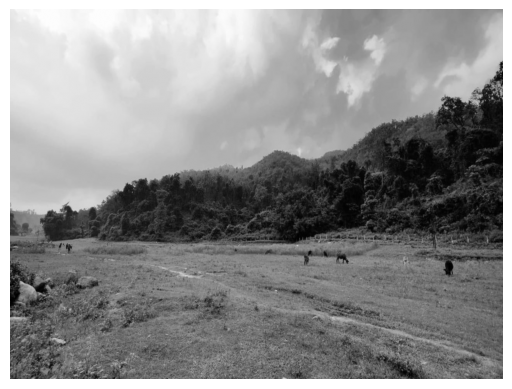

In [96]:
gray_img_cv2 = cv2.cvtColor(img_np2, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_img_cv2, cmap='gray')  #dispaly the image
plt.axis("off")
plt.show()

Image 1 shape: (960, 1280)
Image 2 shape: (960, 1280)


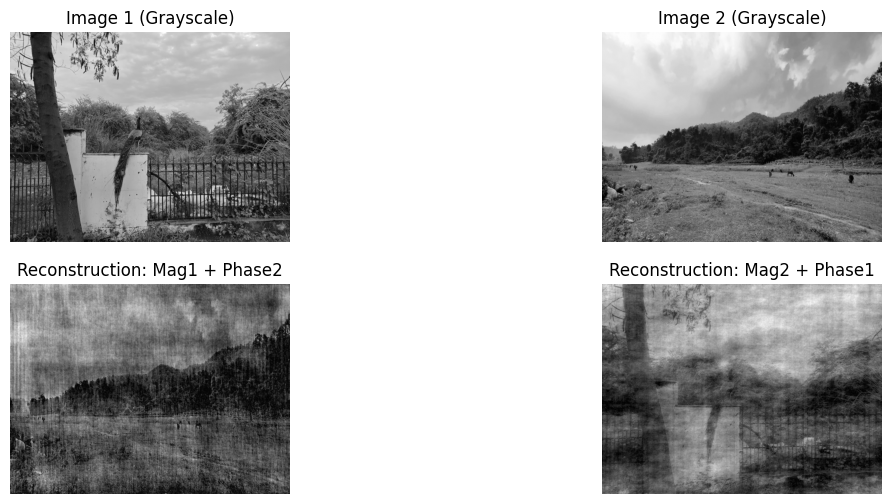

In [98]:
# Both grayscale images must have same shape
print("Image 1 shape:", gray_img_cv.shape)
print("Image 2 shape:", gray_img_cv2.shape)

# FFT of both images
f1 = np.fft.fft2(gray_img_cv)
f2 = np.fft.fft2(gray_img_cv2)

# Shift low-frequencies to center
f1_shift = np.fft.fftshift(f1)
f2_shift = np.fft.fftshift(f2)

# Magnitudes and Phases
mag1 = np.abs(f1_shift)
mag2 = np.abs(f2_shift)

phase1 = np.angle(f1_shift)
phase2 = np.angle(f2_shift)

# Swap magnitude and phase between images
spec_mag1_phase2 = mag1 * np.exp(1j * phase2)  # Magnitude of image1 + Phase of image2
spec_mag2_phase1 = mag2 * np.exp(1j * phase1)  # Magnitude of image2 + Phase of image1

# Reconstruct swapped images
def reconstruct(spec):
    unshifted = np.fft.ifftshift(spec)
    img_back = np.fft.ifft2(unshifted)
    return np.abs(img_back)

recon_1_2 = reconstruct(spec_mag1_phase2)    # mag1 + phase2
recon_2_1 = reconstruct(spec_mag2_phase1)    # mag2 + phase1

# Display the results
plt.figure(figsize=(14,6))

plt.subplot(2,2,1)
plt.imshow(gray_img_cv, cmap='gray')
plt.title("Image 1 (Grayscale)")
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(gray_img_cv2, cmap='gray')
plt.title("Image 2 (Grayscale)")
plt.axis("off")

plt.subplot(2,2,3)
plt.imshow(recon_1_2, cmap='gray')
plt.title("Reconstruction: Mag1 + Phase2")
plt.axis("off")

plt.subplot(2,2,4)
plt.imshow(recon_2_1, cmap='gray')
plt.title("Reconstruction: Mag2 + Phase1")
plt.axis("off")

plt.show()

# Observation
# The image created using Mag1 + Phase2 looks structurally like Image 2
# because PHASE controls structure, edges, shapes, and object positions.
# and vice versa for Mag2 + Phase1 looking structurally like Image 1

# Conclusion:
# PHASE describes the structure (shapes, layout, edges).
# MAGNITUDE describes the texture and contrast (energy distribution).
# This is why swapping phase drastically changes the recognizable content,
# while swapping magnitude only changes intensity/texture.
